![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Satellite Sea Surface Temperature Consistency in Resolving Oceanic Features

Production date: 22-07-2025

Produced by: CNR-ISMAR

## 🌍 Use case: Using Sea Surface Temperature to characterise oceanic features in key areas

## ❓ Quality assessment question
* **How well do ESA CCI L4 v2.1 and GHRSST Multi-Product Ensemble (GMPE) SSTs resolve ocean features?**

Satellite L4 Sea Surface Temperature (SST) products are known to capture oceanographic meso- to sub-mesoscale features. Many studies (e.g., [[1]](https://doi.org/10.1175/1520-0426%282002%29019%3C1665:EMSCFS%3E2.0.CO;2), [[2]](https://doi.org/10.1016/j.rse.2018.06.003), [[3]](https://doi.org/10.1016/j.rse.2012.10.012), [[4]](https://doi.org/10.1029/2023MS004047), [[5]](https://doi.org/10.1029/2024GL110059), [[6]](https://doi.org/10.5194/os-21-199-2025)) have leveraged L4 SST imagery to analyse ocean dynamics at regional and global scales, largely due to the gap-free nature of these datasets. However, L4 SSTs are generated through a range of methods — such as optimal interpolation, deep learning (e.g., [[7]](https://doi.org/10.5194/gmd-13-1609-2020), [[8]](https://doi.org/10.5194/os-20-1035-2024), [[9]](https://doi.org/10.3390/rs16101745)), and multiscale wavelet analysis — which often introduce smoothing effects, leading to differences in the effective resolution of ocean features despite the identical nominal resolution. This can lead to inconsistent results when studying mesoscale features ([[10]](https://doi.org/10.3390/rs12101601), [[11]](https://doi.org/10.1029/2023EA003088)). 

To address this, feature resolution is here assessed using Fast Fourier Transform (FFT) analysis of the SST Climate Data Records (CDRs) available in the Climate Data Store (CDS).

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
*  Both ESA CCI v2.1 and GMPE SST datasets capture mesoscale ocean features, but ESA CCI v2.1 consistently provides sharper frontal structures and higher spatial variance across multiple regions, particularly at scales between $\sim 800$ and $40 \, km$.


* Power Spectral Density (PSD) analysis reveals that GMPE SSTs closely follow the expected $k^{-11/3}$ spectral slope of geostrophic turbulence across the 0.3–2 $deg^{-1}$ wavenumber range, while ESA CCI SSTs match this slope at larger scales but diverge at finer scales (above 2 $deg^{-1}$), indicating limitations in capturing small mesoscale dynamics.

* At wavenumbers larger than 2 $deg^{-1}$ (scales <40 $km$), ESA CCI SST exhibits a loss of spectral fidelity, with PSDs flattening and showing oscillatory behaviour - implying that feature resolution is compromised and signal may be dominated by noise.
```

```{figure} bedaf55f-49b5-4be3-a684-096b8a8df109.png
---
---
*Snapshot of the Gulf Stream region on July 9th, 1992 showing SSTs from ESA CCI (top left) and GMPE (bottom left), alongside a graphical illustration of the area (right).*
```

## 📋 Methodology
 
We evaluate here the consistency among SST CDRs available in the CDS in representing oceanic mesoscale features. To this end, two different SST CDRs have been intercompared over a common period (1982-2016). 
Respectively, they are:

- Sea surface temperature daily gridded data from 1981 to 2016 derived from a multi-product satellite-based ensemble – from the Group for High Resolution Sea Surface Temperature (GHRSST) multi-product ensemble (GMPE) produced by the European Space Agency Climate Change Initiative Sea Surface Temperature (ESA CCI SST) ([[12]](https://doi.org/10.1016/j.rse.2018.12.015) GMPE SST in the following). The GMPE SST is obtained as the ensemble median of 16 global contributing Level-4 (L4) analyses (including the ESA CCI v2.0 and v1.1). This dataset is provided on a daily basis and on a regular 0.25° latitude-longitude grid;

- Sea Surface Temperature (SST) daily data from 1981 to present derived from satellite observations, ESA CCI SST L4 dataset v2.1 ([[13]](https://doi.org/10.1038/s41597-019-0236-x) ESA CCI SST in the following). This L4 dataset provides daily global SST fields from the merging of space-borne Infrared SSTs through a variational assimilation algorithm. This dataset is provided on a daily basis and on a regular 0.05° latitude-longitude grid.

We specifically looked into Power Spectral Density (PSD), which is computed using the `scipy.signal` package [[14]](https://barnes.atmos.colostate.edu/COURSES/AT655_S15/references/Welch_1967_IEETransAudioElect.pdf) for the above-mentioned CDRs, over the following Areas of Interest (AOIs), relevant for dynamical processes (e.g., air-sea interactions, vertical mixing, eddy shedding, turbulence, etc.): Gulf Stream, Kuroshio, Agulhas, Brazilian–Malvinas and Tropical–Pacific. For each AOI, PSDs are estimated longitudinally at each latitude, then averaged to obtain daily PSDs across the common coverage period. These daily spectra are further averaged to produce a mean PSD per AOI, which is then compared to the theoretical $k^{-11/3}$ slope predicted by 2D quasi-geostrophic turbulence ([[15]](https://doi.org/10.1002/qj.3644)), where $k$ is the wavenumber.

The analysis and results are organised in the following steps, which are detailed in the sections below: 

**[](satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-1)**

**[](satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-2)**

**[](satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-3)**

**[](satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-4)**

## 📈 Analysis and results
(satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-1)=
### 1. Import packages and define parameters for the requests to the CDS
In the following cell the necessary packages are imported, defining into python dictionaries the AOIs and the CDS request. AOIs are then displayed on a mute map.

In [1]:
import collections

import matplotlib.pyplot as plt
import scipy.signal
import xarray as xr
from c3s_eqc_automatic_quality_control import download, utils, plot
import numpy as np

import cacholote # Delete me before adapting to the new template
cacholote.config.set(create_engine_kwargs=dict(connect_args={"timeout": 30})) # Same as above

import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/detoma_vincenzo/.cdsapirc")

plt.style.use("seaborn-v0_8-notebook")

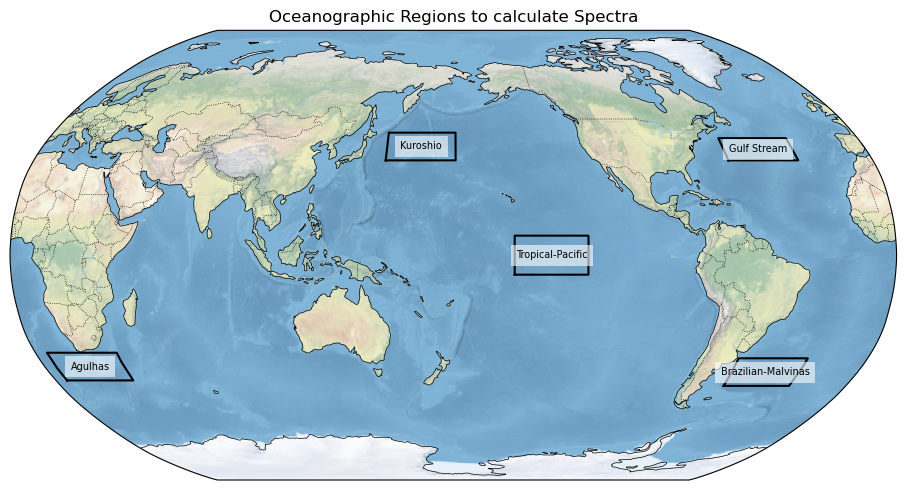

In [2]:
# Time
year_start = 1982
year_stop = 2016

# Space
regions = {
    "Gulf Stream": {"lon_slice": slice(-62, -32), "lat_slice": slice(34, 42)},
    "Kuroshio": {"lon_slice": slice(151, 181), "lat_slice": slice(34, 44)},
    "Agulhas": {"lon_slice": slice(5, 35), "lat_slice": slice(-45, -35)},
    "Brazilian-Malvinas": {"lon_slice": slice(-56, -26), "lat_slice": slice(-47, -37)},
    "Tropical-Pacific": {"lon_slice": slice(-155,-125), "lat_slice": slice(-7, 7)},
}
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen

# Set up map with Robinson projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.stock_img()
# Add land, ocean and topographic background (Natural Earth)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', alpha=0.5)
ax.add_feature(cfeature.RIVERS, linewidth=0.5, alpha=0.5)

# Plot regions as black rectangles
for name, coords in regions.items():
    lon0, lon1 = coords["lon_slice"].start, coords["lon_slice"].stop
    lat0, lat1 = coords["lat_slice"].start, coords["lat_slice"].stop
    rect_lon = [lon0, lon1, lon1, lon0, lon0]
    rect_lat = [lat0, lat0, lat1, lat1, lat0]
    ax.plot(rect_lon, rect_lat, transform=ccrs.PlateCarree(),
            color='black', linewidth=1.5)
    # Optional: label
    ax.text((lon0 + lon1) / 2, (lat0 + lat1) / 2, name,
            transform=ccrs.PlateCarree(), fontsize=7, ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

plt.title("Oceanographic Regions to calculate Spectra", fontsize=12)
plt.tight_layout()
plt.show()

In [3]:
request_dicts = {
    "ESACCI": {
        "collection_id": "satellite-sea-surface-temperature",
        "request": {
            "processinglevel": "level_4",
            "format": "zip",
            "variable": "all",
            "sensor_on_satellite": "combined_product",
            "version": "2_1",
        },
        "chunks": {"year": 1, "month": 1, "day": 7},
    },
    "GMPE": {
        "collection_id": "satellite-sea-surface-temperature-ensemble-product",
        "request": {
            "format": "zip",
            "variable": "all",
        },
        "chunks": {"year": 1, "month": 1, "day": 12},
    },
}

(satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-2)=
### 2. Define functions to cache
Functions for rechunking to optimise caching of intermediate results, get nan values on land, convert to degree Celsius in the ocean and calculate the trend are defined below.

In [4]:
def _welch(x, **kwargs):
    freqs, psd = scipy.signal.welch(x, **kwargs)
    return xr.DataArray(psd, coords={"wavenumber": freqs}, dims=["wavenumber"])


def welch(da, dim, **kwargs):
    return xr.apply_ufunc(
        _welch,
        da.compute(),
        input_core_dims=[[dim]],
        output_core_dims=[["wavenumber"]],
        vectorize=True,
        kwargs=kwargs,
        keep_attrs=True
    )


def compute_spectrum(ds, lon_slice, lat_slice, scaling):
    dim = "longitude"
    da = utils.regionalise(ds["analysed_sst"], lon_slice, lat_slice)
    nperseg = 1 << (da.sizes[dim].bit_length() - 1)  # lower power of 2
    da = welch(
        da,
        dim,
        window="blackmanharris",
        detrend="linear",
        fs=1. / da[dim].diff(dim).mean().item(),
        nperseg=nperseg,
        nfft=2 * nperseg,
        scaling=scaling,
    )
    return da.to_dataset(name="spectrum")

(satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-3)=
### 3. Download and transform
In this step the data are requested, retrieved and processed in one step.

In [5]:
time_means = collections.defaultdict(dict)
lat_means = collections.defaultdict(dict)
for product, request_kwargs in request_dicts.items():
    requests = []
    for year in range(year_start, year_stop + 1):
        requests.extend(
            download.update_request_date(
                request_kwargs["request"],
                start=f"{year - 1}-12",
                stop=f"{year}-11",
                stringify_dates=True,
            )
        )
    for region, region_kwargs in regions.items():
        ds = download.download_and_transform(
            request_kwargs["collection_id"],
            requests,
            chunks=request_kwargs["chunks"],
            transform_func=compute_spectrum,
            transform_func_kwargs=region_kwargs | {"scaling": "density"},
            quiet=True
        )
        time_means[product][region] = ds.mean("time", keep_attrs=True).compute()
        lat_means[product][region] = ds.mean("latitude", keep_attrs=True).compute()
time_means = dict(time_means)
lat_means = dict(lat_means)

  7%|▋         | 149/2074 [00:15<04:36,  6.96it/s]

  7%|▋         | 151/2074 [00:15<03:47,  8.44it/s]

  7%|▋         | 153/2074 [00:16<03:54,  8.21it/s]

  7%|▋         | 154/2074 [00:16<04:07,  7.75it/s]

  7%|▋         | 155/2074 [00:16<04:28,  7.14it/s]

  8%|▊         | 157/2074 [00:16<04:33,  7.00it/s]

  8%|▊         | 158/2074 [00:16<04:23,  7.26it/s]

  8%|▊         | 159/2074 [00:17<05:13,  6.11it/s]

  8%|▊         | 160/2074 [00:17<04:43,  6.75it/s]

  8%|▊         | 161/2074 [00:17<05:51,  5.45it/s]

  8%|▊         | 162/2074 [00:17<05:58,  5.33it/s]

  8%|▊         | 164/2074 [00:17<04:33,  6.98it/s]

  8%|▊         | 165/2074 [00:18<04:28,  7.10it/s]

  8%|▊         | 166/2074 [00:18<06:34,  4.83it/s]

  8%|▊         | 168/2074 [00:18<04:39,  6.83it/s]

  8%|▊         | 170/2074 [00:18<03:53,  8.14it/s]

  8%|▊         | 171/2074 [00:19<06:17,  5.04it/s]

  8%|▊         | 172/2074 [00:19<05:40,  5.59it/s]

  8%|▊         | 173/2074 [00:19<08:37,  3.67it/s]

  8%|▊         | 174/2074 [00:20<10:08,  3.12it/s]

  8%|▊         | 176/2074 [00:20<07:01,  4.50it/s]

  9%|▊         | 178/2074 [00:20<05:11,  6.08it/s]

  9%|▊         | 179/2074 [00:20<05:57,  5.30it/s]

  9%|▊         | 180/2074 [00:21<08:36,  3.67it/s]

  9%|▉         | 182/2074 [00:21<06:21,  4.96it/s]

  9%|▉         | 183/2074 [00:21<06:49,  4.61it/s]

  9%|▉         | 185/2074 [00:22<06:22,  4.93it/s]

  9%|▉         | 186/2074 [00:22<06:15,  5.03it/s]

  9%|▉         | 187/2074 [00:22<06:42,  4.69it/s]

  9%|▉         | 188/2074 [00:23<07:06,  4.42it/s]

  9%|▉         | 189/2074 [00:23<06:25,  4.89it/s]

  9%|▉         | 190/2074 [00:24<12:04,  2.60it/s]

  9%|▉         | 191/2074 [00:24<10:19,  3.04it/s]

  9%|▉         | 192/2074 [00:24<10:10,  3.08it/s]

  9%|▉         | 193/2074 [00:24<10:22,  3.02it/s]

  9%|▉         | 194/2074 [00:25<09:07,  3.43it/s]

  9%|▉         | 195/2074 [00:25<08:32,  3.67it/s]

  9%|▉         | 196/2074 [00:25<07:34,  4.13it/s]

  9%|▉         | 197/2074 [00:25<07:26,  4.21it/s]

 10%|▉         | 198/2074 [00:26<08:12,  3.81it/s]

 10%|▉         | 200/2074 [00:26<05:48,  5.38it/s]

 10%|▉         | 201/2074 [00:26<05:41,  5.48it/s]

 10%|▉         | 202/2074 [00:26<05:17,  5.90it/s]

 10%|▉         | 203/2074 [00:26<06:38,  4.70it/s]

 10%|▉         | 205/2074 [00:27<05:51,  5.31it/s]

 10%|▉         | 206/2074 [00:27<07:07,  4.37it/s]

 10%|▉         | 207/2074 [00:28<11:33,  2.69it/s]

 10%|█         | 208/2074 [00:28<09:40,  3.21it/s]

 10%|█         | 209/2074 [00:28<08:44,  3.56it/s]

 10%|█         | 210/2074 [00:29<12:54,  2.41it/s]

 10%|█         | 211/2074 [00:30<18:00,  1.72it/s]

 10%|█         | 212/2074 [00:30<14:18,  2.17it/s]

 10%|█         | 213/2074 [00:30<11:59,  2.59it/s]

 10%|█         | 214/2074 [00:31<12:39,  2.45it/s]

 10%|█         | 215/2074 [00:31<10:40,  2.90it/s]

 10%|█         | 216/2074 [00:31<09:46,  3.17it/s]

 11%|█         | 218/2074 [00:31<06:59,  4.42it/s]

 11%|█         | 219/2074 [00:32<07:21,  4.20it/s]

 11%|█         | 221/2074 [00:32<05:54,  5.22it/s]

 11%|█         | 222/2074 [00:32<07:14,  4.26it/s]

 11%|█         | 223/2074 [00:33<07:35,  4.06it/s]

 11%|█         | 224/2074 [00:33<09:34,  3.22it/s]

 11%|█         | 225/2074 [00:34<10:49,  2.85it/s]

 11%|█         | 226/2074 [00:34<12:33,  2.45it/s]

 11%|█         | 227/2074 [00:34<11:10,  2.75it/s]

 11%|█         | 228/2074 [00:35<10:02,  3.06it/s]

 11%|█         | 229/2074 [00:35<10:01,  3.07it/s]

 11%|█         | 230/2074 [00:35<09:24,  3.27it/s]

 11%|█         | 231/2074 [00:35<08:48,  3.49it/s]

 11%|█         | 232/2074 [00:36<07:35,  4.04it/s]

 11%|█         | 233/2074 [00:36<09:54,  3.10it/s]

 11%|█▏        | 234/2074 [00:36<07:55,  3.87it/s]

 11%|█▏        | 235/2074 [00:36<07:49,  3.92it/s]

 11%|█▏        | 236/2074 [00:37<07:09,  4.28it/s]

 11%|█▏        | 237/2074 [00:37<06:25,  4.76it/s]

 11%|█▏        | 238/2074 [00:37<05:33,  5.51it/s]

 12%|█▏        | 239/2074 [00:37<04:53,  6.26it/s]

 12%|█▏        | 240/2074 [00:37<04:38,  6.58it/s]

 12%|█▏        | 242/2074 [00:37<03:58,  7.67it/s]

 12%|█▏        | 244/2074 [00:38<03:16,  9.31it/s]

 12%|█▏        | 245/2074 [00:38<04:21,  6.99it/s]

 12%|█▏        | 246/2074 [00:38<04:18,  7.06it/s]

 12%|█▏        | 248/2074 [00:38<03:29,  8.73it/s]

 12%|█▏        | 250/2074 [00:38<02:55, 10.42it/s]

 12%|█▏        | 252/2074 [00:38<03:21,  9.05it/s]

 12%|█▏        | 254/2074 [00:39<04:18,  7.05it/s]

 12%|█▏        | 255/2074 [00:39<04:17,  7.07it/s]

 12%|█▏        | 256/2074 [00:39<04:03,  7.48it/s]

 12%|█▏        | 258/2074 [00:39<03:27,  8.73it/s]

 13%|█▎        | 260/2074 [00:40<03:46,  8.02it/s]

 13%|█▎        | 261/2074 [00:40<04:04,  7.41it/s]

 13%|█▎        | 262/2074 [00:40<04:45,  6.36it/s]

 13%|█▎        | 263/2074 [00:40<05:44,  5.26it/s]

 13%|█▎        | 264/2074 [00:40<05:07,  5.88it/s]

 13%|█▎        | 266/2074 [00:41<04:17,  7.02it/s]

 13%|█▎        | 267/2074 [00:41<04:58,  6.05it/s]

 13%|█▎        | 268/2074 [00:41<04:49,  6.24it/s]

 13%|█▎        | 270/2074 [00:41<04:53,  6.14it/s]

 13%|█▎        | 272/2074 [00:42<04:33,  6.59it/s]

 13%|█▎        | 274/2074 [00:42<03:42,  8.07it/s]

 13%|█▎        | 276/2074 [00:42<03:11,  9.40it/s]

 13%|█▎        | 278/2074 [00:42<03:51,  7.74it/s]

 13%|█▎        | 279/2074 [00:43<04:54,  6.09it/s]

 14%|█▎        | 280/2074 [00:43<05:41,  5.26it/s]

 14%|█▎        | 281/2074 [00:43<06:02,  4.94it/s]

 14%|█▎        | 282/2074 [00:43<06:32,  4.57it/s]

 14%|█▎        | 283/2074 [00:44<06:47,  4.39it/s]

 14%|█▎        | 284/2074 [00:44<05:51,  5.09it/s]

 14%|█▎        | 285/2074 [00:44<06:24,  4.66it/s]

 14%|█▍        | 286/2074 [00:44<06:22,  4.67it/s]

 14%|█▍        | 287/2074 [00:44<05:34,  5.34it/s]

 14%|█▍        | 288/2074 [00:44<05:08,  5.80it/s]

 14%|█▍        | 289/2074 [00:45<05:34,  5.33it/s]

 14%|█▍        | 290/2074 [00:45<06:43,  4.43it/s]

 14%|█▍        | 291/2074 [00:45<05:39,  5.25it/s]

 14%|█▍        | 292/2074 [00:45<05:19,  5.57it/s]

 14%|█▍        | 294/2074 [00:45<04:13,  7.01it/s]

 14%|█▍        | 295/2074 [00:46<04:16,  6.94it/s]

 14%|█▍        | 296/2074 [00:46<04:20,  6.83it/s]

 14%|█▍        | 298/2074 [00:46<03:28,  8.53it/s]

 14%|█▍        | 300/2074 [00:46<03:16,  9.01it/s]

 15%|█▍        | 302/2074 [00:46<03:04,  9.58it/s]

 15%|█▍        | 303/2074 [00:46<03:31,  8.38it/s]

 15%|█▍        | 305/2074 [00:47<04:20,  6.80it/s]

 15%|█▍        | 306/2074 [00:47<04:05,  7.19it/s]

 15%|█▍        | 307/2074 [00:47<04:13,  6.98it/s]

 15%|█▍        | 308/2074 [00:47<04:12,  6.99it/s]

 15%|█▍        | 309/2074 [00:47<04:25,  6.65it/s]

 15%|█▍        | 310/2074 [00:48<06:28,  4.54it/s]

 15%|█▍        | 311/2074 [00:48<05:31,  5.32it/s]

 15%|█▌        | 312/2074 [00:48<05:15,  5.58it/s]

 15%|█▌        | 314/2074 [00:48<04:00,  7.33it/s]

 15%|█▌        | 316/2074 [00:48<03:15,  8.97it/s]

 15%|█▌        | 318/2074 [00:49<03:07,  9.39it/s]

 15%|█▌        | 319/2074 [00:49<03:41,  7.93it/s]

 15%|█▌        | 320/2074 [00:49<04:06,  7.10it/s]

 15%|█▌        | 321/2074 [00:49<05:01,  5.81it/s]

 16%|█▌        | 322/2074 [00:50<05:34,  5.23it/s]

 16%|█▌        | 323/2074 [00:50<05:59,  4.87it/s]

 16%|█▌        | 324/2074 [00:50<05:47,  5.03it/s]

 16%|█▌        | 325/2074 [00:50<05:35,  5.21it/s]

 16%|█▌        | 326/2074 [00:50<06:06,  4.77it/s]

 16%|█▌        | 327/2074 [00:50<05:10,  5.62it/s]

 16%|█▌        | 329/2074 [00:51<03:53,  7.47it/s]

 16%|█▌        | 331/2074 [00:51<03:48,  7.63it/s]

 16%|█▌        | 332/2074 [00:51<05:30,  5.26it/s]

 16%|█▌        | 333/2074 [00:51<05:12,  5.57it/s]

 16%|█▌        | 334/2074 [00:52<04:52,  5.96it/s]

 16%|█▌        | 336/2074 [00:52<05:00,  5.79it/s]

 16%|█▋        | 338/2074 [00:52<03:45,  7.71it/s]

 16%|█▋        | 339/2074 [00:52<04:59,  5.79it/s]

 16%|█▋        | 340/2074 [00:52<04:34,  6.32it/s]

 16%|█▋        | 341/2074 [00:53<09:20,  3.09it/s]

 16%|█▋        | 342/2074 [00:54<09:07,  3.16it/s]

 17%|█▋        | 343/2074 [00:54<07:53,  3.65it/s]

 17%|█▋        | 344/2074 [00:54<07:03,  4.08it/s]

 17%|█▋        | 345/2074 [00:54<06:14,  4.62it/s]

 17%|█▋        | 346/2074 [00:54<06:02,  4.76it/s]

 17%|█▋        | 348/2074 [00:55<04:47,  6.00it/s]

 17%|█▋        | 350/2074 [00:55<03:58,  7.24it/s]

 17%|█▋        | 351/2074 [00:55<04:02,  7.11it/s]

 17%|█▋        | 352/2074 [00:55<04:19,  6.64it/s]

 17%|█▋        | 353/2074 [00:55<04:00,  7.17it/s]

 17%|█▋        | 354/2074 [00:55<05:35,  5.13it/s]

 17%|█▋        | 355/2074 [00:56<08:34,  3.34it/s]

 17%|█▋        | 356/2074 [00:56<07:16,  3.93it/s]

 17%|█▋        | 357/2074 [00:56<06:41,  4.28it/s]

 17%|█▋        | 358/2074 [00:56<05:34,  5.13it/s]

 17%|█▋        | 359/2074 [00:57<07:44,  3.69it/s]

 17%|█▋        | 360/2074 [00:57<07:03,  4.04it/s]

 17%|█▋        | 361/2074 [00:57<06:22,  4.48it/s]

 17%|█▋        | 362/2074 [00:57<05:27,  5.23it/s]

 18%|█▊        | 364/2074 [00:58<03:52,  7.34it/s]

 18%|█▊        | 366/2074 [00:58<03:03,  9.32it/s]

 18%|█▊        | 368/2074 [00:58<03:03,  9.31it/s]

 18%|█▊        | 370/2074 [00:58<03:25,  8.28it/s]

 18%|█▊        | 371/2074 [00:58<03:39,  7.77it/s]

 18%|█▊        | 372/2074 [00:59<04:13,  6.71it/s]

 18%|█▊        | 373/2074 [00:59<04:25,  6.41it/s]

 18%|█▊        | 374/2074 [00:59<04:07,  6.87it/s]

 18%|█▊        | 375/2074 [01:01<19:39,  1.44it/s]

 18%|█▊        | 377/2074 [01:01<11:58,  2.36it/s]

 18%|█▊        | 378/2074 [01:01<10:18,  2.74it/s]

 18%|█▊        | 379/2074 [01:02<08:48,  3.21it/s]

 18%|█▊        | 380/2074 [01:02<07:42,  3.66it/s]

 18%|█▊        | 381/2074 [01:02<06:56,  4.07it/s]

 18%|█▊        | 382/2074 [01:02<06:17,  4.48it/s]

 18%|█▊        | 383/2074 [01:02<05:26,  5.17it/s]

 19%|█▊        | 385/2074 [01:02<04:01,  6.99it/s]

 19%|█▊        | 386/2074 [01:02<04:12,  6.69it/s]

 19%|█▊        | 387/2074 [01:03<04:35,  6.12it/s]

 19%|█▊        | 388/2074 [01:03<04:07,  6.81it/s]

 19%|█▉        | 390/2074 [01:03<03:30,  7.99it/s]

 19%|█▉        | 391/2074 [01:03<03:25,  8.17it/s]

 19%|█▉        | 392/2074 [01:03<03:39,  7.67it/s]

 19%|█▉        | 394/2074 [01:03<03:04,  9.13it/s]

 19%|█▉        | 395/2074 [01:04<03:21,  8.32it/s]

 19%|█▉        | 396/2074 [01:04<04:11,  6.67it/s]

 19%|█▉        | 397/2074 [01:04<03:54,  7.17it/s]

 19%|█▉        | 398/2074 [01:04<03:51,  7.25it/s]

 19%|█▉        | 399/2074 [01:04<03:54,  7.13it/s]

 19%|█▉        | 401/2074 [01:04<03:52,  7.19it/s]

 19%|█▉        | 403/2074 [01:05<03:11,  8.73it/s]

 20%|█▉        | 405/2074 [01:05<03:12,  8.68it/s]

 20%|█▉        | 406/2074 [01:05<03:12,  8.67it/s]

 20%|█▉        | 407/2074 [01:05<03:19,  8.34it/s]

 20%|█▉        | 408/2074 [01:05<03:39,  7.60it/s]

 20%|█▉        | 409/2074 [01:06<04:36,  6.02it/s]

 20%|█▉        | 410/2074 [01:06<04:26,  6.25it/s]

 20%|█▉        | 411/2074 [01:06<05:17,  5.24it/s]

 20%|█▉        | 412/2074 [01:06<04:38,  5.98it/s]

 20%|█▉        | 413/2074 [01:06<06:30,  4.26it/s]

 20%|█▉        | 414/2074 [01:07<06:55,  3.99it/s]

 20%|██        | 415/2074 [01:07<05:42,  4.84it/s]

 20%|██        | 417/2074 [01:07<04:03,  6.79it/s]

 20%|██        | 418/2074 [01:07<03:51,  7.16it/s]

 20%|██        | 419/2074 [01:07<03:45,  7.35it/s]

 20%|██        | 420/2074 [01:08<05:25,  5.08it/s]

 20%|██        | 421/2074 [01:08<05:13,  5.27it/s]

 20%|██        | 423/2074 [01:08<04:10,  6.59it/s]

 20%|██        | 425/2074 [01:08<04:36,  5.96it/s]

 21%|██        | 426/2074 [01:09<05:00,  5.48it/s]

 21%|██        | 427/2074 [01:09<05:00,  5.48it/s]

 21%|██        | 428/2074 [01:09<05:24,  5.07it/s]

 21%|██        | 429/2074 [01:09<05:05,  5.38it/s]

 21%|██        | 431/2074 [01:10<05:05,  5.38it/s]

 21%|██        | 433/2074 [01:10<04:33,  6.01it/s]

 21%|██        | 434/2074 [01:10<04:18,  6.35it/s]

 21%|██        | 435/2074 [01:10<04:22,  6.25it/s]

 21%|██        | 436/2074 [01:10<04:35,  5.95it/s]

 21%|██        | 437/2074 [01:10<04:09,  6.56it/s]

 21%|██        | 438/2074 [01:11<04:14,  6.42it/s]

 21%|██        | 439/2074 [01:11<04:46,  5.70it/s]

 21%|██        | 440/2074 [01:11<04:34,  5.95it/s]

 21%|██▏       | 442/2074 [01:11<03:13,  8.43it/s]

 21%|██▏       | 444/2074 [01:11<03:08,  8.67it/s]

 21%|██▏       | 445/2074 [01:12<04:00,  6.76it/s]

 22%|██▏       | 447/2074 [01:12<03:23,  7.99it/s]

 22%|██▏       | 449/2074 [01:12<03:05,  8.78it/s]

 22%|██▏       | 450/2074 [01:12<03:11,  8.47it/s]

 22%|██▏       | 451/2074 [01:12<04:19,  6.24it/s]

 22%|██▏       | 453/2074 [01:13<03:27,  7.82it/s]

 22%|██▏       | 454/2074 [01:13<03:18,  8.16it/s]

 22%|██▏       | 455/2074 [01:13<03:45,  7.19it/s]

 22%|██▏       | 456/2074 [01:13<03:45,  7.16it/s]

 22%|██▏       | 458/2074 [01:13<03:44,  7.19it/s]

 22%|██▏       | 460/2074 [01:13<03:06,  8.65it/s]

 22%|██▏       | 461/2074 [01:14<03:12,  8.37it/s]

 22%|██▏       | 462/2074 [01:14<03:32,  7.60it/s]

 22%|██▏       | 464/2074 [01:14<03:15,  8.25it/s]

 22%|██▏       | 465/2074 [01:14<03:09,  8.48it/s]

 23%|██▎       | 467/2074 [01:14<02:51,  9.38it/s]

 23%|██▎       | 469/2074 [01:14<02:28, 10.79it/s]

 23%|██▎       | 471/2074 [01:15<02:26, 10.96it/s]

 23%|██▎       | 473/2074 [01:15<03:56,  6.77it/s]

 23%|██▎       | 475/2074 [01:15<03:16,  8.15it/s]

 23%|██▎       | 477/2074 [01:15<03:12,  8.28it/s]

 23%|██▎       | 479/2074 [01:16<03:09,  8.40it/s]

 23%|██▎       | 481/2074 [01:16<02:53,  9.17it/s]

 23%|██▎       | 483/2074 [01:16<04:10,  6.34it/s]

 23%|██▎       | 485/2074 [01:17<03:37,  7.31it/s]

 23%|██▎       | 486/2074 [01:17<03:38,  7.28it/s]

 23%|██▎       | 487/2074 [01:17<03:29,  7.58it/s]

 24%|██▎       | 488/2074 [01:17<03:44,  7.05it/s]

 24%|██▎       | 489/2074 [01:17<03:47,  6.95it/s]

 24%|██▎       | 490/2074 [01:17<04:14,  6.22it/s]

 24%|██▎       | 491/2074 [01:18<04:31,  5.83it/s]

 24%|██▎       | 492/2074 [01:18<04:11,  6.29it/s]

 24%|██▍       | 493/2074 [01:18<03:53,  6.77it/s]

 24%|██▍       | 494/2074 [01:18<03:59,  6.61it/s]

 24%|██▍       | 495/2074 [01:18<06:17,  4.18it/s]

 24%|██▍       | 497/2074 [01:19<04:55,  5.34it/s]

 24%|██▍       | 499/2074 [01:19<05:22,  4.88it/s]

 24%|██▍       | 500/2074 [01:19<05:38,  4.65it/s]

 24%|██▍       | 502/2074 [01:19<04:08,  6.33it/s]

 24%|██▍       | 503/2074 [01:20<04:53,  5.35it/s]

 24%|██▍       | 505/2074 [01:20<03:42,  7.07it/s]

 24%|██▍       | 507/2074 [01:20<02:53,  9.05it/s]

 25%|██▍       | 509/2074 [01:20<03:09,  8.28it/s]

 25%|██▍       | 511/2074 [01:21<03:07,  8.32it/s]

 25%|██▍       | 512/2074 [01:21<03:11,  8.16it/s]

 25%|██▍       | 514/2074 [01:21<03:15,  8.00it/s]

 25%|██▍       | 515/2074 [01:21<03:11,  8.13it/s]

 25%|██▍       | 516/2074 [01:21<03:16,  7.93it/s]

 25%|██▍       | 517/2074 [01:21<03:47,  6.86it/s]

 25%|██▍       | 518/2074 [01:22<03:56,  6.58it/s]

 25%|██▌       | 519/2074 [01:22<03:51,  6.72it/s]

 25%|██▌       | 521/2074 [01:22<03:23,  7.64it/s]

 25%|██▌       | 522/2074 [01:22<03:48,  6.80it/s]

 25%|██▌       | 523/2074 [01:22<03:41,  7.02it/s]

 25%|██▌       | 524/2074 [01:22<03:28,  7.43it/s]

 25%|██▌       | 525/2074 [01:23<04:09,  6.20it/s]

 25%|██▌       | 526/2074 [01:23<03:48,  6.78it/s]

 25%|██▌       | 528/2074 [01:23<03:01,  8.52it/s]

 26%|██▌       | 529/2074 [01:23<04:56,  5.21it/s]

 26%|██▌       | 530/2074 [01:24<05:10,  4.98it/s]

 26%|██▌       | 531/2074 [01:24<05:06,  5.03it/s]

 26%|██▌       | 532/2074 [01:24<04:32,  5.66it/s]

 26%|██▌       | 533/2074 [01:24<04:57,  5.17it/s]

 26%|██▌       | 534/2074 [01:25<06:56,  3.70it/s]

 26%|██▌       | 535/2074 [01:25<06:06,  4.20it/s]

 26%|██▌       | 536/2074 [01:25<10:10,  2.52it/s]

 26%|██▌       | 538/2074 [01:26<06:31,  3.93it/s]

 26%|██▌       | 539/2074 [01:26<05:53,  4.34it/s]

 26%|██▌       | 540/2074 [01:26<05:06,  5.01it/s]

 26%|██▌       | 541/2074 [01:26<05:01,  5.08it/s]

 26%|██▌       | 542/2074 [01:26<04:55,  5.18it/s]

 26%|██▌       | 544/2074 [01:27<04:09,  6.14it/s]

 26%|██▋       | 545/2074 [01:27<03:48,  6.69it/s]

 26%|██▋       | 546/2074 [01:27<05:05,  5.01it/s]

 26%|██▋       | 548/2074 [01:27<05:07,  4.97it/s]

 26%|██▋       | 549/2074 [01:28<04:45,  5.35it/s]

 27%|██▋       | 551/2074 [01:28<04:24,  5.76it/s]

 27%|██▋       | 552/2074 [01:28<04:34,  5.54it/s]

 27%|██▋       | 554/2074 [01:28<04:03,  6.24it/s]

 27%|██▋       | 555/2074 [01:29<04:22,  5.78it/s]

 27%|██▋       | 556/2074 [01:29<04:26,  5.69it/s]

 27%|██▋       | 557/2074 [01:29<04:28,  5.65it/s]

 27%|██▋       | 558/2074 [01:29<04:57,  5.10it/s]

 27%|██▋       | 559/2074 [01:29<04:25,  5.70it/s]

 27%|██▋       | 560/2074 [01:29<04:01,  6.27it/s]

 27%|██▋       | 561/2074 [01:29<03:37,  6.96it/s]

 27%|██▋       | 563/2074 [01:30<03:31,  7.13it/s]

 27%|██▋       | 565/2074 [01:30<03:09,  7.95it/s]

 27%|██▋       | 567/2074 [01:30<03:45,  6.69it/s]

 27%|██▋       | 568/2074 [01:31<03:57,  6.33it/s]

 27%|██▋       | 570/2074 [01:31<03:21,  7.46it/s]

 28%|██▊       | 571/2074 [01:31<05:23,  4.64it/s]

 28%|██▊       | 572/2074 [01:32<07:27,  3.35it/s]

 28%|██▊       | 573/2074 [01:32<07:29,  3.34it/s]

 28%|██▊       | 574/2074 [01:32<06:49,  3.66it/s]

 28%|██▊       | 575/2074 [01:32<05:54,  4.23it/s]

 28%|██▊       | 576/2074 [01:33<06:46,  3.68it/s]

 28%|██▊       | 577/2074 [01:33<06:56,  3.59it/s]

 28%|██▊       | 578/2074 [01:33<05:55,  4.20it/s]

 28%|██▊       | 579/2074 [01:34<06:57,  3.58it/s]

 28%|██▊       | 580/2074 [01:34<06:34,  3.79it/s]

 28%|██▊       | 581/2074 [01:34<07:58,  3.12it/s]

 28%|██▊       | 582/2074 [01:35<07:37,  3.26it/s]

 28%|██▊       | 583/2074 [01:35<07:12,  3.45it/s]

 28%|██▊       | 584/2074 [01:35<09:10,  2.71it/s]

 28%|██▊       | 585/2074 [01:35<07:10,  3.46it/s]

 28%|██▊       | 586/2074 [01:36<06:52,  3.61it/s]

 28%|██▊       | 587/2074 [01:36<06:19,  3.92it/s]

 28%|██▊       | 588/2074 [01:36<05:18,  4.66it/s]

 28%|██▊       | 589/2074 [01:36<05:15,  4.71it/s]

 28%|██▊       | 590/2074 [01:36<04:39,  5.32it/s]

 28%|██▊       | 591/2074 [01:37<05:04,  4.87it/s]

 29%|██▊       | 592/2074 [01:37<07:44,  3.19it/s]

 29%|██▊       | 593/2074 [01:37<06:43,  3.67it/s]

 29%|██▊       | 594/2074 [01:38<12:27,  1.98it/s]

 29%|██▊       | 595/2074 [01:39<11:25,  2.16it/s]

 29%|██▉       | 597/2074 [01:39<07:13,  3.41it/s]

 29%|██▉       | 598/2074 [01:39<06:07,  4.01it/s]

 29%|██▉       | 599/2074 [01:39<05:38,  4.36it/s]

 29%|██▉       | 601/2074 [01:40<04:24,  5.57it/s]

 29%|██▉       | 603/2074 [01:40<03:19,  7.37it/s]

 29%|██▉       | 604/2074 [01:40<03:25,  7.16it/s]

 29%|██▉       | 605/2074 [01:40<03:46,  6.47it/s]

 29%|██▉       | 606/2074 [01:40<05:53,  4.16it/s]

 29%|██▉       | 607/2074 [01:41<07:35,  3.22it/s]

 29%|██▉       | 608/2074 [01:41<07:49,  3.12it/s]

 29%|██▉       | 609/2074 [01:42<07:27,  3.28it/s]

 29%|██▉       | 610/2074 [01:42<06:05,  4.00it/s]

 30%|██▉       | 612/2074 [01:42<04:07,  5.90it/s]

 30%|██▉       | 613/2074 [01:42<03:54,  6.23it/s]

 30%|██▉       | 614/2074 [01:42<03:38,  6.67it/s]

 30%|██▉       | 615/2074 [01:42<03:32,  6.85it/s]

 30%|██▉       | 616/2074 [01:42<03:23,  7.18it/s]

 30%|██▉       | 617/2074 [01:43<03:24,  7.11it/s]

 30%|██▉       | 618/2074 [01:43<04:37,  5.25it/s]

 30%|██▉       | 620/2074 [01:43<05:42,  4.24it/s]

 30%|██▉       | 621/2074 [01:44<08:09,  2.97it/s]

 30%|██▉       | 622/2074 [01:44<07:47,  3.11it/s]

 30%|███       | 624/2074 [01:45<05:20,  4.53it/s]

 30%|███       | 625/2074 [01:45<04:44,  5.09it/s]

 30%|███       | 627/2074 [01:45<03:35,  6.72it/s]

 30%|███       | 628/2074 [01:45<03:38,  6.62it/s]

 30%|███       | 629/2074 [01:45<04:13,  5.69it/s]

 30%|███       | 630/2074 [01:45<03:47,  6.35it/s]

 30%|███       | 631/2074 [01:46<04:34,  5.25it/s]

 30%|███       | 632/2074 [01:46<04:40,  5.15it/s]

 31%|███       | 633/2074 [01:46<08:05,  2.97it/s]

 31%|███       | 634/2074 [01:47<08:12,  2.92it/s]

 31%|███       | 635/2074 [01:47<06:57,  3.44it/s]

 31%|███       | 636/2074 [01:47<06:22,  3.76it/s]

 31%|███       | 637/2074 [01:47<05:21,  4.47it/s]

 31%|███       | 639/2074 [01:48<04:04,  5.86it/s]

 31%|███       | 641/2074 [01:48<05:24,  4.42it/s]

 31%|███       | 642/2074 [01:48<05:55,  4.03it/s]

 31%|███       | 643/2074 [01:49<05:35,  4.26it/s]

 31%|███       | 644/2074 [01:49<05:30,  4.32it/s]

 31%|███       | 645/2074 [01:50<07:57,  2.99it/s]

 31%|███       | 646/2074 [01:50<06:48,  3.50it/s]

 31%|███       | 647/2074 [01:50<05:36,  4.24it/s]

 31%|███       | 648/2074 [01:50<06:07,  3.88it/s]

 31%|███▏      | 649/2074 [01:51<07:43,  3.08it/s]

 31%|███▏      | 650/2074 [01:51<09:52,  2.40it/s]

 31%|███▏      | 651/2074 [01:51<08:32,  2.78it/s]

 31%|███▏      | 653/2074 [01:52<06:10,  3.84it/s]

 32%|███▏      | 654/2074 [01:52<06:10,  3.83it/s]

 32%|███▏      | 655/2074 [01:52<05:19,  4.44it/s]

 32%|███▏      | 656/2074 [01:52<05:17,  4.46it/s]

 32%|███▏      | 657/2074 [01:52<04:37,  5.11it/s]

 32%|███▏      | 658/2074 [01:53<04:14,  5.55it/s]

 32%|███▏      | 660/2074 [01:53<03:11,  7.38it/s]

 32%|███▏      | 661/2074 [01:53<03:33,  6.61it/s]

 32%|███▏      | 662/2074 [01:53<04:21,  5.40it/s]

 32%|███▏      | 663/2074 [01:53<03:54,  6.01it/s]

 32%|███▏      | 664/2074 [01:54<04:10,  5.63it/s]

 32%|███▏      | 665/2074 [01:54<07:07,  3.30it/s]

 32%|███▏      | 666/2074 [01:55<08:46,  2.67it/s]

 32%|███▏      | 667/2074 [01:55<07:00,  3.34it/s]

 32%|███▏      | 668/2074 [01:55<07:34,  3.10it/s]

 32%|███▏      | 669/2074 [01:56<08:05,  2.89it/s]

 32%|███▏      | 670/2074 [01:56<07:30,  3.12it/s]

 32%|███▏      | 672/2074 [01:56<04:49,  4.84it/s]

 32%|███▏      | 673/2074 [01:56<05:36,  4.17it/s]

 32%|███▏      | 674/2074 [01:57<04:54,  4.75it/s]

 33%|███▎      | 675/2074 [01:57<06:00,  3.88it/s]

 33%|███▎      | 676/2074 [01:57<06:59,  3.33it/s]

 33%|███▎      | 677/2074 [01:58<06:19,  3.68it/s]

 33%|███▎      | 679/2074 [01:58<04:18,  5.39it/s]

 33%|███▎      | 680/2074 [01:58<04:32,  5.12it/s]

 33%|███▎      | 681/2074 [01:58<03:58,  5.85it/s]

 33%|███▎      | 683/2074 [01:58<03:18,  7.01it/s]

 33%|███▎      | 684/2074 [01:59<04:35,  5.05it/s]

 33%|███▎      | 685/2074 [01:59<05:42,  4.05it/s]

 33%|███▎      | 686/2074 [01:59<04:49,  4.79it/s]

 33%|███▎      | 688/2074 [01:59<04:49,  4.79it/s]

 33%|███▎      | 689/2074 [02:00<04:35,  5.03it/s]

 33%|███▎      | 691/2074 [02:00<03:55,  5.87it/s]

 33%|███▎      | 692/2074 [02:00<05:38,  4.08it/s]

 33%|███▎      | 693/2074 [02:01<05:07,  4.49it/s]

 34%|███▎      | 695/2074 [02:01<03:56,  5.82it/s]

 34%|███▎      | 697/2074 [02:01<03:45,  6.10it/s]

 34%|███▎      | 699/2074 [02:01<03:54,  5.88it/s]

 34%|███▍      | 700/2074 [02:02<05:01,  4.56it/s]

 34%|███▍      | 701/2074 [02:02<04:52,  4.70it/s]

 34%|███▍      | 702/2074 [02:02<04:40,  4.90it/s]

 34%|███▍      | 703/2074 [02:02<04:22,  5.23it/s]

 34%|███▍      | 704/2074 [02:03<03:59,  5.72it/s]

 34%|███▍      | 705/2074 [02:03<03:42,  6.14it/s]

 34%|███▍      | 706/2074 [02:03<03:58,  5.74it/s]

 34%|███▍      | 707/2074 [02:03<03:34,  6.38it/s]

 34%|███▍      | 708/2074 [02:03<03:27,  6.58it/s]

 34%|███▍      | 709/2074 [02:03<03:28,  6.55it/s]

 34%|███▍      | 710/2074 [02:03<03:30,  6.48it/s]

 34%|███▍      | 711/2074 [02:04<03:42,  6.13it/s]

 34%|███▍      | 712/2074 [02:04<04:12,  5.39it/s]

 34%|███▍      | 713/2074 [02:04<03:48,  5.95it/s]

 34%|███▍      | 714/2074 [02:04<04:20,  5.21it/s]

 35%|███▍      | 716/2074 [02:04<03:22,  6.70it/s]

 35%|███▍      | 718/2074 [02:05<02:48,  8.06it/s]

 35%|███▍      | 719/2074 [02:05<02:44,  8.22it/s]

 35%|███▍      | 720/2074 [02:05<03:46,  5.97it/s]

 35%|███▍      | 722/2074 [02:05<03:20,  6.75it/s]

 35%|███▍      | 724/2074 [02:06<03:15,  6.89it/s]

 35%|███▌      | 726/2074 [02:06<03:00,  7.47it/s]

 35%|███▌      | 727/2074 [02:06<02:54,  7.71it/s]

 35%|███▌      | 728/2074 [02:06<03:22,  6.64it/s]

 35%|███▌      | 729/2074 [02:06<03:41,  6.06it/s]

 35%|███▌      | 730/2074 [02:06<03:31,  6.35it/s]

 35%|███▌      | 731/2074 [02:07<03:49,  5.84it/s]

 35%|███▌      | 732/2074 [02:07<04:08,  5.40it/s]

 35%|███▌      | 733/2074 [02:07<04:54,  4.56it/s]

 35%|███▌      | 734/2074 [02:08<05:42,  3.91it/s]

 35%|███▌      | 735/2074 [02:08<04:46,  4.67it/s]

 35%|███▌      | 736/2074 [02:08<05:28,  4.07it/s]

 36%|███▌      | 737/2074 [02:08<05:13,  4.27it/s]

 36%|███▌      | 738/2074 [02:08<04:20,  5.12it/s]

 36%|███▌      | 739/2074 [02:08<04:14,  5.25it/s]

 36%|███▌      | 740/2074 [02:09<04:10,  5.32it/s]

 36%|███▌      | 741/2074 [02:09<04:16,  5.20it/s]

 36%|███▌      | 743/2074 [02:09<03:53,  5.70it/s]

 36%|███▌      | 744/2074 [02:09<04:01,  5.51it/s]

 36%|███▌      | 745/2074 [02:09<03:43,  5.95it/s]

 36%|███▌      | 746/2074 [02:10<03:37,  6.12it/s]

 36%|███▌      | 747/2074 [02:10<03:48,  5.81it/s]

 36%|███▌      | 749/2074 [02:10<03:35,  6.16it/s]

 36%|███▌      | 750/2074 [02:11<05:11,  4.25it/s]

 36%|███▋      | 752/2074 [02:11<03:52,  5.68it/s]

 36%|███▋      | 754/2074 [02:11<03:09,  6.95it/s]

 36%|███▋      | 756/2074 [02:11<02:46,  7.90it/s]

 37%|███▋      | 758/2074 [02:11<02:46,  7.92it/s]

 37%|███▋      | 759/2074 [02:12<02:48,  7.80it/s]

 37%|███▋      | 760/2074 [02:12<03:37,  6.05it/s]

 37%|███▋      | 762/2074 [02:12<03:33,  6.15it/s]

 37%|███▋      | 763/2074 [02:12<03:33,  6.14it/s]

 37%|███▋      | 764/2074 [02:13<04:10,  5.22it/s]

 37%|███▋      | 766/2074 [02:13<03:12,  6.78it/s]

 37%|███▋      | 768/2074 [02:13<02:30,  8.70it/s]

 37%|███▋      | 770/2074 [02:13<03:02,  7.14it/s]

 37%|███▋      | 772/2074 [02:14<03:18,  6.55it/s]

 37%|███▋      | 773/2074 [02:14<03:08,  6.90it/s]

 37%|███▋      | 774/2074 [02:14<03:52,  5.60it/s]

 37%|███▋      | 775/2074 [02:14<04:57,  4.37it/s]

 37%|███▋      | 776/2074 [02:15<04:22,  4.95it/s]

 38%|███▊      | 778/2074 [02:15<03:37,  5.96it/s]

 38%|███▊      | 780/2074 [02:16<05:20,  4.04it/s]

 38%|███▊      | 781/2074 [02:16<04:40,  4.60it/s]

 38%|███▊      | 783/2074 [02:16<03:25,  6.27it/s]

 38%|███▊      | 784/2074 [02:16<03:48,  5.66it/s]

 38%|███▊      | 786/2074 [02:16<02:56,  7.29it/s]

 38%|███▊      | 787/2074 [02:16<03:21,  6.38it/s]

 38%|███▊      | 788/2074 [02:17<03:38,  5.90it/s]

 38%|███▊      | 790/2074 [02:17<03:22,  6.36it/s]

 38%|███▊      | 792/2074 [02:17<03:03,  7.00it/s]

 38%|███▊      | 793/2074 [02:17<03:16,  6.52it/s]

 38%|███▊      | 795/2074 [02:18<02:56,  7.26it/s]

 38%|███▊      | 796/2074 [02:18<03:02,  7.02it/s]

 38%|███▊      | 797/2074 [02:18<03:18,  6.42it/s]

 38%|███▊      | 798/2074 [02:18<04:22,  4.86it/s]

 39%|███▊      | 800/2074 [02:18<03:32,  6.01it/s]

 39%|███▊      | 802/2074 [02:19<02:48,  7.57it/s]

 39%|███▊      | 803/2074 [02:19<02:45,  7.70it/s]

 39%|███▉      | 804/2074 [02:19<02:52,  7.36it/s]

 39%|███▉      | 805/2074 [02:19<02:43,  7.75it/s]

 39%|███▉      | 806/2074 [02:19<02:49,  7.50it/s]

 39%|███▉      | 808/2074 [02:19<02:25,  8.69it/s]

 39%|███▉      | 809/2074 [02:19<02:31,  8.34it/s]

 39%|███▉      | 811/2074 [02:20<02:18,  9.12it/s]

 39%|███▉      | 812/2074 [02:20<03:18,  6.36it/s]

 39%|███▉      | 813/2074 [02:20<03:26,  6.12it/s]

 39%|███▉      | 814/2074 [02:20<03:19,  6.31it/s]

 39%|███▉      | 816/2074 [02:20<02:26,  8.61it/s]

 39%|███▉      | 817/2074 [02:21<02:33,  8.20it/s]

 39%|███▉      | 818/2074 [02:21<02:30,  8.33it/s]

 40%|███▉      | 820/2074 [02:21<02:55,  7.14it/s]

 40%|███▉      | 821/2074 [02:21<02:58,  7.04it/s]

 40%|███▉      | 823/2074 [02:22<06:24,  3.26it/s]

 40%|███▉      | 824/2074 [02:22<05:41,  3.66it/s]

 40%|███▉      | 825/2074 [02:23<04:53,  4.25it/s]

 40%|███▉      | 827/2074 [02:23<04:00,  5.19it/s]

 40%|███▉      | 828/2074 [02:23<04:12,  4.93it/s]

 40%|████      | 830/2074 [02:23<04:13,  4.92it/s]

 40%|████      | 831/2074 [02:24<04:04,  5.09it/s]

 40%|████      | 833/2074 [02:24<03:16,  6.33it/s]

 40%|████      | 834/2074 [02:24<03:34,  5.77it/s]

 40%|████      | 835/2074 [02:24<03:26,  6.00it/s]

 40%|████      | 836/2074 [02:24<03:14,  6.36it/s]

 40%|████      | 838/2074 [02:24<02:42,  7.61it/s]

 40%|████      | 839/2074 [02:25<02:37,  7.83it/s]

 41%|████      | 840/2074 [02:25<02:48,  7.34it/s]

 41%|████      | 842/2074 [02:25<02:11,  9.38it/s]

 41%|████      | 843/2074 [02:25<02:50,  7.22it/s]

 41%|████      | 844/2074 [02:25<03:07,  6.55it/s]

 41%|████      | 845/2074 [02:26<03:26,  5.94it/s]

 41%|████      | 846/2074 [02:26<03:54,  5.25it/s]

 41%|████      | 848/2074 [02:26<03:28,  5.87it/s]

 41%|████      | 850/2074 [02:27<04:16,  4.77it/s]

 41%|████      | 852/2074 [02:27<03:16,  6.23it/s]

 41%|████      | 853/2074 [02:27<03:05,  6.58it/s]

 41%|████      | 855/2074 [02:27<02:30,  8.08it/s]

 41%|████▏     | 856/2074 [02:27<03:09,  6.43it/s]

 41%|████▏     | 857/2074 [02:27<03:07,  6.49it/s]

 41%|████▏     | 858/2074 [02:28<03:00,  6.72it/s]

 41%|████▏     | 859/2074 [02:28<03:22,  6.01it/s]

 42%|████▏     | 861/2074 [02:28<02:57,  6.82it/s]

 42%|████▏     | 862/2074 [02:28<03:19,  6.08it/s]

 42%|████▏     | 863/2074 [02:28<03:32,  5.70it/s]

 42%|████▏     | 864/2074 [02:29<03:09,  6.40it/s]

 42%|████▏     | 865/2074 [02:29<03:00,  6.68it/s]

 42%|████▏     | 866/2074 [02:29<04:02,  4.99it/s]

 42%|████▏     | 868/2074 [02:29<03:04,  6.54it/s]

 42%|████▏     | 869/2074 [02:29<03:11,  6.28it/s]

 42%|████▏     | 870/2074 [02:30<02:55,  6.88it/s]

 42%|████▏     | 871/2074 [02:30<02:48,  7.13it/s]

 42%|████▏     | 872/2074 [02:30<03:39,  5.48it/s]

 42%|████▏     | 873/2074 [02:30<03:41,  5.42it/s]

 42%|████▏     | 874/2074 [02:30<03:30,  5.71it/s]

 42%|████▏     | 875/2074 [02:30<03:31,  5.68it/s]

 42%|████▏     | 876/2074 [02:31<03:42,  5.39it/s]

 42%|████▏     | 877/2074 [02:31<03:31,  5.65it/s]

 42%|████▏     | 878/2074 [02:31<03:14,  6.15it/s]

 42%|████▏     | 879/2074 [02:31<02:53,  6.88it/s]

 42%|████▏     | 880/2074 [02:31<03:06,  6.40it/s]

 42%|████▏     | 881/2074 [02:31<02:46,  7.15it/s]

 43%|████▎     | 882/2074 [02:32<03:06,  6.38it/s]

 43%|████▎     | 883/2074 [02:32<04:03,  4.89it/s]

 43%|████▎     | 884/2074 [02:32<03:27,  5.74it/s]

 43%|████▎     | 885/2074 [02:32<03:40,  5.38it/s]

 43%|████▎     | 887/2074 [02:32<03:07,  6.33it/s]

 43%|████▎     | 888/2074 [02:33<03:31,  5.60it/s]

 43%|████▎     | 890/2074 [02:33<02:49,  7.01it/s]

 43%|████▎     | 891/2074 [02:33<02:49,  6.97it/s]

 43%|████▎     | 892/2074 [02:33<02:53,  6.81it/s]

 43%|████▎     | 893/2074 [02:33<03:31,  5.59it/s]

 43%|████▎     | 894/2074 [02:34<03:59,  4.94it/s]

 43%|████▎     | 895/2074 [02:34<04:10,  4.71it/s]

 43%|████▎     | 897/2074 [02:34<03:11,  6.16it/s]

 43%|████▎     | 899/2074 [02:34<03:00,  6.52it/s]

 43%|████▎     | 900/2074 [02:35<03:08,  6.24it/s]

 43%|████▎     | 901/2074 [02:35<03:05,  6.32it/s]

 43%|████▎     | 902/2074 [02:35<02:48,  6.95it/s]

 44%|████▎     | 904/2074 [02:35<02:33,  7.60it/s]

 44%|████▎     | 906/2074 [02:35<02:34,  7.55it/s]

 44%|████▎     | 907/2074 [02:35<02:29,  7.81it/s]

 44%|████▍     | 909/2074 [02:36<02:19,  8.37it/s]

 44%|████▍     | 911/2074 [02:36<02:01,  9.56it/s]

 44%|████▍     | 912/2074 [02:36<03:21,  5.77it/s]

 44%|████▍     | 913/2074 [02:36<03:04,  6.29it/s]

 44%|████▍     | 914/2074 [02:37<02:58,  6.50it/s]

 44%|████▍     | 915/2074 [02:37<03:02,  6.36it/s]

 44%|████▍     | 916/2074 [02:37<04:08,  4.66it/s]

 44%|████▍     | 917/2074 [02:37<04:06,  4.69it/s]

 44%|████▍     | 919/2074 [02:38<03:22,  5.70it/s]

 44%|████▍     | 920/2074 [02:38<03:05,  6.21it/s]

 44%|████▍     | 922/2074 [02:38<02:37,  7.32it/s]

 45%|████▍     | 923/2074 [02:38<02:29,  7.68it/s]

 45%|████▍     | 925/2074 [02:38<02:13,  8.59it/s]

 45%|████▍     | 926/2074 [02:38<03:03,  6.26it/s]

 45%|████▍     | 928/2074 [02:39<02:28,  7.74it/s]

 45%|████▍     | 929/2074 [02:39<02:39,  7.16it/s]

 45%|████▍     | 931/2074 [02:39<02:52,  6.63it/s]

 45%|████▍     | 932/2074 [02:39<02:42,  7.01it/s]

 45%|████▍     | 933/2074 [02:39<02:57,  6.42it/s]

 45%|████▌     | 935/2074 [02:40<02:25,  7.80it/s]

 45%|████▌     | 937/2074 [02:40<02:38,  7.18it/s]

 45%|████▌     | 938/2074 [02:40<03:00,  6.29it/s]

 45%|████▌     | 939/2074 [02:40<03:10,  5.94it/s]

 45%|████▌     | 941/2074 [02:41<02:34,  7.32it/s]

 45%|████▌     | 942/2074 [02:41<02:33,  7.39it/s]

 46%|████▌     | 944/2074 [02:41<02:18,  8.17it/s]

 46%|████▌     | 946/2074 [02:41<01:57,  9.62it/s]

 46%|████▌     | 948/2074 [02:41<02:03,  9.15it/s]

 46%|████▌     | 949/2074 [02:41<02:01,  9.28it/s]

 46%|████▌     | 950/2074 [02:41<02:08,  8.77it/s]

 46%|████▌     | 951/2074 [02:42<02:09,  8.70it/s]

 46%|████▌     | 952/2074 [02:42<02:59,  6.23it/s]

 46%|████▌     | 954/2074 [02:42<02:59,  6.25it/s]

 46%|████▌     | 955/2074 [02:43<03:53,  4.78it/s]

 46%|████▌     | 956/2074 [02:43<03:30,  5.32it/s]

 46%|████▌     | 957/2074 [02:43<03:28,  5.36it/s]

 46%|████▌     | 959/2074 [02:43<02:36,  7.10it/s]

 46%|████▋     | 960/2074 [02:43<02:31,  7.36it/s]

 46%|████▋     | 961/2074 [02:43<03:02,  6.10it/s]

 46%|████▋     | 962/2074 [02:44<02:45,  6.73it/s]

 46%|████▋     | 963/2074 [02:44<02:30,  7.36it/s]

 47%|████▋     | 965/2074 [02:44<02:18,  8.00it/s]

 47%|████▋     | 966/2074 [02:44<02:49,  6.56it/s]

 47%|████▋     | 968/2074 [02:44<02:31,  7.29it/s]

 47%|████▋     | 970/2074 [02:44<02:08,  8.58it/s]

 47%|████▋     | 972/2074 [02:45<01:48, 10.18it/s]

 47%|████▋     | 974/2074 [02:46<06:09,  2.98it/s]

 47%|████▋     | 975/2074 [02:46<05:42,  3.21it/s]

 47%|████▋     | 977/2074 [02:47<05:12,  3.51it/s]

 47%|████▋     | 978/2074 [02:47<05:07,  3.56it/s]

 47%|████▋     | 980/2074 [02:47<04:09,  4.39it/s]

 47%|████▋     | 981/2074 [02:48<03:53,  4.69it/s]

 47%|████▋     | 982/2074 [02:48<05:41,  3.20it/s]

 47%|████▋     | 983/2074 [02:48<05:02,  3.60it/s]

 47%|████▋     | 984/2074 [02:49<04:16,  4.26it/s]

 47%|████▋     | 985/2074 [02:49<03:48,  4.76it/s]

 48%|████▊     | 986/2074 [02:49<04:24,  4.11it/s]

 48%|████▊     | 987/2074 [02:49<04:25,  4.09it/s]

 48%|████▊     | 989/2074 [02:50<03:55,  4.60it/s]

 48%|████▊     | 990/2074 [02:50<03:49,  4.73it/s]

 48%|████▊     | 991/2074 [02:50<03:57,  4.57it/s]

 48%|████▊     | 993/2074 [02:50<03:49,  4.72it/s]

 48%|████▊     | 995/2074 [02:51<03:12,  5.62it/s]

 48%|████▊     | 996/2074 [02:51<02:54,  6.16it/s]

 48%|████▊     | 998/2074 [02:51<02:28,  7.27it/s]

 48%|████▊     | 1000/2074 [02:51<02:16,  7.85it/s]

 48%|████▊     | 1001/2074 [02:51<02:13,  8.03it/s]

 48%|████▊     | 1002/2074 [02:51<02:11,  8.13it/s]

 48%|████▊     | 1003/2074 [02:52<02:19,  7.69it/s]

 48%|████▊     | 1005/2074 [02:52<03:53,  4.57it/s]

 49%|████▊     | 1006/2074 [02:53<05:10,  3.44it/s]

 49%|████▊     | 1007/2074 [02:53<04:25,  4.02it/s]

 49%|████▊     | 1008/2074 [02:53<03:48,  4.66it/s]

 49%|████▊     | 1009/2074 [02:53<03:27,  5.14it/s]

 49%|████▊     | 1010/2074 [02:53<03:14,  5.48it/s]

 49%|████▊     | 1011/2074 [02:54<03:15,  5.44it/s]

 49%|████▉     | 1012/2074 [02:54<03:00,  5.88it/s]

 49%|████▉     | 1014/2074 [02:54<02:21,  7.51it/s]

 49%|████▉     | 1016/2074 [02:54<02:11,  8.06it/s]

 49%|████▉     | 1017/2074 [02:54<02:18,  7.63it/s]

 49%|████▉     | 1018/2074 [02:55<03:02,  5.79it/s]

 49%|████▉     | 1019/2074 [02:55<02:44,  6.41it/s]

 49%|████▉     | 1020/2074 [02:55<02:32,  6.90it/s]

 49%|████▉     | 1021/2074 [02:55<02:41,  6.54it/s]

 49%|████▉     | 1022/2074 [02:55<02:51,  6.12it/s]

 49%|████▉     | 1023/2074 [02:55<02:39,  6.57it/s]

 49%|████▉     | 1024/2074 [02:55<02:42,  6.48it/s]

 49%|████▉     | 1025/2074 [02:56<02:33,  6.83it/s]

 49%|████▉     | 1026/2074 [02:56<02:58,  5.87it/s]

 50%|████▉     | 1028/2074 [02:56<02:27,  7.10it/s]

 50%|████▉     | 1030/2074 [02:56<01:58,  8.83it/s]

 50%|████▉     | 1032/2074 [02:56<02:04,  8.34it/s]

 50%|████▉     | 1033/2074 [02:57<02:23,  7.27it/s]

 50%|████▉     | 1034/2074 [02:57<02:53,  6.01it/s]

 50%|████▉     | 1035/2074 [02:57<02:50,  6.10it/s]

 50%|████▉     | 1036/2074 [02:57<02:37,  6.60it/s]

 50%|█████     | 1037/2074 [02:57<02:37,  6.59it/s]

 50%|█████     | 1038/2074 [02:58<03:01,  5.71it/s]

 50%|█████     | 1039/2074 [02:58<03:21,  5.14it/s]

 50%|█████     | 1041/2074 [02:58<03:13,  5.34it/s]

 50%|█████     | 1042/2074 [02:58<02:59,  5.75it/s]

 50%|█████     | 1043/2074 [02:58<03:09,  5.45it/s]

 50%|█████     | 1044/2074 [02:59<02:50,  6.05it/s]

 50%|█████     | 1045/2074 [02:59<02:32,  6.77it/s]

 50%|█████     | 1047/2074 [02:59<02:42,  6.30it/s]

 51%|█████     | 1048/2074 [02:59<02:38,  6.47it/s]

 51%|█████     | 1049/2074 [02:59<02:43,  6.28it/s]

 51%|█████     | 1050/2074 [03:00<03:58,  4.29it/s]

 51%|█████     | 1051/2074 [03:00<04:43,  3.60it/s]

 51%|█████     | 1052/2074 [03:00<03:56,  4.32it/s]

 51%|█████     | 1053/2074 [03:00<03:28,  4.89it/s]

 51%|█████     | 1055/2074 [03:01<02:41,  6.30it/s]

 51%|█████     | 1056/2074 [03:01<03:58,  4.26it/s]

 51%|█████     | 1058/2074 [03:01<02:47,  6.07it/s]

 51%|█████     | 1059/2074 [03:01<02:41,  6.30it/s]

 51%|█████     | 1061/2074 [03:02<02:25,  6.98it/s]

 51%|█████     | 1062/2074 [03:02<02:17,  7.34it/s]

 51%|█████▏    | 1063/2074 [03:02<02:23,  7.07it/s]

 51%|█████▏    | 1065/2074 [03:02<02:26,  6.88it/s]

 51%|█████▏    | 1067/2074 [03:02<02:22,  7.06it/s]

 51%|█████▏    | 1068/2074 [03:03<02:15,  7.45it/s]

 52%|█████▏    | 1069/2074 [03:03<02:45,  6.08it/s]

 52%|█████▏    | 1071/2074 [03:03<02:09,  7.77it/s]

 52%|█████▏    | 1072/2074 [03:03<02:05,  7.96it/s]

 52%|█████▏    | 1073/2074 [03:03<02:14,  7.43it/s]

 52%|█████▏    | 1075/2074 [03:03<01:48,  9.22it/s]

 52%|█████▏    | 1076/2074 [03:04<02:10,  7.64it/s]

 52%|█████▏    | 1077/2074 [03:04<02:06,  7.90it/s]

 52%|█████▏    | 1078/2074 [03:04<02:37,  6.32it/s]

 52%|█████▏    | 1079/2074 [03:04<02:36,  6.37it/s]

 52%|█████▏    | 1081/2074 [03:05<03:47,  4.37it/s]

 52%|█████▏    | 1082/2074 [03:05<03:24,  4.86it/s]

 52%|█████▏    | 1083/2074 [03:05<03:14,  5.10it/s]

 52%|█████▏    | 1085/2074 [03:05<02:27,  6.72it/s]

 52%|█████▏    | 1087/2074 [03:05<02:17,  7.17it/s]

 52%|█████▏    | 1088/2074 [03:06<02:13,  7.36it/s]

 53%|█████▎    | 1090/2074 [03:06<01:51,  8.84it/s]

 53%|█████▎    | 1092/2074 [03:06<01:49,  9.00it/s]

 53%|█████▎    | 1093/2074 [03:06<01:57,  8.35it/s]

 53%|█████▎    | 1094/2074 [03:06<02:17,  7.11it/s]

 53%|█████▎    | 1095/2074 [03:06<02:08,  7.59it/s]

 53%|█████▎    | 1096/2074 [03:07<02:14,  7.25it/s]

 53%|█████▎    | 1098/2074 [03:07<01:43,  9.39it/s]

 53%|█████▎    | 1100/2074 [03:07<01:33, 10.42it/s]

 53%|█████▎    | 1102/2074 [03:08<04:16,  3.80it/s]

 53%|█████▎    | 1103/2074 [03:08<03:58,  4.08it/s]

 53%|█████▎    | 1104/2074 [03:08<03:33,  4.54it/s]

 53%|█████▎    | 1105/2074 [03:09<03:35,  4.50it/s]

 53%|█████▎    | 1107/2074 [03:09<02:44,  5.86it/s]

 53%|█████▎    | 1108/2074 [03:09<03:54,  4.12it/s]

 53%|█████▎    | 1109/2074 [03:09<03:30,  4.58it/s]

 54%|█████▎    | 1111/2074 [03:10<02:42,  5.91it/s]

 54%|█████▎    | 1113/2074 [03:10<02:12,  7.25it/s]

 54%|█████▎    | 1114/2074 [03:10<02:47,  5.73it/s]

 54%|█████▍    | 1116/2074 [03:10<02:10,  7.33it/s]

 54%|█████▍    | 1118/2074 [03:10<01:47,  8.93it/s]

 54%|█████▍    | 1120/2074 [03:10<01:33, 10.18it/s]

 54%|█████▍    | 1122/2074 [03:11<01:26, 11.04it/s]

 54%|█████▍    | 1124/2074 [03:11<01:29, 10.66it/s]

 54%|█████▍    | 1126/2074 [03:11<01:35,  9.90it/s]

 54%|█████▍    | 1128/2074 [03:11<01:49,  8.62it/s]

 54%|█████▍    | 1130/2074 [03:12<02:00,  7.82it/s]

 55%|█████▍    | 1132/2074 [03:12<01:46,  8.81it/s]

 55%|█████▍    | 1133/2074 [03:12<01:51,  8.40it/s]

 55%|█████▍    | 1134/2074 [03:12<02:29,  6.31it/s]

 55%|█████▍    | 1135/2074 [03:12<02:29,  6.30it/s]

 55%|█████▍    | 1136/2074 [03:13<02:23,  6.55it/s]

 55%|█████▍    | 1137/2074 [03:13<02:27,  6.37it/s]

 55%|█████▍    | 1139/2074 [03:13<02:24,  6.48it/s]

 55%|█████▍    | 1140/2074 [03:13<02:29,  6.27it/s]

 55%|█████▌    | 1141/2074 [03:13<02:28,  6.29it/s]

 55%|█████▌    | 1143/2074 [03:14<02:05,  7.45it/s]

 55%|█████▌    | 1144/2074 [03:14<02:05,  7.39it/s]

 55%|█████▌    | 1146/2074 [03:14<02:17,  6.74it/s]

 55%|█████▌    | 1148/2074 [03:14<01:57,  7.87it/s]

 55%|█████▌    | 1149/2074 [03:14<01:55,  8.02it/s]

 55%|█████▌    | 1151/2074 [03:15<01:55,  8.00it/s]

 56%|█████▌    | 1152/2074 [03:15<02:07,  7.22it/s]

 56%|█████▌    | 1153/2074 [03:15<02:24,  6.39it/s]

 56%|█████▌    | 1154/2074 [03:15<02:35,  5.92it/s]

 56%|█████▌    | 1155/2074 [03:15<02:56,  5.21it/s]

 56%|█████▌    | 1157/2074 [03:16<02:25,  6.31it/s]

 56%|█████▌    | 1158/2074 [03:16<02:20,  6.53it/s]

 56%|█████▌    | 1160/2074 [03:16<02:25,  6.29it/s]

 56%|█████▌    | 1162/2074 [03:16<02:03,  7.38it/s]

 56%|█████▌    | 1163/2074 [03:17<02:20,  6.50it/s]

 56%|█████▌    | 1164/2074 [03:17<02:22,  6.40it/s]

 56%|█████▌    | 1165/2074 [03:17<02:09,  7.01it/s]

 56%|█████▌    | 1166/2074 [03:17<02:01,  7.49it/s]

 56%|█████▋    | 1167/2074 [03:17<02:05,  7.23it/s]

 56%|█████▋    | 1168/2074 [03:17<02:58,  5.07it/s]

 56%|█████▋    | 1169/2074 [03:18<02:53,  5.22it/s]

 56%|█████▋    | 1170/2074 [03:18<02:32,  5.94it/s]

 57%|█████▋    | 1172/2074 [03:18<02:17,  6.55it/s]

 57%|█████▋    | 1174/2074 [03:18<01:53,  7.91it/s]

 57%|█████▋    | 1175/2074 [03:18<01:50,  8.17it/s]

 57%|█████▋    | 1177/2074 [03:19<01:43,  8.65it/s]

 57%|█████▋    | 1179/2074 [03:19<01:34,  9.43it/s]

 57%|█████▋    | 1181/2074 [03:19<01:36,  9.22it/s]

 57%|█████▋    | 1183/2074 [03:19<01:37,  9.18it/s]

 57%|█████▋    | 1184/2074 [03:19<01:45,  8.43it/s]

 57%|█████▋    | 1186/2074 [03:20<01:52,  7.88it/s]

 57%|█████▋    | 1188/2074 [03:20<01:55,  7.68it/s]

 57%|█████▋    | 1189/2074 [03:20<01:55,  7.69it/s]

 57%|█████▋    | 1191/2074 [03:20<01:56,  7.57it/s]

 57%|█████▋    | 1192/2074 [03:21<02:25,  6.08it/s]

 58%|█████▊    | 1194/2074 [03:21<02:00,  7.31it/s]

 58%|█████▊    | 1196/2074 [03:21<02:05,  7.02it/s]

 58%|█████▊    | 1197/2074 [03:21<02:04,  7.05it/s]

 58%|█████▊    | 1198/2074 [03:21<02:15,  6.46it/s]

 58%|█████▊    | 1199/2074 [03:21<02:06,  6.94it/s]

 58%|█████▊    | 1201/2074 [03:22<01:45,  8.29it/s]

 58%|█████▊    | 1202/2074 [03:22<02:06,  6.90it/s]

 58%|█████▊    | 1204/2074 [03:22<02:13,  6.53it/s]

 58%|█████▊    | 1205/2074 [03:22<02:29,  5.80it/s]

 58%|█████▊    | 1206/2074 [03:23<02:29,  5.82it/s]

 58%|█████▊    | 1208/2074 [03:23<02:25,  5.97it/s]

 58%|█████▊    | 1209/2074 [03:23<02:31,  5.71it/s]

 58%|█████▊    | 1210/2074 [03:23<02:15,  6.36it/s]

 58%|█████▊    | 1211/2074 [03:23<02:16,  6.31it/s]

 58%|█████▊    | 1213/2074 [03:24<02:20,  6.14it/s]

 59%|█████▊    | 1215/2074 [03:24<01:59,  7.16it/s]

 59%|█████▊    | 1216/2074 [03:24<02:04,  6.88it/s]

 59%|█████▊    | 1218/2074 [03:24<01:44,  8.18it/s]

 59%|█████▉    | 1220/2074 [03:24<01:26,  9.86it/s]

 59%|█████▉    | 1222/2074 [03:25<01:25,  9.97it/s]

 59%|█████▉    | 1224/2074 [03:25<02:13,  6.37it/s]

 59%|█████▉    | 1225/2074 [03:25<02:12,  6.40it/s]

 59%|█████▉    | 1226/2074 [03:26<02:15,  6.26it/s]

 59%|█████▉    | 1228/2074 [03:26<01:50,  7.65it/s]

 59%|█████▉    | 1229/2074 [03:26<01:48,  7.77it/s]

 59%|█████▉    | 1230/2074 [03:26<02:30,  5.62it/s]

 59%|█████▉    | 1231/2074 [03:26<03:04,  4.56it/s]

 59%|█████▉    | 1233/2074 [03:27<02:46,  5.06it/s]

 59%|█████▉    | 1234/2074 [03:27<02:47,  5.00it/s]

 60%|█████▉    | 1236/2074 [03:27<02:25,  5.76it/s]

 60%|█████▉    | 1237/2074 [03:28<03:16,  4.26it/s]

 60%|█████▉    | 1238/2074 [03:28<03:24,  4.08it/s]

 60%|█████▉    | 1239/2074 [03:28<03:01,  4.60it/s]

 60%|█████▉    | 1241/2074 [03:29<02:54,  4.76it/s]

 60%|█████▉    | 1242/2074 [03:29<02:40,  5.18it/s]

 60%|█████▉    | 1244/2074 [03:29<02:07,  6.53it/s]

 60%|██████    | 1245/2074 [03:29<01:58,  7.02it/s]

 60%|██████    | 1246/2074 [03:29<02:02,  6.75it/s]

 60%|██████    | 1248/2074 [03:29<01:36,  8.54it/s]

 60%|██████    | 1249/2074 [03:30<02:10,  6.32it/s]

 60%|██████    | 1250/2074 [03:30<02:07,  6.47it/s]

 60%|██████    | 1251/2074 [03:30<02:22,  5.78it/s]

 60%|██████    | 1252/2074 [03:30<02:50,  4.82it/s]

 60%|██████    | 1254/2074 [03:31<02:39,  5.15it/s]

 61%|██████    | 1256/2074 [03:31<02:10,  6.29it/s]

 61%|██████    | 1257/2074 [03:31<02:25,  5.63it/s]

 61%|██████    | 1258/2074 [03:31<03:07,  4.35it/s]

 61%|██████    | 1259/2074 [03:32<03:06,  4.38it/s]

 61%|██████    | 1260/2074 [03:32<02:48,  4.82it/s]

 61%|██████    | 1261/2074 [03:32<03:08,  4.32it/s]

 61%|██████    | 1263/2074 [03:33<03:22,  4.01it/s]

 61%|██████    | 1265/2074 [03:34<05:16,  2.56it/s]

 61%|██████    | 1266/2074 [03:34<04:51,  2.77it/s]

 61%|██████    | 1267/2074 [03:34<04:20,  3.09it/s]

 61%|██████    | 1269/2074 [03:35<03:00,  4.47it/s]

 61%|██████    | 1270/2074 [03:35<03:22,  3.97it/s]

 61%|██████▏   | 1271/2074 [03:35<03:04,  4.35it/s]

 61%|██████▏   | 1272/2074 [03:36<04:12,  3.17it/s]

 61%|██████▏   | 1274/2074 [03:36<04:26,  3.00it/s]

 61%|██████▏   | 1275/2074 [03:36<03:57,  3.36it/s]

 62%|██████▏   | 1276/2074 [03:37<03:33,  3.73it/s]

 62%|██████▏   | 1277/2074 [03:37<03:19,  4.00it/s]

 62%|██████▏   | 1278/2074 [03:37<03:06,  4.26it/s]

 62%|██████▏   | 1279/2074 [03:37<02:39,  4.97it/s]

 62%|██████▏   | 1280/2074 [03:37<02:27,  5.39it/s]

 62%|██████▏   | 1281/2074 [03:37<02:17,  5.77it/s]

 62%|██████▏   | 1282/2074 [03:38<02:24,  5.47it/s]

 62%|██████▏   | 1283/2074 [03:38<02:42,  4.85it/s]

 62%|██████▏   | 1284/2074 [03:38<02:39,  4.95it/s]

 62%|██████▏   | 1285/2074 [03:38<02:19,  5.65it/s]

 62%|██████▏   | 1286/2074 [03:38<02:05,  6.26it/s]

 62%|██████▏   | 1287/2074 [03:39<02:04,  6.34it/s]

 62%|██████▏   | 1288/2074 [03:39<02:13,  5.87it/s]

 62%|██████▏   | 1289/2074 [03:39<02:09,  6.06it/s]

 62%|██████▏   | 1291/2074 [03:39<01:36,  8.08it/s]

 62%|██████▏   | 1293/2074 [03:39<01:20,  9.75it/s]

 62%|██████▏   | 1295/2074 [03:39<01:15, 10.28it/s]

 63%|██████▎   | 1297/2074 [03:39<01:05, 11.86it/s]

 63%|██████▎   | 1299/2074 [03:40<01:25,  9.11it/s]

 63%|██████▎   | 1301/2074 [03:40<01:28,  8.78it/s]

 63%|██████▎   | 1302/2074 [03:40<01:33,  8.21it/s]

 63%|██████▎   | 1303/2074 [03:40<01:40,  7.67it/s]

 63%|██████▎   | 1304/2074 [03:40<01:38,  7.86it/s]

 63%|██████▎   | 1307/2074 [03:41<01:24,  9.03it/s]

 63%|██████▎   | 1309/2074 [03:41<01:27,  8.70it/s]

 63%|██████▎   | 1311/2074 [03:41<01:24,  9.05it/s]

 63%|██████▎   | 1312/2074 [03:41<01:26,  8.84it/s]

 63%|██████▎   | 1313/2074 [03:41<01:29,  8.52it/s]

 63%|██████▎   | 1314/2074 [03:42<01:56,  6.53it/s]

 63%|██████▎   | 1315/2074 [03:42<02:52,  4.39it/s]

 63%|██████▎   | 1316/2074 [03:43<03:25,  3.68it/s]

 64%|██████▎   | 1317/2074 [03:43<03:35,  3.51it/s]

 64%|██████▎   | 1318/2074 [03:43<03:54,  3.22it/s]

 64%|██████▎   | 1319/2074 [03:43<03:20,  3.76it/s]

 64%|██████▎   | 1320/2074 [03:44<03:51,  3.26it/s]

 64%|██████▎   | 1321/2074 [03:44<03:54,  3.22it/s]

 64%|██████▍   | 1323/2074 [03:44<02:27,  5.10it/s]

 64%|██████▍   | 1324/2074 [03:44<02:25,  5.14it/s]

 64%|██████▍   | 1326/2074 [03:45<01:53,  6.62it/s]

 64%|██████▍   | 1327/2074 [03:45<01:49,  6.83it/s]

 64%|██████▍   | 1328/2074 [03:45<01:46,  7.03it/s]

 64%|██████▍   | 1330/2074 [03:45<01:40,  7.37it/s]

 64%|██████▍   | 1331/2074 [03:45<01:47,  6.90it/s]

 64%|██████▍   | 1333/2074 [03:46<01:33,  7.91it/s]

 64%|██████▍   | 1334/2074 [03:46<01:35,  7.73it/s]

 64%|██████▍   | 1335/2074 [03:46<01:45,  6.99it/s]

 64%|██████▍   | 1336/2074 [03:46<01:52,  6.55it/s]

 64%|██████▍   | 1337/2074 [03:46<01:54,  6.45it/s]

 65%|██████▍   | 1339/2074 [03:46<01:40,  7.32it/s]

 65%|██████▍   | 1340/2074 [03:47<01:39,  7.34it/s]

 65%|██████▍   | 1341/2074 [03:47<01:35,  7.71it/s]

 65%|██████▍   | 1342/2074 [03:47<01:36,  7.60it/s]

 65%|██████▍   | 1343/2074 [03:47<01:36,  7.59it/s]

 65%|██████▍   | 1344/2074 [03:47<01:50,  6.58it/s]

 65%|██████▍   | 1345/2074 [03:47<01:44,  6.94it/s]

 65%|██████▍   | 1346/2074 [03:48<02:19,  5.24it/s]

 65%|██████▍   | 1347/2074 [03:48<02:03,  5.88it/s]

 65%|██████▍   | 1348/2074 [03:48<01:52,  6.43it/s]

 65%|██████▌   | 1349/2074 [03:48<02:10,  5.57it/s]

 65%|██████▌   | 1350/2074 [03:48<02:22,  5.08it/s]

 65%|██████▌   | 1352/2074 [03:48<01:49,  6.56it/s]

 65%|██████▌   | 1353/2074 [03:49<01:45,  6.86it/s]

 65%|██████▌   | 1354/2074 [03:49<01:43,  6.95it/s]

 65%|██████▌   | 1355/2074 [03:49<01:40,  7.18it/s]

 65%|██████▌   | 1357/2074 [03:49<01:20,  8.87it/s]

 66%|██████▌   | 1359/2074 [03:49<01:24,  8.42it/s]

 66%|██████▌   | 1360/2074 [03:49<01:25,  8.35it/s]

 66%|██████▌   | 1361/2074 [03:50<01:25,  8.30it/s]

 66%|██████▌   | 1362/2074 [03:50<01:29,  7.95it/s]

 66%|██████▌   | 1363/2074 [03:50<01:27,  8.09it/s]

 66%|██████▌   | 1364/2074 [03:50<01:23,  8.49it/s]

 66%|██████▌   | 1365/2074 [03:50<01:30,  7.87it/s]

 66%|██████▌   | 1366/2074 [03:50<01:24,  8.36it/s]

 66%|██████▌   | 1367/2074 [03:50<02:14,  5.27it/s]

 66%|██████▌   | 1368/2074 [03:51<02:35,  4.54it/s]

 66%|██████▌   | 1369/2074 [03:51<03:00,  3.90it/s]

 66%|██████▌   | 1370/2074 [03:51<02:41,  4.35it/s]

 66%|██████▌   | 1371/2074 [03:51<02:22,  4.94it/s]

 66%|██████▌   | 1373/2074 [03:52<01:50,  6.34it/s]

 66%|██████▌   | 1374/2074 [03:52<01:45,  6.62it/s]

 66%|██████▋   | 1375/2074 [03:52<01:39,  7.01it/s]

 66%|██████▋   | 1376/2074 [03:52<01:31,  7.61it/s]

 66%|██████▋   | 1378/2074 [03:52<01:33,  7.43it/s]

 66%|██████▋   | 1379/2074 [03:52<01:39,  7.00it/s]

 67%|██████▋   | 1381/2074 [03:53<01:18,  8.86it/s]

 67%|██████▋   | 1382/2074 [03:53<01:21,  8.49it/s]

 67%|██████▋   | 1383/2074 [03:53<01:29,  7.72it/s]

 67%|██████▋   | 1385/2074 [03:53<01:19,  8.70it/s]

 67%|██████▋   | 1386/2074 [03:53<01:19,  8.60it/s]

 67%|██████▋   | 1388/2074 [03:53<01:08,  9.96it/s]

 67%|██████▋   | 1390/2074 [03:53<01:03, 10.85it/s]

 67%|██████▋   | 1392/2074 [03:54<00:55, 12.20it/s]

 67%|██████▋   | 1394/2074 [03:54<01:04, 10.62it/s]

 67%|██████▋   | 1396/2074 [03:54<01:02, 10.80it/s]

 67%|██████▋   | 1398/2074 [03:54<01:08,  9.86it/s]

 68%|██████▊   | 1400/2074 [03:54<01:02, 10.83it/s]

 68%|██████▊   | 1402/2074 [03:55<00:55, 12.19it/s]

 68%|██████▊   | 1404/2074 [03:55<00:57, 11.67it/s]

 68%|██████▊   | 1406/2074 [03:55<01:18,  8.51it/s]

 68%|██████▊   | 1408/2074 [03:56<01:49,  6.07it/s]

 68%|██████▊   | 1409/2074 [03:56<01:43,  6.42it/s]

 68%|██████▊   | 1410/2074 [03:56<01:54,  5.79it/s]

 68%|██████▊   | 1411/2074 [03:56<01:47,  6.16it/s]

 68%|██████▊   | 1412/2074 [03:56<01:41,  6.55it/s]

 68%|██████▊   | 1414/2074 [03:56<01:29,  7.40it/s]

 68%|██████▊   | 1415/2074 [03:57<01:57,  5.62it/s]

 68%|██████▊   | 1417/2074 [03:57<01:30,  7.27it/s]

 68%|██████▊   | 1418/2074 [03:57<01:26,  7.59it/s]

 68%|██████▊   | 1419/2074 [03:57<01:23,  7.87it/s]

 68%|██████▊   | 1420/2074 [03:57<01:23,  7.84it/s]

 69%|██████▊   | 1421/2074 [03:57<01:25,  7.63it/s]

 69%|██████▊   | 1422/2074 [03:58<01:21,  8.00it/s]

 69%|██████▊   | 1423/2074 [03:58<01:17,  8.40it/s]

 69%|██████▊   | 1424/2074 [03:58<01:26,  7.52it/s]

 69%|██████▊   | 1425/2074 [03:58<01:40,  6.48it/s]

 69%|██████▉   | 1427/2074 [03:58<01:11,  9.03it/s]

 69%|██████▉   | 1429/2074 [03:58<01:06,  9.72it/s]

 69%|██████▉   | 1431/2074 [03:58<01:01, 10.54it/s]

 69%|██████▉   | 1433/2074 [03:59<01:05,  9.84it/s]

 69%|██████▉   | 1435/2074 [03:59<01:01, 10.32it/s]

 69%|██████▉   | 1437/2074 [03:59<00:58, 10.83it/s]

 69%|██████▉   | 1439/2074 [03:59<00:57, 10.99it/s]

 69%|██████▉   | 1441/2074 [04:00<01:23,  7.58it/s]

 70%|██████▉   | 1442/2074 [04:00<01:26,  7.30it/s]

 70%|██████▉   | 1443/2074 [04:00<01:30,  6.98it/s]

 70%|██████▉   | 1445/2074 [04:00<01:25,  7.33it/s]

 70%|██████▉   | 1446/2074 [04:00<01:27,  7.17it/s]

 70%|██████▉   | 1448/2074 [04:01<01:15,  8.29it/s]

 70%|██████▉   | 1449/2074 [04:01<01:15,  8.30it/s]

 70%|██████▉   | 1450/2074 [04:01<01:29,  7.01it/s]

 70%|███████   | 1452/2074 [04:01<01:16,  8.17it/s]

 70%|███████   | 1453/2074 [04:01<01:27,  7.12it/s]

 70%|███████   | 1455/2074 [04:01<01:10,  8.75it/s]

 70%|███████   | 1457/2074 [04:02<01:09,  8.94it/s]

 70%|███████   | 1458/2074 [04:02<01:13,  8.35it/s]

 70%|███████   | 1460/2074 [04:02<01:55,  5.30it/s]

 70%|███████   | 1461/2074 [04:03<01:45,  5.81it/s]

 70%|███████   | 1462/2074 [04:03<01:36,  6.35it/s]

 71%|███████   | 1464/2074 [04:03<01:33,  6.54it/s]

 71%|███████   | 1465/2074 [04:03<01:49,  5.57it/s]

 71%|███████   | 1466/2074 [04:03<01:44,  5.81it/s]

 71%|███████   | 1467/2074 [04:04<01:48,  5.59it/s]

 71%|███████   | 1469/2074 [04:04<01:33,  6.47it/s]

 71%|███████   | 1471/2074 [04:04<01:17,  7.79it/s]

 71%|███████   | 1473/2074 [04:04<01:03,  9.52it/s]

 71%|███████   | 1475/2074 [04:04<01:07,  8.81it/s]

 71%|███████   | 1476/2074 [04:05<01:16,  7.87it/s]

 71%|███████▏  | 1478/2074 [04:05<01:02,  9.47it/s]

 71%|███████▏  | 1480/2074 [04:05<01:04,  9.20it/s]

 71%|███████▏  | 1482/2074 [04:05<00:59,  9.87it/s]

 72%|███████▏  | 1484/2074 [04:05<00:55, 10.62it/s]

 72%|███████▏  | 1486/2074 [04:06<01:19,  7.40it/s]

 72%|███████▏  | 1487/2074 [04:06<01:17,  7.60it/s]

 72%|███████▏  | 1488/2074 [04:06<01:14,  7.90it/s]

 72%|███████▏  | 1489/2074 [04:06<01:16,  7.64it/s]

 72%|███████▏  | 1490/2074 [04:06<01:15,  7.76it/s]

 72%|███████▏  | 1491/2074 [04:06<01:16,  7.63it/s]

 72%|███████▏  | 1492/2074 [04:06<01:22,  7.09it/s]

 72%|███████▏  | 1493/2074 [04:07<01:42,  5.67it/s]

 72%|███████▏  | 1495/2074 [04:07<01:17,  7.49it/s]

 72%|███████▏  | 1496/2074 [04:07<01:20,  7.15it/s]

 72%|███████▏  | 1497/2074 [04:07<01:30,  6.39it/s]

 72%|███████▏  | 1498/2074 [04:08<01:44,  5.53it/s]

 72%|███████▏  | 1499/2074 [04:08<01:37,  5.91it/s]

 72%|███████▏  | 1500/2074 [04:08<01:45,  5.43it/s]

 72%|███████▏  | 1501/2074 [04:08<01:54,  4.99it/s]

 72%|███████▏  | 1503/2074 [04:08<01:21,  7.01it/s]

 73%|███████▎  | 1505/2074 [04:09<02:05,  4.55it/s]

 73%|███████▎  | 1507/2074 [04:09<01:31,  6.23it/s]

 73%|███████▎  | 1509/2074 [04:09<01:26,  6.57it/s]

 73%|███████▎  | 1511/2074 [04:10<01:21,  6.94it/s]

 73%|███████▎  | 1512/2074 [04:10<01:35,  5.86it/s]

 73%|███████▎  | 1514/2074 [04:10<01:26,  6.49it/s]

 73%|███████▎  | 1515/2074 [04:10<01:23,  6.71it/s]

 73%|███████▎  | 1516/2074 [04:10<01:19,  7.02it/s]

 73%|███████▎  | 1517/2074 [04:11<01:17,  7.19it/s]

 73%|███████▎  | 1519/2074 [04:11<01:02,  8.94it/s]

 73%|███████▎  | 1521/2074 [04:11<01:00,  9.09it/s]

 73%|███████▎  | 1522/2074 [04:11<01:02,  8.83it/s]

 73%|███████▎  | 1523/2074 [04:11<01:08,  8.05it/s]

 74%|███████▎  | 1525/2074 [04:11<00:58,  9.39it/s]

 74%|███████▎  | 1526/2074 [04:11<00:57,  9.50it/s]

 74%|███████▎  | 1527/2074 [04:12<01:00,  9.02it/s]

 74%|███████▎  | 1528/2074 [04:12<01:34,  5.77it/s]

 74%|███████▎  | 1529/2074 [04:12<01:30,  6.05it/s]

 74%|███████▍  | 1530/2074 [04:12<01:20,  6.78it/s]

 74%|███████▍  | 1531/2074 [04:12<01:32,  5.89it/s]

 74%|███████▍  | 1532/2074 [04:13<01:49,  4.94it/s]

 74%|███████▍  | 1534/2074 [04:13<01:22,  6.53it/s]

 74%|███████▍  | 1536/2074 [04:13<01:06,  8.12it/s]

 74%|███████▍  | 1537/2074 [04:13<01:50,  4.85it/s]

 74%|███████▍  | 1538/2074 [04:14<02:04,  4.32it/s]

 74%|███████▍  | 1540/2074 [04:14<01:28,  6.01it/s]

 74%|███████▍  | 1542/2074 [04:14<01:16,  6.92it/s]

 74%|███████▍  | 1544/2074 [04:14<01:12,  7.34it/s]

 74%|███████▍  | 1545/2074 [04:15<01:12,  7.33it/s]

 75%|███████▍  | 1546/2074 [04:15<01:15,  6.97it/s]

 75%|███████▍  | 1547/2074 [04:15<02:09,  4.06it/s]

 75%|███████▍  | 1548/2074 [04:15<01:53,  4.62it/s]

 75%|███████▍  | 1549/2074 [04:16<01:41,  5.17it/s]

 75%|███████▍  | 1551/2074 [04:16<01:23,  6.28it/s]

 75%|███████▍  | 1552/2074 [04:16<01:23,  6.23it/s]

 75%|███████▍  | 1553/2074 [04:16<01:55,  4.51it/s]

 75%|███████▍  | 1554/2074 [04:16<01:45,  4.94it/s]

 75%|███████▍  | 1555/2074 [04:17<01:31,  5.66it/s]

 75%|███████▌  | 1556/2074 [04:17<01:43,  5.01it/s]

 75%|███████▌  | 1557/2074 [04:17<01:42,  5.05it/s]

 75%|███████▌  | 1559/2074 [04:17<01:30,  5.68it/s]

 75%|███████▌  | 1561/2074 [04:18<01:21,  6.32it/s]

 75%|███████▌  | 1563/2074 [04:18<01:07,  7.55it/s]

 75%|███████▌  | 1565/2074 [04:18<01:03,  7.96it/s]

 76%|███████▌  | 1566/2074 [04:18<01:06,  7.64it/s]

 76%|███████▌  | 1567/2074 [04:18<01:11,  7.14it/s]

 76%|███████▌  | 1568/2074 [04:19<01:17,  6.52it/s]

 76%|███████▌  | 1569/2074 [04:19<01:13,  6.91it/s]

 76%|███████▌  | 1571/2074 [04:19<01:01,  8.20it/s]

 76%|███████▌  | 1572/2074 [04:19<01:07,  7.44it/s]

 76%|███████▌  | 1573/2074 [04:19<01:09,  7.24it/s]

 76%|███████▌  | 1575/2074 [04:19<00:54,  9.21it/s]

 76%|███████▌  | 1576/2074 [04:19<00:53,  9.35it/s]

 76%|███████▌  | 1577/2074 [04:19<00:52,  9.45it/s]

 76%|███████▌  | 1578/2074 [04:20<00:56,  8.79it/s]

 76%|███████▌  | 1580/2074 [04:20<00:51,  9.53it/s]

 76%|███████▌  | 1581/2074 [04:20<00:55,  8.83it/s]

 76%|███████▋  | 1582/2074 [04:20<01:00,  8.09it/s]

 76%|███████▋  | 1583/2074 [04:20<01:01,  7.93it/s]

 76%|███████▋  | 1584/2074 [04:21<01:23,  5.89it/s]

 76%|███████▋  | 1585/2074 [04:21<01:43,  4.71it/s]

 76%|███████▋  | 1586/2074 [04:21<01:39,  4.90it/s]

 77%|███████▋  | 1588/2074 [04:21<01:22,  5.86it/s]

 77%|███████▋  | 1589/2074 [04:21<01:21,  5.94it/s]

 77%|███████▋  | 1591/2074 [04:22<01:11,  6.75it/s]

 77%|███████▋  | 1593/2074 [04:22<00:57,  8.34it/s]

 77%|███████▋  | 1594/2074 [04:22<01:03,  7.50it/s]

 77%|███████▋  | 1596/2074 [04:22<01:01,  7.77it/s]

 77%|███████▋  | 1598/2074 [04:22<00:56,  8.40it/s]

 77%|███████▋  | 1599/2074 [04:23<00:54,  8.66it/s]

 77%|███████▋  | 1601/2074 [04:23<00:50,  9.42it/s]

 77%|███████▋  | 1602/2074 [04:23<00:50,  9.38it/s]

 77%|███████▋  | 1604/2074 [04:23<00:55,  8.51it/s]

 77%|███████▋  | 1605/2074 [04:23<00:55,  8.48it/s]

 77%|███████▋  | 1607/2074 [04:23<00:52,  8.96it/s]

 78%|███████▊  | 1609/2074 [04:24<00:47,  9.88it/s]

 78%|███████▊  | 1611/2074 [04:24<00:46, 10.03it/s]

 78%|███████▊  | 1613/2074 [04:24<00:53,  8.65it/s]

 78%|███████▊  | 1614/2074 [04:24<00:56,  8.11it/s]

 78%|███████▊  | 1615/2074 [04:24<00:57,  7.96it/s]

 78%|███████▊  | 1617/2074 [04:25<01:07,  6.77it/s]

 78%|███████▊  | 1618/2074 [04:25<01:13,  6.23it/s]

 78%|███████▊  | 1619/2074 [04:25<01:18,  5.83it/s]

 78%|███████▊  | 1620/2074 [04:25<01:12,  6.27it/s]

 78%|███████▊  | 1621/2074 [04:26<01:35,  4.72it/s]

 78%|███████▊  | 1623/2074 [04:26<01:09,  6.46it/s]

 78%|███████▊  | 1624/2074 [04:26<01:11,  6.32it/s]

 78%|███████▊  | 1625/2074 [04:26<01:16,  5.84it/s]

 78%|███████▊  | 1626/2074 [04:26<01:10,  6.36it/s]

 78%|███████▊  | 1627/2074 [04:26<01:06,  6.70it/s]

 78%|███████▊  | 1628/2074 [04:27<01:07,  6.65it/s]

 79%|███████▊  | 1629/2074 [04:27<01:02,  7.15it/s]

 79%|███████▊  | 1631/2074 [04:27<00:48,  9.14it/s]

 79%|███████▊  | 1633/2074 [04:27<00:38, 11.54it/s]

 79%|███████▉  | 1636/2074 [04:27<00:32, 13.63it/s]

 79%|███████▉  | 1638/2074 [04:27<00:40, 10.68it/s]

 79%|███████▉  | 1640/2074 [04:28<00:37, 11.69it/s]

 79%|███████▉  | 1642/2074 [04:28<00:44,  9.70it/s]

 79%|███████▉  | 1644/2074 [04:28<00:42, 10.08it/s]

 79%|███████▉  | 1646/2074 [04:28<00:37, 11.39it/s]

 79%|███████▉  | 1648/2074 [04:28<00:46,  9.08it/s]

 80%|███████▉  | 1650/2074 [04:29<00:46,  9.17it/s]

 80%|███████▉  | 1652/2074 [04:29<00:43,  9.65it/s]

 80%|███████▉  | 1654/2074 [04:29<00:41, 10.22it/s]

 80%|███████▉  | 1656/2074 [04:29<00:48,  8.71it/s]

 80%|███████▉  | 1657/2074 [04:30<01:00,  6.93it/s]

 80%|███████▉  | 1658/2074 [04:30<01:04,  6.44it/s]

 80%|███████▉  | 1659/2074 [04:30<01:00,  6.91it/s]

 80%|████████  | 1661/2074 [04:30<00:50,  8.12it/s]

 80%|████████  | 1663/2074 [04:30<00:43,  9.40it/s]

 80%|████████  | 1665/2074 [04:30<00:45,  9.02it/s]

 80%|████████  | 1666/2074 [04:31<00:49,  8.30it/s]

 80%|████████  | 1667/2074 [04:31<00:49,  8.29it/s]

 80%|████████  | 1668/2074 [04:31<00:52,  7.74it/s]

 80%|████████  | 1669/2074 [04:31<00:56,  7.22it/s]

 81%|████████  | 1671/2074 [04:31<00:46,  8.71it/s]

 81%|████████  | 1672/2074 [04:31<00:47,  8.44it/s]

 81%|████████  | 1673/2074 [04:32<00:56,  7.10it/s]

 81%|████████  | 1674/2074 [04:32<00:54,  7.37it/s]

 81%|████████  | 1676/2074 [04:32<00:44,  8.89it/s]

 81%|████████  | 1677/2074 [04:32<00:53,  7.41it/s]

 81%|████████  | 1679/2074 [04:32<00:45,  8.65it/s]

 81%|████████  | 1680/2074 [04:32<00:45,  8.59it/s]

 81%|████████  | 1681/2074 [04:33<00:48,  8.04it/s]

 81%|████████  | 1682/2074 [04:33<00:47,  8.19it/s]

 81%|████████  | 1683/2074 [04:33<00:56,  6.97it/s]

 81%|████████  | 1685/2074 [04:33<00:41,  9.45it/s]

 81%|████████▏ | 1687/2074 [04:33<00:58,  6.61it/s]

 81%|████████▏ | 1689/2074 [04:34<00:49,  7.80it/s]

 81%|████████▏ | 1690/2074 [04:34<01:03,  6.07it/s]

 82%|████████▏ | 1691/2074 [04:34<01:01,  6.19it/s]

 82%|████████▏ | 1692/2074 [04:34<01:03,  6.05it/s]

 82%|████████▏ | 1693/2074 [04:34<01:01,  6.24it/s]

 82%|████████▏ | 1694/2074 [04:35<01:19,  4.80it/s]

 82%|████████▏ | 1695/2074 [04:35<01:08,  5.53it/s]

 82%|████████▏ | 1696/2074 [04:35<01:06,  5.70it/s]

 82%|████████▏ | 1697/2074 [04:35<01:08,  5.49it/s]

 82%|████████▏ | 1698/2074 [04:35<01:07,  5.56it/s]

 82%|████████▏ | 1699/2074 [04:36<01:16,  4.93it/s]

 82%|████████▏ | 1701/2074 [04:36<01:02,  5.96it/s]

 82%|████████▏ | 1702/2074 [04:36<01:03,  5.86it/s]

 82%|████████▏ | 1703/2074 [04:36<00:58,  6.29it/s]

 82%|████████▏ | 1705/2074 [04:37<01:02,  5.92it/s]

 82%|████████▏ | 1707/2074 [04:37<00:48,  7.55it/s]

 82%|████████▏ | 1709/2074 [04:37<00:53,  6.82it/s]

 82%|████████▏ | 1710/2074 [04:37<00:52,  6.99it/s]

 82%|████████▏ | 1711/2074 [04:37<00:54,  6.71it/s]

 83%|████████▎ | 1712/2074 [04:37<00:50,  7.22it/s]

 83%|████████▎ | 1714/2074 [04:38<00:42,  8.46it/s]

 83%|████████▎ | 1716/2074 [04:38<00:38,  9.33it/s]

 83%|████████▎ | 1717/2074 [04:38<00:40,  8.78it/s]

 83%|████████▎ | 1718/2074 [04:38<00:41,  8.51it/s]

 83%|████████▎ | 1719/2074 [04:38<00:41,  8.53it/s]

 83%|████████▎ | 1721/2074 [04:38<00:36,  9.66it/s]

 83%|████████▎ | 1723/2074 [04:38<00:30, 11.59it/s]

 83%|████████▎ | 1725/2074 [04:39<00:33, 10.36it/s]

 83%|████████▎ | 1727/2074 [04:39<00:34, 10.01it/s]

 83%|████████▎ | 1729/2074 [04:39<00:41,  8.38it/s]

 83%|████████▎ | 1730/2074 [04:39<00:40,  8.51it/s]

 83%|████████▎ | 1731/2074 [04:40<00:55,  6.14it/s]

 84%|████████▎ | 1733/2074 [04:40<00:45,  7.42it/s]

 84%|████████▎ | 1734/2074 [04:40<00:46,  7.32it/s]

 84%|████████▎ | 1735/2074 [04:40<00:51,  6.57it/s]

 84%|████████▍ | 1737/2074 [04:40<00:43,  7.67it/s]

 84%|████████▍ | 1738/2074 [04:41<00:53,  6.28it/s]

 84%|████████▍ | 1739/2074 [04:41<00:57,  5.78it/s]

 84%|████████▍ | 1740/2074 [04:41<00:58,  5.72it/s]

 84%|████████▍ | 1742/2074 [04:41<00:50,  6.58it/s]

 84%|████████▍ | 1743/2074 [04:41<00:48,  6.78it/s]

 84%|████████▍ | 1745/2074 [04:42<00:50,  6.56it/s]

 84%|████████▍ | 1746/2074 [04:42<00:57,  5.67it/s]

 84%|████████▍ | 1747/2074 [04:42<00:54,  6.02it/s]

 84%|████████▍ | 1749/2074 [04:42<00:44,  7.23it/s]

 84%|████████▍ | 1751/2074 [04:43<00:42,  7.64it/s]

 84%|████████▍ | 1752/2074 [04:43<00:45,  7.07it/s]

 85%|████████▍ | 1753/2074 [04:43<00:43,  7.31it/s]

 85%|████████▍ | 1754/2074 [04:43<00:51,  6.27it/s]

 85%|████████▍ | 1755/2074 [04:43<00:59,  5.34it/s]

 85%|████████▍ | 1756/2074 [04:44<00:58,  5.41it/s]

 85%|████████▍ | 1757/2074 [04:44<00:55,  5.76it/s]

 85%|████████▍ | 1758/2074 [04:44<00:49,  6.33it/s]

 85%|████████▍ | 1760/2074 [04:44<00:41,  7.52it/s]

 85%|████████▍ | 1761/2074 [04:44<00:43,  7.13it/s]

 85%|████████▍ | 1762/2074 [04:44<00:40,  7.68it/s]

 85%|████████▌ | 1764/2074 [04:44<00:37,  8.23it/s]

 85%|████████▌ | 1765/2074 [04:45<00:42,  7.20it/s]

 85%|████████▌ | 1766/2074 [04:45<00:48,  6.36it/s]

 85%|████████▌ | 1769/2074 [04:45<00:32,  9.36it/s]

 85%|████████▌ | 1771/2074 [04:45<00:29, 10.25it/s]

 85%|████████▌ | 1773/2074 [04:45<00:30,  9.98it/s]

 86%|████████▌ | 1775/2074 [04:46<00:35,  8.43it/s]

 86%|████████▌ | 1776/2074 [04:46<00:35,  8.44it/s]

 86%|████████▌ | 1777/2074 [04:46<00:36,  8.20it/s]

 86%|████████▌ | 1778/2074 [04:46<00:46,  6.41it/s]

 86%|████████▌ | 1779/2074 [04:46<00:47,  6.27it/s]

 86%|████████▌ | 1780/2074 [04:47<00:49,  5.99it/s]

 86%|████████▌ | 1781/2074 [04:47<00:51,  5.66it/s]

 86%|████████▌ | 1782/2074 [04:47<00:50,  5.80it/s]

 86%|████████▌ | 1783/2074 [04:47<00:50,  5.79it/s]

 86%|████████▌ | 1784/2074 [04:47<00:57,  5.04it/s]

 86%|████████▌ | 1785/2074 [04:48<00:59,  4.85it/s]

 86%|████████▌ | 1787/2074 [04:48<00:41,  6.84it/s]

 86%|████████▋ | 1789/2074 [04:48<00:39,  7.17it/s]

 86%|████████▋ | 1791/2074 [04:48<00:36,  7.72it/s]

 86%|████████▋ | 1793/2074 [04:48<00:32,  8.57it/s]

 87%|████████▋ | 1795/2074 [04:49<00:33,  8.41it/s]

 87%|████████▋ | 1796/2074 [04:49<00:34,  8.17it/s]

 87%|████████▋ | 1798/2074 [04:49<00:35,  7.70it/s]

 87%|████████▋ | 1800/2074 [04:49<00:29,  9.20it/s]

 87%|████████▋ | 1801/2074 [04:49<00:35,  7.69it/s]

 87%|████████▋ | 1803/2074 [04:50<00:31,  8.62it/s]

 87%|████████▋ | 1804/2074 [04:50<01:08,  3.94it/s]

 87%|████████▋ | 1805/2074 [04:51<01:02,  4.31it/s]

 87%|████████▋ | 1806/2074 [04:51<01:13,  3.64it/s]

 87%|████████▋ | 1807/2074 [04:51<01:07,  3.94it/s]

 87%|████████▋ | 1808/2074 [04:51<01:07,  3.94it/s]

 87%|████████▋ | 1809/2074 [04:52<01:06,  4.00it/s]

 87%|████████▋ | 1810/2074 [04:52<01:01,  4.33it/s]

 87%|████████▋ | 1812/2074 [04:52<00:47,  5.57it/s]

 87%|████████▋ | 1813/2074 [04:52<00:42,  6.19it/s]

 87%|████████▋ | 1814/2074 [04:53<00:49,  5.26it/s]

 88%|████████▊ | 1815/2074 [04:53<01:03,  4.11it/s]

 88%|████████▊ | 1816/2074 [04:53<00:56,  4.59it/s]

 88%|████████▊ | 1818/2074 [04:53<00:42,  6.03it/s]

 88%|████████▊ | 1819/2074 [04:53<00:46,  5.52it/s]

 88%|████████▊ | 1820/2074 [04:54<00:53,  4.78it/s]

 88%|████████▊ | 1821/2074 [04:54<00:54,  4.65it/s]

 88%|████████▊ | 1822/2074 [04:54<00:53,  4.75it/s]

 88%|████████▊ | 1824/2074 [04:54<00:38,  6.48it/s]

 88%|████████▊ | 1825/2074 [04:55<00:42,  5.81it/s]

 88%|████████▊ | 1826/2074 [04:55<00:39,  6.23it/s]

 88%|████████▊ | 1827/2074 [04:55<00:42,  5.77it/s]

 88%|████████▊ | 1829/2074 [04:55<00:36,  6.76it/s]

 88%|████████▊ | 1830/2074 [04:55<00:38,  6.42it/s]

 88%|████████▊ | 1831/2074 [04:55<00:36,  6.72it/s]

 88%|████████▊ | 1832/2074 [04:56<00:34,  7.00it/s]

 88%|████████▊ | 1833/2074 [04:56<00:35,  6.87it/s]

 88%|████████▊ | 1834/2074 [04:56<00:40,  5.91it/s]

 88%|████████▊ | 1835/2074 [04:56<00:40,  5.86it/s]

 89%|████████▊ | 1836/2074 [04:57<01:01,  3.88it/s]

 89%|████████▊ | 1837/2074 [04:57<01:04,  3.68it/s]

 89%|████████▊ | 1838/2074 [04:57<01:02,  3.79it/s]

 89%|████████▊ | 1839/2074 [04:58<01:11,  3.30it/s]

 89%|████████▊ | 1840/2074 [04:58<01:06,  3.54it/s]

 89%|████████▉ | 1841/2074 [04:58<00:58,  3.97it/s]

 89%|████████▉ | 1842/2074 [04:58<00:51,  4.52it/s]

 89%|████████▉ | 1843/2074 [04:58<00:43,  5.32it/s]

 89%|████████▉ | 1844/2074 [04:59<01:00,  3.82it/s]

 89%|████████▉ | 1846/2074 [04:59<00:50,  4.52it/s]

 89%|████████▉ | 1847/2074 [04:59<00:48,  4.64it/s]

 89%|████████▉ | 1849/2074 [05:00<00:46,  4.87it/s]

 89%|████████▉ | 1851/2074 [05:00<00:38,  5.86it/s]

 89%|████████▉ | 1853/2074 [05:00<00:34,  6.40it/s]

 89%|████████▉ | 1855/2074 [05:00<00:32,  6.81it/s]

 90%|████████▉ | 1857/2074 [05:01<00:31,  6.83it/s]

 90%|████████▉ | 1859/2074 [05:01<00:27,  7.71it/s]

 90%|████████▉ | 1860/2074 [05:01<00:29,  7.29it/s]

 90%|████████▉ | 1861/2074 [05:01<00:35,  5.99it/s]

 90%|████████▉ | 1862/2074 [05:01<00:34,  6.22it/s]

 90%|████████▉ | 1863/2074 [05:02<00:32,  6.45it/s]

 90%|████████▉ | 1864/2074 [05:02<00:30,  6.85it/s]

 90%|████████▉ | 1865/2074 [05:02<00:36,  5.68it/s]

 90%|█████████ | 1867/2074 [05:02<00:32,  6.36it/s]

 90%|█████████ | 1868/2074 [05:02<00:35,  5.87it/s]

 90%|█████████ | 1869/2074 [05:03<00:43,  4.73it/s]

 90%|█████████ | 1870/2074 [05:03<00:38,  5.35it/s]

 90%|█████████ | 1872/2074 [05:03<00:36,  5.52it/s]

 90%|█████████ | 1873/2074 [05:03<00:35,  5.62it/s]

 90%|█████████ | 1874/2074 [05:03<00:32,  6.22it/s]

 90%|█████████ | 1875/2074 [05:04<00:30,  6.53it/s]

 91%|█████████ | 1877/2074 [05:04<00:23,  8.48it/s]

 91%|█████████ | 1879/2074 [05:04<00:19,  9.89it/s]

 91%|█████████ | 1881/2074 [05:04<00:26,  7.16it/s]

 91%|█████████ | 1882/2074 [05:05<00:28,  6.68it/s]

 91%|█████████ | 1884/2074 [05:05<00:28,  6.66it/s]

 91%|█████████ | 1885/2074 [05:05<00:28,  6.63it/s]

 91%|█████████ | 1886/2074 [05:05<00:28,  6.62it/s]

 91%|█████████ | 1887/2074 [05:05<00:26,  7.17it/s]

 91%|█████████ | 1889/2074 [05:06<00:25,  7.24it/s]

 91%|█████████ | 1891/2074 [05:06<00:21,  8.48it/s]

 91%|█████████ | 1892/2074 [05:06<00:22,  8.22it/s]

 91%|█████████▏| 1893/2074 [05:06<00:23,  7.75it/s]

 91%|█████████▏| 1894/2074 [05:06<00:25,  7.06it/s]

 91%|█████████▏| 1895/2074 [05:06<00:24,  7.45it/s]

 91%|█████████▏| 1896/2074 [05:06<00:23,  7.64it/s]

 91%|█████████▏| 1897/2074 [05:07<00:27,  6.46it/s]

 92%|█████████▏| 1899/2074 [05:07<00:24,  7.18it/s]

 92%|█████████▏| 1900/2074 [05:07<00:24,  7.12it/s]

 92%|█████████▏| 1902/2074 [05:07<00:27,  6.25it/s]

 92%|█████████▏| 1904/2074 [05:08<00:22,  7.42it/s]

 92%|█████████▏| 1905/2074 [05:08<00:24,  6.86it/s]

 92%|█████████▏| 1906/2074 [05:08<00:25,  6.55it/s]

 92%|█████████▏| 1908/2074 [05:08<00:20,  8.01it/s]

 92%|█████████▏| 1909/2074 [05:08<00:21,  7.66it/s]

 92%|█████████▏| 1910/2074 [05:08<00:22,  7.17it/s]

 92%|█████████▏| 1911/2074 [05:09<00:24,  6.73it/s]

 92%|█████████▏| 1912/2074 [05:09<00:24,  6.68it/s]

 92%|█████████▏| 1913/2074 [05:09<00:23,  6.86it/s]

 92%|█████████▏| 1914/2074 [05:09<00:22,  6.96it/s]

 92%|█████████▏| 1916/2074 [05:09<00:20,  7.56it/s]

 92%|█████████▏| 1917/2074 [05:09<00:19,  8.03it/s]

 92%|█████████▏| 1918/2074 [05:10<00:21,  7.22it/s]

 93%|█████████▎| 1919/2074 [05:10<00:21,  7.26it/s]

 93%|█████████▎| 1920/2074 [05:10<00:28,  5.48it/s]

 93%|█████████▎| 1921/2074 [05:10<00:29,  5.11it/s]

 93%|█████████▎| 1922/2074 [05:10<00:25,  5.93it/s]

 93%|█████████▎| 1924/2074 [05:11<00:23,  6.38it/s]

 93%|█████████▎| 1925/2074 [05:11<00:25,  5.75it/s]

 93%|█████████▎| 1926/2074 [05:11<00:29,  4.96it/s]

 93%|█████████▎| 1927/2074 [05:11<00:32,  4.47it/s]

 93%|█████████▎| 1928/2074 [05:12<00:36,  4.01it/s]

 93%|█████████▎| 1929/2074 [05:12<00:35,  4.05it/s]

 93%|█████████▎| 1930/2074 [05:12<00:35,  4.08it/s]

 93%|█████████▎| 1931/2074 [05:12<00:33,  4.30it/s]

 93%|█████████▎| 1932/2074 [05:13<00:34,  4.16it/s]

 93%|█████████▎| 1933/2074 [05:13<00:28,  4.92it/s]

 93%|█████████▎| 1934/2074 [05:13<00:26,  5.34it/s]

 93%|█████████▎| 1936/2074 [05:13<00:20,  6.69it/s]

 93%|█████████▎| 1937/2074 [05:13<00:18,  7.28it/s]

 93%|█████████▎| 1939/2074 [05:13<00:14,  9.01it/s]

 94%|█████████▎| 1940/2074 [05:13<00:15,  8.43it/s]

 94%|█████████▎| 1941/2074 [05:14<00:17,  7.65it/s]

 94%|█████████▎| 1942/2074 [05:14<00:19,  6.85it/s]

 94%|█████████▎| 1943/2074 [05:14<00:27,  4.82it/s]

 94%|█████████▎| 1944/2074 [05:15<00:32,  3.94it/s]

 94%|█████████▍| 1945/2074 [05:15<00:27,  4.61it/s]

 94%|█████████▍| 1947/2074 [05:15<00:23,  5.47it/s]

 94%|█████████▍| 1949/2074 [05:15<00:19,  6.36it/s]

 94%|█████████▍| 1950/2074 [05:15<00:19,  6.23it/s]

 94%|█████████▍| 1951/2074 [05:16<00:20,  6.07it/s]

 94%|█████████▍| 1953/2074 [05:16<00:15,  7.79it/s]

 94%|█████████▍| 1955/2074 [05:16<00:12,  9.49it/s]

 94%|█████████▍| 1957/2074 [05:16<00:12,  9.63it/s]

 94%|█████████▍| 1959/2074 [05:17<00:16,  6.78it/s]

 95%|█████████▍| 1961/2074 [05:17<00:13,  8.25it/s]

 95%|█████████▍| 1963/2074 [05:17<00:14,  7.70it/s]

 95%|█████████▍| 1964/2074 [05:17<00:14,  7.74it/s]

 95%|█████████▍| 1966/2074 [05:17<00:11,  9.07it/s]

 95%|█████████▍| 1968/2074 [05:18<00:15,  6.85it/s]

 95%|█████████▍| 1969/2074 [05:18<00:16,  6.37it/s]

 95%|█████████▌| 1971/2074 [05:18<00:14,  7.10it/s]

 95%|█████████▌| 1972/2074 [05:18<00:14,  6.87it/s]

 95%|█████████▌| 1973/2074 [05:18<00:14,  7.06it/s]

 95%|█████████▌| 1975/2074 [05:19<00:14,  7.06it/s]

 95%|█████████▌| 1977/2074 [05:19<00:11,  8.37it/s]

 95%|█████████▌| 1978/2074 [05:19<00:13,  7.12it/s]

 95%|█████████▌| 1979/2074 [05:19<00:13,  7.04it/s]

 96%|█████████▌| 1981/2074 [05:20<00:14,  6.55it/s]

 96%|█████████▌| 1982/2074 [05:20<00:20,  4.59it/s]

 96%|█████████▌| 1983/2074 [05:20<00:17,  5.12it/s]

 96%|█████████▌| 1985/2074 [05:20<00:14,  6.14it/s]

 96%|█████████▌| 1986/2074 [05:21<00:14,  5.90it/s]

 96%|█████████▌| 1988/2074 [05:21<00:12,  7.03it/s]

 96%|█████████▌| 1989/2074 [05:21<00:15,  5.64it/s]

 96%|█████████▌| 1990/2074 [05:21<00:14,  5.63it/s]

 96%|█████████▌| 1991/2074 [05:21<00:16,  5.14it/s]

 96%|█████████▌| 1993/2074 [05:22<00:12,  6.50it/s]

 96%|█████████▌| 1995/2074 [05:22<00:10,  7.70it/s]

 96%|█████████▌| 1996/2074 [05:22<00:10,  7.74it/s]

 96%|█████████▋| 1997/2074 [05:22<00:10,  7.13it/s]

 96%|█████████▋| 1998/2074 [05:22<00:11,  6.63it/s]

 96%|█████████▋| 2000/2074 [05:23<00:11,  6.18it/s]

 97%|█████████▋| 2002/2074 [05:23<00:11,  6.00it/s]

 97%|█████████▋| 2003/2074 [05:23<00:10,  6.46it/s]

 97%|█████████▋| 2004/2074 [05:23<00:10,  6.68it/s]

 97%|█████████▋| 2006/2074 [05:23<00:08,  7.78it/s]

 97%|█████████▋| 2007/2074 [05:24<00:08,  8.14it/s]

 97%|█████████▋| 2009/2074 [05:24<00:06,  9.80it/s]

 97%|█████████▋| 2011/2074 [05:24<00:05, 10.77it/s]

 97%|█████████▋| 2013/2074 [05:24<00:05, 10.22it/s]

 97%|█████████▋| 2015/2074 [05:24<00:07,  8.23it/s]

 97%|█████████▋| 2016/2074 [05:25<00:07,  7.44it/s]

 97%|█████████▋| 2018/2074 [05:25<00:06,  8.27it/s]

 97%|█████████▋| 2020/2074 [05:25<00:05,  9.55it/s]

 97%|█████████▋| 2022/2074 [05:25<00:05, 10.29it/s]

 98%|█████████▊| 2024/2074 [05:25<00:05,  9.30it/s]

 98%|█████████▊| 2025/2074 [05:26<00:07,  6.99it/s]

 98%|█████████▊| 2027/2074 [05:26<00:05,  8.81it/s]

 98%|█████████▊| 2029/2074 [05:26<00:05,  8.81it/s]

 98%|█████████▊| 2031/2074 [05:26<00:05,  7.26it/s]

 98%|█████████▊| 2033/2074 [05:27<00:05,  7.63it/s]

 98%|█████████▊| 2034/2074 [05:27<00:05,  7.63it/s]

 98%|█████████▊| 2035/2074 [05:27<00:05,  6.81it/s]

 98%|█████████▊| 2037/2074 [05:27<00:05,  6.72it/s]

 98%|█████████▊| 2038/2074 [05:27<00:05,  7.11it/s]

 98%|█████████▊| 2039/2074 [05:27<00:04,  7.60it/s]

 98%|█████████▊| 2040/2074 [05:28<00:04,  6.99it/s]

 98%|█████████▊| 2042/2074 [05:28<00:03,  8.48it/s]

 99%|█████████▊| 2043/2074 [05:28<00:05,  5.60it/s]

 99%|█████████▊| 2044/2074 [05:28<00:05,  5.71it/s]

 99%|█████████▊| 2045/2074 [05:29<00:04,  5.89it/s]

 99%|█████████▊| 2046/2074 [05:29<00:04,  6.32it/s]

 99%|█████████▊| 2047/2074 [05:29<00:03,  6.89it/s]

 99%|█████████▊| 2048/2074 [05:29<00:03,  7.47it/s]

 99%|█████████▉| 2049/2074 [05:29<00:03,  7.26it/s]

 99%|█████████▉| 2051/2074 [05:29<00:03,  6.33it/s]

 99%|█████████▉| 2052/2074 [05:29<00:03,  6.56it/s]

 99%|█████████▉| 2054/2074 [05:30<00:02,  7.61it/s]

 99%|█████████▉| 2056/2074 [05:30<00:02,  8.48it/s]

 99%|█████████▉| 2057/2074 [05:30<00:02,  7.79it/s]

 99%|█████████▉| 2058/2074 [05:30<00:02,  7.79it/s]

 99%|█████████▉| 2060/2074 [05:30<00:01,  9.95it/s]

 99%|█████████▉| 2062/2074 [05:31<00:01,  8.70it/s]

 99%|█████████▉| 2063/2074 [05:31<00:01,  8.32it/s]

100%|█████████▉| 2065/2074 [05:31<00:00,  9.50it/s]

100%|█████████▉| 2066/2074 [05:31<00:00,  8.79it/s]

100%|█████████▉| 2067/2074 [05:31<00:00,  8.81it/s]

100%|█████████▉| 2069/2074 [05:31<00:00,  8.99it/s]

100%|█████████▉| 2070/2074 [05:32<00:00,  5.24it/s]

100%|█████████▉| 2071/2074 [05:32<00:00,  5.67it/s]

100%|█████████▉| 2072/2074 [05:32<00:00,  6.07it/s]

100%|██████████| 2074/2074 [05:32<00:00,  7.14it/s]

100%|██████████| 2074/2074 [05:32<00:00,  6.23it/s]

product='ESACCI' region='Kuroshio'


  0%|          | 0/2074 [00:00<?, ?it/s]

  0%|          | 1/2074 [00:00<25:49,  1.34it/s]

  0%|          | 3/2074 [00:01<10:06,  3.41it/s]

  0%|          | 4/2074 [00:01<07:48,  4.42it/s]

  0%|          | 6/2074 [00:01<04:55,  6.99it/s]

  0%|          | 8/2074 [00:01<04:26,  7.75it/s]

  0%|          | 10/2074 [00:01<04:53,  7.03it/s]

  1%|          | 11/2074 [00:02<09:02,  3.81it/s]

  1%|          | 13/2074 [00:02<06:24,  5.36it/s]

  1%|          | 14/2074 [00:02<06:15,  5.49it/s]

  1%|          | 15/2074 [00:02<05:37,  6.11it/s]

  1%|          | 16/2074 [00:03<06:19,  5.42it/s]

  1%|          | 17/2074 [00:03<07:07,  4.81it/s]

  1%|          | 19/2074 [00:03<05:10,  6.62it/s]

  1%|          | 20/2074 [00:03<05:19,  6.43it/s]

  1%|          | 21/2074 [00:03<05:41,  6.00it/s]

  1%|          | 22/2074 [00:04<05:12,  6.57it/s]

  1%|          | 24/2074 [00:04<04:11,  8.14it/s]

  1%|          | 25/2074 [00:04<04:32,  7.52it/s]

  1%|▏         | 26/2074 [00:04<05:40,  6.02it/s]

  1%|▏         | 27/2074 [00:04<05:32,  6.15it/s]

  1%|▏         | 28/2074 [00:04<05:07,  6.65it/s]

  1%|▏         | 29/2074 [00:05<06:27,  5.28it/s]

  1%|▏         | 30/2074 [00:05<05:45,  5.92it/s]

  1%|▏         | 31/2074 [00:06<13:12,  2.58it/s]

  2%|▏         | 32/2074 [00:06<11:45,  2.89it/s]

  2%|▏         | 33/2074 [00:06<10:08,  3.35it/s]

  2%|▏         | 35/2074 [00:06<06:43,  5.06it/s]

  2%|▏         | 37/2074 [00:06<05:12,  6.53it/s]

  2%|▏         | 39/2074 [00:07<04:06,  8.26it/s]

  2%|▏         | 41/2074 [00:07<05:28,  6.19it/s]

  2%|▏         | 42/2074 [00:07<05:23,  6.28it/s]

  2%|▏         | 43/2074 [00:07<05:17,  6.40it/s]

  2%|▏         | 45/2074 [00:08<04:45,  7.11it/s]

  2%|▏         | 47/2074 [00:08<04:06,  8.22it/s]

  2%|▏         | 49/2074 [00:08<03:30,  9.64it/s]

  2%|▏         | 51/2074 [00:08<04:04,  8.26it/s]

  3%|▎         | 53/2074 [00:08<04:02,  8.33it/s]

  3%|▎         | 54/2074 [00:09<04:19,  7.77it/s]

  3%|▎         | 55/2074 [00:09<06:58,  4.82it/s]

  3%|▎         | 56/2074 [00:10<12:21,  2.72it/s]

  3%|▎         | 58/2074 [00:10<08:48,  3.82it/s]

  3%|▎         | 60/2074 [00:11<07:23,  4.54it/s]

  3%|▎         | 61/2074 [00:11<06:41,  5.01it/s]

  3%|▎         | 62/2074 [00:11<07:07,  4.71it/s]

  3%|▎         | 63/2074 [00:11<07:20,  4.57it/s]

  3%|▎         | 64/2074 [00:11<07:06,  4.72it/s]

  3%|▎         | 65/2074 [00:11<06:14,  5.37it/s]

  3%|▎         | 66/2074 [00:12<05:43,  5.84it/s]

  3%|▎         | 68/2074 [00:12<05:56,  5.63it/s]

  3%|▎         | 69/2074 [00:12<05:23,  6.19it/s]

  3%|▎         | 70/2074 [00:12<04:58,  6.71it/s]

  3%|▎         | 71/2074 [00:12<05:13,  6.40it/s]

  3%|▎         | 72/2074 [00:12<04:44,  7.03it/s]

  4%|▎         | 74/2074 [00:13<04:15,  7.82it/s]

  4%|▎         | 75/2074 [00:13<04:42,  7.07it/s]

  4%|▎         | 76/2074 [00:13<04:45,  7.01it/s]

  4%|▎         | 77/2074 [00:13<05:09,  6.46it/s]

  4%|▍         | 78/2074 [00:14<06:43,  4.94it/s]

  4%|▍         | 79/2074 [00:14<09:11,  3.62it/s]

  4%|▍         | 80/2074 [00:14<07:56,  4.19it/s]

  4%|▍         | 81/2074 [00:14<07:39,  4.34it/s]

  4%|▍         | 82/2074 [00:15<06:44,  4.92it/s]

  4%|▍         | 83/2074 [00:15<06:45,  4.91it/s]

  4%|▍         | 84/2074 [00:15<05:55,  5.60it/s]

  4%|▍         | 86/2074 [00:15<04:44,  6.98it/s]

  4%|▍         | 87/2074 [00:16<07:47,  4.25it/s]

  4%|▍         | 88/2074 [00:16<07:15,  4.56it/s]

  4%|▍         | 89/2074 [00:16<06:24,  5.16it/s]

  4%|▍         | 90/2074 [00:16<05:51,  5.64it/s]

  4%|▍         | 92/2074 [00:16<04:41,  7.05it/s]

  5%|▍         | 94/2074 [00:16<04:14,  7.77it/s]

  5%|▍         | 95/2074 [00:17<04:23,  7.51it/s]

  5%|▍         | 97/2074 [00:17<03:43,  8.83it/s]

  5%|▍         | 98/2074 [00:17<03:53,  8.46it/s]

  5%|▍         | 99/2074 [00:17<04:37,  7.12it/s]

  5%|▍         | 100/2074 [00:17<05:41,  5.78it/s]

  5%|▍         | 101/2074 [00:18<07:23,  4.45it/s]

  5%|▍         | 102/2074 [00:18<06:58,  4.71it/s]

  5%|▍         | 103/2074 [00:18<06:31,  5.03it/s]

  5%|▌         | 104/2074 [00:18<06:09,  5.33it/s]

  5%|▌         | 105/2074 [00:18<05:22,  6.10it/s]

  5%|▌         | 106/2074 [00:19<05:45,  5.70it/s]

  5%|▌         | 107/2074 [00:19<06:27,  5.07it/s]

  5%|▌         | 109/2074 [00:19<04:55,  6.66it/s]

  5%|▌         | 111/2074 [00:19<04:07,  7.93it/s]

  5%|▌         | 112/2074 [00:19<04:58,  6.58it/s]

  5%|▌         | 113/2074 [00:20<06:35,  4.96it/s]

  5%|▌         | 114/2074 [00:20<07:04,  4.61it/s]

  6%|▌         | 116/2074 [00:20<05:28,  5.96it/s]

  6%|▌         | 117/2074 [00:20<05:03,  6.44it/s]

  6%|▌         | 118/2074 [00:20<04:40,  6.98it/s]

  6%|▌         | 119/2074 [00:21<04:27,  7.31it/s]

  6%|▌         | 120/2074 [00:21<04:45,  6.85it/s]

  6%|▌         | 121/2074 [00:21<04:24,  7.38it/s]

  6%|▌         | 122/2074 [00:22<10:33,  3.08it/s]

  6%|▌         | 124/2074 [00:22<08:27,  3.84it/s]

  6%|▌         | 126/2074 [00:22<06:16,  5.17it/s]

  6%|▌         | 127/2074 [00:22<07:03,  4.59it/s]

  6%|▌         | 129/2074 [00:23<06:26,  5.03it/s]

  6%|▋         | 130/2074 [00:23<05:49,  5.56it/s]

  6%|▋         | 131/2074 [00:25<20:08,  1.61it/s]

  6%|▋         | 132/2074 [00:25<18:46,  1.72it/s]

  6%|▋         | 133/2074 [00:26<15:48,  2.05it/s]

  6%|▋         | 134/2074 [00:26<14:23,  2.25it/s]

  7%|▋         | 135/2074 [00:26<11:51,  2.73it/s]

  7%|▋         | 137/2074 [00:26<07:33,  4.27it/s]

  7%|▋         | 139/2074 [00:26<05:45,  5.59it/s]

  7%|▋         | 140/2074 [00:27<05:37,  5.73it/s]

  7%|▋         | 141/2074 [00:27<05:21,  6.02it/s]

  7%|▋         | 143/2074 [00:27<05:05,  6.33it/s]

  7%|▋         | 144/2074 [00:27<05:26,  5.91it/s]

  7%|▋         | 145/2074 [00:27<05:34,  5.77it/s]

  7%|▋         | 146/2074 [00:28<05:06,  6.28it/s]

  7%|▋         | 148/2074 [00:28<05:09,  6.21it/s]

  7%|▋         | 150/2074 [00:28<05:54,  5.42it/s]

  7%|▋         | 151/2074 [00:29<08:01,  3.99it/s]

  7%|▋         | 152/2074 [00:29<07:10,  4.46it/s]

  7%|▋         | 153/2074 [00:29<06:11,  5.17it/s]

  7%|▋         | 154/2074 [00:29<06:03,  5.28it/s]

  7%|▋         | 155/2074 [00:29<06:09,  5.19it/s]

  8%|▊         | 156/2074 [00:30<05:22,  5.95it/s]

  8%|▊         | 157/2074 [00:30<06:14,  5.12it/s]

  8%|▊         | 158/2074 [00:30<05:36,  5.69it/s]

  8%|▊         | 160/2074 [00:30<04:16,  7.45it/s]

  8%|▊         | 161/2074 [00:30<04:02,  7.89it/s]

  8%|▊         | 163/2074 [00:30<03:30,  9.08it/s]

  8%|▊         | 164/2074 [00:31<03:38,  8.73it/s]

  8%|▊         | 166/2074 [00:31<05:34,  5.70it/s]

  8%|▊         | 167/2074 [00:31<05:49,  5.45it/s]

  8%|▊         | 168/2074 [00:31<05:28,  5.80it/s]

  8%|▊         | 169/2074 [00:32<05:14,  6.05it/s]

  8%|▊         | 170/2074 [00:32<05:02,  6.29it/s]

  8%|▊         | 172/2074 [00:32<04:20,  7.31it/s]

  8%|▊         | 173/2074 [00:32<04:26,  7.14it/s]

  8%|▊         | 174/2074 [00:32<04:34,  6.92it/s]

  8%|▊         | 175/2074 [00:32<04:24,  7.19it/s]

  8%|▊         | 176/2074 [00:32<04:18,  7.35it/s]

  9%|▊         | 177/2074 [00:33<05:00,  6.31it/s]

  9%|▊         | 179/2074 [00:33<04:36,  6.85it/s]

  9%|▊         | 180/2074 [00:33<04:31,  6.97it/s]

  9%|▉         | 182/2074 [00:33<03:37,  8.70it/s]

  9%|▉         | 184/2074 [00:33<03:32,  8.90it/s]

  9%|▉         | 186/2074 [00:34<03:12,  9.81it/s]

  9%|▉         | 188/2074 [00:34<03:36,  8.69it/s]

  9%|▉         | 189/2074 [00:34<03:40,  8.56it/s]

  9%|▉         | 190/2074 [00:34<04:05,  7.68it/s]

  9%|▉         | 192/2074 [00:34<03:31,  8.92it/s]

  9%|▉         | 194/2074 [00:35<03:10,  9.89it/s]

  9%|▉         | 196/2074 [00:35<03:34,  8.74it/s]

  9%|▉         | 197/2074 [00:35<03:33,  8.78it/s]

 10%|▉         | 199/2074 [00:35<04:29,  6.95it/s]

 10%|▉         | 200/2074 [00:35<04:28,  6.97it/s]

 10%|▉         | 201/2074 [00:36<04:38,  6.73it/s]

 10%|▉         | 202/2074 [00:36<06:50,  4.56it/s]

 10%|▉         | 203/2074 [00:36<06:07,  5.09it/s]

 10%|▉         | 204/2074 [00:36<06:21,  4.90it/s]

 10%|▉         | 206/2074 [00:37<05:33,  5.60it/s]

 10%|▉         | 207/2074 [00:37<05:38,  5.52it/s]

 10%|█         | 208/2074 [00:37<08:00,  3.88it/s]

 10%|█         | 210/2074 [00:38<07:07,  4.36it/s]

 10%|█         | 211/2074 [00:38<07:11,  4.31it/s]

 10%|█         | 212/2074 [00:38<06:23,  4.85it/s]

 10%|█         | 213/2074 [00:38<06:32,  4.74it/s]

 10%|█         | 214/2074 [00:39<06:34,  4.72it/s]

 10%|█         | 215/2074 [00:39<06:44,  4.60it/s]

 10%|█         | 216/2074 [00:39<06:03,  5.12it/s]

 10%|█         | 217/2074 [00:39<06:03,  5.11it/s]

 11%|█         | 219/2074 [00:39<04:54,  6.29it/s]

 11%|█         | 221/2074 [00:40<04:32,  6.80it/s]

 11%|█         | 223/2074 [00:40<05:11,  5.93it/s]

 11%|█         | 224/2074 [00:40<05:25,  5.68it/s]

 11%|█         | 225/2074 [00:40<05:07,  6.02it/s]

 11%|█         | 227/2074 [00:41<04:14,  7.25it/s]

 11%|█         | 228/2074 [00:41<05:27,  5.64it/s]

 11%|█         | 229/2074 [00:41<05:23,  5.69it/s]

 11%|█         | 230/2074 [00:41<06:11,  4.96it/s]

 11%|█         | 231/2074 [00:41<05:24,  5.67it/s]

 11%|█         | 232/2074 [00:42<05:47,  5.30it/s]

 11%|█         | 233/2074 [00:42<05:34,  5.51it/s]

 11%|█▏        | 235/2074 [00:42<05:56,  5.16it/s]

 11%|█▏        | 237/2074 [00:42<04:56,  6.20it/s]

 12%|█▏        | 239/2074 [00:43<04:14,  7.21it/s]

 12%|█▏        | 240/2074 [00:43<05:18,  5.75it/s]

 12%|█▏        | 242/2074 [00:43<04:55,  6.20it/s]

 12%|█▏        | 243/2074 [00:43<04:41,  6.51it/s]

 12%|█▏        | 245/2074 [00:44<04:05,  7.44it/s]

 12%|█▏        | 246/2074 [00:44<04:59,  6.10it/s]

 12%|█▏        | 247/2074 [00:44<05:45,  5.28it/s]

 12%|█▏        | 248/2074 [00:45<08:28,  3.59it/s]

 12%|█▏        | 249/2074 [00:45<08:54,  3.41it/s]

 12%|█▏        | 251/2074 [00:45<06:45,  4.50it/s]

 12%|█▏        | 253/2074 [00:45<05:06,  5.95it/s]

 12%|█▏        | 254/2074 [00:46<05:31,  5.50it/s]

 12%|█▏        | 255/2074 [00:46<05:25,  5.58it/s]

 12%|█▏        | 256/2074 [00:46<05:11,  5.84it/s]

 12%|█▏        | 257/2074 [00:46<05:00,  6.04it/s]

 12%|█▏        | 258/2074 [00:46<04:58,  6.08it/s]

 12%|█▏        | 259/2074 [00:47<06:20,  4.77it/s]

 13%|█▎        | 260/2074 [00:47<06:03,  4.99it/s]

 13%|█▎        | 261/2074 [00:47<07:56,  3.81it/s]

 13%|█▎        | 262/2074 [00:48<10:44,  2.81it/s]

 13%|█▎        | 264/2074 [00:48<06:49,  4.42it/s]

 13%|█▎        | 265/2074 [00:48<06:54,  4.37it/s]

 13%|█▎        | 266/2074 [00:48<06:06,  4.93it/s]

 13%|█▎        | 267/2074 [00:49<06:06,  4.93it/s]

 13%|█▎        | 268/2074 [00:49<09:06,  3.30it/s]

 13%|█▎        | 269/2074 [00:49<08:42,  3.46it/s]

 13%|█▎        | 270/2074 [00:49<07:21,  4.09it/s]

 13%|█▎        | 271/2074 [00:50<06:36,  4.55it/s]

 13%|█▎        | 272/2074 [00:50<06:42,  4.48it/s]

 13%|█▎        | 273/2074 [00:50<05:49,  5.15it/s]

 13%|█▎        | 275/2074 [00:50<05:08,  5.83it/s]

 13%|█▎        | 276/2074 [00:50<04:53,  6.13it/s]

 13%|█▎        | 277/2074 [00:51<05:18,  5.65it/s]

 13%|█▎        | 278/2074 [00:51<07:38,  3.91it/s]

 13%|█▎        | 279/2074 [00:51<06:55,  4.32it/s]

 14%|█▎        | 281/2074 [00:52<06:46,  4.41it/s]

 14%|█▎        | 282/2074 [00:52<09:24,  3.18it/s]

 14%|█▎        | 283/2074 [00:52<08:20,  3.58it/s]

 14%|█▎        | 284/2074 [00:53<07:24,  4.03it/s]

 14%|█▎        | 285/2074 [00:53<06:34,  4.54it/s]

 14%|█▍        | 287/2074 [00:53<04:57,  6.02it/s]

 14%|█▍        | 288/2074 [00:53<05:06,  5.83it/s]

 14%|█▍        | 289/2074 [00:53<04:41,  6.35it/s]

 14%|█▍        | 290/2074 [00:54<08:58,  3.32it/s]

 14%|█▍        | 291/2074 [00:54<07:36,  3.91it/s]

 14%|█▍        | 292/2074 [00:54<06:47,  4.37it/s]

 14%|█▍        | 293/2074 [00:54<06:30,  4.56it/s]

 14%|█▍        | 294/2074 [00:55<08:36,  3.45it/s]

 14%|█▍        | 295/2074 [00:55<10:33,  2.81it/s]

 14%|█▍        | 296/2074 [00:56<11:39,  2.54it/s]

 14%|█▍        | 297/2074 [00:56<10:16,  2.88it/s]

 14%|█▍        | 298/2074 [00:56<08:17,  3.57it/s]

 14%|█▍        | 299/2074 [00:57<07:48,  3.79it/s]

 14%|█▍        | 300/2074 [00:57<07:03,  4.19it/s]

 15%|█▍        | 301/2074 [00:57<05:59,  4.94it/s]

 15%|█▍        | 302/2074 [00:57<05:55,  4.98it/s]

 15%|█▍        | 304/2074 [00:57<04:53,  6.04it/s]

 15%|█▍        | 306/2074 [00:58<04:28,  6.58it/s]

 15%|█▍        | 307/2074 [00:58<05:20,  5.52it/s]

 15%|█▍        | 308/2074 [00:58<06:07,  4.80it/s]

 15%|█▍        | 309/2074 [00:58<06:47,  4.33it/s]

 15%|█▍        | 310/2074 [00:58<05:48,  5.06it/s]

 15%|█▌        | 312/2074 [00:59<04:05,  7.18it/s]

 15%|█▌        | 313/2074 [00:59<03:51,  7.60it/s]

 15%|█▌        | 315/2074 [00:59<03:18,  8.86it/s]

 15%|█▌        | 317/2074 [00:59<03:30,  8.34it/s]

 15%|█▌        | 318/2074 [00:59<04:11,  6.99it/s]

 15%|█▌        | 320/2074 [01:00<03:57,  7.39it/s]

 15%|█▌        | 321/2074 [01:00<04:42,  6.20it/s]

 16%|█▌        | 322/2074 [01:00<05:26,  5.37it/s]

 16%|█▌        | 323/2074 [01:00<05:08,  5.68it/s]

 16%|█▌        | 324/2074 [01:01<05:22,  5.42it/s]

 16%|█▌        | 325/2074 [01:01<05:58,  4.88it/s]

 16%|█▌        | 327/2074 [01:01<05:06,  5.70it/s]

 16%|█▌        | 328/2074 [01:01<04:50,  6.00it/s]

 16%|█▌        | 329/2074 [01:01<04:36,  6.30it/s]

 16%|█▌        | 330/2074 [01:01<04:34,  6.35it/s]

 16%|█▌        | 331/2074 [01:02<04:14,  6.84it/s]

 16%|█▌        | 332/2074 [01:02<03:56,  7.36it/s]

 16%|█▌        | 333/2074 [01:02<04:34,  6.34it/s]

 16%|█▌        | 334/2074 [01:02<06:04,  4.77it/s]

 16%|█▌        | 335/2074 [01:02<05:52,  4.93it/s]

 16%|█▌        | 336/2074 [01:03<05:20,  5.42it/s]

 16%|█▋        | 338/2074 [01:03<04:27,  6.50it/s]

 16%|█▋        | 339/2074 [01:03<04:54,  5.89it/s]

 16%|█▋        | 341/2074 [01:03<04:27,  6.48it/s]

 17%|█▋        | 343/2074 [01:04<04:12,  6.84it/s]

 17%|█▋        | 344/2074 [01:04<04:32,  6.34it/s]

 17%|█▋        | 345/2074 [01:04<04:11,  6.87it/s]

 17%|█▋        | 346/2074 [01:04<04:33,  6.31it/s]

 17%|█▋        | 347/2074 [01:04<04:17,  6.70it/s]

 17%|█▋        | 348/2074 [01:05<06:17,  4.57it/s]

 17%|█▋        | 349/2074 [01:05<06:52,  4.18it/s]

 17%|█▋        | 350/2074 [01:05<06:13,  4.62it/s]

 17%|█▋        | 351/2074 [01:05<06:13,  4.62it/s]

 17%|█▋        | 353/2074 [01:06<05:17,  5.43it/s]

 17%|█▋        | 354/2074 [01:06<04:57,  5.78it/s]

 17%|█▋        | 355/2074 [01:06<05:08,  5.57it/s]

 17%|█▋        | 356/2074 [01:06<05:50,  4.91it/s]

 17%|█▋        | 357/2074 [01:06<05:24,  5.29it/s]

 17%|█▋        | 359/2074 [01:07<04:42,  6.08it/s]

 17%|█▋        | 361/2074 [01:07<04:07,  6.93it/s]

 18%|█▊        | 363/2074 [01:07<04:30,  6.31it/s]

 18%|█▊        | 364/2074 [01:07<04:49,  5.91it/s]

 18%|█▊        | 366/2074 [01:08<04:13,  6.75it/s]

 18%|█▊        | 367/2074 [01:08<04:03,  7.02it/s]

 18%|█▊        | 369/2074 [01:08<03:48,  7.45it/s]

 18%|█▊        | 370/2074 [01:08<04:13,  6.71it/s]

 18%|█▊        | 371/2074 [01:08<03:54,  7.26it/s]

 18%|█▊        | 372/2074 [01:08<04:06,  6.89it/s]

 18%|█▊        | 373/2074 [01:09<04:04,  6.95it/s]

 18%|█▊        | 375/2074 [01:09<03:33,  7.94it/s]

 18%|█▊        | 376/2074 [01:09<07:08,  3.96it/s]

 18%|█▊        | 378/2074 [01:10<06:05,  4.64it/s]

 18%|█▊        | 379/2074 [01:10<06:15,  4.52it/s]

 18%|█▊        | 380/2074 [01:10<06:09,  4.58it/s]

 18%|█▊        | 381/2074 [01:10<05:55,  4.76it/s]

 18%|█▊        | 382/2074 [01:11<06:34,  4.29it/s]

 18%|█▊        | 383/2074 [01:11<06:08,  4.59it/s]

 19%|█▊        | 385/2074 [01:11<04:44,  5.93it/s]

 19%|█▊        | 386/2074 [01:11<05:14,  5.37it/s]

 19%|█▊        | 387/2074 [01:11<05:01,  5.60it/s]

 19%|█▊        | 388/2074 [01:12<05:28,  5.13it/s]

 19%|█▉        | 389/2074 [01:12<05:26,  5.16it/s]

 19%|█▉        | 390/2074 [01:12<05:32,  5.06it/s]

 19%|█▉        | 392/2074 [01:12<04:45,  5.89it/s]

 19%|█▉        | 394/2074 [01:13<03:54,  7.15it/s]

 19%|█▉        | 396/2074 [01:13<03:16,  8.54it/s]

 19%|█▉        | 398/2074 [01:13<03:03,  9.14it/s]

 19%|█▉        | 400/2074 [01:13<03:01,  9.23it/s]

 19%|█▉        | 401/2074 [01:13<03:06,  8.98it/s]

 19%|█▉        | 403/2074 [01:14<03:15,  8.53it/s]

 19%|█▉        | 404/2074 [01:14<03:24,  8.16it/s]

 20%|█▉        | 406/2074 [01:14<03:17,  8.43it/s]

 20%|█▉        | 408/2074 [01:14<02:51,  9.72it/s]

 20%|█▉        | 410/2074 [01:15<04:43,  5.87it/s]

 20%|█▉        | 411/2074 [01:15<04:46,  5.80it/s]

 20%|█▉        | 412/2074 [01:15<06:28,  4.28it/s]

 20%|█▉        | 413/2074 [01:15<06:00,  4.61it/s]

 20%|█▉        | 414/2074 [01:16<05:35,  4.94it/s]

 20%|██        | 415/2074 [01:16<06:11,  4.46it/s]

 20%|██        | 416/2074 [01:16<06:56,  3.98it/s]

 20%|██        | 417/2074 [01:16<06:57,  3.96it/s]

 20%|██        | 418/2074 [01:17<05:55,  4.66it/s]

 20%|██        | 419/2074 [01:17<05:06,  5.40it/s]

 20%|██        | 420/2074 [01:17<05:11,  5.32it/s]

 20%|██        | 421/2074 [01:17<04:44,  5.81it/s]

 20%|██        | 422/2074 [01:17<04:57,  5.56it/s]

 20%|██        | 423/2074 [01:18<08:22,  3.28it/s]

 20%|██        | 424/2074 [01:19<14:15,  1.93it/s]

 20%|██        | 425/2074 [01:19<11:56,  2.30it/s]

 21%|██        | 426/2074 [01:20<11:45,  2.34it/s]

 21%|██        | 427/2074 [01:20<09:59,  2.75it/s]

 21%|██        | 428/2074 [01:20<08:47,  3.12it/s]

 21%|██        | 429/2074 [01:20<09:42,  2.82it/s]

 21%|██        | 430/2074 [01:21<08:32,  3.21it/s]

 21%|██        | 431/2074 [01:21<08:30,  3.22it/s]

 21%|██        | 432/2074 [01:21<06:55,  3.95it/s]

 21%|██        | 433/2074 [01:21<06:20,  4.31it/s]

 21%|██        | 434/2074 [01:21<06:18,  4.33it/s]

 21%|██        | 435/2074 [01:22<05:31,  4.94it/s]

 21%|██        | 436/2074 [01:22<05:21,  5.09it/s]

 21%|██        | 437/2074 [01:22<06:11,  4.41it/s]

 21%|██        | 438/2074 [01:22<05:24,  5.04it/s]

 21%|██        | 439/2074 [01:22<04:42,  5.80it/s]

 21%|██        | 440/2074 [01:22<04:39,  5.86it/s]

 21%|██▏       | 441/2074 [01:24<13:24,  2.03it/s]

 21%|██▏       | 442/2074 [01:24<12:46,  2.13it/s]

 21%|██▏       | 443/2074 [01:24<10:01,  2.71it/s]

 21%|██▏       | 444/2074 [01:24<08:32,  3.18it/s]

 21%|██▏       | 445/2074 [01:25<07:27,  3.64it/s]

 22%|██▏       | 446/2074 [01:25<07:14,  3.74it/s]

 22%|██▏       | 447/2074 [01:25<06:29,  4.18it/s]

 22%|██▏       | 448/2074 [01:25<06:14,  4.35it/s]

 22%|██▏       | 449/2074 [01:25<05:11,  5.21it/s]

 22%|██▏       | 450/2074 [01:26<04:51,  5.57it/s]

 22%|██▏       | 451/2074 [01:26<04:37,  5.85it/s]

 22%|██▏       | 452/2074 [01:26<05:29,  4.92it/s]

 22%|██▏       | 453/2074 [01:26<05:23,  5.01it/s]

 22%|██▏       | 454/2074 [01:26<05:39,  4.78it/s]

 22%|██▏       | 455/2074 [01:27<05:11,  5.19it/s]

 22%|██▏       | 456/2074 [01:27<05:04,  5.31it/s]

 22%|██▏       | 457/2074 [01:27<05:54,  4.56it/s]

 22%|██▏       | 458/2074 [01:27<07:10,  3.76it/s]

 22%|██▏       | 459/2074 [01:28<06:47,  3.96it/s]

 22%|██▏       | 460/2074 [01:28<07:20,  3.66it/s]

 22%|██▏       | 461/2074 [01:28<08:12,  3.28it/s]

 22%|██▏       | 462/2074 [01:29<08:42,  3.09it/s]

 22%|██▏       | 463/2074 [01:29<08:46,  3.06it/s]

 22%|██▏       | 464/2074 [01:29<08:54,  3.01it/s]

 22%|██▏       | 466/2074 [01:30<06:02,  4.43it/s]

 23%|██▎       | 467/2074 [01:30<05:36,  4.77it/s]

 23%|██▎       | 468/2074 [01:30<05:39,  4.72it/s]

 23%|██▎       | 470/2074 [01:30<05:40,  4.71it/s]

 23%|██▎       | 471/2074 [01:31<06:45,  3.95it/s]

 23%|██▎       | 473/2074 [01:31<05:07,  5.21it/s]

 23%|██▎       | 474/2074 [01:31<05:17,  5.04it/s]

 23%|██▎       | 475/2074 [01:31<04:43,  5.65it/s]

 23%|██▎       | 476/2074 [01:31<04:26,  6.00it/s]

 23%|██▎       | 477/2074 [01:32<04:40,  5.70it/s]

 23%|██▎       | 478/2074 [01:32<06:05,  4.37it/s]

 23%|██▎       | 479/2074 [01:32<06:38,  4.00it/s]

 23%|██▎       | 480/2074 [01:33<10:05,  2.63it/s]

 23%|██▎       | 481/2074 [01:33<10:53,  2.44it/s]

 23%|██▎       | 482/2074 [01:34<09:02,  2.93it/s]

 23%|██▎       | 483/2074 [01:34<07:41,  3.44it/s]

 23%|██▎       | 484/2074 [01:34<07:59,  3.32it/s]

 23%|██▎       | 485/2074 [01:34<06:47,  3.90it/s]

 23%|██▎       | 486/2074 [01:34<06:07,  4.32it/s]

 23%|██▎       | 487/2074 [01:35<05:34,  4.74it/s]

 24%|██▎       | 488/2074 [01:35<05:06,  5.17it/s]

 24%|██▎       | 489/2074 [01:35<04:32,  5.82it/s]

 24%|██▎       | 490/2074 [01:35<04:27,  5.93it/s]

 24%|██▎       | 491/2074 [01:35<03:54,  6.74it/s]

 24%|██▍       | 493/2074 [01:35<04:06,  6.40it/s]

 24%|██▍       | 494/2074 [01:36<04:47,  5.49it/s]

 24%|██▍       | 495/2074 [01:36<04:17,  6.14it/s]

 24%|██▍       | 496/2074 [01:36<03:52,  6.78it/s]

 24%|██▍       | 497/2074 [01:36<04:08,  6.35it/s]

 24%|██▍       | 499/2074 [01:36<03:21,  7.82it/s]

 24%|██▍       | 500/2074 [01:36<03:27,  7.59it/s]

 24%|██▍       | 501/2074 [01:37<03:31,  7.43it/s]

 24%|██▍       | 502/2074 [01:37<03:22,  7.78it/s]

 24%|██▍       | 503/2074 [01:37<03:16,  8.01it/s]

 24%|██▍       | 504/2074 [01:37<06:06,  4.28it/s]

 24%|██▍       | 505/2074 [01:38<05:39,  4.62it/s]

 24%|██▍       | 506/2074 [01:38<05:17,  4.94it/s]

 24%|██▍       | 507/2074 [01:38<04:48,  5.43it/s]

 24%|██▍       | 508/2074 [01:38<04:26,  5.88it/s]

 25%|██▍       | 509/2074 [01:38<04:43,  5.52it/s]

 25%|██▍       | 510/2074 [01:38<04:35,  5.68it/s]

 25%|██▍       | 511/2074 [01:38<04:34,  5.69it/s]

 25%|██▍       | 512/2074 [01:39<04:11,  6.21it/s]

 25%|██▍       | 513/2074 [01:39<04:27,  5.83it/s]

 25%|██▍       | 514/2074 [01:39<04:14,  6.13it/s]

 25%|██▍       | 515/2074 [01:39<04:36,  5.64it/s]

 25%|██▍       | 516/2074 [01:39<04:30,  5.76it/s]

 25%|██▍       | 517/2074 [01:40<06:21,  4.09it/s]

 25%|██▍       | 518/2074 [01:40<05:49,  4.45it/s]

 25%|██▌       | 519/2074 [01:40<05:35,  4.64it/s]

 25%|██▌       | 520/2074 [01:40<06:26,  4.02it/s]

 25%|██▌       | 522/2074 [01:41<05:15,  4.91it/s]

 25%|██▌       | 523/2074 [01:41<04:36,  5.60it/s]

 25%|██▌       | 524/2074 [01:41<04:28,  5.76it/s]

 25%|██▌       | 525/2074 [01:41<05:29,  4.70it/s]

 25%|██▌       | 526/2074 [01:42<07:29,  3.45it/s]

 25%|██▌       | 527/2074 [01:42<06:20,  4.07it/s]

 26%|██▌       | 529/2074 [01:42<04:26,  5.79it/s]

 26%|██▌       | 530/2074 [01:42<04:28,  5.74it/s]

 26%|██▌       | 531/2074 [01:43<05:58,  4.30it/s]

 26%|██▌       | 532/2074 [01:43<05:39,  4.54it/s]

 26%|██▌       | 533/2074 [01:43<06:49,  3.76it/s]

 26%|██▌       | 534/2074 [01:44<07:55,  3.24it/s]

 26%|██▌       | 535/2074 [01:44<07:10,  3.58it/s]

 26%|██▌       | 536/2074 [01:44<06:47,  3.77it/s]

 26%|██▌       | 537/2074 [01:44<07:05,  3.61it/s]

 26%|██▌       | 538/2074 [01:45<06:32,  3.91it/s]

 26%|██▌       | 540/2074 [01:45<04:32,  5.63it/s]

 26%|██▌       | 542/2074 [01:45<03:59,  6.39it/s]

 26%|██▌       | 543/2074 [01:45<03:55,  6.50it/s]

 26%|██▌       | 544/2074 [01:46<05:58,  4.27it/s]

 26%|██▋       | 545/2074 [01:46<07:30,  3.39it/s]

 26%|██▋       | 546/2074 [01:46<07:47,  3.27it/s]

 26%|██▋       | 547/2074 [01:47<06:38,  3.83it/s]

 26%|██▋       | 548/2074 [01:47<06:20,  4.01it/s]

 26%|██▋       | 549/2074 [01:47<05:33,  4.57it/s]

 27%|██▋       | 551/2074 [01:47<03:45,  6.74it/s]

 27%|██▋       | 552/2074 [01:47<03:38,  6.96it/s]

 27%|██▋       | 553/2074 [01:48<06:34,  3.86it/s]

 27%|██▋       | 554/2074 [01:48<07:11,  3.52it/s]

 27%|██▋       | 555/2074 [01:49<09:15,  2.74it/s]

 27%|██▋       | 556/2074 [01:49<08:47,  2.88it/s]

 27%|██▋       | 558/2074 [01:49<05:57,  4.24it/s]

 27%|██▋       | 559/2074 [01:49<05:15,  4.81it/s]

 27%|██▋       | 560/2074 [01:50<05:02,  5.00it/s]

 27%|██▋       | 562/2074 [01:50<04:03,  6.22it/s]

 27%|██▋       | 563/2074 [01:50<04:25,  5.69it/s]

 27%|██▋       | 564/2074 [01:50<04:30,  5.58it/s]

 27%|██▋       | 565/2074 [01:50<04:31,  5.56it/s]

 27%|██▋       | 566/2074 [01:51<06:20,  3.96it/s]

 27%|██▋       | 567/2074 [01:51<06:44,  3.73it/s]

 27%|██▋       | 568/2074 [01:51<05:32,  4.53it/s]

 27%|██▋       | 570/2074 [01:51<04:11,  5.99it/s]

 28%|██▊       | 571/2074 [01:52<04:34,  5.47it/s]

 28%|██▊       | 572/2074 [01:52<04:56,  5.06it/s]

 28%|██▊       | 573/2074 [01:52<05:20,  4.68it/s]

 28%|██▊       | 574/2074 [01:52<04:35,  5.44it/s]

 28%|██▊       | 575/2074 [01:53<06:02,  4.14it/s]

 28%|██▊       | 576/2074 [01:53<05:15,  4.75it/s]

 28%|██▊       | 577/2074 [01:53<04:57,  5.04it/s]

 28%|██▊       | 578/2074 [01:53<05:22,  4.63it/s]

 28%|██▊       | 579/2074 [01:53<04:42,  5.29it/s]

 28%|██▊       | 580/2074 [01:53<04:11,  5.93it/s]

 28%|██▊       | 581/2074 [01:54<04:19,  5.76it/s]

 28%|██▊       | 582/2074 [01:54<03:47,  6.55it/s]

 28%|██▊       | 583/2074 [01:54<03:37,  6.87it/s]

 28%|██▊       | 584/2074 [01:54<04:23,  5.66it/s]

 28%|██▊       | 585/2074 [01:54<04:24,  5.62it/s]

 28%|██▊       | 586/2074 [01:54<04:06,  6.03it/s]

 28%|██▊       | 588/2074 [01:55<03:40,  6.73it/s]

 28%|██▊       | 589/2074 [01:55<03:35,  6.89it/s]

 28%|██▊       | 590/2074 [01:55<03:33,  6.96it/s]

 29%|██▊       | 592/2074 [01:55<02:45,  8.97it/s]

 29%|██▊       | 593/2074 [01:55<02:54,  8.48it/s]

 29%|██▊       | 594/2074 [01:55<03:09,  7.81it/s]

 29%|██▊       | 595/2074 [01:56<04:35,  5.37it/s]

 29%|██▊       | 596/2074 [01:56<04:01,  6.11it/s]

 29%|██▉       | 597/2074 [01:56<04:16,  5.76it/s]

 29%|██▉       | 598/2074 [01:56<04:15,  5.77it/s]

 29%|██▉       | 599/2074 [01:56<04:47,  5.13it/s]

 29%|██▉       | 600/2074 [01:57<05:31,  4.44it/s]

 29%|██▉       | 601/2074 [01:57<06:40,  3.67it/s]

 29%|██▉       | 602/2074 [01:57<06:04,  4.04it/s]

 29%|██▉       | 603/2074 [01:58<05:23,  4.55it/s]

 29%|██▉       | 604/2074 [01:58<05:25,  4.52it/s]

 29%|██▉       | 605/2074 [01:58<05:08,  4.76it/s]

 29%|██▉       | 606/2074 [01:58<07:04,  3.46it/s]

 29%|██▉       | 607/2074 [01:59<07:18,  3.34it/s]

 29%|██▉       | 609/2074 [01:59<05:09,  4.74it/s]

 29%|██▉       | 610/2074 [01:59<05:13,  4.66it/s]

 29%|██▉       | 611/2074 [01:59<04:55,  4.96it/s]

 30%|██▉       | 612/2074 [01:59<04:20,  5.61it/s]

 30%|██▉       | 613/2074 [02:00<04:13,  5.77it/s]

 30%|██▉       | 614/2074 [02:00<04:08,  5.88it/s]

 30%|██▉       | 615/2074 [02:00<03:48,  6.38it/s]

 30%|██▉       | 616/2074 [02:00<03:52,  6.26it/s]

 30%|██▉       | 617/2074 [02:00<04:27,  5.45it/s]

 30%|██▉       | 618/2074 [02:00<03:57,  6.14it/s]

 30%|██▉       | 619/2074 [02:01<04:51,  4.99it/s]

 30%|██▉       | 620/2074 [02:01<05:24,  4.49it/s]

 30%|██▉       | 621/2074 [02:01<05:38,  4.29it/s]

 30%|██▉       | 622/2074 [02:01<05:25,  4.46it/s]

 30%|███       | 623/2074 [02:02<04:45,  5.08it/s]

 30%|███       | 624/2074 [02:02<05:20,  4.52it/s]

 30%|███       | 625/2074 [02:02<04:37,  5.23it/s]

 30%|███       | 626/2074 [02:02<04:38,  5.19it/s]

 30%|███       | 627/2074 [02:02<05:20,  4.51it/s]

 30%|███       | 628/2074 [02:03<04:46,  5.04it/s]

 30%|███       | 629/2074 [02:03<05:00,  4.81it/s]

 30%|███       | 630/2074 [02:03<04:20,  5.53it/s]

 30%|███       | 631/2074 [02:03<06:47,  3.54it/s]

 30%|███       | 632/2074 [02:04<07:12,  3.34it/s]

 31%|███       | 633/2074 [02:04<06:18,  3.80it/s]

 31%|███       | 634/2074 [02:04<06:03,  3.96it/s]

 31%|███       | 635/2074 [02:04<06:00,  3.99it/s]

 31%|███       | 636/2074 [02:05<06:06,  3.92it/s]

 31%|███       | 638/2074 [02:05<04:50,  4.95it/s]

 31%|███       | 640/2074 [02:05<03:30,  6.83it/s]

 31%|███       | 641/2074 [02:05<03:28,  6.89it/s]

 31%|███       | 643/2074 [02:06<03:14,  7.34it/s]

 31%|███       | 644/2074 [02:06<03:13,  7.38it/s]

 31%|███       | 645/2074 [02:06<03:11,  7.47it/s]

 31%|███       | 646/2074 [02:06<03:21,  7.10it/s]

 31%|███       | 647/2074 [02:06<03:06,  7.67it/s]

 31%|███       | 648/2074 [02:06<03:09,  7.51it/s]

 31%|███▏      | 649/2074 [02:08<11:24,  2.08it/s]

 31%|███▏      | 650/2074 [02:08<09:25,  2.52it/s]

 31%|███▏      | 651/2074 [02:08<07:34,  3.13it/s]

 31%|███▏      | 652/2074 [02:08<06:28,  3.66it/s]

 31%|███▏      | 653/2074 [02:08<06:02,  3.92it/s]

 32%|███▏      | 654/2074 [02:08<05:29,  4.31it/s]

 32%|███▏      | 656/2074 [02:09<04:55,  4.79it/s]

 32%|███▏      | 657/2074 [02:09<04:50,  4.88it/s]

 32%|███▏      | 658/2074 [02:09<04:19,  5.45it/s]

 32%|███▏      | 660/2074 [02:09<03:13,  7.31it/s]

 32%|███▏      | 661/2074 [02:09<03:06,  7.59it/s]

 32%|███▏      | 663/2074 [02:10<02:52,  8.16it/s]

 32%|███▏      | 664/2074 [02:10<03:48,  6.16it/s]

 32%|███▏      | 665/2074 [02:10<03:46,  6.21it/s]

 32%|███▏      | 667/2074 [02:10<02:54,  8.06it/s]

 32%|███▏      | 668/2074 [02:10<03:16,  7.14it/s]

 32%|███▏      | 669/2074 [02:11<03:20,  7.00it/s]

 32%|███▏      | 670/2074 [02:11<04:00,  5.85it/s]

 32%|███▏      | 671/2074 [02:11<04:38,  5.04it/s]

 32%|███▏      | 672/2074 [02:11<04:25,  5.27it/s]

 32%|███▏      | 673/2074 [02:11<04:12,  5.54it/s]

 32%|███▏      | 674/2074 [02:12<04:31,  5.15it/s]

 33%|███▎      | 676/2074 [02:12<03:18,  7.04it/s]

 33%|███▎      | 677/2074 [02:12<03:05,  7.54it/s]

 33%|███▎      | 679/2074 [02:12<02:37,  8.84it/s]

 33%|███▎      | 680/2074 [02:12<02:45,  8.44it/s]

 33%|███▎      | 682/2074 [02:12<02:25,  9.56it/s]

 33%|███▎      | 683/2074 [02:12<02:28,  9.36it/s]

 33%|███▎      | 685/2074 [02:13<02:27,  9.40it/s]

 33%|███▎      | 687/2074 [02:13<02:28,  9.35it/s]

 33%|███▎      | 688/2074 [02:13<03:04,  7.52it/s]

 33%|███▎      | 689/2074 [02:13<03:36,  6.40it/s]

 33%|███▎      | 691/2074 [02:14<02:56,  7.85it/s]

 33%|███▎      | 692/2074 [02:14<03:00,  7.65it/s]

 33%|███▎      | 693/2074 [02:14<02:59,  7.69it/s]

 33%|███▎      | 694/2074 [02:14<03:55,  5.85it/s]

 34%|███▎      | 695/2074 [02:14<03:33,  6.45it/s]

 34%|███▎      | 696/2074 [02:14<04:01,  5.71it/s]

 34%|███▎      | 697/2074 [02:15<03:54,  5.88it/s]

 34%|███▎      | 698/2074 [02:15<03:26,  6.66it/s]

 34%|███▍      | 700/2074 [02:15<03:14,  7.07it/s]

 34%|███▍      | 701/2074 [02:15<03:18,  6.91it/s]

 34%|███▍      | 702/2074 [02:15<03:30,  6.53it/s]

 34%|███▍      | 703/2074 [02:15<03:43,  6.12it/s]

 34%|███▍      | 704/2074 [02:16<04:24,  5.19it/s]

 34%|███▍      | 705/2074 [02:16<04:26,  5.13it/s]

 34%|███▍      | 707/2074 [02:16<04:01,  5.67it/s]

 34%|███▍      | 709/2074 [02:16<03:07,  7.27it/s]

 34%|███▍      | 710/2074 [02:17<03:19,  6.85it/s]

 34%|███▍      | 712/2074 [02:17<02:46,  8.16it/s]

 34%|███▍      | 713/2074 [02:17<02:51,  7.94it/s]

 34%|███▍      | 715/2074 [02:17<02:33,  8.88it/s]

 35%|███▍      | 716/2074 [02:17<02:46,  8.15it/s]

 35%|███▍      | 717/2074 [02:17<03:28,  6.51it/s]

 35%|███▍      | 718/2074 [02:18<03:16,  6.90it/s]

 35%|███▍      | 719/2074 [02:18<03:01,  7.48it/s]

 35%|███▍      | 720/2074 [02:18<03:18,  6.81it/s]

 35%|███▍      | 721/2074 [02:18<03:04,  7.34it/s]

 35%|███▍      | 722/2074 [02:18<03:11,  7.08it/s]

 35%|███▍      | 724/2074 [02:18<03:05,  7.26it/s]

 35%|███▍      | 725/2074 [02:19<03:36,  6.23it/s]

 35%|███▌      | 726/2074 [02:19<04:06,  5.47it/s]

 35%|███▌      | 727/2074 [02:19<03:39,  6.13it/s]

 35%|███▌      | 728/2074 [02:19<03:36,  6.22it/s]

 35%|███▌      | 729/2074 [02:19<03:51,  5.80it/s]

 35%|███▌      | 730/2074 [02:20<04:21,  5.13it/s]

 35%|███▌      | 731/2074 [02:20<04:11,  5.34it/s]

 35%|███▌      | 732/2074 [02:20<03:45,  5.96it/s]

 35%|███▌      | 733/2074 [02:20<03:49,  5.85it/s]

 35%|███▌      | 735/2074 [02:20<03:08,  7.11it/s]

 35%|███▌      | 736/2074 [02:20<02:56,  7.57it/s]

 36%|███▌      | 737/2074 [02:20<02:50,  7.82it/s]

 36%|███▌      | 738/2074 [02:21<02:41,  8.29it/s]

 36%|███▌      | 739/2074 [02:21<03:10,  7.02it/s]

 36%|███▌      | 741/2074 [02:21<02:55,  7.60it/s]

 36%|███▌      | 742/2074 [02:21<02:46,  7.98it/s]

 36%|███▌      | 743/2074 [02:22<04:16,  5.18it/s]

 36%|███▌      | 744/2074 [02:22<03:51,  5.74it/s]

 36%|███▌      | 746/2074 [02:22<03:18,  6.68it/s]

 36%|███▌      | 747/2074 [02:22<03:40,  6.03it/s]

 36%|███▌      | 748/2074 [02:22<04:32,  4.87it/s]

 36%|███▌      | 750/2074 [02:23<03:16,  6.74it/s]

 36%|███▌      | 751/2074 [02:23<03:07,  7.05it/s]

 36%|███▋      | 753/2074 [02:23<03:01,  7.26it/s]

 36%|███▋      | 755/2074 [02:23<03:15,  6.75it/s]

 36%|███▋      | 757/2074 [02:24<03:29,  6.28it/s]

 37%|███▋      | 758/2074 [02:24<03:45,  5.82it/s]

 37%|███▋      | 759/2074 [02:24<03:31,  6.23it/s]

 37%|███▋      | 760/2074 [02:24<03:34,  6.12it/s]

 37%|███▋      | 761/2074 [02:24<04:14,  5.15it/s]

 37%|███▋      | 762/2074 [02:25<04:43,  4.62it/s]

 37%|███▋      | 763/2074 [02:25<04:32,  4.80it/s]

 37%|███▋      | 764/2074 [02:25<04:23,  4.98it/s]

 37%|███▋      | 765/2074 [02:25<04:54,  4.45it/s]

 37%|███▋      | 767/2074 [02:26<03:46,  5.76it/s]

 37%|███▋      | 768/2074 [02:26<04:00,  5.43it/s]

 37%|███▋      | 769/2074 [02:26<04:39,  4.67it/s]

 37%|███▋      | 770/2074 [02:26<04:26,  4.90it/s]

 37%|███▋      | 771/2074 [02:26<03:56,  5.52it/s]

 37%|███▋      | 772/2074 [02:27<03:31,  6.16it/s]

 37%|███▋      | 773/2074 [02:27<03:41,  5.87it/s]

 37%|███▋      | 774/2074 [02:27<03:54,  5.54it/s]

 37%|███▋      | 775/2074 [02:27<05:04,  4.26it/s]

 37%|███▋      | 776/2074 [02:28<05:01,  4.30it/s]

 37%|███▋      | 777/2074 [02:28<04:22,  4.95it/s]

 38%|███▊      | 778/2074 [02:28<04:04,  5.30it/s]

 38%|███▊      | 779/2074 [02:28<04:25,  4.87it/s]

 38%|███▊      | 780/2074 [02:28<05:08,  4.19it/s]

 38%|███▊      | 781/2074 [02:29<05:53,  3.65it/s]

 38%|███▊      | 782/2074 [02:29<04:57,  4.35it/s]

 38%|███▊      | 783/2074 [02:29<05:00,  4.30it/s]

 38%|███▊      | 784/2074 [02:30<08:19,  2.58it/s]

 38%|███▊      | 786/2074 [02:30<05:41,  3.77it/s]

 38%|███▊      | 787/2074 [02:30<05:58,  3.59it/s]

 38%|███▊      | 788/2074 [02:31<05:06,  4.20it/s]

 38%|███▊      | 789/2074 [02:31<05:01,  4.26it/s]

 38%|███▊      | 790/2074 [02:31<05:18,  4.04it/s]

 38%|███▊      | 791/2074 [02:31<05:26,  3.93it/s]

 38%|███▊      | 792/2074 [02:31<04:57,  4.30it/s]

 38%|███▊      | 793/2074 [02:32<04:12,  5.08it/s]

 38%|███▊      | 794/2074 [02:32<03:41,  5.78it/s]

 38%|███▊      | 795/2074 [02:32<03:18,  6.45it/s]

 38%|███▊      | 796/2074 [02:32<03:32,  6.02it/s]

 38%|███▊      | 797/2074 [02:32<03:43,  5.71it/s]

 38%|███▊      | 798/2074 [02:33<04:35,  4.63it/s]

 39%|███▊      | 799/2074 [02:33<04:33,  4.66it/s]

 39%|███▊      | 800/2074 [02:33<04:26,  4.77it/s]

 39%|███▊      | 801/2074 [02:33<05:04,  4.19it/s]

 39%|███▊      | 802/2074 [02:33<04:42,  4.51it/s]

 39%|███▊      | 803/2074 [02:34<04:42,  4.49it/s]

 39%|███▉      | 804/2074 [02:34<04:46,  4.44it/s]

 39%|███▉      | 805/2074 [02:34<04:17,  4.93it/s]

 39%|███▉      | 806/2074 [02:34<03:46,  5.59it/s]

 39%|███▉      | 808/2074 [02:35<03:45,  5.60it/s]

 39%|███▉      | 809/2074 [02:35<03:42,  5.68it/s]

 39%|███▉      | 810/2074 [02:35<04:07,  5.11it/s]

 39%|███▉      | 811/2074 [02:35<04:02,  5.20it/s]

 39%|███▉      | 813/2074 [02:35<03:04,  6.84it/s]

 39%|███▉      | 814/2074 [02:35<03:11,  6.56it/s]

 39%|███▉      | 816/2074 [02:36<03:41,  5.68it/s]

 39%|███▉      | 817/2074 [02:36<04:03,  5.15it/s]

 39%|███▉      | 818/2074 [02:36<03:55,  5.32it/s]

 39%|███▉      | 819/2074 [02:36<03:39,  5.72it/s]

 40%|███▉      | 820/2074 [02:37<03:45,  5.55it/s]

 40%|███▉      | 821/2074 [02:37<03:39,  5.71it/s]

 40%|███▉      | 822/2074 [02:37<05:36,  3.72it/s]

 40%|███▉      | 823/2074 [02:38<06:35,  3.17it/s]

 40%|███▉      | 824/2074 [02:38<05:24,  3.85it/s]

 40%|███▉      | 825/2074 [02:38<05:19,  3.91it/s]

 40%|███▉      | 826/2074 [02:38<05:49,  3.57it/s]

 40%|███▉      | 827/2074 [02:39<06:41,  3.11it/s]

 40%|███▉      | 828/2074 [02:39<06:02,  3.44it/s]

 40%|████      | 830/2074 [02:40<05:55,  3.50it/s]

 40%|████      | 832/2074 [02:40<04:30,  4.60it/s]

 40%|████      | 833/2074 [02:40<04:06,  5.04it/s]

 40%|████      | 834/2074 [02:40<03:40,  5.62it/s]

 40%|████      | 836/2074 [02:40<03:08,  6.56it/s]

 40%|████      | 837/2074 [02:41<03:16,  6.28it/s]

 40%|████      | 838/2074 [02:41<03:31,  5.85it/s]

 40%|████      | 839/2074 [02:41<03:18,  6.22it/s]

 41%|████      | 840/2074 [02:41<03:45,  5.47it/s]

 41%|████      | 841/2074 [02:41<03:41,  5.56it/s]

 41%|████      | 842/2074 [02:42<04:01,  5.11it/s]

 41%|████      | 843/2074 [02:42<03:29,  5.88it/s]

 41%|████      | 844/2074 [02:42<03:15,  6.29it/s]

 41%|████      | 846/2074 [02:42<03:10,  6.43it/s]

 41%|████      | 847/2074 [02:42<03:06,  6.57it/s]

 41%|████      | 848/2074 [02:42<03:34,  5.71it/s]

 41%|████      | 850/2074 [02:43<03:27,  5.89it/s]

 41%|████      | 851/2074 [02:43<03:52,  5.26it/s]

 41%|████      | 852/2074 [02:43<03:59,  5.10it/s]

 41%|████      | 853/2074 [02:43<03:43,  5.48it/s]

 41%|████      | 854/2074 [02:44<03:49,  5.33it/s]

 41%|████      | 855/2074 [02:44<04:07,  4.92it/s]

 41%|████▏     | 856/2074 [02:44<03:49,  5.30it/s]

 41%|████▏     | 857/2074 [02:44<03:46,  5.37it/s]

 41%|████▏     | 858/2074 [02:45<05:08,  3.94it/s]

 41%|████▏     | 859/2074 [02:45<05:15,  3.85it/s]

 41%|████▏     | 860/2074 [02:45<04:53,  4.13it/s]

 42%|████▏     | 861/2074 [02:45<04:15,  4.75it/s]

 42%|████▏     | 862/2074 [02:45<04:16,  4.72it/s]

 42%|████▏     | 863/2074 [02:46<04:00,  5.04it/s]

 42%|████▏     | 865/2074 [02:46<02:45,  7.33it/s]

 42%|████▏     | 866/2074 [02:46<02:39,  7.58it/s]

 42%|████▏     | 867/2074 [02:46<03:34,  5.62it/s]

 42%|████▏     | 868/2074 [02:46<04:39,  4.32it/s]

 42%|████▏     | 869/2074 [02:47<04:03,  4.95it/s]

 42%|████▏     | 870/2074 [02:47<04:57,  4.05it/s]

 42%|████▏     | 871/2074 [02:47<04:32,  4.41it/s]

 42%|████▏     | 872/2074 [02:47<04:36,  4.34it/s]

 42%|████▏     | 873/2074 [02:48<04:02,  4.94it/s]

 42%|████▏     | 874/2074 [02:48<03:32,  5.65it/s]

 42%|████▏     | 875/2074 [02:48<06:03,  3.30it/s]

 42%|████▏     | 876/2074 [02:48<05:27,  3.66it/s]

 42%|████▏     | 877/2074 [02:49<05:24,  3.69it/s]

 42%|████▏     | 878/2074 [02:49<04:46,  4.18it/s]

 42%|████▏     | 879/2074 [02:49<04:26,  4.49it/s]

 42%|████▏     | 880/2074 [02:49<04:13,  4.71it/s]

 42%|████▏     | 881/2074 [02:49<03:47,  5.24it/s]

 43%|████▎     | 882/2074 [02:50<03:37,  5.49it/s]

 43%|████▎     | 883/2074 [02:50<03:42,  5.36it/s]

 43%|████▎     | 884/2074 [02:50<03:20,  5.93it/s]

 43%|████▎     | 885/2074 [02:50<03:12,  6.18it/s]

 43%|████▎     | 887/2074 [02:50<03:08,  6.30it/s]

 43%|████▎     | 888/2074 [02:51<03:13,  6.14it/s]

 43%|████▎     | 889/2074 [02:51<02:54,  6.78it/s]

 43%|████▎     | 890/2074 [02:51<05:04,  3.88it/s]

 43%|████▎     | 891/2074 [02:52<06:42,  2.94it/s]

 43%|████▎     | 892/2074 [02:52<06:43,  2.93it/s]

 43%|████▎     | 893/2074 [02:52<06:32,  3.01it/s]

 43%|████▎     | 894/2074 [02:52<05:19,  3.69it/s]

 43%|████▎     | 895/2074 [02:53<04:32,  4.33it/s]

 43%|████▎     | 896/2074 [02:53<04:22,  4.48it/s]

 43%|████▎     | 897/2074 [02:53<05:42,  3.44it/s]

 43%|████▎     | 898/2074 [02:53<04:45,  4.12it/s]

 43%|████▎     | 899/2074 [02:54<04:26,  4.42it/s]

 43%|████▎     | 900/2074 [02:54<04:11,  4.66it/s]

 43%|████▎     | 901/2074 [02:54<03:41,  5.30it/s]

 43%|████▎     | 902/2074 [02:54<04:00,  4.87it/s]

 44%|████▎     | 903/2074 [02:54<04:41,  4.16it/s]

 44%|████▎     | 904/2074 [02:55<03:56,  4.96it/s]

 44%|████▎     | 906/2074 [02:55<03:43,  5.23it/s]

 44%|████▎     | 907/2074 [02:55<03:39,  5.32it/s]

 44%|████▍     | 909/2074 [02:55<02:44,  7.08it/s]

 44%|████▍     | 910/2074 [02:55<03:00,  6.46it/s]

 44%|████▍     | 911/2074 [02:56<02:49,  6.86it/s]

 44%|████▍     | 912/2074 [02:56<02:48,  6.90it/s]

 44%|████▍     | 914/2074 [02:56<02:45,  6.99it/s]

 44%|████▍     | 915/2074 [02:56<02:41,  7.16it/s]

 44%|████▍     | 916/2074 [02:57<04:03,  4.75it/s]

 44%|████▍     | 917/2074 [02:57<04:01,  4.80it/s]

 44%|████▍     | 918/2074 [02:57<03:40,  5.25it/s]

 44%|████▍     | 919/2074 [02:57<03:24,  5.64it/s]

 44%|████▍     | 920/2074 [02:57<03:35,  5.36it/s]

 44%|████▍     | 922/2074 [02:58<03:13,  5.95it/s]

 45%|████▍     | 924/2074 [02:58<03:38,  5.27it/s]

 45%|████▍     | 926/2074 [02:58<02:58,  6.44it/s]

 45%|████▍     | 927/2074 [02:59<05:15,  3.63it/s]

 45%|████▍     | 929/2074 [02:59<04:24,  4.33it/s]

 45%|████▍     | 930/2074 [02:59<04:16,  4.46it/s]

 45%|████▍     | 931/2074 [03:00<04:04,  4.67it/s]

 45%|████▍     | 932/2074 [03:00<04:23,  4.33it/s]

 45%|████▌     | 934/2074 [03:00<03:38,  5.21it/s]

 45%|████▌     | 936/2074 [03:00<02:46,  6.82it/s]

 45%|████▌     | 937/2074 [03:01<03:06,  6.11it/s]

 45%|████▌     | 938/2074 [03:01<04:04,  4.65it/s]

 45%|████▌     | 939/2074 [03:01<04:13,  4.49it/s]

 45%|████▌     | 940/2074 [03:01<04:00,  4.71it/s]

 45%|████▌     | 941/2074 [03:02<03:49,  4.93it/s]

 45%|████▌     | 942/2074 [03:02<05:04,  3.72it/s]

 45%|████▌     | 943/2074 [03:02<04:36,  4.08it/s]

 46%|████▌     | 944/2074 [03:02<03:52,  4.86it/s]

 46%|████▌     | 945/2074 [03:02<03:39,  5.14it/s]

 46%|████▌     | 946/2074 [03:03<03:10,  5.94it/s]

 46%|████▌     | 947/2074 [03:03<02:51,  6.57it/s]

 46%|████▌     | 948/2074 [03:03<03:26,  5.46it/s]

 46%|████▌     | 949/2074 [03:03<03:36,  5.19it/s]

 46%|████▌     | 950/2074 [03:03<03:17,  5.70it/s]

 46%|████▌     | 952/2074 [03:04<02:59,  6.26it/s]

 46%|████▌     | 954/2074 [03:04<02:30,  7.42it/s]

 46%|████▌     | 955/2074 [03:04<02:28,  7.55it/s]

 46%|████▌     | 956/2074 [03:04<02:20,  7.97it/s]

 46%|████▌     | 957/2074 [03:04<02:47,  6.67it/s]

 46%|████▌     | 959/2074 [03:05<03:07,  5.96it/s]

 46%|████▋     | 961/2074 [03:05<02:31,  7.33it/s]

 46%|████▋     | 963/2074 [03:05<02:14,  8.25it/s]

 46%|████▋     | 964/2074 [03:05<02:15,  8.18it/s]

 47%|████▋     | 965/2074 [03:05<02:15,  8.20it/s]

 47%|████▋     | 966/2074 [03:05<02:26,  7.57it/s]

 47%|████▋     | 967/2074 [03:05<02:23,  7.72it/s]

 47%|████▋     | 968/2074 [03:06<02:20,  7.90it/s]

 47%|████▋     | 969/2074 [03:06<02:17,  8.02it/s]

 47%|████▋     | 971/2074 [03:06<01:54,  9.64it/s]

 47%|████▋     | 973/2074 [03:06<01:35, 11.47it/s]

 47%|████▋     | 975/2074 [03:06<01:33, 11.77it/s]

 47%|████▋     | 977/2074 [03:06<01:39, 11.01it/s]

 47%|████▋     | 979/2074 [03:07<02:38,  6.91it/s]

 47%|████▋     | 980/2074 [03:07<02:37,  6.93it/s]

 47%|████▋     | 981/2074 [03:07<03:08,  5.78it/s]

 47%|████▋     | 982/2074 [03:08<03:33,  5.11it/s]

 47%|████▋     | 983/2074 [03:08<03:44,  4.86it/s]

 47%|████▋     | 985/2074 [03:08<03:36,  5.04it/s]

 48%|████▊     | 986/2074 [03:08<03:54,  4.63it/s]

 48%|████▊     | 988/2074 [03:09<03:45,  4.82it/s]

 48%|████▊     | 989/2074 [03:09<03:52,  4.67it/s]

 48%|████▊     | 990/2074 [03:09<04:11,  4.32it/s]

 48%|████▊     | 992/2074 [03:10<03:14,  5.56it/s]

 48%|████▊     | 993/2074 [03:10<04:28,  4.03it/s]

 48%|████▊     | 994/2074 [03:10<04:14,  4.24it/s]

 48%|████▊     | 996/2074 [03:10<03:21,  5.36it/s]

 48%|████▊     | 997/2074 [03:11<03:41,  4.86it/s]

 48%|████▊     | 998/2074 [03:11<03:16,  5.46it/s]

 48%|████▊     | 999/2074 [03:11<03:34,  5.02it/s]

 48%|████▊     | 1000/2074 [03:11<03:33,  5.03it/s]

 48%|████▊     | 1002/2074 [03:11<02:44,  6.50it/s]

 48%|████▊     | 1003/2074 [03:12<02:31,  7.07it/s]

 48%|████▊     | 1004/2074 [03:12<02:20,  7.60it/s]

 49%|████▊     | 1006/2074 [03:12<02:34,  6.92it/s]

 49%|████▊     | 1008/2074 [03:12<02:19,  7.67it/s]

 49%|████▊     | 1009/2074 [03:12<02:15,  7.89it/s]

 49%|████▊     | 1011/2074 [03:13<01:53,  9.34it/s]

 49%|████▉     | 1012/2074 [03:13<02:00,  8.82it/s]

 49%|████▉     | 1013/2074 [03:13<02:31,  7.02it/s]

 49%|████▉     | 1014/2074 [03:13<02:39,  6.66it/s]

 49%|████▉     | 1015/2074 [03:13<03:05,  5.71it/s]

 49%|████▉     | 1016/2074 [03:13<03:07,  5.63it/s]

 49%|████▉     | 1018/2074 [03:14<03:20,  5.27it/s]

 49%|████▉     | 1019/2074 [03:14<03:08,  5.61it/s]

 49%|████▉     | 1021/2074 [03:14<02:21,  7.42it/s]

 49%|████▉     | 1022/2074 [03:14<02:27,  7.15it/s]

 49%|████▉     | 1023/2074 [03:14<02:26,  7.20it/s]

 49%|████▉     | 1025/2074 [03:15<02:00,  8.68it/s]

 50%|████▉     | 1027/2074 [03:15<02:25,  7.20it/s]

 50%|████▉     | 1028/2074 [03:15<03:30,  4.96it/s]

 50%|████▉     | 1029/2074 [03:16<03:51,  4.51it/s]

 50%|████▉     | 1030/2074 [03:16<03:49,  4.54it/s]

 50%|████▉     | 1031/2074 [03:16<03:27,  5.02it/s]

 50%|████▉     | 1032/2074 [03:16<03:36,  4.82it/s]

 50%|████▉     | 1033/2074 [03:17<03:39,  4.75it/s]

 50%|████▉     | 1035/2074 [03:17<02:53,  6.00it/s]

 50%|█████     | 1037/2074 [03:17<02:24,  7.20it/s]

 50%|█████     | 1038/2074 [03:17<02:43,  6.35it/s]

 50%|█████     | 1039/2074 [03:17<02:58,  5.80it/s]

 50%|█████     | 1040/2074 [03:17<02:44,  6.30it/s]

 50%|█████     | 1042/2074 [03:18<02:29,  6.89it/s]

 50%|█████     | 1043/2074 [03:18<02:39,  6.47it/s]

 50%|█████     | 1045/2074 [03:18<02:20,  7.33it/s]

 50%|█████     | 1046/2074 [03:18<02:56,  5.82it/s]

 51%|█████     | 1048/2074 [03:19<02:29,  6.84it/s]

 51%|█████     | 1049/2074 [03:19<03:25,  4.99it/s]

 51%|█████     | 1050/2074 [03:19<03:04,  5.56it/s]

 51%|█████     | 1051/2074 [03:19<03:01,  5.62it/s]

 51%|█████     | 1053/2074 [03:20<02:52,  5.92it/s]

 51%|█████     | 1055/2074 [03:20<02:14,  7.56it/s]

 51%|█████     | 1056/2074 [03:20<02:15,  7.51it/s]

 51%|█████     | 1057/2074 [03:20<02:49,  5.99it/s]

 51%|█████     | 1058/2074 [03:20<02:50,  5.97it/s]

 51%|█████     | 1059/2074 [03:21<02:48,  6.03it/s]

 51%|█████     | 1060/2074 [03:21<02:42,  6.23it/s]

 51%|█████     | 1061/2074 [03:21<03:19,  5.09it/s]

 51%|█████▏    | 1063/2074 [03:21<02:27,  6.85it/s]

 51%|█████▏    | 1064/2074 [03:21<02:34,  6.53it/s]

 51%|█████▏    | 1066/2074 [03:22<02:08,  7.82it/s]

 51%|█████▏    | 1067/2074 [03:22<03:43,  4.50it/s]

 51%|█████▏    | 1068/2074 [03:22<04:10,  4.02it/s]

 52%|█████▏    | 1069/2074 [03:23<03:44,  4.48it/s]

 52%|█████▏    | 1070/2074 [03:23<03:21,  4.98it/s]

 52%|█████▏    | 1071/2074 [03:23<02:57,  5.65it/s]

 52%|█████▏    | 1073/2074 [03:23<03:00,  5.53it/s]

 52%|█████▏    | 1074/2074 [03:23<03:33,  4.69it/s]

 52%|█████▏    | 1075/2074 [03:24<03:57,  4.21it/s]

 52%|█████▏    | 1077/2074 [03:24<03:51,  4.31it/s]

 52%|█████▏    | 1078/2074 [03:24<03:36,  4.59it/s]

 52%|█████▏    | 1079/2074 [03:25<03:30,  4.73it/s]

 52%|█████▏    | 1080/2074 [03:25<03:13,  5.13it/s]

 52%|█████▏    | 1082/2074 [03:25<02:45,  5.98it/s]

 52%|█████▏    | 1083/2074 [03:25<02:48,  5.90it/s]

 52%|█████▏    | 1084/2074 [03:25<02:45,  6.00it/s]

 52%|█████▏    | 1086/2074 [03:26<02:31,  6.53it/s]

 52%|█████▏    | 1087/2074 [03:26<02:26,  6.76it/s]

 53%|█████▎    | 1089/2074 [03:26<01:53,  8.68it/s]

 53%|█████▎    | 1091/2074 [03:26<01:31, 10.74it/s]

 53%|█████▎    | 1093/2074 [03:26<01:40,  9.72it/s]

 53%|█████▎    | 1095/2074 [03:26<01:40,  9.74it/s]

 53%|█████▎    | 1097/2074 [03:27<02:05,  7.76it/s]

 53%|█████▎    | 1098/2074 [03:27<02:29,  6.54it/s]

 53%|█████▎    | 1100/2074 [03:27<02:14,  7.24it/s]

 53%|█████▎    | 1101/2074 [03:27<02:08,  7.55it/s]

 53%|█████▎    | 1103/2074 [03:28<02:16,  7.13it/s]

 53%|█████▎    | 1104/2074 [03:28<02:14,  7.19it/s]

 53%|█████▎    | 1105/2074 [03:28<03:21,  4.82it/s]

 53%|█████▎    | 1107/2074 [03:28<02:38,  6.11it/s]

 53%|█████▎    | 1109/2074 [03:29<02:15,  7.11it/s]

 54%|█████▎    | 1111/2074 [03:29<01:54,  8.41it/s]

 54%|█████▎    | 1112/2074 [03:29<02:06,  7.59it/s]

 54%|█████▎    | 1113/2074 [03:29<02:05,  7.63it/s]

 54%|█████▎    | 1114/2074 [03:30<03:20,  4.78it/s]

 54%|█████▍    | 1115/2074 [03:30<03:03,  5.21it/s]

 54%|█████▍    | 1117/2074 [03:30<02:25,  6.56it/s]

 54%|█████▍    | 1119/2074 [03:30<02:03,  7.76it/s]

 54%|█████▍    | 1121/2074 [03:30<01:47,  8.84it/s]

 54%|█████▍    | 1123/2074 [03:30<01:42,  9.29it/s]

 54%|█████▍    | 1125/2074 [03:31<01:36,  9.87it/s]

 54%|█████▍    | 1127/2074 [03:31<01:31, 10.39it/s]

 54%|█████▍    | 1129/2074 [03:31<02:04,  7.59it/s]

 54%|█████▍    | 1130/2074 [03:31<02:06,  7.44it/s]

 55%|█████▍    | 1131/2074 [03:31<02:04,  7.58it/s]

 55%|█████▍    | 1133/2074 [03:32<02:03,  7.62it/s]

 55%|█████▍    | 1135/2074 [03:32<01:56,  8.09it/s]

 55%|█████▍    | 1136/2074 [03:32<01:55,  8.15it/s]

 55%|█████▍    | 1137/2074 [03:32<01:59,  7.82it/s]

 55%|█████▍    | 1139/2074 [03:32<01:42,  9.09it/s]

 55%|█████▌    | 1141/2074 [03:33<02:00,  7.77it/s]

 55%|█████▌    | 1143/2074 [03:34<04:11,  3.70it/s]

 55%|█████▌    | 1144/2074 [03:34<04:38,  3.34it/s]

 55%|█████▌    | 1145/2074 [03:34<04:06,  3.76it/s]

 55%|█████▌    | 1146/2074 [03:35<03:52,  3.99it/s]

 55%|█████▌    | 1147/2074 [03:35<03:22,  4.58it/s]

 55%|█████▌    | 1149/2074 [03:35<02:50,  5.42it/s]

 55%|█████▌    | 1150/2074 [03:35<02:44,  5.60it/s]

 55%|█████▌    | 1151/2074 [03:35<02:41,  5.71it/s]

 56%|█████▌    | 1152/2074 [03:36<02:49,  5.44it/s]

 56%|█████▌    | 1154/2074 [03:36<02:02,  7.52it/s]

 56%|█████▌    | 1156/2074 [03:36<01:59,  7.71it/s]

 56%|█████▌    | 1158/2074 [03:36<01:42,  8.95it/s]

 56%|█████▌    | 1159/2074 [03:36<01:52,  8.12it/s]

 56%|█████▌    | 1160/2074 [03:36<02:05,  7.30it/s]

 56%|█████▌    | 1161/2074 [03:37<02:12,  6.91it/s]

 56%|█████▌    | 1162/2074 [03:37<02:19,  6.54it/s]

 56%|█████▌    | 1163/2074 [03:37<02:12,  6.89it/s]

 56%|█████▌    | 1164/2074 [03:37<03:19,  4.56it/s]

 56%|█████▌    | 1166/2074 [03:38<03:08,  4.83it/s]

 56%|█████▋    | 1167/2074 [03:38<03:09,  4.78it/s]

 56%|█████▋    | 1168/2074 [03:38<02:48,  5.37it/s]

 56%|█████▋    | 1169/2074 [03:38<02:30,  6.02it/s]

 56%|█████▋    | 1170/2074 [03:38<02:25,  6.22it/s]

 56%|█████▋    | 1171/2074 [03:38<02:29,  6.02it/s]

 57%|█████▋    | 1172/2074 [03:39<02:31,  5.95it/s]

 57%|█████▋    | 1173/2074 [03:39<02:22,  6.31it/s]

 57%|█████▋    | 1174/2074 [03:39<02:38,  5.69it/s]

 57%|█████▋    | 1175/2074 [03:39<03:00,  4.99it/s]

 57%|█████▋    | 1176/2074 [03:39<03:04,  4.86it/s]

 57%|█████▋    | 1178/2074 [03:40<02:18,  6.47it/s]

 57%|█████▋    | 1179/2074 [03:40<02:09,  6.94it/s]

 57%|█████▋    | 1180/2074 [03:40<02:07,  7.02it/s]

 57%|█████▋    | 1182/2074 [03:40<01:35,  9.34it/s]

 57%|█████▋    | 1184/2074 [03:40<01:51,  7.99it/s]

 57%|█████▋    | 1185/2074 [03:41<03:44,  3.96it/s]

 57%|█████▋    | 1186/2074 [03:41<03:14,  4.57it/s]

 57%|█████▋    | 1187/2074 [03:41<03:38,  4.05it/s]

 57%|█████▋    | 1188/2074 [03:42<03:11,  4.63it/s]

 57%|█████▋    | 1189/2074 [03:42<03:46,  3.91it/s]

 57%|█████▋    | 1190/2074 [03:42<03:13,  4.57it/s]

 57%|█████▋    | 1191/2074 [03:42<02:58,  4.96it/s]

 57%|█████▋    | 1192/2074 [03:42<03:01,  4.87it/s]

 58%|█████▊    | 1193/2074 [03:43<02:53,  5.09it/s]

 58%|█████▊    | 1194/2074 [03:43<02:58,  4.92it/s]

 58%|█████▊    | 1195/2074 [03:43<02:41,  5.44it/s]

 58%|█████▊    | 1196/2074 [03:43<02:32,  5.78it/s]

 58%|█████▊    | 1197/2074 [03:43<02:22,  6.15it/s]

 58%|█████▊    | 1198/2074 [03:43<02:26,  5.98it/s]

 58%|█████▊    | 1199/2074 [03:44<02:46,  5.26it/s]

 58%|█████▊    | 1200/2074 [03:44<02:29,  5.86it/s]

 58%|█████▊    | 1201/2074 [03:44<02:23,  6.07it/s]

 58%|█████▊    | 1202/2074 [03:44<03:10,  4.58it/s]

 58%|█████▊    | 1203/2074 [03:45<03:37,  4.00it/s]

 58%|█████▊    | 1204/2074 [03:45<03:28,  4.16it/s]

 58%|█████▊    | 1205/2074 [03:45<03:19,  4.37it/s]

 58%|█████▊    | 1206/2074 [03:45<03:06,  4.65it/s]

 58%|█████▊    | 1207/2074 [03:46<03:14,  4.45it/s]

 58%|█████▊    | 1208/2074 [03:46<02:43,  5.30it/s]

 58%|█████▊    | 1209/2074 [03:46<02:26,  5.91it/s]

 58%|█████▊    | 1210/2074 [03:46<02:30,  5.74it/s]

 58%|█████▊    | 1211/2074 [03:46<02:24,  5.99it/s]

 58%|█████▊    | 1213/2074 [03:46<02:04,  6.89it/s]

 59%|█████▊    | 1214/2074 [03:46<01:56,  7.37it/s]

 59%|█████▊    | 1215/2074 [03:47<03:51,  3.70it/s]

 59%|█████▊    | 1216/2074 [03:47<03:38,  3.92it/s]

 59%|█████▊    | 1217/2074 [03:47<03:04,  4.65it/s]

 59%|█████▊    | 1218/2074 [03:48<03:09,  4.52it/s]

 59%|█████▉    | 1220/2074 [03:48<02:31,  5.63it/s]

 59%|█████▉    | 1221/2074 [03:48<02:25,  5.88it/s]

 59%|█████▉    | 1222/2074 [03:48<02:18,  6.14it/s]

 59%|█████▉    | 1223/2074 [03:48<02:37,  5.41it/s]

 59%|█████▉    | 1224/2074 [03:49<02:36,  5.42it/s]

 59%|█████▉    | 1226/2074 [03:49<01:57,  7.22it/s]

 59%|█████▉    | 1228/2074 [03:49<02:26,  5.79it/s]

 59%|█████▉    | 1229/2074 [03:49<02:18,  6.11it/s]

 59%|█████▉    | 1230/2074 [03:50<02:23,  5.89it/s]

 59%|█████▉    | 1231/2074 [03:50<02:13,  6.31it/s]

 59%|█████▉    | 1232/2074 [03:50<02:16,  6.18it/s]

 59%|█████▉    | 1233/2074 [03:50<02:44,  5.11it/s]

 60%|█████▉    | 1235/2074 [03:50<01:55,  7.28it/s]

 60%|█████▉    | 1237/2074 [03:51<02:37,  5.31it/s]

 60%|█████▉    | 1238/2074 [03:51<02:34,  5.40it/s]

 60%|█████▉    | 1239/2074 [03:51<02:46,  5.03it/s]

 60%|█████▉    | 1241/2074 [03:51<02:25,  5.73it/s]

 60%|█████▉    | 1242/2074 [03:52<02:23,  5.80it/s]

 60%|█████▉    | 1243/2074 [03:52<02:39,  5.20it/s]

 60%|█████▉    | 1244/2074 [03:52<02:33,  5.40it/s]

 60%|██████    | 1245/2074 [03:52<03:25,  4.03it/s]

 60%|██████    | 1246/2074 [03:53<03:29,  3.95it/s]

 60%|██████    | 1247/2074 [03:53<03:55,  3.51it/s]

 60%|██████    | 1248/2074 [03:53<03:27,  3.97it/s]

 60%|██████    | 1249/2074 [03:53<02:54,  4.73it/s]

 60%|██████    | 1250/2074 [03:54<02:36,  5.28it/s]

 60%|██████    | 1251/2074 [03:54<03:00,  4.55it/s]

 60%|██████    | 1253/2074 [03:54<02:05,  6.56it/s]

 60%|██████    | 1254/2074 [03:54<01:58,  6.93it/s]

 61%|██████    | 1255/2074 [03:54<02:05,  6.51it/s]

 61%|██████    | 1256/2074 [03:55<02:57,  4.60it/s]

 61%|██████    | 1257/2074 [03:55<03:49,  3.55it/s]

 61%|██████    | 1258/2074 [03:56<04:33,  2.98it/s]

 61%|██████    | 1259/2074 [03:56<03:49,  3.55it/s]

 61%|██████    | 1260/2074 [03:56<03:07,  4.34it/s]

 61%|██████    | 1261/2074 [03:56<02:55,  4.64it/s]

 61%|██████    | 1262/2074 [03:56<02:47,  4.85it/s]

 61%|██████    | 1264/2074 [03:56<01:59,  6.81it/s]

 61%|██████    | 1266/2074 [03:57<02:24,  5.58it/s]

 61%|██████    | 1267/2074 [03:57<02:31,  5.33it/s]

 61%|██████    | 1268/2074 [03:57<02:23,  5.62it/s]

 61%|██████    | 1269/2074 [03:57<02:27,  5.46it/s]

 61%|██████▏   | 1271/2074 [03:58<01:52,  7.14it/s]

 61%|██████▏   | 1272/2074 [03:58<01:49,  7.31it/s]

 61%|██████▏   | 1273/2074 [03:58<01:56,  6.87it/s]

 61%|██████▏   | 1275/2074 [03:58<02:09,  6.16it/s]

 62%|██████▏   | 1276/2074 [03:58<02:08,  6.22it/s]

 62%|██████▏   | 1277/2074 [03:58<01:57,  6.79it/s]

 62%|██████▏   | 1278/2074 [03:59<01:50,  7.22it/s]

 62%|██████▏   | 1279/2074 [03:59<02:08,  6.17it/s]

 62%|██████▏   | 1280/2074 [03:59<02:04,  6.35it/s]

 62%|██████▏   | 1281/2074 [03:59<02:13,  5.93it/s]

 62%|██████▏   | 1282/2074 [03:59<02:16,  5.81it/s]

 62%|██████▏   | 1283/2074 [04:00<02:28,  5.32it/s]

 62%|██████▏   | 1284/2074 [04:00<02:20,  5.63it/s]

 62%|██████▏   | 1285/2074 [04:00<02:13,  5.91it/s]

 62%|██████▏   | 1287/2074 [04:00<02:10,  6.01it/s]

 62%|██████▏   | 1288/2074 [04:00<02:27,  5.31it/s]

 62%|██████▏   | 1289/2074 [04:01<02:13,  5.89it/s]

 62%|██████▏   | 1290/2074 [04:01<02:18,  5.68it/s]

 62%|██████▏   | 1291/2074 [04:01<02:29,  5.23it/s]

 62%|██████▏   | 1292/2074 [04:01<02:19,  5.61it/s]

 62%|██████▏   | 1293/2074 [04:01<02:07,  6.13it/s]

 62%|██████▏   | 1294/2074 [04:01<01:59,  6.55it/s]

 62%|██████▏   | 1295/2074 [04:02<01:55,  6.75it/s]

 62%|██████▏   | 1296/2074 [04:02<01:45,  7.39it/s]

 63%|██████▎   | 1297/2074 [04:02<02:32,  5.11it/s]

 63%|██████▎   | 1298/2074 [04:02<02:50,  4.56it/s]

 63%|██████▎   | 1300/2074 [04:02<02:20,  5.49it/s]

 63%|██████▎   | 1302/2074 [04:03<01:49,  7.03it/s]

 63%|██████▎   | 1304/2074 [04:03<01:34,  8.13it/s]

 63%|██████▎   | 1306/2074 [04:03<01:26,  8.91it/s]

 63%|██████▎   | 1307/2074 [04:03<01:27,  8.80it/s]

 63%|██████▎   | 1309/2074 [04:03<01:29,  8.59it/s]

 63%|██████▎   | 1310/2074 [04:03<01:27,  8.77it/s]

 63%|██████▎   | 1311/2074 [04:04<01:38,  7.78it/s]

 63%|██████▎   | 1312/2074 [04:04<01:57,  6.48it/s]

 63%|██████▎   | 1313/2074 [04:04<01:47,  7.06it/s]

 63%|██████▎   | 1314/2074 [04:04<01:45,  7.23it/s]

 63%|██████▎   | 1315/2074 [04:04<02:00,  6.32it/s]

 64%|██████▎   | 1317/2074 [04:05<01:40,  7.55it/s]

 64%|██████▎   | 1318/2074 [04:05<02:21,  5.35it/s]

 64%|██████▎   | 1319/2074 [04:05<02:27,  5.11it/s]

 64%|██████▎   | 1320/2074 [04:05<02:36,  4.81it/s]

 64%|██████▎   | 1321/2074 [04:06<03:12,  3.91it/s]

 64%|██████▎   | 1322/2074 [04:06<03:00,  4.17it/s]

 64%|██████▍   | 1323/2074 [04:06<02:46,  4.51it/s]

 64%|██████▍   | 1325/2074 [04:06<02:27,  5.06it/s]

 64%|██████▍   | 1326/2074 [04:07<02:17,  5.45it/s]

 64%|██████▍   | 1327/2074 [04:07<02:11,  5.66it/s]

 64%|██████▍   | 1328/2074 [04:07<02:13,  5.59it/s]

 64%|██████▍   | 1329/2074 [04:07<02:07,  5.83it/s]

 64%|██████▍   | 1330/2074 [04:07<02:24,  5.16it/s]

 64%|██████▍   | 1331/2074 [04:08<02:23,  5.17it/s]

 64%|██████▍   | 1333/2074 [04:08<01:45,  7.06it/s]

 64%|██████▍   | 1335/2074 [04:08<01:38,  7.53it/s]

 64%|██████▍   | 1336/2074 [04:08<01:49,  6.76it/s]

 65%|██████▍   | 1338/2074 [04:08<01:27,  8.37it/s]

 65%|██████▍   | 1339/2074 [04:08<01:37,  7.51it/s]

 65%|██████▍   | 1340/2074 [04:09<01:47,  6.80it/s]

 65%|██████▍   | 1341/2074 [04:09<02:56,  4.16it/s]

 65%|██████▍   | 1342/2074 [04:09<02:58,  4.10it/s]

 65%|██████▍   | 1343/2074 [04:10<02:55,  4.16it/s]

 65%|██████▍   | 1344/2074 [04:10<02:38,  4.60it/s]

 65%|██████▍   | 1345/2074 [04:10<02:37,  4.64it/s]

 65%|██████▍   | 1347/2074 [04:10<02:34,  4.70it/s]

 65%|██████▍   | 1348/2074 [04:11<02:39,  4.57it/s]

 65%|██████▌   | 1349/2074 [04:11<03:23,  3.57it/s]

 65%|██████▌   | 1350/2074 [04:11<03:05,  3.91it/s]

 65%|██████▌   | 1351/2074 [04:12<02:47,  4.32it/s]

 65%|██████▌   | 1352/2074 [04:12<03:02,  3.95it/s]

 65%|██████▌   | 1353/2074 [04:12<02:42,  4.43it/s]

 65%|██████▌   | 1354/2074 [04:12<03:22,  3.56it/s]

 65%|██████▌   | 1355/2074 [04:13<02:49,  4.25it/s]

 65%|██████▌   | 1356/2074 [04:13<02:24,  4.97it/s]

 65%|██████▌   | 1357/2074 [04:13<02:27,  4.86it/s]

 65%|██████▌   | 1358/2074 [04:13<02:12,  5.42it/s]

 66%|██████▌   | 1359/2074 [04:13<02:41,  4.42it/s]

 66%|██████▌   | 1361/2074 [04:14<02:09,  5.50it/s]

 66%|██████▌   | 1362/2074 [04:14<02:50,  4.18it/s]

 66%|██████▌   | 1363/2074 [04:14<02:45,  4.28it/s]

 66%|██████▌   | 1364/2074 [04:14<02:35,  4.56it/s]

 66%|██████▌   | 1366/2074 [04:15<02:53,  4.08it/s]

 66%|██████▌   | 1367/2074 [04:16<04:29,  2.62it/s]

 66%|██████▌   | 1368/2074 [04:16<03:51,  3.04it/s]

 66%|██████▌   | 1369/2074 [04:16<03:19,  3.53it/s]

 66%|██████▌   | 1370/2074 [04:16<02:59,  3.93it/s]

 66%|██████▌   | 1371/2074 [04:16<02:47,  4.21it/s]

 66%|██████▌   | 1372/2074 [04:17<02:44,  4.27it/s]

 66%|██████▌   | 1374/2074 [04:17<02:14,  5.19it/s]

 66%|██████▋   | 1375/2074 [04:17<02:00,  5.79it/s]

 66%|██████▋   | 1376/2074 [04:17<02:00,  5.78it/s]

 66%|██████▋   | 1377/2074 [04:17<02:11,  5.29it/s]

 66%|██████▋   | 1378/2074 [04:18<03:28,  3.34it/s]

 66%|██████▋   | 1379/2074 [04:18<03:09,  3.66it/s]

 67%|██████▋   | 1380/2074 [04:19<04:11,  2.76it/s]

 67%|██████▋   | 1381/2074 [04:20<06:02,  1.91it/s]

 67%|██████▋   | 1382/2074 [04:20<05:14,  2.20it/s]

 67%|██████▋   | 1383/2074 [04:20<04:45,  2.42it/s]

 67%|██████▋   | 1384/2074 [04:20<03:43,  3.08it/s]

 67%|██████▋   | 1385/2074 [04:21<03:42,  3.10it/s]

 67%|██████▋   | 1386/2074 [04:21<03:25,  3.34it/s]

 67%|██████▋   | 1387/2074 [04:21<03:26,  3.32it/s]

 67%|██████▋   | 1388/2074 [04:22<03:03,  3.75it/s]

 67%|██████▋   | 1389/2074 [04:22<02:33,  4.45it/s]

 67%|██████▋   | 1391/2074 [04:22<02:00,  5.67it/s]

 67%|██████▋   | 1392/2074 [04:22<02:22,  4.79it/s]

 67%|██████▋   | 1393/2074 [04:23<02:46,  4.09it/s]

 67%|██████▋   | 1394/2074 [04:23<02:47,  4.07it/s]

 67%|██████▋   | 1395/2074 [04:23<02:37,  4.32it/s]

 67%|██████▋   | 1396/2074 [04:23<03:10,  3.56it/s]

 67%|██████▋   | 1397/2074 [04:24<02:46,  4.06it/s]

 67%|██████▋   | 1398/2074 [04:24<02:41,  4.19it/s]

 67%|██████▋   | 1399/2074 [04:24<03:18,  3.40it/s]

 68%|██████▊   | 1400/2074 [04:25<03:40,  3.06it/s]

 68%|██████▊   | 1401/2074 [04:25<03:53,  2.88it/s]

 68%|██████▊   | 1402/2074 [04:25<03:13,  3.48it/s]

 68%|██████▊   | 1403/2074 [04:25<02:47,  4.01it/s]

 68%|██████▊   | 1404/2074 [04:26<02:37,  4.25it/s]

 68%|██████▊   | 1405/2074 [04:26<03:01,  3.69it/s]

 68%|██████▊   | 1406/2074 [04:26<02:40,  4.16it/s]

 68%|██████▊   | 1408/2074 [04:27<03:27,  3.22it/s]

 68%|██████▊   | 1409/2074 [04:28<06:42,  1.65it/s]

 68%|██████▊   | 1410/2074 [04:29<05:52,  1.88it/s]

 68%|██████▊   | 1411/2074 [04:29<04:52,  2.26it/s]

 68%|██████▊   | 1412/2074 [04:29<04:33,  2.42it/s]

 68%|██████▊   | 1413/2074 [04:30<04:53,  2.25it/s]

 68%|██████▊   | 1414/2074 [04:30<04:51,  2.27it/s]

 68%|██████▊   | 1415/2074 [04:30<04:28,  2.45it/s]

 68%|██████▊   | 1416/2074 [04:31<04:44,  2.31it/s]

 68%|██████▊   | 1417/2074 [04:31<04:12,  2.60it/s]

 68%|██████▊   | 1418/2074 [04:32<04:45,  2.30it/s]

 68%|██████▊   | 1419/2074 [04:32<03:58,  2.74it/s]

 68%|██████▊   | 1420/2074 [04:32<03:36,  3.02it/s]

 69%|██████▊   | 1421/2074 [04:32<02:58,  3.67it/s]

 69%|██████▊   | 1422/2074 [04:33<02:29,  4.37it/s]

 69%|██████▊   | 1423/2074 [04:33<02:46,  3.90it/s]

 69%|██████▊   | 1424/2074 [04:33<02:28,  4.39it/s]

 69%|██████▊   | 1425/2074 [04:33<02:28,  4.36it/s]

 69%|██████▉   | 1426/2074 [04:33<02:31,  4.27it/s]

 69%|██████▉   | 1427/2074 [04:34<02:10,  4.94it/s]

 69%|██████▉   | 1428/2074 [04:34<02:25,  4.45it/s]

 69%|██████▉   | 1429/2074 [04:34<02:08,  5.01it/s]

 69%|██████▉   | 1430/2074 [04:34<02:16,  4.72it/s]

 69%|██████▉   | 1431/2074 [04:34<01:55,  5.55it/s]

 69%|██████▉   | 1432/2074 [04:35<02:03,  5.20it/s]

 69%|██████▉   | 1433/2074 [04:35<02:32,  4.21it/s]

 69%|██████▉   | 1435/2074 [04:35<02:12,  4.83it/s]

 69%|██████▉   | 1436/2074 [04:36<02:18,  4.61it/s]

 69%|██████▉   | 1437/2074 [04:36<02:14,  4.75it/s]

 69%|██████▉   | 1438/2074 [04:36<02:04,  5.13it/s]

 69%|██████▉   | 1439/2074 [04:36<01:53,  5.59it/s]

 69%|██████▉   | 1440/2074 [04:36<01:49,  5.79it/s]

 69%|██████▉   | 1441/2074 [04:36<01:39,  6.39it/s]

 70%|██████▉   | 1442/2074 [04:37<04:02,  2.60it/s]

 70%|██████▉   | 1443/2074 [04:37<03:41,  2.84it/s]

 70%|██████▉   | 1444/2074 [04:38<03:15,  3.22it/s]

 70%|██████▉   | 1445/2074 [04:38<03:07,  3.35it/s]

 70%|██████▉   | 1447/2074 [04:38<02:16,  4.59it/s]

 70%|██████▉   | 1448/2074 [04:39<02:30,  4.17it/s]

 70%|██████▉   | 1450/2074 [04:39<01:47,  5.78it/s]

 70%|██████▉   | 1451/2074 [04:39<01:40,  6.22it/s]

 70%|███████   | 1452/2074 [04:39<02:02,  5.06it/s]

 70%|███████   | 1453/2074 [04:39<01:50,  5.62it/s]

 70%|███████   | 1454/2074 [04:39<02:01,  5.11it/s]

 70%|███████   | 1455/2074 [04:40<02:02,  5.03it/s]

 70%|███████   | 1457/2074 [04:40<01:33,  6.59it/s]

 70%|███████   | 1458/2074 [04:40<01:29,  6.91it/s]

 70%|███████   | 1459/2074 [04:40<01:26,  7.11it/s]

 70%|███████   | 1460/2074 [04:41<02:27,  4.17it/s]

 70%|███████   | 1461/2074 [04:41<02:45,  3.70it/s]

 70%|███████   | 1462/2074 [04:42<04:12,  2.42it/s]

 71%|███████   | 1463/2074 [04:42<04:16,  2.38it/s]

 71%|███████   | 1464/2074 [04:42<03:38,  2.79it/s]

 71%|███████   | 1465/2074 [04:43<03:43,  2.73it/s]

 71%|███████   | 1466/2074 [04:43<03:26,  2.94it/s]

 71%|███████   | 1467/2074 [04:43<03:19,  3.04it/s]

 71%|███████   | 1468/2074 [04:44<02:48,  3.59it/s]

 71%|███████   | 1469/2074 [04:44<03:15,  3.09it/s]

 71%|███████   | 1470/2074 [04:44<03:03,  3.30it/s]

 71%|███████   | 1472/2074 [04:44<02:02,  4.91it/s]

 71%|███████   | 1473/2074 [04:45<01:54,  5.23it/s]

 71%|███████   | 1474/2074 [04:45<01:50,  5.41it/s]

 71%|███████   | 1475/2074 [04:45<02:03,  4.85it/s]

 71%|███████   | 1476/2074 [04:45<02:05,  4.77it/s]

 71%|███████   | 1477/2074 [04:45<01:53,  5.27it/s]

 71%|███████▏  | 1478/2074 [04:45<01:37,  6.10it/s]

 71%|███████▏  | 1479/2074 [04:46<01:39,  5.96it/s]

 71%|███████▏  | 1480/2074 [04:46<01:50,  5.39it/s]

 71%|███████▏  | 1481/2074 [04:46<01:36,  6.17it/s]

 71%|███████▏  | 1482/2074 [04:46<01:27,  6.74it/s]

 72%|███████▏  | 1484/2074 [04:46<01:19,  7.38it/s]

 72%|███████▏  | 1485/2074 [04:47<01:32,  6.36it/s]

 72%|███████▏  | 1486/2074 [04:47<01:38,  5.96it/s]

 72%|███████▏  | 1487/2074 [04:47<01:48,  5.42it/s]

 72%|███████▏  | 1488/2074 [04:47<02:05,  4.67it/s]

 72%|███████▏  | 1489/2074 [04:47<02:03,  4.74it/s]

 72%|███████▏  | 1490/2074 [04:48<02:10,  4.48it/s]

 72%|███████▏  | 1491/2074 [04:48<01:53,  5.13it/s]

 72%|███████▏  | 1492/2074 [04:48<01:47,  5.43it/s]

 72%|███████▏  | 1493/2074 [04:48<01:52,  5.18it/s]

 72%|███████▏  | 1494/2074 [04:48<01:46,  5.42it/s]

 72%|███████▏  | 1495/2074 [04:49<01:53,  5.09it/s]

 72%|███████▏  | 1496/2074 [04:49<02:14,  4.29it/s]

 72%|███████▏  | 1497/2074 [04:49<02:13,  4.31it/s]

 72%|███████▏  | 1498/2074 [04:50<02:38,  3.62it/s]

 72%|███████▏  | 1500/2074 [04:50<01:53,  5.07it/s]

 72%|███████▏  | 1501/2074 [04:50<01:40,  5.73it/s]

 72%|███████▏  | 1502/2074 [04:50<01:35,  6.01it/s]

 73%|███████▎  | 1504/2074 [04:50<01:20,  7.05it/s]

 73%|███████▎  | 1505/2074 [04:50<01:15,  7.55it/s]

 73%|███████▎  | 1506/2074 [04:51<01:36,  5.88it/s]

 73%|███████▎  | 1507/2074 [04:51<01:32,  6.10it/s]

 73%|███████▎  | 1508/2074 [04:51<01:29,  6.30it/s]

 73%|███████▎  | 1509/2074 [04:51<02:42,  3.47it/s]

 73%|███████▎  | 1510/2074 [04:52<02:17,  4.09it/s]

 73%|███████▎  | 1512/2074 [04:52<01:37,  5.75it/s]

 73%|███████▎  | 1513/2074 [04:52<01:31,  6.11it/s]

 73%|███████▎  | 1515/2074 [04:52<01:22,  6.76it/s]

 73%|███████▎  | 1517/2074 [04:53<01:53,  4.89it/s]

 73%|███████▎  | 1518/2074 [04:53<02:06,  4.39it/s]

 73%|███████▎  | 1520/2074 [04:53<01:46,  5.22it/s]

 73%|███████▎  | 1521/2074 [04:54<01:58,  4.65it/s]

 73%|███████▎  | 1522/2074 [04:54<01:50,  5.01it/s]

 73%|███████▎  | 1524/2074 [04:54<01:27,  6.32it/s]

 74%|███████▎  | 1526/2074 [04:54<01:15,  7.23it/s]

 74%|███████▎  | 1527/2074 [04:54<01:17,  7.03it/s]

 74%|███████▎  | 1529/2074 [04:55<01:07,  8.11it/s]

 74%|███████▍  | 1530/2074 [04:55<01:19,  6.83it/s]

 74%|███████▍  | 1531/2074 [04:55<01:21,  6.63it/s]

 74%|███████▍  | 1532/2074 [04:55<01:15,  7.21it/s]

 74%|███████▍  | 1533/2074 [04:55<01:19,  6.78it/s]

 74%|███████▍  | 1535/2074 [04:56<01:22,  6.53it/s]

 74%|███████▍  | 1536/2074 [04:56<01:16,  7.01it/s]

 74%|███████▍  | 1537/2074 [04:56<01:16,  6.98it/s]

 74%|███████▍  | 1539/2074 [04:56<01:16,  7.00it/s]

 74%|███████▍  | 1540/2074 [04:56<01:12,  7.32it/s]

 74%|███████▍  | 1541/2074 [04:57<01:43,  5.15it/s]

 74%|███████▍  | 1543/2074 [04:57<01:24,  6.27it/s]

 74%|███████▍  | 1544/2074 [04:57<01:24,  6.29it/s]

 74%|███████▍  | 1545/2074 [04:57<01:35,  5.56it/s]

 75%|███████▍  | 1547/2074 [04:57<01:18,  6.75it/s]

 75%|███████▍  | 1548/2074 [04:58<01:21,  6.42it/s]

 75%|███████▍  | 1550/2074 [04:58<01:07,  7.79it/s]

 75%|███████▍  | 1551/2074 [04:58<01:09,  7.52it/s]

 75%|███████▍  | 1552/2074 [04:58<01:10,  7.37it/s]

 75%|███████▍  | 1553/2074 [04:58<01:16,  6.81it/s]

 75%|███████▍  | 1554/2074 [04:58<01:14,  6.96it/s]

 75%|███████▍  | 1555/2074 [04:58<01:08,  7.56it/s]

 75%|███████▌  | 1557/2074 [04:59<00:59,  8.68it/s]

 75%|███████▌  | 1558/2074 [04:59<01:02,  8.27it/s]

 75%|███████▌  | 1559/2074 [04:59<01:09,  7.38it/s]

 75%|███████▌  | 1561/2074 [04:59<01:05,  7.84it/s]

 75%|███████▌  | 1562/2074 [04:59<01:07,  7.58it/s]

 75%|███████▌  | 1563/2074 [04:59<01:06,  7.70it/s]

 75%|███████▌  | 1565/2074 [05:00<01:00,  8.42it/s]

 76%|███████▌  | 1566/2074 [05:00<00:59,  8.51it/s]

 76%|███████▌  | 1567/2074 [05:00<01:02,  8.10it/s]

 76%|███████▌  | 1568/2074 [05:00<01:01,  8.24it/s]

 76%|███████▌  | 1569/2074 [05:00<00:58,  8.63it/s]

 76%|███████▌  | 1570/2074 [05:00<00:59,  8.42it/s]

 76%|███████▌  | 1571/2074 [05:00<01:02,  8.09it/s]

 76%|███████▌  | 1572/2074 [05:01<01:07,  7.44it/s]

 76%|███████▌  | 1573/2074 [05:01<01:02,  7.95it/s]

 76%|███████▌  | 1575/2074 [05:01<00:58,  8.52it/s]

 76%|███████▌  | 1577/2074 [05:01<00:51,  9.64it/s]

 76%|███████▌  | 1578/2074 [05:01<01:02,  7.96it/s]

 76%|███████▌  | 1579/2074 [05:02<01:24,  5.89it/s]

 76%|███████▌  | 1580/2074 [05:02<01:18,  6.33it/s]

 76%|███████▌  | 1581/2074 [05:02<01:23,  5.94it/s]

 76%|███████▋  | 1582/2074 [05:02<01:58,  4.17it/s]

 76%|███████▋  | 1584/2074 [05:03<01:34,  5.17it/s]

 76%|███████▋  | 1585/2074 [05:03<01:30,  5.43it/s]

 76%|███████▋  | 1586/2074 [05:03<01:49,  4.45it/s]

 77%|███████▋  | 1587/2074 [05:03<01:39,  4.88it/s]

 77%|███████▋  | 1589/2074 [05:04<01:31,  5.28it/s]

 77%|███████▋  | 1590/2074 [05:04<01:24,  5.74it/s]

 77%|███████▋  | 1592/2074 [05:04<01:17,  6.25it/s]

 77%|███████▋  | 1593/2074 [05:04<01:11,  6.74it/s]

 77%|███████▋  | 1594/2074 [05:04<01:07,  7.08it/s]

 77%|███████▋  | 1596/2074 [05:04<01:07,  7.11it/s]

 77%|███████▋  | 1597/2074 [05:05<01:13,  6.45it/s]

 77%|███████▋  | 1598/2074 [05:05<01:26,  5.51it/s]

 77%|███████▋  | 1599/2074 [05:05<01:18,  6.04it/s]

 77%|███████▋  | 1600/2074 [05:05<01:17,  6.13it/s]

 77%|███████▋  | 1602/2074 [05:05<00:55,  8.53it/s]

 77%|███████▋  | 1603/2074 [05:06<01:03,  7.38it/s]

 77%|███████▋  | 1604/2074 [05:06<00:59,  7.89it/s]

 77%|███████▋  | 1606/2074 [05:06<01:03,  7.33it/s]

 77%|███████▋  | 1607/2074 [05:06<01:16,  6.07it/s]

 78%|███████▊  | 1608/2074 [05:06<01:19,  5.89it/s]

 78%|███████▊  | 1609/2074 [05:07<01:15,  6.13it/s]

 78%|███████▊  | 1610/2074 [05:07<01:10,  6.58it/s]

 78%|███████▊  | 1611/2074 [05:07<01:22,  5.59it/s]

 78%|███████▊  | 1612/2074 [05:07<01:54,  4.05it/s]

 78%|███████▊  | 1613/2074 [05:07<01:43,  4.47it/s]

 78%|███████▊  | 1615/2074 [05:08<01:15,  6.08it/s]

 78%|███████▊  | 1616/2074 [05:08<01:15,  6.05it/s]

 78%|███████▊  | 1617/2074 [05:08<01:15,  6.04it/s]

 78%|███████▊  | 1618/2074 [05:08<01:26,  5.27it/s]

 78%|███████▊  | 1619/2074 [05:08<01:24,  5.38it/s]

 78%|███████▊  | 1620/2074 [05:09<01:13,  6.17it/s]

 78%|███████▊  | 1621/2074 [05:09<01:06,  6.77it/s]

 78%|███████▊  | 1623/2074 [05:09<01:17,  5.78it/s]

 78%|███████▊  | 1624/2074 [05:09<01:22,  5.48it/s]

 78%|███████▊  | 1625/2074 [05:09<01:14,  6.00it/s]

 78%|███████▊  | 1626/2074 [05:10<01:11,  6.25it/s]

 78%|███████▊  | 1627/2074 [05:10<01:07,  6.64it/s]

 78%|███████▊  | 1628/2074 [05:10<01:09,  6.45it/s]

 79%|███████▊  | 1630/2074 [05:10<01:02,  7.05it/s]

 79%|███████▊  | 1632/2074 [05:10<00:54,  8.13it/s]

 79%|███████▊  | 1633/2074 [05:10<00:55,  8.01it/s]

 79%|███████▉  | 1635/2074 [05:11<01:12,  6.04it/s]

 79%|███████▉  | 1636/2074 [05:11<01:30,  4.82it/s]

 79%|███████▉  | 1637/2074 [05:11<01:35,  4.56it/s]

 79%|███████▉  | 1638/2074 [05:12<01:53,  3.86it/s]

 79%|███████▉  | 1639/2074 [05:12<01:38,  4.43it/s]

 79%|███████▉  | 1640/2074 [05:12<01:29,  4.85it/s]

 79%|███████▉  | 1641/2074 [05:12<01:25,  5.06it/s]

 79%|███████▉  | 1642/2074 [05:13<01:37,  4.44it/s]

 79%|███████▉  | 1643/2074 [05:13<01:57,  3.65it/s]

 79%|███████▉  | 1645/2074 [05:13<01:27,  4.91it/s]

 79%|███████▉  | 1646/2074 [05:13<01:17,  5.50it/s]

 79%|███████▉  | 1647/2074 [05:14<01:34,  4.51it/s]

 79%|███████▉  | 1648/2074 [05:14<01:48,  3.94it/s]

 80%|███████▉  | 1649/2074 [05:14<01:32,  4.60it/s]

 80%|███████▉  | 1650/2074 [05:14<01:41,  4.16it/s]

 80%|███████▉  | 1651/2074 [05:15<01:58,  3.58it/s]

 80%|███████▉  | 1652/2074 [05:15<01:54,  3.69it/s]

 80%|███████▉  | 1653/2074 [05:16<02:15,  3.11it/s]

 80%|███████▉  | 1654/2074 [05:16<02:16,  3.08it/s]

 80%|███████▉  | 1655/2074 [05:16<01:59,  3.49it/s]

 80%|███████▉  | 1656/2074 [05:16<02:12,  3.16it/s]

 80%|███████▉  | 1657/2074 [05:17<01:45,  3.95it/s]

 80%|███████▉  | 1658/2074 [05:17<01:42,  4.05it/s]

 80%|███████▉  | 1659/2074 [05:17<01:26,  4.78it/s]

 80%|████████  | 1660/2074 [05:17<01:35,  4.33it/s]

 80%|████████  | 1662/2074 [05:17<01:22,  5.01it/s]

 80%|████████  | 1663/2074 [05:18<01:16,  5.41it/s]

 80%|████████  | 1664/2074 [05:18<01:38,  4.15it/s]

 80%|████████  | 1665/2074 [05:18<01:51,  3.65it/s]

 80%|████████  | 1666/2074 [05:19<02:13,  3.07it/s]

 80%|████████  | 1667/2074 [05:19<02:39,  2.55it/s]

 80%|████████  | 1668/2074 [05:20<03:08,  2.15it/s]

 80%|████████  | 1669/2074 [05:20<02:28,  2.73it/s]

 81%|████████  | 1670/2074 [05:20<02:13,  3.02it/s]

 81%|████████  | 1671/2074 [05:21<02:48,  2.38it/s]

 81%|████████  | 1672/2074 [05:21<02:29,  2.70it/s]

 81%|████████  | 1673/2074 [05:22<02:22,  2.81it/s]

 81%|████████  | 1674/2074 [05:22<02:40,  2.49it/s]

 81%|████████  | 1675/2074 [05:23<02:40,  2.49it/s]

 81%|████████  | 1676/2074 [05:23<02:53,  2.29it/s]

 81%|████████  | 1678/2074 [05:23<01:56,  3.40it/s]

 81%|████████  | 1679/2074 [05:23<01:45,  3.75it/s]

 81%|████████  | 1681/2074 [05:24<01:15,  5.17it/s]

 81%|████████  | 1682/2074 [05:24<01:08,  5.73it/s]

 81%|████████  | 1683/2074 [05:24<01:24,  4.64it/s]

 81%|████████  | 1684/2074 [05:24<01:18,  4.97it/s]

 81%|████████  | 1685/2074 [05:25<01:53,  3.42it/s]

 81%|████████▏ | 1687/2074 [05:25<01:28,  4.37it/s]

 81%|████████▏ | 1688/2074 [05:25<01:28,  4.36it/s]

 81%|████████▏ | 1690/2074 [05:26<01:08,  5.57it/s]

 82%|████████▏ | 1691/2074 [05:26<01:13,  5.22it/s]

 82%|████████▏ | 1692/2074 [05:26<01:21,  4.71it/s]

 82%|████████▏ | 1693/2074 [05:26<01:33,  4.07it/s]

 82%|████████▏ | 1695/2074 [05:27<01:08,  5.53it/s]

 82%|████████▏ | 1696/2074 [05:27<01:08,  5.55it/s]

 82%|████████▏ | 1697/2074 [05:27<01:07,  5.55it/s]

 82%|████████▏ | 1698/2074 [05:27<01:25,  4.42it/s]

 82%|████████▏ | 1699/2074 [05:27<01:18,  4.79it/s]

 82%|████████▏ | 1700/2074 [05:28<01:39,  3.75it/s]

 82%|████████▏ | 1701/2074 [05:28<02:09,  2.88it/s]

 82%|████████▏ | 1702/2074 [05:29<01:51,  3.34it/s]

 82%|████████▏ | 1703/2074 [05:29<01:39,  3.72it/s]

 82%|████████▏ | 1704/2074 [05:29<01:27,  4.23it/s]

 82%|████████▏ | 1706/2074 [05:29<01:04,  5.73it/s]

 82%|████████▏ | 1708/2074 [05:29<00:49,  7.42it/s]

 82%|████████▏ | 1709/2074 [05:29<00:48,  7.54it/s]

 82%|████████▏ | 1710/2074 [05:30<00:59,  6.15it/s]

 82%|████████▏ | 1711/2074 [05:30<00:53,  6.78it/s]

 83%|████████▎ | 1713/2074 [05:30<00:52,  6.87it/s]

 83%|████████▎ | 1714/2074 [05:30<00:48,  7.36it/s]

 83%|████████▎ | 1716/2074 [05:30<00:45,  7.82it/s]

 83%|████████▎ | 1717/2074 [05:31<00:45,  7.80it/s]

 83%|████████▎ | 1719/2074 [05:31<00:37,  9.48it/s]

 83%|████████▎ | 1721/2074 [05:31<00:39,  9.03it/s]

 83%|████████▎ | 1722/2074 [05:31<00:46,  7.58it/s]

 83%|████████▎ | 1723/2074 [05:31<00:44,  7.82it/s]

 83%|████████▎ | 1724/2074 [05:31<00:47,  7.30it/s]

 83%|████████▎ | 1726/2074 [05:32<00:53,  6.52it/s]

 83%|████████▎ | 1727/2074 [05:32<00:56,  6.13it/s]

 83%|████████▎ | 1728/2074 [05:32<00:52,  6.63it/s]

 83%|████████▎ | 1729/2074 [05:32<00:54,  6.37it/s]

 83%|████████▎ | 1730/2074 [05:32<00:52,  6.60it/s]

 83%|████████▎ | 1731/2074 [05:33<00:54,  6.31it/s]

 84%|████████▎ | 1733/2074 [05:33<00:40,  8.34it/s]

 84%|████████▎ | 1734/2074 [05:33<00:40,  8.46it/s]

 84%|████████▎ | 1735/2074 [05:33<01:19,  4.29it/s]

 84%|████████▎ | 1736/2074 [05:34<01:11,  4.73it/s]

 84%|████████▍ | 1737/2074 [05:34<01:06,  5.05it/s]

 84%|████████▍ | 1738/2074 [05:34<01:10,  4.80it/s]

 84%|████████▍ | 1739/2074 [05:34<01:00,  5.53it/s]

 84%|████████▍ | 1741/2074 [05:34<00:49,  6.69it/s]

 84%|████████▍ | 1742/2074 [05:34<00:45,  7.27it/s]

 84%|████████▍ | 1743/2074 [05:35<00:58,  5.67it/s]

 84%|████████▍ | 1744/2074 [05:35<01:06,  4.96it/s]

 84%|████████▍ | 1746/2074 [05:35<01:13,  4.47it/s]

 84%|████████▍ | 1747/2074 [05:36<01:04,  5.05it/s]

 84%|████████▍ | 1748/2074 [05:36<01:01,  5.29it/s]

 84%|████████▍ | 1749/2074 [05:36<00:58,  5.57it/s]

 84%|████████▍ | 1750/2074 [05:36<00:52,  6.22it/s]

 84%|████████▍ | 1752/2074 [05:36<00:39,  8.23it/s]

 85%|████████▍ | 1753/2074 [05:36<00:51,  6.25it/s]

 85%|████████▍ | 1754/2074 [05:37<00:48,  6.59it/s]

 85%|████████▍ | 1755/2074 [05:37<00:48,  6.62it/s]

 85%|████████▍ | 1756/2074 [05:37<00:48,  6.62it/s]

 85%|████████▍ | 1758/2074 [05:37<00:45,  6.96it/s]

 85%|████████▍ | 1760/2074 [05:37<00:45,  6.87it/s]

 85%|████████▍ | 1761/2074 [05:38<00:49,  6.30it/s]

 85%|████████▌ | 1763/2074 [05:38<00:41,  7.46it/s]

 85%|████████▌ | 1764/2074 [05:38<00:39,  7.77it/s]

 85%|████████▌ | 1766/2074 [05:38<00:38,  8.06it/s]

 85%|████████▌ | 1767/2074 [05:38<00:37,  8.19it/s]

 85%|████████▌ | 1769/2074 [05:38<00:31,  9.66it/s]

 85%|████████▌ | 1770/2074 [05:39<00:33,  9.20it/s]

 85%|████████▌ | 1772/2074 [05:39<00:33,  9.06it/s]

 85%|████████▌ | 1773/2074 [05:39<00:39,  7.66it/s]

 86%|████████▌ | 1775/2074 [05:39<00:38,  7.74it/s]

 86%|████████▌ | 1776/2074 [05:39<00:39,  7.56it/s]

 86%|████████▌ | 1778/2074 [05:40<00:34,  8.49it/s]

 86%|████████▌ | 1779/2074 [05:40<00:38,  7.76it/s]

 86%|████████▌ | 1780/2074 [05:40<00:40,  7.19it/s]

 86%|████████▌ | 1781/2074 [05:40<00:40,  7.15it/s]

 86%|████████▌ | 1782/2074 [05:40<00:38,  7.67it/s]

 86%|████████▌ | 1783/2074 [05:40<00:43,  6.63it/s]

 86%|████████▌ | 1784/2074 [05:41<00:43,  6.68it/s]

 86%|████████▌ | 1785/2074 [05:41<00:58,  4.93it/s]

 86%|████████▌ | 1786/2074 [05:41<00:55,  5.24it/s]

 86%|████████▌ | 1787/2074 [05:41<00:48,  5.96it/s]

 86%|████████▌ | 1788/2074 [05:41<00:49,  5.76it/s]

 86%|████████▋ | 1789/2074 [05:41<00:46,  6.11it/s]

 86%|████████▋ | 1790/2074 [05:42<00:49,  5.71it/s]

 86%|████████▋ | 1791/2074 [05:42<00:52,  5.41it/s]

 86%|████████▋ | 1792/2074 [05:42<00:51,  5.46it/s]

 86%|████████▋ | 1793/2074 [05:42<00:50,  5.56it/s]

 87%|████████▋ | 1795/2074 [05:42<00:40,  6.89it/s]

 87%|████████▋ | 1796/2074 [05:43<00:40,  6.88it/s]

 87%|████████▋ | 1797/2074 [05:43<00:53,  5.19it/s]

 87%|████████▋ | 1798/2074 [05:43<00:47,  5.78it/s]

 87%|████████▋ | 1800/2074 [05:43<00:38,  7.18it/s]

 87%|████████▋ | 1801/2074 [05:43<00:35,  7.67it/s]

 87%|████████▋ | 1802/2074 [05:43<00:39,  6.84it/s]

 87%|████████▋ | 1804/2074 [05:44<00:31,  8.50it/s]

 87%|████████▋ | 1806/2074 [05:44<00:31,  8.57it/s]

 87%|████████▋ | 1808/2074 [05:44<00:26,  9.93it/s]

 87%|████████▋ | 1810/2074 [05:44<00:29,  9.09it/s]

 87%|████████▋ | 1811/2074 [05:44<00:30,  8.60it/s]

 87%|████████▋ | 1812/2074 [05:45<00:31,  8.36it/s]

 87%|████████▋ | 1813/2074 [05:45<00:48,  5.43it/s]

 87%|████████▋ | 1814/2074 [05:45<00:42,  6.06it/s]

 88%|████████▊ | 1815/2074 [05:46<01:13,  3.51it/s]

 88%|████████▊ | 1817/2074 [05:46<00:50,  5.12it/s]

 88%|████████▊ | 1818/2074 [05:46<00:50,  5.04it/s]

 88%|████████▊ | 1820/2074 [05:46<00:39,  6.42it/s]

 88%|████████▊ | 1821/2074 [05:46<00:42,  5.89it/s]

 88%|████████▊ | 1822/2074 [05:47<00:39,  6.35it/s]

 88%|████████▊ | 1824/2074 [05:47<00:33,  7.50it/s]

 88%|████████▊ | 1825/2074 [05:47<00:34,  7.24it/s]

 88%|████████▊ | 1826/2074 [05:47<00:37,  6.53it/s]

 88%|████████▊ | 1827/2074 [05:47<00:36,  6.82it/s]

 88%|████████▊ | 1829/2074 [05:47<00:27,  8.94it/s]

 88%|████████▊ | 1831/2074 [05:48<00:23, 10.52it/s]

 88%|████████▊ | 1833/2074 [05:48<00:29,  8.07it/s]

 88%|████████▊ | 1834/2074 [05:48<00:30,  7.99it/s]

 88%|████████▊ | 1835/2074 [05:48<00:31,  7.63it/s]

 89%|████████▊ | 1837/2074 [05:49<00:52,  4.54it/s]

 89%|████████▊ | 1838/2074 [05:49<00:50,  4.66it/s]

 89%|████████▊ | 1839/2074 [05:49<00:47,  4.98it/s]

 89%|████████▊ | 1840/2074 [05:49<00:43,  5.43it/s]

 89%|████████▉ | 1841/2074 [05:50<00:41,  5.63it/s]

 89%|████████▉ | 1842/2074 [05:50<00:36,  6.36it/s]

 89%|████████▉ | 1844/2074 [05:50<00:30,  7.63it/s]

 89%|████████▉ | 1846/2074 [05:50<00:32,  7.05it/s]

 89%|████████▉ | 1847/2074 [05:50<00:31,  7.18it/s]

 89%|████████▉ | 1848/2074 [05:50<00:32,  6.94it/s]

 89%|████████▉ | 1849/2074 [05:51<00:30,  7.48it/s]

 89%|████████▉ | 1850/2074 [05:51<00:35,  6.24it/s]

 89%|████████▉ | 1851/2074 [05:51<00:39,  5.62it/s]

 89%|████████▉ | 1852/2074 [05:51<00:42,  5.25it/s]

 89%|████████▉ | 1854/2074 [05:51<00:34,  6.30it/s]

 89%|████████▉ | 1855/2074 [05:52<00:34,  6.43it/s]

 89%|████████▉ | 1856/2074 [05:52<00:31,  6.96it/s]

 90%|████████▉ | 1857/2074 [05:52<00:29,  7.37it/s]

 90%|████████▉ | 1859/2074 [05:52<00:22,  9.45it/s]

 90%|████████▉ | 1861/2074 [05:52<00:23,  8.91it/s]

 90%|████████▉ | 1862/2074 [05:52<00:24,  8.61it/s]

 90%|████████▉ | 1864/2074 [05:52<00:22,  9.44it/s]

 90%|████████▉ | 1865/2074 [05:53<00:23,  9.04it/s]

 90%|████████▉ | 1866/2074 [05:53<00:25,  8.04it/s]

 90%|█████████ | 1867/2074 [05:53<00:26,  7.89it/s]

 90%|█████████ | 1868/2074 [05:53<00:26,  7.71it/s]

 90%|█████████ | 1869/2074 [05:53<00:25,  7.98it/s]

 90%|█████████ | 1870/2074 [05:53<00:26,  7.62it/s]

 90%|█████████ | 1871/2074 [05:53<00:28,  7.12it/s]

 90%|█████████ | 1872/2074 [05:54<00:29,  6.73it/s]

 90%|█████████ | 1874/2074 [05:54<00:23,  8.67it/s]

 90%|█████████ | 1876/2074 [05:54<00:21,  9.43it/s]

 91%|█████████ | 1877/2074 [05:54<00:22,  8.88it/s]

 91%|█████████ | 1878/2074 [05:54<00:22,  8.74it/s]

 91%|█████████ | 1879/2074 [05:54<00:21,  8.88it/s]

 91%|█████████ | 1880/2074 [05:54<00:21,  8.86it/s]

 91%|█████████ | 1882/2074 [05:55<00:19,  9.74it/s]

 91%|█████████ | 1884/2074 [05:55<00:22,  8.30it/s]

 91%|█████████ | 1886/2074 [05:55<00:23,  8.13it/s]

 91%|█████████ | 1887/2074 [05:55<00:26,  7.13it/s]

 91%|█████████ | 1889/2074 [05:56<00:28,  6.44it/s]

 91%|█████████ | 1890/2074 [05:56<00:30,  5.96it/s]

 91%|█████████ | 1891/2074 [05:56<00:29,  6.18it/s]

 91%|█████████ | 1892/2074 [05:56<00:33,  5.49it/s]

 91%|█████████▏| 1893/2074 [05:57<00:33,  5.46it/s]

 91%|█████████▏| 1894/2074 [05:57<00:29,  6.07it/s]

 91%|█████████▏| 1895/2074 [05:57<00:27,  6.48it/s]

 91%|█████████▏| 1896/2074 [05:57<00:31,  5.64it/s]

 91%|█████████▏| 1897/2074 [05:57<00:28,  6.13it/s]

 92%|█████████▏| 1899/2074 [05:57<00:23,  7.38it/s]

 92%|█████████▏| 1900/2074 [05:58<00:29,  5.92it/s]

 92%|█████████▏| 1902/2074 [05:58<00:22,  7.78it/s]

 92%|█████████▏| 1903/2074 [05:58<00:25,  6.74it/s]

 92%|█████████▏| 1904/2074 [05:58<00:28,  5.88it/s]

 92%|█████████▏| 1905/2074 [05:58<00:25,  6.52it/s]

 92%|█████████▏| 1906/2074 [05:59<00:29,  5.77it/s]

 92%|█████████▏| 1907/2074 [05:59<00:26,  6.23it/s]

 92%|█████████▏| 1908/2074 [05:59<00:26,  6.29it/s]

 92%|█████████▏| 1909/2074 [05:59<00:41,  4.02it/s]

 92%|█████████▏| 1910/2074 [05:59<00:34,  4.77it/s]

 92%|█████████▏| 1911/2074 [06:00<00:39,  4.08it/s]

 92%|█████████▏| 1912/2074 [06:00<00:35,  4.58it/s]

 92%|█████████▏| 1914/2074 [06:01<00:45,  3.51it/s]

 92%|█████████▏| 1915/2074 [06:01<00:38,  4.12it/s]

 92%|█████████▏| 1916/2074 [06:01<00:35,  4.46it/s]

 92%|█████████▏| 1917/2074 [06:01<00:33,  4.64it/s]

 92%|█████████▏| 1918/2074 [06:01<00:31,  5.00it/s]

 93%|█████████▎| 1919/2074 [06:02<00:33,  4.68it/s]

 93%|█████████▎| 1920/2074 [06:02<00:32,  4.76it/s]

 93%|█████████▎| 1921/2074 [06:02<00:44,  3.46it/s]

 93%|█████████▎| 1922/2074 [06:02<00:39,  3.82it/s]

 93%|█████████▎| 1923/2074 [06:03<00:36,  4.10it/s]

 93%|█████████▎| 1924/2074 [06:03<00:34,  4.32it/s]

 93%|█████████▎| 1925/2074 [06:03<00:33,  4.40it/s]

 93%|█████████▎| 1926/2074 [06:03<00:28,  5.12it/s]

 93%|█████████▎| 1927/2074 [06:04<00:36,  3.98it/s]

 93%|█████████▎| 1929/2074 [06:04<00:28,  5.03it/s]

 93%|█████████▎| 1930/2074 [06:04<00:27,  5.23it/s]

 93%|█████████▎| 1931/2074 [06:05<00:43,  3.32it/s]

 93%|█████████▎| 1932/2074 [06:05<00:57,  2.47it/s]

 93%|█████████▎| 1933/2074 [06:05<00:49,  2.84it/s]

 93%|█████████▎| 1934/2074 [06:06<00:49,  2.83it/s]

 93%|█████████▎| 1936/2074 [06:07<00:48,  2.87it/s]

 93%|█████████▎| 1937/2074 [06:07<00:57,  2.39it/s]

 93%|█████████▎| 1938/2074 [06:07<00:50,  2.71it/s]

 93%|█████████▎| 1939/2074 [06:08<00:41,  3.29it/s]

 94%|█████████▎| 1940/2074 [06:08<00:34,  3.93it/s]

 94%|█████████▎| 1941/2074 [06:08<00:30,  4.43it/s]

 94%|█████████▎| 1942/2074 [06:08<00:26,  4.90it/s]

 94%|█████████▎| 1944/2074 [06:08<00:20,  6.29it/s]

 94%|█████████▍| 1945/2074 [06:08<00:20,  6.33it/s]

 94%|█████████▍| 1946/2074 [06:08<00:20,  6.27it/s]

 94%|█████████▍| 1947/2074 [06:09<00:20,  6.17it/s]

 94%|█████████▍| 1948/2074 [06:09<00:18,  6.79it/s]

 94%|█████████▍| 1949/2074 [06:09<00:25,  4.85it/s]

 94%|█████████▍| 1950/2074 [06:09<00:25,  4.89it/s]

 94%|█████████▍| 1952/2074 [06:10<00:24,  4.94it/s]

 94%|█████████▍| 1953/2074 [06:10<00:25,  4.83it/s]

 94%|█████████▍| 1954/2074 [06:10<00:23,  5.04it/s]

 94%|█████████▍| 1955/2074 [06:10<00:27,  4.39it/s]

 94%|█████████▍| 1957/2074 [06:11<00:20,  5.72it/s]

 94%|█████████▍| 1958/2074 [06:11<00:19,  6.06it/s]

 94%|█████████▍| 1959/2074 [06:11<00:17,  6.42it/s]

 95%|█████████▍| 1961/2074 [06:12<00:28,  3.95it/s]

 95%|█████████▍| 1962/2074 [06:12<00:38,  2.90it/s]

 95%|█████████▍| 1963/2074 [06:13<00:50,  2.19it/s]

 95%|█████████▍| 1964/2074 [06:13<00:43,  2.53it/s]

 95%|█████████▍| 1965/2074 [06:14<00:37,  2.93it/s]

 95%|█████████▍| 1966/2074 [06:14<00:30,  3.53it/s]

 95%|█████████▍| 1967/2074 [06:14<00:25,  4.23it/s]

 95%|█████████▍| 1969/2074 [06:14<00:18,  5.57it/s]

 95%|█████████▍| 1970/2074 [06:14<00:24,  4.23it/s]

 95%|█████████▌| 1971/2074 [06:15<00:24,  4.29it/s]

 95%|█████████▌| 1972/2074 [06:15<00:21,  4.69it/s]

 95%|█████████▌| 1974/2074 [06:15<00:19,  5.12it/s]

 95%|█████████▌| 1975/2074 [06:15<00:17,  5.52it/s]

 95%|█████████▌| 1976/2074 [06:15<00:16,  5.98it/s]

 95%|█████████▌| 1977/2074 [06:16<00:21,  4.43it/s]

 95%|█████████▌| 1978/2074 [06:17<00:39,  2.40it/s]

 95%|█████████▌| 1980/2074 [06:17<00:33,  2.83it/s]

 96%|█████████▌| 1981/2074 [06:18<00:37,  2.50it/s]

 96%|█████████▌| 1982/2074 [06:18<00:38,  2.36it/s]

 96%|█████████▌| 1983/2074 [06:19<00:36,  2.50it/s]

 96%|█████████▌| 1984/2074 [06:19<00:29,  3.08it/s]

 96%|█████████▌| 1985/2074 [06:19<00:25,  3.48it/s]

 96%|█████████▌| 1986/2074 [06:19<00:25,  3.39it/s]

 96%|█████████▌| 1987/2074 [06:19<00:23,  3.77it/s]

 96%|█████████▌| 1988/2074 [06:20<00:21,  4.00it/s]

 96%|█████████▌| 1989/2074 [06:20<00:18,  4.53it/s]

 96%|█████████▌| 1990/2074 [06:20<00:18,  4.43it/s]

 96%|█████████▌| 1992/2074 [06:20<00:12,  6.59it/s]

 96%|█████████▌| 1993/2074 [06:20<00:12,  6.63it/s]

 96%|█████████▌| 1994/2074 [06:21<00:16,  4.85it/s]

 96%|█████████▌| 1995/2074 [06:21<00:15,  5.03it/s]

 96%|█████████▌| 1996/2074 [06:21<00:13,  5.80it/s]

 96%|█████████▋| 1997/2074 [06:21<00:14,  5.19it/s]

 96%|█████████▋| 1998/2074 [06:21<00:12,  5.94it/s]

 96%|█████████▋| 1999/2074 [06:21<00:11,  6.69it/s]

 96%|█████████▋| 2000/2074 [06:22<00:10,  7.22it/s]

 96%|█████████▋| 2001/2074 [06:22<00:16,  4.45it/s]

 97%|█████████▋| 2002/2074 [06:22<00:15,  4.67it/s]

 97%|█████████▋| 2003/2074 [06:22<00:14,  4.80it/s]

 97%|█████████▋| 2005/2074 [06:23<00:11,  5.87it/s]

 97%|█████████▋| 2006/2074 [06:23<00:13,  5.08it/s]

 97%|█████████▋| 2007/2074 [06:23<00:13,  4.79it/s]

 97%|█████████▋| 2008/2074 [06:23<00:14,  4.67it/s]

 97%|█████████▋| 2009/2074 [06:23<00:12,  5.23it/s]

 97%|█████████▋| 2010/2074 [06:24<00:12,  5.17it/s]

 97%|█████████▋| 2011/2074 [06:24<00:12,  5.10it/s]

 97%|█████████▋| 2012/2074 [06:24<00:11,  5.49it/s]

 97%|█████████▋| 2013/2074 [06:24<00:11,  5.23it/s]

 97%|█████████▋| 2014/2074 [06:24<00:10,  5.92it/s]

 97%|█████████▋| 2015/2074 [06:25<00:11,  5.24it/s]

 97%|█████████▋| 2017/2074 [06:25<00:10,  5.43it/s]

 97%|█████████▋| 2018/2074 [06:25<00:09,  5.64it/s]

 97%|█████████▋| 2019/2074 [06:25<00:08,  6.26it/s]

 97%|█████████▋| 2021/2074 [06:25<00:06,  7.93it/s]

 97%|█████████▋| 2022/2074 [06:26<00:06,  7.54it/s]

 98%|█████████▊| 2023/2074 [06:26<00:06,  7.65it/s]

 98%|█████████▊| 2025/2074 [06:26<00:05,  8.82it/s]

 98%|█████████▊| 2026/2074 [06:26<00:06,  7.17it/s]

 98%|█████████▊| 2027/2074 [06:26<00:08,  5.31it/s]

 98%|█████████▊| 2028/2074 [06:27<00:09,  4.72it/s]

 98%|█████████▊| 2030/2074 [06:27<00:06,  6.46it/s]

 98%|█████████▊| 2031/2074 [06:27<00:07,  5.83it/s]

 98%|█████████▊| 2032/2074 [06:27<00:08,  5.05it/s]

 98%|█████████▊| 2033/2074 [06:28<00:07,  5.15it/s]

 98%|█████████▊| 2034/2074 [06:28<00:08,  4.46it/s]

 98%|█████████▊| 2035/2074 [06:28<00:11,  3.45it/s]

 98%|█████████▊| 2036/2074 [06:29<00:10,  3.56it/s]

 98%|█████████▊| 2038/2074 [06:29<00:08,  4.14it/s]

 98%|█████████▊| 2040/2074 [06:29<00:07,  4.84it/s]

 98%|█████████▊| 2041/2074 [06:30<00:07,  4.63it/s]

 98%|█████████▊| 2042/2074 [06:30<00:06,  4.64it/s]

 99%|█████████▊| 2043/2074 [06:30<00:06,  4.68it/s]

 99%|█████████▊| 2044/2074 [06:30<00:06,  4.29it/s]

 99%|█████████▊| 2045/2074 [06:30<00:06,  4.77it/s]

 99%|█████████▊| 2047/2074 [06:31<00:04,  6.34it/s]

 99%|█████████▉| 2049/2074 [06:31<00:03,  7.75it/s]

 99%|█████████▉| 2050/2074 [06:31<00:03,  6.55it/s]

 99%|█████████▉| 2051/2074 [06:31<00:03,  6.48it/s]

 99%|█████████▉| 2052/2074 [06:31<00:03,  7.11it/s]

 99%|█████████▉| 2053/2074 [06:31<00:03,  6.76it/s]

 99%|█████████▉| 2055/2074 [06:32<00:02,  6.99it/s]

 99%|█████████▉| 2056/2074 [06:32<00:02,  6.80it/s]

 99%|█████████▉| 2057/2074 [06:32<00:02,  7.13it/s]

 99%|█████████▉| 2058/2074 [06:32<00:02,  5.96it/s]

 99%|█████████▉| 2060/2074 [06:32<00:02,  6.07it/s]

 99%|█████████▉| 2062/2074 [06:33<00:01,  7.23it/s]

 99%|█████████▉| 2063/2074 [06:33<00:01,  7.59it/s]

100%|█████████▉| 2064/2074 [06:33<00:01,  7.87it/s]

100%|█████████▉| 2065/2074 [06:33<00:01,  6.44it/s]

100%|█████████▉| 2066/2074 [06:33<00:01,  6.83it/s]

100%|█████████▉| 2067/2074 [06:33<00:01,  6.80it/s]

100%|█████████▉| 2068/2074 [06:34<00:01,  5.05it/s]

100%|█████████▉| 2069/2074 [06:34<00:00,  5.30it/s]

100%|█████████▉| 2070/2074 [06:34<00:01,  3.90it/s]

100%|█████████▉| 2071/2074 [06:35<00:00,  4.06it/s]

100%|█████████▉| 2072/2074 [06:35<00:00,  3.93it/s]

100%|█████████▉| 2073/2074 [06:35<00:00,  4.49it/s]

100%|██████████| 2074/2074 [06:35<00:00,  4.15it/s]

100%|██████████| 2074/2074 [06:35<00:00,  5.24it/s]

product='ESACCI' region='Agulhas'


  0%|          | 0/2074 [00:00<?, ?it/s]

  0%|          | 1/2074 [00:00<26:53,  1.28it/s]

  0%|          | 2/2074 [00:00<13:16,  2.60it/s]

  0%|          | 3/2074 [00:01<11:55,  2.89it/s]

  0%|          | 4/2074 [00:01<08:36,  4.01it/s]

  0%|          | 5/2074 [00:01<06:53,  5.00it/s]

  0%|          | 7/2074 [00:01<04:44,  7.28it/s]

  0%|          | 8/2074 [00:01<04:47,  7.18it/s]

  0%|          | 9/2074 [00:01<04:26,  7.74it/s]

  1%|          | 11/2074 [00:02<04:28,  7.68it/s]

  1%|          | 13/2074 [00:02<03:53,  8.82it/s]

  1%|          | 15/2074 [00:02<03:24, 10.06it/s]

  1%|          | 17/2074 [00:02<03:53,  8.79it/s]

  1%|          | 18/2074 [00:02<04:08,  8.26it/s]

  1%|          | 19/2074 [00:02<04:03,  8.43it/s]

  1%|          | 20/2074 [00:03<05:10,  6.61it/s]

  1%|          | 21/2074 [00:03<04:56,  6.92it/s]

  1%|          | 23/2074 [00:03<05:23,  6.35it/s]

  1%|          | 24/2074 [00:03<05:25,  6.30it/s]

  1%|          | 25/2074 [00:04<05:32,  6.15it/s]

  1%|▏         | 27/2074 [00:04<04:43,  7.22it/s]

  1%|▏         | 28/2074 [00:04<04:37,  7.37it/s]

  1%|▏         | 30/2074 [00:04<04:17,  7.94it/s]

  1%|▏         | 31/2074 [00:04<04:36,  7.39it/s]

  2%|▏         | 32/2074 [00:05<07:44,  4.40it/s]

  2%|▏         | 34/2074 [00:05<05:37,  6.05it/s]

  2%|▏         | 35/2074 [00:05<05:07,  6.63it/s]

  2%|▏         | 36/2074 [00:05<05:44,  5.91it/s]

  2%|▏         | 37/2074 [00:05<05:17,  6.42it/s]

  2%|▏         | 39/2074 [00:06<04:20,  7.80it/s]

  2%|▏         | 41/2074 [00:06<04:24,  7.69it/s]

  2%|▏         | 43/2074 [00:06<03:35,  9.42it/s]

  2%|▏         | 45/2074 [00:06<04:16,  7.91it/s]

  2%|▏         | 46/2074 [00:06<04:14,  7.96it/s]

  2%|▏         | 48/2074 [00:07<03:57,  8.52it/s]

  2%|▏         | 49/2074 [00:07<04:09,  8.12it/s]

  2%|▏         | 51/2074 [00:07<04:18,  7.82it/s]

  3%|▎         | 52/2074 [00:07<04:30,  7.48it/s]

  3%|▎         | 53/2074 [00:07<05:09,  6.53it/s]

  3%|▎         | 55/2074 [00:08<04:34,  7.37it/s]

  3%|▎         | 56/2074 [00:08<04:39,  7.21it/s]

  3%|▎         | 58/2074 [00:08<03:50,  8.76it/s]

  3%|▎         | 59/2074 [00:08<04:57,  6.78it/s]

  3%|▎         | 60/2074 [00:08<05:57,  5.64it/s]

  3%|▎         | 61/2074 [00:09<05:37,  5.96it/s]

  3%|▎         | 62/2074 [00:09<07:25,  4.52it/s]

  3%|▎         | 64/2074 [00:09<05:26,  6.16it/s]

  3%|▎         | 65/2074 [00:09<05:40,  5.90it/s]

  3%|▎         | 66/2074 [00:09<05:13,  6.41it/s]

  3%|▎         | 67/2074 [00:10<04:49,  6.94it/s]

  3%|▎         | 68/2074 [00:10<05:32,  6.03it/s]

  3%|▎         | 69/2074 [00:10<04:55,  6.78it/s]

  3%|▎         | 71/2074 [00:10<04:40,  7.14it/s]

  3%|▎         | 72/2074 [00:10<04:25,  7.54it/s]

  4%|▎         | 74/2074 [00:10<03:59,  8.35it/s]

  4%|▎         | 76/2074 [00:11<03:25,  9.71it/s]

  4%|▍         | 78/2074 [00:11<05:25,  6.14it/s]

  4%|▍         | 79/2074 [00:11<05:18,  6.25it/s]

  4%|▍         | 80/2074 [00:11<05:46,  5.76it/s]

  4%|▍         | 81/2074 [00:12<05:11,  6.39it/s]

  4%|▍         | 82/2074 [00:12<05:21,  6.20it/s]

  4%|▍         | 83/2074 [00:12<06:09,  5.39it/s]

  4%|▍         | 84/2074 [00:12<06:12,  5.34it/s]

  4%|▍         | 85/2074 [00:12<05:24,  6.12it/s]

  4%|▍         | 86/2074 [00:13<05:38,  5.87it/s]

  4%|▍         | 88/2074 [00:13<04:14,  7.82it/s]

  4%|▍         | 90/2074 [00:13<03:59,  8.29it/s]

  4%|▍         | 91/2074 [00:13<03:50,  8.59it/s]

  4%|▍         | 92/2074 [00:13<04:04,  8.12it/s]

  5%|▍         | 94/2074 [00:13<04:02,  8.17it/s]

  5%|▍         | 95/2074 [00:14<04:39,  7.07it/s]

  5%|▍         | 97/2074 [00:14<03:50,  8.57it/s]

  5%|▍         | 99/2074 [00:14<03:43,  8.85it/s]

  5%|▍         | 100/2074 [00:14<03:46,  8.72it/s]

  5%|▍         | 102/2074 [00:14<03:24,  9.66it/s]

  5%|▍         | 103/2074 [00:14<03:54,  8.40it/s]

  5%|▌         | 104/2074 [00:15<05:11,  6.32it/s]

  5%|▌         | 105/2074 [00:15<04:46,  6.87it/s]

  5%|▌         | 107/2074 [00:15<03:52,  8.47it/s]

  5%|▌         | 109/2074 [00:15<03:42,  8.83it/s]

  5%|▌         | 111/2074 [00:16<04:17,  7.62it/s]

  5%|▌         | 112/2074 [00:16<04:22,  7.46it/s]

  5%|▌         | 114/2074 [00:16<03:57,  8.25it/s]

  6%|▌         | 116/2074 [00:16<03:48,  8.58it/s]

  6%|▌         | 118/2074 [00:16<03:29,  9.33it/s]

  6%|▌         | 120/2074 [00:16<03:17,  9.91it/s]

  6%|▌         | 122/2074 [00:17<03:41,  8.82it/s]

  6%|▌         | 123/2074 [00:17<03:36,  9.00it/s]

  6%|▌         | 124/2074 [00:17<03:53,  8.35it/s]

  6%|▌         | 125/2074 [00:17<04:15,  7.62it/s]

  6%|▌         | 126/2074 [00:17<04:11,  7.74it/s]

  6%|▌         | 127/2074 [00:17<04:03,  7.99it/s]

  6%|▌         | 129/2074 [00:18<03:38,  8.89it/s]

  6%|▋         | 131/2074 [00:18<04:12,  7.71it/s]

  6%|▋         | 133/2074 [00:18<03:35,  9.02it/s]

  7%|▋         | 135/2074 [00:18<03:35,  9.02it/s]

  7%|▋         | 136/2074 [00:18<03:43,  8.69it/s]

  7%|▋         | 137/2074 [00:19<04:21,  7.40it/s]

  7%|▋         | 138/2074 [00:19<05:05,  6.33it/s]

  7%|▋         | 139/2074 [00:19<05:56,  5.43it/s]

  7%|▋         | 140/2074 [00:20<08:31,  3.78it/s]

  7%|▋         | 141/2074 [00:20<07:34,  4.25it/s]

  7%|▋         | 142/2074 [00:20<06:56,  4.64it/s]

  7%|▋         | 144/2074 [00:20<04:55,  6.53it/s]

  7%|▋         | 146/2074 [00:20<03:55,  8.18it/s]

  7%|▋         | 148/2074 [00:20<03:38,  8.81it/s]

  7%|▋         | 150/2074 [00:21<03:16,  9.77it/s]

  7%|▋         | 152/2074 [00:21<03:37,  8.85it/s]

  7%|▋         | 153/2074 [00:21<03:34,  8.94it/s]

  7%|▋         | 154/2074 [00:21<03:53,  8.21it/s]

  7%|▋         | 155/2074 [00:21<03:58,  8.04it/s]

  8%|▊         | 156/2074 [00:21<04:31,  7.05it/s]

  8%|▊         | 157/2074 [00:22<05:37,  5.68it/s]

  8%|▊         | 159/2074 [00:22<06:42,  4.76it/s]

  8%|▊         | 161/2074 [00:22<05:11,  6.14it/s]

  8%|▊         | 162/2074 [00:22<04:59,  6.39it/s]

  8%|▊         | 164/2074 [00:23<07:40,  4.15it/s]

  8%|▊         | 165/2074 [00:24<08:15,  3.86it/s]

  8%|▊         | 167/2074 [00:25<10:48,  2.94it/s]

  8%|▊         | 169/2074 [00:25<08:09,  3.89it/s]

  8%|▊         | 170/2074 [00:25<08:47,  3.61it/s]

  8%|▊         | 171/2074 [00:25<07:43,  4.11it/s]

  8%|▊         | 172/2074 [00:25<07:10,  4.42it/s]

  8%|▊         | 174/2074 [00:26<05:24,  5.85it/s]

  8%|▊         | 176/2074 [00:26<04:38,  6.81it/s]

  9%|▊         | 178/2074 [00:26<03:45,  8.40it/s]

  9%|▊         | 180/2074 [00:26<03:26,  9.18it/s]

  9%|▉         | 182/2074 [00:26<03:24,  9.27it/s]

  9%|▉         | 184/2074 [00:27<04:20,  7.25it/s]

  9%|▉         | 185/2074 [00:27<04:09,  7.57it/s]

  9%|▉         | 186/2074 [00:27<04:10,  7.55it/s]

  9%|▉         | 187/2074 [00:27<05:54,  5.33it/s]

  9%|▉         | 188/2074 [00:27<05:50,  5.38it/s]

  9%|▉         | 189/2074 [00:28<09:30,  3.30it/s]

  9%|▉         | 190/2074 [00:28<08:30,  3.69it/s]

  9%|▉         | 191/2074 [00:29<09:50,  3.19it/s]

  9%|▉         | 192/2074 [00:29<09:39,  3.25it/s]

  9%|▉         | 193/2074 [00:29<09:20,  3.35it/s]

  9%|▉         | 194/2074 [00:30<09:14,  3.39it/s]

  9%|▉         | 196/2074 [00:30<06:17,  4.97it/s]

  9%|▉         | 197/2074 [00:30<06:24,  4.88it/s]

 10%|▉         | 198/2074 [00:30<06:54,  4.53it/s]

 10%|▉         | 199/2074 [00:31<08:22,  3.73it/s]

 10%|▉         | 200/2074 [00:31<10:11,  3.06it/s]

 10%|▉         | 201/2074 [00:31<10:07,  3.08it/s]

 10%|▉         | 202/2074 [00:32<08:45,  3.56it/s]

 10%|▉         | 203/2074 [00:32<08:01,  3.89it/s]

 10%|▉         | 204/2074 [00:32<06:43,  4.63it/s]

 10%|▉         | 205/2074 [00:32<06:41,  4.65it/s]

 10%|▉         | 206/2074 [00:32<07:18,  4.26it/s]

 10%|▉         | 207/2074 [00:33<07:48,  3.99it/s]

 10%|█         | 208/2074 [00:33<07:13,  4.31it/s]

 10%|█         | 209/2074 [00:33<06:22,  4.88it/s]

 10%|█         | 210/2074 [00:33<06:51,  4.52it/s]

 10%|█         | 211/2074 [00:33<06:05,  5.10it/s]

 10%|█         | 212/2074 [00:34<06:41,  4.64it/s]

 10%|█         | 213/2074 [00:34<05:37,  5.51it/s]

 10%|█         | 214/2074 [00:34<08:41,  3.57it/s]

 10%|█         | 215/2074 [00:35<08:17,  3.74it/s]

 10%|█         | 216/2074 [00:35<06:57,  4.45it/s]

 10%|█         | 217/2074 [00:35<09:45,  3.17it/s]

 11%|█         | 219/2074 [00:35<06:36,  4.67it/s]

 11%|█         | 220/2074 [00:36<05:46,  5.35it/s]

 11%|█         | 222/2074 [00:36<04:29,  6.86it/s]

 11%|█         | 223/2074 [00:36<04:38,  6.64it/s]

 11%|█         | 225/2074 [00:36<04:05,  7.53it/s]

 11%|█         | 227/2074 [00:36<04:33,  6.75it/s]

 11%|█         | 229/2074 [00:37<03:56,  7.80it/s]

 11%|█         | 230/2074 [00:37<03:47,  8.11it/s]

 11%|█         | 231/2074 [00:37<03:46,  8.14it/s]

 11%|█         | 232/2074 [00:37<04:00,  7.65it/s]

 11%|█▏        | 234/2074 [00:37<03:40,  8.33it/s]

 11%|█▏        | 235/2074 [00:37<03:45,  8.16it/s]

 11%|█▏        | 236/2074 [00:38<04:31,  6.78it/s]

 11%|█▏        | 237/2074 [00:38<05:40,  5.40it/s]

 11%|█▏        | 238/2074 [00:38<06:24,  4.77it/s]

 12%|█▏        | 239/2074 [00:38<06:46,  4.51it/s]

 12%|█▏        | 240/2074 [00:39<06:33,  4.66it/s]

 12%|█▏        | 241/2074 [00:39<05:47,  5.27it/s]

 12%|█▏        | 242/2074 [00:39<07:01,  4.34it/s]

 12%|█▏        | 243/2074 [00:39<07:34,  4.03it/s]

 12%|█▏        | 244/2074 [00:40<10:32,  2.89it/s]

 12%|█▏        | 245/2074 [00:40<11:00,  2.77it/s]

 12%|█▏        | 246/2074 [00:40<08:51,  3.44it/s]

 12%|█▏        | 247/2074 [00:41<07:26,  4.09it/s]

 12%|█▏        | 248/2074 [00:41<06:45,  4.51it/s]

 12%|█▏        | 250/2074 [00:41<05:55,  5.13it/s]

 12%|█▏        | 251/2074 [00:41<05:18,  5.72it/s]

 12%|█▏        | 252/2074 [00:41<05:20,  5.68it/s]

 12%|█▏        | 253/2074 [00:41<05:10,  5.86it/s]

 12%|█▏        | 254/2074 [00:42<05:22,  5.65it/s]

 12%|█▏        | 255/2074 [00:42<05:19,  5.70it/s]

 12%|█▏        | 256/2074 [00:42<05:40,  5.33it/s]

 12%|█▏        | 257/2074 [00:42<05:50,  5.18it/s]

 12%|█▏        | 258/2074 [00:43<07:23,  4.09it/s]

 12%|█▏        | 259/2074 [00:43<06:45,  4.48it/s]

 13%|█▎        | 260/2074 [00:43<06:25,  4.71it/s]

 13%|█▎        | 262/2074 [00:43<04:54,  6.15it/s]

 13%|█▎        | 263/2074 [00:43<04:52,  6.19it/s]

 13%|█▎        | 264/2074 [00:43<04:38,  6.51it/s]

 13%|█▎        | 265/2074 [00:44<04:23,  6.85it/s]

 13%|█▎        | 267/2074 [00:44<05:01,  6.00it/s]

 13%|█▎        | 268/2074 [00:44<05:09,  5.84it/s]

 13%|█▎        | 269/2074 [00:44<04:50,  6.22it/s]

 13%|█▎        | 270/2074 [00:45<05:01,  5.98it/s]

 13%|█▎        | 271/2074 [00:45<05:00,  6.00it/s]

 13%|█▎        | 273/2074 [00:45<04:00,  7.48it/s]

 13%|█▎        | 274/2074 [00:45<04:24,  6.80it/s]

 13%|█▎        | 276/2074 [00:45<03:36,  8.31it/s]

 13%|█▎        | 278/2074 [00:46<03:57,  7.57it/s]

 13%|█▎        | 279/2074 [00:46<04:09,  7.20it/s]

 14%|█▎        | 280/2074 [00:46<04:02,  7.39it/s]

 14%|█▎        | 281/2074 [00:46<03:58,  7.51it/s]

 14%|█▎        | 282/2074 [00:46<04:48,  6.22it/s]

 14%|█▎        | 283/2074 [00:46<05:28,  5.45it/s]

 14%|█▎        | 284/2074 [00:47<05:24,  5.51it/s]

 14%|█▎        | 285/2074 [00:47<04:49,  6.17it/s]

 14%|█▍        | 287/2074 [00:47<04:43,  6.31it/s]

 14%|█▍        | 288/2074 [00:47<05:22,  5.53it/s]

 14%|█▍        | 289/2074 [00:47<05:30,  5.40it/s]

 14%|█▍        | 290/2074 [00:48<05:16,  5.64it/s]

 14%|█▍        | 291/2074 [00:48<04:39,  6.39it/s]

 14%|█▍        | 292/2074 [00:48<05:09,  5.75it/s]

 14%|█▍        | 293/2074 [00:48<05:00,  5.92it/s]

 14%|█▍        | 294/2074 [00:48<04:24,  6.72it/s]

 14%|█▍        | 295/2074 [00:49<13:12,  2.25it/s]

 14%|█▍        | 296/2074 [00:50<11:10,  2.65it/s]

 14%|█▍        | 297/2074 [00:50<09:31,  3.11it/s]

 14%|█▍        | 298/2074 [00:50<08:24,  3.52it/s]

 14%|█▍        | 299/2074 [00:50<08:03,  3.67it/s]

 14%|█▍        | 300/2074 [00:50<07:44,  3.82it/s]

 15%|█▍        | 302/2074 [00:51<05:32,  5.32it/s]

 15%|█▍        | 303/2074 [00:51<06:08,  4.80it/s]

 15%|█▍        | 304/2074 [00:51<05:31,  5.34it/s]

 15%|█▍        | 306/2074 [00:51<04:48,  6.13it/s]

 15%|█▍        | 307/2074 [00:52<05:10,  5.69it/s]

 15%|█▍        | 308/2074 [00:52<05:03,  5.81it/s]

 15%|█▍        | 309/2074 [00:52<05:04,  5.80it/s]

 15%|█▍        | 310/2074 [00:52<05:24,  5.43it/s]

 15%|█▌        | 312/2074 [00:52<04:11,  7.00it/s]

 15%|█▌        | 313/2074 [00:52<04:07,  7.10it/s]

 15%|█▌        | 315/2074 [00:53<03:26,  8.54it/s]

 15%|█▌        | 316/2074 [00:53<03:59,  7.33it/s]

 15%|█▌        | 317/2074 [00:53<03:50,  7.63it/s]

 15%|█▌        | 319/2074 [00:53<03:23,  8.64it/s]

 15%|█▌        | 320/2074 [00:53<03:44,  7.80it/s]

 16%|█▌        | 322/2074 [00:53<03:08,  9.30it/s]

 16%|█▌        | 323/2074 [00:53<03:16,  8.90it/s]

 16%|█▌        | 324/2074 [00:54<03:53,  7.48it/s]

 16%|█▌        | 325/2074 [00:54<04:18,  6.78it/s]

 16%|█▌        | 326/2074 [00:54<04:49,  6.03it/s]

 16%|█▌        | 327/2074 [00:54<05:07,  5.69it/s]

 16%|█▌        | 328/2074 [00:54<04:48,  6.06it/s]

 16%|█▌        | 329/2074 [00:55<04:59,  5.82it/s]

 16%|█▌        | 331/2074 [00:55<04:08,  7.01it/s]

 16%|█▌        | 332/2074 [00:55<05:19,  5.45it/s]

 16%|█▌        | 333/2074 [00:55<05:51,  4.96it/s]

 16%|█▌        | 334/2074 [00:56<05:56,  4.88it/s]

 16%|█▌        | 336/2074 [00:56<05:55,  4.88it/s]

 16%|█▌        | 337/2074 [00:56<05:14,  5.52it/s]

 16%|█▋        | 338/2074 [00:56<05:39,  5.12it/s]

 16%|█▋        | 339/2074 [00:57<06:40,  4.33it/s]

 16%|█▋        | 340/2074 [00:57<07:53,  3.66it/s]

 16%|█▋        | 341/2074 [00:58<09:54,  2.91it/s]

 16%|█▋        | 342/2074 [00:58<08:04,  3.57it/s]

 17%|█▋        | 344/2074 [00:58<06:02,  4.78it/s]

 17%|█▋        | 345/2074 [00:58<06:16,  4.59it/s]

 17%|█▋        | 346/2074 [00:59<08:03,  3.57it/s]

 17%|█▋        | 348/2074 [00:59<06:32,  4.40it/s]

 17%|█▋        | 349/2074 [00:59<07:11,  4.00it/s]

 17%|█▋        | 351/2074 [00:59<05:13,  5.50it/s]

 17%|█▋        | 352/2074 [01:00<04:50,  5.93it/s]

 17%|█▋        | 353/2074 [01:00<05:09,  5.56it/s]

 17%|█▋        | 354/2074 [01:00<05:15,  5.45it/s]

 17%|█▋        | 355/2074 [01:00<06:54,  4.15it/s]

 17%|█▋        | 356/2074 [01:01<06:17,  4.55it/s]

 17%|█▋        | 357/2074 [01:01<05:40,  5.04it/s]

 17%|█▋        | 358/2074 [01:01<07:38,  3.74it/s]

 17%|█▋        | 360/2074 [01:01<05:39,  5.05it/s]

 17%|█▋        | 361/2074 [01:02<05:30,  5.19it/s]

 17%|█▋        | 362/2074 [01:02<07:47,  3.66it/s]

 18%|█▊        | 363/2074 [01:02<06:46,  4.21it/s]

 18%|█▊        | 364/2074 [01:03<08:22,  3.40it/s]

 18%|█▊        | 365/2074 [01:03<08:15,  3.45it/s]

 18%|█▊        | 366/2074 [01:03<10:14,  2.78it/s]

 18%|█▊        | 367/2074 [01:04<08:30,  3.34it/s]

 18%|█▊        | 368/2074 [01:04<08:19,  3.41it/s]

 18%|█▊        | 369/2074 [01:04<07:34,  3.75it/s]

 18%|█▊        | 371/2074 [01:04<05:42,  4.97it/s]

 18%|█▊        | 372/2074 [01:04<05:00,  5.66it/s]

 18%|█▊        | 373/2074 [01:05<05:17,  5.36it/s]

 18%|█▊        | 374/2074 [01:06<10:54,  2.60it/s]

 18%|█▊        | 375/2074 [01:06<08:46,  3.23it/s]

 18%|█▊        | 377/2074 [01:06<09:05,  3.11it/s]

 18%|█▊        | 378/2074 [01:07<07:55,  3.57it/s]

 18%|█▊        | 379/2074 [01:07<07:14,  3.90it/s]

 18%|█▊        | 380/2074 [01:07<06:34,  4.30it/s]

 18%|█▊        | 381/2074 [01:07<05:52,  4.81it/s]

 18%|█▊        | 382/2074 [01:07<05:45,  4.89it/s]

 18%|█▊        | 383/2074 [01:07<05:18,  5.31it/s]

 19%|█▊        | 384/2074 [01:07<04:57,  5.67it/s]

 19%|█▊        | 386/2074 [01:08<04:06,  6.83it/s]

 19%|█▊        | 388/2074 [01:08<03:23,  8.28it/s]

 19%|█▉        | 389/2074 [01:08<03:31,  7.97it/s]

 19%|█▉        | 390/2074 [01:08<03:55,  7.15it/s]

 19%|█▉        | 391/2074 [01:08<03:55,  7.14it/s]

 19%|█▉        | 392/2074 [01:09<04:03,  6.92it/s]

 19%|█▉        | 393/2074 [01:09<05:08,  5.44it/s]

 19%|█▉        | 394/2074 [01:09<05:52,  4.77it/s]

 19%|█▉        | 395/2074 [01:09<05:24,  5.18it/s]

 19%|█▉        | 396/2074 [01:09<05:24,  5.18it/s]

 19%|█▉        | 398/2074 [01:10<04:25,  6.31it/s]

 19%|█▉        | 399/2074 [01:10<04:10,  6.68it/s]

 19%|█▉        | 400/2074 [01:10<04:02,  6.91it/s]

 19%|█▉        | 401/2074 [01:10<03:58,  7.01it/s]

 19%|█▉        | 402/2074 [01:10<05:15,  5.30it/s]

 19%|█▉        | 403/2074 [01:11<07:28,  3.73it/s]

 19%|█▉        | 404/2074 [01:11<06:35,  4.22it/s]

 20%|█▉        | 406/2074 [01:11<05:11,  5.36it/s]

 20%|█▉        | 407/2074 [01:11<05:13,  5.31it/s]

 20%|█▉        | 409/2074 [01:12<04:21,  6.38it/s]

 20%|█▉        | 410/2074 [01:12<04:18,  6.43it/s]

 20%|█▉        | 411/2074 [01:12<04:12,  6.60it/s]

 20%|█▉        | 412/2074 [01:12<04:03,  6.83it/s]

 20%|█▉        | 414/2074 [01:12<03:27,  7.99it/s]

 20%|██        | 415/2074 [01:12<04:03,  6.83it/s]

 20%|██        | 417/2074 [01:13<03:11,  8.66it/s]

 20%|██        | 418/2074 [01:13<03:16,  8.44it/s]

 20%|██        | 419/2074 [01:13<03:44,  7.38it/s]

 20%|██        | 420/2074 [01:13<03:38,  7.59it/s]

 20%|██        | 421/2074 [01:13<03:34,  7.70it/s]

 20%|██        | 422/2074 [01:13<04:43,  5.84it/s]

 20%|██        | 423/2074 [01:14<05:36,  4.90it/s]

 20%|██        | 424/2074 [01:14<05:30,  5.00it/s]

 21%|██        | 426/2074 [01:14<04:05,  6.71it/s]

 21%|██        | 427/2074 [01:14<03:49,  7.19it/s]

 21%|██        | 428/2074 [01:14<03:40,  7.46it/s]

 21%|██        | 429/2074 [01:15<04:43,  5.80it/s]

 21%|██        | 430/2074 [01:15<04:45,  5.77it/s]

 21%|██        | 431/2074 [01:15<04:20,  6.30it/s]

 21%|██        | 433/2074 [01:15<04:53,  5.60it/s]

 21%|██        | 435/2074 [01:16<04:05,  6.67it/s]

 21%|██        | 436/2074 [01:16<04:15,  6.40it/s]

 21%|██        | 437/2074 [01:16<07:40,  3.55it/s]

 21%|██        | 438/2074 [01:17<09:08,  2.98it/s]

 21%|██        | 439/2074 [01:17<07:30,  3.63it/s]

 21%|██        | 440/2074 [01:17<06:47,  4.01it/s]

 21%|██▏       | 442/2074 [01:17<05:35,  4.87it/s]

 21%|██▏       | 443/2074 [01:18<05:10,  5.25it/s]

 21%|██▏       | 444/2074 [01:18<05:26,  4.99it/s]

 21%|██▏       | 445/2074 [01:18<04:49,  5.62it/s]

 22%|██▏       | 447/2074 [01:18<04:37,  5.87it/s]

 22%|██▏       | 448/2074 [01:18<04:30,  6.02it/s]

 22%|██▏       | 449/2074 [01:19<04:36,  5.89it/s]

 22%|██▏       | 450/2074 [01:19<04:35,  5.90it/s]

 22%|██▏       | 452/2074 [01:19<03:16,  8.24it/s]

 22%|██▏       | 453/2074 [01:19<03:56,  6.87it/s]

 22%|██▏       | 455/2074 [01:19<03:36,  7.47it/s]

 22%|██▏       | 456/2074 [01:19<03:27,  7.81it/s]

 22%|██▏       | 457/2074 [01:20<04:00,  6.72it/s]

 22%|██▏       | 458/2074 [01:20<03:40,  7.33it/s]

 22%|██▏       | 460/2074 [01:20<03:24,  7.90it/s]

 22%|██▏       | 461/2074 [01:20<03:17,  8.16it/s]

 22%|██▏       | 462/2074 [01:20<03:10,  8.45it/s]

 22%|██▏       | 463/2074 [01:21<04:21,  6.17it/s]

 22%|██▏       | 464/2074 [01:21<04:24,  6.08it/s]

 22%|██▏       | 465/2074 [01:21<04:13,  6.34it/s]

 23%|██▎       | 467/2074 [01:21<03:09,  8.50it/s]

 23%|██▎       | 468/2074 [01:21<03:17,  8.12it/s]

 23%|██▎       | 470/2074 [01:21<03:18,  8.09it/s]

 23%|██▎       | 471/2074 [01:21<03:16,  8.14it/s]

 23%|██▎       | 472/2074 [01:22<03:12,  8.30it/s]

 23%|██▎       | 473/2074 [01:22<03:05,  8.65it/s]

 23%|██▎       | 474/2074 [01:22<03:37,  7.36it/s]

 23%|██▎       | 475/2074 [01:22<03:33,  7.47it/s]

 23%|██▎       | 477/2074 [01:22<03:17,  8.10it/s]

 23%|██▎       | 479/2074 [01:23<03:42,  7.16it/s]

 23%|██▎       | 481/2074 [01:23<03:15,  8.15it/s]

 23%|██▎       | 483/2074 [01:23<03:57,  6.71it/s]

 23%|██▎       | 484/2074 [01:23<03:43,  7.12it/s]

 23%|██▎       | 486/2074 [01:23<03:03,  8.64it/s]

 23%|██▎       | 487/2074 [01:24<03:23,  7.79it/s]

 24%|██▎       | 488/2074 [01:24<03:28,  7.62it/s]

 24%|██▎       | 490/2074 [01:24<02:47,  9.48it/s]

 24%|██▎       | 492/2074 [01:24<04:04,  6.48it/s]

 24%|██▍       | 493/2074 [01:25<04:22,  6.02it/s]

 24%|██▍       | 494/2074 [01:25<04:00,  6.58it/s]

 24%|██▍       | 495/2074 [01:25<03:48,  6.91it/s]

 24%|██▍       | 496/2074 [01:25<04:07,  6.36it/s]

 24%|██▍       | 497/2074 [01:25<04:54,  5.35it/s]

 24%|██▍       | 499/2074 [01:25<03:49,  6.85it/s]

 24%|██▍       | 501/2074 [01:26<03:34,  7.35it/s]

 24%|██▍       | 502/2074 [01:26<03:26,  7.62it/s]

 24%|██▍       | 503/2074 [01:26<03:28,  7.53it/s]

 24%|██▍       | 504/2074 [01:26<04:04,  6.42it/s]

 24%|██▍       | 505/2074 [01:26<04:17,  6.10it/s]

 24%|██▍       | 507/2074 [01:27<04:12,  6.21it/s]

 25%|██▍       | 509/2074 [01:27<03:48,  6.84it/s]

 25%|██▍       | 510/2074 [01:27<04:14,  6.14it/s]

 25%|██▍       | 511/2074 [01:27<03:53,  6.69it/s]

 25%|██▍       | 512/2074 [01:27<03:37,  7.20it/s]

 25%|██▍       | 514/2074 [01:28<04:53,  5.32it/s]

 25%|██▍       | 515/2074 [01:28<05:14,  4.95it/s]

 25%|██▍       | 516/2074 [01:29<11:01,  2.36it/s]

 25%|██▍       | 517/2074 [01:29<09:45,  2.66it/s]

 25%|██▌       | 519/2074 [01:30<06:41,  3.87it/s]

 25%|██▌       | 521/2074 [01:30<04:51,  5.33it/s]

 25%|██▌       | 522/2074 [01:30<05:06,  5.07it/s]

 25%|██▌       | 523/2074 [01:30<05:33,  4.65it/s]

 25%|██▌       | 524/2074 [01:30<04:49,  5.35it/s]

 25%|██▌       | 525/2074 [01:31<04:59,  5.17it/s]

 25%|██▌       | 526/2074 [01:31<04:42,  5.49it/s]

 25%|██▌       | 527/2074 [01:31<04:57,  5.20it/s]

 26%|██▌       | 529/2074 [01:31<03:40,  7.00it/s]

 26%|██▌       | 530/2074 [01:32<05:20,  4.82it/s]

 26%|██▌       | 531/2074 [01:32<05:20,  4.82it/s]

 26%|██▌       | 532/2074 [01:32<04:54,  5.23it/s]

 26%|██▌       | 533/2074 [01:32<05:05,  5.04it/s]

 26%|██▌       | 534/2074 [01:32<04:54,  5.23it/s]

 26%|██▌       | 536/2074 [01:32<03:30,  7.31it/s]

 26%|██▌       | 537/2074 [01:33<03:25,  7.47it/s]

 26%|██▌       | 538/2074 [01:33<04:11,  6.10it/s]

 26%|██▌       | 539/2074 [01:33<04:31,  5.65it/s]

 26%|██▌       | 540/2074 [01:33<04:49,  5.30it/s]

 26%|██▌       | 541/2074 [01:34<05:38,  4.52it/s]

 26%|██▌       | 542/2074 [01:34<05:01,  5.09it/s]

 26%|██▌       | 543/2074 [01:34<04:32,  5.62it/s]

 26%|██▌       | 544/2074 [01:34<05:17,  4.82it/s]

 26%|██▋       | 545/2074 [01:34<05:08,  4.96it/s]

 26%|██▋       | 546/2074 [01:34<04:52,  5.22it/s]

 26%|██▋       | 547/2074 [01:35<04:17,  5.93it/s]

 26%|██▋       | 548/2074 [01:35<04:34,  5.56it/s]

 26%|██▋       | 549/2074 [01:35<04:14,  5.99it/s]

 27%|██▋       | 550/2074 [01:35<06:08,  4.14it/s]

 27%|██▋       | 551/2074 [01:35<05:25,  4.68it/s]

 27%|██▋       | 552/2074 [01:36<05:19,  4.76it/s]

 27%|██▋       | 553/2074 [01:36<04:41,  5.41it/s]

 27%|██▋       | 554/2074 [01:36<04:15,  5.95it/s]

 27%|██▋       | 556/2074 [01:36<03:35,  7.04it/s]

 27%|██▋       | 558/2074 [01:36<03:01,  8.37it/s]

 27%|██▋       | 560/2074 [01:36<02:41,  9.38it/s]

 27%|██▋       | 562/2074 [01:37<02:25, 10.37it/s]

 27%|██▋       | 564/2074 [01:37<02:30, 10.02it/s]

 27%|██▋       | 566/2074 [01:37<02:57,  8.48it/s]

 27%|██▋       | 567/2074 [01:37<03:20,  7.50it/s]

 27%|██▋       | 569/2074 [01:37<02:47,  8.97it/s]

 27%|██▋       | 570/2074 [01:38<02:48,  8.94it/s]

 28%|██▊       | 571/2074 [01:38<03:01,  8.30it/s]

 28%|██▊       | 572/2074 [01:38<03:34,  7.00it/s]

 28%|██▊       | 574/2074 [01:38<02:55,  8.54it/s]

 28%|██▊       | 575/2074 [01:38<03:05,  8.07it/s]

 28%|██▊       | 577/2074 [01:39<03:08,  7.94it/s]

 28%|██▊       | 578/2074 [01:39<03:34,  6.98it/s]

 28%|██▊       | 579/2074 [01:39<03:38,  6.84it/s]

 28%|██▊       | 581/2074 [01:40<05:59,  4.15it/s]

 28%|██▊       | 583/2074 [01:40<05:00,  4.96it/s]

 28%|██▊       | 584/2074 [01:40<04:36,  5.39it/s]

 28%|██▊       | 585/2074 [01:40<06:05,  4.07it/s]

 28%|██▊       | 586/2074 [01:41<05:15,  4.72it/s]

 28%|██▊       | 587/2074 [01:41<05:10,  4.79it/s]

 28%|██▊       | 588/2074 [01:41<04:35,  5.40it/s]

 28%|██▊       | 589/2074 [01:41<04:15,  5.81it/s]

 28%|██▊       | 591/2074 [01:41<03:39,  6.75it/s]

 29%|██▊       | 592/2074 [01:41<03:59,  6.19it/s]

 29%|██▊       | 593/2074 [01:42<03:42,  6.66it/s]

 29%|██▊       | 594/2074 [01:42<03:33,  6.92it/s]

 29%|██▊       | 596/2074 [01:42<03:17,  7.50it/s]

 29%|██▉       | 598/2074 [01:42<02:42,  9.06it/s]

 29%|██▉       | 600/2074 [01:42<02:54,  8.44it/s]

 29%|██▉       | 601/2074 [01:43<03:13,  7.62it/s]

 29%|██▉       | 602/2074 [01:43<03:17,  7.44it/s]

 29%|██▉       | 603/2074 [01:43<03:12,  7.62it/s]

 29%|██▉       | 604/2074 [01:43<03:06,  7.90it/s]

 29%|██▉       | 605/2074 [01:43<03:00,  8.15it/s]

 29%|██▉       | 606/2074 [01:43<03:06,  7.89it/s]

 29%|██▉       | 607/2074 [01:43<03:03,  8.01it/s]

 29%|██▉       | 608/2074 [01:44<07:31,  3.25it/s]

 29%|██▉       | 609/2074 [01:44<06:16,  3.89it/s]

 29%|██▉       | 611/2074 [01:44<04:30,  5.41it/s]

 30%|██▉       | 612/2074 [01:44<04:00,  6.09it/s]

 30%|██▉       | 613/2074 [01:45<05:01,  4.85it/s]

 30%|██▉       | 614/2074 [01:45<06:46,  3.59it/s]

 30%|██▉       | 615/2074 [01:45<05:34,  4.36it/s]

 30%|██▉       | 616/2074 [01:46<05:25,  4.48it/s]

 30%|██▉       | 618/2074 [01:46<03:57,  6.12it/s]

 30%|██▉       | 619/2074 [01:46<04:39,  5.20it/s]

 30%|██▉       | 620/2074 [01:46<04:24,  5.49it/s]

 30%|██▉       | 621/2074 [01:47<05:06,  4.74it/s]

 30%|███       | 623/2074 [01:47<03:58,  6.08it/s]

 30%|███       | 625/2074 [01:47<03:41,  6.55it/s]

 30%|███       | 626/2074 [01:47<03:48,  6.34it/s]

 30%|███       | 627/2074 [01:47<03:34,  6.74it/s]

 30%|███       | 628/2074 [01:47<03:29,  6.90it/s]

 30%|███       | 629/2074 [01:48<03:26,  7.01it/s]

 30%|███       | 630/2074 [01:48<03:12,  7.50it/s]

 30%|███       | 632/2074 [01:48<02:48,  8.55it/s]

 31%|███       | 633/2074 [01:48<03:41,  6.51it/s]

 31%|███       | 634/2074 [01:48<03:37,  6.63it/s]

 31%|███       | 635/2074 [01:48<03:25,  7.01it/s]

 31%|███       | 636/2074 [01:49<04:06,  5.83it/s]

 31%|███       | 638/2074 [01:49<03:50,  6.23it/s]

 31%|███       | 639/2074 [01:49<03:35,  6.66it/s]

 31%|███       | 640/2074 [01:49<05:13,  4.57it/s]

 31%|███       | 641/2074 [01:50<06:27,  3.70it/s]

 31%|███       | 643/2074 [01:50<04:26,  5.38it/s]

 31%|███       | 644/2074 [01:50<04:57,  4.81it/s]

 31%|███       | 646/2074 [01:50<03:52,  6.15it/s]

 31%|███       | 647/2074 [01:51<03:42,  6.40it/s]

 31%|███       | 648/2074 [01:51<03:52,  6.12it/s]

 31%|███▏      | 649/2074 [01:51<03:43,  6.38it/s]

 31%|███▏      | 650/2074 [01:51<03:31,  6.72it/s]

 31%|███▏      | 651/2074 [01:51<03:32,  6.70it/s]

 31%|███▏      | 653/2074 [01:51<03:02,  7.78it/s]

 32%|███▏      | 654/2074 [01:52<02:58,  7.94it/s]

 32%|███▏      | 656/2074 [01:52<02:48,  8.43it/s]

 32%|███▏      | 657/2074 [01:52<03:17,  7.18it/s]

 32%|███▏      | 659/2074 [01:52<02:54,  8.09it/s]

 32%|███▏      | 661/2074 [01:52<02:25,  9.73it/s]

 32%|███▏      | 663/2074 [01:53<02:23,  9.84it/s]

 32%|███▏      | 665/2074 [01:53<02:10, 10.80it/s]

 32%|███▏      | 667/2074 [01:53<02:36,  8.97it/s]

 32%|███▏      | 669/2074 [01:53<02:30,  9.32it/s]

 32%|███▏      | 670/2074 [01:53<02:41,  8.71it/s]

 32%|███▏      | 671/2074 [01:54<03:11,  7.33it/s]

 32%|███▏      | 673/2074 [01:54<02:40,  8.74it/s]

 33%|███▎      | 675/2074 [01:54<02:43,  8.57it/s]

 33%|███▎      | 677/2074 [01:54<02:32,  9.16it/s]

 33%|███▎      | 678/2074 [01:54<02:58,  7.82it/s]

 33%|███▎      | 679/2074 [01:54<03:15,  7.15it/s]

 33%|███▎      | 681/2074 [01:55<02:40,  8.66it/s]

 33%|███▎      | 682/2074 [01:55<02:47,  8.31it/s]

 33%|███▎      | 683/2074 [01:55<02:53,  8.01it/s]

 33%|███▎      | 684/2074 [01:55<03:32,  6.55it/s]

 33%|███▎      | 685/2074 [01:55<03:42,  6.24it/s]

 33%|███▎      | 686/2074 [01:56<04:00,  5.77it/s]

 33%|███▎      | 687/2074 [01:56<04:47,  4.82it/s]

 33%|███▎      | 688/2074 [01:56<04:09,  5.55it/s]

 33%|███▎      | 689/2074 [01:56<03:39,  6.31it/s]

 33%|███▎      | 690/2074 [01:56<03:39,  6.31it/s]

 33%|███▎      | 691/2074 [01:56<04:03,  5.68it/s]

 33%|███▎      | 692/2074 [01:57<04:31,  5.09it/s]

 33%|███▎      | 693/2074 [01:57<03:57,  5.82it/s]

 33%|███▎      | 694/2074 [01:57<04:17,  5.37it/s]

 34%|███▎      | 695/2074 [01:57<04:00,  5.73it/s]

 34%|███▎      | 697/2074 [01:57<03:23,  6.77it/s]

 34%|███▎      | 698/2074 [01:58<03:44,  6.13it/s]

 34%|███▎      | 699/2074 [01:58<03:33,  6.44it/s]

 34%|███▍      | 700/2074 [01:58<03:37,  6.31it/s]

 34%|███▍      | 702/2074 [01:58<02:43,  8.42it/s]

 34%|███▍      | 704/2074 [01:58<02:31,  9.05it/s]

 34%|███▍      | 705/2074 [01:58<02:45,  8.29it/s]

 34%|███▍      | 706/2074 [01:59<03:12,  7.11it/s]

 34%|███▍      | 707/2074 [01:59<03:04,  7.42it/s]

 34%|███▍      | 709/2074 [01:59<02:38,  8.63it/s]

 34%|███▍      | 710/2074 [01:59<03:03,  7.44it/s]

 34%|███▍      | 711/2074 [01:59<03:25,  6.62it/s]

 34%|███▍      | 713/2074 [01:59<02:46,  8.18it/s]

 34%|███▍      | 714/2074 [02:00<02:58,  7.61it/s]

 34%|███▍      | 715/2074 [02:00<02:52,  7.89it/s]

 35%|███▍      | 716/2074 [02:00<03:23,  6.68it/s]

 35%|███▍      | 717/2074 [02:00<03:09,  7.15it/s]

 35%|███▍      | 719/2074 [02:00<02:32,  8.89it/s]

 35%|███▍      | 720/2074 [02:01<03:53,  5.80it/s]

 35%|███▍      | 722/2074 [02:01<04:02,  5.58it/s]

 35%|███▍      | 723/2074 [02:01<04:28,  5.04it/s]

 35%|███▍      | 725/2074 [02:01<03:38,  6.17it/s]

 35%|███▌      | 726/2074 [02:02<03:48,  5.89it/s]

 35%|███▌      | 727/2074 [02:02<04:50,  4.64it/s]

 35%|███▌      | 729/2074 [02:03<06:25,  3.49it/s]

 35%|███▌      | 731/2074 [02:03<04:52,  4.59it/s]

 35%|███▌      | 732/2074 [02:03<04:30,  4.95it/s]

 35%|███▌      | 733/2074 [02:03<04:34,  4.89it/s]

 35%|███▌      | 734/2074 [02:03<04:17,  5.21it/s]

 35%|███▌      | 736/2074 [02:04<03:47,  5.88it/s]

 36%|███▌      | 738/2074 [02:04<02:51,  7.79it/s]

 36%|███▌      | 740/2074 [02:04<02:25,  9.19it/s]

 36%|███▌      | 742/2074 [02:04<02:27,  9.02it/s]

 36%|███▌      | 744/2074 [02:04<02:15,  9.79it/s]

 36%|███▌      | 746/2074 [02:05<02:21,  9.39it/s]

 36%|███▌      | 748/2074 [02:05<02:28,  8.95it/s]

 36%|███▌      | 749/2074 [02:05<02:31,  8.72it/s]

 36%|███▌      | 751/2074 [02:05<02:09, 10.21it/s]

 36%|███▋      | 753/2074 [02:05<02:17,  9.61it/s]

 36%|███▋      | 755/2074 [02:06<03:00,  7.30it/s]

 36%|███▋      | 757/2074 [02:06<02:55,  7.48it/s]

 37%|███▋      | 758/2074 [02:06<03:20,  6.55it/s]

 37%|███▋      | 759/2074 [02:06<03:09,  6.95it/s]

 37%|███▋      | 761/2074 [02:07<02:46,  7.91it/s]

 37%|███▋      | 762/2074 [02:07<03:17,  6.64it/s]

 37%|███▋      | 764/2074 [02:07<03:06,  7.01it/s]

 37%|███▋      | 765/2074 [02:07<04:15,  5.12it/s]

 37%|███▋      | 767/2074 [02:08<03:16,  6.66it/s]

 37%|███▋      | 768/2074 [02:08<03:11,  6.82it/s]

 37%|███▋      | 770/2074 [02:08<02:36,  8.31it/s]

 37%|███▋      | 771/2074 [02:08<02:38,  8.23it/s]

 37%|███▋      | 773/2074 [02:08<02:23,  9.06it/s]

 37%|███▋      | 775/2074 [02:08<02:30,  8.62it/s]

 37%|███▋      | 776/2074 [02:09<03:40,  5.89it/s]

 37%|███▋      | 777/2074 [02:09<03:39,  5.91it/s]

 38%|███▊      | 778/2074 [02:09<03:52,  5.56it/s]

 38%|███▊      | 779/2074 [02:09<03:40,  5.88it/s]

 38%|███▊      | 780/2074 [02:10<03:40,  5.88it/s]

 38%|███▊      | 781/2074 [02:10<03:27,  6.23it/s]

 38%|███▊      | 783/2074 [02:10<03:21,  6.41it/s]

 38%|███▊      | 784/2074 [02:11<05:34,  3.85it/s]

 38%|███▊      | 785/2074 [02:11<05:32,  3.87it/s]

 38%|███▊      | 786/2074 [02:11<04:45,  4.52it/s]

 38%|███▊      | 787/2074 [02:11<06:19,  3.39it/s]

 38%|███▊      | 788/2074 [02:12<06:55,  3.09it/s]

 38%|███▊      | 790/2074 [02:12<04:54,  4.36it/s]

 38%|███▊      | 792/2074 [02:12<03:26,  6.20it/s]

 38%|███▊      | 794/2074 [02:12<02:44,  7.77it/s]

 38%|███▊      | 796/2074 [02:13<02:37,  8.11it/s]

 38%|███▊      | 798/2074 [02:13<02:40,  7.97it/s]

 39%|███▊      | 800/2074 [02:13<02:15,  9.38it/s]

 39%|███▊      | 802/2074 [02:13<02:00, 10.60it/s]

 39%|███▉      | 804/2074 [02:13<01:50, 11.48it/s]

 39%|███▉      | 806/2074 [02:13<02:00, 10.56it/s]

 39%|███▉      | 808/2074 [02:14<01:53, 11.16it/s]

 39%|███▉      | 810/2074 [02:14<01:48, 11.61it/s]

 39%|███▉      | 812/2074 [02:14<02:03, 10.23it/s]

 39%|███▉      | 814/2074 [02:14<02:42,  7.76it/s]

 39%|███▉      | 815/2074 [02:15<02:57,  7.08it/s]

 39%|███▉      | 816/2074 [02:15<03:04,  6.81it/s]

 39%|███▉      | 817/2074 [02:15<02:58,  7.03it/s]

 39%|███▉      | 819/2074 [02:15<02:34,  8.13it/s]

 40%|███▉      | 820/2074 [02:15<02:31,  8.25it/s]

 40%|███▉      | 822/2074 [02:15<02:19,  8.99it/s]

 40%|███▉      | 823/2074 [02:16<02:26,  8.53it/s]

 40%|███▉      | 825/2074 [02:16<02:12,  9.42it/s]

 40%|███▉      | 826/2074 [02:16<02:25,  8.56it/s]

 40%|███▉      | 828/2074 [02:16<02:30,  8.26it/s]

 40%|███▉      | 829/2074 [02:16<03:35,  5.79it/s]

 40%|████      | 830/2074 [02:17<03:59,  5.19it/s]

 40%|████      | 831/2074 [02:17<03:46,  5.48it/s]

 40%|████      | 832/2074 [02:17<04:39,  4.45it/s]

 40%|████      | 834/2074 [02:17<03:27,  5.98it/s]

 40%|████      | 836/2074 [02:18<02:47,  7.37it/s]

 40%|████      | 837/2074 [02:18<03:33,  5.81it/s]

 40%|████      | 838/2074 [02:19<06:54,  2.98it/s]

 40%|████      | 839/2074 [02:19<05:46,  3.57it/s]

 41%|████      | 840/2074 [02:19<05:31,  3.73it/s]

 41%|████      | 842/2074 [02:19<03:43,  5.52it/s]

 41%|████      | 843/2074 [02:20<04:23,  4.67it/s]

 41%|████      | 844/2074 [02:20<04:10,  4.91it/s]

 41%|████      | 846/2074 [02:20<03:00,  6.79it/s]

 41%|████      | 847/2074 [02:20<02:55,  6.98it/s]

 41%|████      | 848/2074 [02:20<02:47,  7.31it/s]

 41%|████      | 849/2074 [02:20<03:36,  5.65it/s]

 41%|████      | 850/2074 [02:21<03:15,  6.24it/s]

 41%|████      | 851/2074 [02:21<05:52,  3.47it/s]

 41%|████      | 852/2074 [02:21<04:56,  4.13it/s]

 41%|████      | 853/2074 [02:22<06:54,  2.95it/s]

 41%|████      | 855/2074 [02:22<05:30,  3.68it/s]

 41%|████▏     | 857/2074 [02:22<03:52,  5.24it/s]

 41%|████▏     | 858/2074 [02:23<03:41,  5.50it/s]

 41%|████▏     | 859/2074 [02:23<03:41,  5.48it/s]

 42%|████▏     | 861/2074 [02:23<04:04,  4.97it/s]

 42%|████▏     | 862/2074 [02:23<03:55,  5.14it/s]

 42%|████▏     | 863/2074 [02:23<03:32,  5.70it/s]

 42%|████▏     | 864/2074 [02:24<03:11,  6.33it/s]

 42%|████▏     | 865/2074 [02:24<03:10,  6.36it/s]

 42%|████▏     | 866/2074 [02:24<04:03,  4.96it/s]

 42%|████▏     | 867/2074 [02:25<06:52,  2.93it/s]

 42%|████▏     | 868/2074 [02:25<06:53,  2.92it/s]

 42%|████▏     | 870/2074 [02:25<04:24,  4.55it/s]

 42%|████▏     | 871/2074 [02:25<04:05,  4.89it/s]

 42%|████▏     | 873/2074 [02:26<03:32,  5.64it/s]

 42%|████▏     | 874/2074 [02:26<03:46,  5.30it/s]

 42%|████▏     | 875/2074 [02:26<03:22,  5.93it/s]

 42%|████▏     | 876/2074 [02:26<03:14,  6.17it/s]

 42%|████▏     | 878/2074 [02:26<03:15,  6.11it/s]

 42%|████▏     | 880/2074 [02:27<02:58,  6.69it/s]

 42%|████▏     | 881/2074 [02:27<03:13,  6.17it/s]

 43%|████▎     | 882/2074 [02:27<03:51,  5.16it/s]

 43%|████▎     | 883/2074 [02:27<03:32,  5.59it/s]

 43%|████▎     | 884/2074 [02:28<03:28,  5.70it/s]

 43%|████▎     | 885/2074 [02:28<03:44,  5.31it/s]

 43%|████▎     | 887/2074 [02:28<02:54,  6.82it/s]

 43%|████▎     | 889/2074 [02:28<02:20,  8.46it/s]

 43%|████▎     | 890/2074 [02:28<02:29,  7.90it/s]

 43%|████▎     | 891/2074 [02:28<02:27,  8.00it/s]

 43%|████▎     | 892/2074 [02:28<02:23,  8.23it/s]

 43%|████▎     | 894/2074 [02:29<02:29,  7.90it/s]

 43%|████▎     | 895/2074 [02:29<03:20,  5.89it/s]

 43%|████▎     | 896/2074 [02:29<03:08,  6.24it/s]

 43%|████▎     | 897/2074 [02:29<03:15,  6.01it/s]

 43%|████▎     | 899/2074 [02:30<02:34,  7.61it/s]

 43%|████▎     | 900/2074 [02:30<02:42,  7.22it/s]

 43%|████▎     | 902/2074 [02:30<02:09,  9.04it/s]

 44%|████▎     | 904/2074 [02:30<02:05,  9.35it/s]

 44%|████▎     | 905/2074 [02:30<02:06,  9.25it/s]

 44%|████▎     | 907/2074 [02:30<02:24,  8.06it/s]

 44%|████▍     | 908/2074 [02:31<02:24,  8.08it/s]

 44%|████▍     | 909/2074 [02:31<02:22,  8.20it/s]

 44%|████▍     | 911/2074 [02:31<02:17,  8.44it/s]

 44%|████▍     | 912/2074 [02:31<02:23,  8.09it/s]

 44%|████▍     | 913/2074 [02:31<03:36,  5.36it/s]

 44%|████▍     | 914/2074 [02:32<03:13,  5.98it/s]

 44%|████▍     | 915/2074 [02:32<03:25,  5.65it/s]

 44%|████▍     | 916/2074 [02:32<04:27,  4.33it/s]

 44%|████▍     | 917/2074 [02:32<04:50,  3.98it/s]

 44%|████▍     | 918/2074 [02:33<04:08,  4.66it/s]

 44%|████▍     | 919/2074 [02:33<04:39,  4.13it/s]

 44%|████▍     | 920/2074 [02:33<06:38,  2.90it/s]

 44%|████▍     | 921/2074 [02:34<05:24,  3.55it/s]

 44%|████▍     | 922/2074 [02:34<04:30,  4.26it/s]

 45%|████▍     | 924/2074 [02:34<03:17,  5.83it/s]

 45%|████▍     | 926/2074 [02:34<03:11,  5.99it/s]

 45%|████▍     | 927/2074 [02:35<04:38,  4.12it/s]

 45%|████▍     | 928/2074 [02:35<05:14,  3.64it/s]

 45%|████▍     | 929/2074 [02:35<05:31,  3.45it/s]

 45%|████▍     | 931/2074 [02:36<04:04,  4.68it/s]

 45%|████▍     | 932/2074 [02:36<03:37,  5.25it/s]

 45%|████▌     | 934/2074 [02:36<03:00,  6.33it/s]

 45%|████▌     | 935/2074 [02:36<02:52,  6.60it/s]

 45%|████▌     | 936/2074 [02:36<02:52,  6.58it/s]

 45%|████▌     | 937/2074 [02:36<02:49,  6.70it/s]

 45%|████▌     | 938/2074 [02:37<03:09,  6.01it/s]

 45%|████▌     | 939/2074 [02:37<04:16,  4.42it/s]

 45%|████▌     | 940/2074 [02:37<04:35,  4.11it/s]

 45%|████▌     | 941/2074 [02:37<04:01,  4.69it/s]

 45%|████▌     | 942/2074 [02:38<03:40,  5.14it/s]

 46%|████▌     | 944/2074 [02:38<03:08,  5.99it/s]

 46%|████▌     | 945/2074 [02:38<03:41,  5.09it/s]

 46%|████▌     | 946/2074 [02:38<03:15,  5.78it/s]

 46%|████▌     | 948/2074 [02:39<03:21,  5.58it/s]

 46%|████▌     | 949/2074 [02:39<03:06,  6.05it/s]

 46%|████▌     | 951/2074 [02:39<03:14,  5.77it/s]

 46%|████▌     | 952/2074 [02:39<03:57,  4.72it/s]

 46%|████▌     | 953/2074 [02:40<04:20,  4.30it/s]

 46%|████▌     | 954/2074 [02:40<05:16,  3.54it/s]

 46%|████▌     | 955/2074 [02:40<04:57,  3.77it/s]

 46%|████▌     | 956/2074 [02:41<04:14,  4.39it/s]

 46%|████▌     | 957/2074 [02:41<04:06,  4.53it/s]

 46%|████▌     | 958/2074 [02:41<03:38,  5.11it/s]

 46%|████▌     | 959/2074 [02:41<03:14,  5.73it/s]

 46%|████▋     | 960/2074 [02:41<02:51,  6.49it/s]

 46%|████▋     | 961/2074 [02:41<02:38,  7.04it/s]

 46%|████▋     | 962/2074 [02:41<02:36,  7.11it/s]

 46%|████▋     | 963/2074 [02:41<02:23,  7.75it/s]

 46%|████▋     | 964/2074 [02:42<04:42,  3.93it/s]

 47%|████▋     | 966/2074 [02:42<03:22,  5.46it/s]

 47%|████▋     | 968/2074 [02:42<03:04,  5.99it/s]

 47%|████▋     | 970/2074 [02:43<02:31,  7.28it/s]

 47%|████▋     | 971/2074 [02:43<02:24,  7.63it/s]

 47%|████▋     | 972/2074 [02:43<02:30,  7.32it/s]

 47%|████▋     | 973/2074 [02:43<02:25,  7.56it/s]

 47%|████▋     | 974/2074 [02:43<02:31,  7.24it/s]

 47%|████▋     | 976/2074 [02:43<02:00,  9.11it/s]

 47%|████▋     | 977/2074 [02:43<02:02,  8.94it/s]

 47%|████▋     | 978/2074 [02:44<02:11,  8.31it/s]

 47%|████▋     | 980/2074 [02:44<01:49,  9.99it/s]

 47%|████▋     | 982/2074 [02:44<03:08,  5.78it/s]

 47%|████▋     | 984/2074 [02:45<02:49,  6.42it/s]

 48%|████▊     | 986/2074 [02:45<02:41,  6.73it/s]

 48%|████▊     | 988/2074 [02:45<02:34,  7.02it/s]

 48%|████▊     | 990/2074 [02:45<02:32,  7.12it/s]

 48%|████▊     | 991/2074 [02:46<02:32,  7.12it/s]

 48%|████▊     | 993/2074 [02:46<02:38,  6.84it/s]

 48%|████▊     | 995/2074 [02:46<02:25,  7.43it/s]

 48%|████▊     | 996/2074 [02:46<02:52,  6.25it/s]

 48%|████▊     | 998/2074 [02:47<02:30,  7.13it/s]

 48%|████▊     | 999/2074 [02:47<02:26,  7.33it/s]

 48%|████▊     | 1000/2074 [02:47<02:23,  7.48it/s]

 48%|████▊     | 1001/2074 [02:47<02:41,  6.64it/s]

 48%|████▊     | 1002/2074 [02:47<04:12,  4.24it/s]

 48%|████▊     | 1003/2074 [02:48<03:49,  4.68it/s]

 48%|████▊     | 1004/2074 [02:48<05:51,  3.04it/s]

 48%|████▊     | 1005/2074 [02:48<05:03,  3.52it/s]

 49%|████▊     | 1006/2074 [02:49<04:31,  3.93it/s]

 49%|████▊     | 1007/2074 [02:49<04:32,  3.91it/s]

 49%|████▊     | 1009/2074 [02:49<03:30,  5.05it/s]

 49%|████▊     | 1011/2074 [02:49<02:43,  6.49it/s]

 49%|████▉     | 1013/2074 [02:50<02:28,  7.14it/s]

 49%|████▉     | 1014/2074 [02:50<02:53,  6.09it/s]

 49%|████▉     | 1015/2074 [02:50<03:27,  5.11it/s]

 49%|████▉     | 1016/2074 [02:50<03:02,  5.80it/s]

 49%|████▉     | 1018/2074 [02:50<02:37,  6.70it/s]

 49%|████▉     | 1019/2074 [02:51<02:29,  7.07it/s]

 49%|████▉     | 1021/2074 [02:51<02:03,  8.54it/s]

 49%|████▉     | 1023/2074 [02:51<02:29,  7.02it/s]

 49%|████▉     | 1024/2074 [02:51<02:42,  6.48it/s]

 49%|████▉     | 1025/2074 [02:52<03:15,  5.36it/s]

 50%|████▉     | 1027/2074 [02:52<02:43,  6.39it/s]

 50%|████▉     | 1029/2074 [02:52<02:14,  7.77it/s]

 50%|████▉     | 1030/2074 [02:52<02:22,  7.34it/s]

 50%|████▉     | 1031/2074 [02:52<03:06,  5.60it/s]

 50%|████▉     | 1032/2074 [02:53<02:53,  6.00it/s]

 50%|████▉     | 1034/2074 [02:53<02:20,  7.39it/s]

 50%|████▉     | 1035/2074 [02:53<02:47,  6.19it/s]

 50%|████▉     | 1036/2074 [02:53<03:04,  5.63it/s]

 50%|█████     | 1037/2074 [02:53<03:02,  5.69it/s]

 50%|█████     | 1039/2074 [02:54<02:20,  7.35it/s]

 50%|█████     | 1041/2074 [02:54<02:13,  7.76it/s]

 50%|█████     | 1042/2074 [02:54<02:49,  6.10it/s]

 50%|█████     | 1043/2074 [02:54<03:22,  5.09it/s]

 50%|█████     | 1045/2074 [02:55<03:22,  5.09it/s]

 50%|█████     | 1046/2074 [02:55<03:04,  5.56it/s]

 50%|█████     | 1047/2074 [02:55<03:07,  5.48it/s]

 51%|█████     | 1048/2074 [02:55<03:30,  4.86it/s]

 51%|█████     | 1050/2074 [02:55<02:34,  6.62it/s]

 51%|█████     | 1051/2074 [02:56<02:49,  6.02it/s]

 51%|█████     | 1052/2074 [02:56<02:44,  6.21it/s]

 51%|█████     | 1054/2074 [02:56<02:22,  7.16it/s]

 51%|█████     | 1055/2074 [02:56<02:20,  7.26it/s]

 51%|█████     | 1057/2074 [02:56<02:04,  8.17it/s]

 51%|█████     | 1058/2074 [02:57<02:17,  7.37it/s]

 51%|█████     | 1060/2074 [02:57<02:03,  8.22it/s]

 51%|█████     | 1061/2074 [02:57<02:09,  7.81it/s]

 51%|█████▏    | 1063/2074 [02:57<02:16,  7.40it/s]

 51%|█████▏    | 1064/2074 [02:57<02:11,  7.71it/s]

 51%|█████▏    | 1066/2074 [02:58<03:02,  5.53it/s]

 51%|█████▏    | 1067/2074 [02:58<03:05,  5.44it/s]

 51%|█████▏    | 1068/2074 [02:58<03:18,  5.07it/s]

 52%|█████▏    | 1070/2074 [02:59<03:08,  5.33it/s]

 52%|█████▏    | 1072/2074 [02:59<02:24,  6.95it/s]

 52%|█████▏    | 1073/2074 [02:59<02:19,  7.19it/s]

 52%|█████▏    | 1074/2074 [02:59<03:15,  5.11it/s]

 52%|█████▏    | 1075/2074 [03:00<04:40,  3.57it/s]

 52%|█████▏    | 1076/2074 [03:00<04:32,  3.66it/s]

 52%|█████▏    | 1078/2074 [03:00<03:12,  5.17it/s]

 52%|█████▏    | 1080/2074 [03:01<02:59,  5.53it/s]

 52%|█████▏    | 1081/2074 [03:01<02:55,  5.67it/s]

 52%|█████▏    | 1082/2074 [03:01<02:47,  5.93it/s]

 52%|█████▏    | 1083/2074 [03:01<02:39,  6.20it/s]

 52%|█████▏    | 1084/2074 [03:01<02:31,  6.52it/s]

 52%|█████▏    | 1085/2074 [03:01<02:30,  6.59it/s]

 52%|█████▏    | 1086/2074 [03:01<02:24,  6.84it/s]

 52%|█████▏    | 1088/2074 [03:02<02:03,  8.01it/s]

 53%|█████▎    | 1089/2074 [03:02<02:06,  7.79it/s]

 53%|█████▎    | 1091/2074 [03:02<01:40,  9.74it/s]

 53%|█████▎    | 1093/2074 [03:02<02:06,  7.74it/s]

 53%|█████▎    | 1095/2074 [03:02<01:50,  8.89it/s]

 53%|█████▎    | 1096/2074 [03:03<02:16,  7.18it/s]

 53%|█████▎    | 1097/2074 [03:03<02:20,  6.93it/s]

 53%|█████▎    | 1099/2074 [03:03<02:31,  6.43it/s]

 53%|█████▎    | 1100/2074 [03:03<02:36,  6.22it/s]

 53%|█████▎    | 1102/2074 [03:04<02:11,  7.38it/s]

 53%|█████▎    | 1103/2074 [03:04<02:13,  7.28it/s]

 53%|█████▎    | 1104/2074 [03:04<02:16,  7.12it/s]

 53%|█████▎    | 1105/2074 [03:04<02:14,  7.19it/s]

 53%|█████▎    | 1107/2074 [03:04<01:52,  8.60it/s]

 53%|█████▎    | 1109/2074 [03:04<01:35, 10.13it/s]

 54%|█████▎    | 1111/2074 [03:05<01:39,  9.65it/s]

 54%|█████▎    | 1112/2074 [03:06<04:46,  3.36it/s]

 54%|█████▎    | 1113/2074 [03:06<04:11,  3.82it/s]

 54%|█████▍    | 1115/2074 [03:06<03:18,  4.84it/s]

 54%|█████▍    | 1116/2074 [03:06<03:37,  4.41it/s]

 54%|█████▍    | 1118/2074 [03:06<02:45,  5.77it/s]

 54%|█████▍    | 1120/2074 [03:07<02:35,  6.12it/s]

 54%|█████▍    | 1121/2074 [03:07<02:31,  6.31it/s]

 54%|█████▍    | 1122/2074 [03:07<02:19,  6.80it/s]

 54%|█████▍    | 1123/2074 [03:07<02:37,  6.02it/s]

 54%|█████▍    | 1125/2074 [03:08<03:00,  5.25it/s]

 54%|█████▍    | 1126/2074 [03:08<02:50,  5.55it/s]

 54%|█████▍    | 1127/2074 [03:08<02:49,  5.60it/s]

 54%|█████▍    | 1128/2074 [03:08<02:33,  6.15it/s]

 54%|█████▍    | 1130/2074 [03:08<02:28,  6.36it/s]

 55%|█████▍    | 1131/2074 [03:08<02:16,  6.91it/s]

 55%|█████▍    | 1133/2074 [03:09<01:52,  8.38it/s]

 55%|█████▍    | 1134/2074 [03:09<01:48,  8.68it/s]

 55%|█████▍    | 1135/2074 [03:09<02:18,  6.76it/s]

 55%|█████▍    | 1136/2074 [03:09<02:22,  6.59it/s]

 55%|█████▍    | 1138/2074 [03:09<01:54,  8.15it/s]

 55%|█████▍    | 1140/2074 [03:10<01:43,  9.01it/s]

 55%|█████▌    | 1141/2074 [03:10<01:54,  8.14it/s]

 55%|█████▌    | 1142/2074 [03:10<02:07,  7.33it/s]

 55%|█████▌    | 1143/2074 [03:10<02:02,  7.61it/s]

 55%|█████▌    | 1144/2074 [03:10<02:16,  6.83it/s]

 55%|█████▌    | 1145/2074 [03:10<02:15,  6.84it/s]

 55%|█████▌    | 1146/2074 [03:10<02:08,  7.25it/s]

 55%|█████▌    | 1148/2074 [03:11<02:42,  5.71it/s]

 55%|█████▌    | 1149/2074 [03:11<02:58,  5.19it/s]

 55%|█████▌    | 1151/2074 [03:11<02:35,  5.93it/s]

 56%|█████▌    | 1152/2074 [03:12<03:09,  4.87it/s]

 56%|█████▌    | 1153/2074 [03:12<02:59,  5.13it/s]

 56%|█████▌    | 1154/2074 [03:12<02:40,  5.73it/s]

 56%|█████▌    | 1155/2074 [03:12<03:47,  4.03it/s]

 56%|█████▌    | 1156/2074 [03:13<03:15,  4.69it/s]

 56%|█████▌    | 1157/2074 [03:13<03:42,  4.12it/s]

 56%|█████▌    | 1158/2074 [03:13<04:02,  3.78it/s]

 56%|█████▌    | 1159/2074 [03:13<04:08,  3.68it/s]

 56%|█████▌    | 1160/2074 [03:14<03:42,  4.11it/s]

 56%|█████▌    | 1161/2074 [03:14<04:53,  3.11it/s]

 56%|█████▌    | 1162/2074 [03:14<04:09,  3.66it/s]

 56%|█████▌    | 1163/2074 [03:14<03:41,  4.12it/s]

 56%|█████▌    | 1165/2074 [03:15<02:26,  6.20it/s]

 56%|█████▌    | 1166/2074 [03:15<02:27,  6.15it/s]

 56%|█████▋    | 1167/2074 [03:15<02:23,  6.31it/s]

 56%|█████▋    | 1168/2074 [03:15<02:32,  5.94it/s]

 56%|█████▋    | 1170/2074 [03:15<01:55,  7.80it/s]

 57%|█████▋    | 1172/2074 [03:15<01:47,  8.41it/s]

 57%|█████▋    | 1173/2074 [03:16<01:46,  8.49it/s]

 57%|█████▋    | 1174/2074 [03:16<01:52,  7.97it/s]

 57%|█████▋    | 1175/2074 [03:16<02:49,  5.31it/s]

 57%|█████▋    | 1176/2074 [03:16<02:38,  5.67it/s]

 57%|█████▋    | 1178/2074 [03:17<02:40,  5.58it/s]

 57%|█████▋    | 1179/2074 [03:17<02:48,  5.32it/s]

 57%|█████▋    | 1181/2074 [03:17<02:43,  5.46it/s]

 57%|█████▋    | 1182/2074 [03:17<03:01,  4.90it/s]

 57%|█████▋    | 1184/2074 [03:18<02:50,  5.23it/s]

 57%|█████▋    | 1185/2074 [03:18<02:42,  5.48it/s]

 57%|█████▋    | 1187/2074 [03:18<02:08,  6.90it/s]

 57%|█████▋    | 1189/2074 [03:18<01:59,  7.38it/s]

 57%|█████▋    | 1190/2074 [03:19<02:11,  6.71it/s]

 57%|█████▋    | 1191/2074 [03:19<02:09,  6.82it/s]

 58%|█████▊    | 1193/2074 [03:19<01:53,  7.77it/s]

 58%|█████▊    | 1195/2074 [03:19<01:36,  9.07it/s]

 58%|█████▊    | 1196/2074 [03:19<01:40,  8.74it/s]

 58%|█████▊    | 1198/2074 [03:19<01:21, 10.71it/s]

 58%|█████▊    | 1200/2074 [03:19<01:17, 11.24it/s]

 58%|█████▊    | 1202/2074 [03:20<01:28,  9.90it/s]

 58%|█████▊    | 1204/2074 [03:20<01:32,  9.39it/s]

 58%|█████▊    | 1205/2074 [03:20<01:33,  9.28it/s]

 58%|█████▊    | 1206/2074 [03:20<01:36,  8.98it/s]

 58%|█████▊    | 1208/2074 [03:20<01:26,  9.95it/s]

 58%|█████▊    | 1210/2074 [03:21<02:03,  6.97it/s]

 58%|█████▊    | 1212/2074 [03:21<01:39,  8.65it/s]

 59%|█████▊    | 1214/2074 [03:21<01:35,  9.00it/s]

 59%|█████▊    | 1216/2074 [03:22<02:51,  4.99it/s]

 59%|█████▊    | 1217/2074 [03:22<02:38,  5.41it/s]

 59%|█████▉    | 1219/2074 [03:22<02:00,  7.09it/s]

 59%|█████▉    | 1221/2074 [03:23<02:36,  5.44it/s]

 59%|█████▉    | 1222/2074 [03:23<03:42,  3.82it/s]

 59%|█████▉    | 1223/2074 [03:23<03:27,  4.09it/s]

 59%|█████▉    | 1224/2074 [03:24<03:13,  4.38it/s]

 59%|█████▉    | 1226/2074 [03:24<02:19,  6.07it/s]

 59%|█████▉    | 1228/2074 [03:24<02:06,  6.66it/s]

 59%|█████▉    | 1230/2074 [03:24<01:47,  7.83it/s]

 59%|█████▉    | 1232/2074 [03:25<02:09,  6.48it/s]

 59%|█████▉    | 1234/2074 [03:25<01:47,  7.79it/s]

 60%|█████▉    | 1235/2074 [03:25<01:52,  7.44it/s]

 60%|█████▉    | 1236/2074 [03:25<02:18,  6.04it/s]

 60%|█████▉    | 1237/2074 [03:25<02:15,  6.17it/s]

 60%|█████▉    | 1238/2074 [03:25<02:06,  6.63it/s]

 60%|█████▉    | 1239/2074 [03:26<02:12,  6.29it/s]

 60%|█████▉    | 1241/2074 [03:26<02:19,  5.96it/s]

 60%|█████▉    | 1242/2074 [03:26<02:11,  6.32it/s]

 60%|█████▉    | 1243/2074 [03:26<02:36,  5.32it/s]

 60%|█████▉    | 1244/2074 [03:27<02:48,  4.92it/s]

 60%|██████    | 1245/2074 [03:27<03:18,  4.18it/s]

 60%|██████    | 1246/2074 [03:27<02:57,  4.67it/s]

 60%|██████    | 1247/2074 [03:27<02:55,  4.72it/s]

 60%|██████    | 1248/2074 [03:28<02:37,  5.24it/s]

 60%|██████    | 1249/2074 [03:28<02:54,  4.72it/s]

 60%|██████    | 1250/2074 [03:28<02:53,  4.75it/s]

 60%|██████    | 1251/2074 [03:28<03:17,  4.17it/s]

 60%|██████    | 1253/2074 [03:29<02:49,  4.83it/s]

 60%|██████    | 1254/2074 [03:29<02:30,  5.44it/s]

 61%|██████    | 1255/2074 [03:29<02:34,  5.29it/s]

 61%|██████    | 1256/2074 [03:29<02:34,  5.29it/s]

 61%|██████    | 1258/2074 [03:29<01:45,  7.76it/s]

 61%|██████    | 1260/2074 [03:29<01:33,  8.68it/s]

 61%|██████    | 1262/2074 [03:30<01:36,  8.43it/s]

 61%|██████    | 1263/2074 [03:30<01:35,  8.45it/s]

 61%|██████    | 1264/2074 [03:30<01:36,  8.37it/s]

 61%|██████    | 1266/2074 [03:30<01:26,  9.35it/s]

 61%|██████    | 1268/2074 [03:30<01:18, 10.23it/s]

 61%|██████    | 1270/2074 [03:30<01:12, 11.10it/s]

 61%|██████▏   | 1272/2074 [03:31<01:14, 10.74it/s]

 61%|██████▏   | 1274/2074 [03:31<01:36,  8.31it/s]

 61%|██████▏   | 1275/2074 [03:31<01:59,  6.70it/s]

 62%|██████▏   | 1277/2074 [03:31<01:49,  7.26it/s]

 62%|██████▏   | 1278/2074 [03:32<01:47,  7.40it/s]

 62%|██████▏   | 1279/2074 [03:32<01:50,  7.22it/s]

 62%|██████▏   | 1280/2074 [03:32<01:43,  7.70it/s]

 62%|██████▏   | 1281/2074 [03:32<01:43,  7.69it/s]

 62%|██████▏   | 1282/2074 [03:32<01:37,  8.16it/s]

 62%|██████▏   | 1283/2074 [03:32<02:19,  5.66it/s]

 62%|██████▏   | 1284/2074 [03:33<02:44,  4.80it/s]

 62%|██████▏   | 1285/2074 [03:33<04:02,  3.26it/s]

 62%|██████▏   | 1286/2074 [03:33<03:39,  3.60it/s]

 62%|██████▏   | 1288/2074 [03:34<02:43,  4.80it/s]

 62%|██████▏   | 1289/2074 [03:34<02:39,  4.93it/s]

 62%|██████▏   | 1291/2074 [03:34<01:55,  6.78it/s]

 62%|██████▏   | 1292/2074 [03:34<01:52,  6.93it/s]

 62%|██████▏   | 1294/2074 [03:34<01:43,  7.53it/s]

 62%|██████▏   | 1295/2074 [03:35<01:47,  7.22it/s]

 63%|██████▎   | 1297/2074 [03:35<01:42,  7.57it/s]

 63%|██████▎   | 1298/2074 [03:35<01:42,  7.54it/s]

 63%|██████▎   | 1299/2074 [03:35<02:27,  5.25it/s]

 63%|██████▎   | 1300/2074 [03:36<03:04,  4.20it/s]

 63%|██████▎   | 1301/2074 [03:36<02:42,  4.76it/s]

 63%|██████▎   | 1302/2074 [03:36<02:32,  5.06it/s]

 63%|██████▎   | 1304/2074 [03:36<02:53,  4.44it/s]

 63%|██████▎   | 1306/2074 [03:37<02:26,  5.25it/s]

 63%|██████▎   | 1307/2074 [03:37<02:22,  5.38it/s]

 63%|██████▎   | 1308/2074 [03:37<02:30,  5.09it/s]

 63%|██████▎   | 1309/2074 [03:37<02:15,  5.63it/s]

 63%|██████▎   | 1310/2074 [03:37<02:01,  6.28it/s]

 63%|██████▎   | 1311/2074 [03:38<02:15,  5.65it/s]

 63%|██████▎   | 1312/2074 [03:38<02:09,  5.90it/s]

 63%|██████▎   | 1314/2074 [03:38<01:41,  7.51it/s]

 63%|██████▎   | 1315/2074 [03:38<01:35,  7.91it/s]

 64%|██████▎   | 1317/2074 [03:38<01:32,  8.17it/s]

 64%|██████▎   | 1319/2074 [03:38<01:26,  8.75it/s]

 64%|██████▎   | 1320/2074 [03:39<01:37,  7.71it/s]

 64%|██████▎   | 1321/2074 [03:39<01:47,  7.03it/s]

 64%|██████▎   | 1322/2074 [03:39<01:50,  6.81it/s]

 64%|██████▍   | 1324/2074 [03:39<01:41,  7.38it/s]

 64%|██████▍   | 1326/2074 [03:39<01:33,  8.00it/s]

 64%|██████▍   | 1327/2074 [03:40<01:38,  7.56it/s]

 64%|██████▍   | 1328/2074 [03:40<01:37,  7.66it/s]

 64%|██████▍   | 1329/2074 [03:40<02:00,  6.18it/s]

 64%|██████▍   | 1330/2074 [03:40<01:53,  6.55it/s]

 64%|██████▍   | 1332/2074 [03:40<01:34,  7.86it/s]

 64%|██████▍   | 1334/2074 [03:40<01:19,  9.28it/s]

 64%|██████▍   | 1335/2074 [03:41<01:33,  7.87it/s]

 64%|██████▍   | 1336/2074 [03:41<01:30,  8.17it/s]

 64%|██████▍   | 1337/2074 [03:41<01:48,  6.81it/s]

 65%|██████▍   | 1338/2074 [03:41<01:41,  7.25it/s]

 65%|██████▍   | 1339/2074 [03:41<01:34,  7.76it/s]

 65%|██████▍   | 1340/2074 [03:41<01:46,  6.90it/s]

 65%|██████▍   | 1341/2074 [03:42<01:38,  7.43it/s]

 65%|██████▍   | 1342/2074 [03:42<02:22,  5.15it/s]

 65%|██████▍   | 1343/2074 [03:42<02:02,  5.94it/s]

 65%|██████▍   | 1344/2074 [03:42<02:51,  4.25it/s]

 65%|██████▍   | 1345/2074 [03:42<02:24,  5.04it/s]

 65%|██████▍   | 1347/2074 [03:43<02:07,  5.69it/s]

 65%|██████▍   | 1348/2074 [03:43<02:04,  5.85it/s]

 65%|██████▌   | 1349/2074 [03:43<03:11,  3.78it/s]

 65%|██████▌   | 1350/2074 [03:44<02:47,  4.33it/s]

 65%|██████▌   | 1351/2074 [03:44<02:39,  4.55it/s]

 65%|██████▌   | 1352/2074 [03:44<02:21,  5.09it/s]

 65%|██████▌   | 1353/2074 [03:44<02:15,  5.33it/s]

 65%|██████▌   | 1354/2074 [03:44<02:12,  5.44it/s]

 65%|██████▌   | 1355/2074 [03:45<02:40,  4.47it/s]

 65%|██████▌   | 1356/2074 [03:45<02:26,  4.91it/s]

 65%|██████▌   | 1357/2074 [03:45<02:41,  4.45it/s]

 66%|██████▌   | 1359/2074 [03:45<02:10,  5.47it/s]

 66%|██████▌   | 1360/2074 [03:45<02:04,  5.73it/s]

 66%|██████▌   | 1361/2074 [03:46<02:06,  5.62it/s]

 66%|██████▌   | 1362/2074 [03:46<02:13,  5.32it/s]

 66%|██████▌   | 1363/2074 [03:46<02:15,  5.24it/s]

 66%|██████▌   | 1365/2074 [03:46<01:50,  6.44it/s]

 66%|██████▌   | 1366/2074 [03:46<01:45,  6.69it/s]

 66%|██████▌   | 1367/2074 [03:47<02:10,  5.40it/s]

 66%|██████▌   | 1369/2074 [03:47<01:38,  7.16it/s]

 66%|██████▌   | 1370/2074 [03:47<01:34,  7.45it/s]

 66%|██████▌   | 1372/2074 [03:47<01:25,  8.19it/s]

 66%|██████▌   | 1374/2074 [03:47<01:20,  8.64it/s]

 66%|██████▋   | 1376/2074 [03:48<01:11,  9.74it/s]

 66%|██████▋   | 1378/2074 [03:48<01:17,  9.02it/s]

 66%|██████▋   | 1379/2074 [03:48<01:30,  7.71it/s]

 67%|██████▋   | 1381/2074 [03:48<01:16,  9.02it/s]

 67%|██████▋   | 1382/2074 [03:48<01:16,  9.00it/s]

 67%|██████▋   | 1383/2074 [03:48<01:33,  7.37it/s]

 67%|██████▋   | 1385/2074 [03:49<01:19,  8.68it/s]

 67%|██████▋   | 1386/2074 [03:49<01:18,  8.79it/s]

 67%|██████▋   | 1388/2074 [03:49<01:36,  7.13it/s]

 67%|██████▋   | 1389/2074 [03:49<01:37,  7.04it/s]

 67%|██████▋   | 1391/2074 [03:49<01:30,  7.53it/s]

 67%|██████▋   | 1392/2074 [03:50<01:30,  7.56it/s]

 67%|██████▋   | 1393/2074 [03:50<01:33,  7.29it/s]

 67%|██████▋   | 1395/2074 [03:50<01:24,  8.02it/s]

 67%|██████▋   | 1396/2074 [03:50<01:48,  6.24it/s]

 67%|██████▋   | 1397/2074 [03:50<01:49,  6.17it/s]

 67%|██████▋   | 1398/2074 [03:51<02:06,  5.35it/s]

 67%|██████▋   | 1399/2074 [03:51<02:39,  4.22it/s]

 68%|██████▊   | 1400/2074 [03:51<02:17,  4.90it/s]

 68%|██████▊   | 1401/2074 [03:51<02:03,  5.43it/s]

 68%|██████▊   | 1402/2074 [03:51<01:56,  5.77it/s]

 68%|██████▊   | 1403/2074 [03:52<01:58,  5.66it/s]

 68%|██████▊   | 1405/2074 [03:52<01:29,  7.51it/s]

 68%|██████▊   | 1406/2074 [03:52<01:29,  7.48it/s]

 68%|██████▊   | 1407/2074 [03:52<01:55,  5.79it/s]

 68%|██████▊   | 1408/2074 [03:52<01:49,  6.09it/s]

 68%|██████▊   | 1409/2074 [03:53<01:51,  5.98it/s]

 68%|██████▊   | 1410/2074 [03:53<02:03,  5.37it/s]

 68%|██████▊   | 1411/2074 [03:53<02:07,  5.21it/s]

 68%|██████▊   | 1412/2074 [03:53<01:55,  5.73it/s]

 68%|██████▊   | 1413/2074 [03:53<02:26,  4.51it/s]

 68%|██████▊   | 1414/2074 [03:54<02:06,  5.22it/s]

 68%|██████▊   | 1415/2074 [03:54<01:51,  5.92it/s]

 68%|██████▊   | 1416/2074 [03:54<01:56,  5.64it/s]

 68%|██████▊   | 1417/2074 [03:54<02:02,  5.38it/s]

 68%|██████▊   | 1418/2074 [03:54<01:53,  5.80it/s]

 68%|██████▊   | 1420/2074 [03:54<01:28,  7.40it/s]

 69%|██████▊   | 1421/2074 [03:55<01:39,  6.55it/s]

 69%|██████▊   | 1423/2074 [03:55<01:57,  5.53it/s]

 69%|██████▊   | 1424/2074 [03:55<01:57,  5.52it/s]

 69%|██████▊   | 1425/2074 [03:55<01:51,  5.81it/s]

 69%|██████▉   | 1426/2074 [03:56<01:52,  5.75it/s]

 69%|██████▉   | 1427/2074 [03:56<01:57,  5.51it/s]

 69%|██████▉   | 1428/2074 [03:56<01:58,  5.46it/s]

 69%|██████▉   | 1429/2074 [03:56<01:59,  5.41it/s]

 69%|██████▉   | 1430/2074 [03:56<01:45,  6.09it/s]

 69%|██████▉   | 1431/2074 [03:56<01:33,  6.86it/s]

 69%|██████▉   | 1432/2074 [03:57<01:37,  6.58it/s]

 69%|██████▉   | 1433/2074 [03:57<01:41,  6.31it/s]

 69%|██████▉   | 1435/2074 [03:57<01:19,  8.00it/s]

 69%|██████▉   | 1436/2074 [03:57<01:19,  8.07it/s]

 69%|██████▉   | 1437/2074 [03:57<01:27,  7.29it/s]

 69%|██████▉   | 1438/2074 [03:57<01:57,  5.43it/s]

 69%|██████▉   | 1440/2074 [03:58<01:34,  6.74it/s]

 69%|██████▉   | 1441/2074 [03:58<01:29,  7.09it/s]

 70%|██████▉   | 1442/2074 [03:58<01:24,  7.47it/s]

 70%|██████▉   | 1443/2074 [03:58<01:31,  6.93it/s]

 70%|██████▉   | 1444/2074 [03:58<02:00,  5.22it/s]

 70%|██████▉   | 1445/2074 [03:59<01:45,  5.99it/s]

 70%|██████▉   | 1447/2074 [03:59<01:16,  8.20it/s]

 70%|██████▉   | 1448/2074 [03:59<01:35,  6.55it/s]

 70%|██████▉   | 1450/2074 [03:59<01:16,  8.11it/s]

 70%|██████▉   | 1451/2074 [03:59<01:25,  7.25it/s]

 70%|███████   | 1452/2074 [03:59<01:23,  7.45it/s]

 70%|███████   | 1453/2074 [03:59<01:19,  7.80it/s]

 70%|███████   | 1454/2074 [04:00<01:32,  6.70it/s]

 70%|███████   | 1455/2074 [04:00<01:32,  6.67it/s]

 70%|███████   | 1457/2074 [04:00<01:38,  6.30it/s]

 70%|███████   | 1458/2074 [04:00<01:33,  6.55it/s]

 70%|███████   | 1459/2074 [04:01<01:53,  5.41it/s]

 70%|███████   | 1460/2074 [04:01<01:42,  6.01it/s]

 70%|███████   | 1461/2074 [04:01<02:25,  4.20it/s]

 70%|███████   | 1462/2074 [04:02<03:27,  2.95it/s]

 71%|███████   | 1463/2074 [04:02<03:13,  3.16it/s]

 71%|███████   | 1465/2074 [04:02<02:17,  4.43it/s]

 71%|███████   | 1466/2074 [04:02<02:16,  4.46it/s]

 71%|███████   | 1467/2074 [04:03<02:00,  5.02it/s]

 71%|███████   | 1469/2074 [04:03<01:28,  6.83it/s]

 71%|███████   | 1470/2074 [04:03<02:24,  4.18it/s]

 71%|███████   | 1471/2074 [04:03<02:12,  4.56it/s]

 71%|███████   | 1472/2074 [04:04<02:08,  4.68it/s]

 71%|███████   | 1473/2074 [04:04<01:53,  5.29it/s]

 71%|███████   | 1474/2074 [04:04<01:49,  5.49it/s]

 71%|███████   | 1476/2074 [04:04<01:20,  7.39it/s]

 71%|███████   | 1477/2074 [04:04<01:24,  7.10it/s]

 71%|███████▏  | 1478/2074 [04:04<01:18,  7.58it/s]

 71%|███████▏  | 1479/2074 [04:05<01:36,  6.19it/s]

 71%|███████▏  | 1480/2074 [04:05<01:27,  6.81it/s]

 71%|███████▏  | 1481/2074 [04:05<01:29,  6.61it/s]

 71%|███████▏  | 1482/2074 [04:05<01:21,  7.30it/s]

 72%|███████▏  | 1483/2074 [04:05<01:25,  6.92it/s]

 72%|███████▏  | 1485/2074 [04:05<01:12,  8.13it/s]

 72%|███████▏  | 1486/2074 [04:05<01:11,  8.27it/s]

 72%|███████▏  | 1487/2074 [04:06<01:16,  7.72it/s]

 72%|███████▏  | 1489/2074 [04:06<01:16,  7.63it/s]

 72%|███████▏  | 1490/2074 [04:06<01:14,  7.84it/s]

 72%|███████▏  | 1491/2074 [04:06<01:26,  6.77it/s]

 72%|███████▏  | 1492/2074 [04:06<01:33,  6.24it/s]

 72%|███████▏  | 1493/2074 [04:07<01:36,  6.02it/s]

 72%|███████▏  | 1494/2074 [04:07<01:27,  6.60it/s]

 72%|███████▏  | 1495/2074 [04:07<01:44,  5.53it/s]

 72%|███████▏  | 1496/2074 [04:07<01:36,  5.97it/s]

 72%|███████▏  | 1498/2074 [04:07<01:10,  8.18it/s]

 72%|███████▏  | 1500/2074 [04:07<01:09,  8.27it/s]

 72%|███████▏  | 1501/2074 [04:08<01:09,  8.22it/s]

 72%|███████▏  | 1502/2074 [04:08<01:25,  6.67it/s]

 72%|███████▏  | 1503/2074 [04:08<01:37,  5.88it/s]

 73%|███████▎  | 1505/2074 [04:08<01:32,  6.15it/s]

 73%|███████▎  | 1506/2074 [04:09<01:44,  5.45it/s]

 73%|███████▎  | 1507/2074 [04:09<02:08,  4.41it/s]

 73%|███████▎  | 1508/2074 [04:09<01:52,  5.04it/s]

 73%|███████▎  | 1509/2074 [04:09<01:42,  5.51it/s]

 73%|███████▎  | 1510/2074 [04:09<01:43,  5.43it/s]

 73%|███████▎  | 1511/2074 [04:10<02:06,  4.44it/s]

 73%|███████▎  | 1512/2074 [04:10<02:02,  4.59it/s]

 73%|███████▎  | 1513/2074 [04:10<01:51,  5.03it/s]

 73%|███████▎  | 1514/2074 [04:10<01:36,  5.78it/s]

 73%|███████▎  | 1515/2074 [04:11<03:05,  3.01it/s]

 73%|███████▎  | 1516/2074 [04:11<02:40,  3.47it/s]

 73%|███████▎  | 1517/2074 [04:11<02:10,  4.28it/s]

 73%|███████▎  | 1518/2074 [04:11<01:54,  4.87it/s]

 73%|███████▎  | 1520/2074 [04:11<01:17,  7.12it/s]

 73%|███████▎  | 1521/2074 [04:12<01:24,  6.55it/s]

 73%|███████▎  | 1523/2074 [04:12<01:55,  4.78it/s]

 73%|███████▎  | 1524/2074 [04:12<02:05,  4.37it/s]

 74%|███████▎  | 1525/2074 [04:13<01:50,  4.97it/s]

 74%|███████▎  | 1526/2074 [04:13<01:50,  4.94it/s]

 74%|███████▎  | 1527/2074 [04:13<01:44,  5.22it/s]

 74%|███████▎  | 1529/2074 [04:13<01:39,  5.49it/s]

 74%|███████▍  | 1530/2074 [04:14<01:57,  4.63it/s]

 74%|███████▍  | 1531/2074 [04:14<01:45,  5.15it/s]

 74%|███████▍  | 1533/2074 [04:14<01:32,  5.85it/s]

 74%|███████▍  | 1534/2074 [04:14<02:02,  4.41it/s]

 74%|███████▍  | 1535/2074 [04:15<01:49,  4.94it/s]

 74%|███████▍  | 1536/2074 [04:15<01:44,  5.14it/s]

 74%|███████▍  | 1537/2074 [04:15<01:39,  5.39it/s]

 74%|███████▍  | 1538/2074 [04:15<01:27,  6.11it/s]

 74%|███████▍  | 1539/2074 [04:15<01:32,  5.80it/s]

 74%|███████▍  | 1540/2074 [04:15<01:28,  6.05it/s]

 74%|███████▍  | 1541/2074 [04:15<01:20,  6.63it/s]

 74%|███████▍  | 1542/2074 [04:16<01:37,  5.48it/s]

 74%|███████▍  | 1544/2074 [04:16<01:11,  7.44it/s]

 74%|███████▍  | 1545/2074 [04:16<01:11,  7.45it/s]

 75%|███████▍  | 1547/2074 [04:16<01:11,  7.42it/s]

 75%|███████▍  | 1548/2074 [04:16<01:13,  7.17it/s]

 75%|███████▍  | 1549/2074 [04:17<01:19,  6.61it/s]

 75%|███████▍  | 1551/2074 [04:17<01:10,  7.38it/s]

 75%|███████▍  | 1553/2074 [04:17<01:05,  7.92it/s]

 75%|███████▍  | 1554/2074 [04:17<01:02,  8.27it/s]

 75%|███████▍  | 1555/2074 [04:17<01:05,  7.91it/s]

 75%|███████▌  | 1557/2074 [04:18<00:58,  8.85it/s]

 75%|███████▌  | 1559/2074 [04:18<00:52,  9.85it/s]

 75%|███████▌  | 1560/2074 [04:18<00:52,  9.76it/s]

 75%|███████▌  | 1561/2074 [04:18<00:53,  9.62it/s]

 75%|███████▌  | 1562/2074 [04:18<01:17,  6.63it/s]

 75%|███████▌  | 1564/2074 [04:18<01:09,  7.30it/s]

 76%|███████▌  | 1566/2074 [04:19<01:05,  7.79it/s]

 76%|███████▌  | 1567/2074 [04:19<01:07,  7.54it/s]

 76%|███████▌  | 1569/2074 [04:19<00:58,  8.66it/s]

 76%|███████▌  | 1571/2074 [04:19<00:57,  8.79it/s]

 76%|███████▌  | 1572/2074 [04:19<00:56,  8.91it/s]

 76%|███████▌  | 1574/2074 [04:19<00:52,  9.52it/s]

 76%|███████▌  | 1575/2074 [04:20<00:55,  8.94it/s]

 76%|███████▌  | 1576/2074 [04:20<01:02,  8.03it/s]

 76%|███████▌  | 1577/2074 [04:20<01:20,  6.15it/s]

 76%|███████▌  | 1578/2074 [04:20<01:32,  5.37it/s]

 76%|███████▌  | 1580/2074 [04:21<01:11,  6.88it/s]

 76%|███████▌  | 1581/2074 [04:21<01:19,  6.21it/s]

 76%|███████▋  | 1582/2074 [04:21<01:15,  6.48it/s]

 76%|███████▋  | 1583/2074 [04:21<01:11,  6.88it/s]

 76%|███████▋  | 1584/2074 [04:21<01:18,  6.27it/s]

 76%|███████▋  | 1585/2074 [04:21<01:13,  6.68it/s]

 77%|███████▋  | 1587/2074 [04:21<00:54,  8.90it/s]

 77%|███████▋  | 1588/2074 [04:22<00:56,  8.68it/s]

 77%|███████▋  | 1589/2074 [04:22<00:54,  8.90it/s]

 77%|███████▋  | 1591/2074 [04:22<00:52,  9.28it/s]

 77%|███████▋  | 1592/2074 [04:22<01:11,  6.71it/s]

 77%|███████▋  | 1593/2074 [04:22<01:08,  7.01it/s]

 77%|███████▋  | 1594/2074 [04:23<02:17,  3.49it/s]

 77%|███████▋  | 1596/2074 [04:23<01:52,  4.26it/s]

 77%|███████▋  | 1597/2074 [04:23<01:40,  4.75it/s]

 77%|███████▋  | 1598/2074 [04:24<01:28,  5.40it/s]

 77%|███████▋  | 1599/2074 [04:24<01:29,  5.32it/s]

 77%|███████▋  | 1601/2074 [04:24<01:38,  4.80it/s]

 77%|███████▋  | 1602/2074 [04:24<01:37,  4.86it/s]

 77%|███████▋  | 1603/2074 [04:25<01:36,  4.89it/s]

 77%|███████▋  | 1605/2074 [04:25<01:23,  5.60it/s]

 77%|███████▋  | 1607/2074 [04:25<01:12,  6.44it/s]

 78%|███████▊  | 1609/2074 [04:25<01:04,  7.16it/s]

 78%|███████▊  | 1610/2074 [04:25<01:02,  7.48it/s]

 78%|███████▊  | 1612/2074 [04:26<00:57,  8.10it/s]

 78%|███████▊  | 1613/2074 [04:26<00:56,  8.09it/s]

 78%|███████▊  | 1614/2074 [04:26<01:04,  7.11it/s]

 78%|███████▊  | 1616/2074 [04:26<01:04,  7.06it/s]

 78%|███████▊  | 1617/2074 [04:26<01:04,  7.07it/s]

 78%|███████▊  | 1619/2074 [04:27<01:08,  6.69it/s]

 78%|███████▊  | 1621/2074 [04:27<00:58,  7.71it/s]

 78%|███████▊  | 1622/2074 [04:27<01:04,  6.98it/s]

 78%|███████▊  | 1623/2074 [04:27<01:02,  7.20it/s]

 78%|███████▊  | 1624/2074 [04:27<01:09,  6.50it/s]

 78%|███████▊  | 1625/2074 [04:28<01:26,  5.17it/s]

 78%|███████▊  | 1626/2074 [04:28<01:19,  5.66it/s]

 78%|███████▊  | 1628/2074 [04:28<01:06,  6.72it/s]

 79%|███████▊  | 1630/2074 [04:28<00:50,  8.71it/s]

 79%|███████▊  | 1632/2074 [04:28<00:46,  9.54it/s]

 79%|███████▉  | 1634/2074 [04:29<00:46,  9.53it/s]

 79%|███████▉  | 1636/2074 [04:29<00:42, 10.21it/s]

 79%|███████▉  | 1638/2074 [04:29<00:47,  9.11it/s]

 79%|███████▉  | 1639/2074 [04:29<00:47,  9.22it/s]

 79%|███████▉  | 1640/2074 [04:29<00:47,  9.15it/s]

 79%|███████▉  | 1641/2074 [04:29<00:53,  8.09it/s]

 79%|███████▉  | 1642/2074 [04:30<02:12,  3.25it/s]

 79%|███████▉  | 1644/2074 [04:31<01:46,  4.06it/s]

 79%|███████▉  | 1645/2074 [04:31<01:57,  3.64it/s]

 79%|███████▉  | 1646/2074 [04:31<02:01,  3.53it/s]

 79%|███████▉  | 1647/2074 [04:32<01:59,  3.58it/s]

 79%|███████▉  | 1648/2074 [04:32<01:56,  3.66it/s]

 80%|███████▉  | 1649/2074 [04:32<01:40,  4.22it/s]

 80%|███████▉  | 1650/2074 [04:32<01:42,  4.13it/s]

 80%|███████▉  | 1651/2074 [04:32<01:33,  4.55it/s]

 80%|███████▉  | 1653/2074 [04:33<01:23,  5.03it/s]

 80%|███████▉  | 1654/2074 [04:33<01:27,  4.81it/s]

 80%|███████▉  | 1655/2074 [04:33<01:35,  4.38it/s]

 80%|███████▉  | 1656/2074 [04:33<01:26,  4.86it/s]

 80%|███████▉  | 1657/2074 [04:34<01:15,  5.50it/s]

 80%|███████▉  | 1658/2074 [04:34<01:12,  5.78it/s]

 80%|███████▉  | 1659/2074 [04:34<01:12,  5.73it/s]

 80%|████████  | 1661/2074 [04:34<00:54,  7.57it/s]

 80%|████████  | 1662/2074 [04:34<01:09,  5.90it/s]

 80%|████████  | 1663/2074 [04:34<01:04,  6.40it/s]

 80%|████████  | 1664/2074 [04:35<01:26,  4.76it/s]

 80%|████████  | 1665/2074 [04:35<01:39,  4.11it/s]

 80%|████████  | 1666/2074 [04:35<01:36,  4.23it/s]

 80%|████████  | 1667/2074 [04:36<01:40,  4.05it/s]

 80%|████████  | 1668/2074 [04:36<01:54,  3.54it/s]

 80%|████████  | 1669/2074 [04:36<02:09,  3.13it/s]

 81%|████████  | 1670/2074 [04:37<01:52,  3.60it/s]

 81%|████████  | 1671/2074 [04:37<01:32,  4.36it/s]

 81%|████████  | 1672/2074 [04:37<01:21,  4.93it/s]

 81%|████████  | 1673/2074 [04:37<01:18,  5.11it/s]

 81%|████████  | 1674/2074 [04:37<01:08,  5.88it/s]

 81%|████████  | 1675/2074 [04:38<01:39,  4.01it/s]

 81%|████████  | 1676/2074 [04:38<01:23,  4.75it/s]

 81%|████████  | 1677/2074 [04:38<01:13,  5.40it/s]

 81%|████████  | 1678/2074 [04:38<01:43,  3.82it/s]

 81%|████████  | 1679/2074 [04:38<01:27,  4.53it/s]

 81%|████████  | 1680/2074 [04:38<01:13,  5.38it/s]

 81%|████████  | 1682/2074 [04:39<01:25,  4.57it/s]

 81%|████████  | 1683/2074 [04:39<01:30,  4.32it/s]

 81%|████████  | 1684/2074 [04:40<01:59,  3.27it/s]

 81%|████████  | 1685/2074 [04:40<01:38,  3.93it/s]

 81%|████████▏ | 1686/2074 [04:40<01:29,  4.32it/s]

 81%|████████▏ | 1687/2074 [04:41<02:03,  3.13it/s]

 81%|████████▏ | 1688/2074 [04:41<01:47,  3.61it/s]

 81%|████████▏ | 1689/2074 [04:41<01:45,  3.66it/s]

 81%|████████▏ | 1690/2074 [04:41<01:32,  4.14it/s]

 82%|████████▏ | 1692/2074 [04:41<01:06,  5.78it/s]

 82%|████████▏ | 1693/2074 [04:41<01:00,  6.28it/s]

 82%|████████▏ | 1694/2074 [04:42<00:58,  6.51it/s]

 82%|████████▏ | 1695/2074 [04:42<01:13,  5.19it/s]

 82%|████████▏ | 1696/2074 [04:42<01:19,  4.73it/s]

 82%|████████▏ | 1697/2074 [04:42<01:19,  4.72it/s]

 82%|████████▏ | 1698/2074 [04:43<01:38,  3.81it/s]

 82%|████████▏ | 1699/2074 [04:43<01:37,  3.86it/s]

 82%|████████▏ | 1700/2074 [04:43<01:36,  3.89it/s]

 82%|████████▏ | 1701/2074 [04:43<01:30,  4.10it/s]

 82%|████████▏ | 1702/2074 [04:44<01:52,  3.30it/s]

 82%|████████▏ | 1703/2074 [04:44<01:40,  3.68it/s]

 82%|████████▏ | 1704/2074 [04:45<01:52,  3.30it/s]

 82%|████████▏ | 1705/2074 [04:45<01:31,  4.01it/s]

 82%|████████▏ | 1706/2074 [04:45<01:15,  4.87it/s]

 82%|████████▏ | 1707/2074 [04:45<01:27,  4.21it/s]

 82%|████████▏ | 1708/2074 [04:45<01:17,  4.70it/s]

 82%|████████▏ | 1709/2074 [04:45<01:22,  4.41it/s]

 82%|████████▏ | 1710/2074 [04:46<01:47,  3.40it/s]

 82%|████████▏ | 1711/2074 [04:46<01:50,  3.28it/s]

 83%|████████▎ | 1712/2074 [04:46<01:44,  3.47it/s]

 83%|████████▎ | 1713/2074 [04:47<01:24,  4.27it/s]

 83%|████████▎ | 1714/2074 [04:47<01:43,  3.47it/s]

 83%|████████▎ | 1715/2074 [04:47<01:45,  3.40it/s]

 83%|████████▎ | 1716/2074 [04:48<01:44,  3.42it/s]

 83%|████████▎ | 1717/2074 [04:48<01:56,  3.07it/s]

 83%|████████▎ | 1718/2074 [04:48<01:37,  3.64it/s]

 83%|████████▎ | 1719/2074 [04:49<01:47,  3.30it/s]

 83%|████████▎ | 1720/2074 [04:49<01:26,  4.11it/s]

 83%|████████▎ | 1721/2074 [04:49<01:24,  4.16it/s]

 83%|████████▎ | 1722/2074 [04:49<01:13,  4.81it/s]

 83%|████████▎ | 1723/2074 [04:49<01:06,  5.26it/s]

 83%|████████▎ | 1725/2074 [04:50<01:06,  5.22it/s]

 83%|████████▎ | 1726/2074 [04:50<01:08,  5.06it/s]

 83%|████████▎ | 1727/2074 [04:50<01:01,  5.67it/s]

 83%|████████▎ | 1728/2074 [04:51<01:46,  3.23it/s]

 83%|████████▎ | 1729/2074 [04:51<01:46,  3.23it/s]

 83%|████████▎ | 1730/2074 [04:51<01:44,  3.29it/s]

 83%|████████▎ | 1731/2074 [04:52<01:53,  3.02it/s]

 84%|████████▎ | 1732/2074 [04:52<01:45,  3.24it/s]

 84%|████████▎ | 1733/2074 [04:52<01:55,  2.94it/s]

 84%|████████▎ | 1734/2074 [04:52<01:46,  3.18it/s]

 84%|████████▎ | 1735/2074 [04:53<01:47,  3.15it/s]

 84%|████████▎ | 1736/2074 [04:53<01:33,  3.62it/s]

 84%|████████▍ | 1737/2074 [04:53<01:18,  4.29it/s]

 84%|████████▍ | 1739/2074 [04:53<00:56,  5.91it/s]

 84%|████████▍ | 1740/2074 [04:54<01:44,  3.20it/s]

 84%|████████▍ | 1741/2074 [04:54<01:35,  3.49it/s]

 84%|████████▍ | 1742/2074 [04:54<01:25,  3.89it/s]

 84%|████████▍ | 1743/2074 [04:55<01:40,  3.30it/s]

 84%|████████▍ | 1744/2074 [04:55<02:05,  2.64it/s]

 84%|████████▍ | 1745/2074 [04:56<02:12,  2.48it/s]

 84%|████████▍ | 1746/2074 [04:56<01:49,  3.00it/s]

 84%|████████▍ | 1747/2074 [04:56<01:30,  3.63it/s]

 84%|████████▍ | 1748/2074 [04:56<01:25,  3.80it/s]

 84%|████████▍ | 1750/2074 [04:57<01:20,  4.01it/s]

 84%|████████▍ | 1751/2074 [04:57<01:42,  3.17it/s]

 85%|████████▍ | 1753/2074 [04:58<01:08,  4.65it/s]

 85%|████████▍ | 1754/2074 [04:58<01:04,  4.97it/s]

 85%|████████▍ | 1756/2074 [04:58<00:49,  6.42it/s]

 85%|████████▍ | 1757/2074 [04:58<00:50,  6.33it/s]

 85%|████████▍ | 1758/2074 [04:58<00:52,  6.02it/s]

 85%|████████▍ | 1759/2074 [04:58<00:48,  6.46it/s]

 85%|████████▍ | 1760/2074 [04:58<00:44,  7.05it/s]

 85%|████████▍ | 1761/2074 [04:59<00:46,  6.80it/s]

 85%|████████▍ | 1762/2074 [04:59<01:09,  4.51it/s]

 85%|████████▌ | 1763/2074 [05:00<01:32,  3.37it/s]

 85%|████████▌ | 1765/2074 [05:00<01:00,  5.08it/s]

 85%|████████▌ | 1766/2074 [05:00<00:53,  5.77it/s]

 85%|████████▌ | 1767/2074 [05:00<00:52,  5.82it/s]

 85%|████████▌ | 1768/2074 [05:00<01:13,  4.14it/s]

 85%|████████▌ | 1770/2074 [05:01<01:17,  3.94it/s]

 85%|████████▌ | 1771/2074 [05:01<01:10,  4.27it/s]

 85%|████████▌ | 1773/2074 [05:01<00:57,  5.20it/s]

 86%|████████▌ | 1774/2074 [05:01<00:53,  5.58it/s]

 86%|████████▌ | 1775/2074 [05:02<00:51,  5.84it/s]

 86%|████████▌ | 1777/2074 [05:02<00:42,  7.04it/s]

 86%|████████▌ | 1779/2074 [05:02<00:39,  7.50it/s]

 86%|████████▌ | 1780/2074 [05:02<00:39,  7.52it/s]

 86%|████████▌ | 1782/2074 [05:02<00:40,  7.18it/s]

 86%|████████▌ | 1783/2074 [05:03<00:39,  7.33it/s]

 86%|████████▌ | 1784/2074 [05:03<00:58,  4.95it/s]

 86%|████████▌ | 1785/2074 [05:03<00:51,  5.63it/s]

 86%|████████▌ | 1786/2074 [05:03<00:59,  4.88it/s]

 86%|████████▌ | 1788/2074 [05:04<00:48,  5.91it/s]

 86%|████████▋ | 1789/2074 [05:04<00:48,  5.84it/s]

 86%|████████▋ | 1790/2074 [05:05<01:29,  3.17it/s]

 86%|████████▋ | 1791/2074 [05:05<01:16,  3.70it/s]

 86%|████████▋ | 1792/2074 [05:05<01:05,  4.32it/s]

 86%|████████▋ | 1793/2074 [05:05<00:58,  4.80it/s]

 86%|████████▋ | 1794/2074 [05:05<00:58,  4.76it/s]

 87%|████████▋ | 1795/2074 [05:05<00:53,  5.19it/s]

 87%|████████▋ | 1796/2074 [05:06<00:49,  5.58it/s]

 87%|████████▋ | 1797/2074 [05:06<01:00,  4.55it/s]

 87%|████████▋ | 1798/2074 [05:06<01:08,  4.01it/s]

 87%|████████▋ | 1799/2074 [05:06<01:01,  4.46it/s]

 87%|████████▋ | 1800/2074 [05:07<01:06,  4.09it/s]

 87%|████████▋ | 1801/2074 [05:07<01:06,  4.11it/s]

 87%|████████▋ | 1803/2074 [05:07<00:45,  5.89it/s]

 87%|████████▋ | 1804/2074 [05:07<00:45,  5.91it/s]

 87%|████████▋ | 1805/2074 [05:07<00:41,  6.52it/s]

 87%|████████▋ | 1806/2074 [05:07<00:40,  6.68it/s]

 87%|████████▋ | 1807/2074 [05:08<00:37,  7.14it/s]

 87%|████████▋ | 1809/2074 [05:08<00:30,  8.66it/s]

 87%|████████▋ | 1810/2074 [05:08<00:50,  5.22it/s]

 87%|████████▋ | 1811/2074 [05:08<00:44,  5.87it/s]

 87%|████████▋ | 1813/2074 [05:09<00:44,  5.82it/s]

 87%|████████▋ | 1814/2074 [05:09<00:51,  5.09it/s]

 88%|████████▊ | 1815/2074 [05:09<00:50,  5.10it/s]

 88%|████████▊ | 1816/2074 [05:09<00:56,  4.53it/s]

 88%|████████▊ | 1817/2074 [05:10<00:54,  4.72it/s]

 88%|████████▊ | 1818/2074 [05:10<00:49,  5.16it/s]

 88%|████████▊ | 1819/2074 [05:10<00:47,  5.40it/s]

 88%|████████▊ | 1821/2074 [05:10<00:34,  7.27it/s]

 88%|████████▊ | 1822/2074 [05:10<00:37,  6.67it/s]

 88%|████████▊ | 1823/2074 [05:10<00:36,  6.81it/s]

 88%|████████▊ | 1825/2074 [05:10<00:27,  8.94it/s]

 88%|████████▊ | 1826/2074 [05:11<00:28,  8.68it/s]

 88%|████████▊ | 1828/2074 [05:11<00:29,  8.41it/s]

 88%|████████▊ | 1830/2074 [05:11<00:26,  9.09it/s]

 88%|████████▊ | 1831/2074 [05:11<00:27,  8.92it/s]

 88%|████████▊ | 1832/2074 [05:11<00:26,  9.12it/s]

 88%|████████▊ | 1833/2074 [05:12<00:44,  5.41it/s]

 88%|████████▊ | 1834/2074 [05:12<00:43,  5.55it/s]

 88%|████████▊ | 1835/2074 [05:12<00:38,  6.29it/s]

 89%|████████▊ | 1836/2074 [05:12<00:52,  4.56it/s]

 89%|████████▊ | 1838/2074 [05:13<00:42,  5.53it/s]

 89%|████████▊ | 1840/2074 [05:13<00:39,  5.88it/s]

 89%|████████▉ | 1842/2074 [05:13<00:45,  5.12it/s]

 89%|████████▉ | 1843/2074 [05:14<00:45,  5.13it/s]

 89%|████████▉ | 1845/2074 [05:14<00:38,  5.90it/s]

 89%|████████▉ | 1846/2074 [05:14<00:35,  6.39it/s]

 89%|████████▉ | 1848/2074 [05:14<00:32,  6.93it/s]

 89%|████████▉ | 1849/2074 [05:14<00:37,  5.94it/s]

 89%|████████▉ | 1851/2074 [05:15<00:38,  5.84it/s]

 89%|████████▉ | 1852/2074 [05:15<00:35,  6.20it/s]

 89%|████████▉ | 1854/2074 [05:15<00:30,  7.20it/s]

 89%|████████▉ | 1855/2074 [05:15<00:35,  6.13it/s]

 89%|████████▉ | 1856/2074 [05:16<00:35,  6.23it/s]

 90%|████████▉ | 1858/2074 [05:16<00:28,  7.66it/s]

 90%|████████▉ | 1860/2074 [05:16<00:28,  7.43it/s]

 90%|████████▉ | 1862/2074 [05:16<00:24,  8.63it/s]

 90%|████████▉ | 1863/2074 [05:16<00:24,  8.47it/s]

 90%|████████▉ | 1864/2074 [05:16<00:26,  7.86it/s]

 90%|████████▉ | 1866/2074 [05:17<00:34,  6.02it/s]

 90%|█████████ | 1867/2074 [05:17<00:34,  6.02it/s]

 90%|█████████ | 1868/2074 [05:17<00:35,  5.84it/s]

 90%|█████████ | 1869/2074 [05:17<00:37,  5.46it/s]

 90%|█████████ | 1870/2074 [05:18<00:51,  3.98it/s]

 90%|█████████ | 1871/2074 [05:18<00:45,  4.43it/s]

 90%|█████████ | 1872/2074 [05:18<00:51,  3.91it/s]

 90%|█████████ | 1873/2074 [05:19<00:45,  4.40it/s]

 90%|█████████ | 1875/2074 [05:19<00:34,  5.69it/s]

 90%|█████████ | 1876/2074 [05:19<00:36,  5.42it/s]

 91%|█████████ | 1877/2074 [05:19<00:33,  5.86it/s]

 91%|█████████ | 1878/2074 [05:19<00:33,  5.86it/s]

 91%|█████████ | 1880/2074 [05:19<00:25,  7.48it/s]

 91%|█████████ | 1881/2074 [05:20<00:27,  7.00it/s]

 91%|█████████ | 1882/2074 [05:20<00:29,  6.59it/s]

 91%|█████████ | 1883/2074 [05:20<00:30,  6.16it/s]

 91%|█████████ | 1884/2074 [05:20<00:29,  6.50it/s]

 91%|█████████ | 1885/2074 [05:20<00:29,  6.48it/s]

 91%|█████████ | 1886/2074 [05:20<00:29,  6.33it/s]

 91%|█████████ | 1888/2074 [05:21<00:32,  5.80it/s]

 91%|█████████ | 1889/2074 [05:21<00:31,  5.81it/s]

 91%|█████████ | 1890/2074 [05:21<00:31,  5.91it/s]

 91%|█████████ | 1891/2074 [05:21<00:29,  6.12it/s]

 91%|█████████ | 1892/2074 [05:22<00:34,  5.31it/s]

 91%|█████████▏| 1893/2074 [05:22<00:50,  3.55it/s]

 91%|█████████▏| 1895/2074 [05:22<00:41,  4.33it/s]

 91%|█████████▏| 1897/2074 [05:23<00:32,  5.49it/s]

 92%|█████████▏| 1898/2074 [05:23<00:31,  5.57it/s]

 92%|█████████▏| 1899/2074 [05:23<00:39,  4.46it/s]

 92%|█████████▏| 1900/2074 [05:23<00:33,  5.14it/s]

 92%|█████████▏| 1901/2074 [05:23<00:33,  5.23it/s]

 92%|█████████▏| 1902/2074 [05:24<00:37,  4.58it/s]

 92%|█████████▏| 1904/2074 [05:24<00:28,  5.92it/s]

 92%|█████████▏| 1905/2074 [05:24<00:28,  5.97it/s]

 92%|█████████▏| 1906/2074 [05:24<00:25,  6.46it/s]

 92%|█████████▏| 1908/2074 [05:24<00:21,  7.67it/s]

 92%|█████████▏| 1909/2074 [05:25<00:21,  7.79it/s]

 92%|█████████▏| 1911/2074 [05:25<00:17,  9.38it/s]

 92%|█████████▏| 1912/2074 [05:25<00:19,  8.39it/s]

 92%|█████████▏| 1913/2074 [05:25<00:19,  8.41it/s]

 92%|█████████▏| 1914/2074 [05:26<00:38,  4.20it/s]

 92%|█████████▏| 1915/2074 [05:26<00:35,  4.53it/s]

 92%|█████████▏| 1916/2074 [05:26<00:39,  3.97it/s]

 92%|█████████▏| 1917/2074 [05:26<00:33,  4.69it/s]

 92%|█████████▏| 1918/2074 [05:26<00:28,  5.38it/s]

 93%|█████████▎| 1919/2074 [05:26<00:28,  5.51it/s]

 93%|█████████▎| 1920/2074 [05:27<00:26,  5.79it/s]

 93%|█████████▎| 1921/2074 [05:27<00:27,  5.65it/s]

 93%|█████████▎| 1923/2074 [05:27<00:24,  6.15it/s]

 93%|█████████▎| 1924/2074 [05:27<00:31,  4.71it/s]

 93%|█████████▎| 1925/2074 [05:28<00:34,  4.27it/s]

 93%|█████████▎| 1926/2074 [05:28<00:31,  4.70it/s]

 93%|█████████▎| 1927/2074 [05:28<00:28,  5.17it/s]

 93%|█████████▎| 1928/2074 [05:28<00:27,  5.24it/s]

 93%|█████████▎| 1929/2074 [05:29<00:33,  4.34it/s]

 93%|█████████▎| 1931/2074 [05:29<00:23,  6.14it/s]

 93%|█████████▎| 1932/2074 [05:29<00:22,  6.41it/s]

 93%|█████████▎| 1934/2074 [05:29<00:20,  6.90it/s]

 93%|█████████▎| 1935/2074 [05:29<00:20,  6.68it/s]

 93%|█████████▎| 1936/2074 [05:30<00:27,  5.10it/s]

 93%|█████████▎| 1938/2074 [05:30<00:24,  5.59it/s]

 93%|█████████▎| 1939/2074 [05:30<00:26,  5.19it/s]

 94%|█████████▎| 1940/2074 [05:30<00:23,  5.68it/s]

 94%|█████████▎| 1941/2074 [05:31<00:30,  4.39it/s]

 94%|█████████▎| 1942/2074 [05:31<00:32,  4.04it/s]

 94%|█████████▎| 1943/2074 [05:31<00:34,  3.81it/s]

 94%|█████████▎| 1944/2074 [05:32<00:33,  3.89it/s]

 94%|█████████▍| 1946/2074 [05:32<00:28,  4.54it/s]

 94%|█████████▍| 1947/2074 [05:32<00:33,  3.85it/s]

 94%|█████████▍| 1948/2074 [05:32<00:28,  4.36it/s]

 94%|█████████▍| 1949/2074 [05:33<00:24,  5.03it/s]

 94%|█████████▍| 1950/2074 [05:33<00:34,  3.57it/s]

 94%|█████████▍| 1951/2074 [05:33<00:29,  4.23it/s]

 94%|█████████▍| 1953/2074 [05:33<00:23,  5.16it/s]

 94%|█████████▍| 1954/2074 [05:34<00:21,  5.62it/s]

 94%|█████████▍| 1955/2074 [05:34<00:24,  4.84it/s]

 94%|█████████▍| 1956/2074 [05:34<00:23,  5.13it/s]

 94%|█████████▍| 1957/2074 [05:34<00:25,  4.64it/s]

 94%|█████████▍| 1959/2074 [05:35<00:25,  4.51it/s]

 95%|█████████▍| 1960/2074 [05:35<00:23,  4.77it/s]

 95%|█████████▍| 1961/2074 [05:35<00:21,  5.32it/s]

 95%|█████████▍| 1962/2074 [05:35<00:21,  5.22it/s]

 95%|█████████▍| 1963/2074 [05:35<00:19,  5.64it/s]

 95%|█████████▍| 1964/2074 [05:35<00:17,  6.35it/s]

 95%|█████████▍| 1965/2074 [05:36<00:19,  5.72it/s]

 95%|█████████▍| 1966/2074 [05:36<00:18,  5.84it/s]

 95%|█████████▍| 1967/2074 [05:36<00:16,  6.32it/s]

 95%|█████████▍| 1968/2074 [05:36<00:15,  6.88it/s]

 95%|█████████▍| 1969/2074 [05:36<00:15,  6.95it/s]

 95%|█████████▍| 1970/2074 [05:36<00:17,  5.96it/s]

 95%|█████████▌| 1972/2074 [05:37<00:12,  8.25it/s]

 95%|█████████▌| 1973/2074 [05:37<00:18,  5.33it/s]

 95%|█████████▌| 1975/2074 [05:37<00:16,  6.12it/s]

 95%|█████████▌| 1976/2074 [05:37<00:15,  6.33it/s]

 95%|█████████▌| 1978/2074 [05:38<00:14,  6.57it/s]

 95%|█████████▌| 1980/2074 [05:38<00:12,  7.77it/s]

 96%|█████████▌| 1981/2074 [05:38<00:11,  7.87it/s]

 96%|█████████▌| 1982/2074 [05:38<00:15,  5.97it/s]

 96%|█████████▌| 1984/2074 [05:39<00:14,  6.19it/s]

 96%|█████████▌| 1986/2074 [05:39<00:11,  7.65it/s]

 96%|█████████▌| 1987/2074 [05:39<00:11,  7.59it/s]

 96%|█████████▌| 1989/2074 [05:39<00:10,  8.17it/s]

 96%|█████████▌| 1990/2074 [05:39<00:10,  8.04it/s]

 96%|█████████▌| 1991/2074 [05:39<00:10,  7.72it/s]

 96%|█████████▌| 1992/2074 [05:39<00:10,  8.16it/s]

 96%|█████████▌| 1994/2074 [05:40<00:10,  7.46it/s]

 96%|█████████▌| 1995/2074 [05:40<00:10,  7.76it/s]

 96%|█████████▌| 1996/2074 [05:40<00:11,  6.91it/s]

 96%|█████████▋| 1997/2074 [05:40<00:10,  7.21it/s]

 96%|█████████▋| 1998/2074 [05:40<00:13,  5.59it/s]

 96%|█████████▋| 2000/2074 [05:41<00:10,  6.94it/s]

 97%|█████████▋| 2002/2074 [05:41<00:09,  7.81it/s]

 97%|█████████▋| 2003/2074 [05:41<00:09,  7.31it/s]

 97%|█████████▋| 2005/2074 [05:41<00:07,  8.88it/s]

 97%|█████████▋| 2007/2074 [05:41<00:08,  7.82it/s]

 97%|█████████▋| 2008/2074 [05:42<00:08,  7.78it/s]

 97%|█████████▋| 2010/2074 [05:42<00:09,  6.42it/s]

 97%|█████████▋| 2011/2074 [05:42<00:11,  5.48it/s]

 97%|█████████▋| 2012/2074 [05:42<00:10,  5.73it/s]

 97%|█████████▋| 2014/2074 [05:43<00:08,  7.38it/s]

 97%|█████████▋| 2015/2074 [05:43<00:08,  6.77it/s]

 97%|█████████▋| 2017/2074 [05:43<00:08,  6.60it/s]

 97%|█████████▋| 2018/2074 [05:43<00:08,  6.54it/s]

 97%|█████████▋| 2019/2074 [05:44<00:09,  5.69it/s]

 97%|█████████▋| 2020/2074 [05:44<00:09,  5.65it/s]

 97%|█████████▋| 2021/2074 [05:44<00:09,  5.57it/s]

 98%|█████████▊| 2023/2074 [05:44<00:06,  7.61it/s]

 98%|█████████▊| 2025/2074 [05:44<00:05,  8.94it/s]

 98%|█████████▊| 2027/2074 [05:44<00:05,  8.29it/s]

 98%|█████████▊| 2029/2074 [05:45<00:04,  9.84it/s]

 98%|█████████▊| 2031/2074 [05:45<00:04, 10.71it/s]

 98%|█████████▊| 2033/2074 [05:45<00:05,  7.95it/s]

 98%|█████████▊| 2035/2074 [05:46<00:06,  6.36it/s]

 98%|█████████▊| 2036/2074 [05:46<00:05,  6.64it/s]

 98%|█████████▊| 2037/2074 [05:46<00:05,  6.84it/s]

 98%|█████████▊| 2038/2074 [05:46<00:08,  4.28it/s]

 98%|█████████▊| 2039/2074 [05:46<00:07,  4.94it/s]

 98%|█████████▊| 2040/2074 [05:47<00:06,  5.21it/s]

 98%|█████████▊| 2042/2074 [05:47<00:04,  7.17it/s]

 99%|█████████▊| 2043/2074 [05:47<00:04,  7.10it/s]

 99%|█████████▊| 2044/2074 [05:47<00:04,  6.76it/s]

 99%|█████████▊| 2045/2074 [05:48<00:07,  3.91it/s]

 99%|█████████▊| 2047/2074 [05:48<00:05,  5.05it/s]

 99%|█████████▊| 2048/2074 [05:48<00:04,  5.69it/s]

 99%|█████████▉| 2050/2074 [05:48<00:03,  6.92it/s]

 99%|█████████▉| 2051/2074 [05:48<00:03,  7.34it/s]

 99%|█████████▉| 2053/2074 [05:49<00:02,  7.95it/s]

 99%|█████████▉| 2055/2074 [05:49<00:01,  9.71it/s]

 99%|█████████▉| 2057/2074 [05:49<00:01,  9.97it/s]

 99%|█████████▉| 2059/2074 [05:49<00:01,  8.86it/s]

 99%|█████████▉| 2060/2074 [05:49<00:01,  8.25it/s]

 99%|█████████▉| 2062/2074 [05:50<00:01,  8.09it/s]

 99%|█████████▉| 2063/2074 [05:50<00:01,  6.40it/s]

100%|█████████▉| 2064/2074 [05:50<00:01,  6.16it/s]

100%|█████████▉| 2065/2074 [05:50<00:01,  6.43it/s]

100%|█████████▉| 2066/2074 [05:51<00:01,  4.00it/s]

100%|█████████▉| 2067/2074 [05:51<00:01,  4.73it/s]

100%|█████████▉| 2068/2074 [05:51<00:01,  3.95it/s]

100%|█████████▉| 2069/2074 [05:51<00:01,  4.74it/s]

100%|█████████▉| 2070/2074 [05:51<00:00,  4.87it/s]

100%|█████████▉| 2071/2074 [05:52<00:00,  5.50it/s]

100%|█████████▉| 2073/2074 [05:52<00:00,  6.73it/s]

100%|██████████| 2074/2074 [05:52<00:00,  5.89it/s]

product='ESACCI' region='Brazilian-Malvinas'


  0%|          | 0/2074 [00:00<?, ?it/s]

  0%|          | 1/2074 [00:00<15:13,  2.27it/s]

  0%|          | 2/2074 [00:00<12:44,  2.71it/s]

  0%|          | 3/2074 [00:01<11:49,  2.92it/s]

  0%|          | 4/2074 [00:01<11:55,  2.89it/s]

  0%|          | 5/2074 [00:01<10:19,  3.34it/s]

  0%|          | 6/2074 [00:01<09:36,  3.59it/s]

  0%|          | 7/2074 [00:02<10:09,  3.39it/s]

  0%|          | 8/2074 [00:02<09:16,  3.71it/s]

  0%|          | 9/2074 [00:02<10:31,  3.27it/s]

  0%|          | 10/2074 [00:03<10:06,  3.40it/s]

  1%|          | 11/2074 [00:03<10:04,  3.41it/s]

  1%|          | 12/2074 [00:03<11:16,  3.05it/s]

  1%|          | 13/2074 [00:03<09:49,  3.50it/s]

  1%|          | 14/2074 [00:04<08:34,  4.01it/s]

  1%|          | 15/2074 [00:04<08:06,  4.23it/s]

  1%|          | 16/2074 [00:04<08:14,  4.16it/s]

  1%|          | 18/2074 [00:04<07:29,  4.57it/s]

  1%|          | 19/2074 [00:05<07:15,  4.71it/s]

  1%|          | 20/2074 [00:05<08:34,  3.99it/s]

  1%|          | 21/2074 [00:05<09:43,  3.52it/s]

  1%|          | 22/2074 [00:06<09:17,  3.68it/s]

  1%|          | 23/2074 [00:06<08:07,  4.21it/s]

  1%|          | 24/2074 [00:06<07:41,  4.45it/s]

  1%|          | 25/2074 [00:06<07:08,  4.78it/s]

  1%|▏         | 26/2074 [00:06<07:13,  4.73it/s]

  1%|▏         | 27/2074 [00:07<07:34,  4.50it/s]

  1%|▏         | 29/2074 [00:07<05:35,  6.10it/s]

  1%|▏         | 30/2074 [00:07<05:46,  5.90it/s]

  1%|▏         | 31/2074 [00:07<07:59,  4.26it/s]

  2%|▏         | 32/2074 [00:08<10:21,  3.28it/s]

  2%|▏         | 33/2074 [00:08<10:39,  3.19it/s]

  2%|▏         | 34/2074 [00:09<10:16,  3.31it/s]

  2%|▏         | 35/2074 [00:09<13:20,  2.55it/s]

  2%|▏         | 36/2074 [00:09<12:09,  2.79it/s]

  2%|▏         | 37/2074 [00:10<10:11,  3.33it/s]

  2%|▏         | 38/2074 [00:10<11:23,  2.98it/s]

  2%|▏         | 39/2074 [00:10<10:07,  3.35it/s]

  2%|▏         | 40/2074 [00:10<08:07,  4.17it/s]

  2%|▏         | 41/2074 [00:11<07:47,  4.35it/s]

  2%|▏         | 42/2074 [00:11<08:23,  4.04it/s]

  2%|▏         | 43/2074 [00:11<07:50,  4.32it/s]

  2%|▏         | 44/2074 [00:11<07:31,  4.50it/s]

  2%|▏         | 45/2074 [00:11<07:43,  4.38it/s]

  2%|▏         | 46/2074 [00:12<06:29,  5.21it/s]

  2%|▏         | 47/2074 [00:12<06:07,  5.52it/s]

  2%|▏         | 48/2074 [00:12<05:58,  5.64it/s]

  2%|▏         | 49/2074 [00:12<06:38,  5.08it/s]

  2%|▏         | 50/2074 [00:12<07:35,  4.45it/s]

  2%|▏         | 51/2074 [00:13<07:16,  4.63it/s]

  3%|▎         | 52/2074 [00:13<07:11,  4.69it/s]

  3%|▎         | 53/2074 [00:13<08:13,  4.09it/s]

  3%|▎         | 54/2074 [00:13<08:26,  3.98it/s]

  3%|▎         | 55/2074 [00:14<07:42,  4.37it/s]

  3%|▎         | 56/2074 [00:14<10:59,  3.06it/s]

  3%|▎         | 57/2074 [00:14<09:15,  3.63it/s]

  3%|▎         | 58/2074 [00:15<11:31,  2.91it/s]

  3%|▎         | 59/2074 [00:15<12:44,  2.64it/s]

  3%|▎         | 60/2074 [00:16<12:05,  2.77it/s]

  3%|▎         | 61/2074 [00:16<10:19,  3.25it/s]

  3%|▎         | 62/2074 [00:16<10:41,  3.14it/s]

  3%|▎         | 63/2074 [00:16<09:25,  3.55it/s]

  3%|▎         | 64/2074 [00:17<08:56,  3.74it/s]

  3%|▎         | 65/2074 [00:17<08:01,  4.17it/s]

  3%|▎         | 66/2074 [00:17<10:40,  3.14it/s]

  3%|▎         | 67/2074 [00:18<10:47,  3.10it/s]

  3%|▎         | 68/2074 [00:18<13:29,  2.48it/s]

  3%|▎         | 69/2074 [00:18<11:36,  2.88it/s]

  3%|▎         | 70/2074 [00:19<10:20,  3.23it/s]

  3%|▎         | 71/2074 [00:19<09:37,  3.47it/s]

  3%|▎         | 72/2074 [00:20<22:57,  1.45it/s]

  4%|▎         | 73/2074 [00:21<19:17,  1.73it/s]

  4%|▎         | 74/2074 [00:21<18:28,  1.80it/s]

  4%|▎         | 75/2074 [00:22<15:50,  2.10it/s]

  4%|▎         | 76/2074 [00:22<14:46,  2.25it/s]

  4%|▎         | 77/2074 [00:22<12:56,  2.57it/s]

  4%|▍         | 78/2074 [00:23<12:42,  2.62it/s]

  4%|▍         | 79/2074 [00:23<11:15,  2.95it/s]

  4%|▍         | 80/2074 [00:23<09:04,  3.66it/s]

  4%|▍         | 81/2074 [00:23<09:30,  3.49it/s]

  4%|▍         | 82/2074 [00:24<09:52,  3.36it/s]

  4%|▍         | 84/2074 [00:24<07:04,  4.69it/s]

  4%|▍         | 85/2074 [00:24<06:32,  5.07it/s]

  4%|▍         | 86/2074 [00:24<06:27,  5.13it/s]

  4%|▍         | 87/2074 [00:24<05:56,  5.58it/s]

  4%|▍         | 88/2074 [00:25<06:56,  4.77it/s]

  4%|▍         | 89/2074 [00:25<07:03,  4.69it/s]

  4%|▍         | 90/2074 [00:25<07:15,  4.56it/s]

  4%|▍         | 91/2074 [00:26<12:10,  2.72it/s]

  4%|▍         | 92/2074 [00:26<12:40,  2.61it/s]

  4%|▍         | 93/2074 [00:26<10:53,  3.03it/s]

  5%|▍         | 94/2074 [00:27<11:02,  2.99it/s]

  5%|▍         | 95/2074 [00:27<09:58,  3.31it/s]

  5%|▍         | 96/2074 [00:27<10:39,  3.09it/s]

  5%|▍         | 97/2074 [00:28<10:46,  3.06it/s]

  5%|▍         | 98/2074 [00:28<10:13,  3.22it/s]

  5%|▍         | 99/2074 [00:28<09:01,  3.65it/s]

  5%|▍         | 100/2074 [00:28<07:54,  4.16it/s]

  5%|▍         | 101/2074 [00:28<06:58,  4.71it/s]

  5%|▍         | 102/2074 [00:29<06:59,  4.71it/s]

  5%|▍         | 103/2074 [00:29<10:08,  3.24it/s]

  5%|▌         | 104/2074 [00:30<13:09,  2.49it/s]

  5%|▌         | 105/2074 [00:30<11:28,  2.86it/s]

  5%|▌         | 106/2074 [00:30<09:13,  3.56it/s]

  5%|▌         | 107/2074 [00:30<09:30,  3.45it/s]

  5%|▌         | 108/2074 [00:31<09:06,  3.60it/s]

  5%|▌         | 109/2074 [00:31<08:44,  3.75it/s]

  5%|▌         | 110/2074 [00:31<10:13,  3.20it/s]

  5%|▌         | 111/2074 [00:32<10:12,  3.20it/s]

  5%|▌         | 112/2074 [00:32<10:55,  2.99it/s]

  5%|▌         | 113/2074 [00:32<09:43,  3.36it/s]

  5%|▌         | 114/2074 [00:32<09:28,  3.45it/s]

  6%|▌         | 115/2074 [00:33<09:32,  3.42it/s]

  6%|▌         | 116/2074 [00:33<09:06,  3.58it/s]

  6%|▌         | 117/2074 [00:33<09:28,  3.44it/s]

  6%|▌         | 118/2074 [00:33<07:56,  4.10it/s]

  6%|▌         | 119/2074 [00:34<07:44,  4.20it/s]

  6%|▌         | 120/2074 [00:34<07:09,  4.55it/s]

  6%|▌         | 121/2074 [00:34<09:19,  3.49it/s]

  6%|▌         | 122/2074 [00:35<09:04,  3.59it/s]

  6%|▌         | 123/2074 [00:35<10:24,  3.12it/s]

  6%|▌         | 124/2074 [00:35<09:07,  3.56it/s]

  6%|▌         | 125/2074 [00:36<18:07,  1.79it/s]

  6%|▌         | 126/2074 [00:37<16:12,  2.00it/s]

  6%|▌         | 127/2074 [00:37<18:02,  1.80it/s]

  6%|▌         | 128/2074 [00:38<16:40,  1.94it/s]

  6%|▌         | 129/2074 [00:38<14:43,  2.20it/s]

  6%|▋         | 130/2074 [00:39<13:45,  2.35it/s]

  6%|▋         | 131/2074 [00:39<13:37,  2.38it/s]

  6%|▋         | 132/2074 [00:39<13:58,  2.32it/s]

  6%|▋         | 133/2074 [00:40<17:55,  1.81it/s]

  6%|▋         | 134/2074 [00:41<17:51,  1.81it/s]

  7%|▋         | 135/2074 [00:42<19:27,  1.66it/s]

  7%|▋         | 136/2074 [00:42<15:25,  2.10it/s]

  7%|▋         | 138/2074 [00:42<09:29,  3.40it/s]

  7%|▋         | 139/2074 [00:42<08:17,  3.89it/s]

  7%|▋         | 140/2074 [00:42<09:25,  3.42it/s]

  7%|▋         | 141/2074 [00:43<10:03,  3.20it/s]

  7%|▋         | 142/2074 [00:43<09:17,  3.47it/s]

  7%|▋         | 143/2074 [00:43<08:01,  4.01it/s]

  7%|▋         | 144/2074 [00:43<07:19,  4.39it/s]

  7%|▋         | 145/2074 [00:44<08:06,  3.96it/s]

  7%|▋         | 146/2074 [00:44<06:54,  4.65it/s]

  7%|▋         | 147/2074 [00:45<12:06,  2.65it/s]

  7%|▋         | 148/2074 [00:45<10:12,  3.14it/s]

  7%|▋         | 149/2074 [00:45<09:39,  3.32it/s]

  7%|▋         | 150/2074 [00:45<09:35,  3.35it/s]

  7%|▋         | 151/2074 [00:46<09:50,  3.26it/s]

  7%|▋         | 152/2074 [00:46<09:12,  3.48it/s]

  7%|▋         | 153/2074 [00:46<11:12,  2.86it/s]

  7%|▋         | 154/2074 [00:47<12:25,  2.58it/s]

  7%|▋         | 155/2074 [00:48<15:45,  2.03it/s]

  8%|▊         | 156/2074 [00:48<14:17,  2.24it/s]

  8%|▊         | 157/2074 [00:48<14:28,  2.21it/s]

  8%|▊         | 158/2074 [00:49<17:48,  1.79it/s]

  8%|▊         | 159/2074 [00:49<14:57,  2.13it/s]

  8%|▊         | 160/2074 [00:50<17:22,  1.84it/s]

  8%|▊         | 161/2074 [00:50<14:01,  2.27it/s]

  8%|▊         | 162/2074 [00:51<12:32,  2.54it/s]

  8%|▊         | 163/2074 [00:51<11:51,  2.69it/s]

  8%|▊         | 164/2074 [00:51<10:38,  2.99it/s]

  8%|▊         | 165/2074 [00:51<10:31,  3.02it/s]

  8%|▊         | 166/2074 [00:52<13:01,  2.44it/s]

  8%|▊         | 167/2074 [00:52<12:36,  2.52it/s]

  8%|▊         | 168/2074 [00:53<11:08,  2.85it/s]

  8%|▊         | 169/2074 [00:54<23:20,  1.36it/s]

  8%|▊         | 170/2074 [00:55<24:04,  1.32it/s]

  8%|▊         | 171/2074 [00:55<18:58,  1.67it/s]

  8%|▊         | 172/2074 [00:56<16:20,  1.94it/s]

  8%|▊         | 173/2074 [00:56<15:59,  1.98it/s]

  8%|▊         | 174/2074 [00:56<13:51,  2.29it/s]

  8%|▊         | 175/2074 [00:57<15:53,  1.99it/s]

  8%|▊         | 176/2074 [00:58<18:27,  1.71it/s]

  9%|▊         | 177/2074 [00:58<14:07,  2.24it/s]

  9%|▊         | 178/2074 [00:58<12:26,  2.54it/s]

  9%|▊         | 179/2074 [00:58<09:51,  3.20it/s]

  9%|▊         | 180/2074 [00:58<07:59,  3.95it/s]

  9%|▊         | 181/2074 [00:59<07:39,  4.12it/s]

  9%|▉         | 182/2074 [00:59<06:52,  4.58it/s]

  9%|▉         | 183/2074 [00:59<06:58,  4.52it/s]

  9%|▉         | 184/2074 [00:59<08:25,  3.74it/s]

  9%|▉         | 185/2074 [01:00<09:34,  3.29it/s]

  9%|▉         | 186/2074 [01:00<08:59,  3.50it/s]

  9%|▉         | 187/2074 [01:00<07:27,  4.22it/s]

  9%|▉         | 188/2074 [01:00<06:52,  4.57it/s]

  9%|▉         | 189/2074 [01:01<07:27,  4.21it/s]

  9%|▉         | 190/2074 [01:01<06:51,  4.57it/s]

  9%|▉         | 191/2074 [01:01<08:17,  3.78it/s]

  9%|▉         | 192/2074 [01:01<07:55,  3.96it/s]

  9%|▉         | 193/2074 [01:02<12:47,  2.45it/s]

  9%|▉         | 194/2074 [01:02<10:11,  3.07it/s]

  9%|▉         | 195/2074 [01:03<09:30,  3.29it/s]

  9%|▉         | 196/2074 [01:03<08:54,  3.52it/s]

 10%|▉         | 198/2074 [01:03<07:00,  4.46it/s]

 10%|▉         | 200/2074 [01:03<06:11,  5.04it/s]

 10%|▉         | 201/2074 [01:04<06:03,  5.16it/s]

 10%|▉         | 202/2074 [01:04<05:38,  5.53it/s]

 10%|▉         | 203/2074 [01:04<06:06,  5.11it/s]

 10%|▉         | 204/2074 [01:04<06:53,  4.53it/s]

 10%|▉         | 205/2074 [01:04<06:16,  4.97it/s]

 10%|▉         | 206/2074 [01:05<07:06,  4.38it/s]

 10%|▉         | 207/2074 [01:05<06:29,  4.79it/s]

 10%|█         | 208/2074 [01:05<09:29,  3.28it/s]

 10%|█         | 209/2074 [01:06<08:09,  3.81it/s]

 10%|█         | 210/2074 [01:06<08:07,  3.82it/s]

 10%|█         | 212/2074 [01:06<06:01,  5.16it/s]

 10%|█         | 213/2074 [01:06<06:09,  5.04it/s]

 10%|█         | 214/2074 [01:07<09:21,  3.31it/s]

 10%|█         | 215/2074 [01:07<11:05,  2.79it/s]

 10%|█         | 216/2074 [01:08<11:10,  2.77it/s]

 10%|█         | 217/2074 [01:08<12:26,  2.49it/s]

 11%|█         | 218/2074 [01:08<10:06,  3.06it/s]

 11%|█         | 220/2074 [01:09<09:41,  3.19it/s]

 11%|█         | 221/2074 [01:09<10:25,  2.96it/s]

 11%|█         | 222/2074 [01:10<11:28,  2.69it/s]

 11%|█         | 223/2074 [01:10<09:26,  3.27it/s]

 11%|█         | 224/2074 [01:10<09:12,  3.35it/s]

 11%|█         | 226/2074 [01:11<07:16,  4.23it/s]

 11%|█         | 227/2074 [01:11<08:24,  3.66it/s]

 11%|█         | 228/2074 [01:11<08:20,  3.69it/s]

 11%|█         | 229/2074 [01:11<07:35,  4.05it/s]

 11%|█         | 230/2074 [01:12<07:52,  3.90it/s]

 11%|█         | 231/2074 [01:12<10:27,  2.94it/s]

 11%|█         | 232/2074 [01:13<10:52,  2.82it/s]

 11%|█         | 233/2074 [01:13<09:37,  3.19it/s]

 11%|█▏        | 234/2074 [01:13<07:47,  3.94it/s]

 11%|█▏        | 235/2074 [01:13<07:05,  4.33it/s]

 11%|█▏        | 236/2074 [01:13<07:06,  4.31it/s]

 11%|█▏        | 237/2074 [01:14<06:17,  4.86it/s]

 11%|█▏        | 238/2074 [01:14<06:42,  4.56it/s]

 12%|█▏        | 239/2074 [01:14<06:45,  4.53it/s]

 12%|█▏        | 240/2074 [01:15<09:27,  3.23it/s]

 12%|█▏        | 241/2074 [01:15<10:11,  3.00it/s]

 12%|█▏        | 242/2074 [01:15<11:32,  2.65it/s]

 12%|█▏        | 243/2074 [01:16<09:54,  3.08it/s]

 12%|█▏        | 244/2074 [01:16<08:35,  3.55it/s]

 12%|█▏        | 245/2074 [01:16<07:10,  4.25it/s]

 12%|█▏        | 246/2074 [01:16<06:13,  4.89it/s]

 12%|█▏        | 248/2074 [01:17<07:07,  4.27it/s]

 12%|█▏        | 249/2074 [01:17<06:18,  4.82it/s]

 12%|█▏        | 250/2074 [01:17<09:12,  3.30it/s]

 12%|█▏        | 251/2074 [01:18<08:17,  3.66it/s]

 12%|█▏        | 252/2074 [01:18<07:32,  4.02it/s]

 12%|█▏        | 253/2074 [01:18<07:53,  3.84it/s]

 12%|█▏        | 254/2074 [01:18<06:59,  4.34it/s]

 12%|█▏        | 255/2074 [01:19<08:00,  3.78it/s]

 12%|█▏        | 256/2074 [01:20<16:09,  1.88it/s]

 12%|█▏        | 257/2074 [01:20<14:20,  2.11it/s]

 12%|█▏        | 258/2074 [01:21<14:34,  2.08it/s]

 12%|█▏        | 259/2074 [01:21<11:27,  2.64it/s]

 13%|█▎        | 260/2074 [01:21<10:41,  2.83it/s]

 13%|█▎        | 261/2074 [01:21<11:59,  2.52it/s]

 13%|█▎        | 262/2074 [01:22<10:16,  2.94it/s]

 13%|█▎        | 263/2074 [01:22<13:04,  2.31it/s]

 13%|█▎        | 264/2074 [01:23<13:41,  2.20it/s]

 13%|█▎        | 265/2074 [01:23<11:42,  2.58it/s]

 13%|█▎        | 266/2074 [01:23<10:00,  3.01it/s]

 13%|█▎        | 267/2074 [01:23<08:32,  3.53it/s]

 13%|█▎        | 268/2074 [01:24<07:39,  3.93it/s]

 13%|█▎        | 269/2074 [01:24<09:52,  3.04it/s]

 13%|█▎        | 270/2074 [01:24<08:09,  3.69it/s]

 13%|█▎        | 271/2074 [01:24<07:30,  4.00it/s]

 13%|█▎        | 272/2074 [01:25<07:34,  3.97it/s]

 13%|█▎        | 273/2074 [01:25<07:34,  3.96it/s]

 13%|█▎        | 274/2074 [01:25<06:26,  4.65it/s]

 13%|█▎        | 275/2074 [01:25<06:06,  4.90it/s]

 13%|█▎        | 277/2074 [01:26<05:02,  5.93it/s]

 13%|█▎        | 278/2074 [01:26<04:37,  6.48it/s]

 13%|█▎        | 279/2074 [01:26<05:32,  5.39it/s]

 14%|█▎        | 280/2074 [01:26<05:15,  5.69it/s]

 14%|█▎        | 281/2074 [01:26<05:30,  5.42it/s]

 14%|█▎        | 282/2074 [01:26<05:24,  5.53it/s]

 14%|█▎        | 283/2074 [01:27<05:06,  5.85it/s]

 14%|█▎        | 284/2074 [01:27<06:45,  4.41it/s]

 14%|█▎        | 285/2074 [01:27<07:41,  3.88it/s]

 14%|█▍        | 286/2074 [01:27<06:30,  4.58it/s]

 14%|█▍        | 287/2074 [01:28<06:36,  4.51it/s]

 14%|█▍        | 288/2074 [01:28<06:00,  4.95it/s]

 14%|█▍        | 289/2074 [01:28<05:52,  5.07it/s]

 14%|█▍        | 290/2074 [01:28<06:05,  4.88it/s]

 14%|█▍        | 291/2074 [01:29<09:11,  3.23it/s]

 14%|█▍        | 292/2074 [01:29<08:02,  3.69it/s]

 14%|█▍        | 293/2074 [01:29<08:38,  3.44it/s]

 14%|█▍        | 294/2074 [01:30<10:29,  2.83it/s]

 14%|█▍        | 295/2074 [01:30<10:30,  2.82it/s]

 14%|█▍        | 296/2074 [01:30<08:53,  3.33it/s]

 14%|█▍        | 297/2074 [01:30<07:42,  3.84it/s]

 14%|█▍        | 299/2074 [01:31<05:12,  5.68it/s]

 14%|█▍        | 300/2074 [01:31<05:07,  5.78it/s]

 15%|█▍        | 301/2074 [01:31<05:16,  5.61it/s]

 15%|█▍        | 303/2074 [01:31<05:03,  5.83it/s]

 15%|█▍        | 304/2074 [01:31<05:06,  5.77it/s]

 15%|█▍        | 305/2074 [01:32<05:23,  5.46it/s]

 15%|█▍        | 306/2074 [01:32<08:19,  3.54it/s]

 15%|█▍        | 307/2074 [01:32<07:52,  3.74it/s]

 15%|█▍        | 308/2074 [01:33<06:32,  4.49it/s]

 15%|█▍        | 309/2074 [01:33<07:12,  4.08it/s]

 15%|█▍        | 310/2074 [01:33<06:27,  4.56it/s]

 15%|█▍        | 311/2074 [01:33<05:48,  5.06it/s]

 15%|█▌        | 312/2074 [01:33<05:14,  5.60it/s]

 15%|█▌        | 313/2074 [01:34<05:36,  5.23it/s]

 15%|█▌        | 314/2074 [01:34<06:20,  4.63it/s]

 15%|█▌        | 315/2074 [01:34<05:44,  5.11it/s]

 15%|█▌        | 316/2074 [01:34<05:31,  5.31it/s]

 15%|█▌        | 317/2074 [01:34<06:03,  4.83it/s]

 15%|█▌        | 318/2074 [01:35<06:01,  4.86it/s]

 15%|█▌        | 320/2074 [01:35<05:45,  5.08it/s]

 15%|█▌        | 321/2074 [01:35<05:55,  4.93it/s]

 16%|█▌        | 322/2074 [01:35<05:14,  5.57it/s]

 16%|█▌        | 324/2074 [01:35<04:05,  7.14it/s]

 16%|█▌        | 325/2074 [01:36<06:42,  4.34it/s]

 16%|█▌        | 326/2074 [01:36<05:49,  5.00it/s]

 16%|█▌        | 327/2074 [01:37<07:36,  3.83it/s]

 16%|█▌        | 328/2074 [01:37<10:23,  2.80it/s]

 16%|█▌        | 329/2074 [01:38<10:28,  2.78it/s]

 16%|█▌        | 330/2074 [01:38<09:15,  3.14it/s]

 16%|█▌        | 332/2074 [01:38<07:07,  4.07it/s]

 16%|█▌        | 333/2074 [01:39<11:37,  2.50it/s]

 16%|█▌        | 334/2074 [01:39<10:56,  2.65it/s]

 16%|█▌        | 335/2074 [01:39<09:08,  3.17it/s]

 16%|█▌        | 336/2074 [01:40<08:05,  3.58it/s]

 16%|█▌        | 337/2074 [01:40<07:01,  4.12it/s]

 16%|█▋        | 338/2074 [01:40<08:37,  3.35it/s]

 16%|█▋        | 339/2074 [01:40<08:11,  3.53it/s]

 16%|█▋        | 340/2074 [01:41<07:56,  3.64it/s]

 16%|█▋        | 341/2074 [01:41<06:48,  4.24it/s]

 16%|█▋        | 342/2074 [01:42<12:31,  2.31it/s]

 17%|█▋        | 343/2074 [01:42<11:00,  2.62it/s]

 17%|█▋        | 344/2074 [01:42<11:49,  2.44it/s]

 17%|█▋        | 346/2074 [01:43<08:02,  3.58it/s]

 17%|█▋        | 347/2074 [01:43<09:14,  3.11it/s]

 17%|█▋        | 348/2074 [01:44<10:12,  2.82it/s]

 17%|█▋        | 350/2074 [01:44<06:46,  4.24it/s]

 17%|█▋        | 351/2074 [01:44<08:55,  3.21it/s]

 17%|█▋        | 352/2074 [01:45<08:37,  3.33it/s]

 17%|█▋        | 353/2074 [01:45<08:12,  3.49it/s]

 17%|█▋        | 354/2074 [01:45<08:24,  3.41it/s]

 17%|█▋        | 356/2074 [01:45<06:10,  4.63it/s]

 17%|█▋        | 357/2074 [01:46<09:56,  2.88it/s]

 17%|█▋        | 358/2074 [01:46<08:35,  3.33it/s]

 17%|█▋        | 359/2074 [01:47<12:37,  2.26it/s]

 17%|█▋        | 360/2074 [01:48<12:14,  2.33it/s]

 17%|█▋        | 361/2074 [01:48<11:59,  2.38it/s]

 17%|█▋        | 362/2074 [01:48<09:29,  3.00it/s]

 18%|█▊        | 363/2074 [01:48<07:46,  3.67it/s]

 18%|█▊        | 364/2074 [01:49<09:14,  3.08it/s]

 18%|█▊        | 365/2074 [01:49<08:18,  3.43it/s]

 18%|█▊        | 366/2074 [01:49<07:18,  3.89it/s]

 18%|█▊        | 367/2074 [01:49<06:58,  4.08it/s]

 18%|█▊        | 368/2074 [01:49<06:28,  4.40it/s]

 18%|█▊        | 369/2074 [01:50<06:25,  4.43it/s]

 18%|█▊        | 370/2074 [01:50<11:07,  2.55it/s]

 18%|█▊        | 371/2074 [01:51<09:08,  3.10it/s]

 18%|█▊        | 372/2074 [01:51<13:34,  2.09it/s]

 18%|█▊        | 373/2074 [01:52<11:54,  2.38it/s]

 18%|█▊        | 374/2074 [01:52<11:49,  2.40it/s]

 18%|█▊        | 375/2074 [01:52<10:32,  2.69it/s]

 18%|█▊        | 376/2074 [01:52<08:18,  3.41it/s]

 18%|█▊        | 377/2074 [01:53<08:39,  3.27it/s]

 18%|█▊        | 378/2074 [01:53<07:08,  3.96it/s]

 18%|█▊        | 379/2074 [01:53<05:54,  4.78it/s]

 18%|█▊        | 380/2074 [01:54<09:29,  2.98it/s]

 18%|█▊        | 381/2074 [01:54<10:33,  2.67it/s]

 18%|█▊        | 382/2074 [01:54<09:00,  3.13it/s]

 18%|█▊        | 383/2074 [01:55<10:55,  2.58it/s]

 19%|█▊        | 384/2074 [01:55<11:31,  2.44it/s]

 19%|█▊        | 385/2074 [01:55<09:14,  3.05it/s]

 19%|█▊        | 386/2074 [01:56<08:27,  3.33it/s]

 19%|█▊        | 387/2074 [01:56<07:45,  3.62it/s]

 19%|█▊        | 388/2074 [01:56<10:14,  2.74it/s]

 19%|█▉        | 389/2074 [01:57<11:54,  2.36it/s]

 19%|█▉        | 390/2074 [01:57<10:45,  2.61it/s]

 19%|█▉        | 391/2074 [01:58<12:27,  2.25it/s]

 19%|█▉        | 392/2074 [01:58<09:54,  2.83it/s]

 19%|█▉        | 393/2074 [01:58<07:49,  3.58it/s]

 19%|█▉        | 394/2074 [01:58<07:21,  3.81it/s]

 19%|█▉        | 395/2074 [01:59<06:28,  4.33it/s]

 19%|█▉        | 397/2074 [01:59<05:08,  5.44it/s]

 19%|█▉        | 398/2074 [01:59<06:21,  4.39it/s]

 19%|█▉        | 399/2074 [01:59<06:24,  4.36it/s]

 19%|█▉        | 400/2074 [02:00<05:43,  4.87it/s]

 19%|█▉        | 401/2074 [02:00<05:01,  5.55it/s]

 19%|█▉        | 402/2074 [02:00<08:15,  3.37it/s]

 19%|█▉        | 403/2074 [02:01<08:30,  3.27it/s]

 19%|█▉        | 404/2074 [02:01<07:38,  3.64it/s]

 20%|█▉        | 405/2074 [02:01<06:16,  4.44it/s]

 20%|█▉        | 407/2074 [02:01<04:22,  6.35it/s]

 20%|█▉        | 408/2074 [02:01<06:02,  4.60it/s]

 20%|█▉        | 409/2074 [02:02<05:51,  4.73it/s]

 20%|█▉        | 410/2074 [02:02<05:46,  4.81it/s]

 20%|█▉        | 411/2074 [02:02<05:20,  5.18it/s]

 20%|█▉        | 412/2074 [02:02<05:28,  5.06it/s]

 20%|█▉        | 414/2074 [02:02<04:33,  6.06it/s]

 20%|██        | 415/2074 [02:03<05:56,  4.66it/s]

 20%|██        | 416/2074 [02:03<06:05,  4.53it/s]

 20%|██        | 417/2074 [02:03<05:38,  4.90it/s]

 20%|██        | 419/2074 [02:03<04:07,  6.68it/s]

 20%|██        | 420/2074 [02:04<03:58,  6.95it/s]

 20%|██        | 421/2074 [02:04<04:05,  6.72it/s]

 20%|██        | 422/2074 [02:04<03:49,  7.20it/s]

 20%|██        | 423/2074 [02:05<08:44,  3.15it/s]

 20%|██        | 424/2074 [02:05<13:00,  2.12it/s]

 20%|██        | 425/2074 [02:06<10:03,  2.73it/s]

 21%|██        | 426/2074 [02:06<12:00,  2.29it/s]

 21%|██        | 427/2074 [02:07<13:57,  1.97it/s]

 21%|██        | 428/2074 [02:07<10:47,  2.54it/s]

 21%|██        | 429/2074 [02:07<08:31,  3.21it/s]

 21%|██        | 430/2074 [02:08<10:12,  2.68it/s]

 21%|██        | 431/2074 [02:08<09:17,  2.95it/s]

 21%|██        | 432/2074 [02:08<10:18,  2.66it/s]

 21%|██        | 433/2074 [02:09<10:12,  2.68it/s]

 21%|██        | 434/2074 [02:09<10:19,  2.65it/s]

 21%|██        | 435/2074 [02:09<08:12,  3.33it/s]

 21%|██        | 436/2074 [02:09<07:59,  3.42it/s]

 21%|██        | 437/2074 [02:10<09:03,  3.01it/s]

 21%|██        | 438/2074 [02:10<09:29,  2.87it/s]

 21%|██        | 439/2074 [02:10<07:49,  3.48it/s]

 21%|██        | 440/2074 [02:11<06:36,  4.13it/s]

 21%|██▏       | 441/2074 [02:11<06:00,  4.54it/s]

 21%|██▏       | 442/2074 [02:11<05:15,  5.18it/s]

 21%|██▏       | 443/2074 [02:11<06:52,  3.96it/s]

 21%|██▏       | 444/2074 [02:12<07:04,  3.84it/s]

 21%|██▏       | 445/2074 [02:12<06:44,  4.03it/s]

 22%|██▏       | 446/2074 [02:12<06:32,  4.15it/s]

 22%|██▏       | 448/2074 [02:12<04:52,  5.55it/s]

 22%|██▏       | 449/2074 [02:12<04:30,  6.01it/s]

 22%|██▏       | 450/2074 [02:12<04:41,  5.76it/s]

 22%|██▏       | 451/2074 [02:13<05:52,  4.60it/s]

 22%|██▏       | 452/2074 [02:14<10:07,  2.67it/s]

 22%|██▏       | 453/2074 [02:14<11:47,  2.29it/s]

 22%|██▏       | 454/2074 [02:14<09:48,  2.76it/s]

 22%|██▏       | 455/2074 [02:14<07:45,  3.48it/s]

 22%|██▏       | 456/2074 [02:15<10:36,  2.54it/s]

 22%|██▏       | 457/2074 [02:16<11:04,  2.43it/s]

 22%|██▏       | 458/2074 [02:16<12:28,  2.16it/s]

 22%|██▏       | 459/2074 [02:16<10:19,  2.61it/s]

 22%|██▏       | 460/2074 [02:17<08:56,  3.01it/s]

 22%|██▏       | 461/2074 [02:17<08:00,  3.36it/s]

 22%|██▏       | 462/2074 [02:17<07:42,  3.49it/s]

 22%|██▏       | 463/2074 [02:17<06:25,  4.18it/s]

 22%|██▏       | 464/2074 [02:17<06:25,  4.17it/s]

 22%|██▏       | 465/2074 [02:18<08:56,  3.00it/s]

 22%|██▏       | 466/2074 [02:18<07:48,  3.43it/s]

 23%|██▎       | 467/2074 [02:18<07:56,  3.37it/s]

 23%|██▎       | 468/2074 [02:19<08:11,  3.27it/s]

 23%|██▎       | 470/2074 [02:20<10:54,  2.45it/s]

 23%|██▎       | 471/2074 [02:20<10:00,  2.67it/s]

 23%|██▎       | 472/2074 [02:20<08:05,  3.30it/s]

 23%|██▎       | 473/2074 [02:20<07:31,  3.54it/s]

 23%|██▎       | 474/2074 [02:21<06:47,  3.93it/s]

 23%|██▎       | 475/2074 [02:21<08:18,  3.21it/s]

 23%|██▎       | 476/2074 [02:21<08:02,  3.31it/s]

 23%|██▎       | 477/2074 [02:23<14:38,  1.82it/s]

 23%|██▎       | 478/2074 [02:23<13:11,  2.02it/s]

 23%|██▎       | 479/2074 [02:23<10:48,  2.46it/s]

 23%|██▎       | 480/2074 [02:24<11:12,  2.37it/s]

 23%|██▎       | 481/2074 [02:24<09:52,  2.69it/s]

 23%|██▎       | 482/2074 [02:24<09:09,  2.90it/s]

 23%|██▎       | 483/2074 [02:24<08:51,  2.99it/s]

 23%|██▎       | 484/2074 [02:25<07:20,  3.61it/s]

 23%|██▎       | 485/2074 [02:25<06:38,  3.98it/s]

 23%|██▎       | 486/2074 [02:25<06:41,  3.95it/s]

 23%|██▎       | 487/2074 [02:25<07:45,  3.41it/s]

 24%|██▎       | 488/2074 [02:26<08:08,  3.24it/s]

 24%|██▎       | 489/2074 [02:26<07:25,  3.56it/s]

 24%|██▎       | 490/2074 [02:26<06:20,  4.17it/s]

 24%|██▎       | 491/2074 [02:26<06:19,  4.18it/s]

 24%|██▎       | 492/2074 [02:27<08:02,  3.28it/s]

 24%|██▍       | 493/2074 [02:27<07:48,  3.37it/s]

 24%|██▍       | 494/2074 [02:28<11:59,  2.20it/s]

 24%|██▍       | 495/2074 [02:28<10:58,  2.40it/s]

 24%|██▍       | 496/2074 [02:29<10:32,  2.49it/s]

 24%|██▍       | 497/2074 [02:29<08:43,  3.01it/s]

 24%|██▍       | 498/2074 [02:29<07:31,  3.49it/s]

 24%|██▍       | 500/2074 [02:29<05:44,  4.57it/s]

 24%|██▍       | 501/2074 [02:30<07:21,  3.56it/s]

 24%|██▍       | 502/2074 [02:30<07:06,  3.69it/s]

 24%|██▍       | 503/2074 [02:30<07:26,  3.52it/s]

 24%|██▍       | 504/2074 [02:30<06:44,  3.88it/s]

 24%|██▍       | 505/2074 [02:31<11:19,  2.31it/s]

 24%|██▍       | 506/2074 [02:32<11:06,  2.35it/s]

 24%|██▍       | 507/2074 [02:32<09:24,  2.78it/s]

 24%|██▍       | 508/2074 [02:32<08:42,  3.00it/s]

 25%|██▍       | 509/2074 [02:32<08:00,  3.26it/s]

 25%|██▍       | 510/2074 [02:33<06:44,  3.87it/s]

 25%|██▍       | 511/2074 [02:33<11:21,  2.29it/s]

 25%|██▍       | 512/2074 [02:34<11:46,  2.21it/s]

 25%|██▍       | 514/2074 [02:34<08:19,  3.12it/s]

 25%|██▍       | 515/2074 [02:35<10:09,  2.56it/s]

 25%|██▍       | 516/2074 [02:35<09:57,  2.61it/s]

 25%|██▍       | 517/2074 [02:36<09:26,  2.75it/s]

 25%|██▍       | 518/2074 [02:36<09:18,  2.78it/s]

 25%|██▌       | 519/2074 [02:36<09:14,  2.80it/s]

 25%|██▌       | 520/2074 [02:37<09:04,  2.86it/s]

 25%|██▌       | 521/2074 [02:37<08:46,  2.95it/s]

 25%|██▌       | 522/2074 [02:37<07:02,  3.67it/s]

 25%|██▌       | 523/2074 [02:37<07:21,  3.51it/s]

 25%|██▌       | 525/2074 [02:38<07:01,  3.67it/s]

 25%|██▌       | 526/2074 [02:38<06:54,  3.74it/s]

 25%|██▌       | 527/2074 [02:38<06:01,  4.28it/s]

 25%|██▌       | 528/2074 [02:38<06:02,  4.26it/s]

 26%|██▌       | 529/2074 [02:39<05:16,  4.88it/s]

 26%|██▌       | 530/2074 [02:39<05:53,  4.36it/s]

 26%|██▌       | 531/2074 [02:39<07:46,  3.31it/s]

 26%|██▌       | 532/2074 [02:40<09:09,  2.81it/s]

 26%|██▌       | 533/2074 [02:40<07:45,  3.31it/s]

 26%|██▌       | 534/2074 [02:40<07:00,  3.66it/s]

 26%|██▌       | 536/2074 [02:41<05:41,  4.50it/s]

 26%|██▌       | 537/2074 [02:41<07:16,  3.52it/s]

 26%|██▌       | 539/2074 [02:42<08:26,  3.03it/s]

 26%|██▌       | 540/2074 [02:42<10:03,  2.54it/s]

 26%|██▌       | 541/2074 [02:43<08:28,  3.02it/s]

 26%|██▌       | 542/2074 [02:43<07:21,  3.47it/s]

 26%|██▌       | 543/2074 [02:43<06:06,  4.18it/s]

 26%|██▌       | 544/2074 [02:43<05:43,  4.45it/s]

 26%|██▋       | 545/2074 [02:43<05:13,  4.88it/s]

 26%|██▋       | 546/2074 [02:43<05:36,  4.54it/s]

 26%|██▋       | 547/2074 [02:44<05:38,  4.51it/s]

 26%|██▋       | 548/2074 [02:44<05:01,  5.07it/s]

 26%|██▋       | 549/2074 [02:44<04:26,  5.72it/s]

 27%|██▋       | 550/2074 [02:45<08:53,  2.86it/s]

 27%|██▋       | 551/2074 [02:45<09:03,  2.80it/s]

 27%|██▋       | 553/2074 [02:45<05:43,  4.43it/s]

 27%|██▋       | 554/2074 [02:45<05:50,  4.33it/s]

 27%|██▋       | 555/2074 [02:46<05:48,  4.35it/s]

 27%|██▋       | 557/2074 [02:46<05:11,  4.86it/s]

 27%|██▋       | 558/2074 [02:47<10:30,  2.41it/s]

 27%|██▋       | 559/2074 [02:47<08:57,  2.82it/s]

 27%|██▋       | 560/2074 [02:47<07:35,  3.32it/s]

 27%|██▋       | 561/2074 [02:48<06:31,  3.87it/s]

 27%|██▋       | 562/2074 [02:48<05:31,  4.55it/s]

 27%|██▋       | 563/2074 [02:48<04:51,  5.18it/s]

 27%|██▋       | 565/2074 [02:48<03:56,  6.39it/s]

 27%|██▋       | 566/2074 [02:48<03:39,  6.88it/s]

 27%|██▋       | 568/2074 [02:48<03:17,  7.64it/s]

 27%|██▋       | 569/2074 [02:49<03:20,  7.51it/s]

 28%|██▊       | 571/2074 [02:49<03:06,  8.05it/s]

 28%|██▊       | 572/2074 [02:49<03:03,  8.20it/s]

 28%|██▊       | 573/2074 [02:49<04:55,  5.07it/s]

 28%|██▊       | 574/2074 [02:50<06:05,  4.11it/s]

 28%|██▊       | 575/2074 [02:50<05:11,  4.81it/s]

 28%|██▊       | 576/2074 [02:50<04:32,  5.50it/s]

 28%|██▊       | 577/2074 [02:50<05:22,  4.64it/s]

 28%|██▊       | 578/2074 [02:50<04:41,  5.31it/s]

 28%|██▊       | 580/2074 [02:51<03:58,  6.26it/s]

 28%|██▊       | 581/2074 [02:51<04:04,  6.09it/s]

 28%|██▊       | 583/2074 [02:51<04:57,  5.02it/s]

 28%|██▊       | 584/2074 [02:51<04:39,  5.33it/s]

 28%|██▊       | 586/2074 [02:52<03:45,  6.60it/s]

 28%|██▊       | 587/2074 [02:52<03:55,  6.32it/s]

 28%|██▊       | 589/2074 [02:52<03:11,  7.74it/s]

 28%|██▊       | 590/2074 [02:52<03:47,  6.52it/s]

 28%|██▊       | 591/2074 [02:52<03:57,  6.24it/s]

 29%|██▊       | 592/2074 [02:53<04:22,  5.65it/s]

 29%|██▊       | 593/2074 [02:53<04:42,  5.24it/s]

 29%|██▊       | 594/2074 [02:53<06:43,  3.67it/s]

 29%|██▊       | 595/2074 [02:54<07:21,  3.35it/s]

 29%|██▊       | 596/2074 [02:54<08:02,  3.06it/s]

 29%|██▉       | 597/2074 [02:54<07:54,  3.11it/s]

 29%|██▉       | 598/2074 [02:55<06:56,  3.55it/s]

 29%|██▉       | 599/2074 [02:55<05:42,  4.31it/s]

 29%|██▉       | 600/2074 [02:55<05:17,  4.64it/s]

 29%|██▉       | 601/2074 [02:55<05:27,  4.49it/s]

 29%|██▉       | 602/2074 [02:55<06:08,  4.00it/s]

 29%|██▉       | 603/2074 [02:56<05:18,  4.62it/s]

 29%|██▉       | 604/2074 [02:56<04:47,  5.12it/s]

 29%|██▉       | 605/2074 [02:56<04:22,  5.60it/s]

 29%|██▉       | 606/2074 [02:56<03:54,  6.26it/s]

 29%|██▉       | 608/2074 [02:56<03:09,  7.74it/s]

 29%|██▉       | 609/2074 [02:56<03:03,  7.98it/s]

 29%|██▉       | 610/2074 [02:56<03:42,  6.58it/s]

 29%|██▉       | 611/2074 [02:57<05:22,  4.54it/s]

 30%|██▉       | 612/2074 [02:57<06:02,  4.04it/s]

 30%|██▉       | 613/2074 [02:57<06:00,  4.06it/s]

 30%|██▉       | 614/2074 [02:58<05:15,  4.63it/s]

 30%|██▉       | 615/2074 [02:58<04:32,  5.35it/s]

 30%|██▉       | 616/2074 [02:58<04:43,  5.14it/s]

 30%|██▉       | 617/2074 [02:58<04:32,  5.34it/s]

 30%|██▉       | 618/2074 [02:58<05:15,  4.61it/s]

 30%|██▉       | 619/2074 [02:58<04:43,  5.13it/s]

 30%|██▉       | 621/2074 [02:59<05:01,  4.82it/s]

 30%|██▉       | 622/2074 [02:59<04:36,  5.26it/s]

 30%|███       | 623/2074 [03:00<08:34,  2.82it/s]

 30%|███       | 625/2074 [03:00<05:45,  4.20it/s]

 30%|███       | 626/2074 [03:00<05:35,  4.32it/s]

 30%|███       | 628/2074 [03:01<04:28,  5.38it/s]

 30%|███       | 629/2074 [03:01<04:36,  5.22it/s]

 30%|███       | 630/2074 [03:01<05:22,  4.48it/s]

 30%|███       | 631/2074 [03:01<04:51,  4.95it/s]

 30%|███       | 632/2074 [03:01<05:10,  4.64it/s]

 31%|███       | 633/2074 [03:02<04:48,  5.00it/s]

 31%|███       | 634/2074 [03:02<06:24,  3.75it/s]

 31%|███       | 635/2074 [03:02<06:30,  3.68it/s]

 31%|███       | 637/2074 [03:03<05:40,  4.21it/s]

 31%|███       | 638/2074 [03:03<06:48,  3.52it/s]

 31%|███       | 640/2074 [03:04<07:16,  3.28it/s]

 31%|███       | 641/2074 [03:05<10:04,  2.37it/s]

 31%|███       | 642/2074 [03:05<08:55,  2.68it/s]

 31%|███       | 643/2074 [03:05<07:49,  3.05it/s]

 31%|███       | 644/2074 [03:05<07:04,  3.37it/s]

 31%|███       | 645/2074 [03:05<06:30,  3.66it/s]

 31%|███       | 646/2074 [03:06<08:36,  2.76it/s]

 31%|███       | 647/2074 [03:06<07:46,  3.06it/s]

 31%|███       | 648/2074 [03:07<10:42,  2.22it/s]

 31%|███▏      | 649/2074 [03:07<09:13,  2.58it/s]

 31%|███▏      | 650/2074 [03:07<07:41,  3.09it/s]

 31%|███▏      | 651/2074 [03:08<06:34,  3.60it/s]

 31%|███▏      | 653/2074 [03:08<05:03,  4.69it/s]

 32%|███▏      | 654/2074 [03:08<04:25,  5.34it/s]

 32%|███▏      | 655/2074 [03:08<04:53,  4.83it/s]

 32%|███▏      | 656/2074 [03:09<05:45,  4.10it/s]

 32%|███▏      | 657/2074 [03:09<05:18,  4.45it/s]

 32%|███▏      | 658/2074 [03:09<04:49,  4.88it/s]

 32%|███▏      | 659/2074 [03:09<04:46,  4.94it/s]

 32%|███▏      | 660/2074 [03:09<04:28,  5.26it/s]

 32%|███▏      | 661/2074 [03:10<05:06,  4.61it/s]

 32%|███▏      | 662/2074 [03:10<05:12,  4.52it/s]

 32%|███▏      | 663/2074 [03:10<05:24,  4.35it/s]

 32%|███▏      | 664/2074 [03:10<05:05,  4.61it/s]

 32%|███▏      | 665/2074 [03:10<04:52,  4.82it/s]

 32%|███▏      | 666/2074 [03:11<04:14,  5.52it/s]

 32%|███▏      | 667/2074 [03:11<04:06,  5.71it/s]

 32%|███▏      | 668/2074 [03:11<03:55,  5.97it/s]

 32%|███▏      | 669/2074 [03:11<03:30,  6.67it/s]

 32%|███▏      | 670/2074 [03:11<05:07,  4.57it/s]

 32%|███▏      | 671/2074 [03:12<06:54,  3.38it/s]

 32%|███▏      | 672/2074 [03:12<07:05,  3.30it/s]

 32%|███▏      | 673/2074 [03:13<07:51,  2.97it/s]

 32%|███▏      | 674/2074 [03:13<06:45,  3.45it/s]

 33%|███▎      | 675/2074 [03:13<09:15,  2.52it/s]

 33%|███▎      | 676/2074 [03:14<13:22,  1.74it/s]

 33%|███▎      | 677/2074 [03:15<11:21,  2.05it/s]

 33%|███▎      | 678/2074 [03:15<10:01,  2.32it/s]

 33%|███▎      | 679/2074 [03:15<08:42,  2.67it/s]

 33%|███▎      | 681/2074 [03:15<05:38,  4.12it/s]

 33%|███▎      | 683/2074 [03:16<04:12,  5.50it/s]

 33%|███▎      | 685/2074 [03:16<04:02,  5.73it/s]

 33%|███▎      | 686/2074 [03:16<04:15,  5.43it/s]

 33%|███▎      | 687/2074 [03:16<04:36,  5.03it/s]

 33%|███▎      | 688/2074 [03:17<04:41,  4.92it/s]

 33%|███▎      | 689/2074 [03:17<05:14,  4.41it/s]

 33%|███▎      | 690/2074 [03:17<04:51,  4.75it/s]

 33%|███▎      | 691/2074 [03:17<04:54,  4.69it/s]

 33%|███▎      | 692/2074 [03:18<05:22,  4.28it/s]

 33%|███▎      | 693/2074 [03:18<08:51,  2.60it/s]

 33%|███▎      | 694/2074 [03:19<09:43,  2.37it/s]

 34%|███▎      | 695/2074 [03:19<07:46,  2.95it/s]

 34%|███▎      | 696/2074 [03:19<07:26,  3.09it/s]

 34%|███▎      | 697/2074 [03:20<07:52,  2.92it/s]

 34%|███▎      | 698/2074 [03:20<08:11,  2.80it/s]

 34%|███▎      | 699/2074 [03:20<07:35,  3.02it/s]

 34%|███▍      | 700/2074 [03:21<07:43,  2.97it/s]

 34%|███▍      | 701/2074 [03:21<06:19,  3.62it/s]

 34%|███▍      | 702/2074 [03:21<06:35,  3.47it/s]

 34%|███▍      | 703/2074 [03:21<05:29,  4.16it/s]

 34%|███▍      | 704/2074 [03:22<06:29,  3.52it/s]

 34%|███▍      | 705/2074 [03:22<07:05,  3.22it/s]

 34%|███▍      | 706/2074 [03:22<06:31,  3.50it/s]

 34%|███▍      | 707/2074 [03:22<05:40,  4.01it/s]

 34%|███▍      | 708/2074 [03:23<05:08,  4.43it/s]

 34%|███▍      | 710/2074 [03:23<03:36,  6.29it/s]

 34%|███▍      | 712/2074 [03:23<02:57,  7.65it/s]

 34%|███▍      | 713/2074 [03:23<05:22,  4.22it/s]

 34%|███▍      | 714/2074 [03:24<04:44,  4.78it/s]

 34%|███▍      | 715/2074 [03:24<06:19,  3.58it/s]

 35%|███▍      | 716/2074 [03:24<05:25,  4.17it/s]

 35%|███▍      | 717/2074 [03:24<05:39,  4.00it/s]

 35%|███▍      | 718/2074 [03:25<04:53,  4.62it/s]

 35%|███▍      | 719/2074 [03:25<04:13,  5.35it/s]

 35%|███▍      | 720/2074 [03:25<04:10,  5.41it/s]

 35%|███▍      | 722/2074 [03:25<03:43,  6.05it/s]

 35%|███▍      | 723/2074 [03:25<03:45,  5.98it/s]

 35%|███▍      | 724/2074 [03:26<03:41,  6.09it/s]

 35%|███▍      | 725/2074 [03:26<06:23,  3.51it/s]

 35%|███▌      | 727/2074 [03:27<05:55,  3.78it/s]

 35%|███▌      | 728/2074 [03:27<05:13,  4.29it/s]

 35%|███▌      | 729/2074 [03:27<05:13,  4.29it/s]

 35%|███▌      | 730/2074 [03:27<04:58,  4.51it/s]

 35%|███▌      | 731/2074 [03:27<04:22,  5.13it/s]

 35%|███▌      | 733/2074 [03:28<04:32,  4.93it/s]

 35%|███▌      | 735/2074 [03:28<03:41,  6.05it/s]

 35%|███▌      | 736/2074 [03:28<03:25,  6.52it/s]

 36%|███▌      | 737/2074 [03:28<04:02,  5.52it/s]

 36%|███▌      | 738/2074 [03:29<05:51,  3.80it/s]

 36%|███▌      | 739/2074 [03:29<06:42,  3.31it/s]

 36%|███▌      | 740/2074 [03:29<05:54,  3.76it/s]

 36%|███▌      | 741/2074 [03:30<05:22,  4.14it/s]

 36%|███▌      | 742/2074 [03:30<04:38,  4.78it/s]

 36%|███▌      | 743/2074 [03:30<04:41,  4.73it/s]

 36%|███▌      | 744/2074 [03:30<05:03,  4.38it/s]

 36%|███▌      | 745/2074 [03:30<04:14,  5.22it/s]

 36%|███▌      | 746/2074 [03:31<05:01,  4.41it/s]

 36%|███▌      | 747/2074 [03:31<04:55,  4.49it/s]

 36%|███▌      | 748/2074 [03:31<04:18,  5.13it/s]

 36%|███▌      | 749/2074 [03:31<04:01,  5.48it/s]

 36%|███▌      | 750/2074 [03:32<05:34,  3.96it/s]

 36%|███▌      | 751/2074 [03:32<07:45,  2.84it/s]

 36%|███▋      | 752/2074 [03:32<07:13,  3.05it/s]

 36%|███▋      | 753/2074 [03:33<06:57,  3.16it/s]

 36%|███▋      | 754/2074 [03:33<09:37,  2.29it/s]

 36%|███▋      | 755/2074 [03:34<07:38,  2.87it/s]

 36%|███▋      | 756/2074 [03:34<06:46,  3.24it/s]

 36%|███▋      | 757/2074 [03:34<05:30,  3.98it/s]

 37%|███▋      | 758/2074 [03:34<04:48,  4.57it/s]

 37%|███▋      | 759/2074 [03:34<05:37,  3.90it/s]

 37%|███▋      | 760/2074 [03:35<08:36,  2.54it/s]

 37%|███▋      | 761/2074 [03:35<07:24,  2.95it/s]

 37%|███▋      | 762/2074 [03:36<07:04,  3.09it/s]

 37%|███▋      | 763/2074 [03:36<06:05,  3.59it/s]

 37%|███▋      | 765/2074 [03:36<04:13,  5.16it/s]

 37%|███▋      | 766/2074 [03:36<03:51,  5.65it/s]

 37%|███▋      | 767/2074 [03:36<03:32,  6.15it/s]

 37%|███▋      | 768/2074 [03:36<03:10,  6.84it/s]

 37%|███▋      | 769/2074 [03:36<03:15,  6.67it/s]

 37%|███▋      | 771/2074 [03:37<02:50,  7.66it/s]

 37%|███▋      | 773/2074 [03:37<03:22,  6.41it/s]

 37%|███▋      | 774/2074 [03:37<03:31,  6.14it/s]

 37%|███▋      | 775/2074 [03:38<04:23,  4.93it/s]

 37%|███▋      | 776/2074 [03:38<04:12,  5.14it/s]

 38%|███▊      | 778/2074 [03:38<03:12,  6.74it/s]

 38%|███▊      | 779/2074 [03:38<03:04,  7.04it/s]

 38%|███▊      | 780/2074 [03:38<03:25,  6.28it/s]

 38%|███▊      | 782/2074 [03:38<02:38,  8.16it/s]

 38%|███▊      | 783/2074 [03:39<05:00,  4.30it/s]

 38%|███▊      | 784/2074 [03:39<04:53,  4.40it/s]

 38%|███▊      | 785/2074 [03:39<04:15,  5.04it/s]

 38%|███▊      | 786/2074 [03:40<06:31,  3.29it/s]

 38%|███▊      | 787/2074 [03:40<05:49,  3.69it/s]

 38%|███▊      | 788/2074 [03:40<05:14,  4.09it/s]

 38%|███▊      | 789/2074 [03:40<05:01,  4.26it/s]

 38%|███▊      | 790/2074 [03:41<05:23,  3.96it/s]

 38%|███▊      | 791/2074 [03:41<07:07,  3.00it/s]

 38%|███▊      | 792/2074 [03:42<09:34,  2.23it/s]

 38%|███▊      | 793/2074 [03:42<08:12,  2.60it/s]

 38%|███▊      | 794/2074 [03:43<07:52,  2.71it/s]

 38%|███▊      | 795/2074 [03:43<06:32,  3.26it/s]

 38%|███▊      | 796/2074 [03:43<05:49,  3.66it/s]

 38%|███▊      | 797/2074 [03:44<07:50,  2.71it/s]

 38%|███▊      | 798/2074 [03:44<06:09,  3.45it/s]

 39%|███▊      | 800/2074 [03:44<04:31,  4.70it/s]

 39%|███▊      | 801/2074 [03:44<04:35,  4.62it/s]

 39%|███▊      | 802/2074 [03:44<04:01,  5.27it/s]

 39%|███▊      | 803/2074 [03:44<04:07,  5.15it/s]

 39%|███▉      | 804/2074 [03:45<04:15,  4.97it/s]

 39%|███▉      | 805/2074 [03:45<04:09,  5.09it/s]

 39%|███▉      | 806/2074 [03:45<03:43,  5.66it/s]

 39%|███▉      | 807/2074 [03:45<03:56,  5.35it/s]

 39%|███▉      | 808/2074 [03:45<04:44,  4.45it/s]

 39%|███▉      | 809/2074 [03:46<04:46,  4.41it/s]

 39%|███▉      | 810/2074 [03:46<04:10,  5.06it/s]

 39%|███▉      | 811/2074 [03:46<04:55,  4.28it/s]

 39%|███▉      | 812/2074 [03:47<05:58,  3.52it/s]

 39%|███▉      | 813/2074 [03:47<05:59,  3.51it/s]

 39%|███▉      | 814/2074 [03:47<05:42,  3.67it/s]

 39%|███▉      | 815/2074 [03:47<04:38,  4.52it/s]

 39%|███▉      | 816/2074 [03:47<04:13,  4.95it/s]

 39%|███▉      | 817/2074 [03:47<03:49,  5.47it/s]

 39%|███▉      | 818/2074 [03:48<03:45,  5.58it/s]

 39%|███▉      | 819/2074 [03:48<04:05,  5.10it/s]

 40%|███▉      | 820/2074 [03:48<04:34,  4.57it/s]

 40%|███▉      | 821/2074 [03:48<03:56,  5.29it/s]

 40%|███▉      | 822/2074 [03:49<04:10,  5.00it/s]

 40%|███▉      | 823/2074 [03:49<03:48,  5.49it/s]

 40%|███▉      | 824/2074 [03:49<05:49,  3.57it/s]

 40%|███▉      | 825/2074 [03:49<05:01,  4.15it/s]

 40%|███▉      | 826/2074 [03:49<04:28,  4.65it/s]

 40%|███▉      | 827/2074 [03:50<04:41,  4.43it/s]

 40%|███▉      | 828/2074 [03:50<05:14,  3.96it/s]

 40%|████      | 830/2074 [03:50<04:00,  5.18it/s]

 40%|████      | 831/2074 [03:50<04:01,  5.15it/s]

 40%|████      | 832/2074 [03:51<04:43,  4.38it/s]

 40%|████      | 833/2074 [03:51<04:07,  5.01it/s]

 40%|████      | 834/2074 [03:51<03:59,  5.18it/s]

 40%|████      | 836/2074 [03:51<03:20,  6.16it/s]

 40%|████      | 837/2074 [03:51<03:13,  6.39it/s]

 40%|████      | 839/2074 [03:52<02:31,  8.17it/s]

 41%|████      | 840/2074 [03:52<02:31,  8.17it/s]

 41%|████      | 841/2074 [03:52<03:38,  5.65it/s]

 41%|████      | 842/2074 [03:52<03:53,  5.29it/s]

 41%|████      | 843/2074 [03:53<04:17,  4.78it/s]

 41%|████      | 844/2074 [03:53<04:31,  4.53it/s]

 41%|████      | 845/2074 [03:53<04:19,  4.73it/s]

 41%|████      | 847/2074 [03:53<03:41,  5.54it/s]

 41%|████      | 848/2074 [03:54<04:00,  5.10it/s]

 41%|████      | 849/2074 [03:54<04:55,  4.14it/s]

 41%|████      | 850/2074 [03:54<04:36,  4.43it/s]

 41%|████      | 851/2074 [03:55<08:01,  2.54it/s]

 41%|████      | 853/2074 [03:55<05:33,  3.66it/s]

 41%|████      | 854/2074 [03:55<05:07,  3.97it/s]

 41%|████      | 855/2074 [03:56<05:10,  3.92it/s]

 41%|████▏     | 856/2074 [03:56<04:28,  4.53it/s]

 41%|████▏     | 858/2074 [03:56<03:14,  6.24it/s]

 41%|████▏     | 859/2074 [03:56<03:24,  5.93it/s]

 41%|████▏     | 860/2074 [03:56<03:09,  6.42it/s]

 42%|████▏     | 861/2074 [03:56<03:37,  5.57it/s]

 42%|████▏     | 863/2074 [03:57<03:23,  5.95it/s]

 42%|████▏     | 865/2074 [03:57<02:53,  6.97it/s]

 42%|████▏     | 866/2074 [03:57<02:45,  7.28it/s]

 42%|████▏     | 867/2074 [03:57<02:39,  7.56it/s]

 42%|████▏     | 868/2074 [03:57<02:41,  7.47it/s]

 42%|████▏     | 869/2074 [03:58<04:37,  4.34it/s]

 42%|████▏     | 870/2074 [03:58<06:29,  3.09it/s]

 42%|████▏     | 872/2074 [03:59<04:24,  4.54it/s]

 42%|████▏     | 873/2074 [03:59<04:04,  4.92it/s]

 42%|████▏     | 874/2074 [03:59<03:54,  5.12it/s]

 42%|████▏     | 875/2074 [03:59<03:28,  5.75it/s]

 42%|████▏     | 877/2074 [03:59<03:08,  6.35it/s]

 42%|████▏     | 878/2074 [04:00<03:22,  5.90it/s]

 42%|████▏     | 879/2074 [04:00<03:31,  5.64it/s]

 42%|████▏     | 880/2074 [04:00<03:15,  6.12it/s]

 42%|████▏     | 881/2074 [04:01<05:56,  3.35it/s]

 43%|████▎     | 882/2074 [04:01<06:22,  3.11it/s]

 43%|████▎     | 883/2074 [04:01<06:00,  3.30it/s]

 43%|████▎     | 884/2074 [04:01<05:26,  3.65it/s]

 43%|████▎     | 885/2074 [04:01<04:25,  4.48it/s]

 43%|████▎     | 886/2074 [04:02<05:05,  3.89it/s]

 43%|████▎     | 887/2074 [04:02<05:15,  3.76it/s]

 43%|████▎     | 888/2074 [04:02<04:57,  3.99it/s]

 43%|████▎     | 889/2074 [04:03<06:23,  3.09it/s]

 43%|████▎     | 890/2074 [04:04<08:49,  2.24it/s]

 43%|████▎     | 891/2074 [04:04<06:47,  2.90it/s]

 43%|████▎     | 893/2074 [04:04<04:22,  4.50it/s]

 43%|████▎     | 894/2074 [04:04<04:26,  4.43it/s]

 43%|████▎     | 895/2074 [04:04<03:54,  5.02it/s]

 43%|████▎     | 896/2074 [04:04<03:46,  5.20it/s]

 43%|████▎     | 897/2074 [04:05<04:06,  4.77it/s]

 43%|████▎     | 898/2074 [04:05<04:00,  4.89it/s]

 43%|████▎     | 899/2074 [04:05<05:20,  3.66it/s]

 43%|████▎     | 900/2074 [04:05<05:26,  3.60it/s]

 43%|████▎     | 901/2074 [04:06<04:34,  4.27it/s]

 44%|████▎     | 903/2074 [04:06<03:11,  6.11it/s]

 44%|████▎     | 905/2074 [04:06<02:43,  7.17it/s]

 44%|████▎     | 907/2074 [04:06<02:10,  8.92it/s]

 44%|████▍     | 909/2074 [04:06<02:16,  8.55it/s]

 44%|████▍     | 911/2074 [04:07<02:24,  8.04it/s]

 44%|████▍     | 912/2074 [04:07<02:38,  7.31it/s]

 44%|████▍     | 913/2074 [04:07<02:37,  7.35it/s]

 44%|████▍     | 914/2074 [04:07<02:43,  7.08it/s]

 44%|████▍     | 915/2074 [04:07<03:20,  5.79it/s]

 44%|████▍     | 916/2074 [04:08<03:01,  6.38it/s]

 44%|████▍     | 917/2074 [04:08<03:20,  5.78it/s]

 44%|████▍     | 918/2074 [04:08<03:38,  5.29it/s]

 44%|████▍     | 919/2074 [04:08<03:48,  5.05it/s]

 44%|████▍     | 920/2074 [04:08<03:42,  5.19it/s]

 44%|████▍     | 921/2074 [04:08<03:21,  5.73it/s]

 44%|████▍     | 922/2074 [04:09<03:42,  5.18it/s]

 45%|████▍     | 923/2074 [04:09<03:40,  5.22it/s]

 45%|████▍     | 925/2074 [04:09<02:59,  6.41it/s]

 45%|████▍     | 926/2074 [04:10<05:36,  3.41it/s]

 45%|████▍     | 927/2074 [04:10<05:42,  3.35it/s]

 45%|████▍     | 928/2074 [04:11<07:48,  2.45it/s]

 45%|████▍     | 929/2074 [04:11<06:24,  2.98it/s]

 45%|████▍     | 931/2074 [04:12<05:51,  3.25it/s]

 45%|████▍     | 932/2074 [04:12<05:23,  3.53it/s]

 45%|████▍     | 933/2074 [04:12<05:04,  3.75it/s]

 45%|████▌     | 934/2074 [04:12<04:41,  4.05it/s]

 45%|████▌     | 935/2074 [04:12<05:01,  3.78it/s]

 45%|████▌     | 936/2074 [04:13<04:55,  3.85it/s]

 45%|████▌     | 937/2074 [04:13<05:16,  3.60it/s]

 45%|████▌     | 938/2074 [04:14<06:12,  3.05it/s]

 45%|████▌     | 939/2074 [04:14<08:27,  2.23it/s]

 45%|████▌     | 940/2074 [04:15<08:04,  2.34it/s]

 45%|████▌     | 941/2074 [04:15<06:58,  2.71it/s]

 45%|████▌     | 942/2074 [04:15<07:24,  2.55it/s]

 45%|████▌     | 943/2074 [04:16<06:35,  2.86it/s]

 46%|████▌     | 944/2074 [04:16<05:24,  3.49it/s]

 46%|████▌     | 945/2074 [04:16<05:27,  3.44it/s]

 46%|████▌     | 946/2074 [04:16<06:04,  3.10it/s]

 46%|████▌     | 947/2074 [04:17<05:52,  3.20it/s]

 46%|████▌     | 949/2074 [04:17<04:27,  4.20it/s]

 46%|████▌     | 950/2074 [04:17<03:52,  4.84it/s]

 46%|████▌     | 951/2074 [04:17<03:42,  5.04it/s]

 46%|████▌     | 952/2074 [04:18<04:59,  3.75it/s]

 46%|████▌     | 953/2074 [04:18<04:07,  4.52it/s]

 46%|████▌     | 954/2074 [04:18<03:48,  4.90it/s]

 46%|████▌     | 955/2074 [04:18<03:24,  5.46it/s]

 46%|████▌     | 956/2074 [04:18<04:30,  4.13it/s]

 46%|████▌     | 957/2074 [04:19<06:22,  2.92it/s]

 46%|████▌     | 958/2074 [04:19<06:37,  2.80it/s]

 46%|████▌     | 959/2074 [04:20<07:17,  2.55it/s]

 46%|████▋     | 960/2074 [04:20<06:50,  2.71it/s]

 46%|████▋     | 961/2074 [04:21<07:14,  2.56it/s]

 46%|████▋     | 963/2074 [04:21<04:42,  3.94it/s]

 46%|████▋     | 964/2074 [04:21<04:16,  4.32it/s]

 47%|████▋     | 965/2074 [04:21<04:01,  4.60it/s]

 47%|████▋     | 966/2074 [04:21<03:34,  5.17it/s]

 47%|████▋     | 967/2074 [04:22<03:35,  5.13it/s]

 47%|████▋     | 968/2074 [04:22<03:07,  5.90it/s]

 47%|████▋     | 969/2074 [04:22<03:41,  4.99it/s]

 47%|████▋     | 970/2074 [04:22<03:27,  5.31it/s]

 47%|████▋     | 971/2074 [04:23<05:00,  3.67it/s]

 47%|████▋     | 972/2074 [04:23<04:18,  4.27it/s]

 47%|████▋     | 973/2074 [04:23<03:40,  4.99it/s]

 47%|████▋     | 975/2074 [04:23<02:50,  6.46it/s]

 47%|████▋     | 976/2074 [04:23<03:25,  5.35it/s]

 47%|████▋     | 977/2074 [04:24<03:27,  5.29it/s]

 47%|████▋     | 978/2074 [04:24<03:52,  4.71it/s]

 47%|████▋     | 979/2074 [04:24<03:49,  4.78it/s]

 47%|████▋     | 981/2074 [04:24<02:49,  6.44it/s]

 47%|████▋     | 982/2074 [04:24<03:00,  6.06it/s]

 47%|████▋     | 983/2074 [04:25<04:19,  4.20it/s]

 47%|████▋     | 984/2074 [04:25<04:09,  4.38it/s]

 47%|████▋     | 985/2074 [04:25<05:15,  3.46it/s]

 48%|████▊     | 986/2074 [04:26<04:53,  3.71it/s]

 48%|████▊     | 987/2074 [04:26<04:35,  3.95it/s]

 48%|████▊     | 988/2074 [04:26<04:02,  4.48it/s]

 48%|████▊     | 989/2074 [04:27<07:20,  2.47it/s]

 48%|████▊     | 990/2074 [04:27<05:55,  3.05it/s]

 48%|████▊     | 991/2074 [04:27<05:30,  3.27it/s]

 48%|████▊     | 992/2074 [04:28<05:01,  3.58it/s]

 48%|████▊     | 993/2074 [04:28<04:19,  4.17it/s]

 48%|████▊     | 995/2074 [04:28<03:04,  5.84it/s]

 48%|████▊     | 996/2074 [04:28<03:17,  5.47it/s]

 48%|████▊     | 997/2074 [04:28<03:12,  5.61it/s]

 48%|████▊     | 998/2074 [04:29<03:53,  4.61it/s]

 48%|████▊     | 999/2074 [04:29<03:43,  4.80it/s]

 48%|████▊     | 1000/2074 [04:29<04:04,  4.40it/s]

 48%|████▊     | 1001/2074 [04:29<04:32,  3.94it/s]

 48%|████▊     | 1002/2074 [04:29<03:57,  4.52it/s]

 48%|████▊     | 1003/2074 [04:30<03:19,  5.36it/s]

 48%|████▊     | 1004/2074 [04:30<03:42,  4.81it/s]

 48%|████▊     | 1005/2074 [04:30<04:05,  4.36it/s]

 49%|████▊     | 1007/2074 [04:31<03:50,  4.63it/s]

 49%|████▊     | 1008/2074 [04:31<03:20,  5.32it/s]

 49%|████▊     | 1009/2074 [04:31<04:33,  3.89it/s]

 49%|████▊     | 1010/2074 [04:32<05:56,  2.99it/s]

 49%|████▊     | 1011/2074 [04:32<05:15,  3.37it/s]

 49%|████▉     | 1012/2074 [04:32<06:33,  2.70it/s]

 49%|████▉     | 1013/2074 [04:33<05:51,  3.02it/s]

 49%|████▉     | 1014/2074 [04:33<04:48,  3.67it/s]

 49%|████▉     | 1015/2074 [04:33<04:03,  4.34it/s]

 49%|████▉     | 1016/2074 [04:33<03:40,  4.81it/s]

 49%|████▉     | 1017/2074 [04:33<04:11,  4.20it/s]

 49%|████▉     | 1018/2074 [04:34<04:29,  3.93it/s]

 49%|████▉     | 1019/2074 [04:34<05:11,  3.39it/s]

 49%|████▉     | 1020/2074 [04:34<04:35,  3.82it/s]

 49%|████▉     | 1021/2074 [04:34<04:24,  3.98it/s]

 49%|████▉     | 1022/2074 [04:35<04:30,  3.88it/s]

 49%|████▉     | 1023/2074 [04:35<03:54,  4.49it/s]

 49%|████▉     | 1024/2074 [04:35<04:03,  4.31it/s]

 49%|████▉     | 1025/2074 [04:35<03:59,  4.38it/s]

 49%|████▉     | 1026/2074 [04:36<05:34,  3.13it/s]

 50%|████▉     | 1027/2074 [04:36<04:52,  3.58it/s]

 50%|████▉     | 1028/2074 [04:36<04:25,  3.94it/s]

 50%|████▉     | 1029/2074 [04:36<04:04,  4.27it/s]

 50%|████▉     | 1030/2074 [04:37<03:27,  5.03it/s]

 50%|████▉     | 1031/2074 [04:37<03:36,  4.81it/s]

 50%|████▉     | 1033/2074 [04:37<03:05,  5.61it/s]

 50%|████▉     | 1034/2074 [04:38<04:27,  3.88it/s]

 50%|████▉     | 1035/2074 [04:38<03:49,  4.52it/s]

 50%|█████     | 1037/2074 [04:38<03:08,  5.51it/s]

 50%|█████     | 1038/2074 [04:38<03:10,  5.44it/s]

 50%|█████     | 1039/2074 [04:38<03:11,  5.42it/s]

 50%|█████     | 1040/2074 [04:39<05:25,  3.17it/s]

 50%|█████     | 1041/2074 [04:39<05:19,  3.23it/s]

 50%|█████     | 1042/2074 [04:39<04:26,  3.87it/s]

 50%|█████     | 1043/2074 [04:40<06:04,  2.83it/s]

 50%|█████     | 1044/2074 [04:40<05:28,  3.13it/s]

 50%|█████     | 1045/2074 [04:40<04:35,  3.73it/s]

 50%|█████     | 1046/2074 [04:41<05:28,  3.13it/s]

 50%|█████     | 1047/2074 [04:41<04:57,  3.45it/s]

 51%|█████     | 1048/2074 [04:42<06:06,  2.80it/s]

 51%|█████     | 1049/2074 [04:42<06:14,  2.74it/s]

 51%|█████     | 1050/2074 [04:42<05:12,  3.28it/s]

 51%|█████     | 1052/2074 [04:42<04:15,  4.01it/s]

 51%|█████     | 1053/2074 [04:43<04:28,  3.80it/s]

 51%|█████     | 1054/2074 [04:43<03:54,  4.34it/s]

 51%|█████     | 1055/2074 [04:43<03:37,  4.69it/s]

 51%|█████     | 1056/2074 [04:43<04:10,  4.06it/s]

 51%|█████     | 1057/2074 [04:44<03:37,  4.67it/s]

 51%|█████     | 1058/2074 [04:44<03:27,  4.90it/s]

 51%|█████     | 1059/2074 [04:44<03:57,  4.27it/s]

 51%|█████     | 1060/2074 [04:44<04:14,  3.98it/s]

 51%|█████     | 1061/2074 [04:45<04:47,  3.52it/s]

 51%|█████     | 1062/2074 [04:45<06:13,  2.71it/s]

 51%|█████▏    | 1063/2074 [04:45<05:12,  3.24it/s]

 51%|█████▏    | 1064/2074 [04:46<04:43,  3.56it/s]

 51%|█████▏    | 1065/2074 [04:46<04:13,  3.99it/s]

 51%|█████▏    | 1066/2074 [04:46<04:18,  3.90it/s]

 51%|█████▏    | 1067/2074 [04:46<04:28,  3.76it/s]

 51%|█████▏    | 1068/2074 [04:47<04:15,  3.94it/s]

 52%|█████▏    | 1069/2074 [04:47<04:15,  3.93it/s]

 52%|█████▏    | 1070/2074 [04:47<03:57,  4.22it/s]

 52%|█████▏    | 1071/2074 [04:47<04:07,  4.05it/s]

 52%|█████▏    | 1073/2074 [04:48<03:08,  5.30it/s]

 52%|█████▏    | 1074/2074 [04:48<02:56,  5.66it/s]

 52%|█████▏    | 1076/2074 [04:48<02:13,  7.46it/s]

 52%|█████▏    | 1077/2074 [04:48<02:30,  6.64it/s]

 52%|█████▏    | 1078/2074 [04:48<02:25,  6.87it/s]

 52%|█████▏    | 1079/2074 [04:48<02:25,  6.82it/s]

 52%|█████▏    | 1081/2074 [04:49<02:02,  8.12it/s]

 52%|█████▏    | 1083/2074 [04:49<01:53,  8.74it/s]

 52%|█████▏    | 1085/2074 [04:49<01:57,  8.43it/s]

 52%|█████▏    | 1087/2074 [04:49<02:12,  7.48it/s]

 52%|█████▏    | 1088/2074 [04:49<02:08,  7.68it/s]

 53%|█████▎    | 1089/2074 [04:50<02:39,  6.16it/s]

 53%|█████▎    | 1091/2074 [04:50<02:33,  6.42it/s]

 53%|█████▎    | 1092/2074 [04:50<02:30,  6.53it/s]

 53%|█████▎    | 1093/2074 [04:50<02:44,  5.96it/s]

 53%|█████▎    | 1094/2074 [04:51<03:05,  5.28it/s]

 53%|█████▎    | 1095/2074 [04:51<03:21,  4.87it/s]

 53%|█████▎    | 1096/2074 [04:51<02:53,  5.64it/s]

 53%|█████▎    | 1097/2074 [04:51<04:36,  3.54it/s]

 53%|█████▎    | 1098/2074 [04:52<06:54,  2.35it/s]

 53%|█████▎    | 1099/2074 [04:53<08:19,  1.95it/s]

 53%|█████▎    | 1100/2074 [04:53<06:21,  2.55it/s]

 53%|█████▎    | 1101/2074 [04:53<05:14,  3.10it/s]

 53%|█████▎    | 1103/2074 [04:54<04:14,  3.81it/s]

 53%|█████▎    | 1104/2074 [04:54<03:40,  4.40it/s]

 53%|█████▎    | 1105/2074 [04:54<03:15,  4.95it/s]

 53%|█████▎    | 1106/2074 [04:54<03:02,  5.30it/s]

 53%|█████▎    | 1107/2074 [04:54<03:17,  4.89it/s]

 53%|█████▎    | 1108/2074 [04:54<03:12,  5.03it/s]

 53%|█████▎    | 1109/2074 [04:55<03:13,  4.98it/s]

 54%|█████▎    | 1110/2074 [04:55<04:23,  3.66it/s]

 54%|█████▎    | 1111/2074 [04:55<03:39,  4.38it/s]

 54%|█████▎    | 1112/2074 [04:55<03:04,  5.20it/s]

 54%|█████▎    | 1114/2074 [04:56<02:22,  6.75it/s]

 54%|█████▍    | 1115/2074 [04:56<03:44,  4.28it/s]

 54%|█████▍    | 1116/2074 [04:56<04:26,  3.59it/s]

 54%|█████▍    | 1117/2074 [04:57<04:40,  3.42it/s]

 54%|█████▍    | 1118/2074 [04:57<03:50,  4.16it/s]

 54%|█████▍    | 1120/2074 [04:57<03:37,  4.38it/s]

 54%|█████▍    | 1121/2074 [04:57<03:13,  4.93it/s]

 54%|█████▍    | 1122/2074 [04:58<03:25,  4.64it/s]

 54%|█████▍    | 1124/2074 [04:58<02:34,  6.16it/s]

 54%|█████▍    | 1126/2074 [04:58<02:42,  5.84it/s]

 54%|█████▍    | 1127/2074 [04:59<03:04,  5.13it/s]

 54%|█████▍    | 1128/2074 [04:59<03:24,  4.62it/s]

 54%|█████▍    | 1129/2074 [05:00<05:46,  2.73it/s]

 54%|█████▍    | 1130/2074 [05:00<05:15,  2.99it/s]

 55%|█████▍    | 1132/2074 [05:00<03:30,  4.47it/s]

 55%|█████▍    | 1133/2074 [05:00<03:39,  4.28it/s]

 55%|█████▍    | 1135/2074 [05:01<03:02,  5.15it/s]

 55%|█████▍    | 1136/2074 [05:01<02:48,  5.56it/s]

 55%|█████▍    | 1138/2074 [05:01<02:12,  7.08it/s]

 55%|█████▍    | 1139/2074 [05:01<02:22,  6.57it/s]

 55%|█████▍    | 1140/2074 [05:01<02:39,  5.85it/s]

 55%|█████▌    | 1141/2074 [05:01<02:45,  5.64it/s]

 55%|█████▌    | 1142/2074 [05:02<02:44,  5.66it/s]

 55%|█████▌    | 1144/2074 [05:02<02:33,  6.04it/s]

 55%|█████▌    | 1145/2074 [05:02<02:39,  5.82it/s]

 55%|█████▌    | 1146/2074 [05:02<02:41,  5.74it/s]

 55%|█████▌    | 1148/2074 [05:03<02:10,  7.12it/s]

 55%|█████▌    | 1150/2074 [05:03<02:07,  7.27it/s]

 55%|█████▌    | 1151/2074 [05:03<03:09,  4.88it/s]

 56%|█████▌    | 1152/2074 [05:04<04:08,  3.71it/s]

 56%|█████▌    | 1153/2074 [05:04<03:50,  4.00it/s]

 56%|█████▌    | 1154/2074 [05:04<03:36,  4.26it/s]

 56%|█████▌    | 1155/2074 [05:04<03:12,  4.77it/s]

 56%|█████▌    | 1156/2074 [05:04<03:09,  4.85it/s]

 56%|█████▌    | 1157/2074 [05:05<03:37,  4.23it/s]

 56%|█████▌    | 1158/2074 [05:05<03:02,  5.02it/s]

 56%|█████▌    | 1160/2074 [05:05<02:33,  5.94it/s]

 56%|█████▌    | 1161/2074 [05:06<03:25,  4.44it/s]

 56%|█████▌    | 1162/2074 [05:06<03:01,  5.02it/s]

 56%|█████▌    | 1163/2074 [05:06<03:06,  4.89it/s]

 56%|█████▌    | 1165/2074 [05:06<02:20,  6.45it/s]

 56%|█████▋    | 1167/2074 [05:06<02:10,  6.95it/s]

 56%|█████▋    | 1168/2074 [05:07<02:52,  5.25it/s]

 56%|█████▋    | 1169/2074 [05:07<03:12,  4.69it/s]

 56%|█████▋    | 1170/2074 [05:07<04:16,  3.52it/s]

 57%|█████▋    | 1172/2074 [05:08<03:10,  4.75it/s]

 57%|█████▋    | 1173/2074 [05:08<03:53,  3.86it/s]

 57%|█████▋    | 1174/2074 [05:08<04:13,  3.54it/s]

 57%|█████▋    | 1175/2074 [05:09<04:00,  3.74it/s]

 57%|█████▋    | 1177/2074 [05:09<03:05,  4.82it/s]

 57%|█████▋    | 1178/2074 [05:09<02:50,  5.26it/s]

 57%|█████▋    | 1179/2074 [05:09<02:48,  5.31it/s]

 57%|█████▋    | 1180/2074 [05:09<02:44,  5.43it/s]

 57%|█████▋    | 1181/2074 [05:10<02:29,  5.97it/s]

 57%|█████▋    | 1182/2074 [05:10<02:59,  4.97it/s]

 57%|█████▋    | 1183/2074 [05:10<02:45,  5.37it/s]

 57%|█████▋    | 1184/2074 [05:10<02:44,  5.40it/s]

 57%|█████▋    | 1185/2074 [05:11<05:11,  2.85it/s]

 57%|█████▋    | 1186/2074 [05:11<04:10,  3.54it/s]

 57%|█████▋    | 1187/2074 [05:11<03:27,  4.27it/s]

 57%|█████▋    | 1188/2074 [05:11<03:14,  4.57it/s]

 57%|█████▋    | 1189/2074 [05:12<03:29,  4.23it/s]

 57%|█████▋    | 1190/2074 [05:12<03:28,  4.23it/s]

 57%|█████▋    | 1191/2074 [05:12<03:25,  4.30it/s]

 57%|█████▋    | 1192/2074 [05:12<03:21,  4.39it/s]

 58%|█████▊    | 1193/2074 [05:13<06:43,  2.18it/s]

 58%|█████▊    | 1194/2074 [05:14<06:48,  2.15it/s]

 58%|█████▊    | 1195/2074 [05:14<05:19,  2.75it/s]

 58%|█████▊    | 1196/2074 [05:14<05:01,  2.91it/s]

 58%|█████▊    | 1197/2074 [05:15<05:01,  2.91it/s]

 58%|█████▊    | 1199/2074 [05:15<03:50,  3.80it/s]

 58%|█████▊    | 1200/2074 [05:15<03:23,  4.30it/s]

 58%|█████▊    | 1201/2074 [05:15<03:34,  4.06it/s]

 58%|█████▊    | 1202/2074 [05:15<03:26,  4.22it/s]

 58%|█████▊    | 1203/2074 [05:16<02:59,  4.85it/s]

 58%|█████▊    | 1205/2074 [05:16<02:26,  5.93it/s]

 58%|█████▊    | 1206/2074 [05:16<03:02,  4.75it/s]

 58%|█████▊    | 1207/2074 [05:17<04:51,  2.98it/s]

 58%|█████▊    | 1208/2074 [05:17<04:14,  3.41it/s]

 58%|█████▊    | 1209/2074 [05:17<03:48,  3.78it/s]

 58%|█████▊    | 1210/2074 [05:17<03:27,  4.16it/s]

 58%|█████▊    | 1212/2074 [05:18<03:32,  4.05it/s]

 58%|█████▊    | 1213/2074 [05:18<03:31,  4.07it/s]

 59%|█████▊    | 1214/2074 [05:18<03:00,  4.77it/s]

 59%|█████▊    | 1215/2074 [05:19<03:04,  4.67it/s]

 59%|█████▊    | 1216/2074 [05:19<02:46,  5.16it/s]

 59%|█████▊    | 1217/2074 [05:19<03:22,  4.22it/s]

 59%|█████▊    | 1218/2074 [05:19<03:47,  3.76it/s]

 59%|█████▉    | 1219/2074 [05:20<03:35,  3.97it/s]

 59%|█████▉    | 1220/2074 [05:20<03:24,  4.17it/s]

 59%|█████▉    | 1221/2074 [05:20<04:50,  2.94it/s]

 59%|█████▉    | 1223/2074 [05:21<03:19,  4.27it/s]

 59%|█████▉    | 1224/2074 [05:21<03:18,  4.28it/s]

 59%|█████▉    | 1225/2074 [05:21<02:59,  4.73it/s]

 59%|█████▉    | 1226/2074 [05:21<03:40,  3.85it/s]

 59%|█████▉    | 1227/2074 [05:22<03:48,  3.71it/s]

 59%|█████▉    | 1229/2074 [05:22<02:47,  5.04it/s]

 59%|█████▉    | 1230/2074 [05:22<02:30,  5.60it/s]

 59%|█████▉    | 1231/2074 [05:22<02:18,  6.10it/s]

 59%|█████▉    | 1232/2074 [05:22<02:14,  6.24it/s]

 59%|█████▉    | 1233/2074 [05:22<02:09,  6.49it/s]

 59%|█████▉    | 1234/2074 [05:23<02:08,  6.51it/s]

 60%|█████▉    | 1235/2074 [05:23<03:21,  4.17it/s]

 60%|█████▉    | 1236/2074 [05:23<03:54,  3.57it/s]

 60%|█████▉    | 1237/2074 [05:24<04:35,  3.03it/s]

 60%|█████▉    | 1238/2074 [05:24<03:58,  3.51it/s]

 60%|█████▉    | 1239/2074 [05:24<04:16,  3.25it/s]

 60%|█████▉    | 1240/2074 [05:25<03:54,  3.55it/s]

 60%|█████▉    | 1241/2074 [05:25<04:05,  3.39it/s]

 60%|█████▉    | 1242/2074 [05:25<03:31,  3.94it/s]

 60%|█████▉    | 1244/2074 [05:25<02:54,  4.75it/s]

 60%|██████    | 1245/2074 [05:26<03:28,  3.97it/s]

 60%|██████    | 1246/2074 [05:26<03:01,  4.56it/s]

 60%|██████    | 1247/2074 [05:26<02:53,  4.76it/s]

 60%|██████    | 1249/2074 [05:26<02:06,  6.54it/s]

 60%|██████    | 1251/2074 [05:27<02:04,  6.63it/s]

 60%|██████    | 1254/2074 [05:27<01:41,  8.07it/s]

 61%|██████    | 1255/2074 [05:27<02:01,  6.73it/s]

 61%|██████    | 1256/2074 [05:27<02:01,  6.74it/s]

 61%|██████    | 1257/2074 [05:27<02:10,  6.27it/s]

 61%|██████    | 1258/2074 [05:28<03:30,  3.88it/s]

 61%|██████    | 1259/2074 [05:28<03:05,  4.40it/s]

 61%|██████    | 1260/2074 [05:28<03:03,  4.43it/s]

 61%|██████    | 1261/2074 [05:29<03:07,  4.33it/s]

 61%|██████    | 1262/2074 [05:29<03:28,  3.90it/s]

 61%|██████    | 1263/2074 [05:29<03:32,  3.81it/s]

 61%|██████    | 1264/2074 [05:30<03:48,  3.54it/s]

 61%|██████    | 1265/2074 [05:31<07:22,  1.83it/s]

 61%|██████    | 1266/2074 [05:31<06:11,  2.17it/s]

 61%|██████    | 1267/2074 [05:31<06:12,  2.17it/s]

 61%|██████    | 1268/2074 [05:32<05:49,  2.31it/s]

 61%|██████    | 1269/2074 [05:32<04:49,  2.78it/s]

 61%|██████    | 1270/2074 [05:32<04:20,  3.09it/s]

 61%|██████▏   | 1271/2074 [05:32<03:31,  3.80it/s]

 61%|██████▏   | 1273/2074 [05:32<02:23,  5.59it/s]

 61%|██████▏   | 1274/2074 [05:33<03:00,  4.43it/s]

 61%|██████▏   | 1275/2074 [05:33<02:49,  4.73it/s]

 62%|██████▏   | 1276/2074 [05:33<02:52,  4.62it/s]

 62%|██████▏   | 1277/2074 [05:33<02:43,  4.88it/s]

 62%|██████▏   | 1278/2074 [05:34<02:39,  4.99it/s]

 62%|██████▏   | 1279/2074 [05:34<03:09,  4.19it/s]

 62%|██████▏   | 1280/2074 [05:34<02:52,  4.60it/s]

 62%|██████▏   | 1282/2074 [05:34<02:26,  5.40it/s]

 62%|██████▏   | 1283/2074 [05:35<02:13,  5.90it/s]

 62%|██████▏   | 1285/2074 [05:35<01:50,  7.16it/s]

 62%|██████▏   | 1287/2074 [05:35<02:40,  4.89it/s]

 62%|██████▏   | 1288/2074 [05:35<02:31,  5.20it/s]

 62%|██████▏   | 1289/2074 [05:36<02:49,  4.63it/s]

 62%|██████▏   | 1290/2074 [05:37<04:29,  2.91it/s]

 62%|██████▏   | 1291/2074 [05:37<03:53,  3.35it/s]

 62%|██████▏   | 1292/2074 [05:37<03:52,  3.36it/s]

 62%|██████▏   | 1294/2074 [05:37<02:45,  4.73it/s]

 62%|██████▏   | 1296/2074 [05:37<02:11,  5.93it/s]

 63%|██████▎   | 1297/2074 [05:38<02:17,  5.66it/s]

 63%|██████▎   | 1298/2074 [05:38<02:12,  5.88it/s]

 63%|██████▎   | 1299/2074 [05:38<02:15,  5.74it/s]

 63%|██████▎   | 1300/2074 [05:38<02:32,  5.09it/s]

 63%|██████▎   | 1301/2074 [05:38<02:43,  4.73it/s]

 63%|██████▎   | 1302/2074 [05:39<03:06,  4.14it/s]

 63%|██████▎   | 1303/2074 [05:39<02:40,  4.81it/s]

 63%|██████▎   | 1304/2074 [05:39<02:21,  5.44it/s]

 63%|██████▎   | 1305/2074 [05:39<02:11,  5.86it/s]

 63%|██████▎   | 1306/2074 [05:40<05:53,  2.17it/s]

 63%|██████▎   | 1307/2074 [05:41<05:17,  2.41it/s]

 63%|██████▎   | 1308/2074 [05:41<05:09,  2.47it/s]

 63%|██████▎   | 1309/2074 [05:42<07:51,  1.62it/s]

 63%|██████▎   | 1310/2074 [05:42<06:23,  1.99it/s]

 63%|██████▎   | 1311/2074 [05:43<05:46,  2.20it/s]

 63%|██████▎   | 1312/2074 [05:43<04:39,  2.73it/s]

 63%|██████▎   | 1313/2074 [05:43<03:45,  3.37it/s]

 63%|██████▎   | 1314/2074 [05:44<04:39,  2.72it/s]

 63%|██████▎   | 1315/2074 [05:44<04:15,  2.98it/s]

 64%|██████▎   | 1317/2074 [05:44<02:48,  4.48it/s]

 64%|██████▎   | 1318/2074 [05:44<02:38,  4.76it/s]

 64%|██████▎   | 1319/2074 [05:44<02:38,  4.78it/s]

 64%|██████▎   | 1321/2074 [05:45<01:59,  6.30it/s]

 64%|██████▎   | 1322/2074 [05:45<04:25,  2.83it/s]

 64%|██████▍   | 1323/2074 [05:46<04:07,  3.04it/s]

 64%|██████▍   | 1324/2074 [05:46<03:36,  3.46it/s]

 64%|██████▍   | 1325/2074 [05:46<03:14,  3.84it/s]

 64%|██████▍   | 1326/2074 [05:46<02:52,  4.33it/s]

 64%|██████▍   | 1327/2074 [05:47<03:02,  4.09it/s]

 64%|██████▍   | 1329/2074 [05:47<02:23,  5.20it/s]

 64%|██████▍   | 1330/2074 [05:47<02:35,  4.79it/s]

 64%|██████▍   | 1331/2074 [05:48<04:08,  2.98it/s]

 64%|██████▍   | 1332/2074 [05:48<03:35,  3.44it/s]

 64%|██████▍   | 1333/2074 [05:48<04:01,  3.06it/s]

 64%|██████▍   | 1334/2074 [05:49<03:44,  3.29it/s]

 64%|██████▍   | 1336/2074 [05:49<02:42,  4.54it/s]

 65%|██████▍   | 1338/2074 [05:49<02:15,  5.42it/s]

 65%|██████▍   | 1339/2074 [05:49<02:20,  5.22it/s]

 65%|██████▍   | 1340/2074 [05:49<02:11,  5.60it/s]

 65%|██████▍   | 1341/2074 [05:50<02:05,  5.85it/s]

 65%|██████▍   | 1342/2074 [05:50<01:56,  6.30it/s]

 65%|██████▍   | 1343/2074 [05:50<01:56,  6.29it/s]

 65%|██████▍   | 1344/2074 [05:50<02:27,  4.94it/s]

 65%|██████▍   | 1346/2074 [05:50<01:46,  6.85it/s]

 65%|██████▍   | 1347/2074 [05:50<01:47,  6.78it/s]

 65%|██████▍   | 1348/2074 [05:51<01:41,  7.15it/s]

 65%|██████▌   | 1350/2074 [05:51<01:42,  7.08it/s]

 65%|██████▌   | 1351/2074 [05:51<01:46,  6.82it/s]

 65%|██████▌   | 1352/2074 [05:52<05:17,  2.27it/s]

 65%|██████▌   | 1353/2074 [05:53<04:43,  2.54it/s]

 65%|██████▌   | 1354/2074 [05:53<04:08,  2.90it/s]

 65%|██████▌   | 1355/2074 [05:53<04:10,  2.87it/s]

 65%|██████▌   | 1356/2074 [05:53<03:44,  3.20it/s]

 65%|██████▌   | 1357/2074 [05:54<03:17,  3.64it/s]

 65%|██████▌   | 1358/2074 [05:54<02:46,  4.30it/s]

 66%|██████▌   | 1359/2074 [05:54<02:23,  4.98it/s]

 66%|██████▌   | 1360/2074 [05:54<03:28,  3.42it/s]

 66%|██████▌   | 1361/2074 [05:55<03:17,  3.60it/s]

 66%|██████▌   | 1362/2074 [05:55<03:30,  3.39it/s]

 66%|██████▌   | 1363/2074 [05:55<03:07,  3.78it/s]

 66%|██████▌   | 1364/2074 [05:55<03:08,  3.77it/s]

 66%|██████▌   | 1365/2074 [05:56<02:34,  4.58it/s]

 66%|██████▌   | 1366/2074 [05:56<02:35,  4.55it/s]

 66%|██████▌   | 1367/2074 [05:56<02:27,  4.78it/s]

 66%|██████▌   | 1368/2074 [05:56<02:18,  5.09it/s]

 66%|██████▌   | 1369/2074 [05:56<01:58,  5.94it/s]

 66%|██████▌   | 1371/2074 [05:56<01:36,  7.27it/s]

 66%|██████▌   | 1372/2074 [05:57<02:11,  5.34it/s]

 66%|██████▌   | 1373/2074 [05:57<01:55,  6.05it/s]

 66%|██████▌   | 1374/2074 [05:57<01:57,  5.96it/s]

 66%|██████▋   | 1375/2074 [05:57<02:02,  5.71it/s]

 66%|██████▋   | 1376/2074 [05:57<02:01,  5.77it/s]

 66%|██████▋   | 1377/2074 [05:58<01:48,  6.43it/s]

 66%|██████▋   | 1378/2074 [05:58<02:02,  5.68it/s]

 66%|██████▋   | 1379/2074 [05:58<01:49,  6.36it/s]

 67%|██████▋   | 1380/2074 [05:58<02:59,  3.86it/s]

 67%|██████▋   | 1381/2074 [05:59<03:11,  3.62it/s]

 67%|██████▋   | 1382/2074 [05:59<02:48,  4.12it/s]

 67%|██████▋   | 1383/2074 [05:59<03:31,  3.27it/s]

 67%|██████▋   | 1384/2074 [05:59<03:05,  3.72it/s]

 67%|██████▋   | 1385/2074 [06:00<03:46,  3.04it/s]

 67%|██████▋   | 1386/2074 [06:00<03:03,  3.74it/s]

 67%|██████▋   | 1387/2074 [06:01<03:45,  3.05it/s]

 67%|██████▋   | 1388/2074 [06:01<03:27,  3.30it/s]

 67%|██████▋   | 1390/2074 [06:01<02:35,  4.39it/s]

 67%|██████▋   | 1391/2074 [06:01<02:36,  4.38it/s]

 67%|██████▋   | 1393/2074 [06:02<02:39,  4.28it/s]

 67%|██████▋   | 1394/2074 [06:02<02:29,  4.54it/s]

 67%|██████▋   | 1395/2074 [06:02<02:49,  4.01it/s]

 67%|██████▋   | 1396/2074 [06:03<02:52,  3.93it/s]

 67%|██████▋   | 1397/2074 [06:03<02:33,  4.40it/s]

 67%|██████▋   | 1398/2074 [06:03<02:12,  5.11it/s]

 68%|██████▊   | 1400/2074 [06:03<01:38,  6.82it/s]

 68%|██████▊   | 1401/2074 [06:03<02:13,  5.03it/s]

 68%|██████▊   | 1402/2074 [06:03<02:01,  5.53it/s]

 68%|██████▊   | 1403/2074 [06:04<01:57,  5.71it/s]

 68%|██████▊   | 1404/2074 [06:04<01:49,  6.10it/s]

 68%|██████▊   | 1405/2074 [06:04<01:45,  6.33it/s]

 68%|██████▊   | 1406/2074 [06:04<01:43,  6.43it/s]

 68%|██████▊   | 1407/2074 [06:04<02:19,  4.80it/s]

 68%|██████▊   | 1408/2074 [06:05<02:38,  4.21it/s]

 68%|██████▊   | 1409/2074 [06:05<02:26,  4.55it/s]

 68%|██████▊   | 1410/2074 [06:05<02:28,  4.48it/s]

 68%|██████▊   | 1411/2074 [06:05<02:37,  4.22it/s]

 68%|██████▊   | 1412/2074 [06:06<02:36,  4.23it/s]

 68%|██████▊   | 1413/2074 [06:06<02:35,  4.25it/s]

 68%|██████▊   | 1414/2074 [06:06<02:38,  4.16it/s]

 68%|██████▊   | 1415/2074 [06:06<02:29,  4.39it/s]

 68%|██████▊   | 1416/2074 [06:07<03:49,  2.87it/s]

 68%|██████▊   | 1417/2074 [06:07<03:04,  3.56it/s]

 68%|██████▊   | 1418/2074 [06:07<02:40,  4.10it/s]

 68%|██████▊   | 1419/2074 [06:07<02:26,  4.47it/s]

 68%|██████▊   | 1420/2074 [06:08<02:22,  4.59it/s]

 69%|██████▊   | 1421/2074 [06:08<02:35,  4.20it/s]

 69%|██████▊   | 1422/2074 [06:08<02:08,  5.07it/s]

 69%|██████▊   | 1423/2074 [06:08<02:08,  5.05it/s]

 69%|██████▊   | 1424/2074 [06:09<02:31,  4.29it/s]

 69%|██████▊   | 1425/2074 [06:09<02:14,  4.84it/s]

 69%|██████▉   | 1426/2074 [06:09<02:39,  4.06it/s]

 69%|██████▉   | 1427/2074 [06:09<02:27,  4.39it/s]

 69%|██████▉   | 1428/2074 [06:09<02:06,  5.11it/s]

 69%|██████▉   | 1429/2074 [06:09<02:06,  5.12it/s]

 69%|██████▉   | 1430/2074 [06:10<02:25,  4.43it/s]

 69%|██████▉   | 1431/2074 [06:10<03:23,  3.17it/s]

 69%|██████▉   | 1432/2074 [06:11<05:34,  1.92it/s]

 69%|██████▉   | 1433/2074 [06:12<05:15,  2.03it/s]

 69%|██████▉   | 1434/2074 [06:12<04:25,  2.41it/s]

 69%|██████▉   | 1435/2074 [06:12<04:44,  2.25it/s]

 69%|██████▉   | 1436/2074 [06:13<05:22,  1.98it/s]

 69%|██████▉   | 1437/2074 [06:13<04:25,  2.40it/s]

 69%|██████▉   | 1438/2074 [06:14<04:06,  2.58it/s]

 69%|██████▉   | 1439/2074 [06:14<03:18,  3.20it/s]

 69%|██████▉   | 1440/2074 [06:14<02:55,  3.62it/s]

 70%|██████▉   | 1442/2074 [06:14<02:03,  5.13it/s]

 70%|██████▉   | 1444/2074 [06:15<02:12,  4.76it/s]

 70%|██████▉   | 1445/2074 [06:15<02:03,  5.08it/s]

 70%|██████▉   | 1446/2074 [06:15<02:15,  4.62it/s]

 70%|██████▉   | 1447/2074 [06:15<02:14,  4.66it/s]

 70%|██████▉   | 1448/2074 [06:16<03:00,  3.47it/s]

 70%|██████▉   | 1449/2074 [06:16<03:08,  3.32it/s]

 70%|██████▉   | 1450/2074 [06:16<02:49,  3.69it/s]

 70%|██████▉   | 1451/2074 [06:17<03:23,  3.06it/s]

 70%|███████   | 1452/2074 [06:17<02:53,  3.59it/s]

 70%|███████   | 1453/2074 [06:17<03:13,  3.20it/s]

 70%|███████   | 1454/2074 [06:19<06:00,  1.72it/s]

 70%|███████   | 1455/2074 [06:19<04:57,  2.08it/s]

 70%|███████   | 1456/2074 [06:20<05:45,  1.79it/s]

 70%|███████   | 1457/2074 [06:20<05:36,  1.84it/s]

 70%|███████   | 1458/2074 [06:20<04:15,  2.41it/s]

 70%|███████   | 1460/2074 [06:20<02:56,  3.48it/s]

 70%|███████   | 1461/2074 [06:21<03:08,  3.25it/s]

 70%|███████   | 1462/2074 [06:21<03:03,  3.34it/s]

 71%|███████   | 1463/2074 [06:21<03:02,  3.35it/s]

 71%|███████   | 1464/2074 [06:22<03:06,  3.26it/s]

 71%|███████   | 1465/2074 [06:22<02:41,  3.77it/s]

 71%|███████   | 1466/2074 [06:22<02:58,  3.40it/s]

 71%|███████   | 1467/2074 [06:22<02:37,  3.85it/s]

 71%|███████   | 1468/2074 [06:23<03:02,  3.32it/s]

 71%|███████   | 1469/2074 [06:23<02:53,  3.49it/s]

 71%|███████   | 1470/2074 [06:23<02:25,  4.15it/s]

 71%|███████   | 1471/2074 [06:23<02:06,  4.78it/s]

 71%|███████   | 1472/2074 [06:24<02:20,  4.29it/s]

 71%|███████   | 1473/2074 [06:24<02:10,  4.62it/s]

 71%|███████   | 1474/2074 [06:24<02:03,  4.85it/s]

 71%|███████   | 1475/2074 [06:24<02:17,  4.35it/s]

 71%|███████   | 1477/2074 [06:25<01:59,  4.99it/s]

 71%|███████▏  | 1478/2074 [06:25<01:53,  5.24it/s]

 71%|███████▏  | 1479/2074 [06:25<01:44,  5.69it/s]

 71%|███████▏  | 1480/2074 [06:25<01:42,  5.78it/s]

 71%|███████▏  | 1481/2074 [06:25<02:09,  4.59it/s]

 71%|███████▏  | 1482/2074 [06:26<02:28,  3.99it/s]

 72%|███████▏  | 1483/2074 [06:26<03:32,  2.78it/s]

 72%|███████▏  | 1484/2074 [06:27<03:20,  2.95it/s]

 72%|███████▏  | 1485/2074 [06:27<03:08,  3.13it/s]

 72%|███████▏  | 1486/2074 [06:27<03:23,  2.89it/s]

 72%|███████▏  | 1487/2074 [06:28<04:21,  2.25it/s]

 72%|███████▏  | 1488/2074 [06:28<03:30,  2.79it/s]

 72%|███████▏  | 1489/2074 [06:28<03:16,  2.98it/s]

 72%|███████▏  | 1491/2074 [06:29<02:20,  4.15it/s]

 72%|███████▏  | 1493/2074 [06:29<01:49,  5.29it/s]

 72%|███████▏  | 1494/2074 [06:29<01:41,  5.69it/s]

 72%|███████▏  | 1495/2074 [06:29<01:48,  5.35it/s]

 72%|███████▏  | 1496/2074 [06:30<02:11,  4.40it/s]

 72%|███████▏  | 1497/2074 [06:30<01:58,  4.88it/s]

 72%|███████▏  | 1498/2074 [06:30<02:01,  4.76it/s]

 72%|███████▏  | 1499/2074 [06:30<01:59,  4.82it/s]

 72%|███████▏  | 1500/2074 [06:30<01:52,  5.10it/s]

 72%|███████▏  | 1501/2074 [06:30<01:45,  5.44it/s]

 72%|███████▏  | 1502/2074 [06:31<01:54,  5.00it/s]

 72%|███████▏  | 1503/2074 [06:31<01:44,  5.44it/s]

 73%|███████▎  | 1504/2074 [06:31<01:49,  5.23it/s]

 73%|███████▎  | 1505/2074 [06:31<01:36,  5.88it/s]

 73%|███████▎  | 1506/2074 [06:31<01:53,  4.99it/s]

 73%|███████▎  | 1507/2074 [06:32<01:50,  5.12it/s]

 73%|███████▎  | 1508/2074 [06:32<02:12,  4.28it/s]

 73%|███████▎  | 1509/2074 [06:32<02:03,  4.58it/s]

 73%|███████▎  | 1510/2074 [06:32<02:01,  4.64it/s]

 73%|███████▎  | 1511/2074 [06:33<02:10,  4.31it/s]

 73%|███████▎  | 1512/2074 [06:33<02:19,  4.02it/s]

 73%|███████▎  | 1513/2074 [06:33<02:47,  3.36it/s]

 73%|███████▎  | 1514/2074 [06:34<02:34,  3.61it/s]

 73%|███████▎  | 1515/2074 [06:34<03:01,  3.08it/s]

 73%|███████▎  | 1516/2074 [06:34<02:27,  3.77it/s]

 73%|███████▎  | 1517/2074 [06:35<03:07,  2.98it/s]

 73%|███████▎  | 1518/2074 [06:35<03:50,  2.41it/s]

 73%|███████▎  | 1519/2074 [06:36<03:43,  2.48it/s]

 73%|███████▎  | 1520/2074 [06:36<02:59,  3.09it/s]

 73%|███████▎  | 1522/2074 [06:36<02:17,  4.01it/s]

 73%|███████▎  | 1523/2074 [06:36<02:00,  4.56it/s]

 73%|███████▎  | 1524/2074 [06:36<01:46,  5.18it/s]

 74%|███████▎  | 1526/2074 [06:37<01:39,  5.51it/s]

 74%|███████▎  | 1527/2074 [06:37<01:43,  5.28it/s]

 74%|███████▎  | 1528/2074 [06:37<02:39,  3.43it/s]

 74%|███████▎  | 1529/2074 [06:38<02:14,  4.05it/s]

 74%|███████▍  | 1530/2074 [06:38<02:21,  3.84it/s]

 74%|███████▍  | 1531/2074 [06:38<02:21,  3.85it/s]

 74%|███████▍  | 1532/2074 [06:38<01:56,  4.66it/s]

 74%|███████▍  | 1533/2074 [06:38<01:38,  5.48it/s]

 74%|███████▍  | 1534/2074 [06:39<01:54,  4.71it/s]

 74%|███████▍  | 1535/2074 [06:39<02:24,  3.74it/s]

 74%|███████▍  | 1536/2074 [06:40<03:30,  2.55it/s]

 74%|███████▍  | 1537/2074 [06:40<02:43,  3.28it/s]

 74%|███████▍  | 1538/2074 [06:40<03:14,  2.75it/s]

 74%|███████▍  | 1539/2074 [06:41<04:39,  1.91it/s]

 74%|███████▍  | 1540/2074 [06:42<04:02,  2.20it/s]

 74%|███████▍  | 1541/2074 [06:42<03:51,  2.30it/s]

 74%|███████▍  | 1542/2074 [06:42<03:29,  2.53it/s]

 74%|███████▍  | 1543/2074 [06:42<02:43,  3.25it/s]

 74%|███████▍  | 1544/2074 [06:42<02:17,  3.86it/s]

 74%|███████▍  | 1545/2074 [06:43<02:50,  3.11it/s]

 75%|███████▍  | 1546/2074 [06:43<03:10,  2.77it/s]

 75%|███████▍  | 1547/2074 [06:43<02:31,  3.47it/s]

 75%|███████▍  | 1548/2074 [06:44<02:23,  3.67it/s]

 75%|███████▍  | 1549/2074 [06:44<03:21,  2.60it/s]

 75%|███████▍  | 1550/2074 [06:45<02:44,  3.19it/s]

 75%|███████▍  | 1551/2074 [06:45<02:17,  3.81it/s]

 75%|███████▍  | 1552/2074 [06:45<01:53,  4.60it/s]

 75%|███████▍  | 1553/2074 [06:45<01:49,  4.74it/s]

 75%|███████▍  | 1554/2074 [06:45<01:36,  5.39it/s]

 75%|███████▌  | 1556/2074 [06:45<01:19,  6.53it/s]

 75%|███████▌  | 1557/2074 [06:46<02:03,  4.20it/s]

 75%|███████▌  | 1558/2074 [06:46<01:46,  4.83it/s]

 75%|███████▌  | 1559/2074 [06:46<01:50,  4.65it/s]

 75%|███████▌  | 1560/2074 [06:46<01:38,  5.22it/s]

 75%|███████▌  | 1561/2074 [06:46<01:25,  6.01it/s]

 75%|███████▌  | 1562/2074 [06:47<01:37,  5.27it/s]

 75%|███████▌  | 1563/2074 [06:47<02:00,  4.25it/s]

 75%|███████▌  | 1564/2074 [06:47<01:46,  4.77it/s]

 76%|███████▌  | 1566/2074 [06:47<01:19,  6.38it/s]

 76%|███████▌  | 1567/2074 [06:47<01:18,  6.48it/s]

 76%|███████▌  | 1568/2074 [06:48<01:21,  6.20it/s]

 76%|███████▌  | 1569/2074 [06:48<01:23,  6.02it/s]

 76%|███████▌  | 1571/2074 [06:48<01:09,  7.28it/s]

 76%|███████▌  | 1573/2074 [06:48<01:20,  6.26it/s]

 76%|███████▌  | 1574/2074 [06:49<01:24,  5.91it/s]

 76%|███████▌  | 1575/2074 [06:49<01:18,  6.34it/s]

 76%|███████▌  | 1577/2074 [06:49<01:31,  5.45it/s]

 76%|███████▌  | 1578/2074 [06:50<02:16,  3.64it/s]

 76%|███████▌  | 1579/2074 [06:50<01:56,  4.25it/s]

 76%|███████▌  | 1580/2074 [06:50<01:54,  4.32it/s]

 76%|███████▌  | 1581/2074 [06:50<01:41,  4.86it/s]

 76%|███████▋  | 1582/2074 [06:51<01:48,  4.53it/s]

 76%|███████▋  | 1583/2074 [06:51<02:35,  3.15it/s]

 76%|███████▋  | 1584/2074 [06:51<02:18,  3.53it/s]

 76%|███████▋  | 1585/2074 [06:51<01:55,  4.24it/s]

 76%|███████▋  | 1586/2074 [06:52<01:39,  4.90it/s]

 77%|███████▋  | 1588/2074 [06:52<01:32,  5.27it/s]

 77%|███████▋  | 1589/2074 [06:52<01:22,  5.90it/s]

 77%|███████▋  | 1590/2074 [06:52<01:23,  5.83it/s]

 77%|███████▋  | 1592/2074 [06:53<01:25,  5.61it/s]

 77%|███████▋  | 1593/2074 [06:53<01:34,  5.09it/s]

 77%|███████▋  | 1594/2074 [06:53<01:37,  4.91it/s]

 77%|███████▋  | 1595/2074 [06:53<01:51,  4.29it/s]

 77%|███████▋  | 1597/2074 [06:53<01:19,  6.03it/s]

 77%|███████▋  | 1598/2074 [06:54<01:32,  5.14it/s]

 77%|███████▋  | 1599/2074 [06:54<01:39,  4.76it/s]

 77%|███████▋  | 1600/2074 [06:54<01:26,  5.47it/s]

 77%|███████▋  | 1601/2074 [06:54<01:39,  4.76it/s]

 77%|███████▋  | 1602/2074 [06:55<01:34,  5.01it/s]

 77%|███████▋  | 1603/2074 [06:55<01:33,  5.06it/s]

 77%|███████▋  | 1604/2074 [06:55<01:48,  4.35it/s]

 77%|███████▋  | 1605/2074 [06:56<03:30,  2.23it/s]

 77%|███████▋  | 1606/2074 [06:56<03:16,  2.39it/s]

 77%|███████▋  | 1607/2074 [06:57<02:32,  3.07it/s]

 78%|███████▊  | 1608/2074 [06:57<02:16,  3.42it/s]

 78%|███████▊  | 1609/2074 [06:57<02:16,  3.42it/s]

 78%|███████▊  | 1610/2074 [06:57<02:31,  3.07it/s]

 78%|███████▊  | 1611/2074 [06:58<02:10,  3.54it/s]

 78%|███████▊  | 1612/2074 [06:58<02:17,  3.37it/s]

 78%|███████▊  | 1614/2074 [06:58<01:38,  4.65it/s]

 78%|███████▊  | 1615/2074 [06:58<01:26,  5.29it/s]

 78%|███████▊  | 1616/2074 [06:58<01:16,  5.99it/s]

 78%|███████▊  | 1617/2074 [06:59<01:33,  4.90it/s]

 78%|███████▊  | 1618/2074 [06:59<01:24,  5.40it/s]

 78%|███████▊  | 1620/2074 [06:59<01:26,  5.28it/s]

 78%|███████▊  | 1621/2074 [06:59<01:33,  4.87it/s]

 78%|███████▊  | 1622/2074 [07:00<01:42,  4.43it/s]

 78%|███████▊  | 1623/2074 [07:00<01:47,  4.21it/s]

 78%|███████▊  | 1624/2074 [07:01<04:00,  1.87it/s]

 78%|███████▊  | 1625/2074 [07:03<06:34,  1.14it/s]

 78%|███████▊  | 1626/2074 [07:03<04:55,  1.51it/s]

 78%|███████▊  | 1627/2074 [07:04<04:31,  1.64it/s]

 78%|███████▊  | 1628/2074 [07:04<03:37,  2.05it/s]

 79%|███████▊  | 1629/2074 [07:04<03:11,  2.32it/s]

 79%|███████▊  | 1630/2074 [07:05<04:14,  1.75it/s]

 79%|███████▊  | 1631/2074 [07:07<06:01,  1.23it/s]

 79%|███████▊  | 1632/2074 [07:07<04:33,  1.62it/s]

 79%|███████▊  | 1633/2074 [07:08<05:04,  1.45it/s]

 79%|███████▉  | 1634/2074 [07:08<03:50,  1.91it/s]

 79%|███████▉  | 1635/2074 [07:08<03:01,  2.42it/s]

 79%|███████▉  | 1636/2074 [07:08<02:55,  2.50it/s]

 79%|███████▉  | 1638/2074 [07:09<02:42,  2.69it/s]

 79%|███████▉  | 1639/2074 [07:10<04:04,  1.78it/s]

 79%|███████▉  | 1640/2074 [07:11<04:40,  1.55it/s]

 79%|███████▉  | 1641/2074 [07:11<03:39,  1.97it/s]

 79%|███████▉  | 1642/2074 [07:11<02:52,  2.51it/s]

 79%|███████▉  | 1643/2074 [07:11<02:15,  3.19it/s]

 79%|███████▉  | 1644/2074 [07:12<03:19,  2.16it/s]

 79%|███████▉  | 1645/2074 [07:12<02:41,  2.66it/s]

 79%|███████▉  | 1646/2074 [07:12<02:16,  3.14it/s]

 79%|███████▉  | 1648/2074 [07:13<02:29,  2.86it/s]

 80%|███████▉  | 1649/2074 [07:14<02:57,  2.39it/s]

 80%|███████▉  | 1650/2074 [07:15<04:41,  1.51it/s]

 80%|███████▉  | 1651/2074 [07:16<04:45,  1.48it/s]

 80%|███████▉  | 1652/2074 [07:16<04:22,  1.61it/s]

 80%|███████▉  | 1653/2074 [07:17<03:47,  1.85it/s]

 80%|███████▉  | 1654/2074 [07:17<03:19,  2.10it/s]

 80%|███████▉  | 1655/2074 [07:17<02:52,  2.42it/s]

 80%|███████▉  | 1656/2074 [07:17<02:16,  3.06it/s]

 80%|███████▉  | 1657/2074 [07:19<04:24,  1.58it/s]

 80%|███████▉  | 1658/2074 [07:19<03:25,  2.02it/s]

 80%|███████▉  | 1659/2074 [07:19<02:44,  2.52it/s]

 80%|████████  | 1660/2074 [07:20<02:56,  2.34it/s]

 80%|████████  | 1661/2074 [07:20<02:27,  2.79it/s]

 80%|████████  | 1662/2074 [07:21<03:27,  1.99it/s]

 80%|████████  | 1663/2074 [07:21<02:43,  2.52it/s]

 80%|████████  | 1664/2074 [07:21<02:47,  2.45it/s]

 80%|████████  | 1665/2074 [07:22<02:36,  2.61it/s]

 80%|████████  | 1666/2074 [07:22<02:40,  2.54it/s]

 80%|████████  | 1667/2074 [07:22<02:30,  2.71it/s]

 80%|████████  | 1668/2074 [07:22<01:58,  3.44it/s]

 80%|████████  | 1669/2074 [07:23<02:22,  2.85it/s]

 81%|████████  | 1670/2074 [07:23<02:10,  3.09it/s]

 81%|████████  | 1671/2074 [07:23<01:57,  3.43it/s]

 81%|████████  | 1672/2074 [07:24<02:08,  3.14it/s]

 81%|████████  | 1673/2074 [07:24<01:44,  3.84it/s]

 81%|████████  | 1674/2074 [07:24<01:34,  4.22it/s]

 81%|████████  | 1675/2074 [07:24<01:28,  4.50it/s]

 81%|████████  | 1676/2074 [07:24<01:25,  4.64it/s]

 81%|████████  | 1678/2074 [07:25<01:15,  5.24it/s]

 81%|████████  | 1679/2074 [07:25<01:35,  4.12it/s]

 81%|████████  | 1680/2074 [07:26<01:59,  3.30it/s]

 81%|████████  | 1681/2074 [07:26<01:55,  3.41it/s]

 81%|████████  | 1682/2074 [07:26<01:51,  3.53it/s]

 81%|████████  | 1683/2074 [07:27<02:13,  2.94it/s]

 81%|████████  | 1684/2074 [07:27<02:46,  2.34it/s]

 81%|████████  | 1685/2074 [07:28<02:35,  2.50it/s]

 81%|████████▏ | 1686/2074 [07:28<02:16,  2.85it/s]

 81%|████████▏ | 1688/2074 [07:28<01:31,  4.23it/s]

 81%|████████▏ | 1689/2074 [07:28<01:24,  4.56it/s]

 81%|████████▏ | 1690/2074 [07:28<01:12,  5.29it/s]

 82%|████████▏ | 1692/2074 [07:29<00:57,  6.59it/s]

 82%|████████▏ | 1694/2074 [07:29<00:46,  8.13it/s]

 82%|████████▏ | 1695/2074 [07:29<00:53,  7.08it/s]

 82%|████████▏ | 1696/2074 [07:29<00:56,  6.73it/s]

 82%|████████▏ | 1697/2074 [07:29<00:54,  6.94it/s]

 82%|████████▏ | 1698/2074 [07:29<01:10,  5.31it/s]

 82%|████████▏ | 1700/2074 [07:30<01:08,  5.46it/s]

 82%|████████▏ | 1701/2074 [07:30<01:20,  4.65it/s]

 82%|████████▏ | 1702/2074 [07:30<01:25,  4.33it/s]

 82%|████████▏ | 1704/2074 [07:31<01:40,  3.67it/s]

 82%|████████▏ | 1706/2074 [07:31<01:24,  4.36it/s]

 82%|████████▏ | 1707/2074 [07:32<01:26,  4.25it/s]

 82%|████████▏ | 1708/2074 [07:32<01:28,  4.15it/s]

 82%|████████▏ | 1709/2074 [07:32<01:46,  3.42it/s]

 82%|████████▏ | 1710/2074 [07:33<01:44,  3.47it/s]

 82%|████████▏ | 1711/2074 [07:33<01:39,  3.65it/s]

 83%|████████▎ | 1712/2074 [07:33<01:25,  4.25it/s]

 83%|████████▎ | 1713/2074 [07:33<01:22,  4.36it/s]

 83%|████████▎ | 1714/2074 [07:33<01:23,  4.29it/s]

 83%|████████▎ | 1715/2074 [07:34<01:18,  4.60it/s]

 83%|████████▎ | 1716/2074 [07:34<01:31,  3.92it/s]

 83%|████████▎ | 1717/2074 [07:34<01:17,  4.63it/s]

 83%|████████▎ | 1718/2074 [07:34<01:14,  4.77it/s]

 83%|████████▎ | 1719/2074 [07:34<01:11,  4.98it/s]

 83%|████████▎ | 1721/2074 [07:35<00:52,  6.69it/s]

 83%|████████▎ | 1722/2074 [07:35<00:52,  6.77it/s]

 83%|████████▎ | 1723/2074 [07:35<00:51,  6.84it/s]

 83%|████████▎ | 1724/2074 [07:35<00:53,  6.53it/s]

 83%|████████▎ | 1725/2074 [07:35<01:01,  5.67it/s]

 83%|████████▎ | 1726/2074 [07:35<00:56,  6.21it/s]

 83%|████████▎ | 1727/2074 [07:36<01:12,  4.81it/s]

 83%|████████▎ | 1728/2074 [07:36<01:24,  4.11it/s]

 83%|████████▎ | 1729/2074 [07:36<01:21,  4.24it/s]

 83%|████████▎ | 1730/2074 [07:37<01:20,  4.29it/s]

 83%|████████▎ | 1731/2074 [07:37<01:26,  3.95it/s]

 84%|████████▎ | 1732/2074 [07:37<01:34,  3.60it/s]

 84%|████████▎ | 1733/2074 [07:37<01:22,  4.13it/s]

 84%|████████▎ | 1734/2074 [07:38<01:19,  4.29it/s]

 84%|████████▎ | 1735/2074 [07:38<01:07,  4.99it/s]

 84%|████████▍ | 1737/2074 [07:38<01:02,  5.41it/s]

 84%|████████▍ | 1738/2074 [07:38<01:22,  4.09it/s]

 84%|████████▍ | 1739/2074 [07:39<02:12,  2.54it/s]

 84%|████████▍ | 1740/2074 [07:40<02:09,  2.58it/s]

 84%|████████▍ | 1741/2074 [07:40<01:44,  3.19it/s]

 84%|████████▍ | 1742/2074 [07:40<01:38,  3.38it/s]

 84%|████████▍ | 1743/2074 [07:41<01:54,  2.88it/s]

 84%|████████▍ | 1744/2074 [07:41<01:40,  3.28it/s]

 84%|████████▍ | 1745/2074 [07:41<01:51,  2.96it/s]

 84%|████████▍ | 1746/2074 [07:41<01:48,  3.04it/s]

 84%|████████▍ | 1747/2074 [07:42<01:35,  3.44it/s]

 84%|████████▍ | 1748/2074 [07:42<01:23,  3.89it/s]

 84%|████████▍ | 1749/2074 [07:42<01:22,  3.96it/s]

 84%|████████▍ | 1750/2074 [07:42<01:18,  4.15it/s]

 84%|████████▍ | 1751/2074 [07:43<01:37,  3.30it/s]

 84%|████████▍ | 1752/2074 [07:43<01:27,  3.66it/s]

 85%|████████▍ | 1754/2074 [07:43<01:11,  4.49it/s]

 85%|████████▍ | 1755/2074 [07:43<01:09,  4.59it/s]

 85%|████████▍ | 1756/2074 [07:44<01:00,  5.24it/s]

 85%|████████▍ | 1758/2074 [07:44<00:46,  6.77it/s]

 85%|████████▍ | 1759/2074 [07:44<00:50,  6.30it/s]

 85%|████████▍ | 1760/2074 [07:44<01:04,  4.84it/s]

 85%|████████▍ | 1761/2074 [07:45<01:11,  4.39it/s]

 85%|████████▍ | 1762/2074 [07:45<01:07,  4.64it/s]

 85%|████████▌ | 1763/2074 [07:45<01:02,  5.01it/s]

 85%|████████▌ | 1764/2074 [07:45<01:10,  4.38it/s]

 85%|████████▌ | 1765/2074 [07:45<01:09,  4.42it/s]

 85%|████████▌ | 1766/2074 [07:46<01:04,  4.76it/s]

 85%|████████▌ | 1768/2074 [07:46<01:06,  4.59it/s]

 85%|████████▌ | 1769/2074 [07:46<00:59,  5.15it/s]

 85%|████████▌ | 1770/2074 [07:46<01:02,  4.84it/s]

 85%|████████▌ | 1771/2074 [07:47<01:13,  4.14it/s]

 85%|████████▌ | 1772/2074 [07:47<01:07,  4.48it/s]

 85%|████████▌ | 1773/2074 [07:47<01:07,  4.48it/s]

 86%|████████▌ | 1774/2074 [07:48<01:33,  3.20it/s]

 86%|████████▌ | 1775/2074 [07:48<01:37,  3.08it/s]

 86%|████████▌ | 1776/2074 [07:48<01:25,  3.48it/s]

 86%|████████▌ | 1777/2074 [07:48<01:15,  3.94it/s]

 86%|████████▌ | 1778/2074 [07:49<01:20,  3.65it/s]

 86%|████████▌ | 1779/2074 [07:49<01:35,  3.08it/s]

 86%|████████▌ | 1780/2074 [07:49<01:23,  3.51it/s]

 86%|████████▌ | 1781/2074 [07:50<01:08,  4.27it/s]

 86%|████████▌ | 1783/2074 [07:50<00:49,  5.89it/s]

 86%|████████▌ | 1784/2074 [07:50<00:59,  4.89it/s]

 86%|████████▌ | 1786/2074 [07:50<00:49,  5.84it/s]

 86%|████████▌ | 1788/2074 [07:50<00:41,  6.91it/s]

 86%|████████▋ | 1790/2074 [07:51<00:40,  6.99it/s]

 86%|████████▋ | 1792/2074 [07:51<00:37,  7.43it/s]

 86%|████████▋ | 1793/2074 [07:51<00:43,  6.49it/s]

 87%|████████▋ | 1795/2074 [07:52<00:43,  6.40it/s]

 87%|████████▋ | 1796/2074 [07:52<01:09,  4.01it/s]

 87%|████████▋ | 1797/2074 [07:52<01:04,  4.28it/s]

 87%|████████▋ | 1798/2074 [07:53<01:03,  4.38it/s]

 87%|████████▋ | 1799/2074 [07:53<01:10,  3.88it/s]

 87%|████████▋ | 1800/2074 [07:53<01:04,  4.27it/s]

 87%|████████▋ | 1801/2074 [07:53<00:56,  4.82it/s]

 87%|████████▋ | 1802/2074 [07:53<00:56,  4.82it/s]

 87%|████████▋ | 1803/2074 [07:54<00:57,  4.68it/s]

 87%|████████▋ | 1804/2074 [07:54<00:58,  4.59it/s]

 87%|████████▋ | 1805/2074 [07:54<00:50,  5.32it/s]

 87%|████████▋ | 1806/2074 [07:54<00:48,  5.49it/s]

 87%|████████▋ | 1807/2074 [07:54<00:53,  4.96it/s]

 87%|████████▋ | 1808/2074 [07:54<00:46,  5.73it/s]

 87%|████████▋ | 1809/2074 [07:55<00:40,  6.50it/s]

 87%|████████▋ | 1810/2074 [07:55<00:43,  6.09it/s]

 87%|████████▋ | 1811/2074 [07:55<00:44,  5.88it/s]

 87%|████████▋ | 1812/2074 [07:55<00:44,  5.82it/s]

 87%|████████▋ | 1813/2074 [07:55<00:55,  4.70it/s]

 87%|████████▋ | 1814/2074 [07:56<00:52,  4.95it/s]

 88%|████████▊ | 1815/2074 [07:56<00:59,  4.35it/s]

 88%|████████▊ | 1816/2074 [07:56<01:06,  3.89it/s]

 88%|████████▊ | 1817/2074 [07:56<00:59,  4.35it/s]

 88%|████████▊ | 1818/2074 [07:57<00:49,  5.19it/s]

 88%|████████▊ | 1819/2074 [07:57<01:34,  2.70it/s]

 88%|████████▊ | 1820/2074 [07:58<01:41,  2.50it/s]

 88%|████████▊ | 1822/2074 [07:58<01:04,  3.90it/s]

 88%|████████▊ | 1823/2074 [07:58<00:56,  4.43it/s]

 88%|████████▊ | 1824/2074 [07:58<00:56,  4.46it/s]

 88%|████████▊ | 1825/2074 [07:58<00:47,  5.21it/s]

 88%|████████▊ | 1827/2074 [07:59<00:44,  5.57it/s]

 88%|████████▊ | 1828/2074 [07:59<00:45,  5.45it/s]

 88%|████████▊ | 1829/2074 [08:00<01:34,  2.60it/s]

 88%|████████▊ | 1830/2074 [08:00<01:16,  3.18it/s]

 88%|████████▊ | 1831/2074 [08:00<01:07,  3.59it/s]

 88%|████████▊ | 1833/2074 [08:00<00:47,  5.11it/s]

 88%|████████▊ | 1834/2074 [08:01<00:53,  4.45it/s]

 88%|████████▊ | 1835/2074 [08:01<01:11,  3.33it/s]

 89%|████████▊ | 1836/2074 [08:01<01:04,  3.72it/s]

 89%|████████▊ | 1837/2074 [08:02<01:07,  3.53it/s]

 89%|████████▊ | 1838/2074 [08:02<01:16,  3.07it/s]

 89%|████████▊ | 1839/2074 [08:03<01:54,  2.04it/s]

 89%|████████▉ | 1841/2074 [08:03<01:13,  3.18it/s]

 89%|████████▉ | 1843/2074 [08:04<00:55,  4.20it/s]

 89%|████████▉ | 1844/2074 [08:04<00:56,  4.09it/s]

 89%|████████▉ | 1846/2074 [08:04<00:49,  4.60it/s]

 89%|████████▉ | 1847/2074 [08:04<00:45,  4.99it/s]

 89%|████████▉ | 1849/2074 [08:04<00:35,  6.39it/s]

 89%|████████▉ | 1850/2074 [08:05<00:32,  6.91it/s]

 89%|████████▉ | 1851/2074 [08:05<00:35,  6.31it/s]

 89%|████████▉ | 1852/2074 [08:05<00:38,  5.79it/s]

 89%|████████▉ | 1853/2074 [08:06<01:21,  2.72it/s]

 89%|████████▉ | 1854/2074 [08:06<01:22,  2.65it/s]

 89%|████████▉ | 1855/2074 [08:06<01:07,  3.24it/s]

 89%|████████▉ | 1856/2074 [08:07<01:13,  2.97it/s]

 90%|████████▉ | 1857/2074 [08:07<00:59,  3.62it/s]

 90%|████████▉ | 1858/2074 [08:07<00:52,  4.12it/s]

 90%|████████▉ | 1859/2074 [08:07<00:47,  4.56it/s]

 90%|████████▉ | 1860/2074 [08:07<00:45,  4.74it/s]

 90%|████████▉ | 1861/2074 [08:08<01:08,  3.13it/s]

 90%|████████▉ | 1862/2074 [08:08<00:58,  3.60it/s]

 90%|████████▉ | 1863/2074 [08:09<01:20,  2.63it/s]

 90%|████████▉ | 1865/2074 [08:10<01:39,  2.10it/s]

 90%|████████▉ | 1866/2074 [08:10<01:30,  2.30it/s]

 90%|█████████ | 1867/2074 [08:11<01:17,  2.68it/s]

 90%|█████████ | 1868/2074 [08:11<01:08,  3.00it/s]

 90%|█████████ | 1869/2074 [08:11<01:14,  2.74it/s]

 90%|█████████ | 1870/2074 [08:11<01:02,  3.26it/s]

 90%|█████████ | 1871/2074 [08:11<00:53,  3.83it/s]

 90%|█████████ | 1872/2074 [08:12<00:59,  3.41it/s]

 90%|█████████ | 1874/2074 [08:12<00:44,  4.54it/s]

 90%|█████████ | 1875/2074 [08:12<00:38,  5.14it/s]

 90%|█████████ | 1876/2074 [08:12<00:38,  5.19it/s]

 91%|█████████ | 1877/2074 [08:13<00:40,  4.91it/s]

 91%|█████████ | 1878/2074 [08:13<00:39,  4.93it/s]

 91%|█████████ | 1879/2074 [08:13<00:37,  5.17it/s]

 91%|█████████ | 1880/2074 [08:13<00:39,  4.91it/s]

 91%|█████████ | 1882/2074 [08:14<00:37,  5.19it/s]

 91%|█████████ | 1883/2074 [08:14<00:32,  5.86it/s]

 91%|█████████ | 1884/2074 [08:14<00:45,  4.21it/s]

 91%|█████████ | 1885/2074 [08:14<00:45,  4.18it/s]

 91%|█████████ | 1886/2074 [08:15<00:41,  4.55it/s]

 91%|█████████ | 1887/2074 [08:15<00:37,  5.05it/s]

 91%|█████████ | 1888/2074 [08:15<00:35,  5.20it/s]

 91%|█████████ | 1889/2074 [08:15<00:33,  5.49it/s]

 91%|█████████ | 1891/2074 [08:15<00:27,  6.63it/s]

 91%|█████████ | 1892/2074 [08:15<00:30,  5.92it/s]

 91%|█████████▏| 1893/2074 [08:16<00:33,  5.37it/s]

 91%|█████████▏| 1894/2074 [08:16<00:35,  5.04it/s]

 91%|█████████▏| 1895/2074 [08:16<00:42,  4.24it/s]

 91%|█████████▏| 1897/2074 [08:17<00:34,  5.20it/s]

 92%|█████████▏| 1898/2074 [08:17<00:31,  5.52it/s]

 92%|█████████▏| 1899/2074 [08:17<00:33,  5.24it/s]

 92%|█████████▏| 1901/2074 [08:17<00:23,  7.23it/s]

 92%|█████████▏| 1902/2074 [08:17<00:29,  5.78it/s]

 92%|█████████▏| 1903/2074 [08:17<00:27,  6.33it/s]

 92%|█████████▏| 1904/2074 [08:18<00:27,  6.24it/s]

 92%|█████████▏| 1905/2074 [08:18<00:26,  6.35it/s]

 92%|█████████▏| 1906/2074 [08:18<00:24,  6.81it/s]

 92%|█████████▏| 1907/2074 [08:18<00:25,  6.66it/s]

 92%|█████████▏| 1908/2074 [08:18<00:25,  6.59it/s]

 92%|█████████▏| 1910/2074 [08:18<00:21,  7.67it/s]

 92%|█████████▏| 1911/2074 [08:19<00:26,  6.25it/s]

 92%|█████████▏| 1912/2074 [08:19<00:37,  4.35it/s]

 92%|█████████▏| 1913/2074 [08:19<00:32,  4.90it/s]

 92%|█████████▏| 1914/2074 [08:19<00:33,  4.81it/s]

 92%|█████████▏| 1916/2074 [08:20<00:25,  6.27it/s]

 92%|█████████▏| 1917/2074 [08:20<00:23,  6.80it/s]

 92%|█████████▏| 1918/2074 [08:20<00:30,  5.05it/s]

 93%|█████████▎| 1919/2074 [08:20<00:33,  4.60it/s]

 93%|█████████▎| 1920/2074 [08:21<00:30,  5.06it/s]

 93%|█████████▎| 1921/2074 [08:21<00:33,  4.50it/s]

 93%|█████████▎| 1922/2074 [08:21<00:30,  5.07it/s]

 93%|█████████▎| 1923/2074 [08:21<00:26,  5.75it/s]

 93%|█████████▎| 1924/2074 [08:21<00:25,  6.00it/s]

 93%|█████████▎| 1925/2074 [08:21<00:23,  6.40it/s]

 93%|█████████▎| 1926/2074 [08:22<00:30,  4.91it/s]

 93%|█████████▎| 1927/2074 [08:22<00:33,  4.35it/s]

 93%|█████████▎| 1928/2074 [08:22<00:32,  4.45it/s]

 93%|█████████▎| 1929/2074 [08:22<00:36,  3.94it/s]

 93%|█████████▎| 1931/2074 [08:23<00:27,  5.23it/s]

 93%|█████████▎| 1932/2074 [08:23<00:25,  5.57it/s]

 93%|█████████▎| 1933/2074 [08:23<00:31,  4.48it/s]

 93%|█████████▎| 1934/2074 [08:24<00:34,  4.01it/s]

 93%|█████████▎| 1935/2074 [08:24<00:29,  4.75it/s]

 93%|█████████▎| 1936/2074 [08:24<00:25,  5.41it/s]

 93%|█████████▎| 1937/2074 [08:24<00:26,  5.20it/s]

 93%|█████████▎| 1939/2074 [08:24<00:22,  6.02it/s]

 94%|█████████▎| 1940/2074 [08:24<00:23,  5.63it/s]

 94%|█████████▎| 1941/2074 [08:25<00:22,  5.89it/s]

 94%|█████████▎| 1942/2074 [08:25<00:26,  4.89it/s]

 94%|█████████▎| 1943/2074 [08:25<00:27,  4.69it/s]

 94%|█████████▎| 1944/2074 [08:25<00:26,  4.98it/s]

 94%|█████████▍| 1945/2074 [08:25<00:22,  5.67it/s]

 94%|█████████▍| 1946/2074 [08:26<00:23,  5.51it/s]

 94%|█████████▍| 1947/2074 [08:26<00:20,  6.10it/s]

 94%|█████████▍| 1948/2074 [08:26<00:19,  6.56it/s]

 94%|█████████▍| 1950/2074 [08:26<00:16,  7.51it/s]

 94%|█████████▍| 1952/2074 [08:26<00:13,  9.04it/s]

 94%|█████████▍| 1954/2074 [08:27<00:15,  7.67it/s]

 94%|█████████▍| 1955/2074 [08:27<00:16,  7.31it/s]

 94%|█████████▍| 1956/2074 [08:27<00:23,  5.12it/s]

 94%|█████████▍| 1957/2074 [08:27<00:24,  4.82it/s]

 94%|█████████▍| 1958/2074 [08:27<00:21,  5.40it/s]

 94%|█████████▍| 1959/2074 [08:28<00:25,  4.53it/s]

 95%|█████████▍| 1960/2074 [08:28<00:30,  3.72it/s]

 95%|█████████▍| 1961/2074 [08:28<00:25,  4.36it/s]

 95%|█████████▍| 1962/2074 [08:29<00:25,  4.46it/s]

 95%|█████████▍| 1963/2074 [08:29<00:25,  4.34it/s]

 95%|█████████▍| 1964/2074 [08:29<00:22,  4.91it/s]

 95%|█████████▍| 1966/2074 [08:29<00:14,  7.34it/s]

 95%|█████████▍| 1968/2074 [08:30<00:21,  5.03it/s]

 95%|█████████▍| 1969/2074 [08:30<00:18,  5.54it/s]

 95%|█████████▍| 1970/2074 [08:30<00:20,  4.98it/s]

 95%|█████████▌| 1971/2074 [08:30<00:19,  5.15it/s]

 95%|█████████▌| 1972/2074 [08:30<00:18,  5.48it/s]

 95%|█████████▌| 1974/2074 [08:31<00:17,  5.75it/s]

 95%|█████████▌| 1975/2074 [08:31<00:21,  4.58it/s]

 95%|█████████▌| 1976/2074 [08:31<00:18,  5.27it/s]

 95%|█████████▌| 1977/2074 [08:31<00:19,  5.01it/s]

 95%|█████████▌| 1978/2074 [08:31<00:17,  5.50it/s]

 95%|█████████▌| 1979/2074 [08:32<00:15,  6.11it/s]

 95%|█████████▌| 1980/2074 [08:32<00:18,  5.19it/s]

 96%|█████████▌| 1981/2074 [08:32<00:16,  5.79it/s]

 96%|█████████▌| 1982/2074 [08:32<00:20,  4.53it/s]

 96%|█████████▌| 1983/2074 [08:33<00:18,  4.79it/s]

 96%|█████████▌| 1984/2074 [08:33<00:27,  3.28it/s]

 96%|█████████▌| 1985/2074 [08:33<00:26,  3.30it/s]

 96%|█████████▌| 1987/2074 [08:34<00:17,  4.97it/s]

 96%|█████████▌| 1988/2074 [08:34<00:15,  5.59it/s]

 96%|█████████▌| 1989/2074 [08:34<00:14,  5.93it/s]

 96%|█████████▌| 1990/2074 [08:34<00:16,  5.21it/s]

 96%|█████████▌| 1992/2074 [08:34<00:14,  5.84it/s]

 96%|█████████▌| 1993/2074 [08:34<00:14,  5.74it/s]

 96%|█████████▌| 1995/2074 [08:35<00:11,  6.88it/s]

 96%|█████████▋| 1997/2074 [08:35<00:08,  8.61it/s]

 96%|█████████▋| 1999/2074 [08:35<00:07,  9.76it/s]

 96%|█████████▋| 2001/2074 [08:35<00:07, 10.22it/s]

 97%|█████████▋| 2003/2074 [08:36<00:09,  7.43it/s]

 97%|█████████▋| 2004/2074 [08:36<00:09,  7.65it/s]

 97%|█████████▋| 2005/2074 [08:36<00:09,  7.28it/s]

 97%|█████████▋| 2006/2074 [08:36<00:13,  5.12it/s]

 97%|█████████▋| 2007/2074 [08:37<00:28,  2.36it/s]

 97%|█████████▋| 2008/2074 [08:38<00:25,  2.56it/s]

 97%|█████████▋| 2009/2074 [08:38<00:23,  2.78it/s]

 97%|█████████▋| 2011/2074 [08:38<00:18,  3.33it/s]

 97%|█████████▋| 2012/2074 [08:39<00:20,  2.99it/s]

 97%|█████████▋| 2013/2074 [08:39<00:18,  3.30it/s]

 97%|█████████▋| 2014/2074 [08:39<00:18,  3.31it/s]

 97%|█████████▋| 2015/2074 [08:40<00:16,  3.67it/s]

 97%|█████████▋| 2016/2074 [08:40<00:15,  3.70it/s]

 97%|█████████▋| 2017/2074 [08:40<00:13,  4.30it/s]

 97%|█████████▋| 2018/2074 [08:40<00:12,  4.60it/s]

 97%|█████████▋| 2019/2074 [08:40<00:10,  5.47it/s]

 97%|█████████▋| 2020/2074 [08:40<00:09,  5.69it/s]

 97%|█████████▋| 2021/2074 [08:40<00:08,  6.24it/s]

 97%|█████████▋| 2022/2074 [08:41<00:11,  4.73it/s]

 98%|█████████▊| 2023/2074 [08:41<00:11,  4.31it/s]

 98%|█████████▊| 2024/2074 [08:41<00:10,  4.65it/s]

 98%|█████████▊| 2025/2074 [08:42<00:11,  4.09it/s]

 98%|█████████▊| 2026/2074 [08:42<00:11,  4.26it/s]

 98%|█████████▊| 2027/2074 [08:42<00:10,  4.59it/s]

 98%|█████████▊| 2028/2074 [08:42<00:10,  4.52it/s]

 98%|█████████▊| 2029/2074 [08:43<00:12,  3.50it/s]

 98%|█████████▊| 2030/2074 [08:43<00:12,  3.45it/s]

 98%|█████████▊| 2032/2074 [08:43<00:09,  4.56it/s]

 98%|█████████▊| 2033/2074 [08:43<00:09,  4.47it/s]

 98%|█████████▊| 2034/2074 [08:44<00:09,  4.06it/s]

 98%|█████████▊| 2035/2074 [08:44<00:08,  4.43it/s]

 98%|█████████▊| 2036/2074 [08:44<00:07,  4.76it/s]

 98%|█████████▊| 2037/2074 [08:44<00:07,  4.90it/s]

 98%|█████████▊| 2038/2074 [08:45<00:07,  4.72it/s]

 98%|█████████▊| 2039/2074 [08:45<00:06,  5.17it/s]

 98%|█████████▊| 2040/2074 [08:45<00:06,  5.52it/s]

 98%|█████████▊| 2041/2074 [08:45<00:05,  6.21it/s]

 98%|█████████▊| 2042/2074 [08:45<00:04,  6.47it/s]

 99%|█████████▊| 2043/2074 [08:46<00:07,  4.21it/s]

 99%|█████████▊| 2044/2074 [08:46<00:07,  4.28it/s]

 99%|█████████▊| 2046/2074 [08:46<00:04,  5.76it/s]

 99%|█████████▊| 2047/2074 [08:46<00:04,  6.25it/s]

 99%|█████████▉| 2049/2074 [08:46<00:03,  6.70it/s]

 99%|█████████▉| 2050/2074 [08:47<00:04,  5.54it/s]

 99%|█████████▉| 2051/2074 [08:47<00:03,  6.14it/s]

 99%|█████████▉| 2053/2074 [08:47<00:02,  7.41it/s]

 99%|█████████▉| 2054/2074 [08:47<00:03,  6.38it/s]

 99%|█████████▉| 2055/2074 [08:47<00:03,  5.66it/s]

 99%|█████████▉| 2056/2074 [08:48<00:04,  4.22it/s]

 99%|█████████▉| 2057/2074 [08:48<00:03,  4.83it/s]

 99%|█████████▉| 2058/2074 [08:48<00:03,  4.63it/s]

 99%|█████████▉| 2059/2074 [08:48<00:03,  4.78it/s]

 99%|█████████▉| 2060/2074 [08:48<00:02,  5.47it/s]

 99%|█████████▉| 2062/2074 [08:49<00:01,  7.49it/s]

 99%|█████████▉| 2063/2074 [08:49<00:02,  4.58it/s]

100%|█████████▉| 2064/2074 [08:49<00:02,  4.87it/s]

100%|█████████▉| 2065/2074 [08:49<00:01,  5.37it/s]

100%|█████████▉| 2066/2074 [08:50<00:01,  5.40it/s]

100%|█████████▉| 2067/2074 [08:50<00:01,  5.54it/s]

100%|█████████▉| 2068/2074 [08:50<00:01,  5.45it/s]

100%|█████████▉| 2070/2074 [08:50<00:00,  5.73it/s]

100%|█████████▉| 2072/2074 [08:50<00:00,  6.66it/s]

100%|█████████▉| 2073/2074 [08:51<00:00,  6.53it/s]

100%|██████████| 2074/2074 [08:51<00:00,  6.61it/s]

100%|██████████| 2074/2074 [08:51<00:00,  3.90it/s]

product='ESACCI' region='Tropical-Pacific'


  0%|          | 0/2074 [00:00<?, ?it/s]

  0%|          | 1/2074 [00:00<21:37,  1.60it/s]

  0%|          | 2/2074 [00:00<15:05,  2.29it/s]

  0%|          | 4/2074 [00:01<08:57,  3.85it/s]

  0%|          | 5/2074 [00:01<07:16,  4.74it/s]

  0%|          | 6/2074 [00:01<09:29,  3.63it/s]

  0%|          | 7/2074 [00:02<11:57,  2.88it/s]

  0%|          | 8/2074 [00:02<09:47,  3.52it/s]

  0%|          | 9/2074 [00:02<07:54,  4.35it/s]

  0%|          | 10/2074 [00:02<06:49,  5.04it/s]

  1%|          | 11/2074 [00:03<09:54,  3.47it/s]

  1%|          | 12/2074 [00:03<15:13,  2.26it/s]

  1%|          | 13/2074 [00:04<11:47,  2.91it/s]

  1%|          | 14/2074 [00:04<10:13,  3.36it/s]

  1%|          | 15/2074 [00:04<09:12,  3.72it/s]

  1%|          | 16/2074 [00:04<08:00,  4.29it/s]

  1%|          | 17/2074 [00:04<07:46,  4.41it/s]

  1%|          | 18/2074 [00:04<06:49,  5.02it/s]

  1%|          | 19/2074 [00:05<05:52,  5.83it/s]

  1%|          | 20/2074 [00:05<05:09,  6.64it/s]

  1%|          | 21/2074 [00:05<05:49,  5.87it/s]

  1%|          | 22/2074 [00:05<07:10,  4.77it/s]

  1%|          | 23/2074 [00:05<06:56,  4.92it/s]

  1%|          | 24/2074 [00:06<06:42,  5.09it/s]

  1%|          | 25/2074 [00:06<09:42,  3.52it/s]

  1%|▏         | 26/2074 [00:06<08:26,  4.04it/s]

  1%|▏         | 27/2074 [00:07<09:26,  3.61it/s]

  1%|▏         | 28/2074 [00:07<08:31,  4.00it/s]

  1%|▏         | 29/2074 [00:07<12:27,  2.74it/s]

  1%|▏         | 30/2074 [00:08<10:14,  3.33it/s]

  1%|▏         | 31/2074 [00:09<18:51,  1.81it/s]

  2%|▏         | 33/2074 [00:09<16:35,  2.05it/s]

  2%|▏         | 35/2074 [00:10<11:42,  2.90it/s]

  2%|▏         | 36/2074 [00:11<15:55,  2.13it/s]

  2%|▏         | 37/2074 [00:11<15:29,  2.19it/s]

  2%|▏         | 38/2074 [00:11<13:43,  2.47it/s]

  2%|▏         | 39/2074 [00:13<25:03,  1.35it/s]

  2%|▏         | 40/2074 [00:14<26:40,  1.27it/s]

  2%|▏         | 41/2074 [00:14<25:05,  1.35it/s]

  2%|▏         | 42/2074 [00:15<20:37,  1.64it/s]

  2%|▏         | 43/2074 [00:18<41:56,  1.24s/it]

  2%|▏         | 44/2074 [00:19<44:37,  1.32s/it]

  2%|▏         | 45/2074 [00:19<35:09,  1.04s/it]

  2%|▏         | 46/2074 [00:20<28:47,  1.17it/s]

  2%|▏         | 47/2074 [00:21<26:51,  1.26it/s]

  2%|▏         | 48/2074 [00:21<20:05,  1.68it/s]

  2%|▏         | 49/2074 [00:21<18:37,  1.81it/s]

  2%|▏         | 50/2074 [00:22<26:08,  1.29it/s]

  2%|▏         | 51/2074 [00:23<26:14,  1.29it/s]

  3%|▎         | 52/2074 [00:25<34:49,  1.03s/it]

  3%|▎         | 53/2074 [00:25<28:07,  1.20it/s]

  3%|▎         | 54/2074 [00:25<21:49,  1.54it/s]

  3%|▎         | 55/2074 [00:26<22:32,  1.49it/s]

  3%|▎         | 56/2074 [00:26<16:52,  1.99it/s]

  3%|▎         | 57/2074 [00:26<12:59,  2.59it/s]

  3%|▎         | 58/2074 [00:27<13:58,  2.40it/s]

  3%|▎         | 59/2074 [00:27<11:38,  2.88it/s]

  3%|▎         | 60/2074 [00:27<10:21,  3.24it/s]

  3%|▎         | 61/2074 [00:27<08:52,  3.78it/s]

  3%|▎         | 62/2074 [00:28<07:51,  4.27it/s]

  3%|▎         | 63/2074 [00:28<07:30,  4.46it/s]

  3%|▎         | 64/2074 [00:28<07:23,  4.53it/s]

  3%|▎         | 65/2074 [00:28<07:09,  4.68it/s]

  3%|▎         | 66/2074 [00:28<07:04,  4.73it/s]

  3%|▎         | 67/2074 [00:29<07:53,  4.24it/s]

  3%|▎         | 68/2074 [00:29<08:07,  4.12it/s]

  3%|▎         | 69/2074 [00:29<08:13,  4.06it/s]

  3%|▎         | 70/2074 [00:29<08:27,  3.95it/s]

  3%|▎         | 71/2074 [00:30<07:35,  4.39it/s]

  3%|▎         | 72/2074 [00:30<07:40,  4.35it/s]

  4%|▎         | 73/2074 [00:30<06:49,  4.89it/s]

  4%|▎         | 74/2074 [00:30<09:00,  3.70it/s]

  4%|▎         | 75/2074 [00:31<07:36,  4.38it/s]

  4%|▎         | 76/2074 [00:31<07:01,  4.74it/s]

  4%|▎         | 77/2074 [00:31<07:21,  4.53it/s]

  4%|▍         | 78/2074 [00:31<07:13,  4.61it/s]

  4%|▍         | 79/2074 [00:31<08:16,  4.02it/s]

  4%|▍         | 80/2074 [00:32<08:07,  4.09it/s]

  4%|▍         | 81/2074 [00:32<12:28,  2.66it/s]

  4%|▍         | 82/2074 [00:33<12:37,  2.63it/s]

  4%|▍         | 83/2074 [00:33<10:38,  3.12it/s]

  4%|▍         | 84/2074 [00:33<11:04,  2.99it/s]

  4%|▍         | 85/2074 [00:34<13:36,  2.44it/s]

  4%|▍         | 86/2074 [00:34<11:07,  2.98it/s]

  4%|▍         | 87/2074 [00:34<09:44,  3.40it/s]

  4%|▍         | 88/2074 [00:35<09:08,  3.62it/s]

  4%|▍         | 89/2074 [00:35<09:17,  3.56it/s]

  4%|▍         | 90/2074 [00:35<08:14,  4.01it/s]

  4%|▍         | 91/2074 [00:35<09:41,  3.41it/s]

  4%|▍         | 92/2074 [00:36<09:43,  3.40it/s]

  4%|▍         | 93/2074 [00:36<10:12,  3.23it/s]

  5%|▍         | 94/2074 [00:36<09:17,  3.55it/s]

  5%|▍         | 95/2074 [00:36<08:35,  3.84it/s]

  5%|▍         | 96/2074 [00:37<08:42,  3.78it/s]

  5%|▍         | 98/2074 [00:37<06:47,  4.85it/s]

  5%|▍         | 99/2074 [00:37<06:12,  5.30it/s]

  5%|▍         | 100/2074 [00:37<06:11,  5.31it/s]

  5%|▍         | 101/2074 [00:38<08:05,  4.07it/s]

  5%|▍         | 102/2074 [00:38<10:53,  3.02it/s]

  5%|▍         | 103/2074 [00:39<13:43,  2.39it/s]

  5%|▌         | 105/2074 [00:39<09:03,  3.63it/s]

  5%|▌         | 106/2074 [00:40<11:20,  2.89it/s]

  5%|▌         | 107/2074 [00:40<12:28,  2.63it/s]

  5%|▌         | 108/2074 [00:40<11:54,  2.75it/s]

  5%|▌         | 109/2074 [00:41<10:23,  3.15it/s]

  5%|▌         | 110/2074 [00:41<09:57,  3.29it/s]

  5%|▌         | 111/2074 [00:41<08:33,  3.82it/s]

  5%|▌         | 112/2074 [00:41<08:34,  3.82it/s]

  5%|▌         | 113/2074 [00:42<08:55,  3.66it/s]

  5%|▌         | 114/2074 [00:42<07:23,  4.42it/s]

  6%|▌         | 115/2074 [00:42<07:20,  4.45it/s]

  6%|▌         | 116/2074 [00:43<14:24,  2.26it/s]

  6%|▌         | 117/2074 [00:43<11:47,  2.77it/s]

  6%|▌         | 118/2074 [00:44<14:33,  2.24it/s]

  6%|▌         | 119/2074 [00:44<12:32,  2.60it/s]

  6%|▌         | 120/2074 [00:44<11:20,  2.87it/s]

  6%|▌         | 121/2074 [00:44<09:22,  3.47it/s]

  6%|▌         | 122/2074 [00:45<09:23,  3.46it/s]

  6%|▌         | 123/2074 [00:45<08:15,  3.94it/s]

  6%|▌         | 124/2074 [00:45<10:54,  2.98it/s]

  6%|▌         | 125/2074 [00:46<10:03,  3.23it/s]

  6%|▌         | 126/2074 [00:46<11:00,  2.95it/s]

  6%|▌         | 128/2074 [00:47<12:44,  2.55it/s]

  6%|▋         | 130/2074 [00:47<10:10,  3.18it/s]

  6%|▋         | 131/2074 [00:48<09:21,  3.46it/s]

  6%|▋         | 132/2074 [00:48<09:26,  3.43it/s]

  6%|▋         | 133/2074 [00:48<08:33,  3.78it/s]

  6%|▋         | 134/2074 [00:48<09:09,  3.53it/s]

  7%|▋         | 135/2074 [00:49<08:03,  4.01it/s]

  7%|▋         | 137/2074 [00:49<06:51,  4.71it/s]

  7%|▋         | 138/2074 [00:50<11:40,  2.76it/s]

  7%|▋         | 139/2074 [00:50<10:21,  3.11it/s]

  7%|▋         | 140/2074 [00:50<08:58,  3.59it/s]

  7%|▋         | 141/2074 [00:50<08:26,  3.81it/s]

  7%|▋         | 142/2074 [00:50<07:15,  4.44it/s]

  7%|▋         | 144/2074 [00:51<05:55,  5.43it/s]

  7%|▋         | 145/2074 [00:51<05:44,  5.60it/s]

  7%|▋         | 146/2074 [00:51<05:15,  6.11it/s]

  7%|▋         | 147/2074 [00:51<05:30,  5.83it/s]

  7%|▋         | 148/2074 [00:51<05:19,  6.02it/s]

  7%|▋         | 149/2074 [00:51<04:48,  6.66it/s]

  7%|▋         | 150/2074 [00:52<04:50,  6.63it/s]

  7%|▋         | 151/2074 [00:52<04:31,  7.08it/s]

  7%|▋         | 152/2074 [00:52<05:19,  6.01it/s]

  7%|▋         | 153/2074 [00:52<06:43,  4.77it/s]

  7%|▋         | 154/2074 [00:52<06:48,  4.70it/s]

  8%|▊         | 156/2074 [00:53<05:28,  5.83it/s]

  8%|▊         | 158/2074 [00:53<05:20,  5.98it/s]

  8%|▊         | 159/2074 [00:53<05:15,  6.07it/s]

  8%|▊         | 160/2074 [00:53<05:31,  5.78it/s]

  8%|▊         | 161/2074 [00:54<05:50,  5.45it/s]

  8%|▊         | 162/2074 [00:54<05:34,  5.71it/s]

  8%|▊         | 163/2074 [00:54<06:47,  4.69it/s]

  8%|▊         | 164/2074 [00:54<07:02,  4.52it/s]

  8%|▊         | 165/2074 [00:55<07:53,  4.03it/s]

  8%|▊         | 166/2074 [00:55<07:05,  4.49it/s]

  8%|▊         | 167/2074 [00:55<07:29,  4.25it/s]

  8%|▊         | 168/2074 [00:55<07:26,  4.26it/s]

  8%|▊         | 169/2074 [00:55<07:02,  4.51it/s]

  8%|▊         | 170/2074 [00:56<06:36,  4.80it/s]

  8%|▊         | 171/2074 [00:56<07:37,  4.16it/s]

  8%|▊         | 172/2074 [00:56<08:31,  3.72it/s]

  8%|▊         | 173/2074 [00:56<07:46,  4.08it/s]

  8%|▊         | 174/2074 [00:57<09:41,  3.27it/s]

  8%|▊         | 175/2074 [00:58<13:13,  2.39it/s]

  8%|▊         | 176/2074 [00:58<10:19,  3.06it/s]

  9%|▊         | 177/2074 [00:58<08:31,  3.71it/s]

  9%|▊         | 178/2074 [00:58<08:02,  3.93it/s]

  9%|▊         | 180/2074 [00:58<06:03,  5.21it/s]

  9%|▊         | 181/2074 [00:59<06:01,  5.23it/s]

  9%|▉         | 182/2074 [00:59<06:01,  5.24it/s]

  9%|▉         | 183/2074 [00:59<07:17,  4.32it/s]

  9%|▉         | 184/2074 [00:59<06:16,  5.02it/s]

  9%|▉         | 185/2074 [00:59<06:31,  4.82it/s]

  9%|▉         | 186/2074 [01:00<06:21,  4.95it/s]

  9%|▉         | 187/2074 [01:00<06:04,  5.18it/s]

  9%|▉         | 188/2074 [01:00<05:27,  5.76it/s]

  9%|▉         | 189/2074 [01:00<05:46,  5.44it/s]

  9%|▉         | 190/2074 [01:00<06:00,  5.23it/s]

  9%|▉         | 191/2074 [01:01<08:27,  3.71it/s]

  9%|▉         | 192/2074 [01:01<08:00,  3.91it/s]

  9%|▉         | 193/2074 [01:01<08:09,  3.84it/s]

  9%|▉         | 194/2074 [01:01<07:23,  4.23it/s]

  9%|▉         | 195/2074 [01:02<06:19,  4.95it/s]

  9%|▉         | 196/2074 [01:02<05:48,  5.39it/s]

  9%|▉         | 197/2074 [01:02<05:15,  5.96it/s]

 10%|▉         | 198/2074 [01:02<05:54,  5.29it/s]

 10%|▉         | 199/2074 [01:03<08:32,  3.66it/s]

 10%|▉         | 200/2074 [01:03<09:50,  3.17it/s]

 10%|▉         | 201/2074 [01:03<11:10,  2.79it/s]

 10%|▉         | 202/2074 [01:04<09:50,  3.17it/s]

 10%|▉         | 203/2074 [01:04<10:13,  3.05it/s]

 10%|▉         | 204/2074 [01:04<10:27,  2.98it/s]

 10%|▉         | 205/2074 [01:04<08:35,  3.62it/s]

 10%|▉         | 206/2074 [01:05<08:37,  3.61it/s]

 10%|▉         | 207/2074 [01:05<07:40,  4.05it/s]

 10%|█         | 208/2074 [01:05<08:52,  3.50it/s]

 10%|█         | 209/2074 [01:06<13:00,  2.39it/s]

 10%|█         | 210/2074 [01:06<11:33,  2.69it/s]

 10%|█         | 211/2074 [01:07<11:18,  2.75it/s]

 10%|█         | 212/2074 [01:07<10:47,  2.88it/s]

 10%|█         | 213/2074 [01:07<08:54,  3.48it/s]

 10%|█         | 214/2074 [01:07<09:49,  3.16it/s]

 10%|█         | 215/2074 [01:08<10:33,  2.93it/s]

 10%|█         | 216/2074 [01:08<09:53,  3.13it/s]

 10%|█         | 217/2074 [01:09<12:08,  2.55it/s]

 11%|█         | 218/2074 [01:09<11:34,  2.67it/s]

 11%|█         | 219/2074 [01:09<10:59,  2.81it/s]

 11%|█         | 220/2074 [01:09<08:55,  3.46it/s]

 11%|█         | 221/2074 [01:10<11:30,  2.69it/s]

 11%|█         | 222/2074 [01:10<10:48,  2.86it/s]

 11%|█         | 223/2074 [01:11<11:59,  2.57it/s]

 11%|█         | 224/2074 [01:11<12:19,  2.50it/s]

 11%|█         | 225/2074 [01:12<18:06,  1.70it/s]

 11%|█         | 226/2074 [01:12<14:51,  2.07it/s]

 11%|█         | 227/2074 [01:13<12:32,  2.46it/s]

 11%|█         | 229/2074 [01:13<08:12,  3.74it/s]

 11%|█         | 230/2074 [01:13<07:41,  4.00it/s]

 11%|█         | 231/2074 [01:13<07:42,  3.99it/s]

 11%|█         | 232/2074 [01:14<11:43,  2.62it/s]

 11%|█         | 233/2074 [01:15<13:32,  2.27it/s]

 11%|█▏        | 234/2074 [01:15<13:22,  2.29it/s]

 11%|█▏        | 236/2074 [01:16<10:29,  2.92it/s]

 11%|█▏        | 237/2074 [01:16<09:57,  3.07it/s]

 11%|█▏        | 238/2074 [01:16<08:48,  3.47it/s]

 12%|█▏        | 239/2074 [01:16<07:38,  4.01it/s]

 12%|█▏        | 240/2074 [01:16<07:37,  4.01it/s]

 12%|█▏        | 241/2074 [01:17<09:45,  3.13it/s]

 12%|█▏        | 242/2074 [01:18<15:39,  1.95it/s]

 12%|█▏        | 243/2074 [01:19<23:32,  1.30it/s]

 12%|█▏        | 244/2074 [01:20<18:53,  1.61it/s]

 12%|█▏        | 245/2074 [01:20<16:57,  1.80it/s]

 12%|█▏        | 246/2074 [01:20<13:47,  2.21it/s]

 12%|█▏        | 247/2074 [01:20<11:24,  2.67it/s]

 12%|█▏        | 248/2074 [01:21<09:17,  3.27it/s]

 12%|█▏        | 249/2074 [01:21<08:23,  3.63it/s]

 12%|█▏        | 250/2074 [01:21<07:45,  3.92it/s]

 12%|█▏        | 251/2074 [01:21<06:30,  4.66it/s]

 12%|█▏        | 252/2074 [01:21<06:18,  4.81it/s]

 12%|█▏        | 253/2074 [01:21<06:07,  4.96it/s]

 12%|█▏        | 254/2074 [01:22<06:09,  4.93it/s]

 12%|█▏        | 255/2074 [01:22<06:06,  4.97it/s]

 12%|█▏        | 256/2074 [01:22<05:46,  5.24it/s]

 12%|█▏        | 257/2074 [01:22<06:45,  4.48it/s]

 12%|█▏        | 258/2074 [01:22<06:11,  4.88it/s]

 13%|█▎        | 260/2074 [01:23<04:51,  6.22it/s]

 13%|█▎        | 261/2074 [01:23<04:35,  6.59it/s]

 13%|█▎        | 262/2074 [01:23<05:36,  5.39it/s]

 13%|█▎        | 263/2074 [01:24<07:49,  3.85it/s]

 13%|█▎        | 264/2074 [01:24<06:35,  4.58it/s]

 13%|█▎        | 265/2074 [01:24<06:29,  4.64it/s]

 13%|█▎        | 266/2074 [01:24<08:34,  3.51it/s]

 13%|█▎        | 267/2074 [01:25<08:06,  3.71it/s]

 13%|█▎        | 268/2074 [01:25<09:42,  3.10it/s]

 13%|█▎        | 269/2074 [01:25<09:59,  3.01it/s]

 13%|█▎        | 270/2074 [01:26<08:49,  3.40it/s]

 13%|█▎        | 271/2074 [01:26<07:57,  3.77it/s]

 13%|█▎        | 272/2074 [01:26<07:00,  4.28it/s]

 13%|█▎        | 273/2074 [01:26<06:37,  4.53it/s]

 13%|█▎        | 274/2074 [01:26<07:17,  4.11it/s]

 13%|█▎        | 275/2074 [01:27<06:01,  4.98it/s]

 13%|█▎        | 276/2074 [01:27<05:18,  5.64it/s]

 13%|█▎        | 277/2074 [01:27<05:13,  5.73it/s]

 13%|█▎        | 278/2074 [01:27<05:50,  5.13it/s]

 13%|█▎        | 279/2074 [01:27<05:39,  5.29it/s]

 14%|█▎        | 280/2074 [01:28<09:29,  3.15it/s]

 14%|█▎        | 281/2074 [01:29<12:40,  2.36it/s]

 14%|█▎        | 282/2074 [01:29<15:41,  1.90it/s]

 14%|█▎        | 283/2074 [01:30<13:39,  2.18it/s]

 14%|█▎        | 285/2074 [01:30<10:40,  2.79it/s]

 14%|█▍        | 286/2074 [01:30<10:05,  2.95it/s]

 14%|█▍        | 287/2074 [01:31<09:56,  3.00it/s]

 14%|█▍        | 288/2074 [01:31<09:49,  3.03it/s]

 14%|█▍        | 289/2074 [01:31<10:20,  2.88it/s]

 14%|█▍        | 290/2074 [01:32<11:11,  2.66it/s]

 14%|█▍        | 291/2074 [01:32<09:58,  2.98it/s]

 14%|█▍        | 292/2074 [01:32<08:28,  3.50it/s]

 14%|█▍        | 293/2074 [01:32<08:04,  3.68it/s]

 14%|█▍        | 294/2074 [01:33<08:25,  3.52it/s]

 14%|█▍        | 295/2074 [01:34<12:54,  2.30it/s]

 14%|█▍        | 296/2074 [01:34<15:26,  1.92it/s]

 14%|█▍        | 297/2074 [01:35<14:11,  2.09it/s]

 14%|█▍        | 298/2074 [01:35<12:26,  2.38it/s]

 14%|█▍        | 299/2074 [01:36<15:29,  1.91it/s]

 14%|█▍        | 300/2074 [01:36<13:22,  2.21it/s]

 15%|█▍        | 301/2074 [01:36<10:45,  2.74it/s]

 15%|█▍        | 302/2074 [01:36<09:50,  3.00it/s]

 15%|█▍        | 303/2074 [01:37<08:41,  3.40it/s]

 15%|█▍        | 304/2074 [01:37<09:31,  3.10it/s]

 15%|█▍        | 305/2074 [01:37<08:36,  3.42it/s]

 15%|█▍        | 306/2074 [01:38<08:38,  3.41it/s]

 15%|█▍        | 307/2074 [01:38<08:05,  3.64it/s]

 15%|█▍        | 308/2074 [01:38<08:20,  3.53it/s]

 15%|█▍        | 309/2074 [01:39<10:06,  2.91it/s]

 15%|█▍        | 311/2074 [01:39<08:25,  3.49it/s]

 15%|█▌        | 312/2074 [01:40<10:52,  2.70it/s]

 15%|█▌        | 313/2074 [01:40<12:37,  2.33it/s]

 15%|█▌        | 314/2074 [01:41<13:18,  2.20it/s]

 15%|█▌        | 315/2074 [01:41<11:16,  2.60it/s]

 15%|█▌        | 316/2074 [01:41<08:55,  3.28it/s]

 15%|█▌        | 317/2074 [01:41<08:12,  3.57it/s]

 15%|█▌        | 318/2074 [01:42<08:43,  3.36it/s]

 15%|█▌        | 319/2074 [01:42<07:08,  4.09it/s]

 15%|█▌        | 320/2074 [01:42<06:35,  4.44it/s]

 16%|█▌        | 322/2074 [01:42<05:50,  4.99it/s]

 16%|█▌        | 323/2074 [01:43<06:21,  4.59it/s]

 16%|█▌        | 324/2074 [01:43<06:36,  4.41it/s]

 16%|█▌        | 325/2074 [01:43<06:32,  4.45it/s]

 16%|█▌        | 326/2074 [01:43<06:45,  4.31it/s]

 16%|█▌        | 327/2074 [01:43<06:45,  4.31it/s]

 16%|█▌        | 328/2074 [01:44<06:13,  4.67it/s]

 16%|█▌        | 329/2074 [01:44<05:37,  5.17it/s]

 16%|█▌        | 330/2074 [01:44<09:26,  3.08it/s]

 16%|█▌        | 331/2074 [01:45<07:44,  3.75it/s]

 16%|█▌        | 332/2074 [01:45<06:40,  4.35it/s]

 16%|█▌        | 333/2074 [01:45<05:56,  4.88it/s]

 16%|█▌        | 334/2074 [01:45<09:36,  3.02it/s]

 16%|█▌        | 335/2074 [01:46<09:41,  2.99it/s]

 16%|█▌        | 336/2074 [01:46<08:05,  3.58it/s]

 16%|█▌        | 337/2074 [01:46<09:08,  3.17it/s]

 16%|█▋        | 338/2074 [01:47<08:36,  3.36it/s]

 16%|█▋        | 339/2074 [01:47<09:46,  2.96it/s]

 16%|█▋        | 340/2074 [01:47<08:49,  3.27it/s]

 16%|█▋        | 341/2074 [01:48<08:19,  3.47it/s]

 16%|█▋        | 342/2074 [01:48<07:39,  3.77it/s]

 17%|█▋        | 343/2074 [01:48<07:19,  3.94it/s]

 17%|█▋        | 344/2074 [01:48<06:28,  4.46it/s]

 17%|█▋        | 345/2074 [01:48<06:15,  4.61it/s]

 17%|█▋        | 346/2074 [01:48<05:49,  4.95it/s]

 17%|█▋        | 347/2074 [01:49<06:45,  4.26it/s]

 17%|█▋        | 348/2074 [01:49<06:19,  4.55it/s]

 17%|█▋        | 349/2074 [01:49<06:18,  4.55it/s]

 17%|█▋        | 350/2074 [01:49<06:30,  4.42it/s]

 17%|█▋        | 351/2074 [01:50<06:28,  4.43it/s]

 17%|█▋        | 353/2074 [01:50<07:35,  3.78it/s]

 17%|█▋        | 354/2074 [01:50<07:10,  3.99it/s]

 17%|█▋        | 355/2074 [01:51<08:47,  3.26it/s]

 17%|█▋        | 356/2074 [01:51<07:37,  3.76it/s]

 17%|█▋        | 357/2074 [01:51<07:03,  4.05it/s]

 17%|█▋        | 358/2074 [01:51<06:15,  4.57it/s]

 17%|█▋        | 359/2074 [01:52<06:07,  4.67it/s]

 17%|█▋        | 360/2074 [01:52<05:21,  5.33it/s]

 17%|█▋        | 361/2074 [01:52<05:21,  5.32it/s]

 17%|█▋        | 362/2074 [01:52<05:09,  5.53it/s]

 18%|█▊        | 363/2074 [01:52<04:54,  5.82it/s]

 18%|█▊        | 364/2074 [01:53<05:18,  5.37it/s]

 18%|█▊        | 365/2074 [01:53<05:15,  5.42it/s]

 18%|█▊        | 366/2074 [01:53<05:03,  5.63it/s]

 18%|█▊        | 367/2074 [01:53<06:14,  4.56it/s]

 18%|█▊        | 368/2074 [01:53<05:39,  5.02it/s]

 18%|█▊        | 369/2074 [01:53<05:23,  5.27it/s]

 18%|█▊        | 371/2074 [01:54<05:00,  5.67it/s]

 18%|█▊        | 372/2074 [01:54<05:04,  5.58it/s]

 18%|█▊        | 373/2074 [01:54<06:16,  4.52it/s]

 18%|█▊        | 374/2074 [01:54<05:36,  5.06it/s]

 18%|█▊        | 375/2074 [01:55<04:50,  5.84it/s]

 18%|█▊        | 376/2074 [01:55<09:23,  3.01it/s]

 18%|█▊        | 377/2074 [01:56<10:33,  2.68it/s]

 18%|█▊        | 378/2074 [01:56<08:25,  3.35it/s]

 18%|█▊        | 379/2074 [01:56<08:13,  3.44it/s]

 18%|█▊        | 380/2074 [01:56<07:20,  3.85it/s]

 18%|█▊        | 381/2074 [01:57<08:12,  3.44it/s]

 18%|█▊        | 382/2074 [01:57<08:23,  3.36it/s]

 18%|█▊        | 383/2074 [01:57<07:15,  3.88it/s]

 19%|█▊        | 384/2074 [01:58<09:14,  3.05it/s]

 19%|█▊        | 385/2074 [01:58<07:55,  3.55it/s]

 19%|█▊        | 386/2074 [01:58<08:52,  3.17it/s]

 19%|█▊        | 387/2074 [01:59<10:28,  2.68it/s]

 19%|█▊        | 388/2074 [01:59<08:19,  3.37it/s]

 19%|█▉        | 389/2074 [01:59<08:26,  3.33it/s]

 19%|█▉        | 390/2074 [01:59<07:10,  3.92it/s]

 19%|█▉        | 391/2074 [01:59<06:14,  4.49it/s]

 19%|█▉        | 392/2074 [02:00<07:34,  3.70it/s]

 19%|█▉        | 393/2074 [02:00<06:59,  4.01it/s]

 19%|█▉        | 394/2074 [02:00<07:39,  3.66it/s]

 19%|█▉        | 395/2074 [02:01<06:23,  4.38it/s]

 19%|█▉        | 396/2074 [02:01<05:47,  4.84it/s]

 19%|█▉        | 398/2074 [02:01<04:49,  5.79it/s]

 19%|█▉        | 400/2074 [02:01<04:40,  5.96it/s]

 19%|█▉        | 401/2074 [02:01<04:22,  6.37it/s]

 19%|█▉        | 402/2074 [02:02<06:21,  4.38it/s]

 19%|█▉        | 403/2074 [02:02<06:26,  4.33it/s]

 19%|█▉        | 404/2074 [02:02<07:41,  3.61it/s]

 20%|█▉        | 405/2074 [02:03<07:08,  3.89it/s]

 20%|█▉        | 407/2074 [02:03<05:20,  5.19it/s]

 20%|█▉        | 408/2074 [02:03<06:03,  4.58it/s]

 20%|█▉        | 409/2074 [02:03<05:55,  4.69it/s]

 20%|█▉        | 410/2074 [02:04<05:54,  4.70it/s]

 20%|█▉        | 411/2074 [02:04<06:04,  4.56it/s]

 20%|█▉        | 412/2074 [02:04<06:36,  4.19it/s]

 20%|█▉        | 413/2074 [02:04<06:26,  4.30it/s]

 20%|█▉        | 414/2074 [02:05<06:05,  4.54it/s]

 20%|██        | 415/2074 [02:05<05:31,  5.01it/s]

 20%|██        | 416/2074 [02:05<05:20,  5.17it/s]

 20%|██        | 417/2074 [02:05<04:59,  5.53it/s]

 20%|██        | 418/2074 [02:05<05:46,  4.78it/s]

 20%|██        | 419/2074 [02:06<06:12,  4.44it/s]

 20%|██        | 420/2074 [02:06<06:54,  3.99it/s]

 20%|██        | 421/2074 [02:06<05:45,  4.78it/s]

 20%|██        | 422/2074 [02:06<04:59,  5.52it/s]

 20%|██        | 423/2074 [02:06<06:08,  4.48it/s]

 20%|██        | 424/2074 [02:07<05:30,  5.00it/s]

 20%|██        | 425/2074 [02:07<04:46,  5.75it/s]

 21%|██        | 426/2074 [02:07<05:13,  5.26it/s]

 21%|██        | 428/2074 [02:07<03:57,  6.92it/s]

 21%|██        | 429/2074 [02:07<04:04,  6.74it/s]

 21%|██        | 430/2074 [02:08<05:17,  5.17it/s]

 21%|██        | 431/2074 [02:08<05:23,  5.07it/s]

 21%|██        | 432/2074 [02:08<05:12,  5.26it/s]

 21%|██        | 433/2074 [02:08<05:08,  5.32it/s]

 21%|██        | 434/2074 [02:09<08:02,  3.40it/s]

 21%|██        | 436/2074 [02:09<06:18,  4.33it/s]

 21%|██        | 437/2074 [02:09<07:15,  3.76it/s]

 21%|██        | 438/2074 [02:10<06:26,  4.23it/s]

 21%|██        | 440/2074 [02:10<05:11,  5.25it/s]

 21%|██▏       | 441/2074 [02:10<07:13,  3.77it/s]

 21%|██▏       | 443/2074 [02:11<06:15,  4.34it/s]

 21%|██▏       | 444/2074 [02:11<07:52,  3.45it/s]

 21%|██▏       | 445/2074 [02:11<07:09,  3.79it/s]

 22%|██▏       | 446/2074 [02:12<06:31,  4.16it/s]

 22%|██▏       | 448/2074 [02:12<05:52,  4.61it/s]

 22%|██▏       | 449/2074 [02:12<05:12,  5.21it/s]

 22%|██▏       | 450/2074 [02:12<04:46,  5.66it/s]

 22%|██▏       | 451/2074 [02:12<04:49,  5.61it/s]

 22%|██▏       | 452/2074 [02:13<05:13,  5.17it/s]

 22%|██▏       | 453/2074 [02:13<05:23,  5.01it/s]

 22%|██▏       | 454/2074 [02:14<09:51,  2.74it/s]

 22%|██▏       | 455/2074 [02:14<08:22,  3.22it/s]

 22%|██▏       | 456/2074 [02:14<08:40,  3.11it/s]

 22%|██▏       | 457/2074 [02:14<07:20,  3.67it/s]

 22%|██▏       | 458/2074 [02:15<08:46,  3.07it/s]

 22%|██▏       | 460/2074 [02:15<07:14,  3.72it/s]

 22%|██▏       | 461/2074 [02:15<07:56,  3.39it/s]

 22%|██▏       | 462/2074 [02:16<06:42,  4.00it/s]

 22%|██▏       | 463/2074 [02:16<06:06,  4.39it/s]

 22%|██▏       | 464/2074 [02:16<08:27,  3.17it/s]

 22%|██▏       | 465/2074 [02:16<07:23,  3.63it/s]

 22%|██▏       | 466/2074 [02:17<07:17,  3.67it/s]

 23%|██▎       | 467/2074 [02:17<06:18,  4.25it/s]

 23%|██▎       | 468/2074 [02:17<05:48,  4.61it/s]

 23%|██▎       | 470/2074 [02:18<06:06,  4.38it/s]

 23%|██▎       | 471/2074 [02:18<05:22,  4.98it/s]

 23%|██▎       | 473/2074 [02:18<04:57,  5.38it/s]

 23%|██▎       | 474/2074 [02:18<05:54,  4.51it/s]

 23%|██▎       | 475/2074 [02:19<07:42,  3.46it/s]

 23%|██▎       | 476/2074 [02:19<06:38,  4.01it/s]

 23%|██▎       | 477/2074 [02:20<10:16,  2.59it/s]

 23%|██▎       | 478/2074 [02:20<08:51,  3.00it/s]

 23%|██▎       | 479/2074 [02:20<07:52,  3.37it/s]

 23%|██▎       | 480/2074 [02:20<07:02,  3.78it/s]

 23%|██▎       | 481/2074 [02:20<06:16,  4.23it/s]

 23%|██▎       | 482/2074 [02:21<06:45,  3.93it/s]

 23%|██▎       | 483/2074 [02:21<06:50,  3.88it/s]

 23%|██▎       | 484/2074 [02:21<06:05,  4.35it/s]

 23%|██▎       | 485/2074 [02:21<05:20,  4.95it/s]

 23%|██▎       | 486/2074 [02:21<05:12,  5.08it/s]

 23%|██▎       | 487/2074 [02:22<05:11,  5.09it/s]

 24%|██▎       | 488/2074 [02:22<04:26,  5.95it/s]

 24%|██▎       | 489/2074 [02:22<04:02,  6.52it/s]

 24%|██▎       | 490/2074 [02:22<05:03,  5.22it/s]

 24%|██▎       | 491/2074 [02:23<06:17,  4.19it/s]

 24%|██▎       | 492/2074 [02:23<06:24,  4.11it/s]

 24%|██▍       | 493/2074 [02:23<06:30,  4.04it/s]

 24%|██▍       | 494/2074 [02:23<05:58,  4.41it/s]

 24%|██▍       | 495/2074 [02:24<06:45,  3.90it/s]

 24%|██▍       | 496/2074 [02:24<07:00,  3.75it/s]

 24%|██▍       | 497/2074 [02:24<07:04,  3.71it/s]

 24%|██▍       | 498/2074 [02:24<06:15,  4.20it/s]

 24%|██▍       | 499/2074 [02:24<05:14,  5.01it/s]

 24%|██▍       | 501/2074 [02:25<04:36,  5.69it/s]

 24%|██▍       | 502/2074 [02:25<04:35,  5.71it/s]

 24%|██▍       | 503/2074 [02:25<06:00,  4.36it/s]

 24%|██▍       | 504/2074 [02:25<05:26,  4.81it/s]

 24%|██▍       | 505/2074 [02:26<09:16,  2.82it/s]

 24%|██▍       | 506/2074 [02:26<08:53,  2.94it/s]

 24%|██▍       | 507/2074 [02:27<08:07,  3.21it/s]

 24%|██▍       | 508/2074 [02:27<06:46,  3.86it/s]

 25%|██▍       | 509/2074 [02:27<05:40,  4.60it/s]

 25%|██▍       | 510/2074 [02:27<05:03,  5.15it/s]

 25%|██▍       | 511/2074 [02:27<04:45,  5.47it/s]

 25%|██▍       | 512/2074 [02:27<05:15,  4.96it/s]

 25%|██▍       | 513/2074 [02:28<05:40,  4.58it/s]

 25%|██▍       | 514/2074 [02:28<05:40,  4.58it/s]

 25%|██▍       | 515/2074 [02:28<05:28,  4.75it/s]

 25%|██▍       | 516/2074 [02:29<07:50,  3.31it/s]

 25%|██▍       | 517/2074 [02:29<10:20,  2.51it/s]

 25%|██▍       | 518/2074 [02:29<08:04,  3.21it/s]

 25%|██▌       | 519/2074 [02:30<08:19,  3.11it/s]

 25%|██▌       | 520/2074 [02:30<07:34,  3.42it/s]

 25%|██▌       | 521/2074 [02:30<06:45,  3.83it/s]

 25%|██▌       | 523/2074 [02:30<05:16,  4.90it/s]

 25%|██▌       | 524/2074 [02:31<05:07,  5.04it/s]

 25%|██▌       | 525/2074 [02:31<05:24,  4.77it/s]

 25%|██▌       | 526/2074 [02:31<05:45,  4.48it/s]

 25%|██▌       | 527/2074 [02:31<05:02,  5.11it/s]

 25%|██▌       | 528/2074 [02:32<06:44,  3.82it/s]

 26%|██▌       | 529/2074 [02:32<05:32,  4.64it/s]

 26%|██▌       | 530/2074 [02:32<04:55,  5.23it/s]

 26%|██▌       | 531/2074 [02:32<06:58,  3.68it/s]

 26%|██▌       | 532/2074 [02:33<06:56,  3.71it/s]

 26%|██▌       | 533/2074 [02:33<07:31,  3.41it/s]

 26%|██▌       | 534/2074 [02:33<09:08,  2.81it/s]

 26%|██▌       | 535/2074 [02:34<08:47,  2.92it/s]

 26%|██▌       | 536/2074 [02:34<07:03,  3.63it/s]

 26%|██▌       | 537/2074 [02:34<06:48,  3.76it/s]

 26%|██▌       | 538/2074 [02:34<06:01,  4.25it/s]

 26%|██▌       | 539/2074 [02:34<05:15,  4.87it/s]

 26%|██▌       | 540/2074 [02:35<04:27,  5.74it/s]

 26%|██▌       | 542/2074 [02:35<04:41,  5.45it/s]

 26%|██▌       | 544/2074 [02:35<03:49,  6.67it/s]

 26%|██▋       | 545/2074 [02:35<03:58,  6.40it/s]

 26%|██▋       | 546/2074 [02:36<07:39,  3.32it/s]

 26%|██▋       | 547/2074 [02:36<08:12,  3.10it/s]

 26%|██▋       | 548/2074 [02:38<13:37,  1.87it/s]

 26%|██▋       | 549/2074 [02:38<14:20,  1.77it/s]

 27%|██▋       | 550/2074 [02:38<11:15,  2.25it/s]

 27%|██▋       | 551/2074 [02:39<09:37,  2.64it/s]

 27%|██▋       | 552/2074 [02:39<07:54,  3.20it/s]

 27%|██▋       | 554/2074 [02:39<05:38,  4.50it/s]

 27%|██▋       | 555/2074 [02:39<04:54,  5.15it/s]

 27%|██▋       | 556/2074 [02:39<04:26,  5.70it/s]

 27%|██▋       | 557/2074 [02:40<05:54,  4.27it/s]

 27%|██▋       | 558/2074 [02:40<05:26,  4.64it/s]

 27%|██▋       | 559/2074 [02:40<05:52,  4.30it/s]

 27%|██▋       | 560/2074 [02:40<05:35,  4.51it/s]

 27%|██▋       | 561/2074 [02:41<06:48,  3.70it/s]

 27%|██▋       | 562/2074 [02:41<07:00,  3.60it/s]

 27%|██▋       | 563/2074 [02:41<07:55,  3.18it/s]

 27%|██▋       | 564/2074 [02:42<09:24,  2.68it/s]

 27%|██▋       | 565/2074 [02:42<07:22,  3.41it/s]

 27%|██▋       | 566/2074 [02:42<06:33,  3.84it/s]

 27%|██▋       | 568/2074 [02:42<05:05,  4.93it/s]

 27%|██▋       | 569/2074 [02:43<05:19,  4.71it/s]

 27%|██▋       | 570/2074 [02:43<04:56,  5.07it/s]

 28%|██▊       | 571/2074 [02:43<05:19,  4.71it/s]

 28%|██▊       | 572/2074 [02:43<04:58,  5.04it/s]

 28%|██▊       | 573/2074 [02:43<04:16,  5.86it/s]

 28%|██▊       | 574/2074 [02:43<03:57,  6.31it/s]

 28%|██▊       | 575/2074 [02:44<04:14,  5.90it/s]

 28%|██▊       | 576/2074 [02:44<04:07,  6.04it/s]

 28%|██▊       | 577/2074 [02:44<05:11,  4.81it/s]

 28%|██▊       | 578/2074 [02:44<05:13,  4.78it/s]

 28%|██▊       | 579/2074 [02:44<04:28,  5.56it/s]

 28%|██▊       | 580/2074 [02:45<04:56,  5.04it/s]

 28%|██▊       | 582/2074 [02:45<03:50,  6.47it/s]

 28%|██▊       | 583/2074 [02:45<03:30,  7.08it/s]

 28%|██▊       | 584/2074 [02:45<04:37,  5.36it/s]

 28%|██▊       | 585/2074 [02:45<04:35,  5.40it/s]

 28%|██▊       | 586/2074 [02:46<04:35,  5.41it/s]

 28%|██▊       | 587/2074 [02:46<06:06,  4.05it/s]

 28%|██▊       | 588/2074 [02:46<06:23,  3.88it/s]

 28%|██▊       | 589/2074 [02:47<08:56,  2.77it/s]

 28%|██▊       | 590/2074 [02:47<08:01,  3.08it/s]

 28%|██▊       | 591/2074 [02:47<07:18,  3.38it/s]

 29%|██▊       | 592/2074 [02:48<06:32,  3.77it/s]

 29%|██▊       | 593/2074 [02:48<06:07,  4.03it/s]

 29%|██▊       | 594/2074 [02:48<05:50,  4.22it/s]

 29%|██▊       | 595/2074 [02:48<05:28,  4.50it/s]

 29%|██▊       | 596/2074 [02:48<04:48,  5.13it/s]

 29%|██▉       | 597/2074 [02:49<04:49,  5.10it/s]

 29%|██▉       | 598/2074 [02:49<04:44,  5.19it/s]

 29%|██▉       | 599/2074 [02:49<04:10,  5.90it/s]

 29%|██▉       | 600/2074 [02:49<04:09,  5.90it/s]

 29%|██▉       | 601/2074 [02:49<03:57,  6.19it/s]

 29%|██▉       | 602/2074 [02:49<04:22,  5.61it/s]

 29%|██▉       | 603/2074 [02:50<05:10,  4.74it/s]

 29%|██▉       | 604/2074 [02:50<05:36,  4.37it/s]

 29%|██▉       | 605/2074 [02:50<05:01,  4.87it/s]

 29%|██▉       | 606/2074 [02:50<04:29,  5.45it/s]

 29%|██▉       | 608/2074 [02:50<03:28,  7.05it/s]

 29%|██▉       | 609/2074 [02:51<03:41,  6.61it/s]

 29%|██▉       | 610/2074 [02:51<04:49,  5.06it/s]

 29%|██▉       | 611/2074 [02:51<04:40,  5.22it/s]

 30%|██▉       | 612/2074 [02:51<05:06,  4.77it/s]

 30%|██▉       | 613/2074 [02:52<05:57,  4.09it/s]

 30%|██▉       | 614/2074 [02:52<06:00,  4.05it/s]

 30%|██▉       | 615/2074 [02:52<05:53,  4.13it/s]

 30%|██▉       | 616/2074 [02:52<05:57,  4.08it/s]

 30%|██▉       | 617/2074 [02:53<05:42,  4.26it/s]

 30%|██▉       | 618/2074 [02:53<10:28,  2.32it/s]

 30%|██▉       | 619/2074 [02:54<08:51,  2.74it/s]

 30%|██▉       | 620/2074 [02:54<07:06,  3.41it/s]

 30%|██▉       | 621/2074 [02:54<06:20,  3.82it/s]

 30%|██▉       | 622/2074 [02:54<07:53,  3.07it/s]

 30%|███       | 623/2074 [02:55<07:27,  3.25it/s]

 30%|███       | 624/2074 [02:55<08:00,  3.02it/s]

 30%|███       | 625/2074 [02:55<06:19,  3.81it/s]

 30%|███       | 626/2074 [02:55<05:59,  4.02it/s]

 30%|███       | 627/2074 [02:56<05:40,  4.24it/s]

 30%|███       | 628/2074 [02:56<05:20,  4.52it/s]

 30%|███       | 629/2074 [02:56<05:54,  4.08it/s]

 30%|███       | 630/2074 [02:56<05:16,  4.56it/s]

 30%|███       | 631/2074 [02:56<05:02,  4.77it/s]

 30%|███       | 632/2074 [02:57<06:22,  3.77it/s]

 31%|███       | 633/2074 [02:57<06:06,  3.93it/s]

 31%|███       | 634/2074 [02:57<05:09,  4.66it/s]

 31%|███       | 635/2074 [02:57<04:19,  5.54it/s]

 31%|███       | 636/2074 [02:57<04:11,  5.72it/s]

 31%|███       | 637/2074 [02:58<03:42,  6.45it/s]

 31%|███       | 638/2074 [02:58<03:37,  6.62it/s]

 31%|███       | 639/2074 [02:58<03:24,  7.00it/s]

 31%|███       | 640/2074 [02:58<05:10,  4.62it/s]

 31%|███       | 641/2074 [02:59<05:27,  4.38it/s]

 31%|███       | 642/2074 [02:59<05:30,  4.33it/s]

 31%|███       | 643/2074 [02:59<06:26,  3.70it/s]

 31%|███       | 644/2074 [02:59<06:26,  3.70it/s]

 31%|███       | 645/2074 [03:00<05:33,  4.28it/s]

 31%|███       | 646/2074 [03:00<05:16,  4.51it/s]

 31%|███       | 647/2074 [03:00<04:59,  4.77it/s]

 31%|███       | 648/2074 [03:00<04:39,  5.11it/s]

 31%|███▏      | 649/2074 [03:00<04:16,  5.56it/s]

 31%|███▏      | 650/2074 [03:00<04:17,  5.53it/s]

 31%|███▏      | 652/2074 [03:01<05:01,  4.71it/s]

 31%|███▏      | 653/2074 [03:01<04:57,  4.78it/s]

 32%|███▏      | 654/2074 [03:01<05:40,  4.17it/s]

 32%|███▏      | 655/2074 [03:02<07:25,  3.18it/s]

 32%|███▏      | 656/2074 [03:02<07:30,  3.15it/s]

 32%|███▏      | 657/2074 [03:02<06:22,  3.71it/s]

 32%|███▏      | 658/2074 [03:03<07:02,  3.35it/s]

 32%|███▏      | 659/2074 [03:03<08:58,  2.63it/s]

 32%|███▏      | 660/2074 [03:04<08:32,  2.76it/s]

 32%|███▏      | 661/2074 [03:04<08:41,  2.71it/s]

 32%|███▏      | 662/2074 [03:04<07:38,  3.08it/s]

 32%|███▏      | 663/2074 [03:04<06:35,  3.57it/s]

 32%|███▏      | 664/2074 [03:05<06:51,  3.43it/s]

 32%|███▏      | 665/2074 [03:05<05:52,  4.00it/s]

 32%|███▏      | 666/2074 [03:05<05:31,  4.24it/s]

 32%|███▏      | 667/2074 [03:05<04:40,  5.01it/s]

 32%|███▏      | 669/2074 [03:06<04:38,  5.05it/s]

 32%|███▏      | 670/2074 [03:06<05:03,  4.63it/s]

 32%|███▏      | 671/2074 [03:06<04:56,  4.73it/s]

 32%|███▏      | 672/2074 [03:06<04:22,  5.34it/s]

 32%|███▏      | 673/2074 [03:06<04:02,  5.79it/s]

 33%|███▎      | 675/2074 [03:07<04:13,  5.53it/s]

 33%|███▎      | 676/2074 [03:07<04:00,  5.81it/s]

 33%|███▎      | 677/2074 [03:07<04:13,  5.51it/s]

 33%|███▎      | 678/2074 [03:07<05:21,  4.34it/s]

 33%|███▎      | 679/2074 [03:08<04:47,  4.85it/s]

 33%|███▎      | 681/2074 [03:08<04:38,  5.01it/s]

 33%|███▎      | 682/2074 [03:08<04:24,  5.25it/s]

 33%|███▎      | 683/2074 [03:09<05:26,  4.26it/s]

 33%|███▎      | 684/2074 [03:09<05:08,  4.51it/s]

 33%|███▎      | 685/2074 [03:09<06:45,  3.42it/s]

 33%|███▎      | 686/2074 [03:09<05:33,  4.16it/s]

 33%|███▎      | 687/2074 [03:09<05:22,  4.31it/s]

 33%|███▎      | 689/2074 [03:10<03:58,  5.81it/s]

 33%|███▎      | 690/2074 [03:10<04:55,  4.68it/s]

 33%|███▎      | 691/2074 [03:10<04:55,  4.69it/s]

 33%|███▎      | 692/2074 [03:11<05:36,  4.10it/s]

 33%|███▎      | 693/2074 [03:11<05:16,  4.36it/s]

 33%|███▎      | 694/2074 [03:11<05:03,  4.55it/s]

 34%|███▎      | 695/2074 [03:11<04:46,  4.81it/s]

 34%|███▎      | 696/2074 [03:11<05:20,  4.31it/s]

 34%|███▎      | 697/2074 [03:12<05:56,  3.87it/s]

 34%|███▎      | 698/2074 [03:12<08:57,  2.56it/s]

 34%|███▎      | 699/2074 [03:13<08:00,  2.86it/s]

 34%|███▍      | 700/2074 [03:13<08:09,  2.80it/s]

 34%|███▍      | 701/2074 [03:13<07:05,  3.22it/s]

 34%|███▍      | 702/2074 [03:13<06:11,  3.69it/s]

 34%|███▍      | 703/2074 [03:14<05:20,  4.27it/s]

 34%|███▍      | 704/2074 [03:14<04:30,  5.07it/s]

 34%|███▍      | 705/2074 [03:14<03:59,  5.73it/s]

 34%|███▍      | 706/2074 [03:14<04:40,  4.88it/s]

 34%|███▍      | 707/2074 [03:14<04:01,  5.67it/s]

 34%|███▍      | 708/2074 [03:15<05:21,  4.25it/s]

 34%|███▍      | 709/2074 [03:15<05:56,  3.83it/s]

 34%|███▍      | 710/2074 [03:15<07:36,  2.99it/s]

 34%|███▍      | 711/2074 [03:16<06:22,  3.56it/s]

 34%|███▍      | 712/2074 [03:16<07:04,  3.21it/s]

 34%|███▍      | 713/2074 [03:16<06:06,  3.72it/s]

 34%|███▍      | 714/2074 [03:16<05:05,  4.45it/s]

 34%|███▍      | 715/2074 [03:16<04:53,  4.63it/s]

 35%|███▍      | 716/2074 [03:17<05:13,  4.33it/s]

 35%|███▍      | 717/2074 [03:17<04:42,  4.80it/s]

 35%|███▍      | 718/2074 [03:18<09:18,  2.43it/s]

 35%|███▍      | 719/2074 [03:18<08:43,  2.59it/s]

 35%|███▍      | 720/2074 [03:18<07:04,  3.19it/s]

 35%|███▍      | 721/2074 [03:18<05:48,  3.88it/s]

 35%|███▍      | 722/2074 [03:18<04:53,  4.61it/s]

 35%|███▍      | 724/2074 [03:19<03:43,  6.05it/s]

 35%|███▍      | 725/2074 [03:19<03:37,  6.22it/s]

 35%|███▌      | 726/2074 [03:19<04:03,  5.55it/s]

 35%|███▌      | 727/2074 [03:19<03:50,  5.85it/s]

 35%|███▌      | 728/2074 [03:20<05:10,  4.33it/s]

 35%|███▌      | 729/2074 [03:20<06:06,  3.67it/s]

 35%|███▌      | 730/2074 [03:20<05:03,  4.43it/s]

 35%|███▌      | 731/2074 [03:21<06:45,  3.31it/s]

 35%|███▌      | 732/2074 [03:21<06:56,  3.22it/s]

 35%|███▌      | 733/2074 [03:23<18:00,  1.24it/s]

 35%|███▌      | 734/2074 [03:24<17:04,  1.31it/s]

 35%|███▌      | 735/2074 [03:24<13:47,  1.62it/s]

 35%|███▌      | 736/2074 [03:24<12:09,  1.83it/s]

 36%|███▌      | 737/2074 [03:24<09:40,  2.30it/s]

 36%|███▌      | 738/2074 [03:25<08:35,  2.59it/s]

 36%|███▌      | 739/2074 [03:25<07:24,  3.00it/s]

 36%|███▌      | 740/2074 [03:25<05:52,  3.78it/s]

 36%|███▌      | 741/2074 [03:25<06:22,  3.48it/s]

 36%|███▌      | 742/2074 [03:26<06:31,  3.40it/s]

 36%|███▌      | 743/2074 [03:26<05:30,  4.03it/s]

 36%|███▌      | 744/2074 [03:26<07:15,  3.05it/s]

 36%|███▌      | 745/2074 [03:26<05:47,  3.82it/s]

 36%|███▌      | 746/2074 [03:27<05:19,  4.16it/s]

 36%|███▌      | 747/2074 [03:27<07:00,  3.16it/s]

 36%|███▌      | 748/2074 [03:27<06:19,  3.50it/s]

 36%|███▌      | 749/2074 [03:28<06:00,  3.67it/s]

 36%|███▌      | 750/2074 [03:28<05:40,  3.89it/s]

 36%|███▌      | 751/2074 [03:28<07:22,  2.99it/s]

 36%|███▋      | 752/2074 [03:29<07:58,  2.77it/s]

 36%|███▋      | 753/2074 [03:29<08:36,  2.56it/s]

 36%|███▋      | 754/2074 [03:29<07:29,  2.93it/s]

 36%|███▋      | 755/2074 [03:30<07:48,  2.81it/s]

 36%|███▋      | 756/2074 [03:30<06:30,  3.38it/s]

 36%|███▋      | 757/2074 [03:30<05:20,  4.11it/s]

 37%|███▋      | 758/2074 [03:30<05:44,  3.82it/s]

 37%|███▋      | 759/2074 [03:31<05:43,  3.83it/s]

 37%|███▋      | 760/2074 [03:31<06:19,  3.46it/s]

 37%|███▋      | 761/2074 [03:31<05:24,  4.05it/s]

 37%|███▋      | 762/2074 [03:31<05:04,  4.31it/s]

 37%|███▋      | 763/2074 [03:32<05:12,  4.20it/s]

 37%|███▋      | 764/2074 [03:32<04:33,  4.79it/s]

 37%|███▋      | 765/2074 [03:32<03:55,  5.55it/s]

 37%|███▋      | 766/2074 [03:32<04:24,  4.95it/s]

 37%|███▋      | 767/2074 [03:32<04:06,  5.31it/s]

 37%|███▋      | 768/2074 [03:32<03:47,  5.73it/s]

 37%|███▋      | 769/2074 [03:33<06:03,  3.59it/s]

 37%|███▋      | 770/2074 [03:33<06:12,  3.50it/s]

 37%|███▋      | 771/2074 [03:33<05:49,  3.73it/s]

 37%|███▋      | 772/2074 [03:34<05:13,  4.16it/s]

 37%|███▋      | 773/2074 [03:34<04:47,  4.53it/s]

 37%|███▋      | 774/2074 [03:34<06:51,  3.16it/s]

 37%|███▋      | 775/2074 [03:35<06:48,  3.18it/s]

 37%|███▋      | 776/2074 [03:36<16:06,  1.34it/s]

 37%|███▋      | 777/2074 [03:37<12:23,  1.74it/s]

 38%|███▊      | 778/2074 [03:37<09:32,  2.26it/s]

 38%|███▊      | 779/2074 [03:37<07:44,  2.79it/s]

 38%|███▊      | 780/2074 [03:37<06:12,  3.48it/s]

 38%|███▊      | 781/2074 [03:37<06:07,  3.52it/s]

 38%|███▊      | 782/2074 [03:38<06:59,  3.08it/s]

 38%|███▊      | 783/2074 [03:38<06:28,  3.33it/s]

 38%|███▊      | 784/2074 [03:38<05:38,  3.81it/s]

 38%|███▊      | 786/2074 [03:38<04:15,  5.05it/s]

 38%|███▊      | 787/2074 [03:39<04:14,  5.05it/s]

 38%|███▊      | 788/2074 [03:39<05:33,  3.85it/s]

 38%|███▊      | 789/2074 [03:39<05:13,  4.10it/s]

 38%|███▊      | 790/2074 [03:39<05:37,  3.80it/s]

 38%|███▊      | 791/2074 [03:40<06:19,  3.38it/s]

 38%|███▊      | 792/2074 [03:40<05:30,  3.88it/s]

 38%|███▊      | 794/2074 [03:40<04:12,  5.08it/s]

 38%|███▊      | 795/2074 [03:41<04:42,  4.52it/s]

 38%|███▊      | 796/2074 [03:41<04:24,  4.84it/s]

 38%|███▊      | 797/2074 [03:41<04:05,  5.21it/s]

 38%|███▊      | 798/2074 [03:41<03:54,  5.44it/s]

 39%|███▊      | 799/2074 [03:41<03:31,  6.02it/s]

 39%|███▊      | 801/2074 [03:41<02:55,  7.26it/s]

 39%|███▊      | 802/2074 [03:42<04:25,  4.80it/s]

 39%|███▊      | 803/2074 [03:42<04:09,  5.09it/s]

 39%|███▉      | 804/2074 [03:42<03:56,  5.38it/s]

 39%|███▉      | 805/2074 [03:42<04:42,  4.49it/s]

 39%|███▉      | 806/2074 [03:43<04:09,  5.08it/s]

 39%|███▉      | 807/2074 [03:43<04:26,  4.75it/s]

 39%|███▉      | 808/2074 [03:43<04:20,  4.87it/s]

 39%|███▉      | 809/2074 [03:43<03:56,  5.35it/s]

 39%|███▉      | 810/2074 [03:43<04:48,  4.37it/s]

 39%|███▉      | 811/2074 [03:44<05:24,  3.89it/s]

 39%|███▉      | 812/2074 [03:44<04:29,  4.67it/s]

 39%|███▉      | 813/2074 [03:45<07:18,  2.88it/s]

 39%|███▉      | 814/2074 [03:45<06:16,  3.34it/s]

 39%|███▉      | 815/2074 [03:45<05:36,  3.74it/s]

 39%|███▉      | 816/2074 [03:45<05:30,  3.80it/s]

 39%|███▉      | 817/2074 [03:45<04:53,  4.28it/s]

 39%|███▉      | 818/2074 [03:46<04:27,  4.69it/s]

 39%|███▉      | 819/2074 [03:46<03:48,  5.49it/s]

 40%|███▉      | 820/2074 [03:46<03:47,  5.52it/s]

 40%|███▉      | 821/2074 [03:46<04:09,  5.02it/s]

 40%|███▉      | 822/2074 [03:46<03:36,  5.78it/s]

 40%|███▉      | 823/2074 [03:46<03:16,  6.38it/s]

 40%|███▉      | 824/2074 [03:46<03:27,  6.01it/s]

 40%|███▉      | 825/2074 [03:47<03:17,  6.33it/s]

 40%|███▉      | 826/2074 [03:47<04:32,  4.58it/s]

 40%|███▉      | 827/2074 [03:47<04:02,  5.14it/s]

 40%|███▉      | 828/2074 [03:47<04:04,  5.09it/s]

 40%|███▉      | 829/2074 [03:47<03:50,  5.40it/s]

 40%|████      | 830/2074 [03:48<03:29,  5.94it/s]

 40%|████      | 831/2074 [03:48<04:39,  4.45it/s]

 40%|████      | 833/2074 [03:48<04:03,  5.10it/s]

 40%|████      | 834/2074 [03:48<04:09,  4.97it/s]

 40%|████      | 835/2074 [03:49<03:55,  5.25it/s]

 40%|████      | 836/2074 [03:49<04:23,  4.70it/s]

 40%|████      | 838/2074 [03:49<03:57,  5.20it/s]

 40%|████      | 839/2074 [03:49<04:02,  5.09it/s]

 41%|████      | 840/2074 [03:50<03:44,  5.50it/s]

 41%|████      | 841/2074 [03:50<03:49,  5.37it/s]

 41%|████      | 842/2074 [03:50<04:13,  4.86it/s]

 41%|████      | 843/2074 [03:50<04:39,  4.41it/s]

 41%|████      | 845/2074 [03:51<03:38,  5.64it/s]

 41%|████      | 846/2074 [03:51<03:40,  5.56it/s]

 41%|████      | 847/2074 [03:51<03:54,  5.24it/s]

 41%|████      | 848/2074 [03:51<04:04,  5.02it/s]

 41%|████      | 849/2074 [03:51<04:09,  4.91it/s]

 41%|████      | 850/2074 [03:52<04:21,  4.68it/s]

 41%|████      | 851/2074 [03:52<06:01,  3.38it/s]

 41%|████      | 852/2074 [03:52<05:27,  3.73it/s]

 41%|████      | 853/2074 [03:53<05:38,  3.61it/s]

 41%|████      | 854/2074 [03:53<05:16,  3.86it/s]

 41%|████      | 855/2074 [03:53<04:32,  4.47it/s]

 41%|████▏     | 856/2074 [03:53<04:25,  4.59it/s]

 41%|████▏     | 857/2074 [03:54<04:51,  4.18it/s]

 41%|████▏     | 858/2074 [03:54<04:02,  5.01it/s]

 41%|████▏     | 859/2074 [03:54<03:26,  5.89it/s]

 41%|████▏     | 860/2074 [03:54<03:27,  5.84it/s]

 42%|████▏     | 861/2074 [03:54<04:26,  4.55it/s]

 42%|████▏     | 862/2074 [03:54<03:50,  5.27it/s]

 42%|████▏     | 863/2074 [03:55<03:47,  5.32it/s]

 42%|████▏     | 864/2074 [03:55<03:21,  5.99it/s]

 42%|████▏     | 865/2074 [03:55<03:28,  5.80it/s]

 42%|████▏     | 866/2074 [03:55<03:27,  5.82it/s]

 42%|████▏     | 867/2074 [03:55<03:21,  5.99it/s]

 42%|████▏     | 868/2074 [03:55<04:22,  4.59it/s]

 42%|████▏     | 869/2074 [03:56<06:01,  3.34it/s]

 42%|████▏     | 870/2074 [03:57<07:31,  2.67it/s]

 42%|████▏     | 871/2074 [03:57<06:22,  3.14it/s]

 42%|████▏     | 872/2074 [03:57<06:09,  3.25it/s]

 42%|████▏     | 873/2074 [03:57<06:39,  3.01it/s]

 42%|████▏     | 874/2074 [03:58<08:23,  2.39it/s]

 42%|████▏     | 875/2074 [03:58<08:00,  2.49it/s]

 42%|████▏     | 876/2074 [03:59<06:48,  2.93it/s]

 42%|████▏     | 877/2074 [03:59<06:01,  3.31it/s]

 42%|████▏     | 878/2074 [03:59<05:41,  3.50it/s]

 42%|████▏     | 879/2074 [03:59<05:08,  3.88it/s]

 42%|████▏     | 880/2074 [03:59<04:21,  4.56it/s]

 42%|████▏     | 881/2074 [04:00<04:14,  4.68it/s]

 43%|████▎     | 882/2074 [04:00<04:28,  4.44it/s]

 43%|████▎     | 883/2074 [04:00<05:02,  3.94it/s]

 43%|████▎     | 884/2074 [04:00<05:07,  3.87it/s]

 43%|████▎     | 885/2074 [04:01<04:36,  4.29it/s]

 43%|████▎     | 886/2074 [04:01<04:48,  4.12it/s]

 43%|████▎     | 887/2074 [04:01<05:11,  3.81it/s]

 43%|████▎     | 888/2074 [04:01<05:29,  3.60it/s]

 43%|████▎     | 889/2074 [04:02<04:47,  4.13it/s]

 43%|████▎     | 890/2074 [04:02<04:51,  4.05it/s]

 43%|████▎     | 891/2074 [04:02<04:14,  4.65it/s]

 43%|████▎     | 892/2074 [04:02<05:20,  3.68it/s]

 43%|████▎     | 893/2074 [04:03<04:44,  4.15it/s]

 43%|████▎     | 894/2074 [04:03<05:22,  3.66it/s]

 43%|████▎     | 895/2074 [04:03<05:22,  3.65it/s]

 43%|████▎     | 896/2074 [04:03<04:33,  4.30it/s]

 43%|████▎     | 897/2074 [04:04<04:41,  4.17it/s]

 43%|████▎     | 898/2074 [04:04<04:01,  4.87it/s]

 43%|████▎     | 899/2074 [04:04<04:09,  4.71it/s]

 43%|████▎     | 900/2074 [04:04<05:07,  3.82it/s]

 43%|████▎     | 901/2074 [04:04<04:21,  4.49it/s]

 43%|████▎     | 902/2074 [04:05<04:22,  4.47it/s]

 44%|████▎     | 903/2074 [04:05<04:26,  4.40it/s]

 44%|████▎     | 904/2074 [04:05<04:31,  4.30it/s]

 44%|████▎     | 905/2074 [04:05<03:58,  4.90it/s]

 44%|████▎     | 906/2074 [04:06<04:34,  4.25it/s]

 44%|████▎     | 907/2074 [04:06<04:48,  4.04it/s]

 44%|████▍     | 908/2074 [04:06<05:22,  3.61it/s]

 44%|████▍     | 909/2074 [04:07<05:53,  3.30it/s]

 44%|████▍     | 910/2074 [04:08<10:06,  1.92it/s]

 44%|████▍     | 911/2074 [04:08<08:12,  2.36it/s]

 44%|████▍     | 912/2074 [04:08<07:03,  2.74it/s]

 44%|████▍     | 913/2074 [04:08<06:02,  3.21it/s]

 44%|████▍     | 914/2074 [04:08<05:42,  3.39it/s]

 44%|████▍     | 915/2074 [04:09<04:57,  3.90it/s]

 44%|████▍     | 916/2074 [04:09<04:35,  4.20it/s]

 44%|████▍     | 917/2074 [04:09<04:05,  4.72it/s]

 44%|████▍     | 918/2074 [04:09<04:00,  4.80it/s]

 44%|████▍     | 919/2074 [04:09<03:40,  5.24it/s]

 44%|████▍     | 920/2074 [04:10<04:23,  4.38it/s]

 44%|████▍     | 921/2074 [04:10<03:47,  5.06it/s]

 44%|████▍     | 922/2074 [04:10<03:51,  4.97it/s]

 45%|████▍     | 924/2074 [04:10<03:10,  6.05it/s]

 45%|████▍     | 925/2074 [04:10<03:15,  5.87it/s]

 45%|████▍     | 926/2074 [04:11<03:41,  5.18it/s]

 45%|████▍     | 927/2074 [04:11<03:14,  5.90it/s]

 45%|████▍     | 928/2074 [04:11<02:55,  6.53it/s]

 45%|████▍     | 929/2074 [04:11<02:44,  6.94it/s]

 45%|████▍     | 930/2074 [04:12<05:19,  3.58it/s]

 45%|████▍     | 931/2074 [04:12<05:40,  3.35it/s]

 45%|████▍     | 932/2074 [04:12<05:12,  3.66it/s]

 45%|████▍     | 933/2074 [04:13<05:56,  3.20it/s]

 45%|████▌     | 934/2074 [04:13<05:46,  3.29it/s]

 45%|████▌     | 935/2074 [04:13<05:02,  3.76it/s]

 45%|████▌     | 936/2074 [04:13<04:27,  4.25it/s]

 45%|████▌     | 937/2074 [04:14<05:36,  3.38it/s]

 45%|████▌     | 938/2074 [04:14<06:25,  2.94it/s]

 45%|████▌     | 939/2074 [04:14<06:26,  2.94it/s]

 45%|████▌     | 940/2074 [04:15<05:59,  3.16it/s]

 45%|████▌     | 941/2074 [04:15<04:54,  3.85it/s]

 45%|████▌     | 942/2074 [04:15<04:08,  4.55it/s]

 45%|████▌     | 943/2074 [04:15<03:44,  5.03it/s]

 46%|████▌     | 944/2074 [04:15<03:41,  5.10it/s]

 46%|████▌     | 945/2074 [04:16<06:51,  2.74it/s]

 46%|████▌     | 946/2074 [04:16<06:10,  3.05it/s]

 46%|████▌     | 947/2074 [04:17<06:03,  3.10it/s]

 46%|████▌     | 948/2074 [04:17<06:54,  2.71it/s]

 46%|████▌     | 949/2074 [04:17<06:27,  2.90it/s]

 46%|████▌     | 950/2074 [04:18<06:34,  2.85it/s]

 46%|████▌     | 951/2074 [04:18<05:32,  3.38it/s]

 46%|████▌     | 952/2074 [04:18<04:45,  3.93it/s]

 46%|████▌     | 953/2074 [04:18<05:20,  3.49it/s]

 46%|████▌     | 954/2074 [04:19<05:01,  3.72it/s]

 46%|████▌     | 955/2074 [04:19<05:49,  3.20it/s]

 46%|████▌     | 956/2074 [04:19<05:30,  3.38it/s]

 46%|████▌     | 957/2074 [04:20<04:55,  3.78it/s]

 46%|████▌     | 958/2074 [04:20<04:30,  4.13it/s]

 46%|████▌     | 959/2074 [04:20<03:59,  4.66it/s]

 46%|████▋     | 960/2074 [04:20<04:17,  4.32it/s]

 46%|████▋     | 961/2074 [04:20<03:52,  4.79it/s]

 46%|████▋     | 962/2074 [04:20<03:49,  4.85it/s]

 46%|████▋     | 963/2074 [04:21<04:45,  3.89it/s]

 46%|████▋     | 964/2074 [04:21<05:21,  3.45it/s]

 47%|████▋     | 965/2074 [04:21<05:00,  3.69it/s]

 47%|████▋     | 966/2074 [04:22<04:35,  4.03it/s]

 47%|████▋     | 967/2074 [04:22<05:39,  3.26it/s]

 47%|████▋     | 968/2074 [04:22<05:08,  3.58it/s]

 47%|████▋     | 969/2074 [04:23<05:02,  3.65it/s]

 47%|████▋     | 970/2074 [04:23<06:04,  3.03it/s]

 47%|████▋     | 971/2074 [04:23<05:27,  3.36it/s]

 47%|████▋     | 972/2074 [04:23<04:43,  3.88it/s]

 47%|████▋     | 973/2074 [04:24<04:45,  3.86it/s]

 47%|████▋     | 974/2074 [04:24<03:54,  4.68it/s]

 47%|████▋     | 976/2074 [04:24<03:35,  5.09it/s]

 47%|████▋     | 977/2074 [04:24<03:17,  5.55it/s]

 47%|████▋     | 978/2074 [04:25<04:44,  3.85it/s]

 47%|████▋     | 979/2074 [04:25<04:24,  4.13it/s]

 47%|████▋     | 980/2074 [04:25<03:52,  4.70it/s]

 47%|████▋     | 981/2074 [04:25<04:34,  3.98it/s]

 47%|████▋     | 982/2074 [04:26<04:02,  4.50it/s]

 47%|████▋     | 984/2074 [04:26<03:04,  5.90it/s]

 47%|████▋     | 985/2074 [04:26<02:55,  6.20it/s]

 48%|████▊     | 986/2074 [04:26<02:49,  6.42it/s]

 48%|████▊     | 987/2074 [04:26<04:03,  4.46it/s]

 48%|████▊     | 988/2074 [04:27<04:13,  4.28it/s]

 48%|████▊     | 989/2074 [04:27<04:40,  3.87it/s]

 48%|████▊     | 990/2074 [04:27<05:01,  3.59it/s]

 48%|████▊     | 991/2074 [04:28<08:39,  2.08it/s]

 48%|████▊     | 993/2074 [04:29<08:05,  2.22it/s]

 48%|████▊     | 994/2074 [04:29<06:35,  2.73it/s]

 48%|████▊     | 995/2074 [04:30<05:48,  3.09it/s]

 48%|████▊     | 997/2074 [04:30<04:05,  4.38it/s]

 48%|████▊     | 999/2074 [04:30<03:11,  5.61it/s]

 48%|████▊     | 1000/2074 [04:30<02:56,  6.09it/s]

 48%|████▊     | 1001/2074 [04:30<03:05,  5.78it/s]

 48%|████▊     | 1002/2074 [04:31<03:46,  4.74it/s]

 48%|████▊     | 1003/2074 [04:31<04:13,  4.22it/s]

 48%|████▊     | 1004/2074 [04:31<04:52,  3.66it/s]

 48%|████▊     | 1005/2074 [04:32<05:32,  3.21it/s]

 49%|████▊     | 1006/2074 [04:32<07:03,  2.52it/s]

 49%|████▊     | 1007/2074 [04:33<07:43,  2.30it/s]

 49%|████▊     | 1008/2074 [04:33<08:01,  2.21it/s]

 49%|████▊     | 1009/2074 [04:34<07:19,  2.43it/s]

 49%|████▊     | 1011/2074 [04:34<05:12,  3.40it/s]

 49%|████▉     | 1012/2074 [04:34<04:23,  4.03it/s]

 49%|████▉     | 1014/2074 [04:35<05:24,  3.26it/s]

 49%|████▉     | 1016/2074 [04:35<05:32,  3.18it/s]

 49%|████▉     | 1017/2074 [04:36<04:54,  3.59it/s]

 49%|████▉     | 1018/2074 [04:36<04:26,  3.96it/s]

 49%|████▉     | 1019/2074 [04:36<04:09,  4.22it/s]

 49%|████▉     | 1021/2074 [04:36<02:58,  5.89it/s]

 49%|████▉     | 1022/2074 [04:36<02:44,  6.39it/s]

 49%|████▉     | 1024/2074 [04:36<02:19,  7.55it/s]

 49%|████▉     | 1025/2074 [04:37<04:41,  3.73it/s]

 49%|████▉     | 1026/2074 [04:37<03:59,  4.38it/s]

 50%|████▉     | 1028/2074 [04:38<05:07,  3.41it/s]

 50%|████▉     | 1030/2074 [04:38<04:14,  4.10it/s]

 50%|████▉     | 1031/2074 [04:39<05:49,  2.98it/s]

 50%|████▉     | 1032/2074 [04:39<05:20,  3.25it/s]

 50%|████▉     | 1033/2074 [04:39<04:30,  3.85it/s]

 50%|████▉     | 1034/2074 [04:39<03:53,  4.46it/s]

 50%|████▉     | 1035/2074 [04:40<05:13,  3.31it/s]

 50%|████▉     | 1036/2074 [04:40<04:39,  3.71it/s]

 50%|█████     | 1037/2074 [04:40<04:07,  4.20it/s]

 50%|█████     | 1038/2074 [04:40<03:26,  5.02it/s]

 50%|█████     | 1039/2074 [04:41<02:57,  5.84it/s]

 50%|█████     | 1040/2074 [04:41<04:59,  3.45it/s]

 50%|█████     | 1041/2074 [04:41<04:17,  4.02it/s]

 50%|█████     | 1043/2074 [04:41<03:03,  5.62it/s]

 50%|█████     | 1044/2074 [04:42<03:13,  5.32it/s]

 50%|█████     | 1045/2074 [04:42<02:57,  5.81it/s]

 50%|█████     | 1046/2074 [04:42<02:43,  6.30it/s]

 50%|█████     | 1047/2074 [04:42<02:31,  6.76it/s]

 51%|█████     | 1048/2074 [04:42<02:33,  6.69it/s]

 51%|█████     | 1049/2074 [04:42<02:33,  6.67it/s]

 51%|█████     | 1050/2074 [04:43<05:20,  3.19it/s]

 51%|█████     | 1051/2074 [04:43<05:04,  3.36it/s]

 51%|█████     | 1052/2074 [04:43<04:29,  3.79it/s]

 51%|█████     | 1053/2074 [04:44<04:27,  3.82it/s]

 51%|█████     | 1054/2074 [04:44<04:32,  3.74it/s]

 51%|█████     | 1056/2074 [04:44<03:17,  5.16it/s]

 51%|█████     | 1057/2074 [04:44<03:13,  5.24it/s]

 51%|█████     | 1058/2074 [04:45<03:23,  4.99it/s]

 51%|█████     | 1059/2074 [04:45<03:41,  4.59it/s]

 51%|█████     | 1060/2074 [04:45<03:37,  4.65it/s]

 51%|█████     | 1061/2074 [04:45<03:30,  4.82it/s]

 51%|█████     | 1062/2074 [04:46<03:28,  4.86it/s]

 51%|█████▏    | 1063/2074 [04:46<02:57,  5.71it/s]

 51%|█████▏    | 1064/2074 [04:46<02:38,  6.38it/s]

 51%|█████▏    | 1065/2074 [04:46<02:36,  6.43it/s]

 51%|█████▏    | 1066/2074 [04:46<02:34,  6.54it/s]

 51%|█████▏    | 1068/2074 [04:47<03:55,  4.26it/s]

 52%|█████▏    | 1069/2074 [04:47<03:26,  4.86it/s]

 52%|█████▏    | 1071/2074 [04:47<02:36,  6.41it/s]

 52%|█████▏    | 1072/2074 [04:47<02:29,  6.70it/s]

 52%|█████▏    | 1073/2074 [04:47<02:17,  7.27it/s]

 52%|█████▏    | 1074/2074 [04:47<02:12,  7.53it/s]

 52%|█████▏    | 1075/2074 [04:48<02:32,  6.53it/s]

 52%|█████▏    | 1076/2074 [04:48<02:29,  6.69it/s]

 52%|█████▏    | 1077/2074 [04:48<03:53,  4.27it/s]

 52%|█████▏    | 1078/2074 [04:48<03:54,  4.25it/s]

 52%|█████▏    | 1079/2074 [04:49<05:10,  3.20it/s]

 52%|█████▏    | 1080/2074 [04:49<04:31,  3.67it/s]

 52%|█████▏    | 1081/2074 [04:49<03:47,  4.36it/s]

 52%|█████▏    | 1082/2074 [04:49<03:14,  5.11it/s]

 52%|█████▏    | 1083/2074 [04:49<03:17,  5.01it/s]

 52%|█████▏    | 1084/2074 [04:50<03:09,  5.22it/s]

 52%|█████▏    | 1085/2074 [04:50<03:14,  5.09it/s]

 52%|█████▏    | 1087/2074 [04:50<02:32,  6.46it/s]

 52%|█████▏    | 1088/2074 [04:50<02:28,  6.64it/s]

 53%|█████▎    | 1089/2074 [04:51<04:09,  3.96it/s]

 53%|█████▎    | 1090/2074 [04:51<03:48,  4.31it/s]

 53%|█████▎    | 1091/2074 [04:51<03:22,  4.85it/s]

 53%|█████▎    | 1092/2074 [04:51<03:30,  4.65it/s]

 53%|█████▎    | 1093/2074 [04:51<03:18,  4.94it/s]

 53%|█████▎    | 1094/2074 [04:52<03:50,  4.25it/s]

 53%|█████▎    | 1095/2074 [04:52<03:34,  4.56it/s]

 53%|█████▎    | 1096/2074 [04:52<03:30,  4.65it/s]

 53%|█████▎    | 1097/2074 [04:52<03:19,  4.89it/s]

 53%|█████▎    | 1098/2074 [04:53<04:37,  3.52it/s]

 53%|█████▎    | 1099/2074 [04:53<04:20,  3.74it/s]

 53%|█████▎    | 1100/2074 [04:53<03:54,  4.15it/s]

 53%|█████▎    | 1102/2074 [04:53<02:53,  5.61it/s]

 53%|█████▎    | 1103/2074 [04:54<03:50,  4.21it/s]

 53%|█████▎    | 1104/2074 [04:54<03:39,  4.41it/s]

 53%|█████▎    | 1105/2074 [04:54<03:07,  5.17it/s]

 53%|█████▎    | 1106/2074 [04:54<02:42,  5.97it/s]

 53%|█████▎    | 1107/2074 [04:54<02:31,  6.38it/s]

 53%|█████▎    | 1108/2074 [04:55<02:20,  6.90it/s]

 54%|█████▎    | 1110/2074 [04:55<02:02,  7.87it/s]

 54%|█████▎    | 1111/2074 [04:55<02:18,  6.93it/s]

 54%|█████▎    | 1112/2074 [04:55<02:39,  6.04it/s]

 54%|█████▎    | 1113/2074 [04:55<02:25,  6.59it/s]

 54%|█████▎    | 1114/2074 [04:55<02:12,  7.26it/s]

 54%|█████▍    | 1115/2074 [04:55<02:14,  7.13it/s]

 54%|█████▍    | 1117/2074 [04:56<02:14,  7.12it/s]

 54%|█████▍    | 1118/2074 [04:56<03:38,  4.38it/s]

 54%|█████▍    | 1119/2074 [04:57<03:35,  4.43it/s]

 54%|█████▍    | 1121/2074 [04:57<02:54,  5.46it/s]

 54%|█████▍    | 1122/2074 [04:57<03:23,  4.67it/s]

 54%|█████▍    | 1123/2074 [04:58<04:49,  3.29it/s]

 54%|█████▍    | 1124/2074 [04:58<04:04,  3.88it/s]

 54%|█████▍    | 1125/2074 [04:58<03:28,  4.55it/s]

 54%|█████▍    | 1127/2074 [04:58<02:44,  5.75it/s]

 54%|█████▍    | 1128/2074 [04:58<02:54,  5.43it/s]

 54%|█████▍    | 1129/2074 [04:59<03:26,  4.57it/s]

 54%|█████▍    | 1130/2074 [04:59<03:46,  4.16it/s]

 55%|█████▍    | 1131/2074 [04:59<03:25,  4.60it/s]

 55%|█████▍    | 1132/2074 [04:59<03:23,  4.63it/s]

 55%|█████▍    | 1133/2074 [05:00<03:12,  4.89it/s]

 55%|█████▍    | 1134/2074 [05:00<03:19,  4.72it/s]

 55%|█████▍    | 1135/2074 [05:00<03:18,  4.74it/s]

 55%|█████▍    | 1136/2074 [05:00<02:49,  5.54it/s]

 55%|█████▍    | 1137/2074 [05:00<02:40,  5.83it/s]

 55%|█████▍    | 1138/2074 [05:00<02:25,  6.42it/s]

 55%|█████▍    | 1139/2074 [05:01<02:34,  6.06it/s]

 55%|█████▍    | 1140/2074 [05:01<02:43,  5.72it/s]

 55%|█████▌    | 1141/2074 [05:01<03:32,  4.39it/s]

 55%|█████▌    | 1142/2074 [05:02<05:48,  2.67it/s]

 55%|█████▌    | 1143/2074 [05:02<06:52,  2.26it/s]

 55%|█████▌    | 1144/2074 [05:03<05:53,  2.63it/s]

 55%|█████▌    | 1145/2074 [05:03<04:58,  3.11it/s]

 55%|█████▌    | 1146/2074 [05:03<04:55,  3.14it/s]

 55%|█████▌    | 1148/2074 [05:03<03:29,  4.42it/s]

 55%|█████▌    | 1149/2074 [05:04<04:40,  3.30it/s]

 55%|█████▌    | 1151/2074 [05:04<03:47,  4.05it/s]

 56%|█████▌    | 1152/2074 [05:04<03:47,  4.06it/s]

 56%|█████▌    | 1153/2074 [05:05<04:19,  3.55it/s]

 56%|█████▌    | 1154/2074 [05:05<03:48,  4.03it/s]

 56%|█████▌    | 1155/2074 [05:05<03:15,  4.70it/s]

 56%|█████▌    | 1156/2074 [05:05<02:52,  5.33it/s]

 56%|█████▌    | 1157/2074 [05:05<03:05,  4.95it/s]

 56%|█████▌    | 1158/2074 [05:06<02:48,  5.43it/s]

 56%|█████▌    | 1160/2074 [05:06<02:23,  6.37it/s]

 56%|█████▌    | 1161/2074 [05:06<02:29,  6.10it/s]

 56%|█████▌    | 1162/2074 [05:06<02:35,  5.85it/s]

 56%|█████▌    | 1163/2074 [05:06<02:43,  5.58it/s]

 56%|█████▌    | 1164/2074 [05:07<03:08,  4.84it/s]

 56%|█████▌    | 1165/2074 [05:07<03:32,  4.28it/s]

 56%|█████▌    | 1166/2074 [05:08<04:51,  3.11it/s]

 56%|█████▋    | 1167/2074 [05:08<05:53,  2.57it/s]

 56%|█████▋    | 1168/2074 [05:08<05:00,  3.02it/s]

 56%|█████▋    | 1169/2074 [05:08<04:09,  3.63it/s]

 56%|█████▋    | 1170/2074 [05:09<07:30,  2.01it/s]

 56%|█████▋    | 1171/2074 [05:10<05:43,  2.63it/s]

 57%|█████▋    | 1172/2074 [05:10<04:52,  3.09it/s]

 57%|█████▋    | 1173/2074 [05:10<03:57,  3.79it/s]

 57%|█████▋    | 1174/2074 [05:10<03:16,  4.57it/s]

 57%|█████▋    | 1175/2074 [05:10<02:59,  5.00it/s]

 57%|█████▋    | 1176/2074 [05:10<02:54,  5.15it/s]

 57%|█████▋    | 1177/2074 [05:11<04:47,  3.12it/s]

 57%|█████▋    | 1178/2074 [05:11<03:50,  3.88it/s]

 57%|█████▋    | 1179/2074 [05:12<05:37,  2.65it/s]

 57%|█████▋    | 1180/2074 [05:12<05:44,  2.59it/s]

 57%|█████▋    | 1181/2074 [05:13<05:50,  2.55it/s]

 57%|█████▋    | 1182/2074 [05:13<05:01,  2.96it/s]

 57%|█████▋    | 1183/2074 [05:13<04:46,  3.11it/s]

 57%|█████▋    | 1184/2074 [05:13<05:09,  2.88it/s]

 57%|█████▋    | 1185/2074 [05:14<05:19,  2.78it/s]

 57%|█████▋    | 1186/2074 [05:14<04:26,  3.34it/s]

 57%|█████▋    | 1187/2074 [05:14<03:48,  3.88it/s]

 57%|█████▋    | 1188/2074 [05:14<03:15,  4.53it/s]

 57%|█████▋    | 1190/2074 [05:14<02:22,  6.20it/s]

 57%|█████▋    | 1191/2074 [05:15<02:15,  6.54it/s]

 57%|█████▋    | 1192/2074 [05:15<02:27,  5.99it/s]

 58%|█████▊    | 1193/2074 [05:15<02:20,  6.29it/s]

 58%|█████▊    | 1194/2074 [05:15<02:22,  6.17it/s]

 58%|█████▊    | 1195/2074 [05:15<02:11,  6.71it/s]

 58%|█████▊    | 1197/2074 [05:15<02:05,  6.99it/s]

 58%|█████▊    | 1198/2074 [05:16<02:16,  6.43it/s]

 58%|█████▊    | 1199/2074 [05:16<02:21,  6.17it/s]

 58%|█████▊    | 1200/2074 [05:16<02:36,  5.60it/s]

 58%|█████▊    | 1201/2074 [05:16<02:19,  6.27it/s]

 58%|█████▊    | 1202/2074 [05:17<04:19,  3.36it/s]

 58%|█████▊    | 1203/2074 [05:17<03:44,  3.88it/s]

 58%|█████▊    | 1204/2074 [05:18<05:05,  2.85it/s]

 58%|█████▊    | 1205/2074 [05:18<05:11,  2.79it/s]

 58%|█████▊    | 1206/2074 [05:18<04:14,  3.41it/s]

 58%|█████▊    | 1207/2074 [05:18<04:16,  3.38it/s]

 58%|█████▊    | 1208/2074 [05:19<05:32,  2.60it/s]

 58%|█████▊    | 1209/2074 [05:19<04:34,  3.15it/s]

 58%|█████▊    | 1210/2074 [05:19<03:56,  3.66it/s]

 58%|█████▊    | 1211/2074 [05:20<03:32,  4.05it/s]

 58%|█████▊    | 1212/2074 [05:20<03:39,  3.92it/s]

 58%|█████▊    | 1213/2074 [05:20<03:10,  4.52it/s]

 59%|█████▊    | 1214/2074 [05:20<03:01,  4.74it/s]

 59%|█████▊    | 1215/2074 [05:21<03:47,  3.77it/s]

 59%|█████▊    | 1216/2074 [05:21<04:32,  3.15it/s]

 59%|█████▊    | 1218/2074 [05:21<03:13,  4.43it/s]

 59%|█████▉    | 1219/2074 [05:21<03:01,  4.70it/s]

 59%|█████▉    | 1220/2074 [05:21<02:38,  5.40it/s]

 59%|█████▉    | 1221/2074 [05:22<02:43,  5.22it/s]

 59%|█████▉    | 1222/2074 [05:22<03:03,  4.63it/s]

 59%|█████▉    | 1223/2074 [05:22<02:59,  4.75it/s]

 59%|█████▉    | 1224/2074 [05:22<02:37,  5.40it/s]

 59%|█████▉    | 1225/2074 [05:23<03:26,  4.11it/s]

 59%|█████▉    | 1226/2074 [05:23<03:46,  3.74it/s]

 59%|█████▉    | 1227/2074 [05:23<03:56,  3.59it/s]

 59%|█████▉    | 1228/2074 [05:23<03:13,  4.36it/s]

 59%|█████▉    | 1229/2074 [05:24<03:37,  3.89it/s]

 59%|█████▉    | 1230/2074 [05:24<03:49,  3.67it/s]

 59%|█████▉    | 1231/2074 [05:24<03:31,  3.98it/s]

 59%|█████▉    | 1232/2074 [05:24<03:22,  4.16it/s]

 59%|█████▉    | 1233/2074 [05:25<03:03,  4.58it/s]

 60%|█████▉    | 1235/2074 [05:25<02:53,  4.82it/s]

 60%|█████▉    | 1237/2074 [05:25<02:15,  6.20it/s]

 60%|█████▉    | 1238/2074 [05:26<03:01,  4.60it/s]

 60%|█████▉    | 1239/2074 [05:26<02:46,  5.00it/s]

 60%|█████▉    | 1240/2074 [05:26<02:40,  5.19it/s]

 60%|█████▉    | 1241/2074 [05:26<03:13,  4.30it/s]

 60%|█████▉    | 1242/2074 [05:27<03:30,  3.96it/s]

 60%|█████▉    | 1243/2074 [05:27<04:17,  3.23it/s]

 60%|█████▉    | 1244/2074 [05:27<04:01,  3.43it/s]

 60%|██████    | 1246/2074 [05:27<02:54,  4.75it/s]

 60%|██████    | 1248/2074 [05:28<02:16,  6.06it/s]

 60%|██████    | 1249/2074 [05:28<02:15,  6.09it/s]

 60%|██████    | 1250/2074 [05:28<02:15,  6.07it/s]

 60%|██████    | 1251/2074 [05:28<02:49,  4.87it/s]

 60%|██████    | 1252/2074 [05:28<02:30,  5.47it/s]

 60%|██████    | 1253/2074 [05:29<02:12,  6.19it/s]

 60%|██████    | 1254/2074 [05:29<02:04,  6.57it/s]

 61%|██████    | 1255/2074 [05:29<02:12,  6.20it/s]

 61%|██████    | 1256/2074 [05:29<02:01,  6.71it/s]

 61%|██████    | 1257/2074 [05:29<02:10,  6.26it/s]

 61%|██████    | 1259/2074 [05:29<01:56,  6.98it/s]

 61%|██████    | 1261/2074 [05:30<01:45,  7.73it/s]

 61%|██████    | 1262/2074 [05:30<01:49,  7.44it/s]

 61%|██████    | 1263/2074 [05:30<01:58,  6.83it/s]

 61%|██████    | 1264/2074 [05:30<01:51,  7.30it/s]

 61%|██████    | 1266/2074 [05:30<01:49,  7.40it/s]

 61%|██████    | 1267/2074 [05:31<02:36,  5.15it/s]

 61%|██████    | 1268/2074 [05:31<02:25,  5.53it/s]

 61%|██████    | 1269/2074 [05:32<04:25,  3.03it/s]

 61%|██████    | 1270/2074 [05:32<03:43,  3.60it/s]

 61%|██████▏   | 1272/2074 [05:32<02:58,  4.49it/s]

 61%|██████▏   | 1273/2074 [05:32<02:39,  5.01it/s]

 61%|██████▏   | 1274/2074 [05:32<02:53,  4.61it/s]

 61%|██████▏   | 1275/2074 [05:33<02:28,  5.38it/s]

 62%|██████▏   | 1276/2074 [05:33<02:12,  6.03it/s]

 62%|██████▏   | 1277/2074 [05:33<02:08,  6.22it/s]

 62%|██████▏   | 1278/2074 [05:33<02:02,  6.51it/s]

 62%|██████▏   | 1280/2074 [05:33<01:38,  8.09it/s]

 62%|██████▏   | 1281/2074 [05:33<01:34,  8.39it/s]

 62%|██████▏   | 1283/2074 [05:33<01:24,  9.33it/s]

 62%|██████▏   | 1284/2074 [05:34<01:49,  7.19it/s]

 62%|██████▏   | 1285/2074 [05:34<02:19,  5.67it/s]

 62%|██████▏   | 1286/2074 [05:34<02:22,  5.54it/s]

 62%|██████▏   | 1287/2074 [05:34<02:17,  5.71it/s]

 62%|██████▏   | 1288/2074 [05:35<02:31,  5.19it/s]

 62%|██████▏   | 1289/2074 [05:35<02:27,  5.32it/s]

 62%|██████▏   | 1290/2074 [05:35<02:39,  4.91it/s]

 62%|██████▏   | 1292/2074 [05:35<02:10,  6.00it/s]

 62%|██████▏   | 1293/2074 [05:36<03:10,  4.10it/s]

 62%|██████▏   | 1294/2074 [05:36<03:48,  3.41it/s]

 62%|██████▏   | 1295/2074 [05:37<04:35,  2.82it/s]

 62%|██████▏   | 1296/2074 [05:37<03:52,  3.34it/s]

 63%|██████▎   | 1297/2074 [05:37<03:33,  3.63it/s]

 63%|██████▎   | 1298/2074 [05:37<02:55,  4.42it/s]

 63%|██████▎   | 1299/2074 [05:37<02:39,  4.87it/s]

 63%|██████▎   | 1300/2074 [05:38<03:02,  4.25it/s]

 63%|██████▎   | 1301/2074 [05:38<02:37,  4.92it/s]

 63%|██████▎   | 1302/2074 [05:38<02:37,  4.91it/s]

 63%|██████▎   | 1303/2074 [05:38<03:04,  4.17it/s]

 63%|██████▎   | 1304/2074 [05:39<03:57,  3.25it/s]

 63%|██████▎   | 1305/2074 [05:39<03:19,  3.85it/s]

 63%|██████▎   | 1306/2074 [05:39<02:59,  4.29it/s]

 63%|██████▎   | 1307/2074 [05:39<02:57,  4.32it/s]

 63%|██████▎   | 1308/2074 [05:40<03:27,  3.69it/s]

 63%|██████▎   | 1309/2074 [05:41<07:04,  1.80it/s]

 63%|██████▎   | 1310/2074 [05:41<06:30,  1.96it/s]

 63%|██████▎   | 1311/2074 [05:42<08:10,  1.56it/s]

 63%|██████▎   | 1312/2074 [05:43<07:05,  1.79it/s]

 63%|██████▎   | 1313/2074 [05:43<05:59,  2.11it/s]

 63%|██████▎   | 1315/2074 [05:43<04:03,  3.12it/s]

 63%|██████▎   | 1316/2074 [05:44<04:26,  2.85it/s]

 64%|██████▎   | 1317/2074 [05:44<04:04,  3.10it/s]

 64%|██████▎   | 1318/2074 [05:44<03:30,  3.59it/s]

 64%|██████▎   | 1319/2074 [05:44<03:05,  4.07it/s]

 64%|██████▎   | 1320/2074 [05:45<03:49,  3.28it/s]

 64%|██████▎   | 1321/2074 [05:45<03:10,  3.96it/s]

 64%|██████▎   | 1322/2074 [05:45<02:56,  4.26it/s]

 64%|██████▍   | 1324/2074 [05:45<02:14,  5.58it/s]

 64%|██████▍   | 1325/2074 [05:45<02:44,  4.55it/s]

 64%|██████▍   | 1326/2074 [05:46<02:27,  5.08it/s]

 64%|██████▍   | 1327/2074 [05:46<02:34,  4.85it/s]

 64%|██████▍   | 1328/2074 [05:46<02:28,  5.02it/s]

 64%|██████▍   | 1329/2074 [05:46<03:20,  3.72it/s]

 64%|██████▍   | 1330/2074 [05:47<03:17,  3.77it/s]

 64%|██████▍   | 1331/2074 [05:47<03:29,  3.55it/s]

 64%|██████▍   | 1332/2074 [05:47<03:42,  3.34it/s]

 64%|██████▍   | 1333/2074 [05:48<03:53,  3.17it/s]

 64%|██████▍   | 1334/2074 [05:48<04:54,  2.51it/s]

 64%|██████▍   | 1336/2074 [05:49<03:22,  3.64it/s]

 64%|██████▍   | 1337/2074 [05:49<03:56,  3.11it/s]

 65%|██████▍   | 1338/2074 [05:49<03:24,  3.60it/s]

 65%|██████▍   | 1339/2074 [05:49<03:15,  3.75it/s]

 65%|██████▍   | 1340/2074 [05:50<02:55,  4.18it/s]

 65%|██████▍   | 1341/2074 [05:50<02:45,  4.42it/s]

 65%|██████▍   | 1342/2074 [05:50<03:07,  3.90it/s]

 65%|██████▍   | 1344/2074 [05:50<02:33,  4.76it/s]

 65%|██████▍   | 1345/2074 [05:51<02:30,  4.86it/s]

 65%|██████▍   | 1346/2074 [05:51<02:38,  4.60it/s]

 65%|██████▍   | 1347/2074 [05:51<02:27,  4.92it/s]

 65%|██████▍   | 1348/2074 [05:51<02:18,  5.24it/s]

 65%|██████▌   | 1349/2074 [05:52<03:35,  3.36it/s]

 65%|██████▌   | 1350/2074 [05:52<03:07,  3.85it/s]

 65%|██████▌   | 1351/2074 [05:52<03:38,  3.30it/s]

 65%|██████▌   | 1352/2074 [05:53<03:12,  3.76it/s]

 65%|██████▌   | 1353/2074 [05:53<02:40,  4.50it/s]

 65%|██████▌   | 1354/2074 [05:53<03:55,  3.05it/s]

 65%|██████▌   | 1355/2074 [05:54<04:09,  2.88it/s]

 65%|██████▌   | 1356/2074 [05:54<03:43,  3.21it/s]

 65%|██████▌   | 1357/2074 [05:54<04:11,  2.86it/s]

 65%|██████▌   | 1358/2074 [05:55<04:04,  2.93it/s]

 66%|██████▌   | 1359/2074 [05:55<03:24,  3.50it/s]

 66%|██████▌   | 1360/2074 [05:55<03:10,  3.75it/s]

 66%|██████▌   | 1361/2074 [05:55<02:55,  4.07it/s]

 66%|██████▌   | 1362/2074 [05:55<02:52,  4.14it/s]

 66%|██████▌   | 1363/2074 [05:56<02:25,  4.89it/s]

 66%|██████▌   | 1364/2074 [05:56<02:09,  5.47it/s]

 66%|██████▌   | 1365/2074 [05:56<02:20,  5.05it/s]

 66%|██████▌   | 1366/2074 [05:56<02:20,  5.06it/s]

 66%|██████▌   | 1367/2074 [05:56<02:09,  5.47it/s]

 66%|██████▌   | 1368/2074 [05:56<02:18,  5.09it/s]

 66%|██████▌   | 1369/2074 [05:57<02:15,  5.22it/s]

 66%|██████▌   | 1370/2074 [05:57<02:07,  5.54it/s]

 66%|██████▌   | 1371/2074 [05:57<01:52,  6.23it/s]

 66%|██████▌   | 1372/2074 [05:57<01:56,  6.03it/s]

 66%|██████▌   | 1373/2074 [05:57<02:07,  5.48it/s]

 66%|██████▌   | 1374/2074 [05:58<02:24,  4.86it/s]

 66%|██████▋   | 1375/2074 [05:58<02:26,  4.78it/s]

 66%|██████▋   | 1376/2074 [05:58<02:46,  4.19it/s]

 66%|██████▋   | 1377/2074 [05:59<05:12,  2.23it/s]

 66%|██████▋   | 1378/2074 [05:59<04:11,  2.77it/s]

 67%|██████▋   | 1380/2074 [06:00<03:05,  3.74it/s]

 67%|██████▋   | 1381/2074 [06:00<02:48,  4.10it/s]

 67%|██████▋   | 1382/2074 [06:00<02:49,  4.08it/s]

 67%|██████▋   | 1383/2074 [06:00<02:31,  4.55it/s]

 67%|██████▋   | 1384/2074 [06:00<02:21,  4.87it/s]

 67%|██████▋   | 1385/2074 [06:00<02:23,  4.80it/s]

 67%|██████▋   | 1386/2074 [06:01<02:06,  5.44it/s]

 67%|██████▋   | 1387/2074 [06:01<02:22,  4.83it/s]

 67%|██████▋   | 1388/2074 [06:01<02:08,  5.32it/s]

 67%|██████▋   | 1389/2074 [06:01<01:54,  5.98it/s]

 67%|██████▋   | 1390/2074 [06:01<02:14,  5.10it/s]

 67%|██████▋   | 1391/2074 [06:02<02:17,  4.96it/s]

 67%|██████▋   | 1392/2074 [06:02<02:08,  5.31it/s]

 67%|██████▋   | 1393/2074 [06:02<01:50,  6.14it/s]

 67%|██████▋   | 1394/2074 [06:02<02:41,  4.22it/s]

 67%|██████▋   | 1395/2074 [06:02<02:25,  4.65it/s]

 67%|██████▋   | 1396/2074 [06:03<02:22,  4.76it/s]

 67%|██████▋   | 1397/2074 [06:03<02:56,  3.83it/s]

 67%|██████▋   | 1399/2074 [06:04<02:55,  3.84it/s]

 68%|██████▊   | 1400/2074 [06:04<02:39,  4.22it/s]

 68%|██████▊   | 1401/2074 [06:04<02:56,  3.81it/s]

 68%|██████▊   | 1402/2074 [06:04<03:16,  3.42it/s]

 68%|██████▊   | 1403/2074 [06:05<02:46,  4.04it/s]

 68%|██████▊   | 1404/2074 [06:05<02:31,  4.42it/s]

 68%|██████▊   | 1405/2074 [06:05<02:24,  4.63it/s]

 68%|██████▊   | 1406/2074 [06:05<02:42,  4.12it/s]

 68%|██████▊   | 1407/2074 [06:06<03:10,  3.50it/s]

 68%|██████▊   | 1408/2074 [06:06<02:51,  3.89it/s]

 68%|██████▊   | 1409/2074 [06:06<02:20,  4.74it/s]

 68%|██████▊   | 1410/2074 [06:06<02:01,  5.47it/s]

 68%|██████▊   | 1411/2074 [06:06<02:02,  5.42it/s]

 68%|██████▊   | 1413/2074 [06:06<01:53,  5.82it/s]

 68%|██████▊   | 1414/2074 [06:07<01:54,  5.78it/s]

 68%|██████▊   | 1416/2074 [06:07<01:31,  7.17it/s]

 68%|██████▊   | 1418/2074 [06:07<01:46,  6.16it/s]

 68%|██████▊   | 1419/2074 [06:07<01:47,  6.09it/s]

 68%|██████▊   | 1420/2074 [06:08<02:29,  4.37it/s]

 69%|██████▊   | 1422/2074 [06:08<02:08,  5.09it/s]

 69%|██████▊   | 1423/2074 [06:08<02:11,  4.94it/s]

 69%|██████▊   | 1424/2074 [06:09<02:14,  4.82it/s]

 69%|██████▊   | 1425/2074 [06:09<02:21,  4.58it/s]

 69%|██████▉   | 1426/2074 [06:09<02:09,  4.99it/s]

 69%|██████▉   | 1427/2074 [06:09<01:54,  5.63it/s]

 69%|██████▉   | 1428/2074 [06:10<02:34,  4.18it/s]

 69%|██████▉   | 1429/2074 [06:10<02:36,  4.11it/s]

 69%|██████▉   | 1430/2074 [06:10<02:11,  4.88it/s]

 69%|██████▉   | 1431/2074 [06:10<01:57,  5.49it/s]

 69%|██████▉   | 1432/2074 [06:10<02:12,  4.86it/s]

 69%|██████▉   | 1433/2074 [06:11<02:42,  3.94it/s]

 69%|██████▉   | 1434/2074 [06:12<04:54,  2.17it/s]

 69%|██████▉   | 1435/2074 [06:12<03:54,  2.73it/s]

 69%|██████▉   | 1436/2074 [06:12<03:29,  3.05it/s]

 69%|██████▉   | 1438/2074 [06:13<04:11,  2.53it/s]

 69%|██████▉   | 1439/2074 [06:13<03:46,  2.81it/s]

 69%|██████▉   | 1440/2074 [06:13<03:16,  3.23it/s]

 70%|██████▉   | 1442/2074 [06:14<02:38,  3.99it/s]

 70%|██████▉   | 1443/2074 [06:14<02:58,  3.54it/s]

 70%|██████▉   | 1444/2074 [06:14<02:33,  4.11it/s]

 70%|██████▉   | 1445/2074 [06:14<02:16,  4.61it/s]

 70%|██████▉   | 1447/2074 [06:15<01:46,  5.90it/s]

 70%|██████▉   | 1448/2074 [06:15<01:45,  5.95it/s]

 70%|██████▉   | 1449/2074 [06:15<02:08,  4.86it/s]

 70%|██████▉   | 1450/2074 [06:15<01:56,  5.34it/s]

 70%|██████▉   | 1451/2074 [06:15<01:47,  5.77it/s]

 70%|███████   | 1452/2074 [06:15<01:41,  6.16it/s]

 70%|███████   | 1453/2074 [06:16<01:36,  6.46it/s]

 70%|███████   | 1454/2074 [06:16<03:50,  2.69it/s]

 70%|███████   | 1455/2074 [06:17<03:33,  2.90it/s]

 70%|███████   | 1456/2074 [06:17<03:24,  3.03it/s]

 70%|███████   | 1457/2074 [06:18<03:46,  2.73it/s]

 70%|███████   | 1458/2074 [06:18<03:23,  3.03it/s]

 70%|███████   | 1460/2074 [06:18<02:11,  4.68it/s]

 70%|███████   | 1462/2074 [06:18<01:36,  6.35it/s]

 71%|███████   | 1463/2074 [06:19<02:20,  4.34it/s]

 71%|███████   | 1464/2074 [06:19<02:11,  4.65it/s]

 71%|███████   | 1465/2074 [06:19<02:00,  5.07it/s]

 71%|███████   | 1466/2074 [06:19<01:50,  5.52it/s]

 71%|███████   | 1467/2074 [06:19<01:43,  5.87it/s]

 71%|███████   | 1468/2074 [06:19<01:41,  5.97it/s]

 71%|███████   | 1469/2074 [06:19<01:40,  6.01it/s]

 71%|███████   | 1470/2074 [06:20<01:55,  5.23it/s]

 71%|███████   | 1471/2074 [06:20<01:47,  5.61it/s]

 71%|███████   | 1472/2074 [06:20<01:50,  5.44it/s]

 71%|███████   | 1473/2074 [06:20<02:13,  4.49it/s]

 71%|███████   | 1474/2074 [06:21<02:00,  5.00it/s]

 71%|███████   | 1475/2074 [06:21<01:44,  5.76it/s]

 71%|███████   | 1476/2074 [06:21<01:30,  6.58it/s]

 71%|███████   | 1477/2074 [06:21<01:22,  7.28it/s]

 71%|███████▏  | 1478/2074 [06:21<01:33,  6.37it/s]

 71%|███████▏  | 1479/2074 [06:21<01:45,  5.63it/s]

 71%|███████▏  | 1480/2074 [06:22<02:06,  4.69it/s]

 71%|███████▏  | 1481/2074 [06:22<03:24,  2.91it/s]

 71%|███████▏  | 1482/2074 [06:22<02:59,  3.29it/s]

 72%|███████▏  | 1483/2074 [06:23<02:32,  3.89it/s]

 72%|███████▏  | 1484/2074 [06:23<02:09,  4.55it/s]

 72%|███████▏  | 1485/2074 [06:23<02:09,  4.56it/s]

 72%|███████▏  | 1486/2074 [06:23<02:18,  4.24it/s]

 72%|███████▏  | 1487/2074 [06:24<02:35,  3.78it/s]

 72%|███████▏  | 1488/2074 [06:24<03:09,  3.09it/s]

 72%|███████▏  | 1489/2074 [06:24<03:08,  3.11it/s]

 72%|███████▏  | 1490/2074 [06:24<02:32,  3.82it/s]

 72%|███████▏  | 1491/2074 [06:25<02:15,  4.30it/s]

 72%|███████▏  | 1492/2074 [06:25<02:40,  3.63it/s]

 72%|███████▏  | 1493/2074 [06:25<02:21,  4.11it/s]

 72%|███████▏  | 1494/2074 [06:25<01:56,  4.98it/s]

 72%|███████▏  | 1495/2074 [06:26<02:13,  4.34it/s]

 72%|███████▏  | 1496/2074 [06:26<01:52,  5.15it/s]

 72%|███████▏  | 1497/2074 [06:26<01:44,  5.50it/s]

 72%|███████▏  | 1498/2074 [06:26<02:14,  4.27it/s]

 72%|███████▏  | 1499/2074 [06:26<02:21,  4.06it/s]

 72%|███████▏  | 1501/2074 [06:27<01:39,  5.76it/s]

 72%|███████▏  | 1502/2074 [06:27<01:43,  5.52it/s]

 72%|███████▏  | 1503/2074 [06:28<03:19,  2.87it/s]

 73%|███████▎  | 1504/2074 [06:28<04:01,  2.36it/s]

 73%|███████▎  | 1505/2074 [06:29<03:37,  2.61it/s]

 73%|███████▎  | 1506/2074 [06:29<03:22,  2.81it/s]

 73%|███████▎  | 1507/2074 [06:29<02:56,  3.22it/s]

 73%|███████▎  | 1508/2074 [06:29<02:34,  3.66it/s]

 73%|███████▎  | 1509/2074 [06:29<02:19,  4.04it/s]

 73%|███████▎  | 1510/2074 [06:30<03:09,  2.98it/s]

 73%|███████▎  | 1511/2074 [06:30<02:46,  3.39it/s]

 73%|███████▎  | 1513/2074 [06:30<01:55,  4.85it/s]

 73%|███████▎  | 1514/2074 [06:31<02:02,  4.58it/s]

 73%|███████▎  | 1515/2074 [06:31<01:49,  5.11it/s]

 73%|███████▎  | 1516/2074 [06:31<01:38,  5.64it/s]

 73%|███████▎  | 1518/2074 [06:31<01:18,  7.06it/s]

 73%|███████▎  | 1519/2074 [06:31<01:17,  7.21it/s]

 73%|███████▎  | 1520/2074 [06:31<01:32,  6.01it/s]

 73%|███████▎  | 1521/2074 [06:32<01:24,  6.51it/s]

 73%|███████▎  | 1522/2074 [06:32<02:57,  3.11it/s]

 73%|███████▎  | 1523/2074 [06:33<03:51,  2.38it/s]

 73%|███████▎  | 1524/2074 [06:33<03:44,  2.45it/s]

 74%|███████▎  | 1525/2074 [06:34<03:26,  2.66it/s]

 74%|███████▎  | 1526/2074 [06:34<03:18,  2.76it/s]

 74%|███████▎  | 1527/2074 [06:34<02:46,  3.29it/s]

 74%|███████▎  | 1528/2074 [06:35<03:09,  2.89it/s]

 74%|███████▎  | 1529/2074 [06:35<02:40,  3.40it/s]

 74%|███████▍  | 1530/2074 [06:35<02:13,  4.09it/s]

 74%|███████▍  | 1531/2074 [06:35<01:54,  4.75it/s]

 74%|███████▍  | 1532/2074 [06:35<01:41,  5.36it/s]

 74%|███████▍  | 1533/2074 [06:36<03:30,  2.57it/s]

 74%|███████▍  | 1534/2074 [06:36<02:54,  3.09it/s]

 74%|███████▍  | 1535/2074 [06:36<02:23,  3.76it/s]

 74%|███████▍  | 1537/2074 [06:37<01:47,  4.99it/s]

 74%|███████▍  | 1538/2074 [06:37<01:35,  5.63it/s]

 74%|███████▍  | 1539/2074 [06:37<01:26,  6.19it/s]

 74%|███████▍  | 1541/2074 [06:37<01:27,  6.08it/s]

 74%|███████▍  | 1542/2074 [06:37<01:26,  6.18it/s]

 74%|███████▍  | 1543/2074 [06:37<01:18,  6.73it/s]

 74%|███████▍  | 1544/2074 [06:37<01:14,  7.15it/s]

 74%|███████▍  | 1545/2074 [06:38<01:23,  6.37it/s]

 75%|███████▍  | 1546/2074 [06:38<01:34,  5.59it/s]

 75%|███████▍  | 1547/2074 [06:38<01:42,  5.14it/s]

 75%|███████▍  | 1548/2074 [06:38<01:30,  5.81it/s]

 75%|███████▍  | 1549/2074 [06:39<01:57,  4.45it/s]

 75%|███████▍  | 1550/2074 [06:39<02:02,  4.28it/s]

 75%|███████▍  | 1551/2074 [06:39<01:44,  5.01it/s]

 75%|███████▍  | 1552/2074 [06:39<01:29,  5.81it/s]

 75%|███████▍  | 1554/2074 [06:39<01:09,  7.49it/s]

 75%|███████▌  | 1556/2074 [06:39<01:02,  8.28it/s]

 75%|███████▌  | 1558/2074 [06:40<00:59,  8.67it/s]

 75%|███████▌  | 1559/2074 [06:40<00:57,  8.89it/s]

 75%|███████▌  | 1560/2074 [06:40<00:59,  8.62it/s]

 75%|███████▌  | 1561/2074 [06:40<01:02,  8.18it/s]

 75%|███████▌  | 1563/2074 [06:40<01:01,  8.31it/s]

 75%|███████▌  | 1564/2074 [06:40<01:04,  7.86it/s]

 75%|███████▌  | 1565/2074 [06:41<01:24,  6.02it/s]

 76%|███████▌  | 1566/2074 [06:41<01:37,  5.20it/s]

 76%|███████▌  | 1567/2074 [06:41<01:46,  4.74it/s]

 76%|███████▌  | 1568/2074 [06:42<01:49,  4.64it/s]

 76%|███████▌  | 1569/2074 [06:42<02:09,  3.91it/s]

 76%|███████▌  | 1570/2074 [06:42<01:49,  4.61it/s]

 76%|███████▌  | 1571/2074 [06:42<01:47,  4.69it/s]

 76%|███████▌  | 1572/2074 [06:43<02:09,  3.89it/s]

 76%|███████▌  | 1573/2074 [06:43<01:47,  4.66it/s]

 76%|███████▌  | 1574/2074 [06:43<01:33,  5.37it/s]

 76%|███████▌  | 1575/2074 [06:43<01:36,  5.20it/s]

 76%|███████▌  | 1576/2074 [06:43<01:24,  5.86it/s]

 76%|███████▌  | 1577/2074 [06:43<01:16,  6.51it/s]

 76%|███████▌  | 1578/2074 [06:43<01:23,  5.91it/s]

 76%|███████▌  | 1579/2074 [06:44<01:14,  6.61it/s]

 76%|███████▌  | 1580/2074 [06:44<01:11,  6.91it/s]

 76%|███████▌  | 1581/2074 [06:44<01:26,  5.71it/s]

 76%|███████▋  | 1583/2074 [06:44<01:23,  5.90it/s]

 76%|███████▋  | 1584/2074 [06:44<01:29,  5.47it/s]

 76%|███████▋  | 1585/2074 [06:45<01:28,  5.52it/s]

 76%|███████▋  | 1586/2074 [06:45<01:42,  4.74it/s]

 77%|███████▋  | 1587/2074 [06:45<02:13,  3.64it/s]

 77%|███████▋  | 1588/2074 [06:46<02:01,  4.00it/s]

 77%|███████▋  | 1589/2074 [06:46<01:45,  4.60it/s]

 77%|███████▋  | 1590/2074 [06:46<01:43,  4.69it/s]

 77%|███████▋  | 1591/2074 [06:46<01:48,  4.45it/s]

 77%|███████▋  | 1592/2074 [06:46<01:59,  4.03it/s]

 77%|███████▋  | 1593/2074 [06:47<01:42,  4.70it/s]

 77%|███████▋  | 1594/2074 [06:47<01:58,  4.06it/s]

 77%|███████▋  | 1595/2074 [06:47<01:53,  4.21it/s]

 77%|███████▋  | 1597/2074 [06:47<01:34,  5.05it/s]

 77%|███████▋  | 1599/2074 [06:48<01:27,  5.42it/s]

 77%|███████▋  | 1600/2074 [06:48<01:40,  4.72it/s]

 77%|███████▋  | 1601/2074 [06:48<01:53,  4.18it/s]

 77%|███████▋  | 1602/2074 [06:49<02:00,  3.93it/s]

 77%|███████▋  | 1603/2074 [06:49<01:52,  4.20it/s]

 77%|███████▋  | 1604/2074 [06:49<01:47,  4.36it/s]

 77%|███████▋  | 1605/2074 [06:50<02:29,  3.15it/s]

 77%|███████▋  | 1606/2074 [06:50<02:22,  3.28it/s]

 78%|███████▊  | 1608/2074 [06:50<02:03,  3.79it/s]

 78%|███████▊  | 1609/2074 [06:51<01:52,  4.15it/s]

 78%|███████▊  | 1610/2074 [06:51<01:37,  4.76it/s]

 78%|███████▊  | 1611/2074 [06:51<01:46,  4.36it/s]

 78%|███████▊  | 1612/2074 [06:51<01:38,  4.71it/s]

 78%|███████▊  | 1613/2074 [06:51<01:25,  5.41it/s]

 78%|███████▊  | 1614/2074 [06:51<01:17,  5.95it/s]

 78%|███████▊  | 1615/2074 [06:51<01:11,  6.38it/s]

 78%|███████▊  | 1616/2074 [06:52<01:05,  7.02it/s]

 78%|███████▊  | 1617/2074 [06:52<01:12,  6.28it/s]

 78%|███████▊  | 1619/2074 [06:52<01:06,  6.80it/s]

 78%|███████▊  | 1620/2074 [06:52<01:09,  6.55it/s]

 78%|███████▊  | 1621/2074 [06:52<01:22,  5.51it/s]

 78%|███████▊  | 1622/2074 [06:53<01:13,  6.13it/s]

 78%|███████▊  | 1623/2074 [06:53<01:25,  5.27it/s]

 78%|███████▊  | 1624/2074 [06:53<01:20,  5.62it/s]

 78%|███████▊  | 1625/2074 [06:53<01:20,  5.58it/s]

 78%|███████▊  | 1626/2074 [06:53<01:21,  5.47it/s]

 78%|███████▊  | 1627/2074 [06:54<01:22,  5.42it/s]

 78%|███████▊  | 1628/2074 [06:54<01:34,  4.70it/s]

 79%|███████▊  | 1630/2074 [06:54<01:40,  4.41it/s]

 79%|███████▊  | 1631/2074 [06:54<01:29,  4.97it/s]

 79%|███████▊  | 1632/2074 [06:55<01:29,  4.92it/s]

 79%|███████▊  | 1633/2074 [06:55<01:24,  5.23it/s]

 79%|███████▉  | 1634/2074 [06:55<01:14,  5.93it/s]

 79%|███████▉  | 1635/2074 [06:55<01:30,  4.83it/s]

 79%|███████▉  | 1636/2074 [06:55<01:20,  5.43it/s]

 79%|███████▉  | 1637/2074 [06:55<01:12,  6.01it/s]

 79%|███████▉  | 1638/2074 [06:56<01:17,  5.63it/s]

 79%|███████▉  | 1639/2074 [06:56<01:13,  5.96it/s]

 79%|███████▉  | 1640/2074 [06:56<01:32,  4.70it/s]

 79%|███████▉  | 1641/2074 [06:56<01:23,  5.18it/s]

 79%|███████▉  | 1642/2074 [06:56<01:22,  5.25it/s]

 79%|███████▉  | 1643/2074 [06:57<01:28,  4.89it/s]

 79%|███████▉  | 1644/2074 [06:57<01:24,  5.08it/s]

 79%|███████▉  | 1645/2074 [06:57<01:47,  3.98it/s]

 79%|███████▉  | 1646/2074 [06:58<02:08,  3.34it/s]

 79%|███████▉  | 1647/2074 [06:58<02:05,  3.40it/s]

 79%|███████▉  | 1648/2074 [06:58<01:51,  3.83it/s]

 80%|███████▉  | 1649/2074 [06:59<02:22,  2.99it/s]

 80%|███████▉  | 1650/2074 [06:59<02:08,  3.30it/s]

 80%|███████▉  | 1651/2074 [06:59<01:46,  3.96it/s]

 80%|███████▉  | 1652/2074 [06:59<01:29,  4.70it/s]

 80%|███████▉  | 1653/2074 [06:59<01:20,  5.23it/s]

 80%|███████▉  | 1654/2074 [06:59<01:18,  5.34it/s]

 80%|███████▉  | 1655/2074 [07:00<01:17,  5.42it/s]

 80%|███████▉  | 1656/2074 [07:00<01:44,  4.01it/s]

 80%|███████▉  | 1657/2074 [07:00<01:28,  4.73it/s]

 80%|███████▉  | 1658/2074 [07:00<01:19,  5.22it/s]

 80%|████████  | 1660/2074 [07:01<01:12,  5.68it/s]

 80%|████████  | 1661/2074 [07:01<01:05,  6.28it/s]

 80%|████████  | 1662/2074 [07:01<01:05,  6.26it/s]

 80%|████████  | 1663/2074 [07:01<01:26,  4.73it/s]

 80%|████████  | 1664/2074 [07:02<02:00,  3.39it/s]

 80%|████████  | 1665/2074 [07:02<02:09,  3.15it/s]

 80%|████████  | 1666/2074 [07:03<02:26,  2.78it/s]

 80%|████████  | 1667/2074 [07:03<02:07,  3.20it/s]

 80%|████████  | 1668/2074 [07:03<02:17,  2.94it/s]

 80%|████████  | 1669/2074 [07:04<02:44,  2.46it/s]

 81%|████████  | 1670/2074 [07:04<03:12,  2.10it/s]

 81%|████████  | 1671/2074 [07:05<02:44,  2.46it/s]

 81%|████████  | 1672/2074 [07:05<02:13,  3.01it/s]

 81%|████████  | 1673/2074 [07:05<02:03,  3.25it/s]

 81%|████████  | 1674/2074 [07:05<02:02,  3.25it/s]

 81%|████████  | 1675/2074 [07:06<02:13,  2.99it/s]

 81%|████████  | 1676/2074 [07:06<01:47,  3.72it/s]

 81%|████████  | 1678/2074 [07:06<01:10,  5.62it/s]

 81%|████████  | 1680/2074 [07:06<01:01,  6.45it/s]

 81%|████████  | 1682/2074 [07:06<00:51,  7.68it/s]

 81%|████████  | 1683/2074 [07:07<01:04,  6.06it/s]

 81%|████████  | 1684/2074 [07:07<01:02,  6.25it/s]

 81%|████████  | 1685/2074 [07:07<01:00,  6.39it/s]

 81%|████████▏ | 1686/2074 [07:07<01:28,  4.38it/s]

 81%|████████▏ | 1687/2074 [07:08<01:21,  4.77it/s]

 81%|████████▏ | 1688/2074 [07:08<01:13,  5.23it/s]

 81%|████████▏ | 1689/2074 [07:08<01:12,  5.31it/s]

 81%|████████▏ | 1690/2074 [07:08<01:11,  5.38it/s]

 82%|████████▏ | 1691/2074 [07:08<01:11,  5.38it/s]

 82%|████████▏ | 1692/2074 [07:09<01:50,  3.44it/s]

 82%|████████▏ | 1694/2074 [07:09<01:22,  4.62it/s]

 82%|████████▏ | 1695/2074 [07:09<01:32,  4.11it/s]

 82%|████████▏ | 1696/2074 [07:10<01:26,  4.37it/s]

 82%|████████▏ | 1698/2074 [07:10<01:37,  3.86it/s]

 82%|████████▏ | 1699/2074 [07:10<01:30,  4.16it/s]

 82%|████████▏ | 1700/2074 [07:11<01:27,  4.27it/s]

 82%|████████▏ | 1702/2074 [07:11<01:06,  5.63it/s]

 82%|████████▏ | 1704/2074 [07:11<00:56,  6.52it/s]

 82%|████████▏ | 1705/2074 [07:11<00:53,  6.85it/s]

 82%|████████▏ | 1706/2074 [07:11<01:00,  6.08it/s]

 82%|████████▏ | 1707/2074 [07:12<01:14,  4.96it/s]

 82%|████████▏ | 1709/2074 [07:12<00:59,  6.17it/s]

 82%|████████▏ | 1710/2074 [07:12<00:58,  6.23it/s]

 82%|████████▏ | 1711/2074 [07:12<00:53,  6.82it/s]

 83%|████████▎ | 1712/2074 [07:12<00:57,  6.34it/s]

 83%|████████▎ | 1713/2074 [07:13<01:06,  5.40it/s]

 83%|████████▎ | 1715/2074 [07:13<00:56,  6.37it/s]

 83%|████████▎ | 1716/2074 [07:13<00:53,  6.65it/s]

 83%|████████▎ | 1717/2074 [07:13<00:52,  6.76it/s]

 83%|████████▎ | 1718/2074 [07:13<00:59,  5.97it/s]

 83%|████████▎ | 1719/2074 [07:14<01:06,  5.35it/s]

 83%|████████▎ | 1720/2074 [07:14<01:10,  5.04it/s]

 83%|████████▎ | 1721/2074 [07:14<01:01,  5.72it/s]

 83%|████████▎ | 1722/2074 [07:14<01:05,  5.35it/s]

 83%|████████▎ | 1723/2074 [07:14<01:19,  4.41it/s]

 83%|████████▎ | 1724/2074 [07:15<01:38,  3.54it/s]

 83%|████████▎ | 1725/2074 [07:15<01:39,  3.51it/s]

 83%|████████▎ | 1726/2074 [07:15<01:22,  4.21it/s]

 83%|████████▎ | 1728/2074 [07:16<01:05,  5.29it/s]

 83%|████████▎ | 1730/2074 [07:16<01:03,  5.42it/s]

 83%|████████▎ | 1731/2074 [07:16<01:13,  4.64it/s]

 84%|████████▎ | 1732/2074 [07:16<01:08,  5.01it/s]

 84%|████████▎ | 1733/2074 [07:17<01:14,  4.55it/s]

 84%|████████▎ | 1734/2074 [07:17<01:14,  4.56it/s]

 84%|████████▎ | 1735/2074 [07:17<01:07,  5.01it/s]

 84%|████████▍ | 1737/2074 [07:17<00:55,  6.02it/s]

 84%|████████▍ | 1738/2074 [07:17<00:59,  5.64it/s]

 84%|████████▍ | 1739/2074 [07:18<01:00,  5.52it/s]

 84%|████████▍ | 1740/2074 [07:18<00:54,  6.08it/s]

 84%|████████▍ | 1742/2074 [07:18<00:47,  7.01it/s]

 84%|████████▍ | 1743/2074 [07:18<00:51,  6.42it/s]

 84%|████████▍ | 1744/2074 [07:18<00:51,  6.47it/s]

 84%|████████▍ | 1745/2074 [07:19<01:02,  5.27it/s]

 84%|████████▍ | 1746/2074 [07:19<00:54,  5.97it/s]

 84%|████████▍ | 1747/2074 [07:19<01:41,  3.23it/s]

 84%|████████▍ | 1748/2074 [07:20<01:27,  3.74it/s]

 84%|████████▍ | 1749/2074 [07:20<01:25,  3.82it/s]

 84%|████████▍ | 1750/2074 [07:20<01:18,  4.15it/s]

 84%|████████▍ | 1751/2074 [07:21<01:54,  2.83it/s]

 84%|████████▍ | 1752/2074 [07:21<01:35,  3.38it/s]

 85%|████████▍ | 1753/2074 [07:21<01:31,  3.52it/s]

 85%|████████▍ | 1754/2074 [07:21<01:37,  3.27it/s]

 85%|████████▍ | 1755/2074 [07:22<02:09,  2.47it/s]

 85%|████████▍ | 1756/2074 [07:22<01:52,  2.84it/s]

 85%|████████▍ | 1757/2074 [07:22<01:35,  3.33it/s]

 85%|████████▍ | 1758/2074 [07:23<01:21,  3.89it/s]

 85%|████████▍ | 1759/2074 [07:23<01:16,  4.14it/s]

 85%|████████▍ | 1760/2074 [07:23<01:10,  4.46it/s]

 85%|████████▍ | 1762/2074 [07:23<01:03,  4.92it/s]

 85%|████████▌ | 1764/2074 [07:24<00:55,  5.61it/s]

 85%|████████▌ | 1765/2074 [07:24<00:53,  5.78it/s]

 85%|████████▌ | 1766/2074 [07:24<00:56,  5.44it/s]

 85%|████████▌ | 1768/2074 [07:24<00:46,  6.65it/s]

 85%|████████▌ | 1770/2074 [07:24<00:41,  7.32it/s]

 85%|████████▌ | 1771/2074 [07:25<00:44,  6.77it/s]

 85%|████████▌ | 1772/2074 [07:25<00:46,  6.49it/s]

 85%|████████▌ | 1773/2074 [07:25<00:52,  5.73it/s]

 86%|████████▌ | 1774/2074 [07:25<01:07,  4.44it/s]

 86%|████████▌ | 1775/2074 [07:26<01:12,  4.14it/s]

 86%|████████▌ | 1776/2074 [07:26<01:06,  4.47it/s]

 86%|████████▌ | 1777/2074 [07:26<00:57,  5.16it/s]

 86%|████████▌ | 1778/2074 [07:26<00:49,  6.00it/s]

 86%|████████▌ | 1779/2074 [07:26<00:50,  5.81it/s]

 86%|████████▌ | 1780/2074 [07:27<01:00,  4.84it/s]

 86%|████████▌ | 1781/2074 [07:27<00:55,  5.29it/s]

 86%|████████▌ | 1782/2074 [07:27<01:04,  4.52it/s]

 86%|████████▌ | 1783/2074 [07:27<00:57,  5.07it/s]

 86%|████████▌ | 1784/2074 [07:27<00:58,  4.94it/s]

 86%|████████▌ | 1785/2074 [07:28<01:13,  3.95it/s]

 86%|████████▌ | 1786/2074 [07:28<01:10,  4.06it/s]

 86%|████████▌ | 1787/2074 [07:28<01:01,  4.67it/s]

 86%|████████▌ | 1788/2074 [07:28<00:57,  4.99it/s]

 86%|████████▋ | 1789/2074 [07:28<00:50,  5.65it/s]

 86%|████████▋ | 1790/2074 [07:29<00:44,  6.41it/s]

 86%|████████▋ | 1791/2074 [07:29<00:41,  6.77it/s]

 86%|████████▋ | 1792/2074 [07:29<01:19,  3.54it/s]

 86%|████████▋ | 1793/2074 [07:30<01:22,  3.40it/s]

 86%|████████▋ | 1794/2074 [07:30<01:06,  4.19it/s]

 87%|████████▋ | 1795/2074 [07:30<01:18,  3.55it/s]

 87%|████████▋ | 1796/2074 [07:30<01:10,  3.92it/s]

 87%|████████▋ | 1797/2074 [07:30<01:03,  4.33it/s]

 87%|████████▋ | 1798/2074 [07:31<00:58,  4.71it/s]

 87%|████████▋ | 1799/2074 [07:31<01:17,  3.55it/s]

 87%|████████▋ | 1800/2074 [07:31<01:11,  3.85it/s]

 87%|████████▋ | 1801/2074 [07:31<01:00,  4.50it/s]

 87%|████████▋ | 1802/2074 [07:32<00:55,  4.91it/s]

 87%|████████▋ | 1803/2074 [07:32<00:52,  5.13it/s]

 87%|████████▋ | 1804/2074 [07:32<00:53,  5.01it/s]

 87%|████████▋ | 1805/2074 [07:32<01:05,  4.11it/s]

 87%|████████▋ | 1806/2074 [07:32<00:57,  4.67it/s]

 87%|████████▋ | 1807/2074 [07:33<00:54,  4.93it/s]

 87%|████████▋ | 1808/2074 [07:33<00:46,  5.71it/s]

 87%|████████▋ | 1809/2074 [07:33<00:45,  5.78it/s]

 87%|████████▋ | 1810/2074 [07:33<00:45,  5.82it/s]

 87%|████████▋ | 1811/2074 [07:33<00:51,  5.10it/s]

 87%|████████▋ | 1812/2074 [07:33<00:45,  5.79it/s]

 87%|████████▋ | 1813/2074 [07:34<00:50,  5.18it/s]

 87%|████████▋ | 1814/2074 [07:34<00:47,  5.53it/s]

 88%|████████▊ | 1815/2074 [07:34<00:41,  6.20it/s]

 88%|████████▊ | 1816/2074 [07:34<00:40,  6.44it/s]

 88%|████████▊ | 1817/2074 [07:34<00:40,  6.37it/s]

 88%|████████▊ | 1818/2074 [07:35<00:50,  5.11it/s]

 88%|████████▊ | 1819/2074 [07:35<00:54,  4.72it/s]

 88%|████████▊ | 1820/2074 [07:35<00:53,  4.72it/s]

 88%|████████▊ | 1821/2074 [07:35<00:55,  4.54it/s]

 88%|████████▊ | 1822/2074 [07:36<01:18,  3.22it/s]

 88%|████████▊ | 1823/2074 [07:36<01:06,  3.76it/s]

 88%|████████▊ | 1824/2074 [07:36<01:20,  3.11it/s]

 88%|████████▊ | 1825/2074 [07:36<01:07,  3.69it/s]

 88%|████████▊ | 1826/2074 [07:37<01:08,  3.60it/s]

 88%|████████▊ | 1827/2074 [07:37<00:57,  4.28it/s]

 88%|████████▊ | 1828/2074 [07:37<00:52,  4.68it/s]

 88%|████████▊ | 1829/2074 [07:37<00:52,  4.67it/s]

 88%|████████▊ | 1830/2074 [07:37<00:48,  5.01it/s]

 88%|████████▊ | 1831/2074 [07:38<00:43,  5.58it/s]

 88%|████████▊ | 1832/2074 [07:38<00:42,  5.70it/s]

 88%|████████▊ | 1833/2074 [07:38<00:40,  5.96it/s]

 88%|████████▊ | 1834/2074 [07:38<00:36,  6.50it/s]

 88%|████████▊ | 1835/2074 [07:38<00:33,  7.06it/s]

 89%|████████▊ | 1836/2074 [07:38<00:43,  5.43it/s]

 89%|████████▊ | 1837/2074 [07:39<00:50,  4.67it/s]

 89%|████████▊ | 1838/2074 [07:39<01:09,  3.37it/s]

 89%|████████▊ | 1839/2074 [07:39<01:03,  3.73it/s]

 89%|████████▊ | 1840/2074 [07:40<00:57,  4.05it/s]

 89%|████████▉ | 1841/2074 [07:40<01:03,  3.68it/s]

 89%|████████▉ | 1842/2074 [07:40<01:03,  3.64it/s]

 89%|████████▉ | 1843/2074 [07:40<00:57,  4.04it/s]

 89%|████████▉ | 1844/2074 [07:41<00:51,  4.45it/s]

 89%|████████▉ | 1845/2074 [07:41<01:03,  3.62it/s]

 89%|████████▉ | 1846/2074 [07:41<00:53,  4.23it/s]

 89%|████████▉ | 1847/2074 [07:41<00:58,  3.85it/s]

 89%|████████▉ | 1848/2074 [07:42<00:53,  4.26it/s]

 89%|████████▉ | 1849/2074 [07:42<00:55,  4.09it/s]

 89%|████████▉ | 1850/2074 [07:42<00:48,  4.65it/s]

 89%|████████▉ | 1852/2074 [07:42<00:34,  6.36it/s]

 89%|████████▉ | 1853/2074 [07:42<00:39,  5.64it/s]

 89%|████████▉ | 1855/2074 [07:43<00:31,  6.88it/s]

 89%|████████▉ | 1856/2074 [07:43<00:39,  5.48it/s]

 90%|████████▉ | 1857/2074 [07:43<00:41,  5.20it/s]

 90%|████████▉ | 1858/2074 [07:44<00:53,  4.02it/s]

 90%|████████▉ | 1859/2074 [07:44<00:53,  4.02it/s]

 90%|████████▉ | 1860/2074 [07:44<00:45,  4.66it/s]

 90%|████████▉ | 1861/2074 [07:44<00:42,  4.96it/s]

 90%|████████▉ | 1863/2074 [07:44<00:34,  6.11it/s]

 90%|████████▉ | 1864/2074 [07:45<00:37,  5.61it/s]

 90%|████████▉ | 1865/2074 [07:45<00:34,  6.05it/s]

 90%|████████▉ | 1866/2074 [07:45<00:43,  4.80it/s]

 90%|█████████ | 1867/2074 [07:45<00:37,  5.53it/s]

 90%|█████████ | 1868/2074 [07:45<00:36,  5.71it/s]

 90%|█████████ | 1869/2074 [07:46<00:38,  5.27it/s]

 90%|█████████ | 1870/2074 [07:46<01:01,  3.31it/s]

 90%|█████████ | 1871/2074 [07:47<01:07,  3.01it/s]

 90%|█████████ | 1872/2074 [07:47<01:04,  3.11it/s]

 90%|█████████ | 1873/2074 [07:47<00:58,  3.43it/s]

 90%|█████████ | 1875/2074 [07:47<00:41,  4.78it/s]

 90%|█████████ | 1876/2074 [07:47<00:41,  4.74it/s]

 91%|█████████ | 1877/2074 [07:48<00:43,  4.54it/s]

 91%|█████████ | 1878/2074 [07:48<00:45,  4.30it/s]

 91%|█████████ | 1879/2074 [07:48<00:46,  4.19it/s]

 91%|█████████ | 1880/2074 [07:49<00:56,  3.42it/s]

 91%|█████████ | 1882/2074 [07:49<00:43,  4.43it/s]

 91%|█████████ | 1883/2074 [07:49<00:39,  4.79it/s]

 91%|█████████ | 1885/2074 [07:49<00:33,  5.65it/s]

 91%|█████████ | 1886/2074 [07:49<00:30,  6.24it/s]

 91%|█████████ | 1887/2074 [07:50<00:33,  5.63it/s]

 91%|█████████ | 1888/2074 [07:50<00:39,  4.70it/s]

 91%|█████████ | 1889/2074 [07:50<00:34,  5.31it/s]

 91%|█████████ | 1890/2074 [07:50<00:31,  5.80it/s]

 91%|█████████ | 1891/2074 [07:51<01:10,  2.60it/s]

 91%|█████████ | 1892/2074 [07:51<00:55,  3.28it/s]

 91%|█████████▏| 1893/2074 [07:51<00:48,  3.72it/s]

 91%|█████████▏| 1894/2074 [07:52<00:40,  4.45it/s]

 91%|█████████▏| 1895/2074 [07:52<00:34,  5.21it/s]

 91%|█████████▏| 1897/2074 [07:52<00:29,  5.96it/s]

 92%|█████████▏| 1898/2074 [07:52<00:30,  5.75it/s]

 92%|█████████▏| 1899/2074 [07:52<00:30,  5.66it/s]

 92%|█████████▏| 1900/2074 [07:53<00:34,  5.08it/s]

 92%|█████████▏| 1901/2074 [07:53<00:32,  5.33it/s]

 92%|█████████▏| 1902/2074 [07:53<00:28,  5.97it/s]

 92%|█████████▏| 1903/2074 [07:53<00:29,  5.85it/s]

 92%|█████████▏| 1904/2074 [07:53<00:27,  6.15it/s]

 92%|█████████▏| 1905/2074 [07:53<00:25,  6.59it/s]

 92%|█████████▏| 1907/2074 [07:54<00:28,  5.85it/s]

 92%|█████████▏| 1908/2074 [07:54<00:31,  5.34it/s]

 92%|█████████▏| 1910/2074 [07:54<00:27,  5.93it/s]

 92%|█████████▏| 1911/2074 [07:55<00:30,  5.34it/s]

 92%|█████████▏| 1912/2074 [07:55<00:33,  4.89it/s]

 92%|█████████▏| 1913/2074 [07:55<00:28,  5.57it/s]

 92%|█████████▏| 1914/2074 [07:55<00:28,  5.69it/s]

 92%|█████████▏| 1915/2074 [07:55<00:26,  6.10it/s]

 92%|█████████▏| 1916/2074 [07:55<00:25,  6.21it/s]

 92%|█████████▏| 1917/2074 [07:56<00:30,  5.12it/s]

 92%|█████████▏| 1918/2074 [07:56<00:34,  4.46it/s]

 93%|█████████▎| 1919/2074 [07:56<00:31,  4.91it/s]

 93%|█████████▎| 1920/2074 [07:56<00:33,  4.57it/s]

 93%|█████████▎| 1921/2074 [07:57<00:35,  4.29it/s]

 93%|█████████▎| 1922/2074 [07:57<00:31,  4.77it/s]

 93%|█████████▎| 1923/2074 [07:57<00:35,  4.23it/s]

 93%|█████████▎| 1924/2074 [07:57<00:42,  3.52it/s]

 93%|█████████▎| 1925/2074 [07:58<00:42,  3.47it/s]

 93%|█████████▎| 1926/2074 [07:58<00:43,  3.40it/s]

 93%|█████████▎| 1927/2074 [07:58<00:40,  3.64it/s]

 93%|█████████▎| 1928/2074 [07:59<01:16,  1.92it/s]

 93%|█████████▎| 1929/2074 [08:00<01:11,  2.02it/s]

 93%|█████████▎| 1930/2074 [08:01<01:22,  1.74it/s]

 93%|█████████▎| 1931/2074 [08:01<01:26,  1.66it/s]

 93%|█████████▎| 1932/2074 [08:02<01:13,  1.94it/s]

 93%|█████████▎| 1933/2074 [08:02<01:15,  1.88it/s]

 93%|█████████▎| 1934/2074 [08:03<01:50,  1.27it/s]

 93%|█████████▎| 1935/2074 [08:04<01:45,  1.31it/s]

 93%|█████████▎| 1936/2074 [08:04<01:19,  1.73it/s]

 93%|█████████▎| 1937/2074 [08:04<01:00,  2.26it/s]

 93%|█████████▎| 1938/2074 [08:05<01:00,  2.25it/s]

 93%|█████████▎| 1939/2074 [08:06<01:33,  1.44it/s]

 94%|█████████▎| 1940/2074 [08:07<01:41,  1.32it/s]

 94%|█████████▎| 1941/2074 [08:07<01:17,  1.72it/s]

 94%|█████████▎| 1942/2074 [08:07<01:01,  2.16it/s]

 94%|█████████▎| 1943/2074 [08:08<00:48,  2.72it/s]

 94%|█████████▎| 1944/2074 [08:08<00:43,  2.96it/s]

 94%|█████████▍| 1945/2074 [08:08<00:38,  3.32it/s]

 94%|█████████▍| 1946/2074 [08:09<01:15,  1.70it/s]

 94%|█████████▍| 1947/2074 [08:10<01:22,  1.54it/s]

 94%|█████████▍| 1948/2074 [08:11<01:24,  1.48it/s]

 94%|█████████▍| 1949/2074 [08:12<01:24,  1.49it/s]

 94%|█████████▍| 1950/2074 [08:12<01:03,  1.94it/s]

 94%|█████████▍| 1951/2074 [08:12<00:51,  2.38it/s]

 94%|█████████▍| 1952/2074 [08:12<00:44,  2.73it/s]

 94%|█████████▍| 1953/2074 [08:12<00:38,  3.11it/s]

 94%|█████████▍| 1954/2074 [08:13<01:04,  1.85it/s]

 94%|█████████▍| 1955/2074 [08:14<00:54,  2.20it/s]

 94%|█████████▍| 1956/2074 [08:14<01:05,  1.81it/s]

 94%|█████████▍| 1957/2074 [08:15<01:03,  1.85it/s]

 94%|█████████▍| 1958/2074 [08:15<00:50,  2.32it/s]

 94%|█████████▍| 1959/2074 [08:15<00:42,  2.70it/s]

 95%|█████████▍| 1960/2074 [08:16<00:48,  2.37it/s]

 95%|█████████▍| 1961/2074 [08:16<00:45,  2.50it/s]

 95%|█████████▍| 1962/2074 [08:16<00:36,  3.04it/s]

 95%|█████████▍| 1964/2074 [08:17<00:25,  4.34it/s]

 95%|█████████▍| 1965/2074 [08:17<00:26,  4.15it/s]

 95%|█████████▍| 1966/2074 [08:17<00:23,  4.68it/s]

 95%|█████████▍| 1967/2074 [08:17<00:26,  4.08it/s]

 95%|█████████▍| 1969/2074 [08:18<00:18,  5.58it/s]

 95%|█████████▍| 1970/2074 [08:18<00:20,  5.09it/s]

 95%|█████████▌| 1971/2074 [08:18<00:20,  5.06it/s]

 95%|█████████▌| 1972/2074 [08:18<00:22,  4.52it/s]

 95%|█████████▌| 1974/2074 [08:18<00:16,  6.03it/s]

 95%|█████████▌| 1975/2074 [08:19<00:17,  5.71it/s]

 95%|█████████▌| 1977/2074 [08:19<00:14,  6.77it/s]

 95%|█████████▌| 1978/2074 [08:19<00:15,  6.18it/s]

 95%|█████████▌| 1979/2074 [08:19<00:14,  6.53it/s]

 95%|█████████▌| 1980/2074 [08:19<00:14,  6.66it/s]

 96%|█████████▌| 1982/2074 [08:20<00:11,  7.96it/s]

 96%|█████████▌| 1983/2074 [08:20<00:11,  7.86it/s]

 96%|█████████▌| 1985/2074 [08:20<00:09,  9.75it/s]

 96%|█████████▌| 1987/2074 [08:20<00:10,  8.50it/s]

 96%|█████████▌| 1988/2074 [08:20<00:12,  7.07it/s]

 96%|█████████▌| 1990/2074 [08:21<00:10,  7.90it/s]

 96%|█████████▌| 1992/2074 [08:21<00:10,  7.90it/s]

 96%|█████████▌| 1994/2074 [08:21<00:08,  9.16it/s]

 96%|█████████▌| 1995/2074 [08:21<00:08,  9.06it/s]

 96%|█████████▌| 1996/2074 [08:21<00:09,  8.22it/s]

 96%|█████████▋| 1998/2074 [08:21<00:08,  9.37it/s]

 96%|█████████▋| 1999/2074 [08:22<00:08,  8.93it/s]

 96%|█████████▋| 2000/2074 [08:22<00:10,  7.15it/s]

 96%|█████████▋| 2001/2074 [08:22<00:09,  7.51it/s]

 97%|█████████▋| 2003/2074 [08:22<00:08,  8.85it/s]

 97%|█████████▋| 2005/2074 [08:22<00:06,  9.94it/s]

 97%|█████████▋| 2007/2074 [08:23<00:08,  7.93it/s]

 97%|█████████▋| 2008/2074 [08:23<00:12,  5.34it/s]

 97%|█████████▋| 2010/2074 [08:23<00:10,  6.18it/s]

 97%|█████████▋| 2012/2074 [08:23<00:08,  6.91it/s]

 97%|█████████▋| 2013/2074 [08:24<00:13,  4.64it/s]

 97%|█████████▋| 2015/2074 [08:24<00:10,  5.51it/s]

 97%|█████████▋| 2016/2074 [08:24<00:09,  5.97it/s]

 97%|█████████▋| 2017/2074 [08:24<00:08,  6.36it/s]

 97%|█████████▋| 2018/2074 [08:25<00:08,  6.55it/s]

 97%|█████████▋| 2019/2074 [08:25<00:09,  6.05it/s]

 97%|█████████▋| 2020/2074 [08:25<00:15,  3.52it/s]

 97%|█████████▋| 2021/2074 [08:26<00:13,  3.86it/s]

 97%|█████████▋| 2022/2074 [08:26<00:11,  4.61it/s]

 98%|█████████▊| 2024/2074 [08:26<00:08,  6.12it/s]

 98%|█████████▊| 2025/2074 [08:26<00:07,  6.53it/s]

 98%|█████████▊| 2027/2074 [08:26<00:06,  7.48it/s]

 98%|█████████▊| 2029/2074 [08:26<00:04,  9.05it/s]

 98%|█████████▊| 2031/2074 [08:27<00:04,  9.50it/s]

 98%|█████████▊| 2033/2074 [08:27<00:04,  9.54it/s]

 98%|█████████▊| 2035/2074 [08:27<00:04,  9.65it/s]

 98%|█████████▊| 2036/2074 [08:27<00:04,  9.03it/s]

 98%|█████████▊| 2037/2074 [08:27<00:04,  8.21it/s]

 98%|█████████▊| 2038/2074 [08:27<00:04,  8.20it/s]

 98%|█████████▊| 2039/2074 [08:28<00:05,  6.93it/s]

 98%|█████████▊| 2041/2074 [08:28<00:03,  8.61it/s]

 98%|█████████▊| 2042/2074 [08:28<00:03,  8.34it/s]

 99%|█████████▊| 2043/2074 [08:28<00:03,  8.04it/s]

 99%|█████████▊| 2044/2074 [08:28<00:04,  6.85it/s]

 99%|█████████▊| 2045/2074 [08:29<00:05,  4.86it/s]

 99%|█████████▊| 2046/2074 [08:29<00:05,  5.27it/s]

 99%|█████████▊| 2048/2074 [08:29<00:03,  6.95it/s]

 99%|█████████▉| 2050/2074 [08:29<00:03,  7.23it/s]

 99%|█████████▉| 2051/2074 [08:30<00:04,  5.42it/s]

 99%|█████████▉| 2052/2074 [08:30<00:04,  4.51it/s]

 99%|█████████▉| 2053/2074 [08:30<00:06,  3.11it/s]

 99%|█████████▉| 2054/2074 [08:31<00:06,  3.08it/s]

 99%|█████████▉| 2055/2074 [08:31<00:08,  2.36it/s]

 99%|█████████▉| 2056/2074 [08:32<00:06,  2.59it/s]

 99%|█████████▉| 2057/2074 [08:32<00:05,  3.18it/s]

 99%|█████████▉| 2058/2074 [08:32<00:04,  3.85it/s]

 99%|█████████▉| 2059/2074 [08:32<00:03,  4.35it/s]

 99%|█████████▉| 2060/2074 [08:32<00:03,  4.55it/s]

 99%|█████████▉| 2061/2074 [08:32<00:02,  5.30it/s]

 99%|█████████▉| 2062/2074 [08:33<00:02,  4.29it/s]

 99%|█████████▉| 2063/2074 [08:33<00:02,  4.19it/s]

100%|█████████▉| 2064/2074 [08:33<00:02,  4.54it/s]

100%|█████████▉| 2065/2074 [08:33<00:01,  4.87it/s]

100%|█████████▉| 2066/2074 [08:34<00:01,  4.12it/s]

100%|█████████▉| 2067/2074 [08:34<00:02,  3.37it/s]

100%|█████████▉| 2068/2074 [08:34<00:01,  3.54it/s]

100%|█████████▉| 2069/2074 [08:35<00:01,  3.62it/s]

100%|█████████▉| 2070/2074 [08:35<00:00,  4.20it/s]

100%|█████████▉| 2072/2074 [08:35<00:00,  4.82it/s]

100%|█████████▉| 2073/2074 [08:35<00:00,  5.15it/s]

100%|██████████| 2074/2074 [08:35<00:00,  5.44it/s]

100%|██████████| 2074/2074 [08:36<00:00,  4.02it/s]

product='GMPE' region='Gulf Stream'


  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 1/1260 [00:00<14:51,  1.41it/s]

  0%|          | 3/1260 [00:00<04:47,  4.37it/s]

  0%|          | 5/1260 [00:01<04:21,  4.80it/s]

  1%|          | 7/1260 [00:01<03:15,  6.41it/s]

  1%|          | 9/1260 [00:01<03:03,  6.81it/s]

  1%|          | 12/1260 [00:01<02:22,  8.78it/s]

  1%|          | 14/1260 [00:02<02:15,  9.21it/s]

  1%|▏         | 16/1260 [00:02<02:12,  9.38it/s]

  1%|▏         | 18/1260 [00:02<02:58,  6.94it/s]

  2%|▏         | 20/1260 [00:02<02:29,  8.31it/s]

  2%|▏         | 22/1260 [00:03<02:21,  8.77it/s]

  2%|▏         | 24/1260 [00:03<02:02, 10.10it/s]

  2%|▏         | 26/1260 [00:03<02:00, 10.23it/s]

  2%|▏         | 28/1260 [00:03<02:00, 10.24it/s]

  2%|▏         | 30/1260 [00:03<02:11,  9.39it/s]

  3%|▎         | 32/1260 [00:03<02:01, 10.13it/s]

  3%|▎         | 34/1260 [00:04<01:44, 11.73it/s]

  3%|▎         | 36/1260 [00:04<01:39, 12.25it/s]

  3%|▎         | 38/1260 [00:04<02:15,  9.04it/s]

  3%|▎         | 40/1260 [00:04<02:12,  9.22it/s]

  3%|▎         | 42/1260 [00:05<02:33,  7.93it/s]

  3%|▎         | 43/1260 [00:05<03:03,  6.63it/s]

  4%|▎         | 45/1260 [00:05<02:41,  7.50it/s]

  4%|▎         | 47/1260 [00:05<02:37,  7.72it/s]

  4%|▍         | 48/1260 [00:06<02:51,  7.06it/s]

  4%|▍         | 49/1260 [00:06<02:44,  7.36it/s]

  4%|▍         | 50/1260 [00:06<02:51,  7.04it/s]

  4%|▍         | 52/1260 [00:06<02:07,  9.46it/s]

  4%|▍         | 54/1260 [00:06<03:17,  6.12it/s]

  4%|▍         | 56/1260 [00:07<02:51,  7.02it/s]

  5%|▍         | 58/1260 [00:07<02:26,  8.19it/s]

  5%|▍         | 60/1260 [00:07<02:33,  7.81it/s]

  5%|▍         | 62/1260 [00:07<02:23,  8.32it/s]

  5%|▌         | 63/1260 [00:07<02:41,  7.42it/s]

  5%|▌         | 64/1260 [00:08<03:35,  5.56it/s]

  5%|▌         | 65/1260 [00:08<03:15,  6.11it/s]

  5%|▌         | 66/1260 [00:08<03:14,  6.13it/s]

  5%|▌         | 68/1260 [00:08<02:30,  7.90it/s]

  6%|▌         | 70/1260 [00:08<02:24,  8.23it/s]

  6%|▌         | 72/1260 [00:09<02:34,  7.68it/s]

  6%|▌         | 74/1260 [00:09<02:21,  8.37it/s]

  6%|▌         | 76/1260 [00:09<02:01,  9.73it/s]

  6%|▌         | 78/1260 [00:09<01:47, 10.99it/s]

  6%|▋         | 80/1260 [00:09<01:49, 10.74it/s]

  7%|▋         | 82/1260 [00:10<01:42, 11.53it/s]

  7%|▋         | 84/1260 [00:10<01:30, 13.05it/s]

  7%|▋         | 86/1260 [00:10<02:31,  7.75it/s]

  7%|▋         | 88/1260 [00:10<02:05,  9.33it/s]

  7%|▋         | 90/1260 [00:10<01:55, 10.13it/s]

  7%|▋         | 92/1260 [00:11<01:53, 10.27it/s]

  7%|▋         | 94/1260 [00:11<01:39, 11.67it/s]

  8%|▊         | 96/1260 [00:11<02:03,  9.39it/s]

  8%|▊         | 98/1260 [00:11<02:14,  8.61it/s]

  8%|▊         | 100/1260 [00:12<02:04,  9.33it/s]

  8%|▊         | 102/1260 [00:12<02:02,  9.47it/s]

  8%|▊         | 104/1260 [00:12<02:19,  8.28it/s]

  8%|▊         | 106/1260 [00:12<01:57,  9.80it/s]

  9%|▊         | 108/1260 [00:13<02:33,  7.49it/s]

  9%|▊         | 110/1260 [00:13<02:15,  8.48it/s]

  9%|▉         | 112/1260 [00:13<03:16,  5.85it/s]

  9%|▉         | 114/1260 [00:13<02:44,  6.98it/s]

  9%|▉         | 116/1260 [00:14<02:20,  8.16it/s]

  9%|▉         | 118/1260 [00:14<02:20,  8.14it/s]

 10%|▉         | 120/1260 [00:14<02:01,  9.42it/s]

 10%|▉         | 122/1260 [00:14<02:31,  7.50it/s]

 10%|▉         | 124/1260 [00:15<02:15,  8.37it/s]

 10%|█         | 126/1260 [00:15<02:42,  7.00it/s]

 10%|█         | 127/1260 [00:15<02:39,  7.09it/s]

 10%|█         | 129/1260 [00:15<02:38,  7.12it/s]

 10%|█         | 130/1260 [00:16<03:16,  5.76it/s]

 10%|█         | 131/1260 [00:16<03:00,  6.27it/s]

 10%|█         | 132/1260 [00:16<02:55,  6.42it/s]

 11%|█         | 133/1260 [00:16<02:46,  6.76it/s]

 11%|█         | 134/1260 [00:16<02:37,  7.14it/s]

 11%|█         | 135/1260 [00:16<02:27,  7.64it/s]

 11%|█         | 137/1260 [00:16<02:01,  9.21it/s]

 11%|█         | 139/1260 [00:17<01:47, 10.39it/s]

 11%|█         | 141/1260 [00:17<02:54,  6.40it/s]

 11%|█▏        | 143/1260 [00:17<02:27,  7.55it/s]

 12%|█▏        | 145/1260 [00:17<01:57,  9.46it/s]

 12%|█▏        | 147/1260 [00:18<01:44, 10.69it/s]

 12%|█▏        | 149/1260 [00:18<02:50,  6.50it/s]

 12%|█▏        | 151/1260 [00:19<03:17,  5.63it/s]

 12%|█▏        | 153/1260 [00:19<02:53,  6.37it/s]

 12%|█▏        | 154/1260 [00:19<03:17,  5.60it/s]

 12%|█▏        | 155/1260 [00:19<03:17,  5.61it/s]

 12%|█▏        | 157/1260 [00:20<02:55,  6.27it/s]

 13%|█▎        | 158/1260 [00:20<04:26,  4.14it/s]

 13%|█▎        | 160/1260 [00:21<04:29,  4.08it/s]

 13%|█▎        | 161/1260 [00:21<04:19,  4.23it/s]

 13%|█▎        | 163/1260 [00:21<03:14,  5.64it/s]

 13%|█▎        | 164/1260 [00:21<03:30,  5.21it/s]

 13%|█▎        | 166/1260 [00:22<03:29,  5.23it/s]

 13%|█▎        | 167/1260 [00:22<03:19,  5.48it/s]

 13%|█▎        | 168/1260 [00:22<03:30,  5.19it/s]

 13%|█▎        | 169/1260 [00:22<03:07,  5.81it/s]

 14%|█▎        | 171/1260 [00:22<02:16,  7.96it/s]

 14%|█▎        | 173/1260 [00:22<02:33,  7.09it/s]

 14%|█▍        | 174/1260 [00:23<02:40,  6.77it/s]

 14%|█▍        | 175/1260 [00:23<03:18,  5.46it/s]

 14%|█▍        | 176/1260 [00:23<02:58,  6.07it/s]

 14%|█▍        | 178/1260 [00:23<03:12,  5.61it/s]

 14%|█▍        | 180/1260 [00:24<02:25,  7.41it/s]

 14%|█▍        | 182/1260 [00:24<02:03,  8.71it/s]

 15%|█▍        | 184/1260 [00:24<03:10,  5.66it/s]

 15%|█▍        | 186/1260 [00:25<02:52,  6.23it/s]

 15%|█▍        | 187/1260 [00:25<03:26,  5.21it/s]

 15%|█▍        | 188/1260 [00:25<03:34,  4.99it/s]

 15%|█▌        | 189/1260 [00:26<04:58,  3.58it/s]

 15%|█▌        | 190/1260 [00:26<04:58,  3.58it/s]

 15%|█▌        | 191/1260 [00:26<04:38,  3.83it/s]

 15%|█▌        | 192/1260 [00:26<03:52,  4.59it/s]

 15%|█▌        | 194/1260 [00:27<03:04,  5.78it/s]

 16%|█▌        | 196/1260 [00:27<02:28,  7.16it/s]

 16%|█▌        | 199/1260 [00:27<01:56,  9.08it/s]

 16%|█▌        | 200/1260 [00:27<02:12,  8.03it/s]

 16%|█▌        | 201/1260 [00:27<02:09,  8.19it/s]

 16%|█▌        | 202/1260 [00:27<02:23,  7.36it/s]

 16%|█▌        | 203/1260 [00:28<02:34,  6.85it/s]

 16%|█▌        | 204/1260 [00:28<02:28,  7.12it/s]

 16%|█▋        | 205/1260 [00:28<02:45,  6.38it/s]

 16%|█▋        | 207/1260 [00:28<02:45,  6.35it/s]

 17%|█▋        | 209/1260 [00:29<02:40,  6.55it/s]

 17%|█▋        | 211/1260 [00:29<02:19,  7.50it/s]

 17%|█▋        | 212/1260 [00:29<02:25,  7.22it/s]

 17%|█▋        | 214/1260 [00:29<02:07,  8.17it/s]

 17%|█▋        | 215/1260 [00:29<02:50,  6.14it/s]

 17%|█▋        | 216/1260 [00:29<02:37,  6.64it/s]

 17%|█▋        | 217/1260 [00:30<02:30,  6.94it/s]

 17%|█▋        | 219/1260 [00:30<02:48,  6.18it/s]

 17%|█▋        | 220/1260 [00:30<03:11,  5.42it/s]

 18%|█▊        | 221/1260 [00:30<02:57,  5.86it/s]

 18%|█▊        | 223/1260 [00:31<02:31,  6.86it/s]

 18%|█▊        | 224/1260 [00:31<02:51,  6.03it/s]

 18%|█▊        | 226/1260 [00:31<02:17,  7.54it/s]

 18%|█▊        | 227/1260 [00:31<02:26,  7.03it/s]

 18%|█▊        | 228/1260 [00:31<02:45,  6.23it/s]

 18%|█▊        | 229/1260 [00:32<04:33,  3.77it/s]

 18%|█▊        | 230/1260 [00:32<03:48,  4.50it/s]

 18%|█▊        | 232/1260 [00:32<02:54,  5.90it/s]

 19%|█▊        | 234/1260 [00:33<02:43,  6.29it/s]

 19%|█▊        | 236/1260 [00:33<02:07,  8.05it/s]

 19%|█▉        | 239/1260 [00:33<02:39,  6.41it/s]

 19%|█▉        | 241/1260 [00:33<02:12,  7.66it/s]

 19%|█▉        | 243/1260 [00:34<01:55,  8.83it/s]

 19%|█▉        | 245/1260 [00:34<02:27,  6.89it/s]

 20%|█▉        | 247/1260 [00:34<02:30,  6.73it/s]

 20%|█▉        | 248/1260 [00:35<02:50,  5.93it/s]

 20%|█▉        | 250/1260 [00:35<03:00,  5.60it/s]

 20%|██        | 252/1260 [00:35<03:02,  5.53it/s]

 20%|██        | 253/1260 [00:36<03:22,  4.98it/s]

 20%|██        | 254/1260 [00:36<03:16,  5.13it/s]

 20%|██        | 255/1260 [00:36<03:10,  5.28it/s]

 20%|██        | 256/1260 [00:36<03:45,  4.45it/s]

 20%|██        | 258/1260 [00:37<03:27,  4.82it/s]

 21%|██        | 259/1260 [00:37<03:06,  5.36it/s]

 21%|██        | 261/1260 [00:37<02:31,  6.60it/s]

 21%|██        | 263/1260 [00:37<02:13,  7.49it/s]

 21%|██        | 265/1260 [00:38<02:35,  6.40it/s]

 21%|██        | 266/1260 [00:38<02:32,  6.51it/s]

 21%|██▏       | 268/1260 [00:38<02:10,  7.59it/s]

 21%|██▏       | 269/1260 [00:38<02:06,  7.83it/s]

 22%|██▏       | 271/1260 [00:38<01:58,  8.31it/s]

 22%|██▏       | 273/1260 [00:38<01:45,  9.38it/s]

 22%|██▏       | 275/1260 [00:39<01:27, 11.20it/s]

 22%|██▏       | 277/1260 [00:39<01:32, 10.63it/s]

 22%|██▏       | 279/1260 [00:39<02:18,  7.09it/s]

 22%|██▏       | 280/1260 [00:39<02:27,  6.66it/s]

 22%|██▏       | 282/1260 [00:40<01:54,  8.56it/s]

 23%|██▎       | 284/1260 [00:40<02:25,  6.69it/s]

 23%|██▎       | 286/1260 [00:40<02:13,  7.30it/s]

 23%|██▎       | 289/1260 [00:40<01:35, 10.16it/s]

 23%|██▎       | 291/1260 [00:41<01:42,  9.49it/s]

 23%|██▎       | 293/1260 [00:41<01:53,  8.51it/s]

 23%|██▎       | 295/1260 [00:41<01:48,  8.87it/s]

 24%|██▎       | 297/1260 [00:41<01:32, 10.37it/s]

 24%|██▎       | 299/1260 [00:41<01:47,  8.94it/s]

 24%|██▍       | 301/1260 [00:42<01:49,  8.77it/s]

 24%|██▍       | 303/1260 [00:42<02:07,  7.53it/s]

 24%|██▍       | 304/1260 [00:42<02:45,  5.76it/s]

 24%|██▍       | 305/1260 [00:43<02:55,  5.46it/s]

 24%|██▍       | 306/1260 [00:43<02:52,  5.52it/s]

 24%|██▍       | 307/1260 [00:43<02:36,  6.09it/s]

 25%|██▍       | 310/1260 [00:43<01:54,  8.30it/s]

 25%|██▍       | 311/1260 [00:43<01:52,  8.43it/s]

 25%|██▍       | 312/1260 [00:43<01:56,  8.15it/s]

 25%|██▍       | 313/1260 [00:44<02:24,  6.56it/s]

 25%|██▍       | 314/1260 [00:44<02:16,  6.95it/s]

 25%|██▌       | 315/1260 [00:44<03:09,  4.98it/s]

 25%|██▌       | 316/1260 [00:44<03:16,  4.81it/s]

 25%|██▌       | 317/1260 [00:44<02:57,  5.32it/s]

 25%|██▌       | 318/1260 [00:45<02:37,  5.99it/s]

 25%|██▌       | 320/1260 [00:45<01:50,  8.48it/s]

 25%|██▌       | 321/1260 [00:45<01:57,  8.00it/s]

 26%|██▌       | 322/1260 [00:45<02:01,  7.72it/s]

 26%|██▌       | 324/1260 [00:45<02:07,  7.34it/s]

 26%|██▌       | 325/1260 [00:46<02:54,  5.35it/s]

 26%|██▌       | 326/1260 [00:46<03:59,  3.90it/s]

 26%|██▌       | 327/1260 [00:46<03:46,  4.12it/s]

 26%|██▌       | 328/1260 [00:47<04:02,  3.85it/s]

 26%|██▌       | 329/1260 [00:47<04:03,  3.82it/s]

 26%|██▌       | 330/1260 [00:47<03:26,  4.50it/s]

 26%|██▋       | 332/1260 [00:47<02:21,  6.57it/s]

 27%|██▋       | 334/1260 [00:48<04:05,  3.77it/s]

 27%|██▋       | 335/1260 [00:48<03:51,  4.00it/s]

 27%|██▋       | 337/1260 [00:48<02:56,  5.24it/s]

 27%|██▋       | 338/1260 [00:49<02:41,  5.70it/s]

 27%|██▋       | 340/1260 [00:49<02:11,  7.02it/s]

 27%|██▋       | 341/1260 [00:49<02:06,  7.28it/s]

 27%|██▋       | 342/1260 [00:49<02:20,  6.55it/s]

 27%|██▋       | 343/1260 [00:49<02:50,  5.38it/s]

 27%|██▋       | 345/1260 [00:49<02:09,  7.05it/s]

 27%|██▋       | 346/1260 [00:50<02:07,  7.17it/s]

 28%|██▊       | 348/1260 [00:50<02:50,  5.36it/s]

 28%|██▊       | 349/1260 [00:50<02:58,  5.12it/s]

 28%|██▊       | 350/1260 [00:51<02:50,  5.34it/s]

 28%|██▊       | 351/1260 [00:51<02:44,  5.52it/s]

 28%|██▊       | 352/1260 [00:52<05:28,  2.77it/s]

 28%|██▊       | 353/1260 [00:52<05:03,  2.99it/s]

 28%|██▊       | 354/1260 [00:52<04:32,  3.33it/s]

 28%|██▊       | 355/1260 [00:52<03:46,  4.00it/s]

 28%|██▊       | 357/1260 [00:52<03:00,  4.99it/s]

 28%|██▊       | 359/1260 [00:53<02:43,  5.52it/s]

 29%|██▊       | 360/1260 [00:53<02:30,  5.96it/s]

 29%|██▊       | 361/1260 [00:53<02:30,  5.98it/s]

 29%|██▊       | 362/1260 [00:53<02:45,  5.42it/s]

 29%|██▉       | 363/1260 [00:53<02:27,  6.09it/s]

 29%|██▉       | 364/1260 [00:54<03:09,  4.74it/s]

 29%|██▉       | 365/1260 [00:54<02:45,  5.42it/s]

 29%|██▉       | 367/1260 [00:54<02:02,  7.29it/s]

 29%|██▉       | 368/1260 [00:54<02:11,  6.80it/s]

 29%|██▉       | 369/1260 [00:54<02:17,  6.49it/s]

 29%|██▉       | 370/1260 [00:54<02:10,  6.82it/s]

 29%|██▉       | 371/1260 [00:55<02:13,  6.64it/s]

 30%|██▉       | 372/1260 [00:55<03:47,  3.91it/s]

 30%|██▉       | 373/1260 [00:55<03:14,  4.57it/s]

 30%|██▉       | 374/1260 [00:55<02:56,  5.02it/s]

 30%|██▉       | 376/1260 [00:56<02:01,  7.25it/s]

 30%|██▉       | 377/1260 [00:56<02:05,  7.05it/s]

 30%|███       | 378/1260 [00:56<02:01,  7.28it/s]

 30%|███       | 379/1260 [00:56<02:55,  5.01it/s]

 30%|███       | 380/1260 [00:56<02:35,  5.64it/s]

 30%|███       | 381/1260 [00:56<02:17,  6.37it/s]

 30%|███       | 382/1260 [00:57<03:19,  4.40it/s]

 30%|███       | 383/1260 [00:57<03:07,  4.67it/s]

 31%|███       | 385/1260 [00:57<02:32,  5.73it/s]

 31%|███       | 386/1260 [00:57<02:27,  5.94it/s]

 31%|███       | 388/1260 [00:58<02:09,  6.75it/s]

 31%|███       | 389/1260 [00:58<02:00,  7.21it/s]

 31%|███       | 390/1260 [00:58<01:58,  7.33it/s]

 31%|███       | 391/1260 [00:58<02:52,  5.03it/s]

 31%|███       | 392/1260 [00:58<02:39,  5.43it/s]

 31%|███       | 393/1260 [00:59<02:28,  5.82it/s]

 31%|███▏      | 395/1260 [00:59<02:00,  7.20it/s]

 32%|███▏      | 397/1260 [00:59<02:13,  6.47it/s]

 32%|███▏      | 398/1260 [00:59<02:21,  6.10it/s]

 32%|███▏      | 399/1260 [00:59<02:12,  6.49it/s]

 32%|███▏      | 400/1260 [01:00<02:26,  5.87it/s]

 32%|███▏      | 401/1260 [01:00<02:55,  4.90it/s]

 32%|███▏      | 402/1260 [01:00<03:40,  3.90it/s]

 32%|███▏      | 403/1260 [01:01<04:06,  3.48it/s]

 32%|███▏      | 404/1260 [01:01<03:47,  3.77it/s]

 32%|███▏      | 406/1260 [01:01<03:29,  4.08it/s]

 32%|███▏      | 407/1260 [01:01<03:11,  4.46it/s]

 32%|███▏      | 409/1260 [01:02<02:14,  6.33it/s]

 33%|███▎      | 410/1260 [01:02<02:19,  6.07it/s]

 33%|███▎      | 411/1260 [01:02<03:24,  4.15it/s]

 33%|███▎      | 413/1260 [01:03<03:18,  4.26it/s]

 33%|███▎      | 414/1260 [01:03<03:40,  3.83it/s]

 33%|███▎      | 415/1260 [01:03<03:22,  4.18it/s]

 33%|███▎      | 416/1260 [01:04<03:50,  3.66it/s]

 33%|███▎      | 417/1260 [01:04<04:14,  3.31it/s]

 33%|███▎      | 418/1260 [01:04<03:38,  3.85it/s]

 33%|███▎      | 419/1260 [01:05<04:28,  3.14it/s]

 33%|███▎      | 421/1260 [01:05<03:02,  4.59it/s]

 33%|███▎      | 422/1260 [01:06<05:32,  2.52it/s]

 34%|███▎      | 424/1260 [01:07<05:30,  2.53it/s]

 34%|███▎      | 425/1260 [01:07<05:42,  2.44it/s]

 34%|███▍      | 426/1260 [01:07<04:56,  2.81it/s]

 34%|███▍      | 427/1260 [01:07<04:32,  3.06it/s]

 34%|███▍      | 428/1260 [01:08<03:54,  3.55it/s]

 34%|███▍      | 429/1260 [01:08<03:27,  4.01it/s]

 34%|███▍      | 431/1260 [01:08<02:23,  5.79it/s]

 34%|███▍      | 432/1260 [01:08<02:22,  5.81it/s]

 34%|███▍      | 433/1260 [01:08<02:18,  5.95it/s]

 35%|███▍      | 435/1260 [01:08<01:46,  7.75it/s]

 35%|███▍      | 436/1260 [01:08<01:42,  8.03it/s]

 35%|███▍      | 437/1260 [01:09<01:52,  7.33it/s]

 35%|███▍      | 438/1260 [01:09<01:49,  7.49it/s]

 35%|███▍      | 439/1260 [01:09<01:58,  6.91it/s]

 35%|███▍      | 440/1260 [01:09<02:10,  6.27it/s]

 35%|███▌      | 442/1260 [01:10<04:22,  3.12it/s]

 35%|███▌      | 443/1260 [01:10<03:48,  3.58it/s]

 35%|███▌      | 445/1260 [01:11<02:51,  4.75it/s]

 35%|███▌      | 447/1260 [01:11<02:16,  5.96it/s]

 36%|███▌      | 449/1260 [01:11<02:03,  6.56it/s]

 36%|███▌      | 451/1260 [01:11<01:42,  7.88it/s]

 36%|███▌      | 452/1260 [01:11<01:44,  7.75it/s]

 36%|███▌      | 454/1260 [01:12<01:37,  8.23it/s]

 36%|███▌      | 455/1260 [01:12<02:08,  6.25it/s]

 36%|███▌      | 456/1260 [01:12<02:00,  6.69it/s]

 36%|███▋      | 457/1260 [01:13<03:24,  3.93it/s]

 36%|███▋      | 458/1260 [01:13<03:27,  3.86it/s]

 36%|███▋      | 459/1260 [01:13<03:22,  3.96it/s]

 37%|███▋      | 460/1260 [01:13<02:51,  4.65it/s]

 37%|███▋      | 461/1260 [01:13<02:57,  4.49it/s]

 37%|███▋      | 462/1260 [01:14<02:41,  4.95it/s]

 37%|███▋      | 463/1260 [01:14<02:59,  4.45it/s]

 37%|███▋      | 465/1260 [01:14<02:09,  6.15it/s]

 37%|███▋      | 466/1260 [01:14<02:08,  6.18it/s]

 37%|███▋      | 467/1260 [01:14<02:01,  6.52it/s]

 37%|███▋      | 468/1260 [01:15<02:13,  5.92it/s]

 37%|███▋      | 470/1260 [01:15<01:38,  8.06it/s]

 37%|███▋      | 472/1260 [01:15<01:21,  9.63it/s]

 38%|███▊      | 474/1260 [01:15<01:55,  6.82it/s]

 38%|███▊      | 475/1260 [01:15<02:08,  6.12it/s]

 38%|███▊      | 477/1260 [01:16<02:47,  4.68it/s]

 38%|███▊      | 478/1260 [01:18<06:22,  2.05it/s]

 38%|███▊      | 480/1260 [01:18<04:38,  2.80it/s]

 38%|███▊      | 481/1260 [01:18<04:24,  2.94it/s]

 38%|███▊      | 482/1260 [01:18<03:59,  3.25it/s]

 38%|███▊      | 484/1260 [01:18<02:41,  4.80it/s]

 39%|███▊      | 486/1260 [01:19<02:04,  6.20it/s]

 39%|███▊      | 487/1260 [01:19<01:55,  6.70it/s]

 39%|███▉      | 489/1260 [01:19<01:37,  7.89it/s]

 39%|███▉      | 491/1260 [01:19<01:37,  7.88it/s]

 39%|███▉      | 492/1260 [01:19<01:33,  8.20it/s]

 39%|███▉      | 493/1260 [01:19<01:35,  8.02it/s]

 39%|███▉      | 494/1260 [01:19<01:32,  8.30it/s]

 39%|███▉      | 496/1260 [01:20<01:29,  8.57it/s]

 40%|███▉      | 498/1260 [01:20<01:42,  7.45it/s]

 40%|███▉      | 499/1260 [01:20<01:49,  6.92it/s]

 40%|███▉      | 500/1260 [01:20<01:43,  7.31it/s]

 40%|███▉      | 501/1260 [01:20<01:44,  7.28it/s]

 40%|███▉      | 502/1260 [01:21<02:04,  6.11it/s]

 40%|████      | 504/1260 [01:21<01:29,  8.43it/s]

 40%|████      | 505/1260 [01:21<02:16,  5.54it/s]

 40%|████      | 506/1260 [01:21<02:18,  5.44it/s]

 40%|████      | 507/1260 [01:22<02:03,  6.08it/s]

 40%|████      | 508/1260 [01:22<02:13,  5.65it/s]

 40%|████      | 509/1260 [01:22<02:10,  5.76it/s]

 41%|████      | 511/1260 [01:22<01:39,  7.52it/s]

 41%|████      | 512/1260 [01:22<01:38,  7.58it/s]

 41%|████      | 514/1260 [01:22<01:18,  9.50it/s]

 41%|████      | 516/1260 [01:23<02:36,  4.76it/s]

 41%|████      | 517/1260 [01:23<02:24,  5.15it/s]

 41%|████      | 518/1260 [01:23<02:25,  5.12it/s]

 41%|████      | 519/1260 [01:24<02:54,  4.25it/s]

 41%|████▏     | 520/1260 [01:24<02:59,  4.12it/s]

 41%|████▏     | 522/1260 [01:24<02:15,  5.47it/s]

 42%|████▏     | 523/1260 [01:24<02:08,  5.73it/s]

 42%|████▏     | 524/1260 [01:25<02:12,  5.55it/s]

 42%|████▏     | 525/1260 [01:25<02:01,  6.07it/s]

 42%|████▏     | 528/1260 [01:25<01:21,  8.96it/s]

 42%|████▏     | 530/1260 [01:25<01:19,  9.24it/s]

 42%|████▏     | 532/1260 [01:25<01:16,  9.51it/s]

 42%|████▏     | 535/1260 [01:25<00:57, 12.65it/s]

 43%|████▎     | 538/1260 [01:26<00:45, 15.89it/s]

 43%|████▎     | 540/1260 [01:26<00:45, 15.65it/s]

 43%|████▎     | 542/1260 [01:26<01:25,  8.36it/s]

 43%|████▎     | 544/1260 [01:26<01:17,  9.20it/s]

 43%|████▎     | 546/1260 [01:27<01:42,  6.99it/s]

 43%|████▎     | 548/1260 [01:27<01:33,  7.59it/s]

 44%|████▎     | 550/1260 [01:27<01:22,  8.61it/s]

 44%|████▍     | 552/1260 [01:27<01:25,  8.24it/s]

 44%|████▍     | 553/1260 [01:28<01:29,  7.88it/s]

 44%|████▍     | 554/1260 [01:28<01:36,  7.33it/s]

 44%|████▍     | 557/1260 [01:28<01:11,  9.77it/s]

 44%|████▍     | 559/1260 [01:28<01:04, 10.90it/s]

 45%|████▍     | 561/1260 [01:28<01:19,  8.79it/s]

 45%|████▍     | 563/1260 [01:29<01:11,  9.74it/s]

 45%|████▍     | 565/1260 [01:29<01:31,  7.57it/s]

 45%|████▍     | 566/1260 [01:29<01:39,  6.99it/s]

 45%|████▌     | 567/1260 [01:29<01:39,  6.99it/s]

 45%|████▌     | 569/1260 [01:29<01:15,  9.10it/s]

 45%|████▌     | 571/1260 [01:30<01:21,  8.47it/s]

 45%|████▌     | 573/1260 [01:30<01:13,  9.38it/s]

 46%|████▌     | 575/1260 [01:30<01:06, 10.26it/s]

 46%|████▌     | 577/1260 [01:30<01:02, 10.98it/s]

 46%|████▌     | 579/1260 [01:30<01:10,  9.70it/s]

 46%|████▌     | 581/1260 [01:31<01:15,  8.98it/s]

 46%|████▌     | 582/1260 [01:31<01:16,  8.88it/s]

 46%|████▋     | 584/1260 [01:31<01:30,  7.49it/s]

 46%|████▋     | 585/1260 [01:31<01:27,  7.74it/s]

 47%|████▋     | 586/1260 [01:32<01:58,  5.69it/s]

 47%|████▋     | 588/1260 [01:32<01:40,  6.67it/s]

 47%|████▋     | 590/1260 [01:32<01:27,  7.63it/s]

 47%|████▋     | 591/1260 [01:32<01:33,  7.16it/s]

 47%|████▋     | 592/1260 [01:32<01:48,  6.16it/s]

 47%|████▋     | 593/1260 [01:33<02:02,  5.44it/s]

 47%|████▋     | 595/1260 [01:33<01:49,  6.07it/s]

 47%|████▋     | 596/1260 [01:33<02:22,  4.65it/s]

 47%|████▋     | 598/1260 [01:34<01:49,  6.07it/s]

 48%|████▊     | 599/1260 [01:34<01:40,  6.57it/s]

 48%|████▊     | 601/1260 [01:34<01:40,  6.59it/s]

 48%|████▊     | 602/1260 [01:34<01:34,  6.98it/s]

 48%|████▊     | 603/1260 [01:34<01:54,  5.76it/s]

 48%|████▊     | 606/1260 [01:34<01:11,  9.16it/s]

 48%|████▊     | 609/1260 [01:35<00:58, 11.09it/s]

 48%|████▊     | 611/1260 [01:35<00:53, 12.14it/s]

 49%|████▊     | 613/1260 [01:35<00:51, 12.64it/s]

 49%|████▉     | 615/1260 [01:35<00:59, 10.77it/s]

 49%|████▉     | 617/1260 [01:35<01:08,  9.33it/s]

 49%|████▉     | 619/1260 [01:36<01:08,  9.39it/s]

 49%|████▉     | 621/1260 [01:36<00:59, 10.76it/s]

 49%|████▉     | 623/1260 [01:36<01:14,  8.53it/s]

 50%|████▉     | 625/1260 [01:36<01:07,  9.37it/s]

 50%|████▉     | 627/1260 [01:36<01:03,  9.92it/s]

 50%|████▉     | 629/1260 [01:37<01:14,  8.46it/s]

 50%|█████     | 631/1260 [01:37<01:02, 10.05it/s]

 50%|█████     | 633/1260 [01:37<00:57, 10.91it/s]

 50%|█████     | 635/1260 [01:37<00:59, 10.47it/s]

 51%|█████     | 637/1260 [01:37<00:57, 10.75it/s]

 51%|█████     | 639/1260 [01:38<01:03,  9.83it/s]

 51%|█████     | 641/1260 [01:38<01:03,  9.72it/s]

 51%|█████     | 643/1260 [01:38<01:00, 10.13it/s]

 51%|█████     | 645/1260 [01:38<00:56, 10.80it/s]

 51%|█████▏    | 647/1260 [01:38<00:55, 11.00it/s]

 52%|█████▏    | 649/1260 [01:39<00:53, 11.48it/s]

 52%|█████▏    | 651/1260 [01:39<00:50, 11.98it/s]

 52%|█████▏    | 653/1260 [01:39<00:46, 13.03it/s]

 52%|█████▏    | 655/1260 [01:39<00:51, 11.66it/s]

 52%|█████▏    | 657/1260 [01:39<01:06,  9.07it/s]

 52%|█████▏    | 659/1260 [01:40<00:59, 10.14it/s]

 52%|█████▏    | 661/1260 [01:40<00:51, 11.67it/s]

 53%|█████▎    | 663/1260 [01:40<00:45, 13.24it/s]

 53%|█████▎    | 665/1260 [01:40<00:52, 11.29it/s]

 53%|█████▎    | 667/1260 [01:40<01:04,  9.18it/s]

 53%|█████▎    | 669/1260 [01:41<01:07,  8.78it/s]

 53%|█████▎    | 671/1260 [01:41<00:57, 10.17it/s]

 53%|█████▎    | 673/1260 [01:41<00:52, 11.10it/s]

 54%|█████▎    | 675/1260 [01:41<00:48, 12.05it/s]

 54%|█████▎    | 677/1260 [01:41<00:48, 12.03it/s]

 54%|█████▍    | 679/1260 [01:41<00:50, 11.53it/s]

 54%|█████▍    | 681/1260 [01:41<00:46, 12.44it/s]

 54%|█████▍    | 683/1260 [01:42<00:48, 11.89it/s]

 54%|█████▍    | 685/1260 [01:42<00:50, 11.37it/s]

 55%|█████▍    | 687/1260 [01:42<00:50, 11.44it/s]

 55%|█████▍    | 689/1260 [01:42<00:45, 12.56it/s]

 55%|█████▍    | 691/1260 [01:42<00:45, 12.49it/s]

 55%|█████▌    | 693/1260 [01:42<00:45, 12.45it/s]

 55%|█████▌    | 695/1260 [01:43<00:45, 12.29it/s]

 55%|█████▌    | 697/1260 [01:43<00:49, 11.48it/s]

 55%|█████▌    | 699/1260 [01:43<00:55, 10.19it/s]

 56%|█████▌    | 701/1260 [01:43<00:50, 11.05it/s]

 56%|█████▌    | 703/1260 [01:43<00:46, 12.08it/s]

 56%|█████▌    | 705/1260 [01:43<00:40, 13.60it/s]

 56%|█████▌    | 708/1260 [01:44<00:35, 15.38it/s]

 56%|█████▋    | 711/1260 [01:44<00:35, 15.52it/s]

 57%|█████▋    | 713/1260 [01:44<00:45, 11.96it/s]

 57%|█████▋    | 715/1260 [01:44<00:42, 12.77it/s]

 57%|█████▋    | 717/1260 [01:44<00:51, 10.57it/s]

 57%|█████▋    | 719/1260 [01:45<00:49, 10.97it/s]

 57%|█████▋    | 722/1260 [01:45<00:41, 13.09it/s]

 58%|█████▊    | 725/1260 [01:45<00:39, 13.42it/s]

 58%|█████▊    | 727/1260 [01:45<00:41, 12.82it/s]

 58%|█████▊    | 730/1260 [01:45<00:38, 13.71it/s]

 58%|█████▊    | 732/1260 [01:46<01:06,  7.91it/s]

 58%|█████▊    | 734/1260 [01:47<01:49,  4.81it/s]

 58%|█████▊    | 736/1260 [01:47<01:29,  5.84it/s]

 58%|█████▊    | 737/1260 [01:47<01:30,  5.76it/s]

 59%|█████▊    | 738/1260 [01:47<01:38,  5.27it/s]

 59%|█████▊    | 740/1260 [01:48<01:19,  6.57it/s]

 59%|█████▉    | 742/1260 [01:48<01:07,  7.69it/s]

 59%|█████▉    | 744/1260 [01:48<00:56,  9.12it/s]

 59%|█████▉    | 746/1260 [01:48<00:58,  8.79it/s]

 59%|█████▉    | 748/1260 [01:48<00:52,  9.69it/s]

 60%|█████▉    | 750/1260 [01:48<00:48, 10.45it/s]

 60%|█████▉    | 752/1260 [01:49<00:52,  9.65it/s]

 60%|█████▉    | 754/1260 [01:49<01:14,  6.77it/s]

 60%|██████    | 756/1260 [01:49<01:00,  8.39it/s]

 60%|██████    | 758/1260 [01:50<01:02,  8.04it/s]

 60%|██████    | 760/1260 [01:50<01:03,  7.91it/s]

 60%|██████    | 761/1260 [01:50<01:10,  7.12it/s]

 61%|██████    | 763/1260 [01:50<00:59,  8.39it/s]

 61%|██████    | 764/1260 [01:50<01:17,  6.43it/s]

 61%|██████    | 765/1260 [01:51<01:17,  6.43it/s]

 61%|██████    | 766/1260 [01:51<01:40,  4.91it/s]

 61%|██████    | 767/1260 [01:51<01:34,  5.20it/s]

 61%|██████    | 769/1260 [01:51<01:10,  6.99it/s]

 61%|██████    | 770/1260 [01:52<01:22,  5.93it/s]

 61%|██████    | 771/1260 [01:52<01:24,  5.76it/s]

 61%|██████▏   | 772/1260 [01:52<01:16,  6.39it/s]

 61%|██████▏   | 774/1260 [01:52<01:15,  6.43it/s]

 62%|██████▏   | 775/1260 [01:52<01:15,  6.45it/s]

 62%|██████▏   | 776/1260 [01:52<01:16,  6.29it/s]

 62%|██████▏   | 777/1260 [01:53<01:16,  6.32it/s]

 62%|██████▏   | 779/1260 [01:53<00:57,  8.30it/s]

 62%|██████▏   | 781/1260 [01:53<00:59,  8.07it/s]

 62%|██████▏   | 782/1260 [01:53<00:59,  8.06it/s]

 62%|██████▏   | 783/1260 [01:53<01:02,  7.58it/s]

 62%|██████▏   | 784/1260 [01:53<01:02,  7.58it/s]

 62%|██████▏   | 785/1260 [01:54<01:01,  7.68it/s]

 62%|██████▏   | 786/1260 [01:54<00:58,  8.15it/s]

 63%|██████▎   | 788/1260 [01:54<00:44, 10.57it/s]

 63%|██████▎   | 790/1260 [01:54<00:41, 11.36it/s]

 63%|██████▎   | 792/1260 [01:54<00:36, 12.72it/s]

 63%|██████▎   | 794/1260 [01:55<01:32,  5.02it/s]

 63%|██████▎   | 796/1260 [01:55<01:27,  5.29it/s]

 63%|██████▎   | 798/1260 [01:56<01:17,  5.93it/s]

 63%|██████▎   | 800/1260 [01:56<01:09,  6.60it/s]

 64%|██████▎   | 801/1260 [01:56<01:11,  6.46it/s]

 64%|██████▎   | 802/1260 [01:56<01:18,  5.85it/s]

 64%|██████▎   | 803/1260 [01:56<01:12,  6.33it/s]

 64%|██████▍   | 805/1260 [01:56<00:57,  7.90it/s]

 64%|██████▍   | 807/1260 [01:57<00:45, 10.01it/s]

 64%|██████▍   | 809/1260 [01:57<00:40, 11.24it/s]

 64%|██████▍   | 811/1260 [01:57<00:41, 10.81it/s]

 65%|██████▍   | 813/1260 [01:57<00:38, 11.61it/s]

 65%|██████▍   | 815/1260 [01:58<01:06,  6.68it/s]

 65%|██████▍   | 816/1260 [01:58<01:09,  6.39it/s]

 65%|██████▌   | 819/1260 [01:58<00:48,  9.05it/s]

 65%|██████▌   | 821/1260 [01:58<00:54,  8.00it/s]

 65%|██████▌   | 824/1260 [01:58<00:41, 10.49it/s]

 66%|██████▌   | 826/1260 [01:59<00:37, 11.43it/s]

 66%|██████▌   | 828/1260 [01:59<00:33, 12.77it/s]

 66%|██████▌   | 830/1260 [01:59<00:36, 11.69it/s]

 66%|██████▌   | 832/1260 [01:59<00:45,  9.42it/s]

 66%|██████▌   | 834/1260 [01:59<00:42,  9.97it/s]

 66%|██████▋   | 836/1260 [02:00<00:40, 10.56it/s]

 67%|██████▋   | 838/1260 [02:00<00:49,  8.46it/s]

 67%|██████▋   | 840/1260 [02:00<00:47,  8.91it/s]

 67%|██████▋   | 841/1260 [02:00<00:46,  9.03it/s]

 67%|██████▋   | 843/1260 [02:00<00:43,  9.57it/s]

 67%|██████▋   | 845/1260 [02:00<00:39, 10.49it/s]

 67%|██████▋   | 847/1260 [02:01<00:33, 12.17it/s]

 67%|██████▋   | 849/1260 [02:01<00:37, 11.01it/s]

 68%|██████▊   | 851/1260 [02:01<00:40, 10.21it/s]

 68%|██████▊   | 853/1260 [02:01<00:38, 10.66it/s]

 68%|██████▊   | 855/1260 [02:01<00:38, 10.50it/s]

 68%|██████▊   | 857/1260 [02:02<00:39, 10.13it/s]

 68%|██████▊   | 859/1260 [02:02<00:36, 11.00it/s]

 68%|██████▊   | 861/1260 [02:02<00:40,  9.89it/s]

 68%|██████▊   | 863/1260 [02:02<00:36, 11.02it/s]

 69%|██████▊   | 866/1260 [02:02<00:30, 12.95it/s]

 69%|██████▉   | 868/1260 [02:03<00:33, 11.71it/s]

 69%|██████▉   | 870/1260 [02:03<00:34, 11.24it/s]

 69%|██████▉   | 872/1260 [02:03<00:36, 10.60it/s]

 69%|██████▉   | 874/1260 [02:03<00:38,  9.90it/s]

 70%|██████▉   | 876/1260 [02:03<00:38,  9.85it/s]

 70%|██████▉   | 879/1260 [02:04<00:34, 11.08it/s]

 70%|██████▉   | 881/1260 [02:04<00:32, 11.55it/s]

 70%|███████   | 883/1260 [02:04<00:29, 12.61it/s]

 70%|███████   | 885/1260 [02:04<00:32, 11.48it/s]

 70%|███████   | 887/1260 [02:04<00:36, 10.27it/s]

 71%|███████   | 889/1260 [02:05<00:42,  8.82it/s]

 71%|███████   | 892/1260 [02:05<00:48,  7.62it/s]

 71%|███████   | 894/1260 [02:05<00:40,  8.95it/s]

 71%|███████   | 896/1260 [02:05<00:39,  9.33it/s]

 71%|███████▏  | 898/1260 [02:06<00:32, 10.97it/s]

 71%|███████▏  | 900/1260 [02:06<00:28, 12.55it/s]

 72%|███████▏  | 903/1260 [02:06<00:25, 13.76it/s]

 72%|███████▏  | 905/1260 [02:06<00:29, 12.16it/s]

 72%|███████▏  | 907/1260 [02:06<00:26, 13.26it/s]

 72%|███████▏  | 909/1260 [02:06<00:24, 14.08it/s]

 72%|███████▏  | 911/1260 [02:07<00:33, 10.34it/s]

 72%|███████▏  | 913/1260 [02:07<00:34, 10.07it/s]

 73%|███████▎  | 915/1260 [02:07<00:32, 10.73it/s]

 73%|███████▎  | 917/1260 [02:07<00:28, 12.01it/s]

 73%|███████▎  | 919/1260 [02:07<00:25, 13.29it/s]

 73%|███████▎  | 921/1260 [02:07<00:26, 13.03it/s]

 73%|███████▎  | 923/1260 [02:08<00:28, 11.71it/s]

 73%|███████▎  | 925/1260 [02:08<00:28, 11.96it/s]

 74%|███████▎  | 928/1260 [02:08<00:21, 15.57it/s]

 74%|███████▍  | 930/1260 [02:08<00:23, 13.84it/s]

 74%|███████▍  | 932/1260 [02:08<00:27, 12.01it/s]

 74%|███████▍  | 934/1260 [02:08<00:24, 13.14it/s]

 74%|███████▍  | 937/1260 [02:08<00:20, 15.99it/s]

 75%|███████▍  | 939/1260 [02:09<00:20, 15.50it/s]

 75%|███████▍  | 941/1260 [02:09<00:25, 12.62it/s]

 75%|███████▍  | 943/1260 [02:09<00:27, 11.70it/s]

 75%|███████▌  | 945/1260 [02:09<00:33,  9.53it/s]

 75%|███████▌  | 947/1260 [02:10<00:32,  9.76it/s]

 75%|███████▌  | 949/1260 [02:10<00:33,  9.32it/s]

 75%|███████▌  | 951/1260 [02:10<00:28, 10.78it/s]

 76%|███████▌  | 953/1260 [02:10<00:30, 10.03it/s]

 76%|███████▌  | 955/1260 [02:10<00:30, 10.11it/s]

 76%|███████▌  | 958/1260 [02:11<00:26, 11.49it/s]

 76%|███████▌  | 960/1260 [02:11<00:27, 10.77it/s]

 76%|███████▋  | 962/1260 [02:11<00:27, 10.96it/s]

 77%|███████▋  | 964/1260 [02:11<00:31,  9.48it/s]

 77%|███████▋  | 966/1260 [02:11<00:33,  8.73it/s]

 77%|███████▋  | 967/1260 [02:12<00:35,  8.15it/s]

 77%|███████▋  | 968/1260 [02:12<01:02,  4.67it/s]

 77%|███████▋  | 969/1260 [02:12<01:02,  4.68it/s]

 77%|███████▋  | 970/1260 [02:13<00:55,  5.22it/s]

 77%|███████▋  | 971/1260 [02:13<01:09,  4.14it/s]

 77%|███████▋  | 972/1260 [02:13<01:02,  4.61it/s]

 77%|███████▋  | 973/1260 [02:13<01:01,  4.67it/s]

 77%|███████▋  | 974/1260 [02:14<01:13,  3.88it/s]

 77%|███████▋  | 975/1260 [02:14<01:01,  4.65it/s]

 77%|███████▋  | 976/1260 [02:14<00:52,  5.43it/s]

 78%|███████▊  | 978/1260 [02:14<00:43,  6.47it/s]

 78%|███████▊  | 980/1260 [02:14<00:37,  7.52it/s]

 78%|███████▊  | 982/1260 [02:14<00:29,  9.58it/s]

 78%|███████▊  | 984/1260 [02:15<00:28,  9.52it/s]

 78%|███████▊  | 986/1260 [02:15<00:25, 10.73it/s]

 78%|███████▊  | 988/1260 [02:16<00:53,  5.08it/s]

 78%|███████▊  | 989/1260 [02:16<00:50,  5.38it/s]

 79%|███████▊  | 991/1260 [02:16<01:00,  4.45it/s]

 79%|███████▉  | 993/1260 [02:17<00:46,  5.71it/s]

 79%|███████▉  | 994/1260 [02:17<00:57,  4.63it/s]

 79%|███████▉  | 995/1260 [02:17<01:06,  3.99it/s]

 79%|███████▉  | 996/1260 [02:17<00:59,  4.43it/s]

 79%|███████▉  | 997/1260 [02:18<00:53,  4.88it/s]

 79%|███████▉  | 999/1260 [02:18<00:40,  6.37it/s]

 79%|███████▉  | 1000/1260 [02:18<00:39,  6.57it/s]

 79%|███████▉  | 1001/1260 [02:18<00:38,  6.66it/s]

 80%|███████▉  | 1002/1260 [02:18<00:37,  6.87it/s]

 80%|███████▉  | 1003/1260 [02:18<00:49,  5.24it/s]

 80%|███████▉  | 1004/1260 [02:19<00:49,  5.14it/s]

 80%|███████▉  | 1005/1260 [02:19<00:45,  5.60it/s]

 80%|███████▉  | 1007/1260 [02:19<00:35,  7.20it/s]

 80%|████████  | 1010/1260 [02:19<00:22, 11.27it/s]

 80%|████████  | 1012/1260 [02:19<00:20, 12.23it/s]

 80%|████████  | 1014/1260 [02:19<00:18, 12.97it/s]

 81%|████████  | 1016/1260 [02:20<00:22, 11.07it/s]

 81%|████████  | 1019/1260 [02:20<00:19, 12.56it/s]

 81%|████████  | 1021/1260 [02:20<00:27,  8.66it/s]

 81%|████████  | 1023/1260 [02:20<00:23,  9.89it/s]

 81%|████████▏ | 1025/1260 [02:21<00:22, 10.56it/s]

 82%|████████▏ | 1027/1260 [02:21<00:27,  8.39it/s]

 82%|████████▏ | 1029/1260 [02:21<00:23,  9.95it/s]

 82%|████████▏ | 1031/1260 [02:21<00:22, 10.01it/s]

 82%|████████▏ | 1033/1260 [02:21<00:24,  9.45it/s]

 82%|████████▏ | 1035/1260 [02:22<00:21, 10.40it/s]

 82%|████████▏ | 1037/1260 [02:22<00:20, 10.88it/s]

 82%|████████▏ | 1039/1260 [02:22<00:19, 11.50it/s]

 83%|████████▎ | 1042/1260 [02:22<00:15, 14.01it/s]

 83%|████████▎ | 1044/1260 [02:22<00:15, 14.32it/s]

 83%|████████▎ | 1046/1260 [02:22<00:17, 12.34it/s]

 83%|████████▎ | 1048/1260 [02:23<00:25,  8.16it/s]

 83%|████████▎ | 1050/1260 [02:23<00:23,  8.86it/s]

 83%|████████▎ | 1052/1260 [02:23<00:21,  9.58it/s]

 84%|████████▎ | 1054/1260 [02:23<00:21,  9.70it/s]

 84%|████████▍ | 1056/1260 [02:24<00:20, 10.20it/s]

 84%|████████▍ | 1058/1260 [02:24<00:17, 11.52it/s]

 84%|████████▍ | 1060/1260 [02:24<00:19, 10.52it/s]

 84%|████████▍ | 1062/1260 [02:24<00:25,  7.83it/s]

 84%|████████▍ | 1064/1260 [02:24<00:23,  8.51it/s]

 85%|████████▍ | 1066/1260 [02:25<00:21,  9.15it/s]

 85%|████████▍ | 1068/1260 [02:25<00:20,  9.25it/s]

 85%|████████▍ | 1070/1260 [02:25<00:26,  7.20it/s]

 85%|████████▌ | 1071/1260 [02:25<00:25,  7.36it/s]

 85%|████████▌ | 1072/1260 [02:26<00:29,  6.41it/s]

 85%|████████▌ | 1073/1260 [02:27<01:11,  2.61it/s]

 85%|████████▌ | 1075/1260 [02:27<01:05,  2.84it/s]

 85%|████████▌ | 1077/1260 [02:28<00:50,  3.60it/s]

 86%|████████▌ | 1079/1260 [02:28<00:37,  4.89it/s]

 86%|████████▌ | 1081/1260 [02:28<00:29,  6.16it/s]

 86%|████████▌ | 1083/1260 [02:28<00:30,  5.80it/s]

 86%|████████▌ | 1085/1260 [02:29<00:26,  6.65it/s]

 86%|████████▌ | 1086/1260 [02:29<00:29,  5.85it/s]

 86%|████████▋ | 1087/1260 [02:29<00:31,  5.49it/s]

 86%|████████▋ | 1089/1260 [02:29<00:28,  5.93it/s]

 87%|████████▋ | 1090/1260 [02:30<00:30,  5.60it/s]

 87%|████████▋ | 1091/1260 [02:30<00:29,  5.78it/s]

 87%|████████▋ | 1092/1260 [02:30<00:32,  5.16it/s]

 87%|████████▋ | 1093/1260 [02:30<00:30,  5.41it/s]

 87%|████████▋ | 1095/1260 [02:30<00:23,  6.97it/s]

 87%|████████▋ | 1096/1260 [02:31<00:25,  6.37it/s]

 87%|████████▋ | 1097/1260 [02:31<00:24,  6.54it/s]

 87%|████████▋ | 1098/1260 [02:31<00:29,  5.52it/s]

 87%|████████▋ | 1099/1260 [02:31<00:27,  5.81it/s]

 87%|████████▋ | 1100/1260 [02:31<00:32,  4.98it/s]

 87%|████████▋ | 1102/1260 [02:32<00:22,  6.90it/s]

 88%|████████▊ | 1104/1260 [02:32<00:17,  8.88it/s]

 88%|████████▊ | 1107/1260 [02:32<00:15, 10.14it/s]

 88%|████████▊ | 1109/1260 [02:32<00:16,  9.02it/s]

 88%|████████▊ | 1111/1260 [02:32<00:15,  9.91it/s]

 88%|████████▊ | 1113/1260 [02:33<00:19,  7.70it/s]

 88%|████████▊ | 1115/1260 [02:33<00:17,  8.39it/s]

 89%|████████▊ | 1117/1260 [02:33<00:14,  9.93it/s]

 89%|████████▉ | 1119/1260 [02:33<00:13, 10.51it/s]

 89%|████████▉ | 1121/1260 [02:33<00:13, 10.27it/s]

 89%|████████▉ | 1123/1260 [02:34<00:15,  8.67it/s]

 89%|████████▉ | 1124/1260 [02:34<00:17,  7.68it/s]

 89%|████████▉ | 1126/1260 [02:34<00:15,  8.57it/s]

 90%|████████▉ | 1128/1260 [02:34<00:15,  8.34it/s]

 90%|████████▉ | 1129/1260 [02:35<00:17,  7.39it/s]

 90%|████████▉ | 1130/1260 [02:35<00:17,  7.30it/s]

 90%|████████▉ | 1131/1260 [02:35<00:18,  7.15it/s]

 90%|████████▉ | 1132/1260 [02:35<00:16,  7.58it/s]

 90%|████████▉ | 1133/1260 [02:35<00:15,  7.95it/s]

 90%|█████████ | 1134/1260 [02:35<00:15,  8.16it/s]

 90%|█████████ | 1135/1260 [02:35<00:19,  6.40it/s]

 90%|█████████ | 1137/1260 [02:36<00:14,  8.50it/s]

 90%|█████████ | 1139/1260 [02:36<00:13,  9.23it/s]

 91%|█████████ | 1142/1260 [02:36<00:09, 12.17it/s]

 91%|█████████ | 1144/1260 [02:36<00:10, 10.68it/s]

 91%|█████████ | 1146/1260 [02:36<00:13,  8.60it/s]

 91%|█████████ | 1147/1260 [02:37<00:14,  7.84it/s]

 91%|█████████ | 1149/1260 [02:37<00:12,  8.69it/s]

 91%|█████████▏| 1151/1260 [02:37<00:11,  9.13it/s]

 92%|█████████▏| 1153/1260 [02:37<00:10,  9.89it/s]

 92%|█████████▏| 1155/1260 [02:37<00:09, 10.74it/s]

 92%|█████████▏| 1157/1260 [02:38<00:21,  4.78it/s]

 92%|█████████▏| 1158/1260 [02:38<00:20,  4.94it/s]

 92%|█████████▏| 1160/1260 [02:39<00:15,  6.37it/s]

 92%|█████████▏| 1161/1260 [02:39<00:16,  6.18it/s]

 92%|█████████▏| 1163/1260 [02:39<00:13,  6.99it/s]

 92%|█████████▏| 1164/1260 [02:39<00:13,  7.01it/s]

 93%|█████████▎| 1166/1260 [02:39<00:12,  7.27it/s]

 93%|█████████▎| 1167/1260 [02:40<00:19,  4.81it/s]

 93%|█████████▎| 1169/1260 [02:40<00:14,  6.30it/s]

 93%|█████████▎| 1171/1260 [02:40<00:11,  7.60it/s]

 93%|█████████▎| 1172/1260 [02:40<00:11,  7.83it/s]

 93%|█████████▎| 1173/1260 [02:40<00:11,  7.55it/s]

 93%|█████████▎| 1174/1260 [02:41<00:12,  7.07it/s]

 93%|█████████▎| 1175/1260 [02:41<00:12,  7.05it/s]

 93%|█████████▎| 1177/1260 [02:41<00:09,  8.94it/s]

 94%|█████████▎| 1179/1260 [02:41<00:07, 11.06it/s]

 94%|█████████▍| 1182/1260 [02:41<00:05, 14.65it/s]

 94%|█████████▍| 1184/1260 [02:41<00:05, 13.27it/s]

 94%|█████████▍| 1186/1260 [02:41<00:05, 12.78it/s]

 94%|█████████▍| 1188/1260 [02:42<00:05, 12.92it/s]

 94%|█████████▍| 1190/1260 [02:42<00:06, 10.34it/s]

 95%|█████████▍| 1192/1260 [02:42<00:05, 11.88it/s]

 95%|█████████▍| 1194/1260 [02:42<00:05, 12.79it/s]

 95%|█████████▍| 1196/1260 [02:42<00:05, 12.59it/s]

 95%|█████████▌| 1198/1260 [02:43<00:06, 10.22it/s]

 95%|█████████▌| 1200/1260 [02:43<00:05, 10.36it/s]

 95%|█████████▌| 1202/1260 [02:43<00:05, 10.47it/s]

 96%|█████████▌| 1204/1260 [02:43<00:05, 10.56it/s]

 96%|█████████▌| 1206/1260 [02:43<00:05, 10.17it/s]

 96%|█████████▌| 1208/1260 [02:44<00:05,  9.15it/s]

 96%|█████████▌| 1210/1260 [02:44<00:04, 10.58it/s]

 96%|█████████▌| 1212/1260 [02:44<00:04, 10.41it/s]

 96%|█████████▋| 1214/1260 [02:44<00:03, 11.54it/s]

 97%|█████████▋| 1216/1260 [02:44<00:03, 11.32it/s]

 97%|█████████▋| 1218/1260 [02:45<00:04,  8.94it/s]

 97%|█████████▋| 1220/1260 [02:45<00:05,  7.85it/s]

 97%|█████████▋| 1222/1260 [02:45<00:04,  9.29it/s]

 97%|█████████▋| 1224/1260 [02:45<00:04,  8.66it/s]

 97%|█████████▋| 1226/1260 [02:46<00:03,  8.52it/s]

 97%|█████████▋| 1228/1260 [02:46<00:03,  8.29it/s]

 98%|█████████▊| 1229/1260 [02:47<00:09,  3.44it/s]

 98%|█████████▊| 1231/1260 [02:47<00:06,  4.50it/s]

 98%|█████████▊| 1233/1260 [02:47<00:04,  5.84it/s]

 98%|█████████▊| 1236/1260 [02:47<00:03,  7.11it/s]

 98%|█████████▊| 1238/1260 [02:48<00:02,  7.70it/s]

 98%|█████████▊| 1240/1260 [02:48<00:02,  8.40it/s]

 99%|█████████▊| 1242/1260 [02:48<00:02,  8.41it/s]

 99%|█████████▊| 1243/1260 [02:48<00:02,  8.48it/s]

 99%|█████████▊| 1244/1260 [02:48<00:01,  8.23it/s]

 99%|█████████▉| 1246/1260 [02:48<00:01, 10.42it/s]

 99%|█████████▉| 1248/1260 [02:49<00:01,  8.26it/s]

 99%|█████████▉| 1250/1260 [02:49<00:01,  8.29it/s]

 99%|█████████▉| 1253/1260 [02:49<00:00,  7.75it/s]

100%|█████████▉| 1254/1260 [02:50<00:00,  8.01it/s]

100%|█████████▉| 1256/1260 [02:50<00:00,  7.41it/s]

100%|█████████▉| 1257/1260 [02:50<00:00,  6.75it/s]

100%|█████████▉| 1259/1260 [02:50<00:00,  7.86it/s]

100%|██████████| 1260/1260 [02:50<00:00,  7.38it/s]

product='GMPE' region='Kuroshio'


  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 2/1260 [00:00<01:22, 15.31it/s]

  0%|          | 4/1260 [00:00<02:43,  7.69it/s]

  1%|          | 7/1260 [00:00<02:04, 10.07it/s]

  1%|          | 10/1260 [00:00<01:46, 11.75it/s]

  1%|          | 12/1260 [00:01<01:49, 11.41it/s]

  1%|          | 14/1260 [00:01<02:08,  9.73it/s]

  1%|▏         | 16/1260 [00:01<02:21,  8.76it/s]

  1%|▏         | 17/1260 [00:01<02:26,  8.46it/s]

  2%|▏         | 19/1260 [00:02<02:45,  7.49it/s]

  2%|▏         | 22/1260 [00:02<02:08,  9.63it/s]

  2%|▏         | 24/1260 [00:02<02:05,  9.84it/s]

  2%|▏         | 26/1260 [00:02<01:48, 11.39it/s]

  2%|▏         | 28/1260 [00:02<01:54, 10.76it/s]

  2%|▏         | 30/1260 [00:02<01:44, 11.77it/s]

  3%|▎         | 32/1260 [00:03<01:42, 11.96it/s]

  3%|▎         | 34/1260 [00:03<01:59, 10.24it/s]

  3%|▎         | 36/1260 [00:03<02:15,  9.03it/s]

  3%|▎         | 37/1260 [00:03<02:30,  8.12it/s]

  3%|▎         | 38/1260 [00:03<02:34,  7.89it/s]

  3%|▎         | 40/1260 [00:04<02:11,  9.25it/s]

  3%|▎         | 42/1260 [00:04<02:00, 10.08it/s]

  3%|▎         | 44/1260 [00:04<02:03,  9.87it/s]

  4%|▎         | 46/1260 [00:04<02:00, 10.12it/s]

  4%|▍         | 48/1260 [00:04<01:45, 11.49it/s]

  4%|▍         | 50/1260 [00:05<02:04,  9.71it/s]

  4%|▍         | 52/1260 [00:05<01:47, 11.24it/s]

  4%|▍         | 54/1260 [00:05<02:10,  9.21it/s]

  4%|▍         | 56/1260 [00:05<02:16,  8.85it/s]

  5%|▍         | 58/1260 [00:06<02:22,  8.46it/s]

  5%|▍         | 60/1260 [00:06<02:11,  9.10it/s]

  5%|▍         | 61/1260 [00:06<02:27,  8.12it/s]

  5%|▍         | 62/1260 [00:06<02:31,  7.91it/s]

  5%|▌         | 63/1260 [00:06<02:36,  7.64it/s]

  5%|▌         | 64/1260 [00:06<02:44,  7.29it/s]

  5%|▌         | 65/1260 [00:06<02:33,  7.77it/s]

  5%|▌         | 66/1260 [00:07<03:03,  6.52it/s]

  5%|▌         | 67/1260 [00:07<02:45,  7.19it/s]

  5%|▌         | 68/1260 [00:07<03:03,  6.48it/s]

  5%|▌         | 69/1260 [00:07<03:11,  6.23it/s]

  6%|▌         | 70/1260 [00:07<03:03,  6.50it/s]

  6%|▌         | 71/1260 [00:07<02:57,  6.71it/s]

  6%|▌         | 72/1260 [00:08<03:40,  5.39it/s]

  6%|▌         | 75/1260 [00:08<02:06,  9.34it/s]

  6%|▌         | 77/1260 [00:08<02:38,  7.45it/s]

  6%|▌         | 78/1260 [00:08<02:56,  6.69it/s]

  6%|▋         | 79/1260 [00:08<02:46,  7.07it/s]

  6%|▋         | 80/1260 [00:09<02:49,  6.98it/s]

  6%|▋         | 81/1260 [00:09<02:52,  6.83it/s]

  7%|▋         | 82/1260 [00:09<03:17,  5.97it/s]

  7%|▋         | 83/1260 [00:09<03:09,  6.22it/s]

  7%|▋         | 84/1260 [00:09<03:15,  6.01it/s]

  7%|▋         | 86/1260 [00:10<02:29,  7.83it/s]

  7%|▋         | 88/1260 [00:10<02:30,  7.77it/s]

  7%|▋         | 89/1260 [00:10<03:47,  5.15it/s]

  7%|▋         | 90/1260 [00:10<03:30,  5.57it/s]

  7%|▋         | 91/1260 [00:11<03:35,  5.42it/s]

  7%|▋         | 93/1260 [00:11<02:33,  7.60it/s]

  8%|▊         | 95/1260 [00:11<02:09,  9.02it/s]

  8%|▊         | 97/1260 [00:11<02:07,  9.10it/s]

  8%|▊         | 99/1260 [00:11<02:16,  8.53it/s]

  8%|▊         | 100/1260 [00:12<03:15,  5.93it/s]

  8%|▊         | 102/1260 [00:12<03:02,  6.34it/s]

  8%|▊         | 104/1260 [00:12<02:48,  6.84it/s]

  8%|▊         | 105/1260 [00:13<03:38,  5.28it/s]

  8%|▊         | 106/1260 [00:13<03:18,  5.80it/s]

  8%|▊         | 107/1260 [00:13<03:47,  5.07it/s]

  9%|▊         | 108/1260 [00:13<04:11,  4.58it/s]

  9%|▊         | 109/1260 [00:13<03:41,  5.20it/s]

  9%|▊         | 110/1260 [00:14<05:22,  3.57it/s]

  9%|▉         | 111/1260 [00:14<05:22,  3.56it/s]

  9%|▉         | 112/1260 [00:14<04:39,  4.11it/s]

  9%|▉         | 113/1260 [00:15<04:48,  3.97it/s]

  9%|▉         | 114/1260 [00:15<03:59,  4.79it/s]

  9%|▉         | 117/1260 [00:15<02:31,  7.53it/s]

  9%|▉         | 118/1260 [00:15<02:24,  7.91it/s]

 10%|▉         | 120/1260 [00:15<02:30,  7.60it/s]

 10%|▉         | 121/1260 [00:15<02:26,  7.79it/s]

 10%|▉         | 123/1260 [00:16<02:05,  9.08it/s]

 10%|█         | 126/1260 [00:16<01:44, 10.80it/s]

 10%|█         | 128/1260 [00:16<02:13,  8.47it/s]

 10%|█         | 129/1260 [00:16<02:21,  7.99it/s]

 10%|█         | 130/1260 [00:16<02:30,  7.49it/s]

 10%|█         | 131/1260 [00:17<02:43,  6.92it/s]

 10%|█         | 132/1260 [00:17<02:49,  6.64it/s]

 11%|█         | 134/1260 [00:17<02:44,  6.86it/s]

 11%|█         | 135/1260 [00:17<03:03,  6.12it/s]

 11%|█         | 136/1260 [00:18<03:41,  5.08it/s]

 11%|█         | 137/1260 [00:18<03:45,  4.97it/s]

 11%|█         | 138/1260 [00:18<03:53,  4.80it/s]

 11%|█         | 139/1260 [00:19<05:52,  3.18it/s]

 11%|█         | 140/1260 [00:19<04:45,  3.92it/s]

 11%|█         | 141/1260 [00:19<05:08,  3.62it/s]

 11%|█▏        | 142/1260 [00:19<04:15,  4.38it/s]

 11%|█▏        | 144/1260 [00:19<02:57,  6.30it/s]

 12%|█▏        | 146/1260 [00:19<02:17,  8.12it/s]

 12%|█▏        | 148/1260 [00:20<02:31,  7.36it/s]

 12%|█▏        | 149/1260 [00:20<02:29,  7.41it/s]

 12%|█▏        | 151/1260 [00:20<02:17,  8.09it/s]

 12%|█▏        | 153/1260 [00:20<02:09,  8.57it/s]

 12%|█▏        | 154/1260 [00:20<02:13,  8.31it/s]

 12%|█▏        | 156/1260 [00:21<01:46, 10.41it/s]

 13%|█▎        | 158/1260 [00:21<02:39,  6.92it/s]

 13%|█▎        | 159/1260 [00:21<02:36,  7.06it/s]

 13%|█▎        | 160/1260 [00:21<02:35,  7.08it/s]

 13%|█▎        | 162/1260 [00:22<02:51,  6.42it/s]

 13%|█▎        | 163/1260 [00:22<02:47,  6.55it/s]

 13%|█▎        | 164/1260 [00:22<02:44,  6.68it/s]

 13%|█▎        | 165/1260 [00:22<02:36,  7.02it/s]

 13%|█▎        | 168/1260 [00:22<01:38, 11.07it/s]

 13%|█▎        | 170/1260 [00:22<01:40, 10.89it/s]

 14%|█▎        | 172/1260 [00:23<01:45, 10.36it/s]

 14%|█▍        | 174/1260 [00:23<01:49,  9.95it/s]

 14%|█▍        | 176/1260 [00:23<01:50,  9.83it/s]

 14%|█▍        | 178/1260 [00:23<01:38, 11.00it/s]

 14%|█▍        | 180/1260 [00:23<01:41, 10.61it/s]

 14%|█▍        | 182/1260 [00:24<01:50,  9.80it/s]

 15%|█▍        | 184/1260 [00:24<02:26,  7.34it/s]

 15%|█▍        | 186/1260 [00:24<02:14,  7.97it/s]

 15%|█▍        | 188/1260 [00:24<02:03,  8.70it/s]

 15%|█▌        | 189/1260 [00:25<02:23,  7.44it/s]

 15%|█▌        | 190/1260 [00:25<02:42,  6.59it/s]

 15%|█▌        | 192/1260 [00:25<02:26,  7.28it/s]

 15%|█▌        | 194/1260 [00:25<02:04,  8.58it/s]

 15%|█▌        | 195/1260 [00:25<02:05,  8.48it/s]

 16%|█▌        | 197/1260 [00:25<01:39, 10.65it/s]

 16%|█▌        | 199/1260 [00:26<01:35, 11.06it/s]

 16%|█▌        | 201/1260 [00:26<01:27, 12.12it/s]

 16%|█▌        | 203/1260 [00:26<01:30, 11.72it/s]

 16%|█▋        | 205/1260 [00:26<01:23, 12.62it/s]

 16%|█▋        | 207/1260 [00:26<01:30, 11.67it/s]

 17%|█▋        | 209/1260 [00:27<01:46,  9.87it/s]

 17%|█▋        | 211/1260 [00:27<02:20,  7.46it/s]

 17%|█▋        | 213/1260 [00:27<02:00,  8.67it/s]

 17%|█▋        | 215/1260 [00:27<02:13,  7.81it/s]

 17%|█▋        | 216/1260 [00:28<02:23,  7.26it/s]

 17%|█▋        | 218/1260 [00:28<02:00,  8.68it/s]

 17%|█▋        | 219/1260 [00:28<01:59,  8.73it/s]

 18%|█▊        | 221/1260 [00:28<01:36, 10.74it/s]

 18%|█▊        | 223/1260 [00:28<01:37, 10.65it/s]

 18%|█▊        | 225/1260 [00:29<02:03,  8.40it/s]

 18%|█▊        | 226/1260 [00:29<02:08,  8.03it/s]

 18%|█▊        | 229/1260 [00:29<01:32, 11.10it/s]

 18%|█▊        | 231/1260 [00:29<01:40, 10.19it/s]

 18%|█▊        | 233/1260 [00:29<01:35, 10.80it/s]

 19%|█▊        | 235/1260 [00:29<01:36, 10.59it/s]

 19%|█▉        | 237/1260 [00:30<01:28, 11.59it/s]

 19%|█▉        | 240/1260 [00:30<01:10, 14.47it/s]

 19%|█▉        | 242/1260 [00:30<01:06, 15.39it/s]

 19%|█▉        | 244/1260 [00:30<01:11, 14.27it/s]

 20%|█▉        | 246/1260 [00:30<01:13, 13.72it/s]

 20%|█▉        | 249/1260 [00:30<01:27, 11.54it/s]

 20%|█▉        | 251/1260 [00:31<01:18, 12.88it/s]

 20%|██        | 253/1260 [00:31<01:17, 13.08it/s]

 20%|██        | 255/1260 [00:31<01:17, 12.97it/s]

 20%|██        | 257/1260 [00:31<01:57,  8.51it/s]

 21%|██        | 259/1260 [00:31<01:41,  9.82it/s]

 21%|██        | 261/1260 [00:32<01:30, 11.04it/s]

 21%|██        | 263/1260 [00:32<01:28, 11.20it/s]

 21%|██        | 265/1260 [00:32<01:22, 12.11it/s]

 21%|██        | 267/1260 [00:32<01:24, 11.82it/s]

 21%|██▏       | 270/1260 [00:32<01:06, 14.96it/s]

 22%|██▏       | 272/1260 [00:32<01:26, 11.43it/s]

 22%|██▏       | 274/1260 [00:33<02:04,  7.92it/s]

 22%|██▏       | 276/1260 [00:33<01:56,  8.43it/s]

 22%|██▏       | 278/1260 [00:33<01:42,  9.54it/s]

 22%|██▏       | 280/1260 [00:33<01:41,  9.66it/s]

 22%|██▏       | 282/1260 [00:34<01:38,  9.98it/s]

 23%|██▎       | 284/1260 [00:34<01:41,  9.57it/s]

 23%|██▎       | 286/1260 [00:34<01:34, 10.35it/s]

 23%|██▎       | 288/1260 [00:34<01:58,  8.22it/s]

 23%|██▎       | 289/1260 [00:35<03:05,  5.24it/s]

 23%|██▎       | 290/1260 [00:35<03:12,  5.03it/s]

 23%|██▎       | 291/1260 [00:35<02:58,  5.42it/s]

 23%|██▎       | 293/1260 [00:35<02:38,  6.11it/s]

 23%|██▎       | 295/1260 [00:36<02:30,  6.40it/s]

 23%|██▎       | 296/1260 [00:36<02:24,  6.67it/s]

 24%|██▎       | 298/1260 [00:36<02:06,  7.62it/s]

 24%|██▍       | 300/1260 [00:36<01:43,  9.27it/s]

 24%|██▍       | 303/1260 [00:36<01:28, 10.83it/s]

 24%|██▍       | 305/1260 [00:37<01:57,  8.11it/s]

 24%|██▍       | 307/1260 [00:37<01:54,  8.34it/s]

 25%|██▍       | 309/1260 [00:37<01:56,  8.17it/s]

 25%|██▍       | 310/1260 [00:37<01:52,  8.43it/s]

 25%|██▍       | 312/1260 [00:38<02:00,  7.87it/s]

 25%|██▍       | 313/1260 [00:38<02:29,  6.34it/s]

 25%|██▍       | 314/1260 [00:38<02:43,  5.78it/s]

 25%|██▌       | 315/1260 [00:38<02:37,  6.01it/s]

 25%|██▌       | 317/1260 [00:38<01:58,  7.98it/s]

 25%|██▌       | 319/1260 [00:39<01:33, 10.04it/s]

 25%|██▌       | 321/1260 [00:39<01:53,  8.24it/s]

 26%|██▌       | 323/1260 [00:39<01:32, 10.12it/s]

 26%|██▌       | 325/1260 [00:39<01:34,  9.89it/s]

 26%|██▌       | 327/1260 [00:39<01:32, 10.10it/s]

 26%|██▌       | 329/1260 [00:40<01:32, 10.07it/s]

 26%|██▋       | 331/1260 [00:40<01:35,  9.76it/s]

 26%|██▋       | 333/1260 [00:40<01:25, 10.79it/s]

 27%|██▋       | 335/1260 [00:41<02:21,  6.54it/s]

 27%|██▋       | 337/1260 [00:41<02:06,  7.30it/s]

 27%|██▋       | 338/1260 [00:41<02:17,  6.72it/s]

 27%|██▋       | 340/1260 [00:41<01:57,  7.80it/s]

 27%|██▋       | 341/1260 [00:41<02:22,  6.43it/s]

 27%|██▋       | 343/1260 [00:42<02:10,  7.00it/s]

 27%|██▋       | 345/1260 [00:42<01:46,  8.63it/s]

 28%|██▊       | 347/1260 [00:42<01:27, 10.43it/s]

 28%|██▊       | 349/1260 [00:42<01:25, 10.61it/s]

 28%|██▊       | 351/1260 [00:42<01:29, 10.20it/s]

 28%|██▊       | 353/1260 [00:43<02:19,  6.51it/s]

 28%|██▊       | 355/1260 [00:43<02:05,  7.20it/s]

 28%|██▊       | 356/1260 [00:43<02:53,  5.21it/s]

 28%|██▊       | 357/1260 [00:44<02:45,  5.46it/s]

 28%|██▊       | 358/1260 [00:44<03:05,  4.86it/s]

 28%|██▊       | 359/1260 [00:44<03:00,  5.00it/s]

 29%|██▊       | 361/1260 [00:44<02:25,  6.20it/s]

 29%|██▊       | 362/1260 [00:44<02:22,  6.29it/s]

 29%|██▉       | 364/1260 [00:45<01:56,  7.71it/s]

 29%|██▉       | 366/1260 [00:45<01:50,  8.07it/s]

 29%|██▉       | 367/1260 [00:45<01:48,  8.26it/s]

 29%|██▉       | 368/1260 [00:45<01:45,  8.43it/s]

 29%|██▉       | 371/1260 [00:45<01:13, 12.02it/s]

 30%|██▉       | 373/1260 [00:45<01:18, 11.37it/s]

 30%|██▉       | 375/1260 [00:46<01:19, 11.17it/s]

 30%|██▉       | 377/1260 [00:46<01:14, 11.87it/s]

 30%|███       | 379/1260 [00:46<01:25, 10.28it/s]

 30%|███       | 381/1260 [00:46<02:00,  7.31it/s]

 30%|███       | 383/1260 [00:47<01:41,  8.68it/s]

 31%|███       | 385/1260 [00:47<01:31,  9.57it/s]

 31%|███       | 387/1260 [00:47<01:22, 10.56it/s]

 31%|███       | 390/1260 [00:47<01:13, 11.89it/s]

 31%|███       | 393/1260 [00:47<01:01, 14.08it/s]

 31%|███▏      | 396/1260 [00:47<00:59, 14.55it/s]

 32%|███▏      | 398/1260 [00:48<01:08, 12.67it/s]

 32%|███▏      | 400/1260 [00:48<01:11, 12.10it/s]

 32%|███▏      | 402/1260 [00:48<01:18, 10.90it/s]

 32%|███▏      | 404/1260 [00:48<01:34,  9.09it/s]

 32%|███▏      | 405/1260 [00:48<01:32,  9.21it/s]

 32%|███▏      | 407/1260 [00:49<01:23, 10.22it/s]

 33%|███▎      | 410/1260 [00:49<01:09, 12.15it/s]

 33%|███▎      | 413/1260 [00:49<00:57, 14.73it/s]

 33%|███▎      | 415/1260 [00:49<00:58, 14.44it/s]

 33%|███▎      | 417/1260 [00:49<01:16, 11.09it/s]

 33%|███▎      | 419/1260 [00:50<01:10, 11.96it/s]

 33%|███▎      | 422/1260 [00:50<00:54, 15.25it/s]

 34%|███▎      | 424/1260 [00:50<01:06, 12.63it/s]

 34%|███▍      | 426/1260 [00:50<01:21, 10.26it/s]

 34%|███▍      | 428/1260 [00:50<01:20, 10.38it/s]

 34%|███▍      | 430/1260 [00:50<01:11, 11.58it/s]

 34%|███▍      | 432/1260 [00:51<01:23,  9.94it/s]

 34%|███▍      | 434/1260 [00:51<01:28,  9.30it/s]

 35%|███▍      | 436/1260 [00:51<01:17, 10.66it/s]

 35%|███▍      | 438/1260 [00:51<01:09, 11.85it/s]

 35%|███▍      | 440/1260 [00:51<01:12, 11.25it/s]

 35%|███▌      | 442/1260 [00:52<01:23,  9.77it/s]

 35%|███▌      | 444/1260 [00:52<01:57,  6.92it/s]

 35%|███▌      | 445/1260 [00:52<01:58,  6.89it/s]

 35%|███▌      | 447/1260 [00:53<01:43,  7.82it/s]

 36%|███▌      | 448/1260 [00:53<02:24,  5.61it/s]

 36%|███▌      | 449/1260 [00:53<03:19,  4.07it/s]

 36%|███▌      | 450/1260 [00:54<05:50,  2.31it/s]

 36%|███▌      | 451/1260 [00:55<05:09,  2.61it/s]

 36%|███▌      | 452/1260 [00:55<04:28,  3.01it/s]

 36%|███▌      | 453/1260 [00:55<03:44,  3.60it/s]

 36%|███▌      | 454/1260 [00:55<03:44,  3.60it/s]

 36%|███▌      | 455/1260 [00:56<04:21,  3.08it/s]

 36%|███▌      | 456/1260 [00:56<04:01,  3.32it/s]

 36%|███▋      | 458/1260 [00:56<02:43,  4.89it/s]

 36%|███▋      | 459/1260 [00:56<02:23,  5.57it/s]

 37%|███▋      | 460/1260 [00:57<02:47,  4.77it/s]

 37%|███▋      | 461/1260 [00:57<03:19,  4.00it/s]

 37%|███▋      | 462/1260 [00:57<03:00,  4.41it/s]

 37%|███▋      | 464/1260 [00:57<02:31,  5.25it/s]

 37%|███▋      | 465/1260 [00:57<02:23,  5.55it/s]

 37%|███▋      | 467/1260 [00:58<01:41,  7.83it/s]

 37%|███▋      | 469/1260 [00:58<01:58,  6.70it/s]

 37%|███▋      | 470/1260 [00:58<01:54,  6.89it/s]

 37%|███▋      | 471/1260 [00:58<01:54,  6.89it/s]

 37%|███▋      | 472/1260 [00:58<01:50,  7.14it/s]

 38%|███▊      | 473/1260 [00:59<01:58,  6.65it/s]

 38%|███▊      | 474/1260 [00:59<01:52,  6.98it/s]

 38%|███▊      | 475/1260 [00:59<02:39,  4.91it/s]

 38%|███▊      | 476/1260 [00:59<02:34,  5.08it/s]

 38%|███▊      | 478/1260 [00:59<01:53,  6.92it/s]

 38%|███▊      | 479/1260 [00:59<01:45,  7.43it/s]

 38%|███▊      | 480/1260 [01:00<02:06,  6.18it/s]

 38%|███▊      | 482/1260 [01:00<01:32,  8.37it/s]

 38%|███▊      | 484/1260 [01:00<01:18,  9.84it/s]

 39%|███▊      | 487/1260 [01:00<00:55, 13.96it/s]

 39%|███▉      | 489/1260 [01:00<01:00, 12.81it/s]

 39%|███▉      | 491/1260 [01:00<01:01, 12.53it/s]

 39%|███▉      | 493/1260 [01:01<01:07, 11.40it/s]

 39%|███▉      | 495/1260 [01:01<01:14, 10.28it/s]

 39%|███▉      | 497/1260 [01:01<01:19,  9.58it/s]

 40%|███▉      | 499/1260 [01:01<01:34,  8.03it/s]

 40%|███▉      | 501/1260 [01:02<01:23,  9.12it/s]

 40%|███▉      | 503/1260 [01:02<01:20,  9.40it/s]

 40%|████      | 505/1260 [01:02<01:27,  8.59it/s]

 40%|████      | 508/1260 [01:02<01:12, 10.42it/s]

 40%|████      | 510/1260 [01:02<01:13, 10.25it/s]

 41%|████      | 512/1260 [01:03<01:18,  9.48it/s]

 41%|████      | 513/1260 [01:03<01:26,  8.67it/s]

 41%|████      | 514/1260 [01:03<01:43,  7.17it/s]

 41%|████      | 515/1260 [01:03<01:56,  6.42it/s]

 41%|████      | 516/1260 [01:04<01:54,  6.51it/s]

 41%|████      | 518/1260 [01:04<01:28,  8.34it/s]

 41%|████      | 519/1260 [01:04<01:32,  8.00it/s]

 41%|████▏     | 521/1260 [01:04<01:26,  8.55it/s]

 41%|████▏     | 522/1260 [01:04<01:25,  8.67it/s]

 42%|████▏     | 523/1260 [01:04<01:23,  8.84it/s]

 42%|████▏     | 526/1260 [01:04<01:00, 12.12it/s]

 42%|████▏     | 529/1260 [01:04<00:46, 15.84it/s]

 42%|████▏     | 532/1260 [01:05<00:45, 15.98it/s]

 42%|████▏     | 534/1260 [01:05<00:56, 12.87it/s]

 43%|████▎     | 536/1260 [01:05<01:04, 11.21it/s]

 43%|████▎     | 538/1260 [01:05<01:11, 10.16it/s]

 43%|████▎     | 540/1260 [01:06<01:35,  7.56it/s]

 43%|████▎     | 542/1260 [01:06<01:20,  8.89it/s]

 43%|████▎     | 544/1260 [01:06<01:20,  8.90it/s]

 43%|████▎     | 547/1260 [01:07<01:21,  8.74it/s]

 44%|████▎     | 549/1260 [01:07<01:12,  9.84it/s]

 44%|████▎     | 551/1260 [01:07<01:19,  8.92it/s]

 44%|████▍     | 553/1260 [01:07<01:37,  7.25it/s]

 44%|████▍     | 554/1260 [01:08<01:42,  6.89it/s]

 44%|████▍     | 555/1260 [01:08<01:38,  7.16it/s]

 44%|████▍     | 556/1260 [01:08<01:55,  6.10it/s]

 44%|████▍     | 557/1260 [01:08<01:52,  6.25it/s]

 44%|████▍     | 559/1260 [01:08<01:24,  8.29it/s]

 44%|████▍     | 560/1260 [01:08<01:23,  8.39it/s]

 45%|████▍     | 562/1260 [01:09<01:20,  8.69it/s]

 45%|████▍     | 564/1260 [01:09<01:12,  9.58it/s]

 45%|████▍     | 566/1260 [01:09<01:27,  7.93it/s]

 45%|████▌     | 568/1260 [01:09<01:47,  6.42it/s]

 45%|████▌     | 569/1260 [01:10<01:53,  6.08it/s]

 45%|████▌     | 570/1260 [01:10<02:14,  5.14it/s]

 45%|████▌     | 571/1260 [01:10<02:04,  5.52it/s]

 45%|████▌     | 572/1260 [01:11<03:02,  3.77it/s]

 45%|████▌     | 573/1260 [01:11<02:52,  3.99it/s]

 46%|████▌     | 574/1260 [01:11<03:38,  3.14it/s]

 46%|████▌     | 577/1260 [01:12<02:13,  5.13it/s]

 46%|████▌     | 578/1260 [01:12<02:10,  5.23it/s]

 46%|████▌     | 580/1260 [01:12<01:47,  6.32it/s]

 46%|████▌     | 581/1260 [01:12<01:44,  6.51it/s]

 46%|████▌     | 582/1260 [01:12<01:39,  6.84it/s]

 46%|████▋     | 584/1260 [01:12<01:23,  8.09it/s]

 47%|████▋     | 586/1260 [01:13<01:07, 10.01it/s]

 47%|████▋     | 588/1260 [01:13<01:03, 10.55it/s]

 47%|████▋     | 590/1260 [01:13<01:11,  9.41it/s]

 47%|████▋     | 592/1260 [01:13<01:17,  8.58it/s]

 47%|████▋     | 594/1260 [01:14<01:32,  7.17it/s]

 47%|████▋     | 595/1260 [01:14<02:03,  5.39it/s]

 47%|████▋     | 596/1260 [01:14<01:58,  5.59it/s]

 47%|████▋     | 597/1260 [01:14<02:16,  4.87it/s]

 47%|████▋     | 598/1260 [01:15<02:13,  4.97it/s]

 48%|████▊     | 599/1260 [01:15<02:01,  5.44it/s]

 48%|████▊     | 600/1260 [01:15<01:54,  5.77it/s]

 48%|████▊     | 601/1260 [01:15<01:46,  6.17it/s]

 48%|████▊     | 603/1260 [01:15<01:26,  7.58it/s]

 48%|████▊     | 604/1260 [01:16<01:49,  6.00it/s]

 48%|████▊     | 605/1260 [01:16<01:48,  6.01it/s]

 48%|████▊     | 606/1260 [01:16<01:46,  6.14it/s]

 48%|████▊     | 608/1260 [01:16<01:53,  5.74it/s]

 48%|████▊     | 609/1260 [01:16<01:54,  5.69it/s]

 48%|████▊     | 610/1260 [01:17<01:45,  6.14it/s]

 48%|████▊     | 611/1260 [01:17<02:09,  4.99it/s]

 49%|████▊     | 613/1260 [01:17<01:48,  5.99it/s]

 49%|████▉     | 615/1260 [01:17<01:31,  7.03it/s]

 49%|████▉     | 616/1260 [01:17<01:30,  7.14it/s]

 49%|████▉     | 617/1260 [01:18<01:50,  5.81it/s]

 49%|████▉     | 618/1260 [01:18<01:40,  6.38it/s]

 49%|████▉     | 620/1260 [01:18<01:19,  8.04it/s]

 49%|████▉     | 621/1260 [01:19<02:27,  4.35it/s]

 49%|████▉     | 622/1260 [01:19<02:16,  4.68it/s]

 50%|████▉     | 624/1260 [01:19<01:38,  6.46it/s]

 50%|████▉     | 625/1260 [01:19<01:42,  6.22it/s]

 50%|████▉     | 627/1260 [01:19<01:23,  7.58it/s]

 50%|████▉     | 629/1260 [01:19<01:12,  8.68it/s]

 50%|█████     | 630/1260 [01:19<01:14,  8.45it/s]

 50%|█████     | 631/1260 [01:20<01:29,  7.00it/s]

 50%|█████     | 632/1260 [01:20<01:33,  6.69it/s]

 50%|█████     | 633/1260 [01:20<01:38,  6.35it/s]

 50%|█████     | 635/1260 [01:20<01:19,  7.89it/s]

 50%|█████     | 636/1260 [01:21<01:58,  5.27it/s]

 51%|█████     | 638/1260 [01:21<01:44,  5.96it/s]

 51%|█████     | 639/1260 [01:21<01:50,  5.63it/s]

 51%|█████     | 640/1260 [01:21<01:51,  5.54it/s]

 51%|█████     | 641/1260 [01:21<01:46,  5.80it/s]

 51%|█████     | 642/1260 [01:22<01:35,  6.50it/s]

 51%|█████     | 643/1260 [01:22<01:57,  5.23it/s]

 51%|█████     | 645/1260 [01:22<01:49,  5.64it/s]

 51%|█████▏    | 646/1260 [01:22<01:40,  6.12it/s]

 52%|█████▏    | 649/1260 [01:23<01:30,  6.76it/s]

 52%|█████▏    | 650/1260 [01:23<01:53,  5.36it/s]

 52%|█████▏    | 652/1260 [01:23<01:36,  6.33it/s]

 52%|█████▏    | 654/1260 [01:23<01:27,  6.95it/s]

 52%|█████▏    | 656/1260 [01:24<01:17,  7.78it/s]

 52%|█████▏    | 657/1260 [01:24<01:15,  8.02it/s]

 52%|█████▏    | 659/1260 [01:24<01:07,  8.89it/s]

 52%|█████▏    | 660/1260 [01:24<01:23,  7.16it/s]

 52%|█████▏    | 661/1260 [01:25<01:47,  5.59it/s]

 53%|█████▎    | 662/1260 [01:25<01:55,  5.20it/s]

 53%|█████▎    | 663/1260 [01:25<01:52,  5.31it/s]

 53%|█████▎    | 664/1260 [01:25<02:22,  4.19it/s]

 53%|█████▎    | 666/1260 [01:25<01:42,  5.82it/s]

 53%|█████▎    | 667/1260 [01:26<01:34,  6.28it/s]

 53%|█████▎    | 668/1260 [01:26<01:38,  6.01it/s]

 53%|█████▎    | 670/1260 [01:26<01:33,  6.29it/s]

 53%|█████▎    | 671/1260 [01:26<01:35,  6.19it/s]

 53%|█████▎    | 672/1260 [01:26<01:29,  6.60it/s]

 53%|█████▎    | 673/1260 [01:27<01:23,  7.02it/s]

 53%|█████▎    | 674/1260 [01:27<01:26,  6.78it/s]

 54%|█████▎    | 675/1260 [01:27<01:44,  5.59it/s]

 54%|█████▎    | 676/1260 [01:27<01:37,  5.99it/s]

 54%|█████▍    | 678/1260 [01:27<01:17,  7.49it/s]

 54%|█████▍    | 679/1260 [01:27<01:25,  6.83it/s]

 54%|█████▍    | 680/1260 [01:28<01:30,  6.38it/s]

 54%|█████▍    | 682/1260 [01:28<01:14,  7.80it/s]

 54%|█████▍    | 683/1260 [01:28<01:17,  7.47it/s]

 54%|█████▍    | 686/1260 [01:28<00:52, 10.97it/s]

 55%|█████▍    | 688/1260 [01:28<01:02,  9.17it/s]

 55%|█████▍    | 690/1260 [01:29<00:55, 10.20it/s]

 55%|█████▍    | 692/1260 [01:29<01:00,  9.42it/s]

 55%|█████▌    | 694/1260 [01:29<00:56, 10.00it/s]

 55%|█████▌    | 696/1260 [01:29<00:58,  9.63it/s]

 55%|█████▌    | 698/1260 [01:29<00:53, 10.50it/s]

 56%|█████▌    | 700/1260 [01:30<00:55, 10.11it/s]

 56%|█████▌    | 702/1260 [01:30<01:08,  8.21it/s]

 56%|█████▌    | 704/1260 [01:30<00:59,  9.29it/s]

 56%|█████▌    | 706/1260 [01:30<00:57,  9.72it/s]

 56%|█████▌    | 708/1260 [01:30<00:51, 10.72it/s]

 56%|█████▋    | 710/1260 [01:31<01:04,  8.49it/s]

 56%|█████▋    | 711/1260 [01:31<01:07,  8.09it/s]

 57%|█████▋    | 712/1260 [01:31<01:07,  8.09it/s]

 57%|█████▋    | 713/1260 [01:31<01:14,  7.36it/s]

 57%|█████▋    | 714/1260 [01:32<01:50,  4.93it/s]

 57%|█████▋    | 715/1260 [01:32<02:10,  4.18it/s]

 57%|█████▋    | 716/1260 [01:32<01:50,  4.92it/s]

 57%|█████▋    | 717/1260 [01:32<01:39,  5.47it/s]

 57%|█████▋    | 718/1260 [01:32<01:42,  5.30it/s]

 57%|█████▋    | 720/1260 [01:33<01:19,  6.82it/s]

 57%|█████▋    | 721/1260 [01:33<01:22,  6.52it/s]

 57%|█████▋    | 723/1260 [01:33<01:01,  8.68it/s]

 57%|█████▋    | 724/1260 [01:33<01:16,  7.04it/s]

 58%|█████▊    | 726/1260 [01:33<01:07,  7.90it/s]

 58%|█████▊    | 727/1260 [01:33<01:06,  8.05it/s]

 58%|█████▊    | 728/1260 [01:34<01:08,  7.80it/s]

 58%|█████▊    | 729/1260 [01:34<01:05,  8.08it/s]

 58%|█████▊    | 730/1260 [01:34<01:02,  8.42it/s]

 58%|█████▊    | 731/1260 [01:34<01:00,  8.78it/s]

 58%|█████▊    | 732/1260 [01:34<01:19,  6.67it/s]

 58%|█████▊    | 733/1260 [01:34<01:13,  7.18it/s]

 58%|█████▊    | 734/1260 [01:34<01:11,  7.36it/s]

 58%|█████▊    | 735/1260 [01:35<01:17,  6.74it/s]

 58%|█████▊    | 736/1260 [01:35<01:30,  5.82it/s]

 58%|█████▊    | 737/1260 [01:35<01:26,  6.08it/s]

 59%|█████▊    | 738/1260 [01:35<01:17,  6.75it/s]

 59%|█████▊    | 740/1260 [01:35<01:10,  7.38it/s]

 59%|█████▉    | 742/1260 [01:35<01:00,  8.61it/s]

 59%|█████▉    | 743/1260 [01:36<01:00,  8.50it/s]

 59%|█████▉    | 744/1260 [01:36<01:08,  7.56it/s]

 59%|█████▉    | 745/1260 [01:36<01:24,  6.12it/s]

 59%|█████▉    | 748/1260 [01:36<01:00,  8.50it/s]

 59%|█████▉    | 749/1260 [01:36<00:59,  8.61it/s]

 60%|█████▉    | 751/1260 [01:36<00:49, 10.36it/s]

 60%|█████▉    | 753/1260 [01:37<01:06,  7.67it/s]

 60%|█████▉    | 754/1260 [01:37<01:19,  6.35it/s]

 60%|█████▉    | 755/1260 [01:37<01:19,  6.34it/s]

 60%|██████    | 757/1260 [01:38<01:17,  6.51it/s]

 60%|██████    | 759/1260 [01:38<01:09,  7.23it/s]

 60%|██████    | 760/1260 [01:38<01:14,  6.71it/s]

 60%|██████    | 761/1260 [01:38<01:09,  7.15it/s]

 61%|██████    | 763/1260 [01:38<01:18,  6.32it/s]

 61%|██████    | 764/1260 [01:39<01:15,  6.56it/s]

 61%|██████    | 765/1260 [01:39<01:14,  6.63it/s]

 61%|██████    | 767/1260 [01:39<00:59,  8.23it/s]

 61%|██████    | 768/1260 [01:39<01:01,  8.04it/s]

 61%|██████    | 769/1260 [01:39<01:03,  7.72it/s]

 61%|██████    | 770/1260 [01:39<01:06,  7.33it/s]

 61%|██████    | 771/1260 [01:39<01:05,  7.49it/s]

 61%|██████▏   | 773/1260 [01:40<01:00,  8.10it/s]

 62%|██████▏   | 775/1260 [01:40<00:52,  9.15it/s]

 62%|██████▏   | 777/1260 [01:40<00:48, 10.02it/s]

 62%|██████▏   | 779/1260 [01:40<00:58,  8.21it/s]

 62%|██████▏   | 781/1260 [01:41<01:03,  7.49it/s]

 62%|██████▏   | 783/1260 [01:41<00:55,  8.59it/s]

 62%|██████▏   | 785/1260 [01:41<00:48,  9.84it/s]

 62%|██████▏   | 787/1260 [01:41<00:53,  8.92it/s]

 63%|██████▎   | 788/1260 [01:41<00:53,  8.86it/s]

 63%|██████▎   | 789/1260 [01:42<00:59,  7.97it/s]

 63%|██████▎   | 790/1260 [01:42<00:58,  8.00it/s]

 63%|██████▎   | 791/1260 [01:42<01:13,  6.38it/s]

 63%|██████▎   | 792/1260 [01:42<01:17,  6.06it/s]

 63%|██████▎   | 793/1260 [01:42<01:30,  5.15it/s]

 63%|██████▎   | 795/1260 [01:43<01:23,  5.56it/s]

 63%|██████▎   | 796/1260 [01:43<01:17,  6.01it/s]

 63%|██████▎   | 797/1260 [01:43<01:18,  5.89it/s]

 63%|██████▎   | 798/1260 [01:43<01:34,  4.87it/s]

 63%|██████▎   | 800/1260 [01:43<01:06,  6.90it/s]

 64%|██████▎   | 801/1260 [01:44<01:13,  6.26it/s]

 64%|██████▎   | 803/1260 [01:44<01:11,  6.41it/s]

 64%|██████▍   | 804/1260 [01:44<01:42,  4.44it/s]

 64%|██████▍   | 806/1260 [01:45<01:33,  4.86it/s]

 64%|██████▍   | 807/1260 [01:45<01:38,  4.61it/s]

 64%|██████▍   | 809/1260 [01:45<01:28,  5.11it/s]

 64%|██████▍   | 810/1260 [01:46<01:37,  4.60it/s]

 64%|██████▍   | 811/1260 [01:46<01:41,  4.44it/s]

 64%|██████▍   | 812/1260 [01:46<01:40,  4.47it/s]

 65%|██████▍   | 814/1260 [01:46<01:14,  5.97it/s]

 65%|██████▍   | 816/1260 [01:46<00:57,  7.75it/s]

 65%|██████▍   | 817/1260 [01:47<00:57,  7.75it/s]

 65%|██████▌   | 819/1260 [01:47<00:46,  9.57it/s]

 65%|██████▌   | 821/1260 [01:47<01:10,  6.26it/s]

 65%|██████▌   | 823/1260 [01:47<00:56,  7.76it/s]

 65%|██████▌   | 825/1260 [01:48<00:55,  7.78it/s]

 66%|██████▌   | 827/1260 [01:48<01:02,  6.98it/s]

 66%|██████▌   | 828/1260 [01:48<01:20,  5.36it/s]

 66%|██████▌   | 829/1260 [01:48<01:20,  5.33it/s]

 66%|██████▌   | 831/1260 [01:49<01:23,  5.16it/s]

 66%|██████▌   | 832/1260 [01:49<01:14,  5.71it/s]

 66%|██████▌   | 834/1260 [01:49<01:07,  6.28it/s]

 66%|██████▋   | 835/1260 [01:49<01:05,  6.52it/s]

 66%|██████▋   | 836/1260 [01:50<01:13,  5.77it/s]

 67%|██████▋   | 838/1260 [01:50<01:07,  6.29it/s]

 67%|██████▋   | 839/1260 [01:50<01:19,  5.29it/s]

 67%|██████▋   | 840/1260 [01:50<01:22,  5.12it/s]

 67%|██████▋   | 842/1260 [01:51<01:06,  6.27it/s]

 67%|██████▋   | 843/1260 [01:51<01:07,  6.18it/s]

 67%|██████▋   | 844/1260 [01:51<01:12,  5.71it/s]

 67%|██████▋   | 845/1260 [01:51<01:08,  6.07it/s]

 67%|██████▋   | 846/1260 [01:51<01:03,  6.56it/s]

 67%|██████▋   | 848/1260 [01:51<00:55,  7.42it/s]

 67%|██████▋   | 849/1260 [01:52<01:04,  6.34it/s]

 67%|██████▋   | 850/1260 [01:52<01:09,  5.91it/s]

 68%|██████▊   | 851/1260 [01:52<01:26,  4.72it/s]

 68%|██████▊   | 853/1260 [01:52<01:08,  5.91it/s]

 68%|██████▊   | 854/1260 [01:53<01:24,  4.81it/s]

 68%|██████▊   | 856/1260 [01:53<01:04,  6.26it/s]

 68%|██████▊   | 857/1260 [01:53<01:01,  6.58it/s]

 68%|██████▊   | 858/1260 [01:53<01:00,  6.69it/s]

 68%|██████▊   | 859/1260 [01:53<01:03,  6.34it/s]

 68%|██████▊   | 861/1260 [01:54<00:56,  7.12it/s]

 68%|██████▊   | 863/1260 [01:54<00:52,  7.62it/s]

 69%|██████▊   | 864/1260 [01:54<00:49,  7.96it/s]

 69%|██████▊   | 865/1260 [01:54<00:51,  7.62it/s]

 69%|██████▉   | 867/1260 [01:54<00:41,  9.53it/s]

 69%|██████▉   | 869/1260 [01:55<00:56,  6.90it/s]

 69%|██████▉   | 870/1260 [01:55<00:54,  7.14it/s]

 69%|██████▉   | 871/1260 [01:55<00:58,  6.67it/s]

 69%|██████▉   | 872/1260 [01:55<00:59,  6.52it/s]

 69%|██████▉   | 873/1260 [01:55<01:00,  6.39it/s]

 69%|██████▉   | 874/1260 [01:55<00:57,  6.74it/s]

 70%|██████▉   | 876/1260 [01:56<00:43,  8.87it/s]

 70%|██████▉   | 878/1260 [01:56<00:40,  9.41it/s]

 70%|██████▉   | 879/1260 [01:56<00:42,  8.93it/s]

 70%|██████▉   | 880/1260 [01:56<01:00,  6.27it/s]

 70%|██████▉   | 881/1260 [01:57<01:16,  4.94it/s]

 70%|███████   | 883/1260 [01:57<01:01,  6.09it/s]

 70%|███████   | 885/1260 [01:57<00:51,  7.26it/s]

 70%|███████   | 887/1260 [01:57<00:42,  8.76it/s]

 70%|███████   | 888/1260 [01:58<01:04,  5.81it/s]

 71%|███████   | 889/1260 [01:58<01:05,  5.62it/s]

 71%|███████   | 890/1260 [01:58<01:01,  5.97it/s]

 71%|███████   | 891/1260 [01:58<00:59,  6.25it/s]

 71%|███████   | 892/1260 [01:58<00:53,  6.82it/s]

 71%|███████   | 893/1260 [01:58<00:57,  6.43it/s]

 71%|███████   | 896/1260 [01:58<00:33, 10.90it/s]

 71%|███████▏  | 898/1260 [01:59<00:32, 10.99it/s]

 71%|███████▏  | 900/1260 [01:59<00:32, 11.23it/s]

 72%|███████▏  | 902/1260 [01:59<00:34, 10.33it/s]

 72%|███████▏  | 904/1260 [01:59<00:33, 10.73it/s]

 72%|███████▏  | 906/1260 [01:59<00:34, 10.12it/s]

 72%|███████▏  | 908/1260 [02:00<00:38,  9.14it/s]

 72%|███████▏  | 910/1260 [02:00<00:40,  8.57it/s]

 72%|███████▏  | 911/1260 [02:00<00:47,  7.37it/s]

 72%|███████▏  | 912/1260 [02:00<00:57,  6.10it/s]

 73%|███████▎  | 914/1260 [02:01<00:51,  6.69it/s]

 73%|███████▎  | 915/1260 [02:01<00:49,  7.00it/s]

 73%|███████▎  | 917/1260 [02:01<00:46,  7.45it/s]

 73%|███████▎  | 918/1260 [02:01<00:45,  7.44it/s]

 73%|███████▎  | 919/1260 [02:01<00:43,  7.85it/s]

 73%|███████▎  | 920/1260 [02:01<00:52,  6.50it/s]

 73%|███████▎  | 922/1260 [02:02<00:54,  6.25it/s]

 73%|███████▎  | 923/1260 [02:02<00:52,  6.48it/s]

 73%|███████▎  | 925/1260 [02:02<00:37,  8.83it/s]

 74%|███████▎  | 927/1260 [02:02<00:44,  7.50it/s]

 74%|███████▎  | 929/1260 [02:03<00:36,  9.01it/s]

 74%|███████▍  | 931/1260 [02:03<00:35,  9.30it/s]

 74%|███████▍  | 933/1260 [02:03<00:41,  7.91it/s]

 74%|███████▍  | 934/1260 [02:03<00:40,  8.11it/s]

 74%|███████▍  | 935/1260 [02:03<00:42,  7.58it/s]

 74%|███████▍  | 937/1260 [02:04<00:44,  7.23it/s]

 74%|███████▍  | 938/1260 [02:04<00:43,  7.45it/s]

 75%|███████▍  | 939/1260 [02:04<00:41,  7.79it/s]

 75%|███████▍  | 940/1260 [02:04<00:57,  5.58it/s]

 75%|███████▍  | 941/1260 [02:04<00:54,  5.83it/s]

 75%|███████▍  | 942/1260 [02:04<00:51,  6.24it/s]

 75%|███████▍  | 943/1260 [02:05<00:54,  5.84it/s]

 75%|███████▌  | 945/1260 [02:05<00:46,  6.83it/s]

 75%|███████▌  | 946/1260 [02:05<00:44,  6.99it/s]

 75%|███████▌  | 947/1260 [02:05<00:47,  6.60it/s]

 75%|███████▌  | 948/1260 [02:05<00:43,  7.19it/s]

 75%|███████▌  | 949/1260 [02:05<00:45,  6.81it/s]

 75%|███████▌  | 950/1260 [02:06<00:43,  7.19it/s]

 75%|███████▌  | 951/1260 [02:06<00:39,  7.73it/s]

 76%|███████▌  | 952/1260 [02:06<00:52,  5.91it/s]

 76%|███████▌  | 954/1260 [02:06<00:44,  6.91it/s]

 76%|███████▌  | 955/1260 [02:06<00:50,  6.04it/s]

 76%|███████▌  | 956/1260 [02:07<00:45,  6.63it/s]

 76%|███████▌  | 957/1260 [02:07<00:42,  7.14it/s]

 76%|███████▌  | 958/1260 [02:07<00:40,  7.48it/s]

 76%|███████▌  | 959/1260 [02:07<00:42,  7.03it/s]

 76%|███████▋  | 961/1260 [02:07<00:42,  7.08it/s]

 76%|███████▋  | 962/1260 [02:08<00:57,  5.20it/s]

 77%|███████▋  | 964/1260 [02:08<00:43,  6.80it/s]

 77%|███████▋  | 965/1260 [02:08<00:41,  7.19it/s]

 77%|███████▋  | 967/1260 [02:08<00:35,  8.35it/s]

 77%|███████▋  | 968/1260 [02:08<00:39,  7.40it/s]

 77%|███████▋  | 970/1260 [02:08<00:32,  8.79it/s]

 77%|███████▋  | 973/1260 [02:09<00:26, 10.96it/s]

 77%|███████▋  | 975/1260 [02:09<00:31,  9.06it/s]

 77%|███████▋  | 976/1260 [02:09<00:31,  8.91it/s]

 78%|███████▊  | 977/1260 [02:09<00:33,  8.39it/s]

 78%|███████▊  | 979/1260 [02:09<00:35,  7.87it/s]

 78%|███████▊  | 980/1260 [02:10<00:41,  6.68it/s]

 78%|███████▊  | 981/1260 [02:10<00:43,  6.47it/s]

 78%|███████▊  | 982/1260 [02:10<00:39,  7.07it/s]

 78%|███████▊  | 984/1260 [02:10<00:32,  8.57it/s]

 78%|███████▊  | 985/1260 [02:10<00:32,  8.36it/s]

 78%|███████▊  | 986/1260 [02:10<00:36,  7.48it/s]

 78%|███████▊  | 987/1260 [02:11<00:34,  7.83it/s]

 78%|███████▊  | 989/1260 [02:11<00:30,  8.96it/s]

 79%|███████▊  | 991/1260 [02:11<00:27,  9.66it/s]

 79%|███████▊  | 992/1260 [02:11<00:33,  7.98it/s]

 79%|███████▉  | 993/1260 [02:12<00:55,  4.80it/s]

 79%|███████▉  | 995/1260 [02:12<00:44,  5.92it/s]

 79%|███████▉  | 996/1260 [02:12<00:43,  6.06it/s]

 79%|███████▉  | 997/1260 [02:12<00:44,  5.91it/s]

 79%|███████▉  | 1000/1260 [02:12<00:28,  9.21it/s]

 80%|███████▉  | 1002/1260 [02:12<00:24, 10.54it/s]

 80%|███████▉  | 1004/1260 [02:13<00:23, 10.84it/s]

 80%|███████▉  | 1006/1260 [02:13<00:41,  6.12it/s]

 80%|████████  | 1008/1260 [02:13<00:34,  7.40it/s]

 80%|████████  | 1010/1260 [02:14<00:32,  7.69it/s]

 80%|████████  | 1012/1260 [02:14<00:32,  7.74it/s]

 80%|████████  | 1013/1260 [02:14<00:32,  7.68it/s]

 81%|████████  | 1016/1260 [02:14<00:23, 10.24it/s]

 81%|████████  | 1018/1260 [02:14<00:25,  9.46it/s]

 81%|████████  | 1020/1260 [02:15<00:35,  6.75it/s]

 81%|████████  | 1021/1260 [02:15<00:47,  4.99it/s]

 81%|████████  | 1023/1260 [02:16<00:37,  6.33it/s]

 81%|████████▏ | 1025/1260 [02:16<00:31,  7.46it/s]

 82%|████████▏ | 1027/1260 [02:16<00:26,  8.65it/s]

 82%|████████▏ | 1030/1260 [02:16<00:29,  7.78it/s]

 82%|████████▏ | 1031/1260 [02:16<00:30,  7.42it/s]

 82%|████████▏ | 1032/1260 [02:17<00:37,  6.14it/s]

 82%|████████▏ | 1034/1260 [02:17<00:29,  7.54it/s]

 82%|████████▏ | 1035/1260 [02:17<00:29,  7.76it/s]

 82%|████████▏ | 1036/1260 [02:17<00:27,  8.15it/s]

 82%|████████▏ | 1038/1260 [02:17<00:23,  9.37it/s]

 83%|████████▎ | 1040/1260 [02:18<00:31,  7.03it/s]

 83%|████████▎ | 1041/1260 [02:18<00:34,  6.35it/s]

 83%|████████▎ | 1042/1260 [02:18<00:46,  4.69it/s]

 83%|████████▎ | 1044/1260 [02:18<00:35,  6.12it/s]

 83%|████████▎ | 1045/1260 [02:19<00:35,  5.98it/s]

 83%|████████▎ | 1046/1260 [02:19<00:38,  5.62it/s]

 83%|████████▎ | 1047/1260 [02:19<00:34,  6.21it/s]

 83%|████████▎ | 1048/1260 [02:19<00:31,  6.69it/s]

 83%|████████▎ | 1049/1260 [02:19<00:36,  5.81it/s]

 83%|████████▎ | 1050/1260 [02:20<00:44,  4.74it/s]

 83%|████████▎ | 1051/1260 [02:20<00:44,  4.72it/s]

 83%|████████▎ | 1052/1260 [02:20<00:53,  3.87it/s]

 84%|████████▎ | 1053/1260 [02:20<00:55,  3.75it/s]

 84%|████████▎ | 1054/1260 [02:21<00:51,  3.97it/s]

 84%|████████▎ | 1055/1260 [02:21<00:53,  3.81it/s]

 84%|████████▍ | 1056/1260 [02:21<00:47,  4.28it/s]

 84%|████████▍ | 1057/1260 [02:21<00:45,  4.45it/s]

 84%|████████▍ | 1058/1260 [02:22<00:58,  3.47it/s]

 84%|████████▍ | 1059/1260 [02:22<00:50,  3.96it/s]

 84%|████████▍ | 1060/1260 [02:22<00:51,  3.86it/s]

 84%|████████▍ | 1062/1260 [02:22<00:35,  5.55it/s]

 84%|████████▍ | 1064/1260 [02:23<00:31,  6.20it/s]

 85%|████████▍ | 1065/1260 [02:23<00:45,  4.28it/s]

 85%|████████▍ | 1066/1260 [02:23<00:43,  4.44it/s]

 85%|████████▍ | 1067/1260 [02:24<00:39,  4.91it/s]

 85%|████████▍ | 1068/1260 [02:24<00:34,  5.60it/s]

 85%|████████▍ | 1070/1260 [02:24<00:43,  4.40it/s]

 85%|████████▌ | 1071/1260 [02:24<00:42,  4.50it/s]

 85%|████████▌ | 1073/1260 [02:25<00:31,  5.97it/s]

 85%|████████▌ | 1075/1260 [02:25<00:32,  5.76it/s]

 85%|████████▌ | 1076/1260 [02:25<00:36,  5.05it/s]

 85%|████████▌ | 1077/1260 [02:26<00:43,  4.23it/s]

 86%|████████▌ | 1078/1260 [02:26<01:02,  2.90it/s]

 86%|████████▌ | 1079/1260 [02:27<01:12,  2.48it/s]

 86%|████████▌ | 1080/1260 [02:27<01:02,  2.88it/s]

 86%|████████▌ | 1081/1260 [02:27<00:51,  3.51it/s]

 86%|████████▌ | 1082/1260 [02:28<00:56,  3.15it/s]

 86%|████████▌ | 1083/1260 [02:28<00:51,  3.46it/s]

 86%|████████▌ | 1084/1260 [02:28<00:45,  3.90it/s]

 86%|████████▌ | 1085/1260 [02:28<00:39,  4.45it/s]

 86%|████████▌ | 1086/1260 [02:28<00:36,  4.79it/s]

 86%|████████▋ | 1088/1260 [02:28<00:26,  6.55it/s]

 86%|████████▋ | 1089/1260 [02:29<00:27,  6.13it/s]

 87%|████████▋ | 1090/1260 [02:29<00:25,  6.65it/s]

 87%|████████▋ | 1092/1260 [02:29<00:23,  7.18it/s]

 87%|████████▋ | 1094/1260 [02:29<00:18,  9.12it/s]

 87%|████████▋ | 1096/1260 [02:29<00:18,  8.79it/s]

 87%|████████▋ | 1098/1260 [02:30<00:18,  8.99it/s]

 87%|████████▋ | 1100/1260 [02:30<00:14, 10.70it/s]

 87%|████████▋ | 1102/1260 [02:30<00:15,  9.89it/s]

 88%|████████▊ | 1104/1260 [02:30<00:20,  7.48it/s]

 88%|████████▊ | 1105/1260 [02:30<00:20,  7.62it/s]

 88%|████████▊ | 1107/1260 [02:31<00:20,  7.32it/s]

 88%|████████▊ | 1108/1260 [02:31<00:24,  6.11it/s]

 88%|████████▊ | 1109/1260 [02:31<00:22,  6.60it/s]

 88%|████████▊ | 1110/1260 [02:31<00:25,  5.83it/s]

 88%|████████▊ | 1111/1260 [02:32<00:24,  6.13it/s]

 88%|████████▊ | 1112/1260 [02:32<00:25,  5.70it/s]

 88%|████████▊ | 1113/1260 [02:32<00:35,  4.12it/s]

 88%|████████▊ | 1114/1260 [02:32<00:35,  4.11it/s]

 88%|████████▊ | 1115/1260 [02:33<00:30,  4.81it/s]

 89%|████████▊ | 1116/1260 [02:33<00:26,  5.38it/s]

 89%|████████▊ | 1117/1260 [02:33<00:34,  4.10it/s]

 89%|████████▊ | 1118/1260 [02:33<00:31,  4.54it/s]

 89%|████████▉ | 1119/1260 [02:33<00:30,  4.65it/s]

 89%|████████▉ | 1121/1260 [02:34<00:20,  6.85it/s]

 89%|████████▉ | 1123/1260 [02:34<00:15,  8.83it/s]

 89%|████████▉ | 1125/1260 [02:34<00:20,  6.68it/s]

 89%|████████▉ | 1126/1260 [02:34<00:19,  6.83it/s]

 89%|████████▉ | 1127/1260 [02:34<00:19,  6.78it/s]

 90%|████████▉ | 1129/1260 [02:35<00:16,  8.09it/s]

 90%|████████▉ | 1131/1260 [02:35<00:17,  7.50it/s]

 90%|████████▉ | 1132/1260 [02:35<00:20,  6.24it/s]

 90%|████████▉ | 1133/1260 [02:35<00:23,  5.51it/s]

 90%|█████████ | 1135/1260 [02:36<00:22,  5.53it/s]

 90%|█████████ | 1136/1260 [02:36<00:24,  5.02it/s]

 90%|█████████ | 1138/1260 [02:36<00:22,  5.32it/s]

 90%|█████████ | 1139/1260 [02:36<00:21,  5.65it/s]

 91%|█████████ | 1141/1260 [02:37<00:16,  7.20it/s]

 91%|█████████ | 1143/1260 [02:37<00:15,  7.42it/s]

 91%|█████████ | 1144/1260 [02:37<00:17,  6.71it/s]

 91%|█████████ | 1145/1260 [02:37<00:21,  5.48it/s]

 91%|█████████ | 1146/1260 [02:38<00:21,  5.20it/s]

 91%|█████████ | 1148/1260 [02:38<00:16,  6.59it/s]

 91%|█████████▏| 1151/1260 [02:38<00:11,  9.79it/s]

 92%|█████████▏| 1154/1260 [02:38<00:10, 10.54it/s]

 92%|█████████▏| 1156/1260 [02:38<00:11,  9.15it/s]

 92%|█████████▏| 1158/1260 [02:39<00:11,  9.27it/s]

 92%|█████████▏| 1160/1260 [02:39<00:12,  7.76it/s]

 92%|█████████▏| 1162/1260 [02:39<00:11,  8.40it/s]

 92%|█████████▏| 1163/1260 [02:39<00:13,  6.97it/s]

 92%|█████████▏| 1164/1260 [02:40<00:14,  6.73it/s]

 92%|█████████▏| 1165/1260 [02:40<00:14,  6.74it/s]

 93%|█████████▎| 1166/1260 [02:40<00:13,  6.92it/s]

 93%|█████████▎| 1168/1260 [02:40<00:12,  7.55it/s]

 93%|█████████▎| 1169/1260 [02:40<00:12,  7.06it/s]

 93%|█████████▎| 1171/1260 [02:41<00:12,  7.23it/s]

 93%|█████████▎| 1172/1260 [02:41<00:12,  7.21it/s]

 93%|█████████▎| 1174/1260 [02:41<00:09,  9.31it/s]

 93%|█████████▎| 1176/1260 [02:41<00:12,  6.64it/s]

 93%|█████████▎| 1177/1260 [02:42<00:13,  6.27it/s]

 93%|█████████▎| 1178/1260 [02:42<00:16,  5.03it/s]

 94%|█████████▎| 1180/1260 [02:42<00:12,  6.19it/s]

 94%|█████████▎| 1181/1260 [02:42<00:14,  5.59it/s]

 94%|█████████▍| 1182/1260 [02:43<00:18,  4.31it/s]

 94%|█████████▍| 1183/1260 [02:43<00:17,  4.32it/s]

 94%|█████████▍| 1184/1260 [02:43<00:20,  3.68it/s]

 94%|█████████▍| 1185/1260 [02:43<00:18,  4.11it/s]

 94%|█████████▍| 1186/1260 [02:44<00:23,  3.13it/s]

 94%|█████████▍| 1187/1260 [02:44<00:19,  3.74it/s]

 94%|█████████▍| 1188/1260 [02:44<00:17,  4.12it/s]

 94%|█████████▍| 1189/1260 [02:45<00:16,  4.39it/s]

 94%|█████████▍| 1190/1260 [02:45<00:18,  3.89it/s]

 95%|█████████▍| 1191/1260 [02:45<00:16,  4.15it/s]

 95%|█████████▍| 1192/1260 [02:45<00:17,  3.88it/s]

 95%|█████████▍| 1193/1260 [02:45<00:14,  4.51it/s]

 95%|█████████▍| 1195/1260 [02:46<00:10,  6.04it/s]

 95%|█████████▍| 1196/1260 [02:46<00:10,  6.05it/s]

 95%|█████████▌| 1198/1260 [02:46<00:08,  7.74it/s]

 95%|█████████▌| 1199/1260 [02:46<00:07,  7.66it/s]

 95%|█████████▌| 1201/1260 [02:46<00:06,  9.14it/s]

 95%|█████████▌| 1202/1260 [02:47<00:07,  7.53it/s]

 95%|█████████▌| 1203/1260 [02:47<00:07,  7.74it/s]

 96%|█████████▌| 1205/1260 [02:47<00:05,  9.95it/s]

 96%|█████████▌| 1207/1260 [02:47<00:06,  8.03it/s]

 96%|█████████▌| 1209/1260 [02:47<00:05,  9.14it/s]

 96%|█████████▌| 1211/1260 [02:48<00:07,  6.97it/s]

 96%|█████████▌| 1212/1260 [02:48<00:06,  7.39it/s]

 96%|█████████▋| 1213/1260 [02:48<00:06,  7.10it/s]

 96%|█████████▋| 1214/1260 [02:48<00:06,  6.97it/s]

 97%|█████████▋| 1216/1260 [02:48<00:05,  8.56it/s]

 97%|█████████▋| 1217/1260 [02:48<00:05,  8.01it/s]

 97%|█████████▋| 1218/1260 [02:49<00:05,  7.29it/s]

 97%|█████████▋| 1219/1260 [02:49<00:06,  6.53it/s]

 97%|█████████▋| 1220/1260 [02:49<00:07,  5.32it/s]

 97%|█████████▋| 1222/1260 [02:49<00:05,  7.48it/s]

 97%|█████████▋| 1224/1260 [02:49<00:04,  8.20it/s]

 97%|█████████▋| 1225/1260 [02:49<00:04,  8.47it/s]

 97%|█████████▋| 1226/1260 [02:50<00:04,  7.16it/s]

 97%|█████████▋| 1227/1260 [02:50<00:04,  7.37it/s]

 98%|█████████▊| 1229/1260 [02:50<00:03,  7.83it/s]

 98%|█████████▊| 1230/1260 [02:50<00:04,  7.15it/s]

 98%|█████████▊| 1231/1260 [02:50<00:04,  7.24it/s]

 98%|█████████▊| 1232/1260 [02:51<00:04,  6.39it/s]

 98%|█████████▊| 1234/1260 [02:51<00:04,  5.63it/s]

 98%|█████████▊| 1235/1260 [02:51<00:04,  5.61it/s]

 98%|█████████▊| 1236/1260 [02:51<00:04,  5.31it/s]

 98%|█████████▊| 1238/1260 [02:52<00:03,  5.72it/s]

 98%|█████████▊| 1239/1260 [02:52<00:03,  6.11it/s]

 98%|█████████▊| 1240/1260 [02:52<00:03,  6.13it/s]

 99%|█████████▊| 1242/1260 [02:52<00:02,  7.37it/s]

 99%|█████████▊| 1244/1260 [02:53<00:02,  6.49it/s]

 99%|█████████▉| 1245/1260 [02:53<00:02,  6.87it/s]

 99%|█████████▉| 1246/1260 [02:53<00:02,  5.78it/s]

 99%|█████████▉| 1247/1260 [02:53<00:02,  6.05it/s]

 99%|█████████▉| 1249/1260 [02:53<00:01,  7.75it/s]

 99%|█████████▉| 1250/1260 [02:53<00:01,  6.61it/s]

 99%|█████████▉| 1251/1260 [02:54<00:01,  6.51it/s]

 99%|█████████▉| 1252/1260 [02:54<00:01,  6.74it/s]

 99%|█████████▉| 1253/1260 [02:54<00:01,  5.63it/s]

100%|█████████▉| 1255/1260 [02:54<00:00,  5.61it/s]

100%|█████████▉| 1256/1260 [02:54<00:00,  5.96it/s]

100%|█████████▉| 1258/1260 [02:55<00:00,  7.38it/s]

100%|█████████▉| 1259/1260 [02:55<00:00,  7.05it/s]

100%|██████████| 1260/1260 [02:55<00:00,  5.80it/s]

100%|██████████| 1260/1260 [02:55<00:00,  7.18it/s]

product='GMPE' region='Agulhas'


  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 1/1260 [00:00<06:06,  3.44it/s]

  0%|          | 3/1260 [00:00<03:13,  6.49it/s]

  0%|          | 4/1260 [00:00<03:22,  6.21it/s]

  0%|          | 6/1260 [00:00<02:23,  8.74it/s]

  1%|          | 8/1260 [00:01<02:23,  8.75it/s]

  1%|          | 10/1260 [00:01<02:29,  8.36it/s]

  1%|          | 12/1260 [00:01<02:14,  9.25it/s]

  1%|          | 13/1260 [00:01<02:25,  8.54it/s]

  1%|          | 14/1260 [00:01<02:29,  8.33it/s]

  1%|▏         | 16/1260 [00:01<02:09,  9.58it/s]

  1%|▏         | 18/1260 [00:02<02:09,  9.59it/s]

  2%|▏         | 19/1260 [00:02<03:33,  5.81it/s]

  2%|▏         | 20/1260 [00:02<03:28,  5.95it/s]

  2%|▏         | 21/1260 [00:02<03:10,  6.50it/s]

  2%|▏         | 22/1260 [00:02<03:11,  6.47it/s]

  2%|▏         | 23/1260 [00:03<03:26,  6.00it/s]

  2%|▏         | 25/1260 [00:03<03:06,  6.63it/s]

  2%|▏         | 26/1260 [00:03<02:55,  7.02it/s]

  2%|▏         | 27/1260 [00:03<03:00,  6.84it/s]

  2%|▏         | 29/1260 [00:03<02:46,  7.41it/s]

  2%|▏         | 30/1260 [00:04<02:40,  7.65it/s]

  3%|▎         | 32/1260 [00:04<02:23,  8.56it/s]

  3%|▎         | 34/1260 [00:04<01:58, 10.38it/s]

  3%|▎         | 37/1260 [00:04<01:41, 12.08it/s]

  3%|▎         | 39/1260 [00:04<01:43, 11.84it/s]

  3%|▎         | 41/1260 [00:04<01:37, 12.48it/s]

  3%|▎         | 43/1260 [00:05<01:41, 11.96it/s]

  4%|▎         | 45/1260 [00:05<01:46, 11.43it/s]

  4%|▎         | 47/1260 [00:05<02:17,  8.79it/s]

  4%|▍         | 48/1260 [00:05<02:32,  7.96it/s]

  4%|▍         | 50/1260 [00:06<02:59,  6.74it/s]

  4%|▍         | 51/1260 [00:06<02:48,  7.19it/s]

  4%|▍         | 53/1260 [00:06<03:07,  6.43it/s]

  4%|▍         | 54/1260 [00:06<03:16,  6.15it/s]

  4%|▍         | 55/1260 [00:07<03:30,  5.73it/s]

  4%|▍         | 56/1260 [00:07<03:23,  5.92it/s]

  5%|▍         | 57/1260 [00:07<03:07,  6.40it/s]

  5%|▍         | 58/1260 [00:07<03:18,  6.04it/s]

  5%|▍         | 59/1260 [00:08<06:30,  3.08it/s]

  5%|▍         | 60/1260 [00:08<05:17,  3.77it/s]

  5%|▍         | 61/1260 [00:08<04:47,  4.18it/s]

  5%|▍         | 62/1260 [00:08<04:03,  4.92it/s]

  5%|▌         | 64/1260 [00:08<03:27,  5.77it/s]

  5%|▌         | 65/1260 [00:09<03:21,  5.92it/s]

  5%|▌         | 67/1260 [00:09<02:47,  7.14it/s]

  5%|▌         | 68/1260 [00:09<02:45,  7.19it/s]

  6%|▌         | 70/1260 [00:09<02:22,  8.36it/s]

  6%|▌         | 72/1260 [00:09<01:53, 10.48it/s]

  6%|▌         | 74/1260 [00:10<02:23,  8.27it/s]

  6%|▌         | 76/1260 [00:10<02:51,  6.92it/s]

  6%|▌         | 77/1260 [00:10<03:03,  6.44it/s]

  6%|▌         | 78/1260 [00:10<03:10,  6.20it/s]

  6%|▋         | 79/1260 [00:10<02:54,  6.75it/s]

  6%|▋         | 81/1260 [00:11<02:18,  8.52it/s]

  7%|▋         | 83/1260 [00:11<01:58,  9.89it/s]

  7%|▋         | 85/1260 [00:11<01:41, 11.56it/s]

  7%|▋         | 87/1260 [00:11<01:48, 10.86it/s]

  7%|▋         | 89/1260 [00:11<02:04,  9.41it/s]

  7%|▋         | 91/1260 [00:12<03:11,  6.11it/s]

  7%|▋         | 92/1260 [00:12<03:23,  5.75it/s]

  7%|▋         | 93/1260 [00:12<03:09,  6.14it/s]

  7%|▋         | 94/1260 [00:13<03:56,  4.93it/s]

  8%|▊         | 95/1260 [00:13<03:56,  4.93it/s]

  8%|▊         | 96/1260 [00:13<04:26,  4.37it/s]

  8%|▊         | 97/1260 [00:13<04:12,  4.61it/s]

  8%|▊         | 98/1260 [00:13<03:55,  4.93it/s]

  8%|▊         | 99/1260 [00:14<03:52,  4.99it/s]

  8%|▊         | 100/1260 [00:14<04:42,  4.11it/s]

  8%|▊         | 101/1260 [00:14<03:56,  4.91it/s]

  8%|▊         | 103/1260 [00:14<02:51,  6.76it/s]

  8%|▊         | 104/1260 [00:15<03:22,  5.72it/s]

  8%|▊         | 105/1260 [00:15<04:15,  4.52it/s]

  8%|▊         | 106/1260 [00:15<04:14,  4.53it/s]

  8%|▊         | 107/1260 [00:15<03:52,  4.95it/s]

  9%|▊         | 108/1260 [00:16<04:20,  4.43it/s]

  9%|▊         | 109/1260 [00:16<03:47,  5.06it/s]

  9%|▊         | 110/1260 [00:16<03:17,  5.84it/s]

  9%|▉         | 112/1260 [00:16<02:15,  8.49it/s]

  9%|▉         | 114/1260 [00:16<02:50,  6.71it/s]

  9%|▉         | 115/1260 [00:16<02:39,  7.19it/s]

  9%|▉         | 117/1260 [00:16<02:07,  8.93it/s]

  9%|▉         | 119/1260 [00:17<02:05,  9.07it/s]

 10%|▉         | 121/1260 [00:17<01:42, 11.07it/s]

 10%|▉         | 123/1260 [00:18<03:16,  5.78it/s]

 10%|▉         | 125/1260 [00:18<03:09,  5.98it/s]

 10%|█         | 126/1260 [00:18<03:24,  5.54it/s]

 10%|█         | 128/1260 [00:18<02:56,  6.41it/s]

 10%|█         | 129/1260 [00:18<02:49,  6.66it/s]

 10%|█         | 130/1260 [00:19<02:50,  6.65it/s]

 10%|█         | 131/1260 [00:19<03:50,  4.89it/s]

 10%|█         | 132/1260 [00:19<03:31,  5.34it/s]

 11%|█         | 133/1260 [00:19<03:05,  6.08it/s]

 11%|█         | 136/1260 [00:19<01:57,  9.58it/s]

 11%|█         | 138/1260 [00:19<01:49, 10.20it/s]

 11%|█         | 140/1260 [00:20<01:45, 10.62it/s]

 11%|█▏        | 142/1260 [00:20<01:54,  9.74it/s]

 11%|█▏        | 144/1260 [00:20<02:02,  9.12it/s]

 12%|█▏        | 146/1260 [00:20<02:09,  8.58it/s]

 12%|█▏        | 148/1260 [00:21<02:00,  9.22it/s]

 12%|█▏        | 149/1260 [00:21<02:46,  6.69it/s]

 12%|█▏        | 150/1260 [00:21<02:40,  6.93it/s]

 12%|█▏        | 151/1260 [00:21<03:05,  5.98it/s]

 12%|█▏        | 152/1260 [00:21<03:03,  6.02it/s]

 12%|█▏        | 153/1260 [00:22<03:15,  5.67it/s]

 12%|█▏        | 155/1260 [00:22<02:44,  6.70it/s]

 12%|█▏        | 156/1260 [00:22<02:49,  6.53it/s]

 12%|█▏        | 157/1260 [00:22<02:36,  7.03it/s]

 13%|█▎        | 159/1260 [00:22<02:16,  8.04it/s]

 13%|█▎        | 161/1260 [00:23<02:05,  8.79it/s]

 13%|█▎        | 162/1260 [00:23<02:02,  8.93it/s]

 13%|█▎        | 164/1260 [00:23<01:42, 10.67it/s]

 13%|█▎        | 166/1260 [00:23<01:31, 11.97it/s]

 13%|█▎        | 168/1260 [00:23<01:32, 11.87it/s]

 13%|█▎        | 170/1260 [00:23<01:46, 10.26it/s]

 14%|█▎        | 172/1260 [00:23<01:36, 11.27it/s]

 14%|█▍        | 174/1260 [00:24<01:30, 11.97it/s]

 14%|█▍        | 176/1260 [00:24<02:29,  7.23it/s]

 14%|█▍        | 177/1260 [00:24<02:26,  7.39it/s]

 14%|█▍        | 179/1260 [00:24<02:02,  8.84it/s]

 14%|█▍        | 181/1260 [00:25<01:56,  9.28it/s]

 15%|█▍        | 183/1260 [00:25<01:53,  9.46it/s]

 15%|█▍        | 185/1260 [00:25<02:15,  7.94it/s]

 15%|█▍        | 187/1260 [00:25<02:02,  8.79it/s]

 15%|█▍        | 188/1260 [00:26<02:26,  7.33it/s]

 15%|█▌        | 190/1260 [00:26<01:58,  9.04it/s]

 15%|█▌        | 192/1260 [00:26<02:27,  7.26it/s]

 15%|█▌        | 193/1260 [00:26<02:24,  7.38it/s]

 15%|█▌        | 195/1260 [00:26<02:02,  8.70it/s]

 16%|█▌        | 196/1260 [00:26<02:03,  8.63it/s]

 16%|█▌        | 197/1260 [00:27<02:17,  7.76it/s]

 16%|█▌        | 198/1260 [00:27<02:33,  6.91it/s]

 16%|█▌        | 199/1260 [00:27<02:27,  7.21it/s]

 16%|█▌        | 201/1260 [00:27<01:47,  9.85it/s]

 16%|█▌        | 203/1260 [00:27<01:31, 11.53it/s]

 16%|█▋        | 205/1260 [00:27<01:47,  9.83it/s]

 16%|█▋        | 207/1260 [00:28<01:41, 10.34it/s]

 17%|█▋        | 209/1260 [00:28<02:02,  8.58it/s]

 17%|█▋        | 210/1260 [00:28<02:07,  8.25it/s]

 17%|█▋        | 212/1260 [00:28<01:52,  9.34it/s]

 17%|█▋        | 214/1260 [00:28<01:34, 11.06it/s]

 17%|█▋        | 216/1260 [00:29<01:35, 10.93it/s]

 17%|█▋        | 218/1260 [00:29<01:36, 10.75it/s]

 18%|█▊        | 221/1260 [00:29<01:24, 12.26it/s]

 18%|█▊        | 223/1260 [00:29<01:49,  9.48it/s]

 18%|█▊        | 225/1260 [00:29<01:41, 10.22it/s]

 18%|█▊        | 228/1260 [00:30<01:40, 10.25it/s]

 18%|█▊        | 230/1260 [00:30<02:12,  7.78it/s]

 18%|█▊        | 231/1260 [00:30<02:11,  7.81it/s]

 18%|█▊        | 233/1260 [00:30<02:04,  8.24it/s]

 19%|█▊        | 236/1260 [00:31<01:58,  8.65it/s]

 19%|█▉        | 238/1260 [00:31<01:44,  9.76it/s]

 19%|█▉        | 241/1260 [00:31<01:44,  9.76it/s]

 19%|█▉        | 244/1260 [00:31<01:35, 10.68it/s]

 20%|█▉        | 246/1260 [00:32<01:34, 10.70it/s]

 20%|█▉        | 248/1260 [00:32<01:50,  9.17it/s]

 20%|█▉        | 249/1260 [00:32<01:53,  8.92it/s]

 20%|█▉        | 250/1260 [00:32<01:54,  8.80it/s]

 20%|█▉        | 251/1260 [00:32<02:00,  8.38it/s]

 20%|██        | 254/1260 [00:33<01:42,  9.83it/s]

 20%|██        | 255/1260 [00:33<01:50,  9.06it/s]

 20%|██        | 257/1260 [00:33<01:29, 11.16it/s]

 21%|██        | 259/1260 [00:33<02:01,  8.25it/s]

 21%|██        | 261/1260 [00:34<02:10,  7.65it/s]

 21%|██        | 263/1260 [00:34<01:54,  8.71it/s]

 21%|██        | 265/1260 [00:34<01:48,  9.15it/s]

 21%|██        | 267/1260 [00:34<01:56,  8.50it/s]

 21%|██▏       | 268/1260 [00:34<01:55,  8.59it/s]

 21%|██▏       | 269/1260 [00:34<01:52,  8.80it/s]

 21%|██▏       | 270/1260 [00:35<02:06,  7.82it/s]

 22%|██▏       | 272/1260 [00:35<01:38, 10.03it/s]

 22%|██▏       | 275/1260 [00:35<01:28, 11.07it/s]

 22%|██▏       | 277/1260 [00:35<01:36, 10.16it/s]

 22%|██▏       | 279/1260 [00:35<01:49,  8.99it/s]

 22%|██▏       | 280/1260 [00:36<01:48,  9.03it/s]

 22%|██▏       | 283/1260 [00:36<01:25, 11.40it/s]

 23%|██▎       | 285/1260 [00:36<01:38,  9.93it/s]

 23%|██▎       | 287/1260 [00:37<02:39,  6.10it/s]

 23%|██▎       | 288/1260 [00:37<02:37,  6.16it/s]

 23%|██▎       | 290/1260 [00:37<02:23,  6.74it/s]

 23%|██▎       | 291/1260 [00:37<02:25,  6.68it/s]

 23%|██▎       | 292/1260 [00:37<02:25,  6.64it/s]

 23%|██▎       | 294/1260 [00:37<01:55,  8.38it/s]

 23%|██▎       | 296/1260 [00:38<01:41,  9.49it/s]

 24%|██▎       | 298/1260 [00:38<01:26, 11.07it/s]

 24%|██▍       | 300/1260 [00:38<01:45,  9.11it/s]

 24%|██▍       | 302/1260 [00:38<01:38,  9.73it/s]

 24%|██▍       | 304/1260 [00:38<01:52,  8.46it/s]

 24%|██▍       | 306/1260 [00:39<01:42,  9.26it/s]

 24%|██▍       | 308/1260 [00:39<01:35, 10.02it/s]

 25%|██▍       | 310/1260 [00:39<01:27, 10.92it/s]

 25%|██▍       | 312/1260 [00:39<01:28, 10.70it/s]

 25%|██▍       | 314/1260 [00:39<01:32, 10.21it/s]

 25%|██▌       | 316/1260 [00:40<01:30, 10.46it/s]

 25%|██▌       | 318/1260 [00:40<01:19, 11.79it/s]

 25%|██▌       | 320/1260 [00:40<01:18, 11.91it/s]

 26%|██▌       | 322/1260 [00:40<01:56,  8.04it/s]

 26%|██▌       | 324/1260 [00:40<01:40,  9.31it/s]

 26%|██▌       | 326/1260 [00:41<01:44,  8.90it/s]

 26%|██▌       | 328/1260 [00:41<01:48,  8.59it/s]

 26%|██▌       | 329/1260 [00:41<01:50,  8.42it/s]

 26%|██▋       | 331/1260 [00:41<01:40,  9.26it/s]

 26%|██▋       | 333/1260 [00:41<01:40,  9.26it/s]

 27%|██▋       | 334/1260 [00:42<01:52,  8.26it/s]

 27%|██▋       | 335/1260 [00:42<02:17,  6.71it/s]

 27%|██▋       | 336/1260 [00:42<02:34,  5.99it/s]

 27%|██▋       | 337/1260 [00:42<02:26,  6.29it/s]

 27%|██▋       | 338/1260 [00:42<02:34,  5.98it/s]

 27%|██▋       | 339/1260 [00:43<02:22,  6.45it/s]

 27%|██▋       | 341/1260 [00:43<01:54,  8.04it/s]

 27%|██▋       | 342/1260 [00:43<01:52,  8.13it/s]

 27%|██▋       | 344/1260 [00:43<01:59,  7.70it/s]

 27%|██▋       | 346/1260 [00:43<01:54,  8.02it/s]

 28%|██▊       | 347/1260 [00:44<02:07,  7.14it/s]

 28%|██▊       | 349/1260 [00:44<01:47,  8.47it/s]

 28%|██▊       | 351/1260 [00:44<01:55,  7.84it/s]

 28%|██▊       | 353/1260 [00:44<01:46,  8.54it/s]

 28%|██▊       | 355/1260 [00:44<01:30, 10.02it/s]

 28%|██▊       | 357/1260 [00:45<01:41,  8.90it/s]

 29%|██▊       | 360/1260 [00:45<01:20, 11.17it/s]

 29%|██▊       | 362/1260 [00:45<01:21, 11.05it/s]

 29%|██▉       | 364/1260 [00:45<01:50,  8.09it/s]

 29%|██▉       | 365/1260 [00:46<01:54,  7.81it/s]

 29%|██▉       | 367/1260 [00:46<01:38,  9.05it/s]

 29%|██▉       | 369/1260 [00:46<01:37,  9.14it/s]

 29%|██▉       | 371/1260 [00:46<01:25, 10.34it/s]

 30%|██▉       | 373/1260 [00:46<01:19, 11.14it/s]

 30%|██▉       | 375/1260 [00:46<01:22, 10.76it/s]

 30%|██▉       | 377/1260 [00:47<01:41,  8.72it/s]

 30%|███       | 379/1260 [00:47<01:32,  9.49it/s]

 30%|███       | 381/1260 [00:47<01:42,  8.58it/s]

 30%|███       | 382/1260 [00:47<01:46,  8.23it/s]

 30%|███       | 383/1260 [00:47<01:45,  8.29it/s]

 30%|███       | 384/1260 [00:48<02:00,  7.29it/s]

 31%|███       | 386/1260 [00:48<01:47,  8.10it/s]

 31%|███       | 387/1260 [00:48<02:26,  5.94it/s]

 31%|███       | 388/1260 [00:48<02:59,  4.87it/s]

 31%|███       | 389/1260 [00:49<03:20,  4.35it/s]

 31%|███       | 390/1260 [00:49<03:47,  3.82it/s]

 31%|███       | 391/1260 [00:49<03:18,  4.38it/s]

 31%|███       | 393/1260 [00:49<02:20,  6.17it/s]

 31%|███▏      | 395/1260 [00:50<02:01,  7.12it/s]

 32%|███▏      | 397/1260 [00:50<02:20,  6.15it/s]

 32%|███▏      | 399/1260 [00:50<01:48,  7.90it/s]

 32%|███▏      | 401/1260 [00:51<02:06,  6.77it/s]

 32%|███▏      | 403/1260 [00:51<01:52,  7.61it/s]

 32%|███▏      | 405/1260 [00:51<02:09,  6.61it/s]

 32%|███▏      | 407/1260 [00:51<01:53,  7.55it/s]

 32%|███▏      | 409/1260 [00:51<01:33,  9.11it/s]

 33%|███▎      | 411/1260 [00:52<02:10,  6.52it/s]

 33%|███▎      | 412/1260 [00:52<02:34,  5.50it/s]

 33%|███▎      | 413/1260 [00:52<02:35,  5.45it/s]

 33%|███▎      | 415/1260 [00:53<02:27,  5.71it/s]

 33%|███▎      | 417/1260 [00:53<02:19,  6.04it/s]

 33%|███▎      | 418/1260 [00:53<02:12,  6.37it/s]

 33%|███▎      | 419/1260 [00:53<02:12,  6.35it/s]

 33%|███▎      | 421/1260 [00:53<01:45,  7.93it/s]

 33%|███▎      | 422/1260 [00:54<03:08,  4.44it/s]

 34%|███▎      | 423/1260 [00:54<03:05,  4.50it/s]

 34%|███▎      | 424/1260 [00:55<03:18,  4.21it/s]

 34%|███▎      | 425/1260 [00:55<02:59,  4.66it/s]

 34%|███▍      | 426/1260 [00:55<02:39,  5.24it/s]

 34%|███▍      | 427/1260 [00:55<02:23,  5.80it/s]

 34%|███▍      | 428/1260 [00:55<02:08,  6.46it/s]

 34%|███▍      | 429/1260 [00:55<01:56,  7.10it/s]

 34%|███▍      | 431/1260 [00:55<01:30,  9.15it/s]

 34%|███▍      | 433/1260 [00:55<01:28,  9.36it/s]

 35%|███▍      | 435/1260 [00:56<01:21, 10.07it/s]

 35%|███▍      | 437/1260 [00:56<01:49,  7.50it/s]

 35%|███▍      | 438/1260 [00:56<01:45,  7.76it/s]

 35%|███▍      | 440/1260 [00:56<01:31,  8.99it/s]

 35%|███▌      | 442/1260 [00:57<01:55,  7.09it/s]

 35%|███▌      | 444/1260 [00:57<01:36,  8.44it/s]

 35%|███▌      | 446/1260 [00:57<01:21,  9.99it/s]

 36%|███▌      | 448/1260 [00:57<01:52,  7.21it/s]

 36%|███▌      | 449/1260 [00:58<01:53,  7.15it/s]

 36%|███▌      | 451/1260 [00:58<01:35,  8.45it/s]

 36%|███▌      | 453/1260 [00:58<02:27,  5.46it/s]

 36%|███▌      | 454/1260 [00:59<03:11,  4.20it/s]

 36%|███▌      | 455/1260 [00:59<02:56,  4.55it/s]

 36%|███▋      | 457/1260 [00:59<02:44,  4.88it/s]

 36%|███▋      | 458/1260 [01:00<02:48,  4.77it/s]

 37%|███▋      | 460/1260 [01:00<02:28,  5.37it/s]

 37%|███▋      | 462/1260 [01:00<02:00,  6.63it/s]

 37%|███▋      | 464/1260 [01:00<01:34,  8.39it/s]

 37%|███▋      | 466/1260 [01:00<01:18, 10.17it/s]

 37%|███▋      | 468/1260 [01:00<01:19,  9.99it/s]

 37%|███▋      | 470/1260 [01:01<01:58,  6.67it/s]

 37%|███▋      | 472/1260 [01:02<02:23,  5.48it/s]

 38%|███▊      | 473/1260 [01:02<02:34,  5.11it/s]

 38%|███▊      | 475/1260 [01:02<03:00,  4.34it/s]

 38%|███▊      | 476/1260 [01:03<02:48,  4.65it/s]

 38%|███▊      | 478/1260 [01:03<02:15,  5.78it/s]

 38%|███▊      | 480/1260 [01:03<01:47,  7.28it/s]

 38%|███▊      | 481/1260 [01:03<01:51,  6.98it/s]

 38%|███▊      | 483/1260 [01:03<01:35,  8.17it/s]

 38%|███▊      | 484/1260 [01:03<01:34,  8.22it/s]

 39%|███▊      | 486/1260 [01:03<01:14, 10.41it/s]

 39%|███▊      | 488/1260 [01:04<01:07, 11.48it/s]

 39%|███▉      | 490/1260 [01:04<02:13,  5.77it/s]

 39%|███▉      | 491/1260 [01:04<02:08,  6.00it/s]

 39%|███▉      | 492/1260 [01:05<02:04,  6.18it/s]

 39%|███▉      | 493/1260 [01:05<02:27,  5.20it/s]

 39%|███▉      | 494/1260 [01:05<02:19,  5.49it/s]

 39%|███▉      | 495/1260 [01:05<02:04,  6.15it/s]

 39%|███▉      | 496/1260 [01:06<03:01,  4.21it/s]

 39%|███▉      | 497/1260 [01:06<02:44,  4.64it/s]

 40%|███▉      | 498/1260 [01:06<02:40,  4.75it/s]

 40%|███▉      | 500/1260 [01:06<02:06,  6.01it/s]

 40%|███▉      | 502/1260 [01:06<01:31,  8.24it/s]

 40%|████      | 504/1260 [01:07<01:39,  7.62it/s]

 40%|████      | 505/1260 [01:07<01:43,  7.30it/s]

 40%|████      | 506/1260 [01:07<01:50,  6.85it/s]

 40%|████      | 507/1260 [01:07<01:42,  7.38it/s]

 40%|████      | 509/1260 [01:07<01:49,  6.84it/s]

 40%|████      | 510/1260 [01:07<01:48,  6.89it/s]

 41%|████      | 511/1260 [01:08<01:51,  6.70it/s]

 41%|████      | 513/1260 [01:08<01:45,  7.08it/s]

 41%|████      | 514/1260 [01:08<01:39,  7.53it/s]

 41%|████      | 515/1260 [01:08<01:34,  7.92it/s]

 41%|████      | 517/1260 [01:08<01:12, 10.23it/s]

 41%|████      | 519/1260 [01:08<01:10, 10.53it/s]

 41%|████▏     | 521/1260 [01:09<01:09, 10.67it/s]

 42%|████▏     | 523/1260 [01:09<01:11, 10.26it/s]

 42%|████▏     | 525/1260 [01:09<01:29,  8.20it/s]

 42%|████▏     | 526/1260 [01:09<01:32,  7.90it/s]

 42%|████▏     | 527/1260 [01:10<01:57,  6.26it/s]

 42%|████▏     | 529/1260 [01:10<01:55,  6.34it/s]

 42%|████▏     | 530/1260 [01:10<02:13,  5.46it/s]

 42%|████▏     | 531/1260 [01:10<02:28,  4.90it/s]

 42%|████▏     | 532/1260 [01:11<02:23,  5.07it/s]

 42%|████▏     | 533/1260 [01:11<02:37,  4.60it/s]

 42%|████▏     | 534/1260 [01:11<02:33,  4.73it/s]

 42%|████▏     | 535/1260 [01:11<02:18,  5.25it/s]

 43%|████▎     | 537/1260 [01:11<01:40,  7.23it/s]

 43%|████▎     | 539/1260 [01:12<01:35,  7.55it/s]

 43%|████▎     | 540/1260 [01:12<01:39,  7.22it/s]

 43%|████▎     | 541/1260 [01:12<01:34,  7.61it/s]

 43%|████▎     | 542/1260 [01:12<01:32,  7.73it/s]

 43%|████▎     | 543/1260 [01:12<01:37,  7.33it/s]

 43%|████▎     | 544/1260 [01:12<01:43,  6.91it/s]

 43%|████▎     | 546/1260 [01:12<01:16,  9.38it/s]

 43%|████▎     | 548/1260 [01:13<01:24,  8.45it/s]

 44%|████▎     | 550/1260 [01:13<01:51,  6.34it/s]

 44%|████▎     | 551/1260 [01:13<01:55,  6.13it/s]

 44%|████▍     | 552/1260 [01:14<02:51,  4.13it/s]

 44%|████▍     | 553/1260 [01:14<02:32,  4.63it/s]

 44%|████▍     | 555/1260 [01:14<02:10,  5.38it/s]

 44%|████▍     | 557/1260 [01:14<01:39,  7.10it/s]

 44%|████▍     | 558/1260 [01:14<01:38,  7.16it/s]

 44%|████▍     | 560/1260 [01:15<01:21,  8.60it/s]

 45%|████▍     | 561/1260 [01:15<01:31,  7.68it/s]

 45%|████▍     | 562/1260 [01:15<01:39,  7.01it/s]

 45%|████▍     | 563/1260 [01:15<01:33,  7.42it/s]

 45%|████▍     | 564/1260 [01:16<02:22,  4.88it/s]

 45%|████▍     | 566/1260 [01:16<01:44,  6.63it/s]

 45%|████▌     | 567/1260 [01:16<02:21,  4.90it/s]

 45%|████▌     | 568/1260 [01:16<02:07,  5.41it/s]

 45%|████▌     | 569/1260 [01:17<02:35,  4.45it/s]

 45%|████▌     | 571/1260 [01:17<01:50,  6.22it/s]

 45%|████▌     | 573/1260 [01:17<01:35,  7.19it/s]

 46%|████▌     | 574/1260 [01:17<01:30,  7.62it/s]

 46%|████▌     | 575/1260 [01:17<01:33,  7.35it/s]

 46%|████▌     | 577/1260 [01:17<01:29,  7.60it/s]

 46%|████▌     | 578/1260 [01:17<01:26,  7.92it/s]

 46%|████▌     | 580/1260 [01:18<01:08,  9.90it/s]

 46%|████▌     | 582/1260 [01:18<01:12,  9.39it/s]

 46%|████▋     | 584/1260 [01:18<01:35,  7.05it/s]

 47%|████▋     | 586/1260 [01:19<01:31,  7.35it/s]

 47%|████▋     | 587/1260 [01:19<01:36,  7.01it/s]

 47%|████▋     | 588/1260 [01:19<01:41,  6.63it/s]

 47%|████▋     | 590/1260 [01:19<01:22,  8.12it/s]

 47%|████▋     | 592/1260 [01:19<01:12,  9.25it/s]

 47%|████▋     | 594/1260 [01:19<01:05, 10.22it/s]

 47%|████▋     | 596/1260 [01:20<01:11,  9.24it/s]

 47%|████▋     | 598/1260 [01:20<01:03, 10.44it/s]

 48%|████▊     | 600/1260 [01:20<00:54, 12.17it/s]

 48%|████▊     | 602/1260 [01:20<01:06,  9.96it/s]

 48%|████▊     | 604/1260 [01:20<01:09,  9.39it/s]

 48%|████▊     | 607/1260 [01:21<00:59, 10.93it/s]

 48%|████▊     | 609/1260 [01:21<00:56, 11.44it/s]

 48%|████▊     | 611/1260 [01:21<01:00, 10.72it/s]

 49%|████▊     | 613/1260 [01:21<00:53, 12.09it/s]

 49%|████▉     | 615/1260 [01:21<00:53, 11.95it/s]

 49%|████▉     | 617/1260 [01:22<01:13,  8.73it/s]

 49%|████▉     | 619/1260 [01:22<01:17,  8.30it/s]

 49%|████▉     | 620/1260 [01:22<01:22,  7.79it/s]

 49%|████▉     | 622/1260 [01:22<01:11,  8.97it/s]

 49%|████▉     | 623/1260 [01:22<01:34,  6.76it/s]

 50%|████▉     | 624/1260 [01:23<01:28,  7.22it/s]

 50%|████▉     | 625/1260 [01:23<01:24,  7.56it/s]

 50%|████▉     | 626/1260 [01:23<01:39,  6.38it/s]

 50%|████▉     | 627/1260 [01:23<01:49,  5.80it/s]

 50%|████▉     | 628/1260 [01:23<02:01,  5.22it/s]

 50%|████▉     | 629/1260 [01:24<02:02,  5.13it/s]

 50%|█████     | 630/1260 [01:24<01:48,  5.79it/s]

 50%|█████     | 631/1260 [01:24<01:41,  6.20it/s]

 50%|█████     | 632/1260 [01:24<02:05,  5.01it/s]

 50%|█████     | 633/1260 [01:25<04:40,  2.23it/s]

 50%|█████     | 634/1260 [01:25<03:44,  2.79it/s]

 50%|█████     | 635/1260 [01:26<03:18,  3.15it/s]

 50%|█████     | 636/1260 [01:26<04:53,  2.13it/s]

 51%|█████     | 637/1260 [01:26<03:44,  2.77it/s]

 51%|█████     | 638/1260 [01:27<02:57,  3.51it/s]

 51%|█████     | 639/1260 [01:27<03:03,  3.39it/s]

 51%|█████     | 640/1260 [01:27<02:34,  4.00it/s]

 51%|█████     | 642/1260 [01:27<02:12,  4.66it/s]

 51%|█████     | 643/1260 [01:28<01:56,  5.28it/s]

 51%|█████     | 644/1260 [01:28<01:56,  5.30it/s]

 51%|█████▏    | 646/1260 [01:28<01:34,  6.50it/s]

 51%|█████▏    | 648/1260 [01:28<01:21,  7.51it/s]

 52%|█████▏    | 649/1260 [01:28<01:31,  6.70it/s]

 52%|█████▏    | 650/1260 [01:29<01:58,  5.16it/s]

 52%|█████▏    | 652/1260 [01:29<01:30,  6.70it/s]

 52%|█████▏    | 654/1260 [01:29<01:21,  7.46it/s]

 52%|█████▏    | 656/1260 [01:29<01:31,  6.57it/s]

 52%|█████▏    | 658/1260 [01:30<01:17,  7.79it/s]

 52%|█████▏    | 659/1260 [01:30<01:27,  6.88it/s]

 52%|█████▏    | 660/1260 [01:30<02:20,  4.28it/s]

 52%|█████▏    | 661/1260 [01:31<02:12,  4.52it/s]

 53%|█████▎    | 662/1260 [01:31<02:06,  4.73it/s]

 53%|█████▎    | 663/1260 [01:31<02:19,  4.28it/s]

 53%|█████▎    | 664/1260 [01:31<02:42,  3.66it/s]

 53%|█████▎    | 665/1260 [01:32<03:22,  2.94it/s]

 53%|█████▎    | 666/1260 [01:32<03:02,  3.26it/s]

 53%|█████▎    | 669/1260 [01:32<01:42,  5.76it/s]

 53%|█████▎    | 671/1260 [01:33<01:28,  6.65it/s]

 53%|█████▎    | 672/1260 [01:33<01:30,  6.51it/s]

 53%|█████▎    | 673/1260 [01:33<01:24,  6.93it/s]

 53%|█████▎    | 674/1260 [01:33<01:41,  5.77it/s]

 54%|█████▎    | 675/1260 [01:34<02:19,  4.19it/s]

 54%|█████▎    | 677/1260 [01:34<01:59,  4.87it/s]

 54%|█████▍    | 678/1260 [01:34<02:01,  4.80it/s]

 54%|█████▍    | 679/1260 [01:34<01:46,  5.47it/s]

 54%|█████▍    | 681/1260 [01:34<01:28,  6.53it/s]

 54%|█████▍    | 682/1260 [01:34<01:22,  7.00it/s]

 54%|█████▍    | 684/1260 [01:35<01:16,  7.55it/s]

 54%|█████▍    | 685/1260 [01:35<01:21,  7.07it/s]

 54%|█████▍    | 686/1260 [01:35<01:41,  5.63it/s]

 55%|█████▍    | 688/1260 [01:36<01:39,  5.73it/s]

 55%|█████▍    | 689/1260 [01:36<01:32,  6.18it/s]

 55%|█████▍    | 690/1260 [01:36<01:35,  5.95it/s]

 55%|█████▍    | 691/1260 [01:36<01:46,  5.34it/s]

 55%|█████▍    | 692/1260 [01:36<01:47,  5.28it/s]

 55%|█████▌    | 695/1260 [01:37<01:13,  7.69it/s]

 55%|█████▌    | 697/1260 [01:37<01:13,  7.70it/s]

 55%|█████▌    | 698/1260 [01:37<01:14,  7.58it/s]

 56%|█████▌    | 700/1260 [01:37<01:02,  8.96it/s]

 56%|█████▌    | 702/1260 [01:37<01:01,  9.06it/s]

 56%|█████▌    | 703/1260 [01:37<01:05,  8.46it/s]

 56%|█████▌    | 704/1260 [01:38<01:16,  7.31it/s]

 56%|█████▌    | 706/1260 [01:38<01:01,  8.95it/s]

 56%|█████▌    | 707/1260 [01:38<01:05,  8.49it/s]

 56%|█████▌    | 708/1260 [01:38<01:09,  7.96it/s]

 56%|█████▋    | 710/1260 [01:38<00:59,  9.18it/s]

 56%|█████▋    | 711/1260 [01:38<01:00,  9.02it/s]

 57%|█████▋    | 713/1260 [01:39<00:58,  9.41it/s]

 57%|█████▋    | 715/1260 [01:39<00:51, 10.67it/s]

 57%|█████▋    | 717/1260 [01:39<01:00,  8.98it/s]

 57%|█████▋    | 719/1260 [01:39<00:56,  9.50it/s]

 57%|█████▋    | 721/1260 [01:39<00:55,  9.75it/s]

 57%|█████▋    | 723/1260 [01:40<00:53, 10.05it/s]

 58%|█████▊    | 725/1260 [01:40<00:55,  9.65it/s]

 58%|█████▊    | 727/1260 [01:40<00:48, 10.90it/s]

 58%|█████▊    | 729/1260 [01:40<00:44, 11.98it/s]

 58%|█████▊    | 731/1260 [01:40<00:53,  9.86it/s]

 58%|█████▊    | 733/1260 [01:41<00:56,  9.33it/s]

 58%|█████▊    | 735/1260 [01:41<01:06,  7.92it/s]

 58%|█████▊    | 736/1260 [01:41<01:07,  7.76it/s]

 58%|█████▊    | 737/1260 [01:41<01:06,  7.86it/s]

 59%|█████▊    | 740/1260 [01:41<00:57,  9.08it/s]

 59%|█████▉    | 742/1260 [01:42<00:49, 10.43it/s]

 59%|█████▉    | 744/1260 [01:42<00:43, 11.87it/s]

 59%|█████▉    | 746/1260 [01:42<00:50, 10.22it/s]

 59%|█████▉    | 748/1260 [01:42<00:54,  9.40it/s]

 60%|█████▉    | 750/1260 [01:42<00:57,  8.90it/s]

 60%|█████▉    | 751/1260 [01:43<00:56,  9.05it/s]

 60%|█████▉    | 753/1260 [01:43<00:46, 10.99it/s]

 60%|█████▉    | 755/1260 [01:43<01:07,  7.50it/s]

 60%|██████    | 757/1260 [01:43<01:10,  7.17it/s]

 60%|██████    | 758/1260 [01:44<01:29,  5.59it/s]

 60%|██████    | 760/1260 [01:44<01:14,  6.70it/s]

 60%|██████    | 761/1260 [01:44<01:48,  4.59it/s]

 60%|██████    | 762/1260 [01:45<02:24,  3.44it/s]

 61%|██████    | 763/1260 [01:45<02:20,  3.53it/s]

 61%|██████    | 766/1260 [01:45<01:22,  6.00it/s]

 61%|██████    | 767/1260 [01:46<01:18,  6.28it/s]

 61%|██████    | 769/1260 [01:46<01:08,  7.13it/s]

 61%|██████    | 770/1260 [01:46<01:08,  7.11it/s]

 61%|██████    | 771/1260 [01:46<01:46,  4.58it/s]

 61%|██████▏   | 772/1260 [01:47<01:40,  4.85it/s]

 61%|██████▏   | 773/1260 [01:47<01:29,  5.45it/s]

 61%|██████▏   | 774/1260 [01:47<01:22,  5.87it/s]

 62%|██████▏   | 775/1260 [01:47<01:15,  6.45it/s]

 62%|██████▏   | 776/1260 [01:47<01:49,  4.43it/s]

 62%|██████▏   | 777/1260 [01:47<01:38,  4.89it/s]

 62%|██████▏   | 779/1260 [01:48<01:14,  6.49it/s]

 62%|██████▏   | 781/1260 [01:48<00:58,  8.25it/s]

 62%|██████▏   | 782/1260 [01:48<01:00,  7.94it/s]

 62%|██████▏   | 783/1260 [01:48<00:58,  8.15it/s]

 62%|██████▏   | 785/1260 [01:48<00:50,  9.39it/s]

 62%|██████▏   | 787/1260 [01:48<00:49,  9.61it/s]

 63%|██████▎   | 789/1260 [01:49<00:41, 11.29it/s]

 63%|██████▎   | 791/1260 [01:49<00:51,  9.05it/s]

 63%|██████▎   | 793/1260 [01:49<00:43, 10.61it/s]

 63%|██████▎   | 795/1260 [01:49<00:48,  9.51it/s]

 63%|██████▎   | 797/1260 [01:50<01:09,  6.67it/s]

 63%|██████▎   | 798/1260 [01:50<01:18,  5.86it/s]

 63%|██████▎   | 799/1260 [01:50<01:15,  6.10it/s]

 63%|██████▎   | 800/1260 [01:50<01:11,  6.41it/s]

 64%|██████▎   | 802/1260 [01:50<00:58,  7.84it/s]

 64%|██████▎   | 803/1260 [01:51<00:57,  7.99it/s]

 64%|██████▍   | 805/1260 [01:51<00:46,  9.80it/s]

 64%|██████▍   | 807/1260 [01:51<00:40, 11.26it/s]

 64%|██████▍   | 809/1260 [01:51<00:49,  9.03it/s]

 64%|██████▍   | 811/1260 [01:52<01:05,  6.86it/s]

 64%|██████▍   | 812/1260 [01:52<01:06,  6.73it/s]

 65%|██████▍   | 814/1260 [01:52<00:53,  8.39it/s]

 65%|██████▍   | 816/1260 [01:52<01:09,  6.43it/s]

 65%|██████▍   | 817/1260 [01:53<01:17,  5.68it/s]

 65%|██████▍   | 818/1260 [01:53<01:12,  6.12it/s]

 65%|██████▌   | 819/1260 [01:53<01:05,  6.71it/s]

 65%|██████▌   | 820/1260 [01:53<01:15,  5.80it/s]

 65%|██████▌   | 821/1260 [01:53<01:08,  6.43it/s]

 65%|██████▌   | 825/1260 [01:53<00:35, 12.38it/s]

 66%|██████▌   | 827/1260 [01:53<00:32, 13.38it/s]

 66%|██████▌   | 829/1260 [01:54<00:33, 12.84it/s]

 66%|██████▌   | 831/1260 [01:54<00:34, 12.38it/s]

 66%|██████▌   | 833/1260 [01:54<00:51,  8.25it/s]

 66%|██████▋   | 835/1260 [01:54<00:45,  9.25it/s]

 66%|██████▋   | 837/1260 [01:54<00:41, 10.20it/s]

 67%|██████▋   | 839/1260 [01:55<00:49,  8.53it/s]

 67%|██████▋   | 841/1260 [01:55<00:44,  9.43it/s]

 67%|██████▋   | 843/1260 [01:56<01:14,  5.58it/s]

 67%|██████▋   | 845/1260 [01:56<01:07,  6.14it/s]

 67%|██████▋   | 847/1260 [01:56<00:57,  7.12it/s]

 67%|██████▋   | 848/1260 [01:57<01:25,  4.83it/s]

 67%|██████▋   | 849/1260 [01:57<01:43,  3.96it/s]

 67%|██████▋   | 850/1260 [01:58<02:26,  2.80it/s]

 68%|██████▊   | 851/1260 [01:58<02:05,  3.25it/s]

 68%|██████▊   | 853/1260 [01:58<01:31,  4.45it/s]

 68%|██████▊   | 855/1260 [01:58<01:05,  6.19it/s]

 68%|██████▊   | 857/1260 [01:58<01:00,  6.63it/s]

 68%|██████▊   | 859/1260 [01:59<00:50,  7.89it/s]

 68%|██████▊   | 861/1260 [01:59<00:44,  9.04it/s]

 68%|██████▊   | 863/1260 [01:59<00:38, 10.41it/s]

 69%|██████▊   | 865/1260 [01:59<00:43,  9.07it/s]

 69%|██████▉   | 867/1260 [02:00<00:53,  7.39it/s]

 69%|██████▉   | 868/1260 [02:00<00:55,  7.10it/s]

 69%|██████▉   | 869/1260 [02:00<01:34,  4.14it/s]

 69%|██████▉   | 871/1260 [02:01<01:11,  5.47it/s]

 69%|██████▉   | 873/1260 [02:01<00:55,  6.94it/s]

 69%|██████▉   | 874/1260 [02:01<01:00,  6.37it/s]

 69%|██████▉   | 875/1260 [02:01<01:12,  5.33it/s]

 70%|██████▉   | 877/1260 [02:01<00:54,  7.02it/s]

 70%|██████▉   | 878/1260 [02:01<00:53,  7.18it/s]

 70%|██████▉   | 879/1260 [02:02<01:00,  6.25it/s]

 70%|██████▉   | 880/1260 [02:02<00:58,  6.51it/s]

 70%|███████   | 882/1260 [02:02<00:54,  6.93it/s]

 70%|███████   | 883/1260 [02:02<00:56,  6.69it/s]

 70%|███████   | 886/1260 [02:02<00:37,  9.90it/s]

 70%|███████   | 888/1260 [02:03<00:53,  6.90it/s]

 71%|███████   | 889/1260 [02:03<00:53,  6.90it/s]

 71%|███████   | 891/1260 [02:03<00:43,  8.51it/s]

 71%|███████   | 893/1260 [02:03<00:48,  7.52it/s]

 71%|███████   | 894/1260 [02:04<00:56,  6.50it/s]

 71%|███████   | 895/1260 [02:04<01:04,  5.62it/s]

 71%|███████   | 896/1260 [02:04<01:16,  4.73it/s]

 71%|███████   | 897/1260 [02:04<01:08,  5.29it/s]

 71%|███████▏  | 898/1260 [02:05<01:00,  5.95it/s]

 71%|███████▏  | 899/1260 [02:05<01:15,  4.77it/s]

 72%|███████▏  | 901/1260 [02:05<00:58,  6.17it/s]

 72%|███████▏  | 903/1260 [02:05<00:47,  7.56it/s]

 72%|███████▏  | 904/1260 [02:05<00:49,  7.26it/s]

 72%|███████▏  | 905/1260 [02:06<00:49,  7.14it/s]

 72%|███████▏  | 907/1260 [02:06<00:40,  8.71it/s]

 72%|███████▏  | 908/1260 [02:06<00:45,  7.74it/s]

 72%|███████▏  | 910/1260 [02:06<00:48,  7.25it/s]

 72%|███████▏  | 912/1260 [02:06<00:43,  8.08it/s]

 72%|███████▏  | 913/1260 [02:06<00:42,  8.08it/s]

 73%|███████▎  | 914/1260 [02:07<00:41,  8.39it/s]

 73%|███████▎  | 916/1260 [02:07<00:44,  7.75it/s]

 73%|███████▎  | 917/1260 [02:07<00:50,  6.77it/s]

 73%|███████▎  | 919/1260 [02:07<00:40,  8.35it/s]

 73%|███████▎  | 921/1260 [02:07<00:39,  8.48it/s]

 73%|███████▎  | 923/1260 [02:08<00:41,  8.19it/s]

 73%|███████▎  | 924/1260 [02:08<00:41,  8.16it/s]

 73%|███████▎  | 925/1260 [02:08<00:46,  7.22it/s]

 73%|███████▎  | 926/1260 [02:08<00:46,  7.20it/s]

 74%|███████▎  | 927/1260 [02:08<00:50,  6.53it/s]

 74%|███████▎  | 928/1260 [02:09<01:06,  5.01it/s]

 74%|███████▎  | 929/1260 [02:09<01:07,  4.92it/s]

 74%|███████▍  | 930/1260 [02:09<01:05,  5.04it/s]

 74%|███████▍  | 931/1260 [02:09<01:06,  4.95it/s]

 74%|███████▍  | 932/1260 [02:10<01:16,  4.31it/s]

 74%|███████▍  | 933/1260 [02:10<01:05,  5.02it/s]

 74%|███████▍  | 935/1260 [02:10<00:47,  6.91it/s]

 74%|███████▍  | 937/1260 [02:10<00:50,  6.43it/s]

 74%|███████▍  | 938/1260 [02:10<00:48,  6.58it/s]

 75%|███████▍  | 939/1260 [02:10<00:46,  6.90it/s]

 75%|███████▍  | 940/1260 [02:11<00:54,  5.89it/s]

 75%|███████▍  | 941/1260 [02:11<00:49,  6.49it/s]

 75%|███████▍  | 943/1260 [02:11<00:40,  7.87it/s]

 75%|███████▌  | 945/1260 [02:11<00:36,  8.66it/s]

 75%|███████▌  | 947/1260 [02:11<00:33,  9.47it/s]

 75%|███████▌  | 948/1260 [02:12<00:32,  9.51it/s]

 75%|███████▌  | 949/1260 [02:12<00:49,  6.35it/s]

 75%|███████▌  | 950/1260 [02:12<00:50,  6.10it/s]

 75%|███████▌  | 951/1260 [02:12<00:51,  6.05it/s]

 76%|███████▌  | 952/1260 [02:12<00:46,  6.56it/s]

 76%|███████▌  | 954/1260 [02:12<00:35,  8.51it/s]

 76%|███████▌  | 955/1260 [02:13<00:43,  7.07it/s]

 76%|███████▌  | 956/1260 [02:13<00:41,  7.26it/s]

 76%|███████▌  | 958/1260 [02:13<00:36,  8.33it/s]

 76%|███████▌  | 959/1260 [02:13<00:47,  6.32it/s]

 76%|███████▋  | 961/1260 [02:14<00:43,  6.80it/s]

 76%|███████▋  | 963/1260 [02:14<00:34,  8.69it/s]

 77%|███████▋  | 965/1260 [02:14<00:32,  8.94it/s]

 77%|███████▋  | 967/1260 [02:14<00:28, 10.46it/s]

 77%|███████▋  | 969/1260 [02:14<00:26, 10.84it/s]

 77%|███████▋  | 971/1260 [02:14<00:33,  8.69it/s]

 77%|███████▋  | 973/1260 [02:15<00:30,  9.48it/s]

 77%|███████▋  | 975/1260 [02:15<00:28, 10.01it/s]

 78%|███████▊  | 977/1260 [02:15<00:29,  9.57it/s]

 78%|███████▊  | 979/1260 [02:15<00:27, 10.11it/s]

 78%|███████▊  | 981/1260 [02:15<00:25, 10.79it/s]

 78%|███████▊  | 983/1260 [02:16<00:23, 11.98it/s]

 78%|███████▊  | 985/1260 [02:16<00:26, 10.24it/s]

 78%|███████▊  | 987/1260 [02:16<00:22, 11.92it/s]

 78%|███████▊  | 989/1260 [02:16<00:27,  9.71it/s]

 79%|███████▊  | 991/1260 [02:17<00:49,  5.45it/s]

 79%|███████▊  | 992/1260 [02:17<00:47,  5.65it/s]

 79%|███████▉  | 993/1260 [02:17<00:43,  6.08it/s]

 79%|███████▉  | 995/1260 [02:17<00:34,  7.68it/s]

 79%|███████▉  | 997/1260 [02:17<00:30,  8.69it/s]

 79%|███████▉  | 1000/1260 [02:18<00:26,  9.76it/s]

 80%|███████▉  | 1002/1260 [02:18<00:30,  8.45it/s]

 80%|███████▉  | 1003/1260 [02:18<00:37,  6.86it/s]

 80%|███████▉  | 1004/1260 [02:18<00:37,  6.85it/s]

 80%|███████▉  | 1005/1260 [02:19<00:38,  6.61it/s]

 80%|███████▉  | 1006/1260 [02:19<00:58,  4.37it/s]

 80%|███████▉  | 1007/1260 [02:20<01:13,  3.43it/s]

 80%|████████  | 1008/1260 [02:20<01:04,  3.91it/s]

 80%|████████  | 1009/1260 [02:20<01:01,  4.07it/s]

 80%|████████  | 1010/1260 [02:20<01:08,  3.66it/s]

 80%|████████  | 1011/1260 [02:20<00:59,  4.20it/s]

 80%|████████  | 1013/1260 [02:21<00:41,  5.98it/s]

 80%|████████  | 1014/1260 [02:21<00:42,  5.81it/s]

 81%|████████  | 1016/1260 [02:21<00:32,  7.42it/s]

 81%|████████  | 1018/1260 [02:21<00:25,  9.39it/s]

 81%|████████  | 1020/1260 [02:21<00:29,  8.13it/s]

 81%|████████  | 1021/1260 [02:22<00:40,  5.85it/s]

 81%|████████  | 1022/1260 [02:22<00:37,  6.33it/s]

 81%|████████  | 1023/1260 [02:22<00:42,  5.55it/s]

 81%|████████▏ | 1024/1260 [02:23<00:55,  4.24it/s]

 81%|████████▏ | 1025/1260 [02:23<00:50,  4.68it/s]

 81%|████████▏ | 1026/1260 [02:23<01:10,  3.30it/s]

 82%|████████▏ | 1027/1260 [02:24<01:16,  3.04it/s]

 82%|████████▏ | 1028/1260 [02:24<01:21,  2.85it/s]

 82%|████████▏ | 1029/1260 [02:24<01:15,  3.06it/s]

 82%|████████▏ | 1030/1260 [02:24<01:04,  3.56it/s]

 82%|████████▏ | 1031/1260 [02:25<00:53,  4.24it/s]

 82%|████████▏ | 1033/1260 [02:25<00:38,  5.97it/s]

 82%|████████▏ | 1035/1260 [02:25<00:30,  7.50it/s]

 82%|████████▏ | 1037/1260 [02:25<00:24,  9.29it/s]

 82%|████████▏ | 1039/1260 [02:25<00:23,  9.50it/s]

 83%|████████▎ | 1041/1260 [02:26<00:25,  8.45it/s]

 83%|████████▎ | 1042/1260 [02:26<00:25,  8.61it/s]

 83%|████████▎ | 1044/1260 [02:26<00:22,  9.77it/s]

 83%|████████▎ | 1046/1260 [02:26<00:23,  9.11it/s]

 83%|████████▎ | 1047/1260 [02:26<00:23,  9.25it/s]

 83%|████████▎ | 1049/1260 [02:26<00:19, 10.68it/s]

 83%|████████▎ | 1052/1260 [02:26<00:16, 12.49it/s]

 84%|████████▎ | 1054/1260 [02:27<00:17, 12.03it/s]

 84%|████████▍ | 1056/1260 [02:27<00:16, 12.48it/s]

 84%|████████▍ | 1058/1260 [02:27<00:17, 11.42it/s]

 84%|████████▍ | 1060/1260 [02:27<00:19, 10.13it/s]

 84%|████████▍ | 1062/1260 [02:27<00:17, 11.18it/s]

 84%|████████▍ | 1064/1260 [02:28<00:17, 11.37it/s]

 85%|████████▍ | 1066/1260 [02:28<00:16, 11.88it/s]

 85%|████████▍ | 1068/1260 [02:28<00:18, 10.51it/s]

 85%|████████▍ | 1070/1260 [02:28<00:16, 11.29it/s]

 85%|████████▌ | 1072/1260 [02:28<00:16, 11.14it/s]

 85%|████████▌ | 1074/1260 [02:28<00:15, 11.69it/s]

 85%|████████▌ | 1076/1260 [02:29<00:16, 11.08it/s]

 86%|████████▌ | 1078/1260 [02:29<00:15, 11.83it/s]

 86%|████████▌ | 1080/1260 [02:29<00:14, 12.77it/s]

 86%|████████▌ | 1082/1260 [02:29<00:14, 12.46it/s]

 86%|████████▌ | 1084/1260 [02:29<00:16, 10.38it/s]

 86%|████████▌ | 1086/1260 [02:30<00:16, 10.51it/s]

 86%|████████▋ | 1088/1260 [02:30<00:14, 11.49it/s]

 87%|████████▋ | 1090/1260 [02:30<00:15, 11.27it/s]

 87%|████████▋ | 1092/1260 [02:30<00:16, 10.36it/s]

 87%|████████▋ | 1094/1260 [02:30<00:14, 11.51it/s]

 87%|████████▋ | 1097/1260 [02:30<00:13, 12.54it/s]

 87%|████████▋ | 1099/1260 [02:31<00:12, 12.87it/s]

 87%|████████▋ | 1102/1260 [02:31<00:11, 13.33it/s]

 88%|████████▊ | 1105/1260 [02:31<00:09, 16.29it/s]

 88%|████████▊ | 1107/1260 [02:31<00:11, 13.80it/s]

 88%|████████▊ | 1109/1260 [02:31<00:14, 10.77it/s]

 88%|████████▊ | 1111/1260 [02:32<00:13, 11.10it/s]

 88%|████████▊ | 1113/1260 [02:32<00:12, 11.63it/s]

 88%|████████▊ | 1115/1260 [02:32<00:11, 12.33it/s]

 89%|████████▊ | 1117/1260 [02:32<00:10, 13.48it/s]

 89%|████████▉ | 1119/1260 [02:32<00:12, 11.52it/s]

 89%|████████▉ | 1121/1260 [02:32<00:11, 12.37it/s]

 89%|████████▉ | 1123/1260 [02:32<00:10, 13.52it/s]

 89%|████████▉ | 1125/1260 [02:33<00:09, 14.01it/s]

 89%|████████▉ | 1127/1260 [02:33<00:11, 11.37it/s]

 90%|████████▉ | 1129/1260 [02:33<00:13,  9.83it/s]

 90%|████████▉ | 1131/1260 [02:33<00:12, 10.06it/s]

 90%|████████▉ | 1133/1260 [02:33<00:12, 10.21it/s]

 90%|█████████ | 1136/1260 [02:34<00:13,  9.52it/s]

 90%|█████████ | 1138/1260 [02:34<00:12, 10.15it/s]

 90%|█████████ | 1140/1260 [02:34<00:13,  8.65it/s]

 91%|█████████ | 1141/1260 [02:35<00:16,  7.26it/s]

 91%|█████████ | 1143/1260 [02:35<00:13,  8.60it/s]

 91%|█████████ | 1144/1260 [02:35<00:13,  8.39it/s]

 91%|█████████ | 1145/1260 [02:35<00:13,  8.58it/s]

 91%|█████████ | 1146/1260 [02:35<00:13,  8.52it/s]

 91%|█████████ | 1148/1260 [02:35<00:11, 10.16it/s]

 91%|█████████▏| 1150/1260 [02:36<00:12,  8.66it/s]

 91%|█████████▏| 1151/1260 [02:36<00:15,  7.18it/s]

 92%|█████████▏| 1153/1260 [02:36<00:16,  6.57it/s]

 92%|█████████▏| 1155/1260 [02:36<00:13,  8.03it/s]

 92%|█████████▏| 1156/1260 [02:36<00:12,  8.33it/s]

 92%|█████████▏| 1159/1260 [02:36<00:08, 11.63it/s]

 92%|█████████▏| 1161/1260 [02:37<00:09, 10.75it/s]

 92%|█████████▏| 1163/1260 [02:37<00:10,  9.64it/s]

 92%|█████████▏| 1165/1260 [02:37<00:10,  9.04it/s]

 93%|█████████▎| 1166/1260 [02:37<00:10,  8.95it/s]

 93%|█████████▎| 1168/1260 [02:37<00:09,  9.90it/s]

 93%|█████████▎| 1170/1260 [02:38<00:08, 10.28it/s]

 93%|█████████▎| 1172/1260 [02:38<00:08, 10.86it/s]

 93%|█████████▎| 1174/1260 [02:38<00:07, 11.27it/s]

 93%|█████████▎| 1176/1260 [02:38<00:07, 10.86it/s]

 93%|█████████▎| 1178/1260 [02:38<00:08,  9.41it/s]

 94%|█████████▎| 1180/1260 [02:39<00:07, 10.71it/s]

 94%|█████████▍| 1182/1260 [02:39<00:07, 10.96it/s]

 94%|█████████▍| 1184/1260 [02:39<00:06, 11.58it/s]

 94%|█████████▍| 1186/1260 [02:39<00:08,  8.77it/s]

 94%|█████████▍| 1188/1260 [02:39<00:07,  9.37it/s]

 94%|█████████▍| 1190/1260 [02:40<00:06, 10.69it/s]

 95%|█████████▍| 1192/1260 [02:40<00:06, 11.28it/s]

 95%|█████████▍| 1194/1260 [02:40<00:05, 11.10it/s]

 95%|█████████▍| 1196/1260 [02:40<00:05, 10.92it/s]

 95%|█████████▌| 1198/1260 [02:40<00:05, 11.95it/s]

 95%|█████████▌| 1200/1260 [02:40<00:04, 13.39it/s]

 95%|█████████▌| 1202/1260 [02:40<00:04, 14.00it/s]

 96%|█████████▌| 1204/1260 [02:41<00:04, 12.03it/s]

 96%|█████████▌| 1206/1260 [02:41<00:04, 11.41it/s]

 96%|█████████▌| 1208/1260 [02:41<00:07,  7.18it/s]

 96%|█████████▌| 1209/1260 [02:42<00:07,  7.26it/s]

 96%|█████████▌| 1210/1260 [02:42<00:06,  7.39it/s]

 96%|█████████▌| 1211/1260 [02:42<00:06,  7.32it/s]

 96%|█████████▌| 1212/1260 [02:42<00:06,  6.99it/s]

 96%|█████████▋| 1214/1260 [02:42<00:06,  7.02it/s]

 97%|█████████▋| 1217/1260 [02:42<00:04, 10.39it/s]

 97%|█████████▋| 1219/1260 [02:43<00:03, 11.52it/s]

 97%|█████████▋| 1221/1260 [02:43<00:03, 11.00it/s]

 97%|█████████▋| 1223/1260 [02:43<00:03, 10.93it/s]

 97%|█████████▋| 1225/1260 [02:43<00:03, 10.53it/s]

 97%|█████████▋| 1227/1260 [02:43<00:03,  8.62it/s]

 98%|█████████▊| 1229/1260 [02:44<00:03,  9.44it/s]

 98%|█████████▊| 1231/1260 [02:44<00:02,  9.82it/s]

 98%|█████████▊| 1233/1260 [02:44<00:02, 10.15it/s]

 98%|█████████▊| 1235/1260 [02:44<00:03,  7.85it/s]

 98%|█████████▊| 1237/1260 [02:45<00:03,  7.51it/s]

 98%|█████████▊| 1238/1260 [02:45<00:02,  7.48it/s]

 98%|█████████▊| 1240/1260 [02:45<00:02,  8.00it/s]

 99%|█████████▊| 1242/1260 [02:45<00:02,  7.90it/s]

 99%|█████████▊| 1244/1260 [02:45<00:01,  8.90it/s]

 99%|█████████▉| 1246/1260 [02:46<00:01, 10.27it/s]

 99%|█████████▉| 1248/1260 [02:46<00:01, 10.86it/s]

 99%|█████████▉| 1250/1260 [02:46<00:00, 10.51it/s]

 99%|█████████▉| 1252/1260 [02:46<00:01,  6.76it/s]

 99%|█████████▉| 1253/1260 [02:47<00:01,  6.71it/s]

100%|█████████▉| 1254/1260 [02:47<00:00,  7.04it/s]

100%|█████████▉| 1255/1260 [02:47<00:00,  7.40it/s]

100%|█████████▉| 1256/1260 [02:47<00:00,  7.23it/s]

100%|█████████▉| 1257/1260 [02:47<00:00,  5.92it/s]

100%|█████████▉| 1258/1260 [02:47<00:00,  6.16it/s]

100%|██████████| 1260/1260 [02:47<00:00,  8.51it/s]

100%|██████████| 1260/1260 [02:47<00:00,  7.50it/s]

product='GMPE' region='Brazilian-Malvinas'


  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 2/1260 [00:00<02:06,  9.97it/s]

  0%|          | 4/1260 [00:00<01:35, 13.09it/s]

  0%|          | 6/1260 [00:00<02:07,  9.81it/s]

  1%|          | 8/1260 [00:01<04:27,  4.69it/s]

  1%|          | 10/1260 [00:01<03:33,  5.85it/s]

  1%|          | 12/1260 [00:01<02:51,  7.29it/s]

  1%|          | 14/1260 [00:02<03:12,  6.47it/s]

  1%|          | 15/1260 [00:02<03:06,  6.69it/s]

  1%|▏         | 16/1260 [00:02<03:06,  6.66it/s]

  1%|▏         | 17/1260 [00:02<02:52,  7.19it/s]

  2%|▏         | 20/1260 [00:02<01:50, 11.24it/s]

  2%|▏         | 22/1260 [00:02<01:43, 11.97it/s]

  2%|▏         | 24/1260 [00:02<01:55, 10.66it/s]

  2%|▏         | 26/1260 [00:03<01:51, 11.11it/s]

  2%|▏         | 28/1260 [00:03<01:57, 10.46it/s]

  2%|▏         | 30/1260 [00:03<01:48, 11.39it/s]

  3%|▎         | 32/1260 [00:03<01:41, 12.04it/s]

  3%|▎         | 34/1260 [00:03<01:55, 10.60it/s]

  3%|▎         | 36/1260 [00:04<02:13,  9.20it/s]

  3%|▎         | 38/1260 [00:04<02:18,  8.85it/s]

  3%|▎         | 39/1260 [00:04<03:28,  5.85it/s]

  3%|▎         | 40/1260 [00:05<03:54,  5.21it/s]

  3%|▎         | 42/1260 [00:05<03:00,  6.76it/s]

  3%|▎         | 43/1260 [00:05<03:41,  5.49it/s]

  3%|▎         | 44/1260 [00:05<03:20,  6.06it/s]

  4%|▎         | 45/1260 [00:06<04:18,  4.70it/s]

  4%|▎         | 46/1260 [00:06<04:05,  4.95it/s]

  4%|▎         | 47/1260 [00:06<04:32,  4.45it/s]

  4%|▍         | 48/1260 [00:06<05:22,  3.75it/s]

  4%|▍         | 49/1260 [00:07<04:46,  4.23it/s]

  4%|▍         | 50/1260 [00:07<04:18,  4.68it/s]

  4%|▍         | 52/1260 [00:07<02:58,  6.77it/s]

  4%|▍         | 53/1260 [00:07<03:39,  5.51it/s]

  4%|▍         | 55/1260 [00:07<03:43,  5.40it/s]

  4%|▍         | 56/1260 [00:08<03:21,  5.98it/s]

  5%|▍         | 57/1260 [00:08<03:12,  6.26it/s]

  5%|▍         | 58/1260 [00:08<02:56,  6.83it/s]

  5%|▍         | 60/1260 [00:08<02:16,  8.81it/s]

  5%|▍         | 61/1260 [00:08<02:20,  8.55it/s]

  5%|▌         | 63/1260 [00:08<02:10,  9.19it/s]

  5%|▌         | 65/1260 [00:08<02:04,  9.56it/s]

  5%|▌         | 66/1260 [00:09<03:48,  5.23it/s]

  5%|▌         | 67/1260 [00:09<03:52,  5.12it/s]

  5%|▌         | 68/1260 [00:09<04:15,  4.66it/s]

  6%|▌         | 70/1260 [00:10<03:11,  6.22it/s]

  6%|▌         | 71/1260 [00:10<03:08,  6.29it/s]

  6%|▌         | 73/1260 [00:10<02:25,  8.17it/s]

  6%|▌         | 74/1260 [00:10<02:25,  8.16it/s]

  6%|▌         | 76/1260 [00:10<02:05,  9.47it/s]

  6%|▌         | 78/1260 [00:10<02:10,  9.09it/s]

  6%|▋         | 79/1260 [00:11<04:05,  4.81it/s]

  6%|▋         | 80/1260 [00:12<09:22,  2.10it/s]

  6%|▋         | 81/1260 [00:13<07:48,  2.52it/s]

  7%|▋         | 83/1260 [00:13<05:09,  3.81it/s]

  7%|▋         | 85/1260 [00:13<03:49,  5.11it/s]

  7%|▋         | 86/1260 [00:13<04:46,  4.10it/s]

  7%|▋         | 87/1260 [00:13<04:20,  4.51it/s]

  7%|▋         | 89/1260 [00:14<03:18,  5.91it/s]

  7%|▋         | 91/1260 [00:14<02:42,  7.22it/s]

  7%|▋         | 92/1260 [00:14<02:48,  6.94it/s]

  7%|▋         | 93/1260 [00:14<02:50,  6.85it/s]

  7%|▋         | 94/1260 [00:14<03:08,  6.18it/s]

  8%|▊         | 95/1260 [00:15<03:40,  5.29it/s]

  8%|▊         | 97/1260 [00:15<02:39,  7.29it/s]

  8%|▊         | 99/1260 [00:15<02:07,  9.13it/s]

  8%|▊         | 101/1260 [00:15<02:08,  9.02it/s]

  8%|▊         | 103/1260 [00:15<02:05,  9.25it/s]

  8%|▊         | 105/1260 [00:16<02:23,  8.07it/s]

  8%|▊         | 106/1260 [00:16<02:20,  8.19it/s]

  9%|▊         | 108/1260 [00:16<02:03,  9.36it/s]

  9%|▊         | 110/1260 [00:16<01:44, 10.98it/s]

  9%|▉         | 112/1260 [00:16<01:46, 10.82it/s]

  9%|▉         | 114/1260 [00:17<02:54,  6.58it/s]

  9%|▉         | 116/1260 [00:17<02:26,  7.78it/s]

  9%|▉         | 118/1260 [00:17<02:34,  7.39it/s]

  9%|▉         | 119/1260 [00:17<02:44,  6.95it/s]

 10%|▉         | 120/1260 [00:18<03:23,  5.61it/s]

 10%|▉         | 121/1260 [00:18<04:02,  4.70it/s]

 10%|▉         | 123/1260 [00:18<03:06,  6.11it/s]

 10%|▉         | 125/1260 [00:18<02:32,  7.42it/s]

 10%|█         | 126/1260 [00:19<02:28,  7.63it/s]

 10%|█         | 128/1260 [00:19<02:35,  7.28it/s]

 10%|█         | 129/1260 [00:19<02:29,  7.58it/s]

 10%|█         | 130/1260 [00:19<02:26,  7.73it/s]

 10%|█         | 132/1260 [00:19<02:25,  7.75it/s]

 11%|█         | 134/1260 [00:19<01:54,  9.87it/s]

 11%|█         | 136/1260 [00:20<01:38, 11.41it/s]

 11%|█         | 138/1260 [00:20<02:49,  6.64it/s]

 11%|█         | 140/1260 [00:20<02:31,  7.40it/s]

 11%|█▏        | 142/1260 [00:20<02:01,  9.22it/s]

 11%|█▏        | 144/1260 [00:21<02:16,  8.18it/s]

 12%|█▏        | 146/1260 [00:21<02:25,  7.68it/s]

 12%|█▏        | 147/1260 [00:21<02:20,  7.93it/s]

 12%|█▏        | 149/1260 [00:21<01:53,  9.82it/s]

 12%|█▏        | 151/1260 [00:21<01:58,  9.36it/s]

 12%|█▏        | 153/1260 [00:22<02:29,  7.43it/s]

 12%|█▏        | 154/1260 [00:22<02:38,  7.00it/s]

 12%|█▏        | 155/1260 [00:22<02:48,  6.55it/s]

 12%|█▏        | 156/1260 [00:23<03:31,  5.23it/s]

 12%|█▏        | 157/1260 [00:23<03:31,  5.22it/s]

 13%|█▎        | 158/1260 [00:23<03:20,  5.51it/s]

 13%|█▎        | 160/1260 [00:23<02:36,  7.05it/s]

 13%|█▎        | 162/1260 [00:23<02:15,  8.13it/s]

 13%|█▎        | 163/1260 [00:23<02:28,  7.40it/s]

 13%|█▎        | 164/1260 [00:24<02:22,  7.70it/s]

 13%|█▎        | 166/1260 [00:24<02:01,  8.99it/s]

 13%|█▎        | 168/1260 [00:24<01:55,  9.48it/s]

 13%|█▎        | 169/1260 [00:24<02:38,  6.90it/s]

 13%|█▎        | 170/1260 [00:24<02:52,  6.32it/s]

 14%|█▎        | 172/1260 [00:25<02:20,  7.73it/s]

 14%|█▎        | 173/1260 [00:25<02:50,  6.36it/s]

 14%|█▍        | 175/1260 [00:25<02:20,  7.70it/s]

 14%|█▍        | 176/1260 [00:25<02:31,  7.15it/s]

 14%|█▍        | 178/1260 [00:25<02:08,  8.43it/s]

 14%|█▍        | 179/1260 [00:25<02:04,  8.70it/s]

 14%|█▍        | 181/1260 [00:26<02:00,  8.93it/s]

 15%|█▍        | 183/1260 [00:26<02:03,  8.72it/s]

 15%|█▍        | 186/1260 [00:26<01:44, 10.25it/s]

 15%|█▍        | 188/1260 [00:26<01:39, 10.79it/s]

 15%|█▌        | 191/1260 [00:26<01:23, 12.86it/s]

 15%|█▌        | 194/1260 [00:27<01:22, 12.86it/s]

 16%|█▌        | 197/1260 [00:27<01:10, 15.05it/s]

 16%|█▌        | 199/1260 [00:27<01:12, 14.70it/s]

 16%|█▌        | 201/1260 [00:27<01:12, 14.68it/s]

 16%|█▌        | 203/1260 [00:27<01:18, 13.40it/s]

 16%|█▋        | 205/1260 [00:27<01:29, 11.74it/s]

 16%|█▋        | 207/1260 [00:28<01:36, 10.90it/s]

 17%|█▋        | 209/1260 [00:28<01:37, 10.73it/s]

 17%|█▋        | 211/1260 [00:28<01:45,  9.93it/s]

 17%|█▋        | 213/1260 [00:28<01:38, 10.61it/s]

 17%|█▋        | 216/1260 [00:28<01:27, 11.89it/s]

 17%|█▋        | 219/1260 [00:29<01:11, 14.50it/s]

 18%|█▊        | 221/1260 [00:29<01:08, 15.07it/s]

 18%|█▊        | 224/1260 [00:29<01:06, 15.64it/s]

 18%|█▊        | 227/1260 [00:29<01:08, 15.12it/s]

 18%|█▊        | 229/1260 [00:29<01:04, 16.02it/s]

 18%|█▊        | 231/1260 [00:29<01:06, 15.38it/s]

 18%|█▊        | 233/1260 [00:30<01:13, 14.05it/s]

 19%|█▊        | 235/1260 [00:30<01:10, 14.47it/s]

 19%|█▉        | 238/1260 [00:30<00:59, 17.22it/s]

 19%|█▉        | 241/1260 [00:30<00:58, 17.47it/s]

 19%|█▉        | 243/1260 [00:30<00:56, 17.88it/s]

 20%|█▉        | 247/1260 [00:30<00:48, 20.89it/s]

 20%|█▉        | 250/1260 [00:30<00:57, 17.70it/s]

 20%|██        | 252/1260 [00:31<01:08, 14.73it/s]

 20%|██        | 254/1260 [00:31<01:20, 12.51it/s]

 20%|██        | 256/1260 [00:31<01:33, 10.79it/s]

 20%|██        | 258/1260 [00:31<01:25, 11.77it/s]

 21%|██        | 261/1260 [00:31<01:09, 14.33it/s]

 21%|██        | 263/1260 [00:32<01:05, 15.23it/s]

 21%|██        | 265/1260 [00:32<01:02, 16.04it/s]

 21%|██        | 267/1260 [00:32<01:06, 14.96it/s]

 21%|██▏       | 269/1260 [00:32<01:32, 10.73it/s]

 22%|██▏       | 271/1260 [00:32<01:21, 12.12it/s]

 22%|██▏       | 273/1260 [00:32<01:27, 11.22it/s]

 22%|██▏       | 275/1260 [00:33<01:25, 11.51it/s]

 22%|██▏       | 277/1260 [00:33<01:23, 11.84it/s]

 22%|██▏       | 279/1260 [00:33<01:39,  9.85it/s]

 22%|██▏       | 281/1260 [00:33<01:37, 10.05it/s]

 22%|██▏       | 283/1260 [00:33<01:44,  9.38it/s]

 23%|██▎       | 285/1260 [00:34<01:37,  9.95it/s]

 23%|██▎       | 287/1260 [00:34<01:32, 10.56it/s]

 23%|██▎       | 289/1260 [00:34<01:26, 11.24it/s]

 23%|██▎       | 291/1260 [00:34<01:34, 10.24it/s]

 23%|██▎       | 293/1260 [00:35<02:04,  7.80it/s]

 23%|██▎       | 294/1260 [00:35<02:37,  6.12it/s]

 23%|██▎       | 295/1260 [00:35<03:31,  4.56it/s]

 23%|██▎       | 296/1260 [00:36<03:25,  4.69it/s]

 24%|██▎       | 297/1260 [00:36<02:59,  5.36it/s]

 24%|██▎       | 298/1260 [00:36<04:04,  3.93it/s]

 24%|██▎       | 299/1260 [00:36<04:11,  3.82it/s]

 24%|██▍       | 301/1260 [00:37<03:40,  4.35it/s]

 24%|██▍       | 302/1260 [00:37<03:14,  4.94it/s]

 24%|██▍       | 304/1260 [00:37<02:41,  5.93it/s]

 24%|██▍       | 306/1260 [00:37<02:16,  6.99it/s]

 24%|██▍       | 307/1260 [00:38<02:30,  6.32it/s]

 25%|██▍       | 309/1260 [00:38<02:59,  5.30it/s]

 25%|██▍       | 310/1260 [00:39<06:05,  2.60it/s]

 25%|██▍       | 311/1260 [00:39<05:36,  2.82it/s]

 25%|██▍       | 312/1260 [00:40<05:28,  2.88it/s]

 25%|██▍       | 313/1260 [00:40<05:56,  2.66it/s]

 25%|██▍       | 314/1260 [00:40<04:53,  3.22it/s]

 25%|██▌       | 315/1260 [00:40<04:11,  3.76it/s]

 25%|██▌       | 316/1260 [00:41<03:44,  4.20it/s]

 25%|██▌       | 317/1260 [00:41<04:05,  3.85it/s]

 25%|██▌       | 318/1260 [00:41<03:49,  4.10it/s]

 25%|██▌       | 319/1260 [00:41<03:20,  4.70it/s]

 25%|██▌       | 320/1260 [00:41<03:08,  4.99it/s]

 25%|██▌       | 321/1260 [00:42<02:57,  5.28it/s]

 26%|██▌       | 322/1260 [00:42<03:05,  5.04it/s]

 26%|██▌       | 323/1260 [00:42<02:53,  5.39it/s]

 26%|██▌       | 324/1260 [00:42<02:30,  6.23it/s]

 26%|██▌       | 327/1260 [00:42<01:25, 10.87it/s]

 26%|██▌       | 329/1260 [00:42<01:16, 12.09it/s]

 26%|██▋       | 332/1260 [00:43<01:16, 12.20it/s]

 27%|██▋       | 334/1260 [00:43<01:22, 11.18it/s]

 27%|██▋       | 336/1260 [00:43<01:20, 11.41it/s]

 27%|██▋       | 339/1260 [00:43<01:14, 12.39it/s]

 27%|██▋       | 342/1260 [00:43<01:12, 12.74it/s]

 27%|██▋       | 344/1260 [00:44<02:09,  7.10it/s]

 27%|██▋       | 345/1260 [00:44<02:23,  6.40it/s]

 27%|██▋       | 346/1260 [00:45<02:53,  5.28it/s]

 28%|██▊       | 347/1260 [00:45<03:41,  4.12it/s]

 28%|██▊       | 348/1260 [00:46<04:22,  3.48it/s]

 28%|██▊       | 349/1260 [00:46<03:45,  4.04it/s]

 28%|██▊       | 351/1260 [00:46<02:35,  5.83it/s]

 28%|██▊       | 352/1260 [00:46<02:30,  6.02it/s]

 28%|██▊       | 353/1260 [00:46<02:38,  5.71it/s]

 28%|██▊       | 355/1260 [00:46<02:37,  5.74it/s]

 28%|██▊       | 356/1260 [00:47<03:10,  4.75it/s]

 28%|██▊       | 357/1260 [00:47<02:50,  5.30it/s]

 28%|██▊       | 358/1260 [00:47<02:33,  5.88it/s]

 28%|██▊       | 359/1260 [00:47<02:37,  5.72it/s]

 29%|██▊       | 360/1260 [00:47<02:27,  6.12it/s]

 29%|██▊       | 361/1260 [00:48<03:45,  3.99it/s]

 29%|██▊       | 362/1260 [00:48<03:43,  4.03it/s]

 29%|██▉       | 363/1260 [00:48<03:05,  4.85it/s]

 29%|██▉       | 364/1260 [00:49<04:16,  3.49it/s]

 29%|██▉       | 365/1260 [00:49<04:54,  3.04it/s]

 29%|██▉       | 366/1260 [00:49<04:12,  3.54it/s]

 29%|██▉       | 367/1260 [00:49<03:30,  4.24it/s]

 29%|██▉       | 369/1260 [00:50<02:27,  6.05it/s]

 29%|██▉       | 371/1260 [00:50<01:49,  8.13it/s]

 30%|██▉       | 373/1260 [00:50<01:31,  9.68it/s]

 30%|██▉       | 375/1260 [00:50<01:35,  9.27it/s]

 30%|██▉       | 377/1260 [00:51<02:14,  6.54it/s]

 30%|███       | 378/1260 [00:51<02:17,  6.41it/s]

 30%|███       | 379/1260 [00:51<02:26,  5.99it/s]

 30%|███       | 381/1260 [00:51<01:52,  7.78it/s]

 30%|███       | 383/1260 [00:51<01:48,  8.09it/s]

 30%|███       | 384/1260 [00:51<01:46,  8.21it/s]

 31%|███       | 386/1260 [00:52<01:40,  8.71it/s]

 31%|███       | 387/1260 [00:52<01:38,  8.85it/s]

 31%|███       | 389/1260 [00:52<01:18, 11.08it/s]

 31%|███       | 391/1260 [00:53<03:05,  4.68it/s]

 31%|███▏      | 395/1260 [00:53<01:48,  7.95it/s]

 32%|███▏      | 397/1260 [00:53<01:36,  8.97it/s]

 32%|███▏      | 399/1260 [00:53<01:35,  8.99it/s]

 32%|███▏      | 401/1260 [00:54<02:05,  6.82it/s]

 32%|███▏      | 403/1260 [00:54<02:36,  5.47it/s]

 32%|███▏      | 404/1260 [00:54<02:48,  5.08it/s]

 32%|███▏      | 405/1260 [00:55<02:33,  5.59it/s]

 32%|███▏      | 406/1260 [00:55<02:50,  5.02it/s]

 32%|███▏      | 407/1260 [00:55<02:52,  4.95it/s]

 32%|███▏      | 408/1260 [00:55<02:32,  5.60it/s]

 32%|███▏      | 409/1260 [00:55<02:14,  6.33it/s]

 33%|███▎      | 410/1260 [00:56<02:53,  4.91it/s]

 33%|███▎      | 412/1260 [00:56<02:00,  7.03it/s]

 33%|███▎      | 413/1260 [00:56<01:55,  7.35it/s]

 33%|███▎      | 414/1260 [00:56<01:54,  7.41it/s]

 33%|███▎      | 416/1260 [00:56<01:34,  8.97it/s]

 33%|███▎      | 417/1260 [00:56<01:39,  8.49it/s]

 33%|███▎      | 419/1260 [00:56<01:35,  8.83it/s]

 33%|███▎      | 421/1260 [00:57<01:40,  8.35it/s]

 33%|███▎      | 422/1260 [00:57<01:43,  8.06it/s]

 34%|███▎      | 423/1260 [00:57<02:14,  6.20it/s]

 34%|███▎      | 425/1260 [00:57<02:04,  6.71it/s]

 34%|███▍      | 426/1260 [00:58<02:53,  4.81it/s]

 34%|███▍      | 427/1260 [00:58<03:56,  3.52it/s]

 34%|███▍      | 429/1260 [00:59<02:48,  4.93it/s]

 34%|███▍      | 431/1260 [00:59<03:21,  4.11it/s]

 34%|███▍      | 432/1260 [00:59<03:13,  4.28it/s]

 34%|███▍      | 433/1260 [00:59<02:48,  4.91it/s]

 34%|███▍      | 434/1260 [01:00<02:39,  5.19it/s]

 35%|███▍      | 435/1260 [01:00<03:11,  4.32it/s]

 35%|███▍      | 436/1260 [01:00<03:03,  4.50it/s]

 35%|███▍      | 437/1260 [01:00<02:51,  4.79it/s]

 35%|███▍      | 439/1260 [01:00<01:59,  6.86it/s]

 35%|███▍      | 440/1260 [01:01<01:55,  7.09it/s]

 35%|███▌      | 442/1260 [01:01<01:43,  7.87it/s]

 35%|███▌      | 443/1260 [01:01<01:46,  7.68it/s]

 35%|███▌      | 444/1260 [01:01<02:04,  6.56it/s]

 35%|███▌      | 445/1260 [01:01<01:55,  7.07it/s]

 35%|███▌      | 447/1260 [01:02<01:46,  7.67it/s]

 36%|███▌      | 449/1260 [01:02<01:32,  8.78it/s]

 36%|███▌      | 450/1260 [01:02<01:57,  6.87it/s]

 36%|███▌      | 451/1260 [01:02<02:19,  5.79it/s]

 36%|███▌      | 452/1260 [01:02<02:29,  5.42it/s]

 36%|███▌      | 453/1260 [01:03<02:15,  5.96it/s]

 36%|███▌      | 455/1260 [01:03<01:41,  7.97it/s]

 36%|███▋      | 458/1260 [01:03<01:07, 11.86it/s]

 37%|███▋      | 460/1260 [01:03<01:11, 11.24it/s]

 37%|███▋      | 462/1260 [01:03<01:14, 10.74it/s]

 37%|███▋      | 464/1260 [01:03<01:06, 12.03it/s]

 37%|███▋      | 467/1260 [01:03<00:53, 14.73it/s]

 37%|███▋      | 470/1260 [01:04<00:45, 17.31it/s]

 37%|███▋      | 472/1260 [01:04<00:48, 16.22it/s]

 38%|███▊      | 475/1260 [01:04<00:41, 18.87it/s]

 38%|███▊      | 478/1260 [01:04<00:54, 14.25it/s]

 38%|███▊      | 480/1260 [01:04<00:58, 13.38it/s]

 38%|███▊      | 482/1260 [01:05<01:19,  9.74it/s]

 38%|███▊      | 484/1260 [01:05<01:36,  8.06it/s]

 39%|███▊      | 486/1260 [01:05<01:41,  7.65it/s]

 39%|███▊      | 487/1260 [01:06<01:50,  7.01it/s]

 39%|███▊      | 488/1260 [01:06<01:54,  6.74it/s]

 39%|███▉      | 489/1260 [01:06<01:47,  7.20it/s]

 39%|███▉      | 490/1260 [01:07<04:36,  2.78it/s]

 39%|███▉      | 492/1260 [01:08<04:19,  2.96it/s]

 39%|███▉      | 493/1260 [01:08<03:45,  3.41it/s]

 39%|███▉      | 495/1260 [01:08<02:41,  4.74it/s]

 39%|███▉      | 497/1260 [01:08<02:03,  6.19it/s]

 40%|███▉      | 499/1260 [01:08<01:44,  7.30it/s]

 40%|███▉      | 501/1260 [01:08<01:40,  7.56it/s]

 40%|███▉      | 503/1260 [01:09<01:29,  8.45it/s]

 40%|████      | 505/1260 [01:09<01:21,  9.25it/s]

 40%|████      | 507/1260 [01:09<01:34,  7.93it/s]

 40%|████      | 508/1260 [01:09<01:37,  7.69it/s]

 40%|████      | 509/1260 [01:09<01:55,  6.50it/s]

 41%|████      | 511/1260 [01:10<02:16,  5.49it/s]

 41%|████      | 512/1260 [01:10<02:03,  6.05it/s]

 41%|████      | 514/1260 [01:10<01:45,  7.05it/s]

 41%|████      | 515/1260 [01:10<01:46,  7.01it/s]

 41%|████      | 516/1260 [01:11<03:35,  3.46it/s]

 41%|████      | 517/1260 [01:11<03:04,  4.03it/s]

 41%|████      | 519/1260 [01:11<02:09,  5.74it/s]

 41%|████▏     | 521/1260 [01:12<01:42,  7.24it/s]

 42%|████▏     | 523/1260 [01:12<01:47,  6.83it/s]

 42%|████▏     | 525/1260 [01:12<01:27,  8.41it/s]

 42%|████▏     | 527/1260 [01:12<01:30,  8.09it/s]

 42%|████▏     | 529/1260 [01:12<01:14,  9.86it/s]

 42%|████▏     | 531/1260 [01:13<01:09, 10.43it/s]

 42%|████▏     | 533/1260 [01:13<01:09, 10.43it/s]

 42%|████▏     | 535/1260 [01:13<01:15,  9.65it/s]

 43%|████▎     | 537/1260 [01:13<01:34,  7.63it/s]

 43%|████▎     | 539/1260 [01:14<01:20,  8.98it/s]

 43%|████▎     | 541/1260 [01:14<01:22,  8.72it/s]

 43%|████▎     | 543/1260 [01:14<01:33,  7.70it/s]

 43%|████▎     | 544/1260 [01:14<02:03,  5.80it/s]

 43%|████▎     | 545/1260 [01:15<02:15,  5.26it/s]

 43%|████▎     | 547/1260 [01:15<02:08,  5.56it/s]

 44%|████▎     | 549/1260 [01:15<01:51,  6.39it/s]

 44%|████▎     | 550/1260 [01:15<01:52,  6.31it/s]

 44%|████▎     | 551/1260 [01:16<01:55,  6.14it/s]

 44%|████▍     | 552/1260 [01:16<02:27,  4.79it/s]

 44%|████▍     | 553/1260 [01:16<02:48,  4.19it/s]

 44%|████▍     | 554/1260 [01:16<02:24,  4.90it/s]

 44%|████▍     | 555/1260 [01:17<02:04,  5.66it/s]

 44%|████▍     | 556/1260 [01:17<01:49,  6.40it/s]

 44%|████▍     | 557/1260 [01:17<01:41,  6.89it/s]

 44%|████▍     | 559/1260 [01:17<01:29,  7.88it/s]

 45%|████▍     | 561/1260 [01:17<01:23,  8.33it/s]

 45%|████▍     | 562/1260 [01:17<01:22,  8.42it/s]

 45%|████▍     | 563/1260 [01:17<01:28,  7.87it/s]

 45%|████▍     | 564/1260 [01:18<01:35,  7.29it/s]

 45%|████▍     | 565/1260 [01:18<02:02,  5.67it/s]

 45%|████▌     | 567/1260 [01:18<01:28,  7.81it/s]

 45%|████▌     | 568/1260 [01:18<01:29,  7.77it/s]

 45%|████▌     | 569/1260 [01:18<01:43,  6.71it/s]

 45%|████▌     | 571/1260 [01:19<01:25,  8.03it/s]

 45%|████▌     | 573/1260 [01:19<01:16,  9.02it/s]

 46%|████▌     | 574/1260 [01:19<01:30,  7.60it/s]

 46%|████▌     | 575/1260 [01:19<01:35,  7.15it/s]

 46%|████▌     | 577/1260 [01:19<01:33,  7.28it/s]

 46%|████▌     | 578/1260 [01:20<01:34,  7.23it/s]

 46%|████▌     | 579/1260 [01:20<01:36,  7.02it/s]

 46%|████▌     | 581/1260 [01:20<01:20,  8.39it/s]

 46%|████▋     | 583/1260 [01:20<01:10,  9.67it/s]

 46%|████▋     | 585/1260 [01:20<01:02, 10.87it/s]

 47%|████▋     | 587/1260 [01:20<00:57, 11.79it/s]

 47%|████▋     | 589/1260 [01:20<00:56, 11.83it/s]

 47%|████▋     | 591/1260 [01:21<00:59, 11.19it/s]

 47%|████▋     | 593/1260 [01:21<00:59, 11.26it/s]

 47%|████▋     | 595/1260 [01:21<01:15,  8.82it/s]

 47%|████▋     | 596/1260 [01:21<01:13,  8.97it/s]

 47%|████▋     | 597/1260 [01:21<01:28,  7.53it/s]

 47%|████▋     | 598/1260 [01:22<01:28,  7.44it/s]

 48%|████▊     | 600/1260 [01:22<01:21,  8.15it/s]

 48%|████▊     | 601/1260 [01:22<01:33,  7.02it/s]

 48%|████▊     | 604/1260 [01:22<01:06,  9.86it/s]

 48%|████▊     | 606/1260 [01:22<01:04, 10.12it/s]

 48%|████▊     | 608/1260 [01:23<01:16,  8.48it/s]

 48%|████▊     | 610/1260 [01:23<01:07,  9.59it/s]

 49%|████▊     | 612/1260 [01:23<01:08,  9.51it/s]

 49%|████▊     | 614/1260 [01:23<01:26,  7.43it/s]

 49%|████▉     | 616/1260 [01:24<01:33,  6.88it/s]

 49%|████▉     | 618/1260 [01:24<01:15,  8.52it/s]

 49%|████▉     | 620/1260 [01:24<01:10,  9.04it/s]

 49%|████▉     | 622/1260 [01:24<01:10,  9.11it/s]

 50%|████▉     | 624/1260 [01:25<01:12,  8.79it/s]

 50%|████▉     | 625/1260 [01:25<01:13,  8.63it/s]

 50%|████▉     | 628/1260 [01:25<00:57, 10.93it/s]

 50%|█████     | 630/1260 [01:25<00:51, 12.20it/s]

 50%|█████     | 633/1260 [01:25<00:49, 12.75it/s]

 50%|█████     | 635/1260 [01:26<01:04,  9.64it/s]

 51%|█████     | 637/1260 [01:26<01:02,  9.92it/s]

 51%|█████     | 639/1260 [01:26<01:04,  9.64it/s]

 51%|█████     | 641/1260 [01:26<01:19,  7.80it/s]

 51%|█████     | 643/1260 [01:26<01:10,  8.74it/s]

 51%|█████     | 645/1260 [01:27<01:02,  9.91it/s]

 51%|█████▏    | 647/1260 [01:27<01:12,  8.51it/s]

 51%|█████▏    | 648/1260 [01:27<01:13,  8.34it/s]

 52%|█████▏    | 650/1260 [01:27<01:02,  9.72it/s]

 52%|█████▏    | 652/1260 [01:27<00:59, 10.26it/s]

 52%|█████▏    | 654/1260 [01:28<01:08,  8.90it/s]

 52%|█████▏    | 656/1260 [01:28<01:13,  8.23it/s]

 52%|█████▏    | 658/1260 [01:28<01:06,  9.12it/s]

 52%|█████▏    | 659/1260 [01:28<01:04,  9.26it/s]

 52%|█████▏    | 661/1260 [01:28<00:56, 10.53it/s]

 53%|█████▎    | 663/1260 [01:29<01:11,  8.30it/s]

 53%|█████▎    | 664/1260 [01:29<01:19,  7.52it/s]

 53%|█████▎    | 665/1260 [01:29<01:19,  7.45it/s]

 53%|█████▎    | 667/1260 [01:29<01:26,  6.88it/s]

 53%|█████▎    | 669/1260 [01:29<01:06,  8.91it/s]

 53%|█████▎    | 671/1260 [01:30<01:52,  5.23it/s]

 53%|█████▎    | 673/1260 [01:30<01:29,  6.55it/s]

 54%|█████▎    | 675/1260 [01:31<01:21,  7.16it/s]

 54%|█████▎    | 676/1260 [01:31<01:27,  6.66it/s]

 54%|█████▍    | 678/1260 [01:31<01:29,  6.49it/s]

 54%|█████▍    | 679/1260 [01:31<01:24,  6.85it/s]

 54%|█████▍    | 681/1260 [01:31<01:10,  8.18it/s]

 54%|█████▍    | 682/1260 [01:32<01:33,  6.16it/s]

 54%|█████▍    | 683/1260 [01:32<01:35,  6.04it/s]

 54%|█████▍    | 685/1260 [01:32<01:18,  7.29it/s]

 55%|█████▍    | 687/1260 [01:32<01:27,  6.53it/s]

 55%|█████▍    | 689/1260 [01:33<01:13,  7.77it/s]

 55%|█████▍    | 692/1260 [01:33<00:53, 10.70it/s]

 55%|█████▌    | 694/1260 [01:33<00:45, 12.32it/s]

 55%|█████▌    | 696/1260 [01:33<00:52, 10.71it/s]

 55%|█████▌    | 698/1260 [01:33<00:58,  9.64it/s]

 56%|█████▌    | 700/1260 [01:33<00:53, 10.48it/s]

 56%|█████▌    | 702/1260 [01:34<00:54, 10.26it/s]

 56%|█████▌    | 704/1260 [01:34<00:54, 10.16it/s]

 56%|█████▌    | 706/1260 [01:34<00:57,  9.69it/s]

 56%|█████▌    | 708/1260 [01:34<00:57,  9.59it/s]

 56%|█████▋    | 709/1260 [01:34<01:05,  8.45it/s]

 56%|█████▋    | 711/1260 [01:35<00:59,  9.15it/s]

 57%|█████▋    | 712/1260 [01:35<00:59,  9.20it/s]

 57%|█████▋    | 714/1260 [01:35<01:11,  7.63it/s]

 57%|█████▋    | 716/1260 [01:35<01:03,  8.51it/s]

 57%|█████▋    | 718/1260 [01:35<00:59,  9.04it/s]

 57%|█████▋    | 719/1260 [01:36<00:59,  9.12it/s]

 57%|█████▋    | 721/1260 [01:36<00:55,  9.74it/s]

 57%|█████▋    | 723/1260 [01:36<00:57,  9.34it/s]

 57%|█████▋    | 724/1260 [01:36<00:59,  9.03it/s]

 58%|█████▊    | 726/1260 [01:36<00:54,  9.87it/s]

 58%|█████▊    | 727/1260 [01:36<00:58,  9.18it/s]

 58%|█████▊    | 728/1260 [01:37<01:11,  7.48it/s]

 58%|█████▊    | 730/1260 [01:37<00:57,  9.20it/s]

 58%|█████▊    | 731/1260 [01:38<02:24,  3.66it/s]

 58%|█████▊    | 732/1260 [01:38<02:03,  4.27it/s]

 58%|█████▊    | 734/1260 [01:38<01:38,  5.36it/s]

 58%|█████▊    | 735/1260 [01:38<01:29,  5.86it/s]

 58%|█████▊    | 736/1260 [01:39<02:18,  3.79it/s]

 59%|█████▊    | 738/1260 [01:39<01:38,  5.32it/s]

 59%|█████▊    | 739/1260 [01:39<01:40,  5.20it/s]

 59%|█████▉    | 741/1260 [01:39<01:18,  6.57it/s]

 59%|█████▉    | 742/1260 [01:39<01:25,  6.09it/s]

 59%|█████▉    | 743/1260 [01:40<01:43,  5.01it/s]

 59%|█████▉    | 744/1260 [01:40<01:53,  4.55it/s]

 59%|█████▉    | 746/1260 [01:40<01:26,  5.93it/s]

 59%|█████▉    | 747/1260 [01:40<01:22,  6.19it/s]

 59%|█████▉    | 748/1260 [01:41<01:25,  5.97it/s]

 59%|█████▉    | 749/1260 [01:41<01:23,  6.13it/s]

 60%|█████▉    | 750/1260 [01:41<01:15,  6.76it/s]

 60%|█████▉    | 751/1260 [01:41<01:21,  6.26it/s]

 60%|█████▉    | 752/1260 [01:41<01:25,  5.95it/s]

 60%|█████▉    | 753/1260 [01:41<01:20,  6.30it/s]

 60%|█████▉    | 754/1260 [01:42<02:26,  3.46it/s]

 60%|█████▉    | 755/1260 [01:42<02:22,  3.55it/s]

 60%|██████    | 756/1260 [01:42<02:23,  3.50it/s]

 60%|██████    | 758/1260 [01:43<01:43,  4.84it/s]

 60%|██████    | 759/1260 [01:43<02:17,  3.64it/s]

 60%|██████    | 760/1260 [01:43<02:11,  3.80it/s]

 60%|██████    | 761/1260 [01:44<02:01,  4.10it/s]

 60%|██████    | 762/1260 [01:44<01:46,  4.69it/s]

 61%|██████    | 764/1260 [01:44<01:31,  5.44it/s]

 61%|██████    | 765/1260 [01:44<01:47,  4.59it/s]

 61%|██████    | 766/1260 [01:44<01:32,  5.32it/s]

 61%|██████    | 768/1260 [01:45<01:06,  7.36it/s]

 61%|██████    | 770/1260 [01:45<00:55,  8.89it/s]

 61%|██████▏   | 772/1260 [01:45<00:45, 10.69it/s]

 61%|██████▏   | 774/1260 [01:45<00:42, 11.38it/s]

 62%|██████▏   | 776/1260 [01:45<00:45, 10.55it/s]

 62%|██████▏   | 778/1260 [01:45<00:39, 12.28it/s]

 62%|██████▏   | 780/1260 [01:45<00:40, 11.81it/s]

 62%|██████▏   | 782/1260 [01:46<00:57,  8.31it/s]

 62%|██████▏   | 784/1260 [01:46<01:11,  6.70it/s]

 62%|██████▏   | 785/1260 [01:46<01:10,  6.73it/s]

 62%|██████▏   | 786/1260 [01:47<01:22,  5.75it/s]

 62%|██████▏   | 787/1260 [01:48<02:26,  3.22it/s]

 63%|██████▎   | 789/1260 [01:48<01:43,  4.54it/s]

 63%|██████▎   | 791/1260 [01:48<01:35,  4.92it/s]

 63%|██████▎   | 792/1260 [01:48<01:35,  4.88it/s]

 63%|██████▎   | 793/1260 [01:49<01:42,  4.56it/s]

 63%|██████▎   | 794/1260 [01:49<01:29,  5.18it/s]

 63%|██████▎   | 796/1260 [01:49<02:04,  3.74it/s]

 63%|██████▎   | 798/1260 [01:50<01:46,  4.34it/s]

 63%|██████▎   | 799/1260 [01:50<01:37,  4.71it/s]

 63%|██████▎   | 800/1260 [01:50<01:31,  5.05it/s]

 64%|██████▎   | 801/1260 [01:50<01:22,  5.54it/s]

 64%|██████▎   | 803/1260 [01:50<01:20,  5.67it/s]

 64%|██████▍   | 804/1260 [01:51<01:13,  6.24it/s]

 64%|██████▍   | 805/1260 [01:51<01:28,  5.14it/s]

 64%|██████▍   | 807/1260 [01:51<01:12,  6.23it/s]

 64%|██████▍   | 808/1260 [01:51<01:07,  6.73it/s]

 64%|██████▍   | 809/1260 [01:51<01:15,  5.97it/s]

 64%|██████▍   | 810/1260 [01:52<01:43,  4.36it/s]

 64%|██████▍   | 811/1260 [01:52<01:39,  4.53it/s]

 64%|██████▍   | 812/1260 [01:53<02:42,  2.76it/s]

 65%|██████▍   | 814/1260 [01:53<01:55,  3.88it/s]

 65%|██████▍   | 816/1260 [01:53<01:22,  5.38it/s]

 65%|██████▌   | 819/1260 [01:53<00:58,  7.49it/s]

 65%|██████▌   | 820/1260 [01:54<01:06,  6.63it/s]

 65%|██████▌   | 822/1260 [01:54<01:11,  6.09it/s]

 65%|██████▌   | 823/1260 [01:54<01:17,  5.65it/s]

 65%|██████▌   | 824/1260 [01:54<01:20,  5.40it/s]

 65%|██████▌   | 825/1260 [01:55<01:13,  5.94it/s]

 66%|██████▌   | 826/1260 [01:55<02:10,  3.34it/s]

 66%|██████▌   | 827/1260 [01:56<03:30,  2.06it/s]

 66%|██████▌   | 829/1260 [01:56<02:20,  3.07it/s]

 66%|██████▌   | 830/1260 [01:57<02:06,  3.39it/s]

 66%|██████▌   | 831/1260 [01:57<01:59,  3.60it/s]

 66%|██████▌   | 832/1260 [01:57<02:05,  3.40it/s]

 66%|██████▌   | 834/1260 [01:57<01:31,  4.66it/s]

 66%|██████▋   | 835/1260 [01:58<01:36,  4.41it/s]

 66%|██████▋   | 836/1260 [01:59<03:15,  2.17it/s]

 66%|██████▋   | 837/1260 [01:59<02:38,  2.66it/s]

 67%|██████▋   | 839/1260 [01:59<01:55,  3.64it/s]

 67%|██████▋   | 841/1260 [02:00<01:55,  3.63it/s]

 67%|██████▋   | 842/1260 [02:00<02:04,  3.35it/s]

 67%|██████▋   | 843/1260 [02:00<01:58,  3.53it/s]

 67%|██████▋   | 845/1260 [02:01<01:25,  4.84it/s]

 67%|██████▋   | 847/1260 [02:01<01:16,  5.38it/s]

 67%|██████▋   | 848/1260 [02:01<01:22,  4.98it/s]

 67%|██████▋   | 849/1260 [02:01<01:27,  4.71it/s]

 67%|██████▋   | 850/1260 [02:02<01:24,  4.85it/s]

 68%|██████▊   | 851/1260 [02:02<01:16,  5.38it/s]

 68%|██████▊   | 853/1260 [02:02<00:53,  7.56it/s]

 68%|██████▊   | 854/1260 [02:02<00:54,  7.43it/s]

 68%|██████▊   | 856/1260 [02:02<00:51,  7.86it/s]

 68%|██████▊   | 859/1260 [02:02<00:35, 11.28it/s]

 68%|██████▊   | 861/1260 [02:03<00:47,  8.41it/s]

 68%|██████▊   | 863/1260 [02:03<00:58,  6.77it/s]

 69%|██████▊   | 864/1260 [02:03<01:09,  5.73it/s]

 69%|██████▊   | 866/1260 [02:04<00:58,  6.71it/s]

 69%|██████▉   | 867/1260 [02:04<01:05,  6.03it/s]

 69%|██████▉   | 869/1260 [02:04<00:54,  7.16it/s]

 69%|██████▉   | 870/1260 [02:04<01:05,  5.99it/s]

 69%|██████▉   | 871/1260 [02:05<01:03,  6.17it/s]

 69%|██████▉   | 873/1260 [02:05<00:51,  7.49it/s]

 69%|██████▉   | 875/1260 [02:05<00:45,  8.51it/s]

 70%|██████▉   | 877/1260 [02:05<00:37, 10.23it/s]

 70%|██████▉   | 879/1260 [02:05<00:38,  9.90it/s]

 70%|██████▉   | 881/1260 [02:06<01:00,  6.27it/s]

 70%|███████   | 882/1260 [02:06<00:58,  6.47it/s]

 70%|███████   | 884/1260 [02:06<00:49,  7.56it/s]

 70%|███████   | 886/1260 [02:06<00:39,  9.43it/s]

 70%|███████   | 888/1260 [02:06<00:41,  9.02it/s]

 71%|███████   | 890/1260 [02:07<00:37,  9.83it/s]

 71%|███████   | 892/1260 [02:07<01:00,  6.11it/s]

 71%|███████   | 894/1260 [02:07<00:48,  7.59it/s]

 71%|███████   | 896/1260 [02:07<00:41,  8.83it/s]

 71%|███████▏  | 898/1260 [02:08<00:38,  9.32it/s]

 71%|███████▏  | 900/1260 [02:08<00:33, 10.81it/s]

 72%|███████▏  | 903/1260 [02:08<00:25, 14.13it/s]

 72%|███████▏  | 906/1260 [02:08<00:21, 16.48it/s]

 72%|███████▏  | 908/1260 [02:08<00:22, 15.77it/s]

 72%|███████▏  | 911/1260 [02:08<00:19, 18.18it/s]

 72%|███████▏  | 913/1260 [02:09<00:30, 11.48it/s]

 73%|███████▎  | 915/1260 [02:09<00:31, 10.82it/s]

 73%|███████▎  | 917/1260 [02:09<00:28, 11.93it/s]

 73%|███████▎  | 919/1260 [02:09<00:30, 11.26it/s]

 73%|███████▎  | 921/1260 [02:09<00:29, 11.57it/s]

 73%|███████▎  | 924/1260 [02:10<00:41,  8.19it/s]

 73%|███████▎  | 926/1260 [02:10<00:43,  7.73it/s]

 74%|███████▎  | 927/1260 [02:10<00:48,  6.90it/s]

 74%|███████▎  | 928/1260 [02:11<00:47,  6.96it/s]

 74%|███████▍  | 930/1260 [02:11<00:38,  8.54it/s]

 74%|███████▍  | 932/1260 [02:11<00:38,  8.55it/s]

 74%|███████▍  | 934/1260 [02:11<00:40,  8.05it/s]

 74%|███████▍  | 935/1260 [02:11<00:45,  7.10it/s]

 74%|███████▍  | 937/1260 [02:12<00:39,  8.21it/s]

 75%|███████▍  | 939/1260 [02:12<00:32,  9.92it/s]

 75%|███████▍  | 941/1260 [02:12<00:29, 10.91it/s]

 75%|███████▍  | 943/1260 [02:12<00:27, 11.64it/s]

 75%|███████▌  | 945/1260 [02:12<00:25, 12.40it/s]

 75%|███████▌  | 947/1260 [02:13<00:48,  6.51it/s]

 75%|███████▌  | 949/1260 [02:13<00:45,  6.77it/s]

 76%|███████▌  | 952/1260 [02:13<00:32,  9.58it/s]

 76%|███████▌  | 954/1260 [02:13<00:30,  9.96it/s]

 76%|███████▌  | 956/1260 [02:13<00:28, 10.66it/s]

 76%|███████▌  | 958/1260 [02:14<00:29, 10.14it/s]

 76%|███████▌  | 960/1260 [02:14<00:27, 11.08it/s]

 76%|███████▋  | 962/1260 [02:14<00:33,  9.01it/s]

 77%|███████▋  | 964/1260 [02:14<00:28, 10.26it/s]

 77%|███████▋  | 966/1260 [02:14<00:26, 11.08it/s]

 77%|███████▋  | 969/1260 [02:15<00:25, 11.53it/s]

 77%|███████▋  | 971/1260 [02:15<00:35,  8.22it/s]

 77%|███████▋  | 973/1260 [02:15<00:36,  7.80it/s]

 77%|███████▋  | 975/1260 [02:16<00:34,  8.36it/s]

 78%|███████▊  | 978/1260 [02:16<00:27, 10.30it/s]

 78%|███████▊  | 980/1260 [02:16<00:25, 11.00it/s]

 78%|███████▊  | 982/1260 [02:16<00:22, 12.09it/s]

 78%|███████▊  | 984/1260 [02:16<00:25, 10.64it/s]

 78%|███████▊  | 986/1260 [02:16<00:22, 12.20it/s]

 78%|███████▊  | 988/1260 [02:17<00:24, 11.12it/s]

 79%|███████▊  | 990/1260 [02:17<00:22, 11.90it/s]

 79%|███████▉  | 993/1260 [02:17<00:18, 14.62it/s]

 79%|███████▉  | 996/1260 [02:17<00:16, 15.91it/s]

 79%|███████▉  | 998/1260 [02:17<00:16, 16.05it/s]

 79%|███████▉  | 1001/1260 [02:17<00:15, 16.41it/s]

 80%|███████▉  | 1003/1260 [02:17<00:16, 15.24it/s]

 80%|███████▉  | 1005/1260 [02:18<00:15, 16.20it/s]

 80%|███████▉  | 1007/1260 [02:18<00:17, 14.69it/s]

 80%|████████  | 1009/1260 [02:18<00:21, 11.50it/s]

 80%|████████  | 1011/1260 [02:18<00:26,  9.38it/s]

 80%|████████  | 1013/1260 [02:19<00:28,  8.78it/s]

 81%|████████  | 1015/1260 [02:19<00:23, 10.47it/s]

 81%|████████  | 1017/1260 [02:19<00:21, 11.57it/s]

 81%|████████  | 1019/1260 [02:19<00:22, 10.53it/s]

 81%|████████  | 1021/1260 [02:19<00:23, 10.34it/s]

 81%|████████  | 1023/1260 [02:19<00:21, 11.00it/s]

 81%|████████▏ | 1025/1260 [02:20<00:20, 11.58it/s]

 82%|████████▏ | 1027/1260 [02:20<00:19, 11.75it/s]

 82%|████████▏ | 1029/1260 [02:20<00:18, 12.56it/s]

 82%|████████▏ | 1031/1260 [02:20<00:22, 10.27it/s]

 82%|████████▏ | 1033/1260 [02:20<00:21, 10.81it/s]

 82%|████████▏ | 1035/1260 [02:21<00:35,  6.37it/s]

 82%|████████▏ | 1037/1260 [02:21<00:30,  7.42it/s]

 82%|████████▏ | 1039/1260 [02:21<00:25,  8.68it/s]

 83%|████████▎ | 1041/1260 [02:21<00:23,  9.35it/s]

 83%|████████▎ | 1043/1260 [02:22<00:22,  9.52it/s]

 83%|████████▎ | 1045/1260 [02:22<00:21, 10.09it/s]

 83%|████████▎ | 1047/1260 [02:22<00:26,  8.15it/s]

 83%|████████▎ | 1048/1260 [02:22<00:27,  7.82it/s]

 83%|████████▎ | 1050/1260 [02:23<00:25,  8.27it/s]

 83%|████████▎ | 1051/1260 [02:23<00:25,  8.28it/s]

 83%|████████▎ | 1052/1260 [02:23<00:25,  8.04it/s]

 84%|████████▎ | 1054/1260 [02:23<00:21,  9.41it/s]

 84%|████████▎ | 1055/1260 [02:23<00:26,  7.67it/s]

 84%|████████▍ | 1057/1260 [02:23<00:20,  9.67it/s]

 84%|████████▍ | 1059/1260 [02:23<00:17, 11.67it/s]

 84%|████████▍ | 1061/1260 [02:24<00:17, 11.62it/s]

 84%|████████▍ | 1063/1260 [02:24<00:15, 12.78it/s]

 85%|████████▍ | 1065/1260 [02:24<00:15, 12.54it/s]

 85%|████████▍ | 1067/1260 [02:24<00:18, 10.52it/s]

 85%|████████▍ | 1069/1260 [02:24<00:17, 10.99it/s]

 85%|████████▌ | 1071/1260 [02:24<00:15, 11.90it/s]

 85%|████████▌ | 1073/1260 [02:25<00:15, 11.86it/s]

 85%|████████▌ | 1075/1260 [02:25<00:18,  9.89it/s]

 85%|████████▌ | 1077/1260 [02:26<00:32,  5.60it/s]

 86%|████████▌ | 1079/1260 [02:26<00:27,  6.64it/s]

 86%|████████▌ | 1081/1260 [02:26<00:26,  6.85it/s]

 86%|████████▌ | 1082/1260 [02:26<00:25,  6.99it/s]

 86%|████████▌ | 1084/1260 [02:26<00:21,  8.15it/s]

 86%|████████▌ | 1086/1260 [02:26<00:20,  8.64it/s]

 86%|████████▋ | 1088/1260 [02:27<00:16, 10.37it/s]

 87%|████████▋ | 1090/1260 [02:27<00:14, 11.71it/s]

 87%|████████▋ | 1092/1260 [02:27<00:13, 12.00it/s]

 87%|████████▋ | 1094/1260 [02:27<00:13, 12.64it/s]

 87%|████████▋ | 1096/1260 [02:27<00:15, 10.60it/s]

 87%|████████▋ | 1098/1260 [02:27<00:15, 10.19it/s]

 87%|████████▋ | 1100/1260 [02:28<00:15, 10.52it/s]

 87%|████████▋ | 1102/1260 [02:28<00:17,  8.87it/s]

 88%|████████▊ | 1103/1260 [02:28<00:19,  8.24it/s]

 88%|████████▊ | 1105/1260 [02:28<00:19,  7.77it/s]

 88%|████████▊ | 1106/1260 [02:29<00:20,  7.63it/s]

 88%|████████▊ | 1108/1260 [02:29<00:16,  9.25it/s]

 88%|████████▊ | 1110/1260 [02:29<00:14, 10.21it/s]

 88%|████████▊ | 1112/1260 [02:29<00:20,  7.08it/s]

 88%|████████▊ | 1114/1260 [02:29<00:16,  8.74it/s]

 89%|████████▊ | 1116/1260 [02:30<00:16,  8.93it/s]

 89%|████████▊ | 1118/1260 [02:30<00:15,  9.33it/s]

 89%|████████▉ | 1121/1260 [02:30<00:14,  9.91it/s]

 89%|████████▉ | 1123/1260 [02:30<00:13, 10.38it/s]

 89%|████████▉ | 1125/1260 [02:30<00:12, 10.56it/s]

 89%|████████▉ | 1127/1260 [02:31<00:12, 10.28it/s]

 90%|████████▉ | 1129/1260 [02:31<00:13,  9.66it/s]

 90%|████████▉ | 1131/1260 [02:31<00:12, 10.44it/s]

 90%|████████▉ | 1133/1260 [02:31<00:15,  8.37it/s]

 90%|█████████ | 1135/1260 [02:32<00:13,  9.21it/s]

 90%|█████████ | 1137/1260 [02:32<00:19,  6.45it/s]

 90%|█████████ | 1138/1260 [02:32<00:17,  6.78it/s]

 90%|█████████ | 1140/1260 [02:32<00:14,  8.56it/s]

 91%|█████████ | 1142/1260 [02:33<00:13,  8.63it/s]

 91%|█████████ | 1144/1260 [02:33<00:12,  8.98it/s]

 91%|█████████ | 1146/1260 [02:33<00:10, 10.55it/s]

 91%|█████████ | 1148/1260 [02:33<00:09, 11.79it/s]

 91%|█████████▏| 1150/1260 [02:33<00:09, 11.76it/s]

 92%|█████████▏| 1153/1260 [02:33<00:07, 13.46it/s]

 92%|█████████▏| 1155/1260 [02:34<00:09, 10.71it/s]

 92%|█████████▏| 1157/1260 [02:34<00:09, 10.69it/s]

 92%|█████████▏| 1159/1260 [02:34<00:10,  9.76it/s]

 92%|█████████▏| 1161/1260 [02:34<00:11,  8.58it/s]

 92%|█████████▏| 1162/1260 [02:34<00:11,  8.50it/s]

 92%|█████████▏| 1163/1260 [02:35<00:11,  8.34it/s]

 92%|█████████▏| 1164/1260 [02:35<00:11,  8.41it/s]

 93%|█████████▎| 1166/1260 [02:35<00:10,  8.67it/s]

 93%|█████████▎| 1167/1260 [02:35<00:13,  7.00it/s]

 93%|█████████▎| 1168/1260 [02:36<00:19,  4.66it/s]

 93%|█████████▎| 1169/1260 [02:36<00:19,  4.58it/s]

 93%|█████████▎| 1170/1260 [02:36<00:24,  3.71it/s]

 93%|█████████▎| 1171/1260 [02:36<00:20,  4.34it/s]

 93%|█████████▎| 1172/1260 [02:37<00:17,  4.99it/s]

 93%|█████████▎| 1174/1260 [02:37<00:16,  5.26it/s]

 93%|█████████▎| 1176/1260 [02:37<00:12,  6.74it/s]

 93%|█████████▎| 1177/1260 [02:37<00:11,  7.23it/s]

 94%|█████████▎| 1179/1260 [02:37<00:10,  8.00it/s]

 94%|█████████▎| 1181/1260 [02:38<00:09,  8.68it/s]

 94%|█████████▍| 1182/1260 [02:38<00:08,  8.78it/s]

 94%|█████████▍| 1185/1260 [02:38<00:06, 11.88it/s]

 94%|█████████▍| 1188/1260 [02:38<00:05, 13.93it/s]

 94%|█████████▍| 1190/1260 [02:38<00:08,  8.43it/s]

 95%|█████████▍| 1192/1260 [02:39<00:13,  5.13it/s]

 95%|█████████▍| 1193/1260 [02:40<00:14,  4.70it/s]

 95%|█████████▍| 1194/1260 [02:40<00:14,  4.67it/s]

 95%|█████████▍| 1196/1260 [02:40<00:10,  6.09it/s]

 95%|█████████▌| 1198/1260 [02:40<00:08,  7.08it/s]

 95%|█████████▌| 1199/1260 [02:40<00:08,  7.26it/s]

 95%|█████████▌| 1200/1260 [02:41<00:14,  4.16it/s]

 95%|█████████▌| 1202/1260 [02:41<00:11,  4.90it/s]

 95%|█████████▌| 1203/1260 [02:42<00:13,  4.10it/s]

 96%|█████████▌| 1204/1260 [02:42<00:15,  3.53it/s]

 96%|█████████▌| 1206/1260 [02:42<00:10,  4.92it/s]

 96%|█████████▌| 1207/1260 [02:42<00:09,  5.32it/s]

 96%|█████████▌| 1209/1260 [02:42<00:07,  6.78it/s]

 96%|█████████▌| 1210/1260 [02:43<00:07,  7.03it/s]

 96%|█████████▌| 1212/1260 [02:43<00:06,  7.43it/s]

 96%|█████████▋| 1214/1260 [02:43<00:07,  6.31it/s]

 97%|█████████▋| 1216/1260 [02:43<00:05,  7.83it/s]

 97%|█████████▋| 1218/1260 [02:43<00:04,  8.78it/s]

 97%|█████████▋| 1220/1260 [02:44<00:05,  7.75it/s]

 97%|█████████▋| 1222/1260 [02:44<00:04,  8.53it/s]

 97%|█████████▋| 1223/1260 [02:44<00:04,  8.72it/s]

 97%|█████████▋| 1224/1260 [02:44<00:05,  6.19it/s]

 97%|█████████▋| 1225/1260 [02:45<00:06,  5.67it/s]

 97%|█████████▋| 1227/1260 [02:45<00:04,  7.72it/s]

 97%|█████████▋| 1228/1260 [02:45<00:03,  8.05it/s]

 98%|█████████▊| 1229/1260 [02:45<00:03,  8.44it/s]

 98%|█████████▊| 1230/1260 [02:45<00:03,  7.77it/s]

 98%|█████████▊| 1231/1260 [02:45<00:04,  6.72it/s]

 98%|█████████▊| 1233/1260 [02:46<00:03,  7.97it/s]

 98%|█████████▊| 1234/1260 [02:46<00:03,  7.60it/s]

 98%|█████████▊| 1236/1260 [02:46<00:02, 10.10it/s]

 98%|█████████▊| 1238/1260 [02:46<00:02,  8.19it/s]

 98%|█████████▊| 1240/1260 [02:46<00:02,  7.70it/s]

 98%|█████████▊| 1241/1260 [02:47<00:02,  7.43it/s]

 99%|█████████▊| 1243/1260 [02:47<00:02,  8.07it/s]

 99%|█████████▊| 1244/1260 [02:47<00:02,  7.91it/s]

 99%|█████████▉| 1245/1260 [02:47<00:02,  7.08it/s]

 99%|█████████▉| 1247/1260 [02:47<00:01,  8.20it/s]

 99%|█████████▉| 1248/1260 [02:47<00:01,  8.47it/s]

 99%|█████████▉| 1250/1260 [02:48<00:01,  9.64it/s]

 99%|█████████▉| 1252/1260 [02:48<00:00,  9.69it/s]

 99%|█████████▉| 1253/1260 [02:48<00:00,  8.82it/s]

100%|█████████▉| 1254/1260 [02:48<00:00,  8.16it/s]

100%|█████████▉| 1255/1260 [02:48<00:00,  7.72it/s]

100%|█████████▉| 1256/1260 [02:49<00:00,  5.12it/s]

100%|█████████▉| 1257/1260 [02:49<00:00,  5.47it/s]

100%|█████████▉| 1258/1260 [02:49<00:00,  5.72it/s]

100%|██████████| 1260/1260 [02:49<00:00,  8.22it/s]

100%|██████████| 1260/1260 [02:49<00:00,  7.43it/s]

product='GMPE' region='Tropical-Pacific'


  0%|          | 0/1260 [00:00<?, ?it/s]

  0%|          | 1/1260 [00:00<03:01,  6.93it/s]

  0%|          | 2/1260 [00:00<03:30,  5.98it/s]

  0%|          | 3/1260 [00:00<02:59,  7.01it/s]

  0%|          | 4/1260 [00:00<02:55,  7.16it/s]

  0%|          | 5/1260 [00:00<03:23,  6.18it/s]

  0%|          | 6/1260 [00:01<04:54,  4.26it/s]

  1%|          | 9/1260 [00:01<02:30,  8.33it/s]

  1%|          | 11/1260 [00:01<03:00,  6.92it/s]

  1%|          | 12/1260 [00:01<03:10,  6.54it/s]

  1%|          | 13/1260 [00:01<02:59,  6.96it/s]

  1%|          | 15/1260 [00:02<02:25,  8.57it/s]

  1%|▏         | 16/1260 [00:02<02:40,  7.75it/s]

  1%|▏         | 18/1260 [00:02<02:08,  9.64it/s]

  2%|▏         | 21/1260 [00:02<01:46, 11.58it/s]

  2%|▏         | 23/1260 [00:02<01:46, 11.58it/s]

  2%|▏         | 25/1260 [00:02<01:51, 11.06it/s]

  2%|▏         | 27/1260 [00:03<02:29,  8.27it/s]

  2%|▏         | 28/1260 [00:03<02:25,  8.44it/s]

  2%|▏         | 30/1260 [00:03<02:08,  9.60it/s]

  3%|▎         | 32/1260 [00:03<02:06,  9.72it/s]

  3%|▎         | 34/1260 [00:04<03:33,  5.73it/s]

  3%|▎         | 35/1260 [00:04<03:33,  5.75it/s]

  3%|▎         | 37/1260 [00:04<02:58,  6.86it/s]

  3%|▎         | 38/1260 [00:04<02:52,  7.10it/s]

  3%|▎         | 40/1260 [00:05<02:52,  7.06it/s]

  3%|▎         | 41/1260 [00:05<02:57,  6.87it/s]

  3%|▎         | 43/1260 [00:05<03:13,  6.30it/s]

  4%|▎         | 45/1260 [00:05<02:42,  7.46it/s]

  4%|▎         | 47/1260 [00:06<02:29,  8.11it/s]

  4%|▍         | 49/1260 [00:06<02:10,  9.28it/s]

  4%|▍         | 51/1260 [00:06<02:24,  8.40it/s]

  4%|▍         | 52/1260 [00:06<02:25,  8.28it/s]

  4%|▍         | 54/1260 [00:06<02:00,  9.99it/s]

  4%|▍         | 56/1260 [00:06<01:55, 10.45it/s]

  5%|▍         | 58/1260 [00:07<01:53, 10.59it/s]

  5%|▍         | 60/1260 [00:07<01:47, 11.16it/s]

  5%|▍         | 62/1260 [00:07<02:16,  8.78it/s]

  5%|▌         | 63/1260 [00:07<02:52,  6.92it/s]

  5%|▌         | 64/1260 [00:08<03:16,  6.09it/s]

  5%|▌         | 66/1260 [00:08<02:35,  7.66it/s]

  5%|▌         | 68/1260 [00:08<02:04,  9.57it/s]

  6%|▌         | 70/1260 [00:08<02:25,  8.20it/s]

  6%|▌         | 72/1260 [00:09<02:54,  6.80it/s]

  6%|▌         | 74/1260 [00:09<02:45,  7.19it/s]

  6%|▌         | 75/1260 [00:09<02:58,  6.63it/s]

  6%|▌         | 76/1260 [00:09<02:59,  6.58it/s]

  6%|▌         | 77/1260 [00:09<02:52,  6.88it/s]

  6%|▋         | 79/1260 [00:10<02:45,  7.15it/s]

  6%|▋         | 81/1260 [00:10<02:20,  8.38it/s]

  7%|▋         | 82/1260 [00:10<02:22,  8.26it/s]

  7%|▋         | 83/1260 [00:10<02:22,  8.26it/s]

  7%|▋         | 85/1260 [00:10<01:57, 10.02it/s]

  7%|▋         | 87/1260 [00:10<01:37, 12.00it/s]

  7%|▋         | 89/1260 [00:11<02:21,  8.30it/s]

  7%|▋         | 91/1260 [00:11<02:07,  9.16it/s]

  7%|▋         | 93/1260 [00:11<02:14,  8.67it/s]

  7%|▋         | 94/1260 [00:11<02:17,  8.48it/s]

  8%|▊         | 95/1260 [00:11<02:28,  7.83it/s]

  8%|▊         | 96/1260 [00:12<03:39,  5.30it/s]

  8%|▊         | 98/1260 [00:12<03:22,  5.73it/s]

  8%|▊         | 99/1260 [00:12<03:22,  5.74it/s]

  8%|▊         | 100/1260 [00:12<03:07,  6.19it/s]

  8%|▊         | 102/1260 [00:13<03:01,  6.38it/s]

  8%|▊         | 103/1260 [00:13<03:01,  6.37it/s]

  8%|▊         | 104/1260 [00:13<03:40,  5.23it/s]

  8%|▊         | 106/1260 [00:13<02:58,  6.46it/s]

  8%|▊         | 107/1260 [00:14<02:52,  6.69it/s]

  9%|▊         | 109/1260 [00:14<02:57,  6.47it/s]

  9%|▊         | 110/1260 [00:14<02:58,  6.45it/s]

  9%|▉         | 112/1260 [00:14<02:21,  8.10it/s]

  9%|▉         | 113/1260 [00:14<02:32,  7.50it/s]

  9%|▉         | 115/1260 [00:15<02:22,  8.05it/s]

  9%|▉         | 117/1260 [00:15<02:02,  9.35it/s]

  9%|▉         | 119/1260 [00:15<01:46, 10.74it/s]

 10%|▉         | 121/1260 [00:15<02:15,  8.42it/s]

 10%|▉         | 122/1260 [00:15<02:24,  7.88it/s]

 10%|▉         | 123/1260 [00:16<02:46,  6.83it/s]

 10%|▉         | 124/1260 [00:16<03:40,  5.16it/s]

 10%|▉         | 125/1260 [00:16<03:35,  5.27it/s]

 10%|█         | 127/1260 [00:16<02:59,  6.30it/s]

 10%|█         | 128/1260 [00:16<02:50,  6.65it/s]

 10%|█         | 130/1260 [00:17<02:10,  8.67it/s]

 10%|█         | 132/1260 [00:17<01:48, 10.36it/s]

 11%|█         | 134/1260 [00:17<01:52, 10.05it/s]

 11%|█         | 136/1260 [00:17<02:02,  9.18it/s]

 11%|█         | 138/1260 [00:17<02:07,  8.78it/s]

 11%|█         | 140/1260 [00:18<02:08,  8.69it/s]

 11%|█         | 141/1260 [00:18<02:40,  6.97it/s]

 11%|█▏        | 142/1260 [00:18<02:37,  7.11it/s]

 11%|█▏        | 144/1260 [00:18<02:01,  9.17it/s]

 12%|█▏        | 146/1260 [00:19<04:29,  4.14it/s]

 12%|█▏        | 147/1260 [00:19<03:59,  4.64it/s]

 12%|█▏        | 148/1260 [00:20<04:36,  4.02it/s]

 12%|█▏        | 149/1260 [00:20<04:25,  4.19it/s]

 12%|█▏        | 151/1260 [00:20<03:32,  5.23it/s]

 12%|█▏        | 152/1260 [00:20<03:18,  5.57it/s]

 12%|█▏        | 153/1260 [00:20<03:20,  5.52it/s]

 12%|█▏        | 154/1260 [00:20<03:08,  5.86it/s]

 12%|█▏        | 155/1260 [00:21<02:57,  6.22it/s]

 12%|█▏        | 157/1260 [00:21<02:27,  7.48it/s]

 13%|█▎        | 158/1260 [00:21<02:19,  7.93it/s]

 13%|█▎        | 160/1260 [00:21<02:10,  8.41it/s]

 13%|█▎        | 162/1260 [00:21<02:00,  9.14it/s]

 13%|█▎        | 163/1260 [00:21<02:08,  8.55it/s]

 13%|█▎        | 165/1260 [00:22<01:46, 10.27it/s]

 13%|█▎        | 167/1260 [00:22<01:43, 10.51it/s]

 13%|█▎        | 169/1260 [00:22<01:39, 10.96it/s]

 14%|█▎        | 171/1260 [00:22<01:40, 10.86it/s]

 14%|█▍        | 174/1260 [00:22<01:29, 12.15it/s]

 14%|█▍        | 176/1260 [00:23<01:35, 11.32it/s]

 14%|█▍        | 179/1260 [00:23<01:18, 13.84it/s]

 14%|█▍        | 181/1260 [00:23<01:14, 14.41it/s]

 15%|█▍        | 183/1260 [00:23<01:17, 13.92it/s]

 15%|█▍        | 185/1260 [00:23<01:16, 13.98it/s]

 15%|█▍        | 187/1260 [00:23<01:34, 11.34it/s]

 15%|█▌        | 190/1260 [00:23<01:14, 14.42it/s]

 15%|█▌        | 192/1260 [00:24<01:16, 14.02it/s]

 15%|█▌        | 194/1260 [00:24<01:37, 10.97it/s]

 16%|█▌        | 196/1260 [00:24<01:28, 11.98it/s]

 16%|█▌        | 199/1260 [00:24<01:10, 15.14it/s]

 16%|█▌        | 201/1260 [00:24<01:14, 14.24it/s]

 16%|█▌        | 203/1260 [00:25<01:41, 10.39it/s]

 16%|█▋        | 205/1260 [00:25<01:34, 11.20it/s]

 16%|█▋        | 207/1260 [00:25<01:30, 11.60it/s]

 17%|█▋        | 210/1260 [00:25<01:17, 13.57it/s]

 17%|█▋        | 212/1260 [00:26<02:02,  8.53it/s]

 17%|█▋        | 214/1260 [00:26<01:44,  9.99it/s]

 17%|█▋        | 216/1260 [00:26<01:33, 11.12it/s]

 17%|█▋        | 218/1260 [00:26<01:38, 10.60it/s]

 17%|█▋        | 220/1260 [00:27<02:29,  6.97it/s]

 18%|█▊        | 222/1260 [00:27<02:23,  7.24it/s]

 18%|█▊        | 223/1260 [00:27<02:20,  7.38it/s]

 18%|█▊        | 224/1260 [00:27<02:14,  7.69it/s]

 18%|█▊        | 226/1260 [00:27<01:54,  9.02it/s]

 18%|█▊        | 228/1260 [00:28<02:08,  8.06it/s]

 18%|█▊        | 230/1260 [00:28<01:47,  9.57it/s]

 18%|█▊        | 232/1260 [00:28<02:19,  7.36it/s]

 19%|█▊        | 234/1260 [00:28<01:55,  8.91it/s]

 19%|█▊        | 236/1260 [00:29<02:31,  6.77it/s]

 19%|█▉        | 238/1260 [00:29<02:10,  7.80it/s]

 19%|█▉        | 240/1260 [00:29<02:27,  6.92it/s]

 19%|█▉        | 242/1260 [00:29<02:05,  8.11it/s]

 19%|█▉        | 244/1260 [00:29<01:42,  9.87it/s]

 20%|█▉        | 246/1260 [00:30<01:31, 11.09it/s]

 20%|█▉        | 248/1260 [00:30<01:20, 12.57it/s]

 20%|█▉        | 250/1260 [00:30<01:14, 13.54it/s]

 20%|██        | 253/1260 [00:30<01:00, 16.71it/s]

 20%|██        | 255/1260 [00:30<00:59, 16.97it/s]

 20%|██        | 257/1260 [00:30<01:00, 16.65it/s]

 21%|██        | 259/1260 [00:30<01:27, 11.39it/s]

 21%|██        | 261/1260 [00:31<01:34, 10.60it/s]

 21%|██        | 263/1260 [00:31<01:24, 11.85it/s]

 21%|██        | 265/1260 [00:31<01:39, 10.04it/s]

 21%|██        | 267/1260 [00:31<01:29, 11.07it/s]

 21%|██▏       | 269/1260 [00:31<01:32, 10.72it/s]

 22%|██▏       | 271/1260 [00:32<02:01,  8.17it/s]

 22%|██▏       | 273/1260 [00:32<01:51,  8.87it/s]

 22%|██▏       | 275/1260 [00:32<02:12,  7.43it/s]

 22%|██▏       | 277/1260 [00:32<01:58,  8.31it/s]

 22%|██▏       | 278/1260 [00:33<01:59,  8.20it/s]

 22%|██▏       | 279/1260 [00:33<02:11,  7.44it/s]

 22%|██▏       | 280/1260 [00:33<02:26,  6.71it/s]

 22%|██▏       | 281/1260 [00:33<02:44,  5.94it/s]

 22%|██▏       | 283/1260 [00:34<02:34,  6.31it/s]

 23%|██▎       | 284/1260 [00:34<02:52,  5.65it/s]

 23%|██▎       | 286/1260 [00:34<02:13,  7.32it/s]

 23%|██▎       | 287/1260 [00:34<02:17,  7.06it/s]

 23%|██▎       | 289/1260 [00:34<02:30,  6.46it/s]

 23%|██▎       | 290/1260 [00:35<04:09,  3.89it/s]

 23%|██▎       | 292/1260 [00:35<03:11,  5.05it/s]

 23%|██▎       | 293/1260 [00:36<03:29,  4.62it/s]

 23%|██▎       | 295/1260 [00:36<02:37,  6.14it/s]

 23%|██▎       | 296/1260 [00:36<02:41,  5.97it/s]

 24%|██▎       | 298/1260 [00:36<02:07,  7.55it/s]

 24%|██▎       | 299/1260 [00:36<02:07,  7.52it/s]

 24%|██▍       | 300/1260 [00:36<02:09,  7.43it/s]

 24%|██▍       | 303/1260 [00:36<01:24, 11.39it/s]

 24%|██▍       | 305/1260 [00:37<02:12,  7.19it/s]

 24%|██▍       | 307/1260 [00:37<01:55,  8.28it/s]

 25%|██▍       | 309/1260 [00:37<01:47,  8.81it/s]

 25%|██▍       | 311/1260 [00:37<01:38,  9.68it/s]

 25%|██▍       | 313/1260 [00:38<01:40,  9.46it/s]

 25%|██▌       | 315/1260 [00:38<01:38,  9.56it/s]

 25%|██▌       | 317/1260 [00:38<01:58,  7.93it/s]

 25%|██▌       | 320/1260 [00:39<01:57,  8.01it/s]

 25%|██▌       | 321/1260 [00:39<02:01,  7.73it/s]

 26%|██▌       | 322/1260 [00:39<01:59,  7.88it/s]

 26%|██▌       | 324/1260 [00:39<01:53,  8.21it/s]

 26%|██▌       | 325/1260 [00:39<02:13,  7.02it/s]

 26%|██▌       | 326/1260 [00:39<02:14,  6.95it/s]

 26%|██▌       | 327/1260 [00:40<02:57,  5.26it/s]

 26%|██▌       | 329/1260 [00:40<02:09,  7.20it/s]

 26%|██▌       | 330/1260 [00:40<02:28,  6.27it/s]

 26%|██▋       | 331/1260 [00:40<03:01,  5.11it/s]

 26%|██▋       | 332/1260 [00:41<04:28,  3.45it/s]

 26%|██▋       | 333/1260 [00:41<03:51,  4.00it/s]

 27%|██▋       | 334/1260 [00:42<05:08,  3.00it/s]

 27%|██▋       | 335/1260 [00:42<05:09,  2.99it/s]

 27%|██▋       | 337/1260 [00:42<03:18,  4.64it/s]

 27%|██▋       | 338/1260 [00:43<03:52,  3.97it/s]

 27%|██▋       | 339/1260 [00:43<03:18,  4.64it/s]

 27%|██▋       | 340/1260 [00:43<05:06,  3.00it/s]

 27%|██▋       | 341/1260 [00:43<04:31,  3.38it/s]

 27%|██▋       | 343/1260 [00:44<03:11,  4.79it/s]

 27%|██▋       | 344/1260 [00:44<02:50,  5.38it/s]

 27%|██▋       | 346/1260 [00:44<02:20,  6.52it/s]

 28%|██▊       | 347/1260 [00:44<02:29,  6.09it/s]

 28%|██▊       | 348/1260 [00:44<02:34,  5.90it/s]

 28%|██▊       | 350/1260 [00:45<02:15,  6.70it/s]

 28%|██▊       | 351/1260 [00:45<02:05,  7.24it/s]

 28%|██▊       | 352/1260 [00:45<01:57,  7.75it/s]

 28%|██▊       | 353/1260 [00:45<03:02,  4.97it/s]

 28%|██▊       | 354/1260 [00:46<03:27,  4.36it/s]

 28%|██▊       | 355/1260 [00:46<03:08,  4.79it/s]

 28%|██▊       | 356/1260 [00:46<03:49,  3.94it/s]

 28%|██▊       | 357/1260 [00:46<03:51,  3.90it/s]

 28%|██▊       | 358/1260 [00:47<04:38,  3.23it/s]

 29%|██▊       | 360/1260 [00:47<03:33,  4.21it/s]

 29%|██▊       | 361/1260 [00:47<03:05,  4.85it/s]

 29%|██▊       | 362/1260 [00:47<02:42,  5.51it/s]

 29%|██▉       | 363/1260 [00:47<02:28,  6.06it/s]

 29%|██▉       | 365/1260 [00:48<02:08,  6.97it/s]

 29%|██▉       | 367/1260 [00:48<01:57,  7.60it/s]

 29%|██▉       | 369/1260 [00:48<01:37,  9.11it/s]

 29%|██▉       | 370/1260 [00:48<01:38,  9.00it/s]

 29%|██▉       | 371/1260 [00:48<01:45,  8.40it/s]

 30%|██▉       | 373/1260 [00:48<01:32,  9.55it/s]

 30%|██▉       | 375/1260 [00:49<01:27, 10.13it/s]

 30%|██▉       | 377/1260 [00:49<01:37,  9.07it/s]

 30%|███       | 379/1260 [00:49<01:29,  9.84it/s]

 30%|███       | 381/1260 [00:50<02:06,  6.94it/s]

 30%|███       | 382/1260 [00:50<02:03,  7.14it/s]

 30%|███       | 383/1260 [00:50<02:16,  6.42it/s]

 30%|███       | 384/1260 [00:50<03:39,  3.98it/s]

 31%|███       | 385/1260 [00:51<03:14,  4.49it/s]

 31%|███       | 386/1260 [00:51<02:51,  5.10it/s]

 31%|███       | 388/1260 [00:51<02:06,  6.90it/s]

 31%|███       | 390/1260 [00:51<01:36,  9.06it/s]

 31%|███       | 392/1260 [00:51<01:49,  7.90it/s]

 31%|███▏      | 394/1260 [00:52<02:36,  5.53it/s]

 31%|███▏      | 395/1260 [00:52<02:33,  5.63it/s]

 31%|███▏      | 396/1260 [00:52<02:22,  6.06it/s]

 32%|███▏      | 398/1260 [00:52<02:02,  7.04it/s]

 32%|███▏      | 401/1260 [00:53<01:33,  9.18it/s]

 32%|███▏      | 403/1260 [00:53<01:51,  7.71it/s]

 32%|███▏      | 404/1260 [00:53<01:47,  7.96it/s]

 32%|███▏      | 405/1260 [00:53<01:46,  8.01it/s]

 32%|███▏      | 407/1260 [00:53<01:40,  8.45it/s]

 32%|███▏      | 408/1260 [00:53<01:40,  8.51it/s]

 32%|███▏      | 409/1260 [00:54<01:46,  7.97it/s]

 33%|███▎      | 410/1260 [00:54<02:10,  6.51it/s]

 33%|███▎      | 412/1260 [00:54<01:46,  7.96it/s]

 33%|███▎      | 413/1260 [00:54<02:18,  6.12it/s]

 33%|███▎      | 414/1260 [00:55<03:45,  3.76it/s]

 33%|███▎      | 415/1260 [00:55<03:13,  4.38it/s]

 33%|███▎      | 416/1260 [00:55<03:01,  4.66it/s]

 33%|███▎      | 417/1260 [00:55<03:01,  4.65it/s]

 33%|███▎      | 418/1260 [00:56<03:02,  4.62it/s]

 33%|███▎      | 419/1260 [00:56<03:28,  4.02it/s]

 33%|███▎      | 420/1260 [00:56<03:22,  4.15it/s]

 33%|███▎      | 421/1260 [00:57<03:45,  3.72it/s]

 34%|███▎      | 423/1260 [00:57<03:34,  3.89it/s]

 34%|███▎      | 424/1260 [00:57<03:47,  3.67it/s]

 34%|███▎      | 425/1260 [00:58<04:02,  3.44it/s]

 34%|███▍      | 427/1260 [00:58<02:41,  5.17it/s]

 34%|███▍      | 428/1260 [00:58<02:24,  5.78it/s]

 34%|███▍      | 430/1260 [00:58<01:59,  6.94it/s]

 34%|███▍      | 431/1260 [00:58<01:57,  7.03it/s]

 34%|███▍      | 433/1260 [00:59<02:05,  6.59it/s]

 34%|███▍      | 434/1260 [00:59<01:59,  6.89it/s]

 35%|███▍      | 435/1260 [00:59<01:53,  7.27it/s]

 35%|███▍      | 436/1260 [00:59<01:48,  7.60it/s]

 35%|███▍      | 437/1260 [00:59<01:46,  7.75it/s]

 35%|███▍      | 439/1260 [00:59<01:35,  8.58it/s]

 35%|███▍      | 440/1260 [00:59<01:32,  8.86it/s]

 35%|███▌      | 441/1260 [01:00<02:50,  4.80it/s]

 35%|███▌      | 442/1260 [01:00<02:52,  4.73it/s]

 35%|███▌      | 443/1260 [01:00<02:40,  5.09it/s]

 35%|███▌      | 445/1260 [01:00<01:58,  6.87it/s]

 35%|███▌      | 446/1260 [01:01<02:04,  6.56it/s]

 36%|███▌      | 448/1260 [01:01<01:39,  8.14it/s]

 36%|███▌      | 449/1260 [01:01<01:37,  8.33it/s]

 36%|███▌      | 450/1260 [01:01<01:36,  8.42it/s]

 36%|███▌      | 451/1260 [01:01<02:39,  5.06it/s]

 36%|███▌      | 452/1260 [01:01<02:22,  5.67it/s]

 36%|███▌      | 453/1260 [01:02<02:24,  5.58it/s]

 36%|███▌      | 454/1260 [01:02<02:34,  5.22it/s]

 36%|███▌      | 455/1260 [01:02<03:06,  4.32it/s]

 36%|███▌      | 456/1260 [01:02<03:03,  4.37it/s]

 36%|███▋      | 457/1260 [01:03<03:00,  4.44it/s]

 36%|███▋      | 459/1260 [01:03<02:03,  6.49it/s]

 37%|███▋      | 460/1260 [01:03<02:13,  5.98it/s]

 37%|███▋      | 461/1260 [01:03<02:03,  6.45it/s]

 37%|███▋      | 463/1260 [01:03<01:46,  7.49it/s]

 37%|███▋      | 464/1260 [01:03<01:42,  7.80it/s]

 37%|███▋      | 465/1260 [01:04<01:43,  7.72it/s]

 37%|███▋      | 467/1260 [01:04<01:23,  9.51it/s]

 37%|███▋      | 469/1260 [01:04<02:11,  6.02it/s]

 37%|███▋      | 471/1260 [01:04<01:51,  7.09it/s]

 38%|███▊      | 473/1260 [01:05<01:36,  8.13it/s]

 38%|███▊      | 474/1260 [01:05<01:39,  7.86it/s]

 38%|███▊      | 475/1260 [01:05<02:06,  6.21it/s]

 38%|███▊      | 476/1260 [01:05<02:26,  5.36it/s]

 38%|███▊      | 477/1260 [01:05<02:12,  5.92it/s]

 38%|███▊      | 478/1260 [01:06<02:21,  5.55it/s]

 38%|███▊      | 479/1260 [01:06<02:11,  5.96it/s]

 38%|███▊      | 481/1260 [01:06<01:45,  7.39it/s]

 38%|███▊      | 482/1260 [01:06<02:19,  5.56it/s]

 38%|███▊      | 483/1260 [01:06<02:05,  6.20it/s]

 38%|███▊      | 484/1260 [01:07<01:59,  6.49it/s]

 39%|███▊      | 486/1260 [01:07<01:39,  7.78it/s]

 39%|███▊      | 487/1260 [01:07<01:35,  8.11it/s]

 39%|███▉      | 489/1260 [01:07<01:15, 10.16it/s]

 39%|███▉      | 491/1260 [01:07<01:14, 10.30it/s]

 39%|███▉      | 493/1260 [01:07<01:14, 10.36it/s]

 39%|███▉      | 495/1260 [01:08<01:18,  9.71it/s]

 39%|███▉      | 497/1260 [01:08<01:12, 10.58it/s]

 40%|███▉      | 500/1260 [01:08<00:54, 13.96it/s]

 40%|███▉      | 503/1260 [01:08<00:48, 15.60it/s]

 40%|████      | 505/1260 [01:08<01:19,  9.50it/s]

 40%|████      | 507/1260 [01:09<01:17,  9.71it/s]

 40%|████      | 509/1260 [01:09<01:18,  9.59it/s]

 41%|████      | 511/1260 [01:09<01:12, 10.39it/s]

 41%|████      | 513/1260 [01:09<01:08, 10.90it/s]

 41%|████      | 515/1260 [01:09<01:17,  9.67it/s]

 41%|████      | 517/1260 [01:10<01:15,  9.79it/s]

 41%|████      | 519/1260 [01:10<01:24,  8.82it/s]

 41%|████▏     | 520/1260 [01:10<01:26,  8.59it/s]

 41%|████▏     | 521/1260 [01:10<01:24,  8.75it/s]

 42%|████▏     | 523/1260 [01:10<01:32,  7.98it/s]

 42%|████▏     | 525/1260 [01:11<01:21,  9.00it/s]

 42%|████▏     | 526/1260 [01:11<01:23,  8.74it/s]

 42%|████▏     | 528/1260 [01:11<01:16,  9.53it/s]

 42%|████▏     | 530/1260 [01:11<01:05, 11.20it/s]

 42%|████▏     | 532/1260 [01:11<01:01, 11.78it/s]

 42%|████▏     | 534/1260 [01:11<00:53, 13.52it/s]

 43%|████▎     | 536/1260 [01:11<01:01, 11.84it/s]

 43%|████▎     | 538/1260 [01:12<00:57, 12.66it/s]

 43%|████▎     | 540/1260 [01:12<01:38,  7.30it/s]

 43%|████▎     | 542/1260 [01:12<01:33,  7.66it/s]

 43%|████▎     | 544/1260 [01:13<01:31,  7.85it/s]

 43%|████▎     | 545/1260 [01:13<01:50,  6.47it/s]

 43%|████▎     | 547/1260 [01:13<01:39,  7.19it/s]

 43%|████▎     | 548/1260 [01:13<01:44,  6.78it/s]

 44%|████▎     | 549/1260 [01:14<03:40,  3.23it/s]

 44%|████▎     | 550/1260 [01:15<05:25,  2.18it/s]

 44%|████▎     | 551/1260 [01:15<04:25,  2.67it/s]

 44%|████▍     | 552/1260 [01:15<03:34,  3.31it/s]

 44%|████▍     | 553/1260 [01:16<04:52,  2.42it/s]

 44%|████▍     | 554/1260 [01:17<06:09,  1.91it/s]

 44%|████▍     | 555/1260 [01:17<05:08,  2.28it/s]

 44%|████▍     | 556/1260 [01:17<04:11,  2.80it/s]

 44%|████▍     | 557/1260 [01:17<03:18,  3.53it/s]

 44%|████▍     | 558/1260 [01:17<02:46,  4.21it/s]

 44%|████▍     | 560/1260 [01:18<02:01,  5.77it/s]

 45%|████▍     | 561/1260 [01:18<01:58,  5.91it/s]

 45%|████▍     | 562/1260 [01:18<01:48,  6.46it/s]

 45%|████▍     | 564/1260 [01:18<01:31,  7.58it/s]

 45%|████▍     | 565/1260 [01:18<01:55,  6.02it/s]

 45%|████▍     | 566/1260 [01:19<01:48,  6.42it/s]

 45%|████▌     | 567/1260 [01:19<01:50,  6.28it/s]

 45%|████▌     | 569/1260 [01:19<02:14,  5.16it/s]

 45%|████▌     | 571/1260 [01:19<01:36,  7.16it/s]

 45%|████▌     | 573/1260 [01:19<01:16,  8.97it/s]

 46%|████▌     | 575/1260 [01:20<01:40,  6.81it/s]

 46%|████▌     | 577/1260 [01:21<02:44,  4.16it/s]

 46%|████▌     | 578/1260 [01:21<02:33,  4.43it/s]

 46%|████▌     | 579/1260 [01:21<02:18,  4.92it/s]

 46%|████▌     | 580/1260 [01:21<02:03,  5.49it/s]

 46%|████▌     | 581/1260 [01:21<01:57,  5.79it/s]

 46%|████▌     | 582/1260 [01:21<01:47,  6.30it/s]

 46%|████▋     | 583/1260 [01:22<01:44,  6.47it/s]

 46%|████▋     | 584/1260 [01:22<03:16,  3.44it/s]

 46%|████▋     | 585/1260 [01:22<03:22,  3.34it/s]

 47%|████▋     | 586/1260 [01:23<02:52,  3.91it/s]

 47%|████▋     | 588/1260 [01:23<02:03,  5.45it/s]

 47%|████▋     | 589/1260 [01:23<01:53,  5.91it/s]

 47%|████▋     | 591/1260 [01:23<01:25,  7.85it/s]

 47%|████▋     | 592/1260 [01:23<01:34,  7.08it/s]

 47%|████▋     | 593/1260 [01:23<01:36,  6.88it/s]

 47%|████▋     | 594/1260 [01:25<05:00,  2.21it/s]

 47%|████▋     | 596/1260 [01:25<03:20,  3.32it/s]

 47%|████▋     | 597/1260 [01:25<03:34,  3.10it/s]

 48%|████▊     | 599/1260 [01:26<02:27,  4.48it/s]

 48%|████▊     | 601/1260 [01:26<02:19,  4.72it/s]

 48%|████▊     | 602/1260 [01:26<02:08,  5.13it/s]

 48%|████▊     | 603/1260 [01:26<02:00,  5.46it/s]

 48%|████▊     | 604/1260 [01:26<02:09,  5.07it/s]

 48%|████▊     | 605/1260 [01:27<01:58,  5.55it/s]

 48%|████▊     | 607/1260 [01:27<01:30,  7.19it/s]

 48%|████▊     | 608/1260 [01:27<02:01,  5.37it/s]

 48%|████▊     | 610/1260 [01:27<01:42,  6.33it/s]

 48%|████▊     | 611/1260 [01:27<01:39,  6.51it/s]

 49%|████▊     | 613/1260 [01:28<01:17,  8.40it/s]

 49%|████▊     | 614/1260 [01:28<01:18,  8.23it/s]

 49%|████▉     | 616/1260 [01:28<01:17,  8.29it/s]

 49%|████▉     | 617/1260 [01:28<01:40,  6.37it/s]

 49%|████▉     | 618/1260 [01:28<01:32,  6.94it/s]

 49%|████▉     | 620/1260 [01:28<01:14,  8.64it/s]

 49%|████▉     | 622/1260 [01:29<01:29,  7.12it/s]

 49%|████▉     | 623/1260 [01:29<02:30,  4.22it/s]

 50%|████▉     | 624/1260 [01:30<02:11,  4.85it/s]

 50%|████▉     | 625/1260 [01:30<02:11,  4.84it/s]

 50%|████▉     | 626/1260 [01:30<01:55,  5.49it/s]

 50%|████▉     | 627/1260 [01:30<02:01,  5.20it/s]

 50%|████▉     | 628/1260 [01:30<01:45,  5.99it/s]

 50%|████▉     | 629/1260 [01:30<01:44,  6.05it/s]

 50%|█████     | 631/1260 [01:31<01:24,  7.43it/s]

 50%|█████     | 632/1260 [01:31<02:28,  4.23it/s]

 50%|█████     | 633/1260 [01:31<02:09,  4.83it/s]

 50%|█████     | 634/1260 [01:31<01:52,  5.55it/s]

 50%|█████     | 635/1260 [01:31<01:54,  5.47it/s]

 50%|█████     | 636/1260 [01:32<01:44,  5.99it/s]

 51%|█████     | 637/1260 [01:32<01:44,  5.95it/s]

 51%|█████     | 639/1260 [01:32<01:17,  7.99it/s]

 51%|█████     | 640/1260 [01:32<01:18,  7.87it/s]

 51%|█████     | 641/1260 [01:32<01:18,  7.85it/s]

 51%|█████     | 643/1260 [01:32<01:07,  9.18it/s]

 51%|█████     | 645/1260 [01:33<00:56, 10.85it/s]

 51%|█████▏    | 647/1260 [01:33<00:47, 12.78it/s]

 52%|█████▏    | 649/1260 [01:33<01:00, 10.07it/s]

 52%|█████▏    | 651/1260 [01:33<01:12,  8.40it/s]

 52%|█████▏    | 652/1260 [01:33<01:13,  8.23it/s]

 52%|█████▏    | 653/1260 [01:34<01:30,  6.74it/s]

 52%|█████▏    | 654/1260 [01:34<01:32,  6.52it/s]

 52%|█████▏    | 655/1260 [01:34<01:26,  7.01it/s]

 52%|█████▏    | 656/1260 [01:34<01:22,  7.32it/s]

 52%|█████▏    | 657/1260 [01:35<02:33,  3.93it/s]

 52%|█████▏    | 659/1260 [01:35<02:04,  4.83it/s]

 52%|█████▏    | 661/1260 [01:35<01:46,  5.62it/s]

 53%|█████▎    | 662/1260 [01:35<01:45,  5.65it/s]

 53%|█████▎    | 663/1260 [01:36<02:17,  4.36it/s]

 53%|█████▎    | 664/1260 [01:36<02:04,  4.78it/s]

 53%|█████▎    | 665/1260 [01:36<01:53,  5.24it/s]

 53%|█████▎    | 667/1260 [01:36<01:25,  6.97it/s]

 53%|█████▎    | 668/1260 [01:36<01:18,  7.50it/s]

 53%|█████▎    | 670/1260 [01:36<01:03,  9.29it/s]

 53%|█████▎    | 672/1260 [01:37<01:06,  8.88it/s]

 53%|█████▎    | 673/1260 [01:37<01:09,  8.47it/s]

 53%|█████▎    | 674/1260 [01:37<01:07,  8.73it/s]

 54%|█████▎    | 675/1260 [01:37<01:10,  8.33it/s]

 54%|█████▎    | 676/1260 [01:37<01:24,  6.89it/s]

 54%|█████▎    | 677/1260 [01:37<01:32,  6.32it/s]

 54%|█████▍    | 679/1260 [01:38<01:30,  6.43it/s]

 54%|█████▍    | 680/1260 [01:38<01:26,  6.73it/s]

 54%|█████▍    | 682/1260 [01:38<01:14,  7.71it/s]

 54%|█████▍    | 683/1260 [01:38<01:12,  7.96it/s]

 54%|█████▍    | 684/1260 [01:38<01:15,  7.64it/s]

 54%|█████▍    | 685/1260 [01:39<01:57,  4.87it/s]

 55%|█████▍    | 687/1260 [01:39<01:24,  6.80it/s]

 55%|█████▍    | 689/1260 [01:39<01:15,  7.55it/s]

 55%|█████▍    | 690/1260 [01:40<02:18,  4.12it/s]

 55%|█████▍    | 692/1260 [01:40<01:40,  5.64it/s]

 55%|█████▌    | 694/1260 [01:40<01:19,  7.13it/s]

 55%|█████▌    | 696/1260 [01:40<01:18,  7.14it/s]

 55%|█████▌    | 697/1260 [01:41<01:27,  6.43it/s]

 55%|█████▌    | 699/1260 [01:41<01:07,  8.31it/s]

 56%|█████▌    | 701/1260 [01:41<00:55, 10.01it/s]

 56%|█████▌    | 703/1260 [01:41<00:48, 11.48it/s]

 56%|█████▌    | 705/1260 [01:41<00:48, 11.39it/s]

 56%|█████▌    | 707/1260 [01:41<00:42, 13.01it/s]

 56%|█████▋    | 709/1260 [01:41<00:44, 12.45it/s]

 56%|█████▋    | 711/1260 [01:42<00:46, 11.75it/s]

 57%|█████▋    | 713/1260 [01:42<00:47, 11.64it/s]

 57%|█████▋    | 715/1260 [01:42<00:44, 12.18it/s]

 57%|█████▋    | 717/1260 [01:42<00:55,  9.76it/s]

 57%|█████▋    | 719/1260 [01:42<00:58,  9.21it/s]

 57%|█████▋    | 721/1260 [01:43<01:03,  8.53it/s]

 57%|█████▋    | 722/1260 [01:43<01:09,  7.76it/s]

 57%|█████▋    | 724/1260 [01:43<01:01,  8.66it/s]

 58%|█████▊    | 725/1260 [01:43<01:09,  7.65it/s]

 58%|█████▊    | 727/1260 [01:43<01:04,  8.32it/s]

 58%|█████▊    | 729/1260 [01:44<00:57,  9.23it/s]

 58%|█████▊    | 730/1260 [01:44<00:58,  9.13it/s]

 58%|█████▊    | 731/1260 [01:44<01:02,  8.46it/s]

 58%|█████▊    | 732/1260 [01:44<01:25,  6.20it/s]

 58%|█████▊    | 733/1260 [01:44<01:19,  6.67it/s]

 58%|█████▊    | 734/1260 [01:44<01:16,  6.87it/s]

 58%|█████▊    | 736/1260 [01:45<01:05,  8.02it/s]

 58%|█████▊    | 737/1260 [01:45<01:02,  8.37it/s]

 59%|█████▊    | 739/1260 [01:45<00:51, 10.09it/s]

 59%|█████▉    | 741/1260 [01:45<00:49, 10.59it/s]

 59%|█████▉    | 743/1260 [01:45<00:45, 11.44it/s]

 59%|█████▉    | 745/1260 [01:45<00:53,  9.60it/s]

 59%|█████▉    | 747/1260 [01:46<01:00,  8.50it/s]

 59%|█████▉    | 748/1260 [01:46<00:59,  8.67it/s]

 60%|█████▉    | 750/1260 [01:46<00:50, 10.03it/s]

 60%|█████▉    | 752/1260 [01:46<00:55,  9.08it/s]

 60%|█████▉    | 753/1260 [01:46<00:55,  9.16it/s]

 60%|█████▉    | 754/1260 [01:46<00:55,  9.14it/s]

 60%|█████▉    | 755/1260 [01:47<01:13,  6.85it/s]

 60%|██████    | 757/1260 [01:47<00:56,  8.84it/s]

 60%|██████    | 760/1260 [01:47<00:40, 12.43it/s]

 60%|██████    | 762/1260 [01:47<00:37, 13.14it/s]

 61%|██████    | 764/1260 [01:47<00:36, 13.44it/s]

 61%|██████    | 767/1260 [01:47<00:33, 14.84it/s]

 61%|██████    | 769/1260 [01:48<00:50,  9.81it/s]

 61%|██████    | 771/1260 [01:48<00:46, 10.45it/s]

 61%|██████▏   | 773/1260 [01:48<00:58,  8.32it/s]

 62%|██████▏   | 775/1260 [01:49<00:56,  8.59it/s]

 62%|██████▏   | 777/1260 [01:49<00:58,  8.23it/s]

 62%|██████▏   | 779/1260 [01:49<00:51,  9.30it/s]

 62%|██████▏   | 781/1260 [01:49<00:50,  9.41it/s]

 62%|██████▏   | 783/1260 [01:50<01:00,  7.84it/s]

 62%|██████▏   | 784/1260 [01:50<01:04,  7.42it/s]

 62%|██████▏   | 785/1260 [01:50<01:09,  6.88it/s]

 62%|██████▏   | 787/1260 [01:50<01:01,  7.74it/s]

 63%|██████▎   | 789/1260 [01:50<00:50,  9.38it/s]

 63%|██████▎   | 791/1260 [01:50<00:42, 11.06it/s]

 63%|██████▎   | 793/1260 [01:51<00:44, 10.46it/s]

 63%|██████▎   | 795/1260 [01:51<00:46,  9.89it/s]

 63%|██████▎   | 797/1260 [01:51<00:44, 10.33it/s]

 63%|██████▎   | 799/1260 [01:51<00:46,  9.93it/s]

 64%|██████▎   | 801/1260 [01:51<00:47,  9.70it/s]

 64%|██████▎   | 803/1260 [01:52<00:53,  8.50it/s]

 64%|██████▍   | 805/1260 [01:52<01:00,  7.56it/s]

 64%|██████▍   | 806/1260 [01:52<01:27,  5.20it/s]

 64%|██████▍   | 808/1260 [01:53<01:08,  6.62it/s]

 64%|██████▍   | 809/1260 [01:53<01:10,  6.41it/s]

 64%|██████▍   | 810/1260 [01:53<01:08,  6.60it/s]

 64%|██████▍   | 812/1260 [01:53<00:59,  7.50it/s]

 65%|██████▍   | 814/1260 [01:53<00:48,  9.26it/s]

 65%|██████▍   | 816/1260 [01:53<00:48,  9.12it/s]

 65%|██████▍   | 818/1260 [01:54<00:46,  9.56it/s]

 65%|██████▌   | 820/1260 [01:54<00:56,  7.77it/s]

 65%|██████▌   | 821/1260 [01:54<00:58,  7.55it/s]

 65%|██████▌   | 822/1260 [01:55<01:16,  5.75it/s]

 65%|██████▌   | 823/1260 [01:55<01:25,  5.12it/s]

 65%|██████▌   | 824/1260 [01:55<01:17,  5.65it/s]

 65%|██████▌   | 825/1260 [01:55<01:18,  5.57it/s]

 66%|██████▌   | 827/1260 [01:55<01:03,  6.87it/s]

 66%|██████▌   | 829/1260 [01:55<00:55,  7.78it/s]

 66%|██████▌   | 830/1260 [01:56<01:09,  6.23it/s]

 66%|██████▌   | 831/1260 [01:56<01:08,  6.23it/s]

 66%|██████▌   | 832/1260 [01:56<01:06,  6.41it/s]

 66%|██████▌   | 833/1260 [01:56<01:33,  4.57it/s]

 66%|██████▋   | 835/1260 [01:57<01:14,  5.71it/s]

 66%|██████▋   | 836/1260 [01:57<01:41,  4.17it/s]

 66%|██████▋   | 837/1260 [01:57<01:31,  4.64it/s]

 67%|██████▋   | 838/1260 [01:57<01:22,  5.13it/s]

 67%|██████▋   | 839/1260 [01:58<01:13,  5.70it/s]

 67%|██████▋   | 840/1260 [01:58<01:10,  5.96it/s]

 67%|██████▋   | 841/1260 [01:58<01:06,  6.30it/s]

 67%|██████▋   | 843/1260 [01:58<00:51,  8.04it/s]

 67%|██████▋   | 844/1260 [01:58<00:54,  7.58it/s]

 67%|██████▋   | 846/1260 [01:58<00:44,  9.22it/s]

 67%|██████▋   | 847/1260 [01:59<00:56,  7.32it/s]

 67%|██████▋   | 848/1260 [01:59<01:04,  6.39it/s]

 67%|██████▋   | 849/1260 [01:59<01:06,  6.18it/s]

 67%|██████▋   | 850/1260 [01:59<01:07,  6.07it/s]

 68%|██████▊   | 851/1260 [01:59<01:16,  5.33it/s]

 68%|██████▊   | 853/1260 [02:00<01:00,  6.76it/s]

 68%|██████▊   | 854/1260 [02:00<01:10,  5.73it/s]

 68%|██████▊   | 855/1260 [02:00<01:11,  5.63it/s]

 68%|██████▊   | 856/1260 [02:00<01:14,  5.45it/s]

 68%|██████▊   | 857/1260 [02:00<01:17,  5.21it/s]

 68%|██████▊   | 859/1260 [02:01<01:28,  4.52it/s]

 68%|██████▊   | 860/1260 [02:01<01:22,  4.87it/s]

 68%|██████▊   | 862/1260 [02:01<01:09,  5.71it/s]

 68%|██████▊   | 863/1260 [02:01<01:07,  5.86it/s]

 69%|██████▊   | 864/1260 [02:02<01:11,  5.53it/s]

 69%|██████▊   | 866/1260 [02:02<00:52,  7.49it/s]

 69%|██████▉   | 867/1260 [02:02<00:50,  7.79it/s]

 69%|██████▉   | 868/1260 [02:02<01:10,  5.53it/s]

 69%|██████▉   | 869/1260 [02:03<01:20,  4.85it/s]

 69%|██████▉   | 870/1260 [02:03<01:09,  5.59it/s]

 69%|██████▉   | 872/1260 [02:03<01:29,  4.35it/s]

 69%|██████▉   | 874/1260 [02:03<01:02,  6.17it/s]

 69%|██████▉   | 875/1260 [02:04<01:03,  6.09it/s]

 70%|██████▉   | 876/1260 [02:04<00:58,  6.59it/s]

 70%|██████▉   | 878/1260 [02:04<00:44,  8.54it/s]

 70%|██████▉   | 880/1260 [02:04<00:37, 10.17it/s]

 70%|███████   | 882/1260 [02:04<00:45,  8.26it/s]

 70%|███████   | 884/1260 [02:04<00:44,  8.37it/s]

 70%|███████   | 886/1260 [02:05<00:40,  9.25it/s]

 70%|███████   | 888/1260 [02:05<00:55,  6.71it/s]

 71%|███████   | 889/1260 [02:05<01:00,  6.17it/s]

 71%|███████   | 890/1260 [02:07<02:40,  2.30it/s]

 71%|███████   | 891/1260 [02:07<02:34,  2.39it/s]

 71%|███████   | 893/1260 [02:07<01:43,  3.54it/s]

 71%|███████   | 894/1260 [02:08<02:45,  2.21it/s]

 71%|███████   | 895/1260 [02:09<02:19,  2.62it/s]

 71%|███████   | 897/1260 [02:09<01:44,  3.48it/s]

 71%|███████▏  | 899/1260 [02:09<01:22,  4.36it/s]

 71%|███████▏  | 900/1260 [02:09<01:20,  4.48it/s]

 72%|███████▏  | 901/1260 [02:10<01:21,  4.41it/s]

 72%|███████▏  | 902/1260 [02:10<01:14,  4.81it/s]

 72%|███████▏  | 903/1260 [02:10<01:56,  3.06it/s]

 72%|███████▏  | 905/1260 [02:11<01:40,  3.52it/s]

 72%|███████▏  | 907/1260 [02:11<01:14,  4.73it/s]

 72%|███████▏  | 908/1260 [02:11<01:19,  4.41it/s]

 72%|███████▏  | 909/1260 [02:11<01:15,  4.67it/s]

 72%|███████▏  | 910/1260 [02:12<01:05,  5.38it/s]

 72%|███████▏  | 911/1260 [02:12<01:06,  5.24it/s]

 72%|███████▏  | 913/1260 [02:12<00:45,  7.64it/s]

 73%|███████▎  | 915/1260 [02:12<00:43,  7.95it/s]

 73%|███████▎  | 917/1260 [02:13<00:56,  6.09it/s]

 73%|███████▎  | 918/1260 [02:13<01:01,  5.58it/s]

 73%|███████▎  | 919/1260 [02:13<01:04,  5.25it/s]

 73%|███████▎  | 920/1260 [02:13<00:58,  5.77it/s]

 73%|███████▎  | 921/1260 [02:13<00:52,  6.42it/s]

 73%|███████▎  | 922/1260 [02:14<01:12,  4.66it/s]

 73%|███████▎  | 923/1260 [02:14<01:03,  5.27it/s]

 73%|███████▎  | 924/1260 [02:14<01:19,  4.23it/s]

 73%|███████▎  | 925/1260 [02:14<01:08,  4.92it/s]

 74%|███████▎  | 927/1260 [02:15<01:39,  3.34it/s]

 74%|███████▎  | 928/1260 [02:15<01:34,  3.53it/s]

 74%|███████▎  | 929/1260 [02:15<01:22,  4.03it/s]

 74%|███████▍  | 930/1260 [02:16<02:04,  2.65it/s]

 74%|███████▍  | 931/1260 [02:16<01:39,  3.31it/s]

 74%|███████▍  | 932/1260 [02:16<01:26,  3.80it/s]

 74%|███████▍  | 933/1260 [02:17<01:37,  3.37it/s]

 74%|███████▍  | 934/1260 [02:17<02:07,  2.55it/s]

 74%|███████▍  | 935/1260 [02:18<01:48,  2.98it/s]

 74%|███████▍  | 936/1260 [02:18<01:37,  3.31it/s]

 74%|███████▍  | 938/1260 [02:18<01:19,  4.05it/s]

 75%|███████▍  | 939/1260 [02:19<01:21,  3.93it/s]

 75%|███████▍  | 940/1260 [02:19<01:13,  4.37it/s]

 75%|███████▍  | 941/1260 [02:19<01:46,  3.00it/s]

 75%|███████▍  | 942/1260 [02:20<01:36,  3.28it/s]

 75%|███████▍  | 943/1260 [02:20<01:21,  3.91it/s]

 75%|███████▍  | 944/1260 [02:20<01:18,  4.02it/s]

 75%|███████▌  | 946/1260 [02:20<00:55,  5.64it/s]

 75%|███████▌  | 948/1260 [02:20<00:45,  6.79it/s]

 75%|███████▌  | 950/1260 [02:21<00:43,  7.05it/s]

 75%|███████▌  | 951/1260 [02:21<00:46,  6.65it/s]

 76%|███████▌  | 952/1260 [02:21<00:44,  6.89it/s]

 76%|███████▌  | 954/1260 [02:21<00:43,  7.00it/s]

 76%|███████▌  | 955/1260 [02:21<00:54,  5.55it/s]

 76%|███████▌  | 956/1260 [02:22<00:51,  5.87it/s]

 76%|███████▌  | 957/1260 [02:22<00:52,  5.81it/s]

 76%|███████▌  | 958/1260 [02:22<00:58,  5.19it/s]

 76%|███████▌  | 959/1260 [02:22<01:05,  4.61it/s]

 76%|███████▋  | 961/1260 [02:22<00:48,  6.17it/s]

 76%|███████▋  | 962/1260 [02:23<00:48,  6.17it/s]

 76%|███████▋  | 963/1260 [02:23<00:46,  6.34it/s]

 77%|███████▋  | 964/1260 [02:23<00:56,  5.20it/s]

 77%|███████▋  | 965/1260 [02:23<00:51,  5.72it/s]

 77%|███████▋  | 966/1260 [02:23<00:45,  6.49it/s]

 77%|███████▋  | 967/1260 [02:23<00:41,  7.01it/s]

 77%|███████▋  | 968/1260 [02:24<00:52,  5.54it/s]

 77%|███████▋  | 969/1260 [02:24<00:59,  4.88it/s]

 77%|███████▋  | 970/1260 [02:24<00:50,  5.70it/s]

 77%|███████▋  | 971/1260 [02:25<01:18,  3.69it/s]

 77%|███████▋  | 973/1260 [02:25<00:58,  4.92it/s]

 77%|███████▋  | 974/1260 [02:25<01:01,  4.67it/s]

 77%|███████▋  | 975/1260 [02:26<01:24,  3.38it/s]

 77%|███████▋  | 976/1260 [02:26<01:13,  3.85it/s]

 78%|███████▊  | 977/1260 [02:26<01:18,  3.62it/s]

 78%|███████▊  | 978/1260 [02:27<01:48,  2.60it/s]

 78%|███████▊  | 979/1260 [02:27<01:34,  2.99it/s]

 78%|███████▊  | 981/1260 [02:27<01:11,  3.92it/s]

 78%|███████▊  | 982/1260 [02:27<01:02,  4.46it/s]

 78%|███████▊  | 983/1260 [02:28<01:09,  3.98it/s]

 78%|███████▊  | 984/1260 [02:28<01:16,  3.63it/s]

 78%|███████▊  | 985/1260 [02:28<01:05,  4.18it/s]

 78%|███████▊  | 987/1260 [02:28<00:44,  6.13it/s]

 78%|███████▊  | 989/1260 [02:29<00:41,  6.57it/s]

 79%|███████▊  | 990/1260 [02:29<00:54,  4.99it/s]

 79%|███████▊  | 991/1260 [02:29<00:52,  5.10it/s]

 79%|███████▊  | 992/1260 [02:29<00:49,  5.41it/s]

 79%|███████▉  | 993/1260 [02:29<00:49,  5.42it/s]

 79%|███████▉  | 995/1260 [02:30<00:50,  5.25it/s]

 79%|███████▉  | 996/1260 [02:30<00:45,  5.77it/s]

 79%|███████▉  | 997/1260 [02:30<00:44,  5.85it/s]

 79%|███████▉  | 998/1260 [02:30<00:45,  5.71it/s]

 79%|███████▉  | 1000/1260 [02:31<00:40,  6.43it/s]

 79%|███████▉  | 1001/1260 [02:31<00:39,  6.50it/s]

 80%|███████▉  | 1003/1260 [02:31<00:39,  6.55it/s]

 80%|███████▉  | 1004/1260 [02:31<00:52,  4.85it/s]

 80%|███████▉  | 1006/1260 [02:32<00:39,  6.36it/s]

 80%|████████  | 1008/1260 [02:32<00:32,  7.74it/s]

 80%|████████  | 1010/1260 [02:32<00:51,  4.86it/s]

 80%|████████  | 1011/1260 [02:33<00:47,  5.23it/s]

 80%|████████  | 1012/1260 [02:33<00:48,  5.09it/s]

 80%|████████  | 1013/1260 [02:33<01:03,  3.92it/s]

 80%|████████  | 1014/1260 [02:34<01:16,  3.20it/s]

 81%|████████  | 1015/1260 [02:34<01:05,  3.72it/s]

 81%|████████  | 1016/1260 [02:34<00:57,  4.23it/s]

 81%|████████  | 1018/1260 [02:34<00:47,  5.13it/s]

 81%|████████  | 1020/1260 [02:35<00:37,  6.32it/s]

 81%|████████  | 1022/1260 [02:36<01:11,  3.32it/s]

 81%|████████▏ | 1024/1260 [02:36<00:51,  4.59it/s]

 81%|████████▏ | 1025/1260 [02:36<00:47,  4.96it/s]

 81%|████████▏ | 1026/1260 [02:36<00:51,  4.58it/s]

 82%|████████▏ | 1028/1260 [02:37<00:50,  4.55it/s]

 82%|████████▏ | 1029/1260 [02:37<00:47,  4.89it/s]

 82%|████████▏ | 1030/1260 [02:37<00:42,  5.44it/s]

 82%|████████▏ | 1032/1260 [02:37<00:31,  7.14it/s]

 82%|████████▏ | 1033/1260 [02:37<00:35,  6.46it/s]

 82%|████████▏ | 1035/1260 [02:37<00:30,  7.40it/s]

 82%|████████▏ | 1036/1260 [02:38<00:32,  6.88it/s]

 82%|████████▏ | 1037/1260 [02:38<00:31,  7.11it/s]

 82%|████████▏ | 1039/1260 [02:38<00:27,  8.13it/s]

 83%|████████▎ | 1040/1260 [02:38<00:41,  5.26it/s]

 83%|████████▎ | 1041/1260 [02:38<00:38,  5.66it/s]

 83%|████████▎ | 1042/1260 [02:39<00:39,  5.46it/s]

 83%|████████▎ | 1043/1260 [02:39<00:41,  5.27it/s]

 83%|████████▎ | 1045/1260 [02:39<00:35,  6.08it/s]

 83%|████████▎ | 1047/1260 [02:40<00:37,  5.69it/s]

 83%|████████▎ | 1049/1260 [02:40<00:55,  3.81it/s]

 83%|████████▎ | 1050/1260 [02:41<00:50,  4.12it/s]

 83%|████████▎ | 1052/1260 [02:41<00:37,  5.49it/s]

 84%|████████▎ | 1055/1260 [02:41<00:29,  6.99it/s]

 84%|████████▍ | 1056/1260 [02:42<00:50,  4.01it/s]

 84%|████████▍ | 1057/1260 [02:42<00:45,  4.42it/s]

 84%|████████▍ | 1058/1260 [02:42<00:41,  4.83it/s]

 84%|████████▍ | 1060/1260 [02:42<00:30,  6.65it/s]

 84%|████████▍ | 1061/1260 [02:42<00:30,  6.55it/s]

 84%|████████▍ | 1062/1260 [02:43<00:33,  5.91it/s]

 84%|████████▍ | 1063/1260 [02:43<00:39,  5.05it/s]

 84%|████████▍ | 1064/1260 [02:43<00:40,  4.87it/s]

 85%|████████▍ | 1065/1260 [02:43<00:39,  4.91it/s]

 85%|████████▍ | 1066/1260 [02:43<00:41,  4.63it/s]

 85%|████████▍ | 1067/1260 [02:44<00:41,  4.65it/s]

 85%|████████▍ | 1068/1260 [02:44<00:51,  3.73it/s]

 85%|████████▍ | 1069/1260 [02:44<00:44,  4.30it/s]

 85%|████████▍ | 1070/1260 [02:44<00:37,  5.10it/s]

 85%|████████▌ | 1071/1260 [02:44<00:33,  5.69it/s]

 85%|████████▌ | 1073/1260 [02:45<00:23,  7.84it/s]

 85%|████████▌ | 1074/1260 [02:45<00:23,  7.98it/s]

 85%|████████▌ | 1075/1260 [02:45<00:27,  6.78it/s]

 85%|████████▌ | 1076/1260 [02:45<00:24,  7.43it/s]

 86%|████████▌ | 1078/1260 [02:45<00:20,  9.10it/s]

 86%|████████▌ | 1080/1260 [02:45<00:17, 10.23it/s]

 86%|████████▌ | 1082/1260 [02:46<00:20,  8.74it/s]

 86%|████████▌ | 1084/1260 [02:46<00:19,  9.11it/s]

 86%|████████▌ | 1085/1260 [02:46<00:22,  7.64it/s]

 86%|████████▋ | 1087/1260 [02:47<00:30,  5.69it/s]

 86%|████████▋ | 1088/1260 [02:47<00:34,  4.99it/s]

 86%|████████▋ | 1089/1260 [02:47<00:39,  4.28it/s]

 87%|████████▋ | 1090/1260 [02:48<00:46,  3.68it/s]

 87%|████████▋ | 1091/1260 [02:48<00:38,  4.34it/s]

 87%|████████▋ | 1093/1260 [02:48<00:30,  5.42it/s]

 87%|████████▋ | 1094/1260 [02:48<00:27,  6.03it/s]

 87%|████████▋ | 1096/1260 [02:48<00:29,  5.60it/s]

 87%|████████▋ | 1097/1260 [02:49<00:29,  5.49it/s]

 87%|████████▋ | 1099/1260 [02:49<00:23,  6.71it/s]

 87%|████████▋ | 1101/1260 [02:49<00:18,  8.70it/s]

 88%|████████▊ | 1103/1260 [02:49<00:16,  9.54it/s]

 88%|████████▊ | 1105/1260 [02:49<00:15, 10.23it/s]

 88%|████████▊ | 1107/1260 [02:50<00:17,  8.68it/s]

 88%|████████▊ | 1108/1260 [02:50<00:19,  7.71it/s]

 88%|████████▊ | 1109/1260 [02:50<00:19,  7.85it/s]

 88%|████████▊ | 1110/1260 [02:50<00:18,  8.20it/s]

 88%|████████▊ | 1112/1260 [02:50<00:16,  9.08it/s]

 88%|████████▊ | 1113/1260 [02:50<00:16,  8.70it/s]

 88%|████████▊ | 1114/1260 [02:50<00:16,  8.69it/s]

 88%|████████▊ | 1115/1260 [02:51<00:23,  6.10it/s]

 89%|████████▊ | 1117/1260 [02:51<00:21,  6.56it/s]

 89%|████████▊ | 1118/1260 [02:51<00:24,  5.87it/s]

 89%|████████▉ | 1119/1260 [02:51<00:23,  5.93it/s]

 89%|████████▉ | 1120/1260 [02:52<00:21,  6.63it/s]

 89%|████████▉ | 1122/1260 [02:52<00:18,  7.52it/s]

 89%|████████▉ | 1124/1260 [02:52<00:15,  8.70it/s]

 89%|████████▉ | 1126/1260 [02:52<00:15,  8.57it/s]

 89%|████████▉ | 1127/1260 [02:52<00:16,  7.99it/s]

 90%|████████▉ | 1128/1260 [02:52<00:16,  8.08it/s]

 90%|████████▉ | 1129/1260 [02:53<00:16,  7.93it/s]

 90%|████████▉ | 1130/1260 [02:53<00:15,  8.16it/s]

 90%|████████▉ | 1131/1260 [02:53<00:17,  7.45it/s]

 90%|████████▉ | 1132/1260 [02:53<00:21,  5.99it/s]

 90%|████████▉ | 1133/1260 [02:53<00:21,  5.87it/s]

 90%|█████████ | 1134/1260 [02:53<00:21,  5.79it/s]

 90%|█████████ | 1135/1260 [02:54<00:21,  5.78it/s]

 90%|█████████ | 1136/1260 [02:54<00:19,  6.31it/s]

 90%|█████████ | 1139/1260 [02:54<00:12,  9.43it/s]

 90%|█████████ | 1140/1260 [02:54<00:13,  8.83it/s]

 91%|█████████ | 1141/1260 [02:54<00:14,  7.98it/s]

 91%|█████████ | 1142/1260 [02:54<00:14,  8.38it/s]

 91%|█████████ | 1144/1260 [02:55<00:12,  8.92it/s]

 91%|█████████ | 1146/1260 [02:55<00:11, 10.07it/s]

 91%|█████████ | 1148/1260 [02:55<00:11, 10.12it/s]

 91%|█████████▏| 1150/1260 [02:55<00:10, 10.62it/s]

 91%|█████████▏| 1152/1260 [02:55<00:09, 10.90it/s]

 92%|█████████▏| 1154/1260 [02:55<00:09, 11.55it/s]

 92%|█████████▏| 1156/1260 [02:56<00:08, 11.92it/s]

 92%|█████████▏| 1159/1260 [02:56<00:06, 14.81it/s]

 92%|█████████▏| 1161/1260 [02:56<00:13,  7.42it/s]

 92%|█████████▏| 1163/1260 [02:57<00:14,  6.54it/s]

 92%|█████████▏| 1164/1260 [02:57<00:16,  5.73it/s]

 93%|█████████▎| 1166/1260 [02:57<00:13,  6.73it/s]

 93%|█████████▎| 1168/1260 [02:57<00:13,  7.02it/s]

 93%|█████████▎| 1170/1260 [02:58<00:10,  8.48it/s]

 93%|█████████▎| 1172/1260 [02:58<00:10,  8.63it/s]

 93%|█████████▎| 1174/1260 [02:58<00:09,  8.93it/s]

 93%|█████████▎| 1175/1260 [02:58<00:12,  6.84it/s]

 93%|█████████▎| 1176/1260 [02:59<00:14,  5.75it/s]

 93%|█████████▎| 1177/1260 [02:59<00:14,  5.82it/s]

 94%|█████████▎| 1179/1260 [02:59<00:10,  7.78it/s]

 94%|█████████▎| 1180/1260 [02:59<00:10,  7.96it/s]

 94%|█████████▎| 1181/1260 [02:59<00:11,  6.75it/s]

 94%|█████████▍| 1182/1260 [02:59<00:10,  7.31it/s]

 94%|█████████▍| 1183/1260 [02:59<00:11,  6.71it/s]

 94%|█████████▍| 1185/1260 [03:00<00:09,  7.70it/s]

 94%|█████████▍| 1187/1260 [03:00<00:08,  8.54it/s]

 94%|█████████▍| 1188/1260 [03:00<00:08,  8.66it/s]

 94%|█████████▍| 1189/1260 [03:00<00:08,  8.69it/s]

 95%|█████████▍| 1191/1260 [03:00<00:07,  9.32it/s]

 95%|█████████▍| 1193/1260 [03:01<00:07,  9.24it/s]

 95%|█████████▍| 1195/1260 [03:01<00:07,  9.28it/s]

 95%|█████████▍| 1196/1260 [03:01<00:07,  8.77it/s]

 95%|█████████▌| 1198/1260 [03:01<00:06,  9.54it/s]

 95%|█████████▌| 1199/1260 [03:01<00:07,  8.20it/s]

 95%|█████████▌| 1200/1260 [03:01<00:08,  7.32it/s]

 95%|█████████▌| 1201/1260 [03:02<00:07,  7.65it/s]

 95%|█████████▌| 1203/1260 [03:02<00:06,  9.44it/s]

 96%|█████████▌| 1204/1260 [03:02<00:07,  7.83it/s]

 96%|█████████▌| 1206/1260 [03:02<00:05,  9.40it/s]

 96%|█████████▌| 1207/1260 [03:02<00:07,  7.37it/s]

 96%|█████████▌| 1208/1260 [03:02<00:06,  7.71it/s]

 96%|█████████▌| 1209/1260 [03:02<00:06,  7.94it/s]

 96%|█████████▌| 1210/1260 [03:03<00:07,  7.05it/s]

 96%|█████████▌| 1211/1260 [03:03<00:07,  6.45it/s]

 96%|█████████▋| 1213/1260 [03:03<00:05,  8.37it/s]

 96%|█████████▋| 1214/1260 [03:03<00:05,  8.15it/s]

 96%|█████████▋| 1215/1260 [03:03<00:05,  8.01it/s]

 97%|█████████▋| 1216/1260 [03:03<00:05,  8.45it/s]

 97%|█████████▋| 1217/1260 [03:04<00:05,  8.28it/s]

 97%|█████████▋| 1219/1260 [03:04<00:04,  9.49it/s]

 97%|█████████▋| 1221/1260 [03:04<00:04,  9.20it/s]

 97%|█████████▋| 1224/1260 [03:04<00:02, 13.04it/s]

 97%|█████████▋| 1226/1260 [03:04<00:03, 10.71it/s]

 97%|█████████▋| 1228/1260 [03:05<00:03,  9.30it/s]

 98%|█████████▊| 1230/1260 [03:05<00:02, 10.27it/s]

 98%|█████████▊| 1232/1260 [03:05<00:02, 10.55it/s]

 98%|█████████▊| 1234/1260 [03:05<00:02,  9.75it/s]

 98%|█████████▊| 1236/1260 [03:05<00:02, 10.96it/s]

 98%|█████████▊| 1238/1260 [03:05<00:01, 12.50it/s]

 98%|█████████▊| 1240/1260 [03:06<00:01, 13.10it/s]

 99%|█████████▊| 1242/1260 [03:06<00:01, 11.87it/s]

 99%|█████████▊| 1244/1260 [03:06<00:01, 12.13it/s]

 99%|█████████▉| 1246/1260 [03:06<00:01, 12.00it/s]

 99%|█████████▉| 1248/1260 [03:06<00:01, 11.47it/s]

 99%|█████████▉| 1251/1260 [03:06<00:00, 14.78it/s]

 99%|█████████▉| 1253/1260 [03:07<00:00, 13.28it/s]

100%|█████████▉| 1255/1260 [03:07<00:00, 13.36it/s]

100%|█████████▉| 1257/1260 [03:07<00:00,  8.33it/s]

100%|█████████▉| 1259/1260 [03:08<00:00,  6.01it/s]

100%|██████████| 1260/1260 [03:08<00:00,  6.35it/s]

100%|██████████| 1260/1260 [03:08<00:00,  6.69it/s]

(satellite_satellite-sea-surface-temperature-ensemble-product_consistency_q03:section-4)=
### 4. Plot SST snapshots on 9th of July 1992, and spectra within each AOI
Visual inspection of the two SST datasets under evaluation is provided for the four AOIs on a sample date: July 9th, 1992.

In [12]:
snapshots = collections.defaultdict(dict)
for product, request_kwargs in request_dicts.items():
    for region, region_kwargs in regions.items():
        snapshots[product][region] = download.download_and_transform(
            request_kwargs["collection_id"],
            request_kwargs["request"] | {"year": "1992", "month": "07", "day": "09"},
            chunks=request_kwargs["chunks"],
            transform_func=utils.regionalise,
            transform_func_kwargs=region_kwargs,
            quiet=True
        )
        nperseg = 1 << (snapshots[product][region].sizes["longitude"].bit_length() - 1)  # lower power of 2
        freqs, _ = scipy.signal.welch(np.zeros(snapshots[product][region].sizes["longitude"]), 
                                      window="blackmanharris",
                                      detrend="linear",
                                      fs=1. / snapshots[product][region]["longitude"].diff('longitude').mean().item(),
                                      nperseg=nperseg,
                                      nfft=2 * nperseg,
                                      scaling='density'
                                     )
        time_means[product][region] = time_means[product][region].assign_coords({'wavenumber': freqs})
        lat_means[product][region] = lat_means[product][region].assign_coords({'wavenumber': freqs})
snapshots = dict(snapshots)

product='GMPE' region='Tropical-Pacific'


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

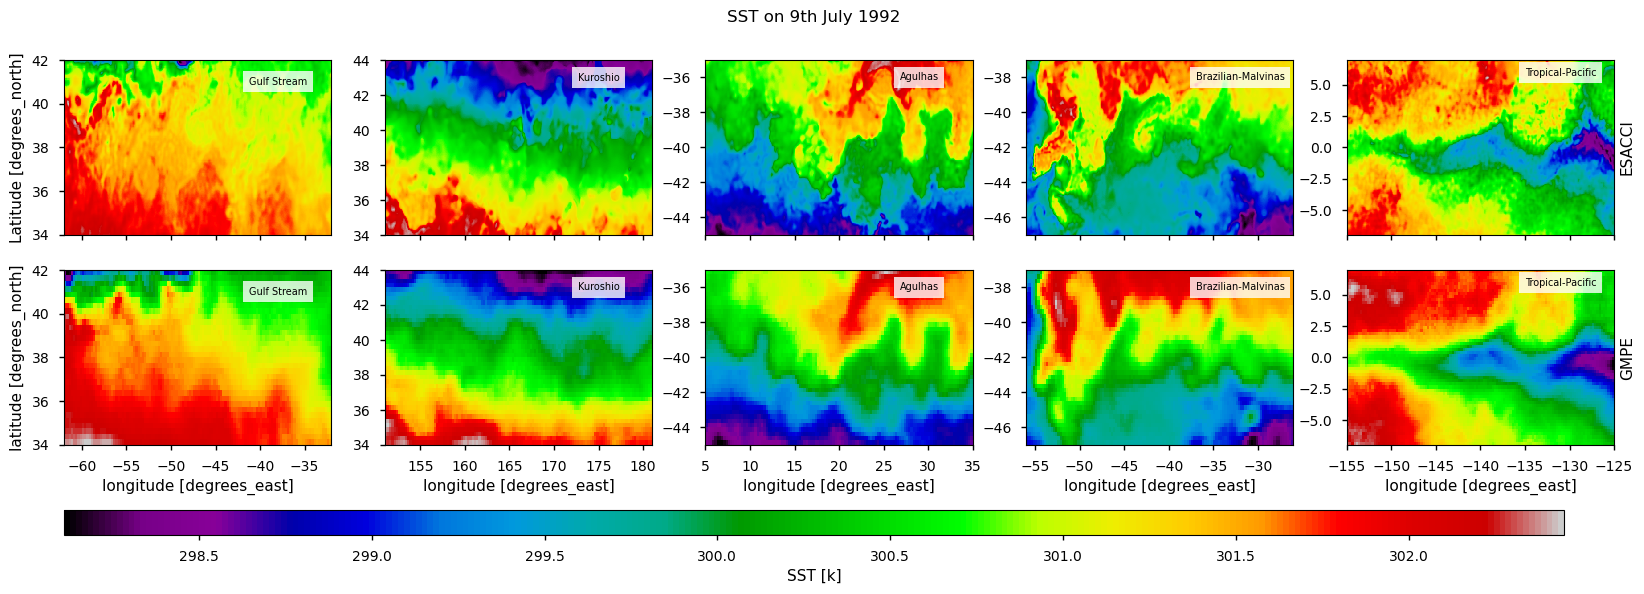

In [7]:
import matplotlib.gridspec as gridspec
fig = plt.figure(1, figsize=(20,5))
fig.suptitle('SST on 9th July 1992')
gs = gridspec.GridSpec(len(snapshots), len(snapshots['ESACCI']))  # First subplot 3x taller than second
for i, (product, request_kwargs) in enumerate(request_dicts.items()):
    for j, (region, region_kwargs) in enumerate(regions.items()):
        ax = fig.add_subplot(gs[i,j])
        p = snapshots[product][region]['analysed_sst'].plot(ax=ax, cmap='nipy_spectral', add_colorbar=False)
        ax.set_title('')
        ax.text(region_kwargs['lon_slice'].stop-6,region_kwargs['lat_slice'].stop-1, region, fontsize=7, ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
        if i==0:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        if j>0:
            ax.set_ylabel('')
        if j==len(snapshots['ESACCI'])-1:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f'{product}', position='right')
cf = p  # the filled contour set
# Add a new colorbar axis manually (adjust [left, bottom, width, height] as needed)
cbar_ax = fig.add_axes([0.125, -0.07, 0.75, 0.05])  # right-side vertical bar
cbar = fig.colorbar(cf, cax=cbar_ax, orientation='horizontal', label=r'SST [k]')

Both L4 SSTs exhibit similar patterns of upper ocean mesoscale dynamics, as confirmed by the presence of eddies and filaments that create several sharp SST transitions. ESA CCI SST clearly provides a sharper description of frontal features, primarily due to its higher nominal spatial resolution ($\sim 5\, km$) compared to that of GMPE ($\sim 25 \, km$). However, local maxima in ESA CCI SST are less intense than the ones in GMPE SST, as in the south-western section of Gulf Stream and Kuroshio, and north-western part of Brazilian-Malvinas and Tropical Pacific regions. 

The inter-comparison of feature resolution is further quantified via spectral analyses based on FFT, whose results are showcased below.

/data/wp5/.tmp/ipykernel_2129238/1834464309.py:11: RuntimeWarning: divide by zero encountered in power
  yref = xref**(-11/3)
/data/wp5/.tmp/ipykernel_2129238/1834464309.py:11: RuntimeWarning: divide by zero encountered in power
  yref = xref**(-11/3)
/data/wp5/.tmp/ipykernel_2129238/1834464309.py:11: RuntimeWarning: divide by zero encountered in power
  yref = xref**(-11/3)
/data/wp5/.tmp/ipykernel_2129238/1834464309.py:11: RuntimeWarning: divide by zero encountered in power
  yref = xref**(-11/3)
/data/wp5/.tmp/ipykernel_2129238/1834464309.py:11: RuntimeWarning: divide by zero encountered in power
  yref = xref**(-11/3)


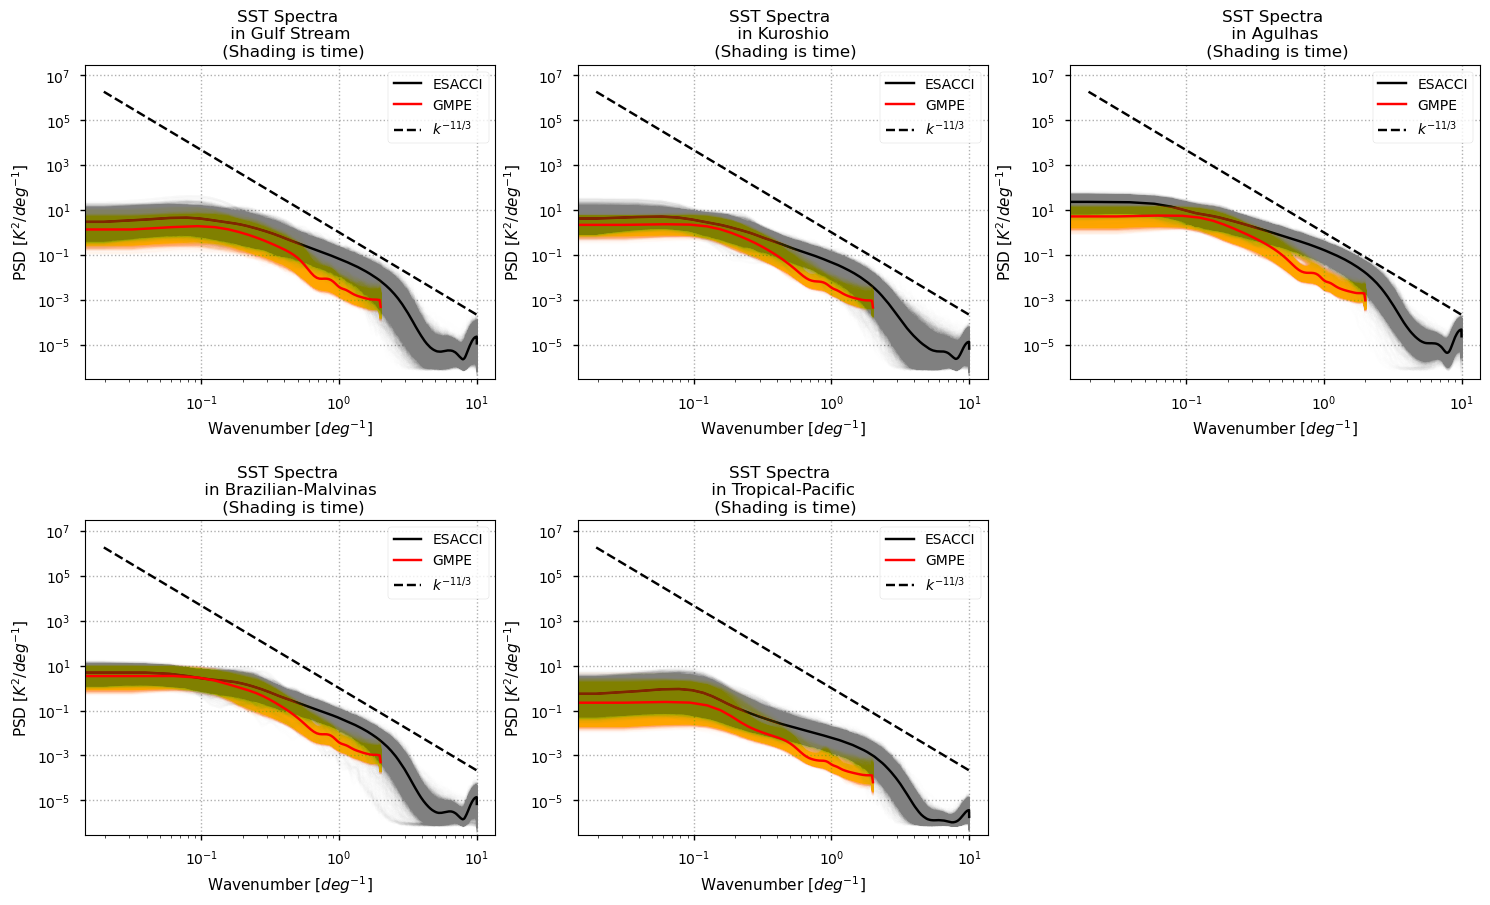

In [26]:
fig = plt.figure(1, figsize=(18,10))
for i, r in enumerate(regions.keys()):
    ax = fig.add_subplot(int(len(regions)/2),int(len(regions)/2)+1,i+1)
    da_cci = lat_means['ESACCI'][r]['spectrum']
    da_gmpe = lat_means['GMPE'][r]['spectrum']
    p = da_cci.plot(ax=ax, hue='time', xscale='log', yscale='log', color='grey', alpha=0.002, add_legend=False)
    p2 = da_cci.mean('time').plot(ax=ax, hue='time', xscale='log', yscale='log', color='black', alpha=1, label='ESACCI')
    p = da_gmpe.plot(ax=ax, hue='time', xscale='log', yscale='log', color='orange', alpha=0.008, add_legend=False)
    p3 = da_gmpe.mean('time').plot(ax=ax, hue='time', xscale='log', yscale='log', color='red', alpha=1, label='GMPE')
    xref = np.array(da_cci['wavenumber'])
    yref = xref**(-11/3)
    ax.plot(xref, yref, 'k--', label=r'$k^{-11/3}$')
    ax.legend(loc='best')
    ax.set_ylabel(r'PSD [$K^2/deg^{-1}$]')
    ax.set_ylim(3*10**-7,3*10**7)
    ax.set_xlabel(r'Wavenumber [$deg^{-1}$]')
    ax.set_title(f'SST Spectra \n in {r} \n (Shading is time)')
    ax.grid(ls=':')

fig.subplots_adjust(hspace=0.45)

Overall, the PSDs of the SST datasets exhibit three regimes: i) flat at large scale; ii) decreasing with different slopes at wavenumbers larger than $0.1 \, deg^{-1}$; iii) with a tendency to flatten at the smallest scales allowed by the dataset's resolution. 

For our analyses, we focus on the PSD behaviour over the wavenumber range 0.3 to 10 $deg^{-1}$, which corresponds to spatial scales from approximately 300 $km$ down to 10 $km$ across all selected AOIs. Note that the average length scale of 1 $deg^{-1}$ is about 85 $km$ in all AOIs, except in the tropical Pacific, where it is closer to 110 $km$. This wavenumber range thus captures dynamics from the large mesoscale to the small mesoscale and submesoscale, based on the Rossby deformation radii characteristic of our study regions [[16]](https://doi.org/10.1175/1520-0485%281998%29028%3C0433:GVOTFB%3E2.0.CO;2).

For GMPE, being provided on a coarser resolution grid, the analysis will be restricted to the 0.3 to 2 $deg^{-1}$ range.
In all the selected AOIs, the GMPE SST exhibits a PSD cascade in agreement with predictions of geostrophic turbulence (same slope as the $k^{-11/3}$ line) across all wavenumbers within the previously specified range. 
Conversely, the ESA CCI SST, shows two different regimes: i) In the 0.3 to 2 $deg^{-1}$ range the spectra show fair agreement with the $k^{-11/3}$ slope, but exhibit higher PSDs values, suggesting a higher spatial variance in the ~800 to 40 $km$ scale range (1000 to 50 $km$ scale range in the Tropical Pacific AOI). This quantitative result is in full agreement with the visual inspection performed on July 9th, 1992, confirming an enhanced feature resolution of the oceanic mesoscale for the ESA CCI SST; ii) at wavenumbers higher than 2 $deg^{-1}$ (scales smaller than $\sim$40 $km$), the ESA CCI SST is still able to provide information on the ocean features, but PSDs starts to deviate significantly from the $k^{-11/3}$ slope, suggesting that the turbulent cascade is not fully represented at those scales. Eventually, the PSDs become flat and exhibit an unphysical oscillatory behaviour, suggesting that information on feature resolution is lost, and the L4 field is assumed as noise.

## ℹ️ If you want to know more

### Key resources

SST CCI Climate Assessment Report (CAR): https://climate.esa.int/media/documents/SST_CCI_D5.1_CAR_v1.1-signed.pdf

GHRSST Website: https://www.ghrsst.org/

Additional sources for SST ensemble intercomparison statistics: https://ghrsst-pp.metoffice.gov.uk/ostia-website/gmpe-monitoring.html

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)
* python packages: matplotlib, xarray, cartopy, numpy, tqdm
  
### References

[[1]](https://doi.org/10.1175/1520-0426%282002%29019%3C1665:EMSCFS%3E2.0.CO;2) Bowen, M. M., Emery, W. J., Wilkin, J. L., Tildesley, P. C., Barton, I. J., & Knewtson, R. (2002). Extracting multiyear surface currents from sequential thermal imagery using the maximum cross-correlation technique. Journal of Atmospheric and Oceanic Technology, 19(10), 1665-1676. https://doi.org/10.1175/1520-0426%282002%29019%3C1665:EMSCFS%3E2.0.CO;2

[[2]](https://doi.org/10.1016/j.rse.2018.06.003) Rio, M. H., & Santoleri, R. (2018). Improved global surface currents from the merging of altimetry and sea surface temperature data. Remote sensing of Environment, 216, 770-785. https://doi.org/10.1016/j.rse.2018.06.003

[[3]](https://doi.org/10.1016/j.rse.2012.10.012) Buongiorno Nardelli, B., Tronconi, C., Pisano, A., & Santoleri, R. (2013). High and Ultra-High resolution processing of satellite Sea Surface Temperature data over Southern European Seas in the framework
of MyOcean project. Remote Sensing of Environment, 129, 1-16, https://doi.org/10.1016/j.rse.2012.10.012
 
[[4]](https://doi.org/10.1029/2023MS004047) Archambault, T., Filoche, A., Charantonis, A., Béréziat, D., & Thiria, S. (2024). Learning sea surface height interpolation from multi‐variate simulated satellite observations. Journal of Advances in Modeling Earth Systems, 16(6), e2023MS004047, https://doi.org/10.1029/2023MS004047

[[5]](https://doi.org/10.1029/2024GL110059) Martin, S. A., Manucharyan, G. E., & Klein, P. (2024). Deep learning improves global satellite observations of ocean eddy dynamics. Geophysical Research Letters, 51(17), e2024GL110059, https://doi.org/10.1029/2024GL110059
 
[[6]](https://doi.org/10.5194/os-21-199-2025) Estimating ocean currents from the joint reconstruction of absolute dynamic topography and sea surface temperature through deep learning algorithms, Ocean Sci., 21, 199–216, https://doi.org/10.5194/os-21-199-2025
 
[[7]](https://doi.org/10.5194/gmd-13-1609-2020) A convolutional neural network with error estimates to reconstruct sea surface temperature satellite observations. Geoscientific Model Development 13(3), 1609-1622, https://doi.org/10.5194/gmd-13-1609-2020
 
[[8]](https://doi.org/10.5194/os-20-1035-2024) Fanelli, C., Ciani, D., Pisano, A., & Buongiorno Nardelli, B. (2024). Deep learning for the super resolution of Mediterranean sea surface temperature fields. Ocean Science, 20(4), 1035-1050, https://doi.org/10.5194/os-20-1035-2024
 
[[9]](https://doi.org/10.3390/rs16101745) Li, Z., Wei, D., Zhang, X., Gao, Y., & Zhang, D. (2024). A Daily High-Resolution Sea Surface Temperature Reconstruction Using an I-DINCAE and DNN Model Based on FY-3C Thermal Infrared Data. Remote Sensing, 16(10), 1745, https://doi.org/10.3390/rs16101745

[[10]](https://doi.org/10.3390/rs12101601) Ciani, D., Rio, M. H., Nardelli, B. B., Etienne, H., & Santoleri, R. (2020). Improving the altimeter-derived surface currents using sea surface temperature (SST) data: A sensitivity study to SST products. Remote Sensing, 12(10), 1601, https://doi.org/10.3390/rs12101601
 
[[11]](https://doi.org/10.1029/2023EA003088), González‐Haro, C., Isern‐Fontanet, J., Turiel, A., Merchant, C. J., & Cornillon, P. (2024). Structural and dynamical quality assessment of gap‐filled sea surface temperature products. Earth and Space Science, 11(10), e2023EA003088. https://doi.org/10.1029/2023EA003088

[[12]](https://doi.org/10.1016/j.rse.2018.12.015) Fiedler, E. K., McLaren, A., Banzon, V., Brasnett, B., Ishizaki, S., Kennedy, J., … Donlon, C. (2019). Intercomparison of long-term sea surface temperature analyses using the GHRSST Multi-Product Ensemble (GMPE) system. *Remote Sensing of Environment*, 222, 18–33. https://doi.org/10.1016/j.rse.2018.12.015

[[13]](https://doi.org/10.1038/s41597-019-0236-x) Merchant, C. J., Embury, O., Bulgin, C. E., Block, T., Corlett, G. K., Fiedler, E., … Donlon, C. (2019). Satellite-based time-series of sea-surface temperature since 1981 for climate applications. *Scientific Data*, 6(1), 223. https://doi.org/10.1038/s41597-019-0236-x

[[14]](https://barnes.atmos.colostate.edu/COURSES/AT655_S15/references/Welch_1967_IEETransAudioElect.pdf) P. Welch, “The use of the fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms”, IEEE Trans. Audio Electroacoust. vol. 15, pp. 70-73, 1967.

[[15]](https://doi.org/10.1002/qj.3644) Fiedler, E. K., Mao, C., Good, S. A., Waters, J., & Martin, M. J. (2019). Improvements to feature resolution in the OSTIA sea surface temperature analysis using the NEMOVAR assimilation scheme. Quarterly Journal of the Royal Meteorological Society, 145(725), 3609-3625, https://doi.org/10.1002/qj.3644

[[16]](https://doi.org/10.1175/1520-0485%281998%29028%3C0433:GVOTFB%3E2.0.CO;2) Chelton, D. B., DeSzoeke, R. A., Schlax, M. G., El Naggar, K., & Siwertz, N. (1998). Geographical variability of the first baroclinic Rossby radius of deformation. Journal of Physical Oceanography, 28(3), 433-460. https://doi.org/10.1175/1520-0485%281998%29028%3C0433:GVOTFB%3E2.0.CO;2